In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

data = pd.read_csv(r'/Users/henry/Desktop/train.csv')
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

data['log_loss'] = np.log(data['loss'])

seed = 7
test_size = 0.2
stepsize = 10000

In [4]:
#GetDummies - Cont

T_DCO = []
MAE_DCO = []
N_DCO = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_DCO.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_DCO.append(mae)

    Time = time.time() - start_time
    T_DCO.append(Time)

1
Learning rate set to 0.068261
0:	learn: 0.8060913	test: 0.8244299	best: 0.8244299 (0)	total: 7.6ms	remaining: 7.6s
1:	learn: 0.8043630	test: 0.8233540	best: 0.8233540 (1)	total: 16.1ms	remaining: 8.02s
2:	learn: 0.8022987	test: 0.8219454	best: 0.8219454 (2)	total: 21.3ms	remaining: 7.08s
3:	learn: 0.8008571	test: 0.8210922	best: 0.8210922 (3)	total: 25.9ms	remaining: 6.45s
4:	learn: 0.7996277	test: 0.8203818	best: 0.8203818 (4)	total: 57.9ms	remaining: 11.5s
5:	learn: 0.7982263	test: 0.8197536	best: 0.8197536 (5)	total: 63ms	remaining: 10.4s
6:	learn: 0.7968356	test: 0.8189365	best: 0.8189365 (6)	total: 67.5ms	remaining: 9.58s
7:	learn: 0.7957140	test: 0.8181727	best: 0.8181727 (7)	total: 72.3ms	remaining: 8.97s
8:	learn: 0.7945320	test: 0.8174811	best: 0.8174811 (8)	total: 77.8ms	remaining: 8.57s
9:	learn: 0.7936060	test: 0.8171192	best: 0.8171192 (9)	total: 82.2ms	remaining: 8.14s
10:	learn: 0.7928610	test: 0.8166504	best: 0.8166504 (10)	total: 85.9ms	remaining: 7.72s
11:	learn: 0.

110:	learn: 0.7616600	test: 0.8107170	best: 0.8105462 (63)	total: 1.07s	remaining: 8.61s
111:	learn: 0.7614348	test: 0.8108910	best: 0.8105462 (63)	total: 1.08s	remaining: 8.57s
112:	learn: 0.7611588	test: 0.8109482	best: 0.8105462 (63)	total: 1.09s	remaining: 8.55s
113:	learn: 0.7608696	test: 0.8110879	best: 0.8105462 (63)	total: 1.11s	remaining: 8.61s
114:	learn: 0.7607161	test: 0.8110400	best: 0.8105462 (63)	total: 1.11s	remaining: 8.57s
115:	learn: 0.7605166	test: 0.8110032	best: 0.8105462 (63)	total: 1.14s	remaining: 8.66s
116:	learn: 0.7603257	test: 0.8110997	best: 0.8105462 (63)	total: 1.14s	remaining: 8.62s
117:	learn: 0.7601297	test: 0.8110777	best: 0.8105462 (63)	total: 1.15s	remaining: 8.62s
118:	learn: 0.7598187	test: 0.8110757	best: 0.8105462 (63)	total: 1.16s	remaining: 8.6s
119:	learn: 0.7595345	test: 0.8109177	best: 0.8105462 (63)	total: 1.17s	remaining: 8.57s
120:	learn: 0.7593184	test: 0.8110133	best: 0.8105462 (63)	total: 1.17s	remaining: 8.53s
121:	learn: 0.7590087	

221:	learn: 0.7366244	test: 0.8121624	best: 0.8105462 (63)	total: 1.64s	remaining: 5.73s
222:	learn: 0.7363707	test: 0.8122522	best: 0.8105462 (63)	total: 1.65s	remaining: 5.73s
223:	learn: 0.7361602	test: 0.8122100	best: 0.8105462 (63)	total: 1.65s	remaining: 5.73s
224:	learn: 0.7359725	test: 0.8122012	best: 0.8105462 (63)	total: 1.66s	remaining: 5.72s
225:	learn: 0.7357093	test: 0.8121913	best: 0.8105462 (63)	total: 1.66s	remaining: 5.7s
226:	learn: 0.7354792	test: 0.8120163	best: 0.8105462 (63)	total: 1.67s	remaining: 5.69s
227:	learn: 0.7353100	test: 0.8121251	best: 0.8105462 (63)	total: 1.67s	remaining: 5.67s
228:	learn: 0.7351329	test: 0.8122460	best: 0.8105462 (63)	total: 1.68s	remaining: 5.65s
229:	learn: 0.7348260	test: 0.8123495	best: 0.8105462 (63)	total: 1.68s	remaining: 5.63s
230:	learn: 0.7345261	test: 0.8124582	best: 0.8105462 (63)	total: 1.69s	remaining: 5.61s
231:	learn: 0.7343451	test: 0.8124993	best: 0.8105462 (63)	total: 1.69s	remaining: 5.59s
232:	learn: 0.7341978	

340:	learn: 0.7142481	test: 0.8155485	best: 0.8105462 (63)	total: 2.21s	remaining: 4.28s
341:	learn: 0.7139832	test: 0.8154491	best: 0.8105462 (63)	total: 2.22s	remaining: 4.27s
342:	learn: 0.7139327	test: 0.8154084	best: 0.8105462 (63)	total: 2.23s	remaining: 4.27s
343:	learn: 0.7137279	test: 0.8155336	best: 0.8105462 (63)	total: 2.23s	remaining: 4.26s
344:	learn: 0.7135461	test: 0.8154944	best: 0.8105462 (63)	total: 2.24s	remaining: 4.25s
345:	learn: 0.7133675	test: 0.8155187	best: 0.8105462 (63)	total: 2.24s	remaining: 4.24s
346:	learn: 0.7131310	test: 0.8155744	best: 0.8105462 (63)	total: 2.24s	remaining: 4.22s
347:	learn: 0.7129262	test: 0.8155562	best: 0.8105462 (63)	total: 2.25s	remaining: 4.21s
348:	learn: 0.7127819	test: 0.8156198	best: 0.8105462 (63)	total: 2.25s	remaining: 4.2s
349:	learn: 0.7126182	test: 0.8155944	best: 0.8105462 (63)	total: 2.26s	remaining: 4.19s
350:	learn: 0.7124410	test: 0.8156326	best: 0.8105462 (63)	total: 2.26s	remaining: 4.18s
351:	learn: 0.7123687	

439:	learn: 0.6983911	test: 0.8177933	best: 0.8105462 (63)	total: 2.58s	remaining: 3.29s
440:	learn: 0.6982212	test: 0.8177804	best: 0.8105462 (63)	total: 2.59s	remaining: 3.29s
441:	learn: 0.6980957	test: 0.8178185	best: 0.8105462 (63)	total: 2.63s	remaining: 3.32s
442:	learn: 0.6979108	test: 0.8178278	best: 0.8105462 (63)	total: 2.65s	remaining: 3.33s
443:	learn: 0.6977493	test: 0.8178937	best: 0.8105462 (63)	total: 2.66s	remaining: 3.33s
444:	learn: 0.6975636	test: 0.8178843	best: 0.8105462 (63)	total: 2.66s	remaining: 3.32s
445:	learn: 0.6974625	test: 0.8179167	best: 0.8105462 (63)	total: 2.68s	remaining: 3.33s
446:	learn: 0.6973627	test: 0.8179151	best: 0.8105462 (63)	total: 2.7s	remaining: 3.34s
447:	learn: 0.6969820	test: 0.8179556	best: 0.8105462 (63)	total: 2.71s	remaining: 3.33s
448:	learn: 0.6967579	test: 0.8179609	best: 0.8105462 (63)	total: 2.71s	remaining: 3.33s
449:	learn: 0.6965588	test: 0.8179851	best: 0.8105462 (63)	total: 2.71s	remaining: 3.32s
450:	learn: 0.6964029	

566:	learn: 0.6787401	test: 0.8207469	best: 0.8105462 (63)	total: 3.15s	remaining: 2.4s
567:	learn: 0.6785428	test: 0.8206892	best: 0.8105462 (63)	total: 3.16s	remaining: 2.4s
568:	learn: 0.6784436	test: 0.8207116	best: 0.8105462 (63)	total: 3.17s	remaining: 2.4s
569:	learn: 0.6783348	test: 0.8207095	best: 0.8105462 (63)	total: 3.17s	remaining: 2.39s
570:	learn: 0.6782357	test: 0.8207480	best: 0.8105462 (63)	total: 3.17s	remaining: 2.38s
571:	learn: 0.6781505	test: 0.8206437	best: 0.8105462 (63)	total: 3.18s	remaining: 2.38s
572:	learn: 0.6780241	test: 0.8206491	best: 0.8105462 (63)	total: 3.18s	remaining: 2.37s
573:	learn: 0.6778886	test: 0.8207408	best: 0.8105462 (63)	total: 3.19s	remaining: 2.36s
574:	learn: 0.6777526	test: 0.8207855	best: 0.8105462 (63)	total: 3.19s	remaining: 2.36s
575:	learn: 0.6776624	test: 0.8208808	best: 0.8105462 (63)	total: 3.19s	remaining: 2.35s
576:	learn: 0.6775774	test: 0.8209382	best: 0.8105462 (63)	total: 3.2s	remaining: 2.34s
577:	learn: 0.6774119	tes

704:	learn: 0.6612620	test: 0.8245287	best: 0.8105462 (63)	total: 3.93s	remaining: 1.64s
705:	learn: 0.6610776	test: 0.8246240	best: 0.8105462 (63)	total: 3.94s	remaining: 1.64s
706:	learn: 0.6609302	test: 0.8246268	best: 0.8105462 (63)	total: 3.94s	remaining: 1.64s
707:	learn: 0.6607685	test: 0.8246539	best: 0.8105462 (63)	total: 3.95s	remaining: 1.63s
708:	learn: 0.6605593	test: 0.8246747	best: 0.8105462 (63)	total: 3.95s	remaining: 1.62s
709:	learn: 0.6604498	test: 0.8246399	best: 0.8105462 (63)	total: 3.96s	remaining: 1.62s
710:	learn: 0.6603599	test: 0.8246758	best: 0.8105462 (63)	total: 3.96s	remaining: 1.61s
711:	learn: 0.6602393	test: 0.8246869	best: 0.8105462 (63)	total: 3.97s	remaining: 1.6s
712:	learn: 0.6601445	test: 0.8246789	best: 0.8105462 (63)	total: 3.98s	remaining: 1.6s
713:	learn: 0.6600792	test: 0.8247111	best: 0.8105462 (63)	total: 3.98s	remaining: 1.59s
714:	learn: 0.6599228	test: 0.8246898	best: 0.8105462 (63)	total: 3.99s	remaining: 1.59s
715:	learn: 0.6598094	t

800:	learn: 0.6489990	test: 0.8270391	best: 0.8105462 (63)	total: 4.55s	remaining: 1.13s
801:	learn: 0.6488164	test: 0.8270897	best: 0.8105462 (63)	total: 4.56s	remaining: 1.13s
802:	learn: 0.6487635	test: 0.8270830	best: 0.8105462 (63)	total: 4.57s	remaining: 1.12s
803:	learn: 0.6486093	test: 0.8270783	best: 0.8105462 (63)	total: 4.58s	remaining: 1.11s
804:	learn: 0.6484666	test: 0.8271488	best: 0.8105462 (63)	total: 4.58s	remaining: 1.11s
805:	learn: 0.6484020	test: 0.8271399	best: 0.8105462 (63)	total: 4.58s	remaining: 1.1s
806:	learn: 0.6482697	test: 0.8270423	best: 0.8105462 (63)	total: 4.59s	remaining: 1.1s
807:	learn: 0.6480900	test: 0.8270085	best: 0.8105462 (63)	total: 4.6s	remaining: 1.09s
808:	learn: 0.6480085	test: 0.8270636	best: 0.8105462 (63)	total: 4.6s	remaining: 1.09s
809:	learn: 0.6478392	test: 0.8270713	best: 0.8105462 (63)	total: 4.61s	remaining: 1.08s
810:	learn: 0.6478038	test: 0.8271034	best: 0.8105462 (63)	total: 4.61s	remaining: 1.07s
811:	learn: 0.6476963	tes

916:	learn: 0.6354109	test: 0.8301252	best: 0.8105462 (63)	total: 5.58s	remaining: 505ms
917:	learn: 0.6353390	test: 0.8301431	best: 0.8105462 (63)	total: 5.71s	remaining: 510ms
918:	learn: 0.6352620	test: 0.8301324	best: 0.8105462 (63)	total: 5.88s	remaining: 518ms
919:	learn: 0.6351299	test: 0.8302190	best: 0.8105462 (63)	total: 5.9s	remaining: 513ms
920:	learn: 0.6351078	test: 0.8302321	best: 0.8105462 (63)	total: 5.91s	remaining: 507ms
921:	learn: 0.6350070	test: 0.8302862	best: 0.8105462 (63)	total: 5.91s	remaining: 500ms
922:	learn: 0.6349038	test: 0.8302744	best: 0.8105462 (63)	total: 5.92s	remaining: 494ms
923:	learn: 0.6347781	test: 0.8303593	best: 0.8105462 (63)	total: 5.92s	remaining: 487ms
924:	learn: 0.6346967	test: 0.8302886	best: 0.8105462 (63)	total: 5.93s	remaining: 481ms
925:	learn: 0.6346174	test: 0.8302486	best: 0.8105462 (63)	total: 5.94s	remaining: 474ms
926:	learn: 0.6344205	test: 0.8302590	best: 0.8105462 (63)	total: 5.94s	remaining: 468ms
927:	learn: 0.6343234	

18:	learn: 0.7987259	test: 0.7867852	best: 0.7867693 (17)	total: 169ms	remaining: 8.72s
19:	learn: 0.7983588	test: 0.7867116	best: 0.7867116 (19)	total: 181ms	remaining: 8.89s
20:	learn: 0.7975917	test: 0.7863312	best: 0.7863312 (20)	total: 192ms	remaining: 8.93s
21:	learn: 0.7972445	test: 0.7862912	best: 0.7862912 (21)	total: 197ms	remaining: 8.77s
22:	learn: 0.7967477	test: 0.7859947	best: 0.7859947 (22)	total: 202ms	remaining: 8.59s
23:	learn: 0.7964167	test: 0.7857912	best: 0.7857912 (23)	total: 209ms	remaining: 8.49s
24:	learn: 0.7960311	test: 0.7856118	best: 0.7856118 (24)	total: 215ms	remaining: 8.37s
25:	learn: 0.7956675	test: 0.7854895	best: 0.7854895 (25)	total: 219ms	remaining: 8.22s
26:	learn: 0.7953508	test: 0.7852558	best: 0.7852558 (26)	total: 224ms	remaining: 8.06s
27:	learn: 0.7951360	test: 0.7853166	best: 0.7852558 (26)	total: 229ms	remaining: 7.95s
28:	learn: 0.7946953	test: 0.7851934	best: 0.7851934 (28)	total: 234ms	remaining: 7.83s
29:	learn: 0.7944160	test: 0.785

145:	learn: 0.7752935	test: 0.7829372	best: 0.7827214 (110)	total: 996ms	remaining: 5.83s
146:	learn: 0.7750647	test: 0.7830325	best: 0.7827214 (110)	total: 1.01s	remaining: 5.85s
147:	learn: 0.7749185	test: 0.7830304	best: 0.7827214 (110)	total: 1.02s	remaining: 5.86s
148:	learn: 0.7747442	test: 0.7830548	best: 0.7827214 (110)	total: 1.02s	remaining: 5.84s
149:	learn: 0.7745914	test: 0.7830681	best: 0.7827214 (110)	total: 1.03s	remaining: 5.84s
150:	learn: 0.7744698	test: 0.7830812	best: 0.7827214 (110)	total: 1.04s	remaining: 5.84s
151:	learn: 0.7741790	test: 0.7830345	best: 0.7827214 (110)	total: 1.05s	remaining: 5.88s
152:	learn: 0.7741309	test: 0.7830699	best: 0.7827214 (110)	total: 1.07s	remaining: 5.95s
153:	learn: 0.7740875	test: 0.7830769	best: 0.7827214 (110)	total: 1.08s	remaining: 5.95s
154:	learn: 0.7739719	test: 0.7830716	best: 0.7827214 (110)	total: 1.09s	remaining: 5.93s
155:	learn: 0.7738954	test: 0.7831244	best: 0.7827214 (110)	total: 1.1s	remaining: 5.98s
156:	learn:

241:	learn: 0.7616235	test: 0.7845710	best: 0.7827214 (110)	total: 2.27s	remaining: 7.12s
242:	learn: 0.7615261	test: 0.7845145	best: 0.7827214 (110)	total: 2.28s	remaining: 7.11s
243:	learn: 0.7613956	test: 0.7845330	best: 0.7827214 (110)	total: 2.29s	remaining: 7.08s
244:	learn: 0.7611637	test: 0.7845042	best: 0.7827214 (110)	total: 2.31s	remaining: 7.11s
245:	learn: 0.7610600	test: 0.7845796	best: 0.7827214 (110)	total: 2.31s	remaining: 7.09s
246:	learn: 0.7608803	test: 0.7846244	best: 0.7827214 (110)	total: 2.33s	remaining: 7.11s
247:	learn: 0.7607386	test: 0.7845135	best: 0.7827214 (110)	total: 2.34s	remaining: 7.1s
248:	learn: 0.7606979	test: 0.7844987	best: 0.7827214 (110)	total: 2.35s	remaining: 7.08s
249:	learn: 0.7606512	test: 0.7845201	best: 0.7827214 (110)	total: 2.36s	remaining: 7.09s
250:	learn: 0.7605853	test: 0.7845533	best: 0.7827214 (110)	total: 2.38s	remaining: 7.11s
251:	learn: 0.7604699	test: 0.7845456	best: 0.7827214 (110)	total: 2.52s	remaining: 7.5s
252:	learn: 

344:	learn: 0.7487537	test: 0.7857288	best: 0.7827214 (110)	total: 3.31s	remaining: 6.29s
345:	learn: 0.7487293	test: 0.7857616	best: 0.7827214 (110)	total: 3.4s	remaining: 6.43s
346:	learn: 0.7486024	test: 0.7857627	best: 0.7827214 (110)	total: 3.49s	remaining: 6.57s
347:	learn: 0.7484872	test: 0.7857940	best: 0.7827214 (110)	total: 3.53s	remaining: 6.62s
348:	learn: 0.7483043	test: 0.7858226	best: 0.7827214 (110)	total: 3.56s	remaining: 6.64s
349:	learn: 0.7481386	test: 0.7858834	best: 0.7827214 (110)	total: 3.56s	remaining: 6.62s
350:	learn: 0.7480410	test: 0.7859548	best: 0.7827214 (110)	total: 3.57s	remaining: 6.6s
351:	learn: 0.7478983	test: 0.7860033	best: 0.7827214 (110)	total: 3.59s	remaining: 6.6s
352:	learn: 0.7477371	test: 0.7859810	best: 0.7827214 (110)	total: 3.61s	remaining: 6.62s
353:	learn: 0.7476033	test: 0.7861208	best: 0.7827214 (110)	total: 3.62s	remaining: 6.6s
354:	learn: 0.7474826	test: 0.7861193	best: 0.7827214 (110)	total: 3.63s	remaining: 6.6s
355:	learn: 0.7

451:	learn: 0.7366912	test: 0.7877363	best: 0.7827214 (110)	total: 4.75s	remaining: 5.75s
452:	learn: 0.7366207	test: 0.7877345	best: 0.7827214 (110)	total: 4.77s	remaining: 5.76s
453:	learn: 0.7365624	test: 0.7877709	best: 0.7827214 (110)	total: 4.79s	remaining: 5.76s
454:	learn: 0.7364346	test: 0.7877925	best: 0.7827214 (110)	total: 4.81s	remaining: 5.76s
455:	learn: 0.7363616	test: 0.7877523	best: 0.7827214 (110)	total: 4.82s	remaining: 5.74s
456:	learn: 0.7362567	test: 0.7877709	best: 0.7827214 (110)	total: 4.83s	remaining: 5.74s
457:	learn: 0.7361578	test: 0.7877973	best: 0.7827214 (110)	total: 4.86s	remaining: 5.75s
458:	learn: 0.7360912	test: 0.7878085	best: 0.7827214 (110)	total: 4.87s	remaining: 5.74s
459:	learn: 0.7360192	test: 0.7878289	best: 0.7827214 (110)	total: 4.88s	remaining: 5.73s
460:	learn: 0.7359197	test: 0.7878458	best: 0.7827214 (110)	total: 4.9s	remaining: 5.73s
461:	learn: 0.7358711	test: 0.7878519	best: 0.7827214 (110)	total: 4.91s	remaining: 5.72s
462:	learn:

567:	learn: 0.7250024	test: 0.7901724	best: 0.7827214 (110)	total: 5.96s	remaining: 4.53s
568:	learn: 0.7248996	test: 0.7902796	best: 0.7827214 (110)	total: 6.08s	remaining: 4.6s
569:	learn: 0.7248936	test: 0.7902838	best: 0.7827214 (110)	total: 6.11s	remaining: 4.61s
570:	learn: 0.7248047	test: 0.7902661	best: 0.7827214 (110)	total: 6.12s	remaining: 4.6s
571:	learn: 0.7247320	test: 0.7902741	best: 0.7827214 (110)	total: 6.13s	remaining: 4.59s
572:	learn: 0.7246054	test: 0.7903100	best: 0.7827214 (110)	total: 6.14s	remaining: 4.58s
573:	learn: 0.7245418	test: 0.7903368	best: 0.7827214 (110)	total: 6.16s	remaining: 4.57s
574:	learn: 0.7243703	test: 0.7903678	best: 0.7827214 (110)	total: 6.17s	remaining: 4.56s
575:	learn: 0.7242918	test: 0.7903819	best: 0.7827214 (110)	total: 6.19s	remaining: 4.56s
576:	learn: 0.7242198	test: 0.7904071	best: 0.7827214 (110)	total: 6.21s	remaining: 4.55s
577:	learn: 0.7241067	test: 0.7904523	best: 0.7827214 (110)	total: 6.22s	remaining: 4.54s
578:	learn: 

667:	learn: 0.7158218	test: 0.7916655	best: 0.7827214 (110)	total: 7.56s	remaining: 3.76s
668:	learn: 0.7157237	test: 0.7916387	best: 0.7827214 (110)	total: 7.57s	remaining: 3.75s
669:	learn: 0.7155989	test: 0.7916188	best: 0.7827214 (110)	total: 7.59s	remaining: 3.74s
670:	learn: 0.7155491	test: 0.7916287	best: 0.7827214 (110)	total: 7.61s	remaining: 3.73s
671:	learn: 0.7154726	test: 0.7915303	best: 0.7827214 (110)	total: 7.64s	remaining: 3.73s
672:	learn: 0.7153939	test: 0.7915526	best: 0.7827214 (110)	total: 7.65s	remaining: 3.72s
673:	learn: 0.7152411	test: 0.7915033	best: 0.7827214 (110)	total: 7.7s	remaining: 3.72s
674:	learn: 0.7150749	test: 0.7914823	best: 0.7827214 (110)	total: 7.7s	remaining: 3.71s
675:	learn: 0.7150389	test: 0.7914923	best: 0.7827214 (110)	total: 7.74s	remaining: 3.71s
676:	learn: 0.7149333	test: 0.7915528	best: 0.7827214 (110)	total: 7.74s	remaining: 3.69s
677:	learn: 0.7148142	test: 0.7915916	best: 0.7827214 (110)	total: 7.78s	remaining: 3.7s
678:	learn: 0

783:	learn: 0.7058753	test: 0.7931693	best: 0.7827214 (110)	total: 9.38s	remaining: 2.58s
784:	learn: 0.7057836	test: 0.7931524	best: 0.7827214 (110)	total: 9.39s	remaining: 2.57s
785:	learn: 0.7056898	test: 0.7931733	best: 0.7827214 (110)	total: 9.41s	remaining: 2.56s
786:	learn: 0.7055596	test: 0.7931573	best: 0.7827214 (110)	total: 9.42s	remaining: 2.55s
787:	learn: 0.7054882	test: 0.7931273	best: 0.7827214 (110)	total: 9.43s	remaining: 2.54s
788:	learn: 0.7054204	test: 0.7931374	best: 0.7827214 (110)	total: 9.43s	remaining: 2.52s
789:	learn: 0.7053286	test: 0.7931730	best: 0.7827214 (110)	total: 9.45s	remaining: 2.51s
790:	learn: 0.7053261	test: 0.7931797	best: 0.7827214 (110)	total: 9.46s	remaining: 2.5s
791:	learn: 0.7052241	test: 0.7932394	best: 0.7827214 (110)	total: 9.47s	remaining: 2.49s
792:	learn: 0.7051684	test: 0.7932395	best: 0.7827214 (110)	total: 9.47s	remaining: 2.47s
793:	learn: 0.7050399	test: 0.7932990	best: 0.7827214 (110)	total: 9.48s	remaining: 2.46s
794:	learn:

876:	learn: 0.6980912	test: 0.7943067	best: 0.7827214 (110)	total: 10.4s	remaining: 1.46s
877:	learn: 0.6980834	test: 0.7943341	best: 0.7827214 (110)	total: 10.4s	remaining: 1.45s
878:	learn: 0.6979782	test: 0.7943145	best: 0.7827214 (110)	total: 10.5s	remaining: 1.44s
879:	learn: 0.6978779	test: 0.7943289	best: 0.7827214 (110)	total: 10.5s	remaining: 1.43s
880:	learn: 0.6978445	test: 0.7943220	best: 0.7827214 (110)	total: 10.5s	remaining: 1.42s
881:	learn: 0.6977933	test: 0.7943297	best: 0.7827214 (110)	total: 10.6s	remaining: 1.41s
882:	learn: 0.6976844	test: 0.7942929	best: 0.7827214 (110)	total: 10.6s	remaining: 1.4s
883:	learn: 0.6976590	test: 0.7943205	best: 0.7827214 (110)	total: 10.6s	remaining: 1.39s
884:	learn: 0.6976300	test: 0.7943486	best: 0.7827214 (110)	total: 10.6s	remaining: 1.38s
885:	learn: 0.6974901	test: 0.7944225	best: 0.7827214 (110)	total: 10.6s	remaining: 1.36s
886:	learn: 0.6973688	test: 0.7944090	best: 0.7827214 (110)	total: 10.6s	remaining: 1.35s
887:	learn:

972:	learn: 0.6912382	test: 0.7954480	best: 0.7827214 (110)	total: 11.4s	remaining: 317ms
973:	learn: 0.6911960	test: 0.7954622	best: 0.7827214 (110)	total: 11.4s	remaining: 305ms
974:	learn: 0.6911355	test: 0.7954418	best: 0.7827214 (110)	total: 11.4s	remaining: 294ms
975:	learn: 0.6910495	test: 0.7954431	best: 0.7827214 (110)	total: 11.5s	remaining: 282ms
976:	learn: 0.6909479	test: 0.7954154	best: 0.7827214 (110)	total: 11.5s	remaining: 271ms
977:	learn: 0.6908767	test: 0.7953906	best: 0.7827214 (110)	total: 11.5s	remaining: 260ms
978:	learn: 0.6907906	test: 0.7954063	best: 0.7827214 (110)	total: 11.5s	remaining: 248ms
979:	learn: 0.6907167	test: 0.7954113	best: 0.7827214 (110)	total: 11.6s	remaining: 236ms
980:	learn: 0.6906373	test: 0.7953525	best: 0.7827214 (110)	total: 11.6s	remaining: 225ms
981:	learn: 0.6904426	test: 0.7953655	best: 0.7827214 (110)	total: 11.6s	remaining: 213ms
982:	learn: 0.6904068	test: 0.7953820	best: 0.7827214 (110)	total: 11.6s	remaining: 201ms
983:	learn

77:	learn: 0.7822166	test: 0.8030481	best: 0.8030481 (77)	total: 580ms	remaining: 6.86s
78:	learn: 0.7821016	test: 0.8030217	best: 0.8030217 (78)	total: 593ms	remaining: 6.91s
79:	learn: 0.7819310	test: 0.8029809	best: 0.8029809 (79)	total: 600ms	remaining: 6.9s
80:	learn: 0.7818173	test: 0.8030476	best: 0.8029809 (79)	total: 609ms	remaining: 6.91s
81:	learn: 0.7816769	test: 0.8030917	best: 0.8029809 (79)	total: 614ms	remaining: 6.87s
82:	learn: 0.7815961	test: 0.8030923	best: 0.8029809 (79)	total: 622ms	remaining: 6.87s
83:	learn: 0.7814791	test: 0.8030779	best: 0.8029809 (79)	total: 628ms	remaining: 6.84s
84:	learn: 0.7814201	test: 0.8030548	best: 0.8029809 (79)	total: 633ms	remaining: 6.82s
85:	learn: 0.7813099	test: 0.8030926	best: 0.8029809 (79)	total: 639ms	remaining: 6.79s
86:	learn: 0.7811712	test: 0.8030975	best: 0.8029809 (79)	total: 645ms	remaining: 6.77s
87:	learn: 0.7810120	test: 0.8030397	best: 0.8029809 (79)	total: 651ms	remaining: 6.75s
88:	learn: 0.7808998	test: 0.8030

172:	learn: 0.7713711	test: 0.8027597	best: 0.8026215 (114)	total: 1.4s	remaining: 6.69s
173:	learn: 0.7712650	test: 0.8027256	best: 0.8026215 (114)	total: 1.41s	remaining: 6.71s
174:	learn: 0.7711742	test: 0.8027114	best: 0.8026215 (114)	total: 1.42s	remaining: 6.7s
175:	learn: 0.7710392	test: 0.8026772	best: 0.8026215 (114)	total: 1.43s	remaining: 6.69s
176:	learn: 0.7709597	test: 0.8026718	best: 0.8026215 (114)	total: 1.43s	remaining: 6.67s
177:	learn: 0.7708110	test: 0.8026482	best: 0.8026215 (114)	total: 1.44s	remaining: 6.65s
178:	learn: 0.7706728	test: 0.8026449	best: 0.8026215 (114)	total: 1.45s	remaining: 6.63s
179:	learn: 0.7704879	test: 0.8026599	best: 0.8026215 (114)	total: 1.45s	remaining: 6.62s
180:	learn: 0.7704365	test: 0.8026602	best: 0.8026215 (114)	total: 1.46s	remaining: 6.6s
181:	learn: 0.7703186	test: 0.8026815	best: 0.8026215 (114)	total: 1.46s	remaining: 6.58s
182:	learn: 0.7701797	test: 0.8027307	best: 0.8026215 (114)	total: 1.47s	remaining: 6.57s
183:	learn: 0

271:	learn: 0.7611936	test: 0.8036349	best: 0.8026181 (191)	total: 2.22s	remaining: 5.95s
272:	learn: 0.7610741	test: 0.8036912	best: 0.8026181 (191)	total: 2.24s	remaining: 5.96s
273:	learn: 0.7609461	test: 0.8036663	best: 0.8026181 (191)	total: 2.25s	remaining: 5.95s
274:	learn: 0.7608092	test: 0.8036575	best: 0.8026181 (191)	total: 2.25s	remaining: 5.94s
275:	learn: 0.7606644	test: 0.8036230	best: 0.8026181 (191)	total: 2.26s	remaining: 5.92s
276:	learn: 0.7605285	test: 0.8035830	best: 0.8026181 (191)	total: 2.26s	remaining: 5.91s
277:	learn: 0.7604675	test: 0.8035594	best: 0.8026181 (191)	total: 2.27s	remaining: 5.9s
278:	learn: 0.7603507	test: 0.8035883	best: 0.8026181 (191)	total: 2.27s	remaining: 5.88s
279:	learn: 0.7602601	test: 0.8036082	best: 0.8026181 (191)	total: 2.28s	remaining: 5.87s
280:	learn: 0.7601871	test: 0.8035813	best: 0.8026181 (191)	total: 2.29s	remaining: 5.85s
281:	learn: 0.7600911	test: 0.8035276	best: 0.8026181 (191)	total: 2.29s	remaining: 5.84s
282:	learn:

370:	learn: 0.7514286	test: 0.8043188	best: 0.8026181 (191)	total: 2.83s	remaining: 4.8s
371:	learn: 0.7513004	test: 0.8043571	best: 0.8026181 (191)	total: 2.84s	remaining: 4.79s
372:	learn: 0.7512182	test: 0.8043649	best: 0.8026181 (191)	total: 2.84s	remaining: 4.78s
373:	learn: 0.7510871	test: 0.8044213	best: 0.8026181 (191)	total: 2.85s	remaining: 4.78s
374:	learn: 0.7510196	test: 0.8044282	best: 0.8026181 (191)	total: 2.86s	remaining: 4.76s
375:	learn: 0.7509543	test: 0.8044288	best: 0.8026181 (191)	total: 2.86s	remaining: 4.75s
376:	learn: 0.7509170	test: 0.8044563	best: 0.8026181 (191)	total: 2.87s	remaining: 4.74s
377:	learn: 0.7508131	test: 0.8044914	best: 0.8026181 (191)	total: 2.87s	remaining: 4.73s
378:	learn: 0.7507737	test: 0.8045066	best: 0.8026181 (191)	total: 2.88s	remaining: 4.72s
379:	learn: 0.7506825	test: 0.8044783	best: 0.8026181 (191)	total: 2.88s	remaining: 4.71s
380:	learn: 0.7505818	test: 0.8044616	best: 0.8026181 (191)	total: 2.89s	remaining: 4.7s
381:	learn: 

482:	learn: 0.7417869	test: 0.8053517	best: 0.8026181 (191)	total: 3.61s	remaining: 3.87s
483:	learn: 0.7417250	test: 0.8053434	best: 0.8026181 (191)	total: 3.62s	remaining: 3.86s
484:	learn: 0.7416551	test: 0.8053401	best: 0.8026181 (191)	total: 3.63s	remaining: 3.86s
485:	learn: 0.7415026	test: 0.8054223	best: 0.8026181 (191)	total: 3.64s	remaining: 3.85s
486:	learn: 0.7414204	test: 0.8054478	best: 0.8026181 (191)	total: 3.65s	remaining: 3.84s
487:	learn: 0.7412679	test: 0.8055250	best: 0.8026181 (191)	total: 3.65s	remaining: 3.83s
488:	learn: 0.7411980	test: 0.8055185	best: 0.8026181 (191)	total: 3.66s	remaining: 3.83s
489:	learn: 0.7410845	test: 0.8055267	best: 0.8026181 (191)	total: 3.67s	remaining: 3.81s
490:	learn: 0.7410279	test: 0.8055206	best: 0.8026181 (191)	total: 3.67s	remaining: 3.81s
491:	learn: 0.7409419	test: 0.8055202	best: 0.8026181 (191)	total: 3.68s	remaining: 3.8s
492:	learn: 0.7408521	test: 0.8055114	best: 0.8026181 (191)	total: 3.68s	remaining: 3.79s
493:	learn:

599:	learn: 0.7327431	test: 0.8067475	best: 0.8026181 (191)	total: 4.44s	remaining: 2.96s
600:	learn: 0.7326840	test: 0.8067370	best: 0.8026181 (191)	total: 4.45s	remaining: 2.96s
601:	learn: 0.7326015	test: 0.8067462	best: 0.8026181 (191)	total: 4.46s	remaining: 2.95s
602:	learn: 0.7325478	test: 0.8067202	best: 0.8026181 (191)	total: 4.46s	remaining: 2.94s
603:	learn: 0.7324548	test: 0.8067806	best: 0.8026181 (191)	total: 4.47s	remaining: 2.93s
604:	learn: 0.7323421	test: 0.8067588	best: 0.8026181 (191)	total: 4.48s	remaining: 2.92s
605:	learn: 0.7322803	test: 0.8067815	best: 0.8026181 (191)	total: 4.48s	remaining: 2.91s
606:	learn: 0.7322028	test: 0.8067965	best: 0.8026181 (191)	total: 4.49s	remaining: 2.91s
607:	learn: 0.7321351	test: 0.8067793	best: 0.8026181 (191)	total: 4.49s	remaining: 2.9s
608:	learn: 0.7320451	test: 0.8068025	best: 0.8026181 (191)	total: 4.5s	remaining: 2.89s
609:	learn: 0.7319939	test: 0.8068208	best: 0.8026181 (191)	total: 4.5s	remaining: 2.88s
610:	learn: 0

694:	learn: 0.7256321	test: 0.8075770	best: 0.8026181 (191)	total: 5.06s	remaining: 2.22s
695:	learn: 0.7255427	test: 0.8076379	best: 0.8026181 (191)	total: 5.07s	remaining: 2.21s
696:	learn: 0.7254925	test: 0.8076532	best: 0.8026181 (191)	total: 5.08s	remaining: 2.21s
697:	learn: 0.7253985	test: 0.8076306	best: 0.8026181 (191)	total: 5.08s	remaining: 2.2s
698:	learn: 0.7253256	test: 0.8076284	best: 0.8026181 (191)	total: 5.09s	remaining: 2.19s
699:	learn: 0.7252843	test: 0.8076339	best: 0.8026181 (191)	total: 5.09s	remaining: 2.18s
700:	learn: 0.7252237	test: 0.8075942	best: 0.8026181 (191)	total: 5.1s	remaining: 2.17s
701:	learn: 0.7251797	test: 0.8076000	best: 0.8026181 (191)	total: 5.11s	remaining: 2.17s
702:	learn: 0.7251143	test: 0.8076054	best: 0.8026181 (191)	total: 5.11s	remaining: 2.16s
703:	learn: 0.7250195	test: 0.8076045	best: 0.8026181 (191)	total: 5.12s	remaining: 2.15s
704:	learn: 0.7250099	test: 0.8076024	best: 0.8026181 (191)	total: 5.12s	remaining: 2.14s
705:	learn: 

786:	learn: 0.7194209	test: 0.8085332	best: 0.8026181 (191)	total: 5.91s	remaining: 1.6s
787:	learn: 0.7193805	test: 0.8085672	best: 0.8026181 (191)	total: 5.92s	remaining: 1.59s
788:	learn: 0.7193023	test: 0.8085930	best: 0.8026181 (191)	total: 5.93s	remaining: 1.59s
789:	learn: 0.7192287	test: 0.8085659	best: 0.8026181 (191)	total: 6.03s	remaining: 1.6s
790:	learn: 0.7191520	test: 0.8085661	best: 0.8026181 (191)	total: 6.04s	remaining: 1.6s
791:	learn: 0.7191389	test: 0.8085555	best: 0.8026181 (191)	total: 6.05s	remaining: 1.59s
792:	learn: 0.7190770	test: 0.8085690	best: 0.8026181 (191)	total: 6.07s	remaining: 1.58s
793:	learn: 0.7190277	test: 0.8085777	best: 0.8026181 (191)	total: 6.09s	remaining: 1.58s
794:	learn: 0.7189419	test: 0.8085819	best: 0.8026181 (191)	total: 6.1s	remaining: 1.57s
795:	learn: 0.7189004	test: 0.8085976	best: 0.8026181 (191)	total: 6.12s	remaining: 1.57s
796:	learn: 0.7188770	test: 0.8085909	best: 0.8026181 (191)	total: 6.13s	remaining: 1.56s
797:	learn: 0.

885:	learn: 0.7133245	test: 0.8092188	best: 0.8026181 (191)	total: 6.7s	remaining: 862ms
886:	learn: 0.7132893	test: 0.8092252	best: 0.8026181 (191)	total: 6.71s	remaining: 855ms
887:	learn: 0.7132761	test: 0.8092362	best: 0.8026181 (191)	total: 6.72s	remaining: 848ms
888:	learn: 0.7132507	test: 0.8092134	best: 0.8026181 (191)	total: 6.73s	remaining: 840ms
889:	learn: 0.7131815	test: 0.8092426	best: 0.8026181 (191)	total: 6.74s	remaining: 833ms
890:	learn: 0.7131516	test: 0.8092562	best: 0.8026181 (191)	total: 6.74s	remaining: 825ms
891:	learn: 0.7130741	test: 0.8092728	best: 0.8026181 (191)	total: 6.75s	remaining: 817ms
892:	learn: 0.7130493	test: 0.8092664	best: 0.8026181 (191)	total: 6.76s	remaining: 810ms
893:	learn: 0.7130128	test: 0.8092647	best: 0.8026181 (191)	total: 6.76s	remaining: 802ms
894:	learn: 0.7129554	test: 0.8092970	best: 0.8026181 (191)	total: 6.77s	remaining: 794ms
895:	learn: 0.7128802	test: 0.8092929	best: 0.8026181 (191)	total: 6.78s	remaining: 786ms
896:	learn:

Learning rate set to 0.088708
0:	learn: 0.8110726	test: 0.8083606	best: 0.8083606 (0)	total: 9.27ms	remaining: 9.26s
1:	learn: 0.8088683	test: 0.8063558	best: 0.8063558 (1)	total: 17.1ms	remaining: 8.54s
2:	learn: 0.8070403	test: 0.8048300	best: 0.8048300 (2)	total: 24.6ms	remaining: 8.19s
3:	learn: 0.8055069	test: 0.8034110	best: 0.8034110 (3)	total: 33.9ms	remaining: 8.44s
4:	learn: 0.8040954	test: 0.8020668	best: 0.8020668 (4)	total: 41.2ms	remaining: 8.2s
5:	learn: 0.8027232	test: 0.8008000	best: 0.8008000 (5)	total: 49.1ms	remaining: 8.14s
6:	learn: 0.8015483	test: 0.7998376	best: 0.7998376 (6)	total: 56.8ms	remaining: 8.05s
7:	learn: 0.8006746	test: 0.7990808	best: 0.7990808 (7)	total: 64.6ms	remaining: 8.01s
8:	learn: 0.7999549	test: 0.7985283	best: 0.7985283 (8)	total: 71.6ms	remaining: 7.89s
9:	learn: 0.7991786	test: 0.7978989	best: 0.7978989 (9)	total: 77.6ms	remaining: 7.68s
10:	learn: 0.7985423	test: 0.7972323	best: 0.7972323 (10)	total: 84.2ms	remaining: 7.57s
11:	learn: 0

111:	learn: 0.7812840	test: 0.7885448	best: 0.7885448 (111)	total: 1.31s	remaining: 10.4s
112:	learn: 0.7812040	test: 0.7885157	best: 0.7885157 (112)	total: 1.32s	remaining: 10.4s
113:	learn: 0.7811307	test: 0.7885310	best: 0.7885157 (112)	total: 1.33s	remaining: 10.4s
114:	learn: 0.7810797	test: 0.7885246	best: 0.7885157 (112)	total: 1.34s	remaining: 10.3s
115:	learn: 0.7809717	test: 0.7885495	best: 0.7885157 (112)	total: 1.35s	remaining: 10.3s
116:	learn: 0.7808932	test: 0.7885559	best: 0.7885157 (112)	total: 1.35s	remaining: 10.2s
117:	learn: 0.7807861	test: 0.7885457	best: 0.7885157 (112)	total: 1.36s	remaining: 10.2s
118:	learn: 0.7806875	test: 0.7885665	best: 0.7885157 (112)	total: 1.36s	remaining: 10.1s
119:	learn: 0.7805848	test: 0.7886193	best: 0.7885157 (112)	total: 1.37s	remaining: 10.1s
120:	learn: 0.7804939	test: 0.7886440	best: 0.7885157 (112)	total: 1.38s	remaining: 10s
121:	learn: 0.7804018	test: 0.7886639	best: 0.7885157 (112)	total: 1.39s	remaining: 9.97s
122:	learn: 

206:	learn: 0.7711241	test: 0.7889884	best: 0.7885157 (112)	total: 2.12s	remaining: 8.11s
207:	learn: 0.7710399	test: 0.7889926	best: 0.7885157 (112)	total: 2.14s	remaining: 8.13s
208:	learn: 0.7709249	test: 0.7889841	best: 0.7885157 (112)	total: 2.17s	remaining: 8.2s
209:	learn: 0.7708201	test: 0.7890276	best: 0.7885157 (112)	total: 2.2s	remaining: 8.28s
210:	learn: 0.7707480	test: 0.7890369	best: 0.7885157 (112)	total: 2.22s	remaining: 8.29s
211:	learn: 0.7706421	test: 0.7890837	best: 0.7885157 (112)	total: 2.22s	remaining: 8.27s
212:	learn: 0.7705668	test: 0.7890938	best: 0.7885157 (112)	total: 2.23s	remaining: 8.26s
213:	learn: 0.7704911	test: 0.7891115	best: 0.7885157 (112)	total: 2.24s	remaining: 8.23s
214:	learn: 0.7703599	test: 0.7891781	best: 0.7885157 (112)	total: 2.25s	remaining: 8.22s
215:	learn: 0.7702709	test: 0.7892123	best: 0.7885157 (112)	total: 2.26s	remaining: 8.19s
216:	learn: 0.7702280	test: 0.7892183	best: 0.7885157 (112)	total: 2.27s	remaining: 8.18s
217:	learn: 

309:	learn: 0.7626135	test: 0.7902914	best: 0.7885157 (112)	total: 2.92s	remaining: 6.49s
310:	learn: 0.7624948	test: 0.7903254	best: 0.7885157 (112)	total: 2.93s	remaining: 6.49s
311:	learn: 0.7623991	test: 0.7902951	best: 0.7885157 (112)	total: 2.94s	remaining: 6.47s
312:	learn: 0.7622951	test: 0.7902939	best: 0.7885157 (112)	total: 2.94s	remaining: 6.46s
313:	learn: 0.7621729	test: 0.7902875	best: 0.7885157 (112)	total: 2.95s	remaining: 6.45s
314:	learn: 0.7621052	test: 0.7902679	best: 0.7885157 (112)	total: 2.96s	remaining: 6.43s
315:	learn: 0.7619729	test: 0.7902555	best: 0.7885157 (112)	total: 2.96s	remaining: 6.42s
316:	learn: 0.7619224	test: 0.7903163	best: 0.7885157 (112)	total: 2.97s	remaining: 6.4s
317:	learn: 0.7617941	test: 0.7903020	best: 0.7885157 (112)	total: 2.98s	remaining: 6.38s
318:	learn: 0.7617246	test: 0.7903662	best: 0.7885157 (112)	total: 2.98s	remaining: 6.37s
319:	learn: 0.7616743	test: 0.7903746	best: 0.7885157 (112)	total: 2.99s	remaining: 6.35s
320:	learn:

409:	learn: 0.7548213	test: 0.7921126	best: 0.7885157 (112)	total: 3.71s	remaining: 5.34s
410:	learn: 0.7547160	test: 0.7921030	best: 0.7885157 (112)	total: 3.72s	remaining: 5.33s
411:	learn: 0.7546554	test: 0.7921678	best: 0.7885157 (112)	total: 3.73s	remaining: 5.32s
412:	learn: 0.7545416	test: 0.7921806	best: 0.7885157 (112)	total: 3.73s	remaining: 5.31s
413:	learn: 0.7544635	test: 0.7921666	best: 0.7885157 (112)	total: 3.74s	remaining: 5.3s
414:	learn: 0.7544127	test: 0.7921423	best: 0.7885157 (112)	total: 3.75s	remaining: 5.29s
415:	learn: 0.7543550	test: 0.7921766	best: 0.7885157 (112)	total: 3.76s	remaining: 5.27s
416:	learn: 0.7542900	test: 0.7921740	best: 0.7885157 (112)	total: 3.76s	remaining: 5.26s
417:	learn: 0.7542041	test: 0.7922142	best: 0.7885157 (112)	total: 3.77s	remaining: 5.25s
418:	learn: 0.7541355	test: 0.7922779	best: 0.7885157 (112)	total: 3.78s	remaining: 5.24s
419:	learn: 0.7540361	test: 0.7923025	best: 0.7885157 (112)	total: 3.79s	remaining: 5.23s
420:	learn:

510:	learn: 0.7478420	test: 0.7934838	best: 0.7885157 (112)	total: 4.54s	remaining: 4.34s
511:	learn: 0.7477215	test: 0.7935687	best: 0.7885157 (112)	total: 4.55s	remaining: 4.33s
512:	learn: 0.7476539	test: 0.7935954	best: 0.7885157 (112)	total: 4.56s	remaining: 4.33s
513:	learn: 0.7475899	test: 0.7936168	best: 0.7885157 (112)	total: 4.57s	remaining: 4.32s
514:	learn: 0.7475622	test: 0.7936227	best: 0.7885157 (112)	total: 4.59s	remaining: 4.32s
515:	learn: 0.7475070	test: 0.7935967	best: 0.7885157 (112)	total: 4.6s	remaining: 4.31s
516:	learn: 0.7474498	test: 0.7936386	best: 0.7885157 (112)	total: 4.61s	remaining: 4.31s
517:	learn: 0.7473955	test: 0.7936761	best: 0.7885157 (112)	total: 4.63s	remaining: 4.31s
518:	learn: 0.7473257	test: 0.7936537	best: 0.7885157 (112)	total: 4.67s	remaining: 4.32s
519:	learn: 0.7472818	test: 0.7936853	best: 0.7885157 (112)	total: 4.7s	remaining: 4.33s
520:	learn: 0.7472484	test: 0.7936951	best: 0.7885157 (112)	total: 4.76s	remaining: 4.38s
521:	learn: 

607:	learn: 0.7417803	test: 0.7947274	best: 0.7885157 (112)	total: 5.77s	remaining: 3.72s
608:	learn: 0.7417304	test: 0.7947398	best: 0.7885157 (112)	total: 5.78s	remaining: 3.71s
609:	learn: 0.7417039	test: 0.7947576	best: 0.7885157 (112)	total: 5.78s	remaining: 3.7s
610:	learn: 0.7416534	test: 0.7947792	best: 0.7885157 (112)	total: 5.79s	remaining: 3.69s
611:	learn: 0.7415905	test: 0.7947941	best: 0.7885157 (112)	total: 5.8s	remaining: 3.68s
612:	learn: 0.7415108	test: 0.7948588	best: 0.7885157 (112)	total: 5.8s	remaining: 3.66s
613:	learn: 0.7414500	test: 0.7948900	best: 0.7885157 (112)	total: 5.81s	remaining: 3.65s
614:	learn: 0.7413814	test: 0.7949350	best: 0.7885157 (112)	total: 5.82s	remaining: 3.64s
615:	learn: 0.7412939	test: 0.7949313	best: 0.7885157 (112)	total: 5.82s	remaining: 3.63s
616:	learn: 0.7412536	test: 0.7949732	best: 0.7885157 (112)	total: 5.83s	remaining: 3.62s
617:	learn: 0.7411892	test: 0.7949362	best: 0.7885157 (112)	total: 5.84s	remaining: 3.61s
618:	learn: 0

707:	learn: 0.7360006	test: 0.7965402	best: 0.7885157 (112)	total: 6.77s	remaining: 2.79s
708:	learn: 0.7359176	test: 0.7965634	best: 0.7885157 (112)	total: 6.79s	remaining: 2.79s
709:	learn: 0.7358408	test: 0.7965747	best: 0.7885157 (112)	total: 6.8s	remaining: 2.78s
710:	learn: 0.7357943	test: 0.7965963	best: 0.7885157 (112)	total: 6.81s	remaining: 2.77s
711:	learn: 0.7357278	test: 0.7966205	best: 0.7885157 (112)	total: 6.82s	remaining: 2.76s
712:	learn: 0.7356674	test: 0.7966255	best: 0.7885157 (112)	total: 6.83s	remaining: 2.75s
713:	learn: 0.7356244	test: 0.7966494	best: 0.7885157 (112)	total: 6.84s	remaining: 2.74s
714:	learn: 0.7355690	test: 0.7966469	best: 0.7885157 (112)	total: 6.86s	remaining: 2.73s
715:	learn: 0.7355068	test: 0.7966456	best: 0.7885157 (112)	total: 6.87s	remaining: 2.72s
716:	learn: 0.7354151	test: 0.7966949	best: 0.7885157 (112)	total: 6.9s	remaining: 2.72s
717:	learn: 0.7353378	test: 0.7966897	best: 0.7885157 (112)	total: 6.99s	remaining: 2.74s
718:	learn: 

812:	learn: 0.7301430	test: 0.7977062	best: 0.7885157 (112)	total: 7.8s	remaining: 1.79s
813:	learn: 0.7300906	test: 0.7976922	best: 0.7885157 (112)	total: 7.81s	remaining: 1.78s
814:	learn: 0.7300349	test: 0.7977035	best: 0.7885157 (112)	total: 7.82s	remaining: 1.77s
815:	learn: 0.7299741	test: 0.7977050	best: 0.7885157 (112)	total: 7.82s	remaining: 1.76s
816:	learn: 0.7299027	test: 0.7977025	best: 0.7885157 (112)	total: 7.83s	remaining: 1.75s
817:	learn: 0.7298623	test: 0.7977118	best: 0.7885157 (112)	total: 7.84s	remaining: 1.74s
818:	learn: 0.7298110	test: 0.7977269	best: 0.7885157 (112)	total: 7.84s	remaining: 1.73s
819:	learn: 0.7297485	test: 0.7977434	best: 0.7885157 (112)	total: 7.85s	remaining: 1.72s
820:	learn: 0.7297156	test: 0.7977413	best: 0.7885157 (112)	total: 7.86s	remaining: 1.71s
821:	learn: 0.7296476	test: 0.7977572	best: 0.7885157 (112)	total: 7.86s	remaining: 1.7s
822:	learn: 0.7295666	test: 0.7977420	best: 0.7885157 (112)	total: 7.87s	remaining: 1.69s
823:	learn: 

922:	learn: 0.7243653	test: 0.7987989	best: 0.7885157 (112)	total: 8.59s	remaining: 716ms
923:	learn: 0.7243285	test: 0.7988156	best: 0.7885157 (112)	total: 8.6s	remaining: 707ms
924:	learn: 0.7242663	test: 0.7988443	best: 0.7885157 (112)	total: 8.61s	remaining: 698ms
925:	learn: 0.7242397	test: 0.7988248	best: 0.7885157 (112)	total: 8.61s	remaining: 688ms
926:	learn: 0.7241831	test: 0.7988273	best: 0.7885157 (112)	total: 8.62s	remaining: 679ms
927:	learn: 0.7241303	test: 0.7988675	best: 0.7885157 (112)	total: 8.63s	remaining: 669ms
928:	learn: 0.7240707	test: 0.7988969	best: 0.7885157 (112)	total: 8.63s	remaining: 660ms
929:	learn: 0.7239972	test: 0.7989206	best: 0.7885157 (112)	total: 8.64s	remaining: 650ms
930:	learn: 0.7239498	test: 0.7989166	best: 0.7885157 (112)	total: 8.64s	remaining: 641ms
931:	learn: 0.7238954	test: 0.7989127	best: 0.7885157 (112)	total: 8.65s	remaining: 631ms
932:	learn: 0.7238286	test: 0.7989462	best: 0.7885157 (112)	total: 8.66s	remaining: 622ms
933:	learn:

20:	learn: 0.7912723	test: 0.8003522	best: 0.8003522 (20)	total: 181ms	remaining: 8.45s
21:	learn: 0.7910323	test: 0.8001642	best: 0.8001642 (21)	total: 201ms	remaining: 8.92s
22:	learn: 0.7906784	test: 0.7999218	best: 0.7999218 (22)	total: 213ms	remaining: 9.05s
23:	learn: 0.7903617	test: 0.7998088	best: 0.7998088 (23)	total: 221ms	remaining: 8.99s
24:	learn: 0.7901332	test: 0.7996339	best: 0.7996339 (24)	total: 231ms	remaining: 8.99s
25:	learn: 0.7898892	test: 0.7994096	best: 0.7994096 (25)	total: 240ms	remaining: 8.98s
26:	learn: 0.7896686	test: 0.7992094	best: 0.7992094 (26)	total: 248ms	remaining: 8.95s
27:	learn: 0.7895103	test: 0.7991322	best: 0.7991322 (27)	total: 256ms	remaining: 8.89s
28:	learn: 0.7891940	test: 0.7988919	best: 0.7988919 (28)	total: 267ms	remaining: 8.94s
29:	learn: 0.7889884	test: 0.7987762	best: 0.7987762 (29)	total: 274ms	remaining: 8.85s
30:	learn: 0.7887714	test: 0.7986758	best: 0.7986758 (30)	total: 282ms	remaining: 8.8s
31:	learn: 0.7885647	test: 0.7986

135:	learn: 0.7774694	test: 0.7951568	best: 0.7951088 (129)	total: 1.22s	remaining: 7.75s
136:	learn: 0.7773743	test: 0.7951081	best: 0.7951081 (136)	total: 1.24s	remaining: 7.81s
137:	learn: 0.7773007	test: 0.7951070	best: 0.7951070 (137)	total: 1.25s	remaining: 7.79s
138:	learn: 0.7771625	test: 0.7950669	best: 0.7950669 (138)	total: 1.26s	remaining: 7.78s
139:	learn: 0.7770324	test: 0.7950725	best: 0.7950669 (138)	total: 1.26s	remaining: 7.76s
140:	learn: 0.7769817	test: 0.7951006	best: 0.7950669 (138)	total: 1.27s	remaining: 7.74s
141:	learn: 0.7768752	test: 0.7951199	best: 0.7950669 (138)	total: 1.28s	remaining: 7.72s
142:	learn: 0.7767540	test: 0.7950982	best: 0.7950669 (138)	total: 1.28s	remaining: 7.7s
143:	learn: 0.7766458	test: 0.7951475	best: 0.7950669 (138)	total: 1.29s	remaining: 7.68s
144:	learn: 0.7765579	test: 0.7951440	best: 0.7950669 (138)	total: 1.3s	remaining: 7.66s
145:	learn: 0.7764377	test: 0.7951064	best: 0.7950669 (138)	total: 1.3s	remaining: 7.64s
146:	learn: 0

244:	learn: 0.7680557	test: 0.7951942	best: 0.7948551 (160)	total: 2.21s	remaining: 6.8s
245:	learn: 0.7679959	test: 0.7951981	best: 0.7948551 (160)	total: 2.22s	remaining: 6.8s
246:	learn: 0.7678863	test: 0.7951905	best: 0.7948551 (160)	total: 2.23s	remaining: 6.79s
247:	learn: 0.7678642	test: 0.7951974	best: 0.7948551 (160)	total: 2.23s	remaining: 6.78s
248:	learn: 0.7677806	test: 0.7952115	best: 0.7948551 (160)	total: 2.24s	remaining: 6.76s
249:	learn: 0.7677397	test: 0.7952146	best: 0.7948551 (160)	total: 2.25s	remaining: 6.75s
250:	learn: 0.7676497	test: 0.7951703	best: 0.7948551 (160)	total: 2.26s	remaining: 6.73s
251:	learn: 0.7675634	test: 0.7951734	best: 0.7948551 (160)	total: 2.26s	remaining: 6.72s
252:	learn: 0.7675145	test: 0.7951539	best: 0.7948551 (160)	total: 2.27s	remaining: 6.7s
253:	learn: 0.7674208	test: 0.7951614	best: 0.7948551 (160)	total: 2.28s	remaining: 6.69s
254:	learn: 0.7673572	test: 0.7951793	best: 0.7948551 (160)	total: 2.28s	remaining: 6.67s
255:	learn: 0

360:	learn: 0.7596786	test: 0.7960325	best: 0.7948551 (160)	total: 3.2s	remaining: 5.66s
361:	learn: 0.7596090	test: 0.7960389	best: 0.7948551 (160)	total: 3.21s	remaining: 5.67s
362:	learn: 0.7595471	test: 0.7960550	best: 0.7948551 (160)	total: 3.23s	remaining: 5.66s
363:	learn: 0.7594869	test: 0.7960925	best: 0.7948551 (160)	total: 3.23s	remaining: 5.65s
364:	learn: 0.7594479	test: 0.7960878	best: 0.7948551 (160)	total: 3.24s	remaining: 5.63s
365:	learn: 0.7594017	test: 0.7961030	best: 0.7948551 (160)	total: 3.25s	remaining: 5.62s
366:	learn: 0.7593282	test: 0.7961037	best: 0.7948551 (160)	total: 3.25s	remaining: 5.61s
367:	learn: 0.7592101	test: 0.7961184	best: 0.7948551 (160)	total: 3.26s	remaining: 5.6s
368:	learn: 0.7591538	test: 0.7961470	best: 0.7948551 (160)	total: 3.27s	remaining: 5.59s
369:	learn: 0.7590425	test: 0.7961849	best: 0.7948551 (160)	total: 3.28s	remaining: 5.58s
370:	learn: 0.7589902	test: 0.7962164	best: 0.7948551 (160)	total: 3.28s	remaining: 5.57s
371:	learn: 

454:	learn: 0.7537708	test: 0.7970566	best: 0.7948551 (160)	total: 3.98s	remaining: 4.77s
455:	learn: 0.7536914	test: 0.7971085	best: 0.7948551 (160)	total: 4s	remaining: 4.77s
456:	learn: 0.7536220	test: 0.7971664	best: 0.7948551 (160)	total: 4.01s	remaining: 4.76s
457:	learn: 0.7535932	test: 0.7971818	best: 0.7948551 (160)	total: 4.01s	remaining: 4.75s
458:	learn: 0.7535511	test: 0.7971893	best: 0.7948551 (160)	total: 4.02s	remaining: 4.74s
459:	learn: 0.7534791	test: 0.7971702	best: 0.7948551 (160)	total: 4.03s	remaining: 4.73s
460:	learn: 0.7534204	test: 0.7971615	best: 0.7948551 (160)	total: 4.04s	remaining: 4.72s
461:	learn: 0.7533624	test: 0.7972025	best: 0.7948551 (160)	total: 4.05s	remaining: 4.71s
462:	learn: 0.7532970	test: 0.7972350	best: 0.7948551 (160)	total: 4.05s	remaining: 4.7s
463:	learn: 0.7532155	test: 0.7972018	best: 0.7948551 (160)	total: 4.06s	remaining: 4.69s
464:	learn: 0.7531878	test: 0.7972167	best: 0.7948551 (160)	total: 4.07s	remaining: 4.68s
465:	learn: 0.

553:	learn: 0.7478086	test: 0.7985228	best: 0.7948551 (160)	total: 5.03s	remaining: 4.05s
554:	learn: 0.7477638	test: 0.7985302	best: 0.7948551 (160)	total: 5.04s	remaining: 4.04s
555:	learn: 0.7476695	test: 0.7985674	best: 0.7948551 (160)	total: 5.05s	remaining: 4.03s
556:	learn: 0.7476233	test: 0.7985904	best: 0.7948551 (160)	total: 5.06s	remaining: 4.02s
557:	learn: 0.7475870	test: 0.7985780	best: 0.7948551 (160)	total: 5.07s	remaining: 4.01s
558:	learn: 0.7475274	test: 0.7985605	best: 0.7948551 (160)	total: 5.08s	remaining: 4.01s
559:	learn: 0.7474544	test: 0.7985355	best: 0.7948551 (160)	total: 5.09s	remaining: 4s
560:	learn: 0.7473827	test: 0.7985672	best: 0.7948551 (160)	total: 5.09s	remaining: 3.99s
561:	learn: 0.7473254	test: 0.7986041	best: 0.7948551 (160)	total: 5.11s	remaining: 3.98s
562:	learn: 0.7472446	test: 0.7986331	best: 0.7948551 (160)	total: 5.12s	remaining: 3.97s
563:	learn: 0.7472186	test: 0.7986576	best: 0.7948551 (160)	total: 5.13s	remaining: 3.97s
564:	learn: 0

645:	learn: 0.7429799	test: 0.7992827	best: 0.7948551 (160)	total: 6.04s	remaining: 3.31s
646:	learn: 0.7429320	test: 0.7992821	best: 0.7948551 (160)	total: 6.05s	remaining: 3.3s
647:	learn: 0.7428475	test: 0.7993082	best: 0.7948551 (160)	total: 6.06s	remaining: 3.29s
648:	learn: 0.7427993	test: 0.7993070	best: 0.7948551 (160)	total: 6.07s	remaining: 3.28s
649:	learn: 0.7427782	test: 0.7993304	best: 0.7948551 (160)	total: 6.08s	remaining: 3.27s
650:	learn: 0.7427446	test: 0.7993345	best: 0.7948551 (160)	total: 6.08s	remaining: 3.26s
651:	learn: 0.7427056	test: 0.7993678	best: 0.7948551 (160)	total: 6.09s	remaining: 3.25s
652:	learn: 0.7426638	test: 0.7993552	best: 0.7948551 (160)	total: 6.1s	remaining: 3.24s
653:	learn: 0.7425907	test: 0.7994419	best: 0.7948551 (160)	total: 6.11s	remaining: 3.23s
654:	learn: 0.7425286	test: 0.7994304	best: 0.7948551 (160)	total: 6.12s	remaining: 3.22s
655:	learn: 0.7424763	test: 0.7994172	best: 0.7948551 (160)	total: 6.12s	remaining: 3.21s
656:	learn: 

740:	learn: 0.7383794	test: 0.8004279	best: 0.7948551 (160)	total: 6.82s	remaining: 2.38s
741:	learn: 0.7383357	test: 0.8004614	best: 0.7948551 (160)	total: 6.84s	remaining: 2.38s
742:	learn: 0.7383079	test: 0.8004524	best: 0.7948551 (160)	total: 6.85s	remaining: 2.37s
743:	learn: 0.7382509	test: 0.8004719	best: 0.7948551 (160)	total: 6.86s	remaining: 2.36s
744:	learn: 0.7382236	test: 0.8004917	best: 0.7948551 (160)	total: 6.86s	remaining: 2.35s
745:	learn: 0.7381392	test: 0.8004952	best: 0.7948551 (160)	total: 6.87s	remaining: 2.34s
746:	learn: 0.7380889	test: 0.8005320	best: 0.7948551 (160)	total: 6.88s	remaining: 2.33s
747:	learn: 0.7380242	test: 0.8006003	best: 0.7948551 (160)	total: 6.89s	remaining: 2.32s
748:	learn: 0.7379913	test: 0.8005995	best: 0.7948551 (160)	total: 6.89s	remaining: 2.31s
749:	learn: 0.7379329	test: 0.8005981	best: 0.7948551 (160)	total: 6.9s	remaining: 2.3s
750:	learn: 0.7378938	test: 0.8005998	best: 0.7948551 (160)	total: 6.91s	remaining: 2.29s
751:	learn: 

838:	learn: 0.7339413	test: 0.8014273	best: 0.7948551 (160)	total: 7.69s	remaining: 1.48s
839:	learn: 0.7339014	test: 0.8014169	best: 0.7948551 (160)	total: 7.71s	remaining: 1.47s
840:	learn: 0.7338358	test: 0.8014301	best: 0.7948551 (160)	total: 7.72s	remaining: 1.46s
841:	learn: 0.7337845	test: 0.8014172	best: 0.7948551 (160)	total: 7.72s	remaining: 1.45s
842:	learn: 0.7337236	test: 0.8013961	best: 0.7948551 (160)	total: 7.73s	remaining: 1.44s
843:	learn: 0.7337071	test: 0.8014054	best: 0.7948551 (160)	total: 7.74s	remaining: 1.43s
844:	learn: 0.7336593	test: 0.8014290	best: 0.7948551 (160)	total: 7.75s	remaining: 1.42s
845:	learn: 0.7336112	test: 0.8014500	best: 0.7948551 (160)	total: 7.75s	remaining: 1.41s
846:	learn: 0.7335962	test: 0.8014407	best: 0.7948551 (160)	total: 7.76s	remaining: 1.4s
847:	learn: 0.7335228	test: 0.8014542	best: 0.7948551 (160)	total: 7.77s	remaining: 1.39s
848:	learn: 0.7334572	test: 0.8014346	best: 0.7948551 (160)	total: 7.78s	remaining: 1.38s
849:	learn:

934:	learn: 0.7298054	test: 0.8021179	best: 0.7948551 (160)	total: 8.55s	remaining: 594ms
935:	learn: 0.7297803	test: 0.8021202	best: 0.7948551 (160)	total: 8.56s	remaining: 585ms
936:	learn: 0.7297296	test: 0.8021044	best: 0.7948551 (160)	total: 8.57s	remaining: 576ms
937:	learn: 0.7296714	test: 0.8020852	best: 0.7948551 (160)	total: 8.57s	remaining: 567ms
938:	learn: 0.7296140	test: 0.8021257	best: 0.7948551 (160)	total: 8.59s	remaining: 558ms
939:	learn: 0.7295757	test: 0.8021280	best: 0.7948551 (160)	total: 8.59s	remaining: 548ms
940:	learn: 0.7295192	test: 0.8021263	best: 0.7948551 (160)	total: 8.6s	remaining: 539ms
941:	learn: 0.7294635	test: 0.8021295	best: 0.7948551 (160)	total: 8.61s	remaining: 530ms
942:	learn: 0.7294175	test: 0.8020975	best: 0.7948551 (160)	total: 8.61s	remaining: 521ms
943:	learn: 0.7293712	test: 0.8021128	best: 0.7948551 (160)	total: 8.62s	remaining: 511ms
944:	learn: 0.7293562	test: 0.8021186	best: 0.7948551 (160)	total: 8.63s	remaining: 502ms
945:	learn:

34:	learn: 0.7920887	test: 0.7835218	best: 0.7835218 (34)	total: 429ms	remaining: 11.8s
35:	learn: 0.7918556	test: 0.7833378	best: 0.7833378 (35)	total: 446ms	remaining: 11.9s
36:	learn: 0.7916248	test: 0.7831906	best: 0.7831906 (36)	total: 454ms	remaining: 11.8s
37:	learn: 0.7914592	test: 0.7831328	best: 0.7831328 (37)	total: 463ms	remaining: 11.7s
38:	learn: 0.7913181	test: 0.7830719	best: 0.7830719 (38)	total: 471ms	remaining: 11.6s
39:	learn: 0.7912103	test: 0.7830836	best: 0.7830719 (38)	total: 480ms	remaining: 11.5s
40:	learn: 0.7910812	test: 0.7830567	best: 0.7830567 (40)	total: 488ms	remaining: 11.4s
41:	learn: 0.7909327	test: 0.7829440	best: 0.7829440 (41)	total: 501ms	remaining: 11.4s
42:	learn: 0.7907439	test: 0.7828125	best: 0.7828125 (42)	total: 511ms	remaining: 11.4s
43:	learn: 0.7906092	test: 0.7827759	best: 0.7827759 (43)	total: 520ms	remaining: 11.3s
44:	learn: 0.7904380	test: 0.7827061	best: 0.7827061 (44)	total: 531ms	remaining: 11.3s
45:	learn: 0.7903276	test: 0.782

144:	learn: 0.7817608	test: 0.7803192	best: 0.7803173 (142)	total: 1.65s	remaining: 9.74s
145:	learn: 0.7816762	test: 0.7803147	best: 0.7803147 (145)	total: 1.67s	remaining: 9.75s
146:	learn: 0.7815500	test: 0.7802731	best: 0.7802731 (146)	total: 1.68s	remaining: 9.74s
147:	learn: 0.7814173	test: 0.7802859	best: 0.7802731 (146)	total: 1.69s	remaining: 9.71s
148:	learn: 0.7813040	test: 0.7802453	best: 0.7802453 (148)	total: 1.7s	remaining: 9.7s
149:	learn: 0.7812045	test: 0.7802104	best: 0.7802104 (149)	total: 1.71s	remaining: 9.68s
150:	learn: 0.7811074	test: 0.7801699	best: 0.7801699 (150)	total: 1.72s	remaining: 9.65s
151:	learn: 0.7810211	test: 0.7801353	best: 0.7801353 (151)	total: 1.73s	remaining: 9.64s
152:	learn: 0.7809600	test: 0.7801225	best: 0.7801225 (152)	total: 1.74s	remaining: 9.62s
153:	learn: 0.7808548	test: 0.7801142	best: 0.7801142 (153)	total: 1.75s	remaining: 9.59s
154:	learn: 0.7807653	test: 0.7800729	best: 0.7800729 (154)	total: 1.76s	remaining: 9.57s
155:	learn: 

236:	learn: 0.7745722	test: 0.7794448	best: 0.7794138 (210)	total: 2.69s	remaining: 8.67s
237:	learn: 0.7744982	test: 0.7794340	best: 0.7794138 (210)	total: 2.73s	remaining: 8.73s
238:	learn: 0.7744498	test: 0.7794327	best: 0.7794138 (210)	total: 2.75s	remaining: 8.77s
239:	learn: 0.7743989	test: 0.7794209	best: 0.7794138 (210)	total: 2.77s	remaining: 8.77s
240:	learn: 0.7743292	test: 0.7794179	best: 0.7794138 (210)	total: 2.79s	remaining: 8.8s
241:	learn: 0.7742824	test: 0.7794194	best: 0.7794138 (210)	total: 2.81s	remaining: 8.79s
242:	learn: 0.7742388	test: 0.7794085	best: 0.7794085 (242)	total: 2.81s	remaining: 8.77s
243:	learn: 0.7741716	test: 0.7793911	best: 0.7793911 (243)	total: 2.82s	remaining: 8.75s
244:	learn: 0.7741192	test: 0.7794120	best: 0.7793911 (243)	total: 2.83s	remaining: 8.73s
245:	learn: 0.7740732	test: 0.7794129	best: 0.7793911 (243)	total: 2.84s	remaining: 8.72s
246:	learn: 0.7740115	test: 0.7793957	best: 0.7793911 (243)	total: 2.85s	remaining: 8.7s
247:	learn: 

333:	learn: 0.7682187	test: 0.7794876	best: 0.7792840 (269)	total: 4.87s	remaining: 9.72s
334:	learn: 0.7681768	test: 0.7794901	best: 0.7792840 (269)	total: 4.95s	remaining: 9.82s
335:	learn: 0.7680960	test: 0.7794502	best: 0.7792840 (269)	total: 4.97s	remaining: 9.83s
336:	learn: 0.7680533	test: 0.7794575	best: 0.7792840 (269)	total: 5s	remaining: 9.85s
337:	learn: 0.7679945	test: 0.7794597	best: 0.7792840 (269)	total: 5.04s	remaining: 9.87s
338:	learn: 0.7679180	test: 0.7794446	best: 0.7792840 (269)	total: 5.07s	remaining: 9.88s
339:	learn: 0.7678749	test: 0.7794723	best: 0.7792840 (269)	total: 5.32s	remaining: 10.3s
340:	learn: 0.7678207	test: 0.7794412	best: 0.7792840 (269)	total: 5.37s	remaining: 10.4s
341:	learn: 0.7677573	test: 0.7794418	best: 0.7792840 (269)	total: 5.38s	remaining: 10.4s
342:	learn: 0.7676697	test: 0.7794718	best: 0.7792840 (269)	total: 5.4s	remaining: 10.3s
343:	learn: 0.7676369	test: 0.7794852	best: 0.7792840 (269)	total: 5.41s	remaining: 10.3s
344:	learn: 0.

426:	learn: 0.7628344	test: 0.7798246	best: 0.7792840 (269)	total: 7.24s	remaining: 9.72s
427:	learn: 0.7627961	test: 0.7798094	best: 0.7792840 (269)	total: 7.26s	remaining: 9.71s
428:	learn: 0.7627502	test: 0.7798045	best: 0.7792840 (269)	total: 7.29s	remaining: 9.71s
429:	learn: 0.7627128	test: 0.7797969	best: 0.7792840 (269)	total: 7.33s	remaining: 9.71s
430:	learn: 0.7626682	test: 0.7798394	best: 0.7792840 (269)	total: 7.36s	remaining: 9.72s
431:	learn: 0.7626224	test: 0.7798503	best: 0.7792840 (269)	total: 7.38s	remaining: 9.7s
432:	learn: 0.7625774	test: 0.7798714	best: 0.7792840 (269)	total: 7.41s	remaining: 9.7s
433:	learn: 0.7625361	test: 0.7798833	best: 0.7792840 (269)	total: 7.43s	remaining: 9.69s
434:	learn: 0.7624609	test: 0.7798498	best: 0.7792840 (269)	total: 7.5s	remaining: 9.74s
435:	learn: 0.7623967	test: 0.7798313	best: 0.7792840 (269)	total: 7.53s	remaining: 9.73s
436:	learn: 0.7623356	test: 0.7798501	best: 0.7792840 (269)	total: 7.56s	remaining: 9.74s
437:	learn: 0

530:	learn: 0.7575709	test: 0.7804208	best: 0.7792840 (269)	total: 8.75s	remaining: 7.73s
531:	learn: 0.7575200	test: 0.7804530	best: 0.7792840 (269)	total: 8.78s	remaining: 7.73s
532:	learn: 0.7574671	test: 0.7804514	best: 0.7792840 (269)	total: 8.8s	remaining: 7.71s
533:	learn: 0.7574175	test: 0.7804551	best: 0.7792840 (269)	total: 8.82s	remaining: 7.7s
534:	learn: 0.7573836	test: 0.7804753	best: 0.7792840 (269)	total: 8.84s	remaining: 7.68s
535:	learn: 0.7573363	test: 0.7804734	best: 0.7792840 (269)	total: 8.87s	remaining: 7.67s
536:	learn: 0.7573025	test: 0.7804917	best: 0.7792840 (269)	total: 8.88s	remaining: 7.66s
537:	learn: 0.7572613	test: 0.7805187	best: 0.7792840 (269)	total: 8.9s	remaining: 7.64s
538:	learn: 0.7571980	test: 0.7805252	best: 0.7792840 (269)	total: 8.92s	remaining: 7.63s
539:	learn: 0.7571690	test: 0.7805165	best: 0.7792840 (269)	total: 8.95s	remaining: 7.62s
540:	learn: 0.7571325	test: 0.7805397	best: 0.7792840 (269)	total: 9.03s	remaining: 7.66s
541:	learn: 0

630:	learn: 0.7529870	test: 0.7811199	best: 0.7792840 (269)	total: 10.2s	remaining: 5.96s
631:	learn: 0.7529134	test: 0.7811780	best: 0.7792840 (269)	total: 10.2s	remaining: 5.94s
632:	learn: 0.7528621	test: 0.7811757	best: 0.7792840 (269)	total: 10.2s	remaining: 5.92s
633:	learn: 0.7528050	test: 0.7811785	best: 0.7792840 (269)	total: 10.2s	remaining: 5.91s
634:	learn: 0.7527613	test: 0.7811814	best: 0.7792840 (269)	total: 10.2s	remaining: 5.89s
635:	learn: 0.7527050	test: 0.7812223	best: 0.7792840 (269)	total: 10.2s	remaining: 5.87s
636:	learn: 0.7526713	test: 0.7812370	best: 0.7792840 (269)	total: 10.3s	remaining: 5.85s
637:	learn: 0.7526380	test: 0.7812277	best: 0.7792840 (269)	total: 10.3s	remaining: 5.83s
638:	learn: 0.7526010	test: 0.7812406	best: 0.7792840 (269)	total: 10.3s	remaining: 5.81s
639:	learn: 0.7525727	test: 0.7812350	best: 0.7792840 (269)	total: 10.3s	remaining: 5.79s
640:	learn: 0.7525447	test: 0.7812445	best: 0.7792840 (269)	total: 10.3s	remaining: 5.77s
641:	learn

723:	learn: 0.7490172	test: 0.7816711	best: 0.7792840 (269)	total: 11.5s	remaining: 4.37s
724:	learn: 0.7489546	test: 0.7817327	best: 0.7792840 (269)	total: 11.5s	remaining: 4.35s
725:	learn: 0.7489133	test: 0.7817707	best: 0.7792840 (269)	total: 11.5s	remaining: 4.34s
726:	learn: 0.7488828	test: 0.7817694	best: 0.7792840 (269)	total: 11.5s	remaining: 4.32s
727:	learn: 0.7488500	test: 0.7817792	best: 0.7792840 (269)	total: 11.5s	remaining: 4.3s
728:	learn: 0.7488068	test: 0.7817847	best: 0.7792840 (269)	total: 11.5s	remaining: 4.29s
729:	learn: 0.7487838	test: 0.7817742	best: 0.7792840 (269)	total: 11.5s	remaining: 4.27s
730:	learn: 0.7487310	test: 0.7817809	best: 0.7792840 (269)	total: 11.6s	remaining: 4.25s
731:	learn: 0.7486813	test: 0.7818394	best: 0.7792840 (269)	total: 11.6s	remaining: 4.23s
732:	learn: 0.7486308	test: 0.7818266	best: 0.7792840 (269)	total: 11.6s	remaining: 4.22s
733:	learn: 0.7485731	test: 0.7818242	best: 0.7792840 (269)	total: 11.6s	remaining: 4.2s
734:	learn: 

829:	learn: 0.7445152	test: 0.7823274	best: 0.7792840 (269)	total: 13.3s	remaining: 2.71s
830:	learn: 0.7445005	test: 0.7823335	best: 0.7792840 (269)	total: 13.3s	remaining: 2.7s
831:	learn: 0.7444521	test: 0.7823560	best: 0.7792840 (269)	total: 13.3s	remaining: 2.68s
832:	learn: 0.7443937	test: 0.7823583	best: 0.7792840 (269)	total: 13.3s	remaining: 2.66s
833:	learn: 0.7443703	test: 0.7823683	best: 0.7792840 (269)	total: 13.3s	remaining: 2.65s
834:	learn: 0.7443273	test: 0.7823724	best: 0.7792840 (269)	total: 13.3s	remaining: 2.63s
835:	learn: 0.7442941	test: 0.7823887	best: 0.7792840 (269)	total: 13.3s	remaining: 2.61s
836:	learn: 0.7442648	test: 0.7823863	best: 0.7792840 (269)	total: 13.3s	remaining: 2.59s
837:	learn: 0.7442306	test: 0.7823780	best: 0.7792840 (269)	total: 13.3s	remaining: 2.58s
838:	learn: 0.7441872	test: 0.7823881	best: 0.7792840 (269)	total: 13.3s	remaining: 2.56s
839:	learn: 0.7441580	test: 0.7823939	best: 0.7792840 (269)	total: 13.3s	remaining: 2.54s
840:	learn:

928:	learn: 0.7406448	test: 0.7830499	best: 0.7792840 (269)	total: 15.5s	remaining: 1.19s
929:	learn: 0.7406250	test: 0.7830433	best: 0.7792840 (269)	total: 15.6s	remaining: 1.17s
930:	learn: 0.7405563	test: 0.7830589	best: 0.7792840 (269)	total: 15.6s	remaining: 1.16s
931:	learn: 0.7405311	test: 0.7830575	best: 0.7792840 (269)	total: 15.6s	remaining: 1.14s
932:	learn: 0.7404951	test: 0.7830401	best: 0.7792840 (269)	total: 15.6s	remaining: 1.12s
933:	learn: 0.7404728	test: 0.7830303	best: 0.7792840 (269)	total: 15.6s	remaining: 1.1s
934:	learn: 0.7404260	test: 0.7830435	best: 0.7792840 (269)	total: 15.6s	remaining: 1.09s
935:	learn: 0.7403693	test: 0.7830491	best: 0.7792840 (269)	total: 15.7s	remaining: 1.07s
936:	learn: 0.7403242	test: 0.7830774	best: 0.7792840 (269)	total: 15.8s	remaining: 1.06s
937:	learn: 0.7402889	test: 0.7830879	best: 0.7792840 (269)	total: 15.9s	remaining: 1.05s
938:	learn: 0.7402689	test: 0.7830945	best: 0.7792840 (269)	total: 15.9s	remaining: 1.03s
939:	learn:

29:	learn: 0.7899404	test: 0.7907935	best: 0.7907935 (29)	total: 579ms	remaining: 18.7s
30:	learn: 0.7896958	test: 0.7906510	best: 0.7906510 (30)	total: 590ms	remaining: 18.4s
31:	learn: 0.7895154	test: 0.7906104	best: 0.7906104 (31)	total: 604ms	remaining: 18.3s
32:	learn: 0.7893396	test: 0.7905580	best: 0.7905580 (32)	total: 619ms	remaining: 18.1s
33:	learn: 0.7891752	test: 0.7903569	best: 0.7903569 (33)	total: 647ms	remaining: 18.4s
34:	learn: 0.7890284	test: 0.7902728	best: 0.7902728 (34)	total: 670ms	remaining: 18.5s
35:	learn: 0.7888917	test: 0.7901869	best: 0.7901869 (35)	total: 696ms	remaining: 18.6s
36:	learn: 0.7887198	test: 0.7901784	best: 0.7901784 (36)	total: 724ms	remaining: 18.9s
37:	learn: 0.7884839	test: 0.7899846	best: 0.7899846 (37)	total: 744ms	remaining: 18.8s
38:	learn: 0.7883894	test: 0.7899824	best: 0.7899824 (38)	total: 761ms	remaining: 18.7s
39:	learn: 0.7881617	test: 0.7898593	best: 0.7898593 (39)	total: 773ms	remaining: 18.6s
40:	learn: 0.7880250	test: 0.789

130:	learn: 0.7800811	test: 0.7882517	best: 0.7882314 (126)	total: 2.96s	remaining: 19.6s
131:	learn: 0.7799478	test: 0.7881565	best: 0.7881565 (131)	total: 2.99s	remaining: 19.7s
132:	learn: 0.7798766	test: 0.7881258	best: 0.7881258 (132)	total: 3.01s	remaining: 19.6s
133:	learn: 0.7797598	test: 0.7881283	best: 0.7881258 (132)	total: 3.03s	remaining: 19.6s
134:	learn: 0.7796786	test: 0.7880930	best: 0.7880930 (134)	total: 3.04s	remaining: 19.5s
135:	learn: 0.7795830	test: 0.7881200	best: 0.7880930 (134)	total: 3.06s	remaining: 19.4s
136:	learn: 0.7795203	test: 0.7881255	best: 0.7880930 (134)	total: 3.07s	remaining: 19.4s
137:	learn: 0.7794202	test: 0.7881502	best: 0.7880930 (134)	total: 3.09s	remaining: 19.3s
138:	learn: 0.7793697	test: 0.7881517	best: 0.7880930 (134)	total: 3.11s	remaining: 19.3s
139:	learn: 0.7793017	test: 0.7881288	best: 0.7880930 (134)	total: 3.12s	remaining: 19.2s
140:	learn: 0.7792600	test: 0.7881177	best: 0.7880930 (134)	total: 3.13s	remaining: 19.1s
141:	learn

222:	learn: 0.7733123	test: 0.7879300	best: 0.7877238 (165)	total: 5.66s	remaining: 19.7s
223:	learn: 0.7732371	test: 0.7879745	best: 0.7877238 (165)	total: 5.71s	remaining: 19.8s
224:	learn: 0.7731530	test: 0.7879553	best: 0.7877238 (165)	total: 5.74s	remaining: 19.8s
225:	learn: 0.7730827	test: 0.7879558	best: 0.7877238 (165)	total: 5.76s	remaining: 19.7s
226:	learn: 0.7730013	test: 0.7879476	best: 0.7877238 (165)	total: 5.79s	remaining: 19.7s
227:	learn: 0.7729762	test: 0.7879574	best: 0.7877238 (165)	total: 5.81s	remaining: 19.7s
228:	learn: 0.7729192	test: 0.7879674	best: 0.7877238 (165)	total: 5.83s	remaining: 19.6s
229:	learn: 0.7728767	test: 0.7879718	best: 0.7877238 (165)	total: 5.89s	remaining: 19.7s
230:	learn: 0.7727981	test: 0.7879822	best: 0.7877238 (165)	total: 5.97s	remaining: 19.9s
231:	learn: 0.7727433	test: 0.7879818	best: 0.7877238 (165)	total: 6.21s	remaining: 20.6s
232:	learn: 0.7726811	test: 0.7879694	best: 0.7877238 (165)	total: 6.22s	remaining: 20.5s
233:	learn

317:	learn: 0.7677436	test: 0.7881703	best: 0.7877238 (165)	total: 8.8s	remaining: 18.9s
318:	learn: 0.7676746	test: 0.7881938	best: 0.7877238 (165)	total: 8.84s	remaining: 18.9s
319:	learn: 0.7676288	test: 0.7882099	best: 0.7877238 (165)	total: 8.85s	remaining: 18.8s
320:	learn: 0.7675942	test: 0.7882282	best: 0.7877238 (165)	total: 8.86s	remaining: 18.7s
321:	learn: 0.7675557	test: 0.7882383	best: 0.7877238 (165)	total: 8.87s	remaining: 18.7s
322:	learn: 0.7674605	test: 0.7882280	best: 0.7877238 (165)	total: 8.88s	remaining: 18.6s
323:	learn: 0.7674023	test: 0.7882644	best: 0.7877238 (165)	total: 8.9s	remaining: 18.6s
324:	learn: 0.7673343	test: 0.7882845	best: 0.7877238 (165)	total: 8.91s	remaining: 18.5s
325:	learn: 0.7672673	test: 0.7882841	best: 0.7877238 (165)	total: 8.93s	remaining: 18.5s
326:	learn: 0.7671915	test: 0.7882966	best: 0.7877238 (165)	total: 8.96s	remaining: 18.4s
327:	learn: 0.7671586	test: 0.7882955	best: 0.7877238 (165)	total: 8.98s	remaining: 18.4s
328:	learn: 

411:	learn: 0.7626951	test: 0.7890350	best: 0.7877238 (165)	total: 11.2s	remaining: 16s
412:	learn: 0.7626461	test: 0.7890532	best: 0.7877238 (165)	total: 11.2s	remaining: 16s
413:	learn: 0.7626039	test: 0.7890805	best: 0.7877238 (165)	total: 11.3s	remaining: 16s
414:	learn: 0.7625358	test: 0.7890662	best: 0.7877238 (165)	total: 11.3s	remaining: 16s
415:	learn: 0.7624895	test: 0.7890814	best: 0.7877238 (165)	total: 11.4s	remaining: 15.9s
416:	learn: 0.7624253	test: 0.7890963	best: 0.7877238 (165)	total: 11.4s	remaining: 15.9s
417:	learn: 0.7623663	test: 0.7891134	best: 0.7877238 (165)	total: 11.5s	remaining: 16s
418:	learn: 0.7623173	test: 0.7890990	best: 0.7877238 (165)	total: 11.5s	remaining: 16s
419:	learn: 0.7622781	test: 0.7891042	best: 0.7877238 (165)	total: 11.5s	remaining: 15.9s
420:	learn: 0.7622343	test: 0.7890988	best: 0.7877238 (165)	total: 11.6s	remaining: 15.9s
421:	learn: 0.7621858	test: 0.7890945	best: 0.7877238 (165)	total: 11.6s	remaining: 15.9s
422:	learn: 0.7621634	

508:	learn: 0.7578186	test: 0.7897205	best: 0.7877238 (165)	total: 13.2s	remaining: 12.8s
509:	learn: 0.7577792	test: 0.7897293	best: 0.7877238 (165)	total: 13.3s	remaining: 12.8s
510:	learn: 0.7577451	test: 0.7897303	best: 0.7877238 (165)	total: 13.4s	remaining: 12.8s
511:	learn: 0.7577059	test: 0.7897254	best: 0.7877238 (165)	total: 13.5s	remaining: 12.9s
512:	learn: 0.7576668	test: 0.7897455	best: 0.7877238 (165)	total: 13.6s	remaining: 12.9s
513:	learn: 0.7576336	test: 0.7897550	best: 0.7877238 (165)	total: 13.6s	remaining: 12.9s
514:	learn: 0.7575660	test: 0.7897586	best: 0.7877238 (165)	total: 13.6s	remaining: 12.8s
515:	learn: 0.7575034	test: 0.7897700	best: 0.7877238 (165)	total: 13.7s	remaining: 12.8s
516:	learn: 0.7574737	test: 0.7897502	best: 0.7877238 (165)	total: 13.7s	remaining: 12.8s
517:	learn: 0.7574376	test: 0.7897585	best: 0.7877238 (165)	total: 13.8s	remaining: 12.8s
518:	learn: 0.7573862	test: 0.7897487	best: 0.7877238 (165)	total: 13.8s	remaining: 12.8s
519:	learn

615:	learn: 0.7533753	test: 0.7903933	best: 0.7877238 (165)	total: 16.3s	remaining: 10.1s
616:	learn: 0.7533332	test: 0.7904014	best: 0.7877238 (165)	total: 16.3s	remaining: 10.1s
617:	learn: 0.7532970	test: 0.7904179	best: 0.7877238 (165)	total: 16.3s	remaining: 10.1s
618:	learn: 0.7532638	test: 0.7904232	best: 0.7877238 (165)	total: 16.3s	remaining: 10s
619:	learn: 0.7532012	test: 0.7904157	best: 0.7877238 (165)	total: 16.4s	remaining: 10s
620:	learn: 0.7531597	test: 0.7903815	best: 0.7877238 (165)	total: 16.4s	remaining: 10s
621:	learn: 0.7531118	test: 0.7903714	best: 0.7877238 (165)	total: 16.4s	remaining: 9.97s
622:	learn: 0.7530864	test: 0.7903907	best: 0.7877238 (165)	total: 16.4s	remaining: 9.94s
623:	learn: 0.7530444	test: 0.7903927	best: 0.7877238 (165)	total: 16.4s	remaining: 9.91s
624:	learn: 0.7530110	test: 0.7904028	best: 0.7877238 (165)	total: 16.5s	remaining: 9.87s
625:	learn: 0.7529607	test: 0.7904039	best: 0.7877238 (165)	total: 16.5s	remaining: 9.84s
626:	learn: 0.75

712:	learn: 0.7492718	test: 0.7913477	best: 0.7877238 (165)	total: 18.2s	remaining: 7.32s
713:	learn: 0.7492072	test: 0.7913809	best: 0.7877238 (165)	total: 18.2s	remaining: 7.29s
714:	learn: 0.7491820	test: 0.7913932	best: 0.7877238 (165)	total: 18.2s	remaining: 7.27s
715:	learn: 0.7491318	test: 0.7913779	best: 0.7877238 (165)	total: 18.3s	remaining: 7.25s
716:	learn: 0.7490916	test: 0.7913843	best: 0.7877238 (165)	total: 18.3s	remaining: 7.23s
717:	learn: 0.7490554	test: 0.7913674	best: 0.7877238 (165)	total: 18.4s	remaining: 7.21s
718:	learn: 0.7490153	test: 0.7913679	best: 0.7877238 (165)	total: 18.4s	remaining: 7.18s
719:	learn: 0.7489966	test: 0.7913615	best: 0.7877238 (165)	total: 18.4s	remaining: 7.15s
720:	learn: 0.7489472	test: 0.7913478	best: 0.7877238 (165)	total: 18.4s	remaining: 7.12s
721:	learn: 0.7489072	test: 0.7913735	best: 0.7877238 (165)	total: 18.4s	remaining: 7.09s
722:	learn: 0.7488305	test: 0.7913672	best: 0.7877238 (165)	total: 18.4s	remaining: 7.07s
723:	learn

805:	learn: 0.7457825	test: 0.7920029	best: 0.7877238 (165)	total: 19.6s	remaining: 4.72s
806:	learn: 0.7457300	test: 0.7919803	best: 0.7877238 (165)	total: 19.7s	remaining: 4.7s
807:	learn: 0.7456742	test: 0.7919905	best: 0.7877238 (165)	total: 19.7s	remaining: 4.68s
808:	learn: 0.7456536	test: 0.7919962	best: 0.7877238 (165)	total: 19.7s	remaining: 4.65s
809:	learn: 0.7455897	test: 0.7920093	best: 0.7877238 (165)	total: 19.7s	remaining: 4.63s
810:	learn: 0.7455699	test: 0.7920302	best: 0.7877238 (165)	total: 19.8s	remaining: 4.6s
811:	learn: 0.7455075	test: 0.7920612	best: 0.7877238 (165)	total: 19.8s	remaining: 4.58s
812:	learn: 0.7454825	test: 0.7920560	best: 0.7877238 (165)	total: 19.8s	remaining: 4.55s
813:	learn: 0.7454438	test: 0.7920640	best: 0.7877238 (165)	total: 19.8s	remaining: 4.52s
814:	learn: 0.7454280	test: 0.7920654	best: 0.7877238 (165)	total: 19.8s	remaining: 4.49s
815:	learn: 0.7454155	test: 0.7920759	best: 0.7877238 (165)	total: 19.8s	remaining: 4.46s
816:	learn: 

911:	learn: 0.7422495	test: 0.7926793	best: 0.7877238 (165)	total: 21.8s	remaining: 2.1s
912:	learn: 0.7421953	test: 0.7926830	best: 0.7877238 (165)	total: 21.8s	remaining: 2.08s
913:	learn: 0.7421660	test: 0.7926781	best: 0.7877238 (165)	total: 21.8s	remaining: 2.05s
914:	learn: 0.7421308	test: 0.7926779	best: 0.7877238 (165)	total: 21.8s	remaining: 2.03s
915:	learn: 0.7420912	test: 0.7926849	best: 0.7877238 (165)	total: 21.9s	remaining: 2.01s
916:	learn: 0.7420444	test: 0.7926773	best: 0.7877238 (165)	total: 22s	remaining: 1.99s
917:	learn: 0.7420089	test: 0.7926815	best: 0.7877238 (165)	total: 22s	remaining: 1.96s
918:	learn: 0.7419791	test: 0.7926594	best: 0.7877238 (165)	total: 22s	remaining: 1.94s
919:	learn: 0.7419260	test: 0.7926800	best: 0.7877238 (165)	total: 22s	remaining: 1.91s
920:	learn: 0.7418961	test: 0.7927024	best: 0.7877238 (165)	total: 22s	remaining: 1.89s
921:	learn: 0.7418759	test: 0.7927217	best: 0.7877238 (165)	total: 22s	remaining: 1.86s
922:	learn: 0.7418386	t

8:	learn: 0.8004959	test: 0.7882470	best: 0.7882470 (8)	total: 163ms	remaining: 17.9s
9:	learn: 0.7997817	test: 0.7876590	best: 0.7876590 (9)	total: 177ms	remaining: 17.5s
10:	learn: 0.7991192	test: 0.7871318	best: 0.7871318 (10)	total: 192ms	remaining: 17.3s
11:	learn: 0.7985566	test: 0.7866235	best: 0.7866235 (11)	total: 207ms	remaining: 17s
12:	learn: 0.7981100	test: 0.7862725	best: 0.7862725 (12)	total: 221ms	remaining: 16.8s
13:	learn: 0.7975956	test: 0.7858963	best: 0.7858963 (13)	total: 238ms	remaining: 16.8s
14:	learn: 0.7970497	test: 0.7855609	best: 0.7855609 (14)	total: 253ms	remaining: 16.6s
15:	learn: 0.7965062	test: 0.7851696	best: 0.7851696 (15)	total: 268ms	remaining: 16.5s
16:	learn: 0.7961521	test: 0.7848856	best: 0.7848856 (16)	total: 283ms	remaining: 16.4s
17:	learn: 0.7957211	test: 0.7845707	best: 0.7845707 (17)	total: 303ms	remaining: 16.5s
18:	learn: 0.7954056	test: 0.7843465	best: 0.7843465 (18)	total: 318ms	remaining: 16.4s
19:	learn: 0.7951598	test: 0.7841390	b

112:	learn: 0.7841753	test: 0.7791983	best: 0.7791983 (112)	total: 2.47s	remaining: 19.4s
113:	learn: 0.7841098	test: 0.7792056	best: 0.7791983 (112)	total: 2.49s	remaining: 19.4s
114:	learn: 0.7840131	test: 0.7791939	best: 0.7791939 (114)	total: 2.73s	remaining: 21s
115:	learn: 0.7839366	test: 0.7791802	best: 0.7791802 (115)	total: 2.86s	remaining: 21.8s
116:	learn: 0.7838655	test: 0.7791547	best: 0.7791547 (116)	total: 2.93s	remaining: 22.1s
117:	learn: 0.7837996	test: 0.7791335	best: 0.7791335 (117)	total: 2.95s	remaining: 22s
118:	learn: 0.7837300	test: 0.7791147	best: 0.7791147 (118)	total: 2.96s	remaining: 21.9s
119:	learn: 0.7836327	test: 0.7791297	best: 0.7791147 (118)	total: 2.97s	remaining: 21.8s
120:	learn: 0.7835551	test: 0.7791157	best: 0.7791147 (118)	total: 3.01s	remaining: 21.8s
121:	learn: 0.7834825	test: 0.7791182	best: 0.7791147 (118)	total: 3.06s	remaining: 22s
122:	learn: 0.7834000	test: 0.7791366	best: 0.7791147 (118)	total: 3.14s	remaining: 22.4s
123:	learn: 0.78

208:	learn: 0.7775434	test: 0.7787274	best: 0.7786059 (194)	total: 4.38s	remaining: 16.6s
209:	learn: 0.7774557	test: 0.7787400	best: 0.7786059 (194)	total: 4.52s	remaining: 17s
210:	learn: 0.7773701	test: 0.7787805	best: 0.7786059 (194)	total: 4.65s	remaining: 17.4s
211:	learn: 0.7772863	test: 0.7787807	best: 0.7786059 (194)	total: 4.66s	remaining: 17.3s
212:	learn: 0.7772391	test: 0.7787874	best: 0.7786059 (194)	total: 4.67s	remaining: 17.3s
213:	learn: 0.7771706	test: 0.7788012	best: 0.7786059 (194)	total: 4.68s	remaining: 17.2s
214:	learn: 0.7770950	test: 0.7787747	best: 0.7786059 (194)	total: 4.7s	remaining: 17.1s
215:	learn: 0.7770431	test: 0.7787905	best: 0.7786059 (194)	total: 4.71s	remaining: 17.1s
216:	learn: 0.7770010	test: 0.7787873	best: 0.7786059 (194)	total: 4.71s	remaining: 17s
217:	learn: 0.7769328	test: 0.7787956	best: 0.7786059 (194)	total: 4.72s	remaining: 16.9s
218:	learn: 0.7768562	test: 0.7787989	best: 0.7786059 (194)	total: 4.74s	remaining: 16.9s
219:	learn: 0.7

308:	learn: 0.7716980	test: 0.7794587	best: 0.7786059 (194)	total: 6.08s	remaining: 13.6s
309:	learn: 0.7716685	test: 0.7794678	best: 0.7786059 (194)	total: 6.1s	remaining: 13.6s
310:	learn: 0.7715899	test: 0.7794890	best: 0.7786059 (194)	total: 6.12s	remaining: 13.6s
311:	learn: 0.7715470	test: 0.7794956	best: 0.7786059 (194)	total: 6.14s	remaining: 13.5s
312:	learn: 0.7714971	test: 0.7794781	best: 0.7786059 (194)	total: 6.16s	remaining: 13.5s
313:	learn: 0.7714729	test: 0.7794703	best: 0.7786059 (194)	total: 6.17s	remaining: 13.5s
314:	learn: 0.7714213	test: 0.7794728	best: 0.7786059 (194)	total: 6.2s	remaining: 13.5s
315:	learn: 0.7713518	test: 0.7794949	best: 0.7786059 (194)	total: 6.21s	remaining: 13.4s
316:	learn: 0.7712891	test: 0.7795246	best: 0.7786059 (194)	total: 6.23s	remaining: 13.4s
317:	learn: 0.7712348	test: 0.7795222	best: 0.7786059 (194)	total: 6.27s	remaining: 13.4s
318:	learn: 0.7711796	test: 0.7795252	best: 0.7786059 (194)	total: 6.29s	remaining: 13.4s
319:	learn: 

407:	learn: 0.7669862	test: 0.7802227	best: 0.7786059 (194)	total: 8s	remaining: 11.6s
408:	learn: 0.7669207	test: 0.7802140	best: 0.7786059 (194)	total: 8.02s	remaining: 11.6s
409:	learn: 0.7668723	test: 0.7802545	best: 0.7786059 (194)	total: 8.03s	remaining: 11.6s
410:	learn: 0.7668273	test: 0.7802433	best: 0.7786059 (194)	total: 8.04s	remaining: 11.5s
411:	learn: 0.7667675	test: 0.7802531	best: 0.7786059 (194)	total: 8.05s	remaining: 11.5s
412:	learn: 0.7667359	test: 0.7802628	best: 0.7786059 (194)	total: 8.06s	remaining: 11.5s
413:	learn: 0.7667046	test: 0.7802761	best: 0.7786059 (194)	total: 8.07s	remaining: 11.4s
414:	learn: 0.7666609	test: 0.7802639	best: 0.7786059 (194)	total: 8.08s	remaining: 11.4s
415:	learn: 0.7666113	test: 0.7802821	best: 0.7786059 (194)	total: 8.09s	remaining: 11.4s
416:	learn: 0.7665818	test: 0.7802825	best: 0.7786059 (194)	total: 8.1s	remaining: 11.3s
417:	learn: 0.7665367	test: 0.7803264	best: 0.7786059 (194)	total: 8.11s	remaining: 11.3s
418:	learn: 0.

506:	learn: 0.7626314	test: 0.7810234	best: 0.7786059 (194)	total: 9.7s	remaining: 9.43s
507:	learn: 0.7626023	test: 0.7810440	best: 0.7786059 (194)	total: 9.72s	remaining: 9.41s
508:	learn: 0.7625480	test: 0.7810538	best: 0.7786059 (194)	total: 9.73s	remaining: 9.39s
509:	learn: 0.7625147	test: 0.7810784	best: 0.7786059 (194)	total: 9.75s	remaining: 9.37s
510:	learn: 0.7624565	test: 0.7810874	best: 0.7786059 (194)	total: 9.78s	remaining: 9.36s
511:	learn: 0.7624060	test: 0.7811013	best: 0.7786059 (194)	total: 9.81s	remaining: 9.35s
512:	learn: 0.7623644	test: 0.7811264	best: 0.7786059 (194)	total: 9.83s	remaining: 9.33s
513:	learn: 0.7622967	test: 0.7811542	best: 0.7786059 (194)	total: 9.86s	remaining: 9.32s
514:	learn: 0.7622664	test: 0.7811624	best: 0.7786059 (194)	total: 9.88s	remaining: 9.3s
515:	learn: 0.7622278	test: 0.7811537	best: 0.7786059 (194)	total: 9.89s	remaining: 9.28s
516:	learn: 0.7621942	test: 0.7811473	best: 0.7786059 (194)	total: 9.91s	remaining: 9.26s
517:	learn: 

602:	learn: 0.7587997	test: 0.7818882	best: 0.7786059 (194)	total: 11.4s	remaining: 7.49s
603:	learn: 0.7587665	test: 0.7819017	best: 0.7786059 (194)	total: 11.4s	remaining: 7.5s
604:	learn: 0.7587348	test: 0.7819104	best: 0.7786059 (194)	total: 11.5s	remaining: 7.49s
605:	learn: 0.7586971	test: 0.7819195	best: 0.7786059 (194)	total: 11.5s	remaining: 7.47s
606:	learn: 0.7586646	test: 0.7819219	best: 0.7786059 (194)	total: 11.5s	remaining: 7.45s
607:	learn: 0.7586020	test: 0.7819455	best: 0.7786059 (194)	total: 11.5s	remaining: 7.43s
608:	learn: 0.7585637	test: 0.7819257	best: 0.7786059 (194)	total: 11.5s	remaining: 7.4s
609:	learn: 0.7585388	test: 0.7819430	best: 0.7786059 (194)	total: 11.5s	remaining: 7.38s
610:	learn: 0.7584787	test: 0.7819345	best: 0.7786059 (194)	total: 11.6s	remaining: 7.36s
611:	learn: 0.7584401	test: 0.7819389	best: 0.7786059 (194)	total: 11.6s	remaining: 7.33s
612:	learn: 0.7584011	test: 0.7819676	best: 0.7786059 (194)	total: 11.6s	remaining: 7.31s
613:	learn: 

702:	learn: 0.7550023	test: 0.7826319	best: 0.7786059 (194)	total: 12.9s	remaining: 5.44s
703:	learn: 0.7549779	test: 0.7826433	best: 0.7786059 (194)	total: 12.9s	remaining: 5.42s
704:	learn: 0.7549437	test: 0.7826356	best: 0.7786059 (194)	total: 12.9s	remaining: 5.4s
705:	learn: 0.7549004	test: 0.7826322	best: 0.7786059 (194)	total: 12.9s	remaining: 5.38s
706:	learn: 0.7548782	test: 0.7826391	best: 0.7786059 (194)	total: 12.9s	remaining: 5.35s
707:	learn: 0.7548696	test: 0.7826488	best: 0.7786059 (194)	total: 12.9s	remaining: 5.33s
708:	learn: 0.7548416	test: 0.7826493	best: 0.7786059 (194)	total: 12.9s	remaining: 5.31s
709:	learn: 0.7548153	test: 0.7826480	best: 0.7786059 (194)	total: 12.9s	remaining: 5.29s
710:	learn: 0.7547782	test: 0.7826681	best: 0.7786059 (194)	total: 13s	remaining: 5.27s
711:	learn: 0.7547438	test: 0.7826723	best: 0.7786059 (194)	total: 13s	remaining: 5.25s
712:	learn: 0.7547003	test: 0.7826683	best: 0.7786059 (194)	total: 13s	remaining: 5.23s
713:	learn: 0.754

798:	learn: 0.7518105	test: 0.7833311	best: 0.7786059 (194)	total: 14.4s	remaining: 3.63s
799:	learn: 0.7517892	test: 0.7833344	best: 0.7786059 (194)	total: 14.5s	remaining: 3.61s
800:	learn: 0.7517241	test: 0.7833306	best: 0.7786059 (194)	total: 14.5s	remaining: 3.6s
801:	learn: 0.7517237	test: 0.7833299	best: 0.7786059 (194)	total: 14.5s	remaining: 3.58s
802:	learn: 0.7516835	test: 0.7833432	best: 0.7786059 (194)	total: 14.5s	remaining: 3.56s
803:	learn: 0.7516558	test: 0.7833552	best: 0.7786059 (194)	total: 14.5s	remaining: 3.54s
804:	learn: 0.7516085	test: 0.7833598	best: 0.7786059 (194)	total: 14.5s	remaining: 3.52s
805:	learn: 0.7515749	test: 0.7833639	best: 0.7786059 (194)	total: 14.6s	remaining: 3.5s
806:	learn: 0.7515514	test: 0.7833715	best: 0.7786059 (194)	total: 14.6s	remaining: 3.49s
807:	learn: 0.7515266	test: 0.7833782	best: 0.7786059 (194)	total: 14.6s	remaining: 3.47s
808:	learn: 0.7514865	test: 0.7833900	best: 0.7786059 (194)	total: 14.6s	remaining: 3.45s
809:	learn: 

892:	learn: 0.7488456	test: 0.7841942	best: 0.7786059 (194)	total: 16.1s	remaining: 1.93s
893:	learn: 0.7488090	test: 0.7841913	best: 0.7786059 (194)	total: 16.2s	remaining: 1.92s
894:	learn: 0.7487873	test: 0.7841919	best: 0.7786059 (194)	total: 16.2s	remaining: 1.9s
895:	learn: 0.7487393	test: 0.7841979	best: 0.7786059 (194)	total: 16.2s	remaining: 1.88s
896:	learn: 0.7486692	test: 0.7842013	best: 0.7786059 (194)	total: 16.2s	remaining: 1.86s
897:	learn: 0.7486247	test: 0.7842082	best: 0.7786059 (194)	total: 16.2s	remaining: 1.84s
898:	learn: 0.7485878	test: 0.7842195	best: 0.7786059 (194)	total: 16.3s	remaining: 1.83s
899:	learn: 0.7485590	test: 0.7842362	best: 0.7786059 (194)	total: 16.3s	remaining: 1.81s
900:	learn: 0.7485042	test: 0.7842294	best: 0.7786059 (194)	total: 16.3s	remaining: 1.79s
901:	learn: 0.7484771	test: 0.7842302	best: 0.7786059 (194)	total: 16.4s	remaining: 1.78s
902:	learn: 0.7484525	test: 0.7842190	best: 0.7786059 (194)	total: 16.4s	remaining: 1.76s
903:	learn:

994:	learn: 0.7455566	test: 0.7847402	best: 0.7786059 (194)	total: 18s	remaining: 90.5ms
995:	learn: 0.7454832	test: 0.7847746	best: 0.7786059 (194)	total: 18s	remaining: 72.4ms
996:	learn: 0.7454526	test: 0.7847762	best: 0.7786059 (194)	total: 18.1s	remaining: 54.4ms
997:	learn: 0.7454261	test: 0.7847960	best: 0.7786059 (194)	total: 18.1s	remaining: 36.3ms
998:	learn: 0.7454037	test: 0.7848228	best: 0.7786059 (194)	total: 18.2s	remaining: 18.2ms
999:	learn: 0.7453729	test: 0.7848131	best: 0.7786059 (194)	total: 18.2s	remaining: 0us

bestTest = 0.7786059311
bestIteration = 194

Shrink model to first 195 iterations.
9
Learning rate set to 0.103401
0:	learn: 0.8090172	test: 0.8099461	best: 0.8099461 (0)	total: 20.3ms	remaining: 20.3s
1:	learn: 0.8065867	test: 0.8075491	best: 0.8075491 (1)	total: 37.1ms	remaining: 18.5s
2:	learn: 0.8046819	test: 0.8057472	best: 0.8057472 (2)	total: 54.3ms	remaining: 18s
3:	learn: 0.8028950	test: 0.8039428	best: 0.8039428 (3)	total: 70.9ms	remaining: 17.7s

93:	learn: 0.7834828	test: 0.7887202	best: 0.7887202 (93)	total: 2.52s	remaining: 24.3s
94:	learn: 0.7834078	test: 0.7887058	best: 0.7887058 (94)	total: 2.54s	remaining: 24.2s
95:	learn: 0.7833629	test: 0.7887260	best: 0.7887058 (94)	total: 2.56s	remaining: 24.1s
96:	learn: 0.7833210	test: 0.7886945	best: 0.7886945 (96)	total: 2.58s	remaining: 24s
97:	learn: 0.7832658	test: 0.7886671	best: 0.7886671 (97)	total: 2.59s	remaining: 23.9s
98:	learn: 0.7832255	test: 0.7886609	best: 0.7886609 (98)	total: 2.61s	remaining: 23.7s
99:	learn: 0.7831826	test: 0.7886325	best: 0.7886325 (99)	total: 2.62s	remaining: 23.6s
100:	learn: 0.7831053	test: 0.7886114	best: 0.7886114 (100)	total: 2.64s	remaining: 23.5s
101:	learn: 0.7830578	test: 0.7885954	best: 0.7885954 (101)	total: 2.66s	remaining: 23.4s
102:	learn: 0.7829146	test: 0.7885121	best: 0.7885121 (102)	total: 2.68s	remaining: 23.3s
103:	learn: 0.7828725	test: 0.7884993	best: 0.7884993 (103)	total: 2.69s	remaining: 23.2s
104:	learn: 0.7828087	test

187:	learn: 0.7770935	test: 0.7875338	best: 0.7875242 (185)	total: 4.44s	remaining: 19.2s
188:	learn: 0.7770125	test: 0.7875307	best: 0.7875242 (185)	total: 4.46s	remaining: 19.1s
189:	learn: 0.7769316	test: 0.7875446	best: 0.7875242 (185)	total: 4.47s	remaining: 19.1s
190:	learn: 0.7768882	test: 0.7875290	best: 0.7875242 (185)	total: 4.5s	remaining: 19.1s
191:	learn: 0.7768207	test: 0.7875288	best: 0.7875242 (185)	total: 4.51s	remaining: 19s
192:	learn: 0.7767449	test: 0.7875284	best: 0.7875242 (185)	total: 4.53s	remaining: 18.9s
193:	learn: 0.7767099	test: 0.7875311	best: 0.7875242 (185)	total: 4.55s	remaining: 18.9s
194:	learn: 0.7766927	test: 0.7875290	best: 0.7875242 (185)	total: 4.57s	remaining: 18.9s
195:	learn: 0.7766199	test: 0.7875320	best: 0.7875242 (185)	total: 4.62s	remaining: 19s
196:	learn: 0.7765836	test: 0.7875344	best: 0.7875242 (185)	total: 4.66s	remaining: 19s
197:	learn: 0.7765445	test: 0.7875418	best: 0.7875242 (185)	total: 4.67s	remaining: 18.9s
198:	learn: 0.776

288:	learn: 0.7719020	test: 0.7875885	best: 0.7874868 (213)	total: 6.5s	remaining: 16s
289:	learn: 0.7718935	test: 0.7875879	best: 0.7874868 (213)	total: 6.51s	remaining: 15.9s
290:	learn: 0.7718298	test: 0.7875907	best: 0.7874868 (213)	total: 6.54s	remaining: 15.9s
291:	learn: 0.7717793	test: 0.7876052	best: 0.7874868 (213)	total: 6.58s	remaining: 16s
292:	learn: 0.7717425	test: 0.7876044	best: 0.7874868 (213)	total: 6.62s	remaining: 16s
293:	learn: 0.7717140	test: 0.7875998	best: 0.7874868 (213)	total: 6.69s	remaining: 16.1s
294:	learn: 0.7716890	test: 0.7876082	best: 0.7874868 (213)	total: 6.74s	remaining: 16.1s
295:	learn: 0.7716386	test: 0.7875954	best: 0.7874868 (213)	total: 6.77s	remaining: 16.1s
296:	learn: 0.7716124	test: 0.7875935	best: 0.7874868 (213)	total: 6.78s	remaining: 16.1s
297:	learn: 0.7715498	test: 0.7875889	best: 0.7874868 (213)	total: 6.8s	remaining: 16s
298:	learn: 0.7715112	test: 0.7875840	best: 0.7874868 (213)	total: 6.81s	remaining: 16s
299:	learn: 0.7714685	

385:	learn: 0.7675677	test: 0.7876749	best: 0.7874868 (213)	total: 8.34s	remaining: 13.3s
386:	learn: 0.7675332	test: 0.7876930	best: 0.7874868 (213)	total: 8.35s	remaining: 13.2s
387:	learn: 0.7674964	test: 0.7877151	best: 0.7874868 (213)	total: 8.36s	remaining: 13.2s
388:	learn: 0.7674460	test: 0.7877157	best: 0.7874868 (213)	total: 8.38s	remaining: 13.2s
389:	learn: 0.7674284	test: 0.7877135	best: 0.7874868 (213)	total: 8.4s	remaining: 13.1s
390:	learn: 0.7673926	test: 0.7877175	best: 0.7874868 (213)	total: 8.41s	remaining: 13.1s
391:	learn: 0.7673554	test: 0.7877036	best: 0.7874868 (213)	total: 8.43s	remaining: 13.1s
392:	learn: 0.7673433	test: 0.7877062	best: 0.7874868 (213)	total: 8.44s	remaining: 13s
393:	learn: 0.7672760	test: 0.7877200	best: 0.7874868 (213)	total: 8.46s	remaining: 13s
394:	learn: 0.7672469	test: 0.7877180	best: 0.7874868 (213)	total: 8.47s	remaining: 13s
395:	learn: 0.7672069	test: 0.7877153	best: 0.7874868 (213)	total: 8.48s	remaining: 12.9s
396:	learn: 0.767

492:	learn: 0.7631868	test: 0.7881858	best: 0.7874868 (213)	total: 10s	remaining: 10.3s
493:	learn: 0.7631488	test: 0.7882060	best: 0.7874868 (213)	total: 10.1s	remaining: 10.3s
494:	learn: 0.7630863	test: 0.7882179	best: 0.7874868 (213)	total: 10.1s	remaining: 10.3s
495:	learn: 0.7630489	test: 0.7882408	best: 0.7874868 (213)	total: 10.1s	remaining: 10.2s
496:	learn: 0.7630033	test: 0.7882438	best: 0.7874868 (213)	total: 10.1s	remaining: 10.2s
497:	learn: 0.7629750	test: 0.7882474	best: 0.7874868 (213)	total: 10.1s	remaining: 10.2s
498:	learn: 0.7629220	test: 0.7882640	best: 0.7874868 (213)	total: 10.2s	remaining: 10.2s
499:	learn: 0.7628956	test: 0.7882802	best: 0.7874868 (213)	total: 10.2s	remaining: 10.2s
500:	learn: 0.7628556	test: 0.7882901	best: 0.7874868 (213)	total: 10.2s	remaining: 10.1s
501:	learn: 0.7628281	test: 0.7883098	best: 0.7874868 (213)	total: 10.2s	remaining: 10.1s
502:	learn: 0.7627914	test: 0.7883165	best: 0.7874868 (213)	total: 10.2s	remaining: 10.1s
503:	learn: 

590:	learn: 0.7594539	test: 0.7888695	best: 0.7874868 (213)	total: 11.7s	remaining: 8.07s
591:	learn: 0.7594359	test: 0.7888886	best: 0.7874868 (213)	total: 11.7s	remaining: 8.06s
592:	learn: 0.7594115	test: 0.7888734	best: 0.7874868 (213)	total: 11.7s	remaining: 8.04s
593:	learn: 0.7593855	test: 0.7888785	best: 0.7874868 (213)	total: 11.7s	remaining: 8.03s
594:	learn: 0.7593500	test: 0.7888814	best: 0.7874868 (213)	total: 11.8s	remaining: 8s
595:	learn: 0.7593216	test: 0.7888604	best: 0.7874868 (213)	total: 11.8s	remaining: 7.98s
596:	learn: 0.7592737	test: 0.7888638	best: 0.7874868 (213)	total: 11.8s	remaining: 7.96s
597:	learn: 0.7592212	test: 0.7888924	best: 0.7874868 (213)	total: 11.8s	remaining: 7.94s
598:	learn: 0.7591867	test: 0.7888966	best: 0.7874868 (213)	total: 11.8s	remaining: 7.92s
599:	learn: 0.7591436	test: 0.7888819	best: 0.7874868 (213)	total: 11.8s	remaining: 7.9s
600:	learn: 0.7590933	test: 0.7888820	best: 0.7874868 (213)	total: 11.9s	remaining: 7.88s
601:	learn: 0.

693:	learn: 0.7559410	test: 0.7892433	best: 0.7874868 (213)	total: 13.9s	remaining: 6.13s
694:	learn: 0.7558894	test: 0.7892704	best: 0.7874868 (213)	total: 13.9s	remaining: 6.12s
695:	learn: 0.7558555	test: 0.7892721	best: 0.7874868 (213)	total: 14s	remaining: 6.1s
696:	learn: 0.7558101	test: 0.7892578	best: 0.7874868 (213)	total: 14s	remaining: 6.09s
697:	learn: 0.7557749	test: 0.7892670	best: 0.7874868 (213)	total: 14s	remaining: 6.08s
698:	learn: 0.7557286	test: 0.7892929	best: 0.7874868 (213)	total: 14.1s	remaining: 6.08s
699:	learn: 0.7556891	test: 0.7893117	best: 0.7874868 (213)	total: 14.2s	remaining: 6.07s
700:	learn: 0.7556725	test: 0.7893236	best: 0.7874868 (213)	total: 14.2s	remaining: 6.07s
701:	learn: 0.7556240	test: 0.7893157	best: 0.7874868 (213)	total: 14.3s	remaining: 6.06s
702:	learn: 0.7555989	test: 0.7893352	best: 0.7874868 (213)	total: 14.3s	remaining: 6.05s
703:	learn: 0.7555573	test: 0.7893291	best: 0.7874868 (213)	total: 14.4s	remaining: 6.04s
704:	learn: 0.755

786:	learn: 0.7529759	test: 0.7896585	best: 0.7874868 (213)	total: 15.8s	remaining: 4.27s
787:	learn: 0.7529511	test: 0.7896656	best: 0.7874868 (213)	total: 15.8s	remaining: 4.25s
788:	learn: 0.7529154	test: 0.7896653	best: 0.7874868 (213)	total: 15.8s	remaining: 4.23s
789:	learn: 0.7528919	test: 0.7896551	best: 0.7874868 (213)	total: 15.8s	remaining: 4.21s
790:	learn: 0.7528559	test: 0.7896543	best: 0.7874868 (213)	total: 15.8s	remaining: 4.18s
791:	learn: 0.7528189	test: 0.7896659	best: 0.7874868 (213)	total: 15.8s	remaining: 4.16s
792:	learn: 0.7527622	test: 0.7896584	best: 0.7874868 (213)	total: 15.9s	remaining: 4.14s
793:	learn: 0.7527460	test: 0.7896645	best: 0.7874868 (213)	total: 15.9s	remaining: 4.12s
794:	learn: 0.7527116	test: 0.7896777	best: 0.7874868 (213)	total: 15.9s	remaining: 4.1s
795:	learn: 0.7526768	test: 0.7896840	best: 0.7874868 (213)	total: 15.9s	remaining: 4.07s
796:	learn: 0.7526388	test: 0.7896899	best: 0.7874868 (213)	total: 15.9s	remaining: 4.05s
797:	learn:

888:	learn: 0.7500377	test: 0.7903328	best: 0.7874868 (213)	total: 17.7s	remaining: 2.21s
889:	learn: 0.7500108	test: 0.7903316	best: 0.7874868 (213)	total: 17.7s	remaining: 2.19s
890:	learn: 0.7499675	test: 0.7903457	best: 0.7874868 (213)	total: 17.7s	remaining: 2.17s
891:	learn: 0.7499308	test: 0.7903553	best: 0.7874868 (213)	total: 17.7s	remaining: 2.15s
892:	learn: 0.7498898	test: 0.7903754	best: 0.7874868 (213)	total: 17.7s	remaining: 2.13s
893:	learn: 0.7498596	test: 0.7903713	best: 0.7874868 (213)	total: 17.8s	remaining: 2.1s
894:	learn: 0.7498294	test: 0.7903576	best: 0.7874868 (213)	total: 17.8s	remaining: 2.08s
895:	learn: 0.7498106	test: 0.7903689	best: 0.7874868 (213)	total: 17.8s	remaining: 2.06s
896:	learn: 0.7497944	test: 0.7903643	best: 0.7874868 (213)	total: 17.8s	remaining: 2.04s
897:	learn: 0.7497664	test: 0.7903732	best: 0.7874868 (213)	total: 17.8s	remaining: 2.02s
898:	learn: 0.7497476	test: 0.7903787	best: 0.7874868 (213)	total: 17.8s	remaining: 2s
899:	learn: 0.

985:	learn: 0.7473118	test: 0.7909133	best: 0.7874868 (213)	total: 19.6s	remaining: 279ms
986:	learn: 0.7472684	test: 0.7909181	best: 0.7874868 (213)	total: 19.7s	remaining: 259ms
987:	learn: 0.7472491	test: 0.7909028	best: 0.7874868 (213)	total: 19.7s	remaining: 239ms
988:	learn: 0.7472153	test: 0.7908989	best: 0.7874868 (213)	total: 19.7s	remaining: 219ms
989:	learn: 0.7471866	test: 0.7909080	best: 0.7874868 (213)	total: 19.7s	remaining: 199ms
990:	learn: 0.7471562	test: 0.7908999	best: 0.7874868 (213)	total: 19.7s	remaining: 179ms
991:	learn: 0.7471330	test: 0.7909012	best: 0.7874868 (213)	total: 19.8s	remaining: 159ms
992:	learn: 0.7470943	test: 0.7909165	best: 0.7874868 (213)	total: 19.8s	remaining: 139ms
993:	learn: 0.7470667	test: 0.7909292	best: 0.7874868 (213)	total: 19.8s	remaining: 119ms
994:	learn: 0.7470413	test: 0.7909422	best: 0.7874868 (213)	total: 19.8s	remaining: 99.5ms
995:	learn: 0.7470173	test: 0.7909329	best: 0.7874868 (213)	total: 19.8s	remaining: 79.5ms
996:	lea

83:	learn: 0.7865163	test: 0.7857451	best: 0.7857451 (83)	total: 1.91s	remaining: 20.9s
84:	learn: 0.7864338	test: 0.7857454	best: 0.7857451 (83)	total: 1.95s	remaining: 21s
85:	learn: 0.7863770	test: 0.7857485	best: 0.7857451 (83)	total: 1.99s	remaining: 21.1s
86:	learn: 0.7863135	test: 0.7857768	best: 0.7857451 (83)	total: 2.02s	remaining: 21.2s
87:	learn: 0.7862404	test: 0.7857623	best: 0.7857451 (83)	total: 2.09s	remaining: 21.7s
88:	learn: 0.7861976	test: 0.7857285	best: 0.7857285 (88)	total: 2.13s	remaining: 21.8s
89:	learn: 0.7861482	test: 0.7857162	best: 0.7857162 (89)	total: 2.14s	remaining: 21.7s
90:	learn: 0.7860789	test: 0.7856621	best: 0.7856621 (90)	total: 2.16s	remaining: 21.6s
91:	learn: 0.7860226	test: 0.7856279	best: 0.7856279 (91)	total: 2.17s	remaining: 21.4s
92:	learn: 0.7859548	test: 0.7855588	best: 0.7855588 (92)	total: 2.18s	remaining: 21.3s
93:	learn: 0.7859283	test: 0.7855516	best: 0.7855516 (93)	total: 2.2s	remaining: 21.2s
94:	learn: 0.7858777	test: 0.785509

179:	learn: 0.7802662	test: 0.7843918	best: 0.7843497 (174)	total: 4.42s	remaining: 20.1s
180:	learn: 0.7802205	test: 0.7843986	best: 0.7843497 (174)	total: 4.44s	remaining: 20.1s
181:	learn: 0.7801638	test: 0.7843853	best: 0.7843497 (174)	total: 4.45s	remaining: 20s
182:	learn: 0.7800987	test: 0.7844001	best: 0.7843497 (174)	total: 4.47s	remaining: 19.9s
183:	learn: 0.7800416	test: 0.7843945	best: 0.7843497 (174)	total: 4.48s	remaining: 19.9s
184:	learn: 0.7799866	test: 0.7843685	best: 0.7843497 (174)	total: 4.49s	remaining: 19.8s
185:	learn: 0.7799197	test: 0.7843930	best: 0.7843497 (174)	total: 4.5s	remaining: 19.7s
186:	learn: 0.7798623	test: 0.7843992	best: 0.7843497 (174)	total: 4.52s	remaining: 19.6s
187:	learn: 0.7798194	test: 0.7843675	best: 0.7843497 (174)	total: 4.53s	remaining: 19.6s
188:	learn: 0.7798056	test: 0.7843618	best: 0.7843497 (174)	total: 4.54s	remaining: 19.5s
189:	learn: 0.7797647	test: 0.7843918	best: 0.7843497 (174)	total: 4.56s	remaining: 19.4s
190:	learn: 0

277:	learn: 0.7753814	test: 0.7847444	best: 0.7843497 (174)	total: 6.43s	remaining: 16.7s
278:	learn: 0.7753239	test: 0.7847508	best: 0.7843497 (174)	total: 6.44s	remaining: 16.7s
279:	learn: 0.7752877	test: 0.7847633	best: 0.7843497 (174)	total: 6.46s	remaining: 16.6s
280:	learn: 0.7752103	test: 0.7848014	best: 0.7843497 (174)	total: 6.47s	remaining: 16.6s
281:	learn: 0.7751632	test: 0.7848206	best: 0.7843497 (174)	total: 6.49s	remaining: 16.5s
282:	learn: 0.7751281	test: 0.7848241	best: 0.7843497 (174)	total: 6.5s	remaining: 16.5s
283:	learn: 0.7750815	test: 0.7848302	best: 0.7843497 (174)	total: 6.52s	remaining: 16.4s
284:	learn: 0.7750240	test: 0.7848327	best: 0.7843497 (174)	total: 6.53s	remaining: 16.4s
285:	learn: 0.7749724	test: 0.7848325	best: 0.7843497 (174)	total: 6.55s	remaining: 16.4s
286:	learn: 0.7749249	test: 0.7848463	best: 0.7843497 (174)	total: 6.56s	remaining: 16.3s
287:	learn: 0.7748727	test: 0.7848379	best: 0.7843497 (174)	total: 6.58s	remaining: 16.3s
288:	learn:

378:	learn: 0.7706802	test: 0.7852537	best: 0.7843497 (174)	total: 8.19s	remaining: 13.4s
379:	learn: 0.7706261	test: 0.7852781	best: 0.7843497 (174)	total: 8.2s	remaining: 13.4s
380:	learn: 0.7705939	test: 0.7853004	best: 0.7843497 (174)	total: 8.21s	remaining: 13.3s
381:	learn: 0.7705375	test: 0.7853158	best: 0.7843497 (174)	total: 8.23s	remaining: 13.3s
382:	learn: 0.7705097	test: 0.7853312	best: 0.7843497 (174)	total: 8.24s	remaining: 13.3s
383:	learn: 0.7704340	test: 0.7853418	best: 0.7843497 (174)	total: 8.26s	remaining: 13.2s
384:	learn: 0.7703753	test: 0.7853546	best: 0.7843497 (174)	total: 8.27s	remaining: 13.2s
385:	learn: 0.7703242	test: 0.7853560	best: 0.7843497 (174)	total: 8.29s	remaining: 13.2s
386:	learn: 0.7702648	test: 0.7853853	best: 0.7843497 (174)	total: 8.3s	remaining: 13.2s
387:	learn: 0.7702268	test: 0.7853832	best: 0.7843497 (174)	total: 8.32s	remaining: 13.1s
388:	learn: 0.7701765	test: 0.7853856	best: 0.7843497 (174)	total: 8.34s	remaining: 13.1s
389:	learn: 

473:	learn: 0.7670348	test: 0.7857020	best: 0.7843497 (174)	total: 9.64s	remaining: 10.7s
474:	learn: 0.7670071	test: 0.7857110	best: 0.7843497 (174)	total: 9.65s	remaining: 10.7s
475:	learn: 0.7669797	test: 0.7857190	best: 0.7843497 (174)	total: 9.66s	remaining: 10.6s
476:	learn: 0.7669504	test: 0.7857213	best: 0.7843497 (174)	total: 9.68s	remaining: 10.6s
477:	learn: 0.7669026	test: 0.7857263	best: 0.7843497 (174)	total: 9.69s	remaining: 10.6s
478:	learn: 0.7668606	test: 0.7857025	best: 0.7843497 (174)	total: 9.7s	remaining: 10.5s
479:	learn: 0.7668440	test: 0.7857131	best: 0.7843497 (174)	total: 9.71s	remaining: 10.5s
480:	learn: 0.7668125	test: 0.7857245	best: 0.7843497 (174)	total: 9.72s	remaining: 10.5s
481:	learn: 0.7667805	test: 0.7857425	best: 0.7843497 (174)	total: 9.73s	remaining: 10.5s
482:	learn: 0.7667503	test: 0.7857435	best: 0.7843497 (174)	total: 9.75s	remaining: 10.4s
483:	learn: 0.7667179	test: 0.7857712	best: 0.7843497 (174)	total: 9.76s	remaining: 10.4s
484:	learn:

571:	learn: 0.7636678	test: 0.7862767	best: 0.7843497 (174)	total: 11.1s	remaining: 8.29s
572:	learn: 0.7636376	test: 0.7862686	best: 0.7843497 (174)	total: 11.1s	remaining: 8.28s
573:	learn: 0.7636114	test: 0.7862613	best: 0.7843497 (174)	total: 11.1s	remaining: 8.25s
574:	learn: 0.7635580	test: 0.7862575	best: 0.7843497 (174)	total: 11.1s	remaining: 8.23s
575:	learn: 0.7635301	test: 0.7862575	best: 0.7843497 (174)	total: 11.1s	remaining: 8.2s
576:	learn: 0.7634998	test: 0.7862604	best: 0.7843497 (174)	total: 11.2s	remaining: 8.18s
577:	learn: 0.7634767	test: 0.7862527	best: 0.7843497 (174)	total: 11.2s	remaining: 8.15s
578:	learn: 0.7634450	test: 0.7862555	best: 0.7843497 (174)	total: 11.2s	remaining: 8.13s
579:	learn: 0.7634241	test: 0.7862605	best: 0.7843497 (174)	total: 11.2s	remaining: 8.1s
580:	learn: 0.7634012	test: 0.7862594	best: 0.7843497 (174)	total: 11.2s	remaining: 8.08s
581:	learn: 0.7633402	test: 0.7862763	best: 0.7843497 (174)	total: 11.2s	remaining: 8.05s
582:	learn: 

676:	learn: 0.7603563	test: 0.7867066	best: 0.7843497 (174)	total: 12.5s	remaining: 5.98s
677:	learn: 0.7603290	test: 0.7867022	best: 0.7843497 (174)	total: 12.6s	remaining: 5.98s
678:	learn: 0.7602994	test: 0.7867167	best: 0.7843497 (174)	total: 12.6s	remaining: 5.97s
679:	learn: 0.7602346	test: 0.7867229	best: 0.7843497 (174)	total: 12.7s	remaining: 5.96s
680:	learn: 0.7602098	test: 0.7867410	best: 0.7843497 (174)	total: 12.7s	remaining: 5.96s
681:	learn: 0.7601784	test: 0.7867308	best: 0.7843497 (174)	total: 12.7s	remaining: 5.94s
682:	learn: 0.7601535	test: 0.7867312	best: 0.7843497 (174)	total: 12.8s	remaining: 5.93s
683:	learn: 0.7601212	test: 0.7867441	best: 0.7843497 (174)	total: 12.8s	remaining: 5.91s
684:	learn: 0.7600888	test: 0.7867612	best: 0.7843497 (174)	total: 12.8s	remaining: 5.89s
685:	learn: 0.7600435	test: 0.7867569	best: 0.7843497 (174)	total: 12.8s	remaining: 5.87s
686:	learn: 0.7600191	test: 0.7867548	best: 0.7843497 (174)	total: 12.8s	remaining: 5.85s
687:	learn

769:	learn: 0.7575165	test: 0.7871790	best: 0.7843497 (174)	total: 14.4s	remaining: 4.29s
770:	learn: 0.7574954	test: 0.7871791	best: 0.7843497 (174)	total: 14.4s	remaining: 4.27s
771:	learn: 0.7574567	test: 0.7871880	best: 0.7843497 (174)	total: 14.4s	remaining: 4.25s
772:	learn: 0.7574368	test: 0.7872108	best: 0.7843497 (174)	total: 14.4s	remaining: 4.24s
773:	learn: 0.7574141	test: 0.7872098	best: 0.7843497 (174)	total: 14.4s	remaining: 4.22s
774:	learn: 0.7573898	test: 0.7872170	best: 0.7843497 (174)	total: 14.5s	remaining: 4.2s
775:	learn: 0.7573555	test: 0.7872349	best: 0.7843497 (174)	total: 14.5s	remaining: 4.18s
776:	learn: 0.7573193	test: 0.7872378	best: 0.7843497 (174)	total: 14.5s	remaining: 4.16s
777:	learn: 0.7573079	test: 0.7872533	best: 0.7843497 (174)	total: 14.5s	remaining: 4.14s
778:	learn: 0.7572866	test: 0.7872574	best: 0.7843497 (174)	total: 14.5s	remaining: 4.12s
779:	learn: 0.7572662	test: 0.7872706	best: 0.7843497 (174)	total: 14.5s	remaining: 4.1s
780:	learn: 

862:	learn: 0.7548410	test: 0.7876320	best: 0.7843497 (174)	total: 16.4s	remaining: 2.61s
863:	learn: 0.7548261	test: 0.7876388	best: 0.7843497 (174)	total: 16.4s	remaining: 2.59s
864:	learn: 0.7548003	test: 0.7876478	best: 0.7843497 (174)	total: 16.5s	remaining: 2.57s
865:	learn: 0.7547798	test: 0.7876535	best: 0.7843497 (174)	total: 16.5s	remaining: 2.55s
866:	learn: 0.7547501	test: 0.7876590	best: 0.7843497 (174)	total: 16.5s	remaining: 2.53s
867:	learn: 0.7547140	test: 0.7876694	best: 0.7843497 (174)	total: 16.5s	remaining: 2.51s
868:	learn: 0.7546868	test: 0.7876735	best: 0.7843497 (174)	total: 16.5s	remaining: 2.49s
869:	learn: 0.7546539	test: 0.7876835	best: 0.7843497 (174)	total: 16.5s	remaining: 2.47s
870:	learn: 0.7546179	test: 0.7876914	best: 0.7843497 (174)	total: 16.6s	remaining: 2.45s
871:	learn: 0.7545786	test: 0.7877213	best: 0.7843497 (174)	total: 16.6s	remaining: 2.43s
872:	learn: 0.7545456	test: 0.7877260	best: 0.7843497 (174)	total: 16.6s	remaining: 2.41s
873:	learn

956:	learn: 0.7521105	test: 0.7883396	best: 0.7843497 (174)	total: 17.9s	remaining: 803ms
957:	learn: 0.7520840	test: 0.7883602	best: 0.7843497 (174)	total: 17.9s	remaining: 785ms
958:	learn: 0.7520624	test: 0.7883435	best: 0.7843497 (174)	total: 17.9s	remaining: 767ms
959:	learn: 0.7520383	test: 0.7883671	best: 0.7843497 (174)	total: 18s	remaining: 749ms
960:	learn: 0.7520103	test: 0.7883727	best: 0.7843497 (174)	total: 18s	remaining: 730ms
961:	learn: 0.7519968	test: 0.7883691	best: 0.7843497 (174)	total: 18s	remaining: 711ms
962:	learn: 0.7519695	test: 0.7883735	best: 0.7843497 (174)	total: 18s	remaining: 692ms
963:	learn: 0.7519562	test: 0.7883830	best: 0.7843497 (174)	total: 18s	remaining: 673ms
964:	learn: 0.7519393	test: 0.7883814	best: 0.7843497 (174)	total: 18s	remaining: 654ms
965:	learn: 0.7519199	test: 0.7883806	best: 0.7843497 (174)	total: 18s	remaining: 635ms
966:	learn: 0.7518683	test: 0.7883761	best: 0.7843497 (174)	total: 18.1s	remaining: 616ms
967:	learn: 0.7518555	te

55:	learn: 0.7877426	test: 0.7893141	best: 0.7893141 (55)	total: 1.03s	remaining: 17.3s
56:	learn: 0.7876855	test: 0.7893061	best: 0.7893061 (56)	total: 1.11s	remaining: 18.3s
57:	learn: 0.7876383	test: 0.7892741	best: 0.7892741 (57)	total: 1.13s	remaining: 18.4s
58:	learn: 0.7875456	test: 0.7892389	best: 0.7892389 (58)	total: 1.16s	remaining: 18.4s
59:	learn: 0.7874378	test: 0.7891266	best: 0.7891266 (59)	total: 1.17s	remaining: 18.3s
60:	learn: 0.7873639	test: 0.7890794	best: 0.7890794 (60)	total: 1.18s	remaining: 18.2s
61:	learn: 0.7872797	test: 0.7890340	best: 0.7890340 (61)	total: 1.2s	remaining: 18.1s
62:	learn: 0.7871763	test: 0.7889337	best: 0.7889337 (62)	total: 1.21s	remaining: 18s
63:	learn: 0.7871071	test: 0.7888782	best: 0.7888782 (63)	total: 1.22s	remaining: 17.9s
64:	learn: 0.7870410	test: 0.7888733	best: 0.7888733 (64)	total: 1.24s	remaining: 17.8s
65:	learn: 0.7869503	test: 0.7888206	best: 0.7888206 (65)	total: 1.25s	remaining: 17.7s
66:	learn: 0.7868950	test: 0.788814

158:	learn: 0.7810259	test: 0.7868427	best: 0.7868068 (154)	total: 3.07s	remaining: 16.2s
159:	learn: 0.7809575	test: 0.7868152	best: 0.7868068 (154)	total: 3.08s	remaining: 16.2s
160:	learn: 0.7808913	test: 0.7868142	best: 0.7868068 (154)	total: 3.1s	remaining: 16.2s
161:	learn: 0.7808233	test: 0.7867937	best: 0.7867937 (161)	total: 3.12s	remaining: 16.1s
162:	learn: 0.7807797	test: 0.7867651	best: 0.7867651 (162)	total: 3.13s	remaining: 16.1s
163:	learn: 0.7807178	test: 0.7867448	best: 0.7867448 (163)	total: 3.15s	remaining: 16.1s
164:	learn: 0.7806572	test: 0.7866935	best: 0.7866935 (164)	total: 3.18s	remaining: 16.1s
165:	learn: 0.7806076	test: 0.7866833	best: 0.7866833 (165)	total: 3.2s	remaining: 16.1s
166:	learn: 0.7805627	test: 0.7866897	best: 0.7866833 (165)	total: 3.22s	remaining: 16.1s
167:	learn: 0.7804791	test: 0.7866778	best: 0.7866778 (167)	total: 3.24s	remaining: 16s
168:	learn: 0.7804332	test: 0.7866666	best: 0.7866666 (168)	total: 3.25s	remaining: 16s
169:	learn: 0.78

261:	learn: 0.7760750	test: 0.7861152	best: 0.7861017 (259)	total: 4.71s	remaining: 13.3s
262:	learn: 0.7760172	test: 0.7860810	best: 0.7860810 (262)	total: 4.73s	remaining: 13.3s
263:	learn: 0.7759733	test: 0.7860935	best: 0.7860810 (262)	total: 4.75s	remaining: 13.3s
264:	learn: 0.7759255	test: 0.7860887	best: 0.7860810 (262)	total: 4.77s	remaining: 13.2s
265:	learn: 0.7758873	test: 0.7860790	best: 0.7860790 (265)	total: 4.79s	remaining: 13.2s
266:	learn: 0.7758290	test: 0.7860929	best: 0.7860790 (265)	total: 4.8s	remaining: 13.2s
267:	learn: 0.7757575	test: 0.7861061	best: 0.7860790 (265)	total: 4.82s	remaining: 13.2s
268:	learn: 0.7757044	test: 0.7860972	best: 0.7860790 (265)	total: 4.84s	remaining: 13.2s
269:	learn: 0.7756968	test: 0.7861001	best: 0.7860790 (265)	total: 4.87s	remaining: 13.2s
270:	learn: 0.7756428	test: 0.7860952	best: 0.7860790 (265)	total: 4.88s	remaining: 13.1s
271:	learn: 0.7756146	test: 0.7860976	best: 0.7860790 (265)	total: 4.93s	remaining: 13.2s
272:	learn:

363:	learn: 0.7718454	test: 0.7862632	best: 0.7860407 (309)	total: 6.82s	remaining: 11.9s
364:	learn: 0.7718155	test: 0.7862661	best: 0.7860407 (309)	total: 6.85s	remaining: 11.9s
365:	learn: 0.7717851	test: 0.7862866	best: 0.7860407 (309)	total: 6.88s	remaining: 11.9s
366:	learn: 0.7717499	test: 0.7862768	best: 0.7860407 (309)	total: 6.89s	remaining: 11.9s
367:	learn: 0.7717033	test: 0.7862879	best: 0.7860407 (309)	total: 6.92s	remaining: 11.9s
368:	learn: 0.7716690	test: 0.7863066	best: 0.7860407 (309)	total: 6.93s	remaining: 11.8s
369:	learn: 0.7716096	test: 0.7862792	best: 0.7860407 (309)	total: 6.94s	remaining: 11.8s
370:	learn: 0.7715708	test: 0.7862817	best: 0.7860407 (309)	total: 6.95s	remaining: 11.8s
371:	learn: 0.7715464	test: 0.7862796	best: 0.7860407 (309)	total: 6.96s	remaining: 11.8s
372:	learn: 0.7715153	test: 0.7862782	best: 0.7860407 (309)	total: 6.98s	remaining: 11.7s
373:	learn: 0.7714770	test: 0.7862815	best: 0.7860407 (309)	total: 6.99s	remaining: 11.7s
374:	learn

467:	learn: 0.7680316	test: 0.7864046	best: 0.7860407 (309)	total: 8.45s	remaining: 9.6s
468:	learn: 0.7679839	test: 0.7863986	best: 0.7860407 (309)	total: 8.46s	remaining: 9.58s
469:	learn: 0.7679457	test: 0.7863996	best: 0.7860407 (309)	total: 8.48s	remaining: 9.56s
470:	learn: 0.7679290	test: 0.7864020	best: 0.7860407 (309)	total: 8.49s	remaining: 9.54s
471:	learn: 0.7679086	test: 0.7863962	best: 0.7860407 (309)	total: 8.51s	remaining: 9.52s
472:	learn: 0.7678824	test: 0.7864205	best: 0.7860407 (309)	total: 8.52s	remaining: 9.49s
473:	learn: 0.7678534	test: 0.7864361	best: 0.7860407 (309)	total: 8.56s	remaining: 9.5s
474:	learn: 0.7678272	test: 0.7864370	best: 0.7860407 (309)	total: 8.58s	remaining: 9.48s
475:	learn: 0.7677772	test: 0.7864472	best: 0.7860407 (309)	total: 8.59s	remaining: 9.46s
476:	learn: 0.7677396	test: 0.7864592	best: 0.7860407 (309)	total: 8.61s	remaining: 9.44s
477:	learn: 0.7677201	test: 0.7864665	best: 0.7860407 (309)	total: 8.62s	remaining: 9.41s
478:	learn: 

560:	learn: 0.7648429	test: 0.7867456	best: 0.7860407 (309)	total: 10.4s	remaining: 8.13s
561:	learn: 0.7648062	test: 0.7867643	best: 0.7860407 (309)	total: 10.4s	remaining: 8.11s
562:	learn: 0.7647742	test: 0.7867706	best: 0.7860407 (309)	total: 10.4s	remaining: 8.09s
563:	learn: 0.7647610	test: 0.7867735	best: 0.7860407 (309)	total: 10.4s	remaining: 8.06s
564:	learn: 0.7647307	test: 0.7867636	best: 0.7860407 (309)	total: 10.4s	remaining: 8.04s
565:	learn: 0.7647008	test: 0.7867810	best: 0.7860407 (309)	total: 10.5s	remaining: 8.02s
566:	learn: 0.7646629	test: 0.7867985	best: 0.7860407 (309)	total: 10.5s	remaining: 8s
567:	learn: 0.7646355	test: 0.7868045	best: 0.7860407 (309)	total: 10.5s	remaining: 7.97s
568:	learn: 0.7645993	test: 0.7868130	best: 0.7860407 (309)	total: 10.5s	remaining: 7.95s
569:	learn: 0.7645516	test: 0.7868061	best: 0.7860407 (309)	total: 10.5s	remaining: 7.93s
570:	learn: 0.7645187	test: 0.7868188	best: 0.7860407 (309)	total: 10.5s	remaining: 7.91s
571:	learn: 0

663:	learn: 0.7615917	test: 0.7870285	best: 0.7860407 (309)	total: 12.3s	remaining: 6.21s
664:	learn: 0.7615565	test: 0.7870297	best: 0.7860407 (309)	total: 12.3s	remaining: 6.2s
665:	learn: 0.7615035	test: 0.7870193	best: 0.7860407 (309)	total: 12.3s	remaining: 6.18s
666:	learn: 0.7614707	test: 0.7870096	best: 0.7860407 (309)	total: 12.3s	remaining: 6.16s
667:	learn: 0.7614228	test: 0.7870194	best: 0.7860407 (309)	total: 12.3s	remaining: 6.14s
668:	learn: 0.7613930	test: 0.7870403	best: 0.7860407 (309)	total: 12.4s	remaining: 6.12s
669:	learn: 0.7613647	test: 0.7870420	best: 0.7860407 (309)	total: 12.4s	remaining: 6.09s
670:	learn: 0.7613362	test: 0.7870271	best: 0.7860407 (309)	total: 12.4s	remaining: 6.07s
671:	learn: 0.7613186	test: 0.7870458	best: 0.7860407 (309)	total: 12.4s	remaining: 6.05s
672:	learn: 0.7612931	test: 0.7870594	best: 0.7860407 (309)	total: 12.4s	remaining: 6.03s
673:	learn: 0.7612494	test: 0.7870736	best: 0.7860407 (309)	total: 12.4s	remaining: 6.01s
674:	learn:

755:	learn: 0.7588310	test: 0.7875294	best: 0.7860407 (309)	total: 13.8s	remaining: 4.46s
756:	learn: 0.7588009	test: 0.7875212	best: 0.7860407 (309)	total: 13.8s	remaining: 4.43s
757:	learn: 0.7587691	test: 0.7875282	best: 0.7860407 (309)	total: 13.8s	remaining: 4.42s
758:	learn: 0.7587495	test: 0.7875401	best: 0.7860407 (309)	total: 13.8s	remaining: 4.39s
759:	learn: 0.7587136	test: 0.7875424	best: 0.7860407 (309)	total: 13.9s	remaining: 4.38s
760:	learn: 0.7586777	test: 0.7875346	best: 0.7860407 (309)	total: 13.9s	remaining: 4.36s
761:	learn: 0.7586512	test: 0.7875256	best: 0.7860407 (309)	total: 13.9s	remaining: 4.34s
762:	learn: 0.7586207	test: 0.7875348	best: 0.7860407 (309)	total: 13.9s	remaining: 4.32s
763:	learn: 0.7585920	test: 0.7875473	best: 0.7860407 (309)	total: 13.9s	remaining: 4.3s
764:	learn: 0.7585675	test: 0.7875524	best: 0.7860407 (309)	total: 13.9s	remaining: 4.28s
765:	learn: 0.7585539	test: 0.7875519	best: 0.7860407 (309)	total: 13.9s	remaining: 4.26s
766:	learn:

856:	learn: 0.7559711	test: 0.7878614	best: 0.7860407 (309)	total: 15.8s	remaining: 2.63s
857:	learn: 0.7559504	test: 0.7878688	best: 0.7860407 (309)	total: 15.8s	remaining: 2.61s
858:	learn: 0.7559163	test: 0.7878775	best: 0.7860407 (309)	total: 15.8s	remaining: 2.59s
859:	learn: 0.7558875	test: 0.7878611	best: 0.7860407 (309)	total: 15.8s	remaining: 2.57s
860:	learn: 0.7558608	test: 0.7878692	best: 0.7860407 (309)	total: 15.8s	remaining: 2.55s
861:	learn: 0.7558416	test: 0.7878763	best: 0.7860407 (309)	total: 15.8s	remaining: 2.54s
862:	learn: 0.7558134	test: 0.7878902	best: 0.7860407 (309)	total: 15.9s	remaining: 2.52s
863:	learn: 0.7557765	test: 0.7878802	best: 0.7860407 (309)	total: 15.9s	remaining: 2.5s
864:	learn: 0.7557491	test: 0.7878917	best: 0.7860407 (309)	total: 15.9s	remaining: 2.48s
865:	learn: 0.7557187	test: 0.7878807	best: 0.7860407 (309)	total: 15.9s	remaining: 2.46s
866:	learn: 0.7556861	test: 0.7878803	best: 0.7860407 (309)	total: 15.9s	remaining: 2.45s
867:	learn:

956:	learn: 0.7532315	test: 0.7882449	best: 0.7860407 (309)	total: 17.7s	remaining: 796ms
957:	learn: 0.7532136	test: 0.7882515	best: 0.7860407 (309)	total: 17.7s	remaining: 778ms
958:	learn: 0.7531953	test: 0.7882615	best: 0.7860407 (309)	total: 17.8s	remaining: 759ms
959:	learn: 0.7531674	test: 0.7882709	best: 0.7860407 (309)	total: 17.8s	remaining: 741ms
960:	learn: 0.7531414	test: 0.7882793	best: 0.7860407 (309)	total: 17.8s	remaining: 722ms
961:	learn: 0.7531109	test: 0.7882820	best: 0.7860407 (309)	total: 17.8s	remaining: 703ms
962:	learn: 0.7530812	test: 0.7883046	best: 0.7860407 (309)	total: 17.8s	remaining: 685ms
963:	learn: 0.7530708	test: 0.7882967	best: 0.7860407 (309)	total: 17.9s	remaining: 667ms
964:	learn: 0.7530632	test: 0.7882993	best: 0.7860407 (309)	total: 17.9s	remaining: 649ms
965:	learn: 0.7530399	test: 0.7882936	best: 0.7860407 (309)	total: 17.9s	remaining: 631ms
966:	learn: 0.7530260	test: 0.7883052	best: 0.7860407 (309)	total: 18s	remaining: 613ms
967:	learn: 

49:	learn: 0.7881143	test: 0.7881036	best: 0.7881036 (49)	total: 1.02s	remaining: 19.4s
50:	learn: 0.7880240	test: 0.7880884	best: 0.7880884 (50)	total: 1.04s	remaining: 19.4s
51:	learn: 0.7879141	test: 0.7880418	best: 0.7880418 (51)	total: 1.06s	remaining: 19.4s
52:	learn: 0.7878012	test: 0.7879714	best: 0.7879714 (52)	total: 1.08s	remaining: 19.3s
53:	learn: 0.7877339	test: 0.7879781	best: 0.7879714 (52)	total: 1.1s	remaining: 19.3s
54:	learn: 0.7876706	test: 0.7879489	best: 0.7879489 (54)	total: 1.12s	remaining: 19.3s
55:	learn: 0.7875864	test: 0.7879083	best: 0.7879083 (55)	total: 1.14s	remaining: 19.2s
56:	learn: 0.7875247	test: 0.7878821	best: 0.7878821 (56)	total: 1.16s	remaining: 19.1s
57:	learn: 0.7874396	test: 0.7878681	best: 0.7878681 (57)	total: 1.18s	remaining: 19.1s
58:	learn: 0.7873589	test: 0.7878369	best: 0.7878369 (58)	total: 1.2s	remaining: 19.1s
59:	learn: 0.7873296	test: 0.7878275	best: 0.7878275 (59)	total: 1.23s	remaining: 19.2s
60:	learn: 0.7872618	test: 0.78778

145:	learn: 0.7816676	test: 0.7857452	best: 0.7857447 (142)	total: 3.3s	remaining: 19.3s
146:	learn: 0.7815819	test: 0.7856950	best: 0.7856950 (146)	total: 3.34s	remaining: 19.4s
147:	learn: 0.7815111	test: 0.7856849	best: 0.7856849 (147)	total: 3.36s	remaining: 19.3s
148:	learn: 0.7814520	test: 0.7857061	best: 0.7856849 (147)	total: 3.38s	remaining: 19.3s
149:	learn: 0.7813928	test: 0.7856901	best: 0.7856849 (147)	total: 3.39s	remaining: 19.2s
150:	learn: 0.7813078	test: 0.7856835	best: 0.7856835 (150)	total: 3.45s	remaining: 19.4s
151:	learn: 0.7812465	test: 0.7856901	best: 0.7856835 (150)	total: 3.47s	remaining: 19.4s
152:	learn: 0.7811982	test: 0.7856628	best: 0.7856628 (152)	total: 3.59s	remaining: 19.9s
153:	learn: 0.7811403	test: 0.7856647	best: 0.7856628 (152)	total: 3.63s	remaining: 19.9s
154:	learn: 0.7810659	test: 0.7856552	best: 0.7856552 (154)	total: 3.65s	remaining: 19.9s
155:	learn: 0.7810383	test: 0.7856537	best: 0.7856537 (155)	total: 3.68s	remaining: 19.9s
156:	learn:

243:	learn: 0.7766445	test: 0.7850800	best: 0.7850800 (243)	total: 5.26s	remaining: 16.3s
244:	learn: 0.7765768	test: 0.7850480	best: 0.7850480 (244)	total: 5.28s	remaining: 16.3s
245:	learn: 0.7765517	test: 0.7850513	best: 0.7850480 (244)	total: 5.3s	remaining: 16.2s
246:	learn: 0.7765215	test: 0.7850396	best: 0.7850396 (246)	total: 5.31s	remaining: 16.2s
247:	learn: 0.7764724	test: 0.7850415	best: 0.7850396 (246)	total: 5.35s	remaining: 16.2s
248:	learn: 0.7764127	test: 0.7850433	best: 0.7850396 (246)	total: 5.38s	remaining: 16.2s
249:	learn: 0.7763586	test: 0.7850496	best: 0.7850396 (246)	total: 5.4s	remaining: 16.2s
250:	learn: 0.7763302	test: 0.7850393	best: 0.7850393 (250)	total: 5.47s	remaining: 16.3s
251:	learn: 0.7762875	test: 0.7850239	best: 0.7850239 (251)	total: 5.5s	remaining: 16.3s
252:	learn: 0.7762413	test: 0.7850152	best: 0.7850152 (252)	total: 5.53s	remaining: 16.3s
253:	learn: 0.7762106	test: 0.7850060	best: 0.7850060 (253)	total: 5.54s	remaining: 16.3s
254:	learn: 0

341:	learn: 0.7726426	test: 0.7850708	best: 0.7849127 (275)	total: 6.93s	remaining: 13.3s
342:	learn: 0.7726058	test: 0.7850949	best: 0.7849127 (275)	total: 6.95s	remaining: 13.3s
343:	learn: 0.7725884	test: 0.7851017	best: 0.7849127 (275)	total: 6.96s	remaining: 13.3s
344:	learn: 0.7725502	test: 0.7850821	best: 0.7849127 (275)	total: 6.97s	remaining: 13.2s
345:	learn: 0.7725028	test: 0.7850866	best: 0.7849127 (275)	total: 6.99s	remaining: 13.2s
346:	learn: 0.7724909	test: 0.7850918	best: 0.7849127 (275)	total: 7s	remaining: 13.2s
347:	learn: 0.7724522	test: 0.7850916	best: 0.7849127 (275)	total: 7.02s	remaining: 13.2s
348:	learn: 0.7723891	test: 0.7851046	best: 0.7849127 (275)	total: 7.04s	remaining: 13.1s
349:	learn: 0.7723268	test: 0.7851058	best: 0.7849127 (275)	total: 7.05s	remaining: 13.1s
350:	learn: 0.7722902	test: 0.7851170	best: 0.7849127 (275)	total: 7.07s	remaining: 13.1s
351:	learn: 0.7722501	test: 0.7851134	best: 0.7849127 (275)	total: 7.08s	remaining: 13s
352:	learn: 0.7

442:	learn: 0.7689753	test: 0.7852755	best: 0.7849127 (275)	total: 9.15s	remaining: 11.5s
443:	learn: 0.7689524	test: 0.7852751	best: 0.7849127 (275)	total: 9.18s	remaining: 11.5s
444:	learn: 0.7689182	test: 0.7852824	best: 0.7849127 (275)	total: 9.21s	remaining: 11.5s
445:	learn: 0.7688911	test: 0.7852972	best: 0.7849127 (275)	total: 9.25s	remaining: 11.5s
446:	learn: 0.7688706	test: 0.7852874	best: 0.7849127 (275)	total: 9.31s	remaining: 11.5s
447:	learn: 0.7688277	test: 0.7853047	best: 0.7849127 (275)	total: 9.33s	remaining: 11.5s
448:	learn: 0.7687719	test: 0.7853348	best: 0.7849127 (275)	total: 9.34s	remaining: 11.5s
449:	learn: 0.7687415	test: 0.7853433	best: 0.7849127 (275)	total: 9.36s	remaining: 11.4s
450:	learn: 0.7687056	test: 0.7853577	best: 0.7849127 (275)	total: 9.37s	remaining: 11.4s
451:	learn: 0.7686727	test: 0.7853564	best: 0.7849127 (275)	total: 9.38s	remaining: 11.4s
452:	learn: 0.7686405	test: 0.7853593	best: 0.7849127 (275)	total: 9.4s	remaining: 11.3s
453:	learn:

538:	learn: 0.7658946	test: 0.7858977	best: 0.7849127 (275)	total: 12.4s	remaining: 10.6s
539:	learn: 0.7658685	test: 0.7859188	best: 0.7849127 (275)	total: 12.5s	remaining: 10.6s
540:	learn: 0.7658384	test: 0.7859293	best: 0.7849127 (275)	total: 12.5s	remaining: 10.6s
541:	learn: 0.7658154	test: 0.7859329	best: 0.7849127 (275)	total: 12.5s	remaining: 10.6s
542:	learn: 0.7657720	test: 0.7859394	best: 0.7849127 (275)	total: 12.5s	remaining: 10.5s
543:	learn: 0.7657481	test: 0.7859399	best: 0.7849127 (275)	total: 12.5s	remaining: 10.5s
544:	learn: 0.7657164	test: 0.7859293	best: 0.7849127 (275)	total: 12.6s	remaining: 10.5s
545:	learn: 0.7656962	test: 0.7859326	best: 0.7849127 (275)	total: 12.6s	remaining: 10.5s
546:	learn: 0.7656403	test: 0.7859422	best: 0.7849127 (275)	total: 12.7s	remaining: 10.5s
547:	learn: 0.7656106	test: 0.7859249	best: 0.7849127 (275)	total: 12.7s	remaining: 10.5s
548:	learn: 0.7655758	test: 0.7859380	best: 0.7849127 (275)	total: 12.8s	remaining: 10.5s
549:	learn

631:	learn: 0.7629998	test: 0.7863264	best: 0.7849127 (275)	total: 18.6s	remaining: 10.8s
632:	learn: 0.7629703	test: 0.7863354	best: 0.7849127 (275)	total: 18.6s	remaining: 10.8s
633:	learn: 0.7629336	test: 0.7863334	best: 0.7849127 (275)	total: 18.7s	remaining: 10.8s
634:	learn: 0.7629073	test: 0.7863171	best: 0.7849127 (275)	total: 18.7s	remaining: 10.8s
635:	learn: 0.7628805	test: 0.7863018	best: 0.7849127 (275)	total: 18.8s	remaining: 10.8s
636:	learn: 0.7628465	test: 0.7862950	best: 0.7849127 (275)	total: 18.9s	remaining: 10.7s
637:	learn: 0.7628165	test: 0.7862962	best: 0.7849127 (275)	total: 18.9s	remaining: 10.7s
638:	learn: 0.7627866	test: 0.7862973	best: 0.7849127 (275)	total: 19s	remaining: 10.7s
639:	learn: 0.7627606	test: 0.7862939	best: 0.7849127 (275)	total: 19.1s	remaining: 10.7s
640:	learn: 0.7627212	test: 0.7862963	best: 0.7849127 (275)	total: 19.2s	remaining: 10.8s
641:	learn: 0.7626919	test: 0.7862971	best: 0.7849127 (275)	total: 19.2s	remaining: 10.7s
642:	learn: 

733:	learn: 0.7600384	test: 0.7866783	best: 0.7849127 (275)	total: 22s	remaining: 7.97s
734:	learn: 0.7600264	test: 0.7866775	best: 0.7849127 (275)	total: 22s	remaining: 7.93s
735:	learn: 0.7599917	test: 0.7866782	best: 0.7849127 (275)	total: 22s	remaining: 7.9s
736:	learn: 0.7599640	test: 0.7866791	best: 0.7849127 (275)	total: 22s	remaining: 7.87s
737:	learn: 0.7599245	test: 0.7866920	best: 0.7849127 (275)	total: 22.1s	remaining: 7.83s
738:	learn: 0.7598917	test: 0.7866966	best: 0.7849127 (275)	total: 22.1s	remaining: 7.8s
739:	learn: 0.7598739	test: 0.7866991	best: 0.7849127 (275)	total: 22.1s	remaining: 7.76s
740:	learn: 0.7598435	test: 0.7866942	best: 0.7849127 (275)	total: 22.1s	remaining: 7.73s
741:	learn: 0.7598062	test: 0.7867182	best: 0.7849127 (275)	total: 22.1s	remaining: 7.69s
742:	learn: 0.7597769	test: 0.7867287	best: 0.7849127 (275)	total: 22.2s	remaining: 7.67s
743:	learn: 0.7597411	test: 0.7867414	best: 0.7849127 (275)	total: 22.2s	remaining: 7.65s
744:	learn: 0.759709

827:	learn: 0.7574572	test: 0.7870754	best: 0.7849127 (275)	total: 24.4s	remaining: 5.07s
828:	learn: 0.7574369	test: 0.7870932	best: 0.7849127 (275)	total: 24.5s	remaining: 5.05s
829:	learn: 0.7574280	test: 0.7870880	best: 0.7849127 (275)	total: 24.5s	remaining: 5.01s
830:	learn: 0.7574138	test: 0.7870966	best: 0.7849127 (275)	total: 24.5s	remaining: 4.98s
831:	learn: 0.7573807	test: 0.7871117	best: 0.7849127 (275)	total: 24.5s	remaining: 4.95s
832:	learn: 0.7573545	test: 0.7871188	best: 0.7849127 (275)	total: 24.6s	remaining: 4.92s
833:	learn: 0.7573208	test: 0.7871224	best: 0.7849127 (275)	total: 24.6s	remaining: 4.9s
834:	learn: 0.7572902	test: 0.7871204	best: 0.7849127 (275)	total: 24.7s	remaining: 4.87s
835:	learn: 0.7572673	test: 0.7871311	best: 0.7849127 (275)	total: 24.7s	remaining: 4.85s
836:	learn: 0.7572413	test: 0.7871388	best: 0.7849127 (275)	total: 24.7s	remaining: 4.82s
837:	learn: 0.7572235	test: 0.7871444	best: 0.7849127 (275)	total: 24.7s	remaining: 4.78s
838:	learn:

919:	learn: 0.7550664	test: 0.7874947	best: 0.7849127 (275)	total: 26.8s	remaining: 2.33s
920:	learn: 0.7550394	test: 0.7875041	best: 0.7849127 (275)	total: 26.8s	remaining: 2.3s
921:	learn: 0.7550170	test: 0.7874908	best: 0.7849127 (275)	total: 26.8s	remaining: 2.27s
922:	learn: 0.7549933	test: 0.7874840	best: 0.7849127 (275)	total: 26.8s	remaining: 2.24s
923:	learn: 0.7549525	test: 0.7874838	best: 0.7849127 (275)	total: 26.8s	remaining: 2.21s
924:	learn: 0.7549301	test: 0.7874820	best: 0.7849127 (275)	total: 26.8s	remaining: 2.17s
925:	learn: 0.7549016	test: 0.7874867	best: 0.7849127 (275)	total: 26.8s	remaining: 2.15s
926:	learn: 0.7548759	test: 0.7874913	best: 0.7849127 (275)	total: 26.9s	remaining: 2.12s
927:	learn: 0.7548672	test: 0.7874912	best: 0.7849127 (275)	total: 26.9s	remaining: 2.08s
928:	learn: 0.7548511	test: 0.7874855	best: 0.7849127 (275)	total: 26.9s	remaining: 2.05s
929:	learn: 0.7548313	test: 0.7874995	best: 0.7849127 (275)	total: 26.9s	remaining: 2.02s
930:	learn:

16:	learn: 0.7955317	test: 0.7880833	best: 0.7880833 (16)	total: 399ms	remaining: 23.1s
17:	learn: 0.7951589	test: 0.7876919	best: 0.7876919 (17)	total: 416ms	remaining: 22.7s
18:	learn: 0.7947413	test: 0.7873941	best: 0.7873941 (18)	total: 432ms	remaining: 22.3s
19:	learn: 0.7944076	test: 0.7871751	best: 0.7871751 (19)	total: 445ms	remaining: 21.8s
20:	learn: 0.7941368	test: 0.7869690	best: 0.7869690 (20)	total: 461ms	remaining: 21.5s
21:	learn: 0.7938949	test: 0.7867734	best: 0.7867734 (21)	total: 480ms	remaining: 21.3s
22:	learn: 0.7936780	test: 0.7866544	best: 0.7866544 (22)	total: 494ms	remaining: 21s
23:	learn: 0.7933799	test: 0.7864019	best: 0.7864019 (23)	total: 508ms	remaining: 20.7s
24:	learn: 0.7931532	test: 0.7862019	best: 0.7862019 (24)	total: 523ms	remaining: 20.4s
25:	learn: 0.7930078	test: 0.7861292	best: 0.7861292 (25)	total: 537ms	remaining: 20.1s
26:	learn: 0.7927391	test: 0.7858554	best: 0.7858554 (26)	total: 552ms	remaining: 19.9s
27:	learn: 0.7925882	test: 0.78577

114:	learn: 0.7852647	test: 0.7819655	best: 0.7819611 (112)	total: 2.05s	remaining: 15.8s
115:	learn: 0.7852017	test: 0.7819490	best: 0.7819490 (115)	total: 2.08s	remaining: 15.8s
116:	learn: 0.7851380	test: 0.7819490	best: 0.7819490 (116)	total: 2.09s	remaining: 15.8s
117:	learn: 0.7850782	test: 0.7819443	best: 0.7819443 (117)	total: 2.11s	remaining: 15.7s
118:	learn: 0.7850243	test: 0.7819402	best: 0.7819402 (118)	total: 2.12s	remaining: 15.7s
119:	learn: 0.7849755	test: 0.7819369	best: 0.7819369 (119)	total: 2.13s	remaining: 15.7s
120:	learn: 0.7849157	test: 0.7819097	best: 0.7819097 (120)	total: 2.15s	remaining: 15.6s
121:	learn: 0.7848483	test: 0.7818787	best: 0.7818787 (121)	total: 2.16s	remaining: 15.6s
122:	learn: 0.7847783	test: 0.7818676	best: 0.7818676 (122)	total: 2.18s	remaining: 15.5s
123:	learn: 0.7847048	test: 0.7818686	best: 0.7818676 (122)	total: 2.19s	remaining: 15.5s
124:	learn: 0.7846460	test: 0.7818371	best: 0.7818371 (124)	total: 2.21s	remaining: 15.5s
125:	learn

213:	learn: 0.7799421	test: 0.7812490	best: 0.7811858 (198)	total: 4.5s	remaining: 16.5s
214:	learn: 0.7799017	test: 0.7812633	best: 0.7811858 (198)	total: 4.52s	remaining: 16.5s
215:	learn: 0.7798596	test: 0.7812433	best: 0.7811858 (198)	total: 4.54s	remaining: 16.5s
216:	learn: 0.7798200	test: 0.7812338	best: 0.7811858 (198)	total: 4.57s	remaining: 16.5s
217:	learn: 0.7797714	test: 0.7812329	best: 0.7811858 (198)	total: 4.59s	remaining: 16.5s
218:	learn: 0.7797238	test: 0.7812273	best: 0.7811858 (198)	total: 4.62s	remaining: 16.5s
219:	learn: 0.7796947	test: 0.7812345	best: 0.7811858 (198)	total: 4.64s	remaining: 16.4s
220:	learn: 0.7796470	test: 0.7812056	best: 0.7811858 (198)	total: 4.66s	remaining: 16.4s
221:	learn: 0.7796059	test: 0.7812221	best: 0.7811858 (198)	total: 4.68s	remaining: 16.4s
222:	learn: 0.7795637	test: 0.7812393	best: 0.7811858 (198)	total: 4.71s	remaining: 16.4s
223:	learn: 0.7795336	test: 0.7812348	best: 0.7811858 (198)	total: 4.73s	remaining: 16.4s
224:	learn:

311:	learn: 0.7759569	test: 0.7811482	best: 0.7810830 (257)	total: 6.77s	remaining: 14.9s
312:	learn: 0.7759107	test: 0.7811577	best: 0.7810830 (257)	total: 6.79s	remaining: 14.9s
313:	learn: 0.7758784	test: 0.7811621	best: 0.7810830 (257)	total: 6.82s	remaining: 14.9s
314:	learn: 0.7758409	test: 0.7811604	best: 0.7810830 (257)	total: 6.83s	remaining: 14.9s
315:	learn: 0.7757908	test: 0.7811664	best: 0.7810830 (257)	total: 6.86s	remaining: 14.8s
316:	learn: 0.7757523	test: 0.7811712	best: 0.7810830 (257)	total: 6.88s	remaining: 14.8s
317:	learn: 0.7757102	test: 0.7811842	best: 0.7810830 (257)	total: 6.9s	remaining: 14.8s
318:	learn: 0.7756582	test: 0.7811803	best: 0.7810830 (257)	total: 6.92s	remaining: 14.8s
319:	learn: 0.7756359	test: 0.7811879	best: 0.7810830 (257)	total: 6.95s	remaining: 14.8s
320:	learn: 0.7755927	test: 0.7811778	best: 0.7810830 (257)	total: 6.96s	remaining: 14.7s
321:	learn: 0.7755793	test: 0.7811737	best: 0.7810830 (257)	total: 7s	remaining: 14.7s
322:	learn: 0.

409:	learn: 0.7725297	test: 0.7814554	best: 0.7810830 (257)	total: 9.45s	remaining: 13.6s
410:	learn: 0.7724853	test: 0.7814689	best: 0.7810830 (257)	total: 9.48s	remaining: 13.6s
411:	learn: 0.7724442	test: 0.7814960	best: 0.7810830 (257)	total: 9.5s	remaining: 13.6s
412:	learn: 0.7724048	test: 0.7814851	best: 0.7810830 (257)	total: 9.52s	remaining: 13.5s
413:	learn: 0.7723860	test: 0.7814913	best: 0.7810830 (257)	total: 9.54s	remaining: 13.5s
414:	learn: 0.7723476	test: 0.7814896	best: 0.7810830 (257)	total: 9.56s	remaining: 13.5s
415:	learn: 0.7723184	test: 0.7814799	best: 0.7810830 (257)	total: 9.59s	remaining: 13.5s
416:	learn: 0.7723000	test: 0.7814868	best: 0.7810830 (257)	total: 9.61s	remaining: 13.4s
417:	learn: 0.7722473	test: 0.7815032	best: 0.7810830 (257)	total: 9.63s	remaining: 13.4s
418:	learn: 0.7722042	test: 0.7815054	best: 0.7810830 (257)	total: 9.67s	remaining: 13.4s
419:	learn: 0.7721762	test: 0.7815244	best: 0.7810830 (257)	total: 9.69s	remaining: 13.4s
420:	learn:

506:	learn: 0.7692053	test: 0.7816776	best: 0.7810830 (257)	total: 12s	remaining: 11.7s
507:	learn: 0.7691714	test: 0.7816623	best: 0.7810830 (257)	total: 12.1s	remaining: 11.7s
508:	learn: 0.7691380	test: 0.7816773	best: 0.7810830 (257)	total: 12.3s	remaining: 11.8s
509:	learn: 0.7690926	test: 0.7816640	best: 0.7810830 (257)	total: 12.3s	remaining: 11.8s
510:	learn: 0.7690614	test: 0.7816597	best: 0.7810830 (257)	total: 12.3s	remaining: 11.8s
511:	learn: 0.7690286	test: 0.7816651	best: 0.7810830 (257)	total: 12.4s	remaining: 11.8s
512:	learn: 0.7689991	test: 0.7816665	best: 0.7810830 (257)	total: 12.4s	remaining: 11.8s
513:	learn: 0.7689570	test: 0.7816770	best: 0.7810830 (257)	total: 12.4s	remaining: 11.7s
514:	learn: 0.7689347	test: 0.7816825	best: 0.7810830 (257)	total: 12.4s	remaining: 11.7s
515:	learn: 0.7688991	test: 0.7816880	best: 0.7810830 (257)	total: 12.4s	remaining: 11.7s
516:	learn: 0.7688393	test: 0.7816717	best: 0.7810830 (257)	total: 12.5s	remaining: 11.6s
517:	learn: 

599:	learn: 0.7664515	test: 0.7820659	best: 0.7810830 (257)	total: 16.1s	remaining: 10.8s
600:	learn: 0.7664185	test: 0.7820547	best: 0.7810830 (257)	total: 16.2s	remaining: 10.7s
601:	learn: 0.7663871	test: 0.7820526	best: 0.7810830 (257)	total: 16.2s	remaining: 10.7s
602:	learn: 0.7663563	test: 0.7820580	best: 0.7810830 (257)	total: 16.2s	remaining: 10.7s
603:	learn: 0.7663365	test: 0.7820564	best: 0.7810830 (257)	total: 16.2s	remaining: 10.6s
604:	learn: 0.7663075	test: 0.7820415	best: 0.7810830 (257)	total: 16.3s	remaining: 10.6s
605:	learn: 0.7662736	test: 0.7820277	best: 0.7810830 (257)	total: 16.3s	remaining: 10.6s
606:	learn: 0.7662509	test: 0.7820191	best: 0.7810830 (257)	total: 16.3s	remaining: 10.6s
607:	learn: 0.7662235	test: 0.7820231	best: 0.7810830 (257)	total: 16.3s	remaining: 10.5s
608:	learn: 0.7661870	test: 0.7820175	best: 0.7810830 (257)	total: 16.4s	remaining: 10.5s
609:	learn: 0.7661466	test: 0.7820152	best: 0.7810830 (257)	total: 16.4s	remaining: 10.5s
610:	learn

691:	learn: 0.7639249	test: 0.7824273	best: 0.7810830 (257)	total: 19.1s	remaining: 8.49s
692:	learn: 0.7638809	test: 0.7824353	best: 0.7810830 (257)	total: 19.1s	remaining: 8.46s
693:	learn: 0.7638433	test: 0.7824518	best: 0.7810830 (257)	total: 19.1s	remaining: 8.43s
694:	learn: 0.7638102	test: 0.7824605	best: 0.7810830 (257)	total: 19.1s	remaining: 8.4s
695:	learn: 0.7637821	test: 0.7824541	best: 0.7810830 (257)	total: 19.2s	remaining: 8.37s
696:	learn: 0.7637651	test: 0.7824549	best: 0.7810830 (257)	total: 19.2s	remaining: 8.34s
697:	learn: 0.7637349	test: 0.7824571	best: 0.7810830 (257)	total: 19.2s	remaining: 8.31s
698:	learn: 0.7637283	test: 0.7824630	best: 0.7810830 (257)	total: 19.2s	remaining: 8.28s
699:	learn: 0.7636930	test: 0.7824649	best: 0.7810830 (257)	total: 19.3s	remaining: 8.25s
700:	learn: 0.7636672	test: 0.7824852	best: 0.7810830 (257)	total: 19.3s	remaining: 8.22s
701:	learn: 0.7636497	test: 0.7825064	best: 0.7810830 (257)	total: 19.3s	remaining: 8.2s
702:	learn: 

786:	learn: 0.7613520	test: 0.7831342	best: 0.7810830 (257)	total: 21s	remaining: 5.68s
787:	learn: 0.7613247	test: 0.7831412	best: 0.7810830 (257)	total: 21s	remaining: 5.65s
788:	learn: 0.7613039	test: 0.7831550	best: 0.7810830 (257)	total: 21s	remaining: 5.62s
789:	learn: 0.7612845	test: 0.7831485	best: 0.7810830 (257)	total: 21s	remaining: 5.59s
790:	learn: 0.7612534	test: 0.7831559	best: 0.7810830 (257)	total: 21s	remaining: 5.56s
791:	learn: 0.7612325	test: 0.7831587	best: 0.7810830 (257)	total: 21.1s	remaining: 5.53s
792:	learn: 0.7612206	test: 0.7831601	best: 0.7810830 (257)	total: 21.1s	remaining: 5.5s
793:	learn: 0.7612069	test: 0.7831534	best: 0.7810830 (257)	total: 21.1s	remaining: 5.47s
794:	learn: 0.7611847	test: 0.7831495	best: 0.7810830 (257)	total: 21.1s	remaining: 5.44s
795:	learn: 0.7611731	test: 0.7831601	best: 0.7810830 (257)	total: 21.1s	remaining: 5.41s
796:	learn: 0.7611408	test: 0.7831472	best: 0.7810830 (257)	total: 21.1s	remaining: 5.38s
797:	learn: 0.7611267

886:	learn: 0.7589080	test: 0.7836270	best: 0.7810830 (257)	total: 22.6s	remaining: 2.88s
887:	learn: 0.7588879	test: 0.7836236	best: 0.7810830 (257)	total: 22.7s	remaining: 2.86s
888:	learn: 0.7588716	test: 0.7836422	best: 0.7810830 (257)	total: 22.7s	remaining: 2.83s
889:	learn: 0.7588511	test: 0.7836420	best: 0.7810830 (257)	total: 22.7s	remaining: 2.81s
890:	learn: 0.7588301	test: 0.7836537	best: 0.7810830 (257)	total: 22.7s	remaining: 2.78s
891:	learn: 0.7588013	test: 0.7836626	best: 0.7810830 (257)	total: 22.7s	remaining: 2.75s
892:	learn: 0.7587791	test: 0.7836657	best: 0.7810830 (257)	total: 22.7s	remaining: 2.73s
893:	learn: 0.7587505	test: 0.7836831	best: 0.7810830 (257)	total: 22.8s	remaining: 2.7s
894:	learn: 0.7587339	test: 0.7836959	best: 0.7810830 (257)	total: 22.8s	remaining: 2.67s
895:	learn: 0.7587010	test: 0.7836982	best: 0.7810830 (257)	total: 22.8s	remaining: 2.64s
896:	learn: 0.7586824	test: 0.7836997	best: 0.7810830 (257)	total: 22.8s	remaining: 2.62s
897:	learn:

983:	learn: 0.7567860	test: 0.7841418	best: 0.7810830 (257)	total: 24.3s	remaining: 396ms
984:	learn: 0.7567696	test: 0.7841448	best: 0.7810830 (257)	total: 24.4s	remaining: 371ms
985:	learn: 0.7567508	test: 0.7841418	best: 0.7810830 (257)	total: 24.4s	remaining: 346ms
986:	learn: 0.7567202	test: 0.7841495	best: 0.7810830 (257)	total: 24.4s	remaining: 321ms
987:	learn: 0.7566920	test: 0.7841379	best: 0.7810830 (257)	total: 24.4s	remaining: 296ms
988:	learn: 0.7566751	test: 0.7841337	best: 0.7810830 (257)	total: 24.4s	remaining: 272ms
989:	learn: 0.7566502	test: 0.7841509	best: 0.7810830 (257)	total: 24.4s	remaining: 247ms
990:	learn: 0.7566180	test: 0.7841695	best: 0.7810830 (257)	total: 24.5s	remaining: 222ms
991:	learn: 0.7566034	test: 0.7841775	best: 0.7810830 (257)	total: 24.5s	remaining: 197ms
992:	learn: 0.7565900	test: 0.7841695	best: 0.7810830 (257)	total: 24.5s	remaining: 173ms
993:	learn: 0.7565639	test: 0.7841812	best: 0.7810830 (257)	total: 24.5s	remaining: 148ms
994:	learn

78:	learn: 0.7870707	test: 0.7846808	best: 0.7846808 (78)	total: 2.01s	remaining: 23.5s
79:	learn: 0.7870197	test: 0.7846671	best: 0.7846671 (79)	total: 2.04s	remaining: 23.4s
80:	learn: 0.7869879	test: 0.7846699	best: 0.7846671 (79)	total: 2.06s	remaining: 23.4s
81:	learn: 0.7869258	test: 0.7846508	best: 0.7846508 (81)	total: 2.08s	remaining: 23.3s
82:	learn: 0.7868028	test: 0.7845646	best: 0.7845646 (82)	total: 2.1s	remaining: 23.2s
83:	learn: 0.7867606	test: 0.7845638	best: 0.7845638 (83)	total: 2.12s	remaining: 23.2s
84:	learn: 0.7867448	test: 0.7845540	best: 0.7845540 (84)	total: 2.14s	remaining: 23.1s
85:	learn: 0.7866938	test: 0.7845475	best: 0.7845475 (85)	total: 2.17s	remaining: 23s
86:	learn: 0.7866562	test: 0.7845350	best: 0.7845350 (86)	total: 2.19s	remaining: 23s
87:	learn: 0.7865850	test: 0.7845008	best: 0.7845008 (87)	total: 2.21s	remaining: 22.9s
88:	learn: 0.7864789	test: 0.7844514	best: 0.7844514 (88)	total: 2.25s	remaining: 23.1s
89:	learn: 0.7864078	test: 0.7844236	

171:	learn: 0.7815295	test: 0.7830145	best: 0.7830145 (171)	total: 4.78s	remaining: 23s
172:	learn: 0.7814682	test: 0.7830338	best: 0.7830145 (171)	total: 4.8s	remaining: 22.9s
173:	learn: 0.7814256	test: 0.7830260	best: 0.7830145 (171)	total: 4.82s	remaining: 22.9s
174:	learn: 0.7813818	test: 0.7829986	best: 0.7829986 (174)	total: 4.84s	remaining: 22.8s
175:	learn: 0.7813401	test: 0.7829792	best: 0.7829792 (175)	total: 4.86s	remaining: 22.8s
176:	learn: 0.7812755	test: 0.7829921	best: 0.7829792 (175)	total: 4.89s	remaining: 22.7s
177:	learn: 0.7812207	test: 0.7829989	best: 0.7829792 (175)	total: 4.91s	remaining: 22.7s
178:	learn: 0.7811829	test: 0.7829904	best: 0.7829792 (175)	total: 4.93s	remaining: 22.6s
179:	learn: 0.7811443	test: 0.7830021	best: 0.7829792 (175)	total: 4.95s	remaining: 22.6s
180:	learn: 0.7811058	test: 0.7830030	best: 0.7829792 (175)	total: 4.97s	remaining: 22.5s
181:	learn: 0.7810596	test: 0.7830424	best: 0.7829792 (175)	total: 5.02s	remaining: 22.6s
182:	learn: 0

269:	learn: 0.7772745	test: 0.7829388	best: 0.7828320 (206)	total: 8.28s	remaining: 22.4s
270:	learn: 0.7772326	test: 0.7829486	best: 0.7828320 (206)	total: 8.3s	remaining: 22.3s
271:	learn: 0.7771889	test: 0.7829456	best: 0.7828320 (206)	total: 8.32s	remaining: 22.3s
272:	learn: 0.7771449	test: 0.7829532	best: 0.7828320 (206)	total: 8.37s	remaining: 22.3s
273:	learn: 0.7771125	test: 0.7829553	best: 0.7828320 (206)	total: 8.4s	remaining: 22.3s
274:	learn: 0.7770470	test: 0.7829170	best: 0.7828320 (206)	total: 8.43s	remaining: 22.2s
275:	learn: 0.7770386	test: 0.7829211	best: 0.7828320 (206)	total: 8.44s	remaining: 22.2s
276:	learn: 0.7769786	test: 0.7829206	best: 0.7828320 (206)	total: 8.47s	remaining: 22.1s
277:	learn: 0.7769484	test: 0.7829194	best: 0.7828320 (206)	total: 8.57s	remaining: 22.3s
278:	learn: 0.7769011	test: 0.7829074	best: 0.7828320 (206)	total: 8.63s	remaining: 22.3s
279:	learn: 0.7768677	test: 0.7829079	best: 0.7828320 (206)	total: 8.65s	remaining: 22.2s
280:	learn: 

368:	learn: 0.7738187	test: 0.7831055	best: 0.7828320 (206)	total: 12.4s	remaining: 21.1s
369:	learn: 0.7737793	test: 0.7830843	best: 0.7828320 (206)	total: 12.4s	remaining: 21.1s
370:	learn: 0.7737504	test: 0.7831020	best: 0.7828320 (206)	total: 12.4s	remaining: 21s
371:	learn: 0.7737221	test: 0.7831074	best: 0.7828320 (206)	total: 12.4s	remaining: 21s
372:	learn: 0.7736652	test: 0.7831123	best: 0.7828320 (206)	total: 12.4s	remaining: 20.9s
373:	learn: 0.7736623	test: 0.7831082	best: 0.7828320 (206)	total: 12.5s	remaining: 20.9s
374:	learn: 0.7736304	test: 0.7830996	best: 0.7828320 (206)	total: 12.5s	remaining: 20.8s
375:	learn: 0.7736145	test: 0.7830996	best: 0.7828320 (206)	total: 12.6s	remaining: 20.9s
376:	learn: 0.7736020	test: 0.7831039	best: 0.7828320 (206)	total: 12.6s	remaining: 20.9s
377:	learn: 0.7735728	test: 0.7831086	best: 0.7828320 (206)	total: 12.7s	remaining: 20.8s
378:	learn: 0.7735507	test: 0.7831134	best: 0.7828320 (206)	total: 12.7s	remaining: 20.8s
379:	learn: 0.

461:	learn: 0.7710439	test: 0.7835277	best: 0.7828320 (206)	total: 15.4s	remaining: 18s
462:	learn: 0.7710158	test: 0.7835226	best: 0.7828320 (206)	total: 15.5s	remaining: 18s
463:	learn: 0.7709862	test: 0.7835298	best: 0.7828320 (206)	total: 15.6s	remaining: 18s
464:	learn: 0.7709564	test: 0.7835270	best: 0.7828320 (206)	total: 15.6s	remaining: 18s
465:	learn: 0.7709325	test: 0.7835284	best: 0.7828320 (206)	total: 15.6s	remaining: 17.9s
466:	learn: 0.7709138	test: 0.7835312	best: 0.7828320 (206)	total: 15.7s	remaining: 17.9s
467:	learn: 0.7708871	test: 0.7835461	best: 0.7828320 (206)	total: 15.7s	remaining: 17.9s
468:	learn: 0.7708546	test: 0.7835394	best: 0.7828320 (206)	total: 15.7s	remaining: 17.8s
469:	learn: 0.7708452	test: 0.7835453	best: 0.7828320 (206)	total: 15.8s	remaining: 17.8s
470:	learn: 0.7708209	test: 0.7835416	best: 0.7828320 (206)	total: 15.8s	remaining: 17.7s
471:	learn: 0.7708034	test: 0.7835388	best: 0.7828320 (206)	total: 15.8s	remaining: 17.7s
472:	learn: 0.7707

556:	learn: 0.7683008	test: 0.7837477	best: 0.7828320 (206)	total: 18.6s	remaining: 14.8s
557:	learn: 0.7682711	test: 0.7837532	best: 0.7828320 (206)	total: 18.7s	remaining: 14.8s
558:	learn: 0.7682579	test: 0.7837594	best: 0.7828320 (206)	total: 18.7s	remaining: 14.8s
559:	learn: 0.7682280	test: 0.7837601	best: 0.7828320 (206)	total: 18.7s	remaining: 14.7s
560:	learn: 0.7682074	test: 0.7837602	best: 0.7828320 (206)	total: 18.8s	remaining: 14.7s
561:	learn: 0.7681751	test: 0.7837672	best: 0.7828320 (206)	total: 18.8s	remaining: 14.6s
562:	learn: 0.7681475	test: 0.7837762	best: 0.7828320 (206)	total: 18.8s	remaining: 14.6s
563:	learn: 0.7681314	test: 0.7837872	best: 0.7828320 (206)	total: 18.8s	remaining: 14.6s
564:	learn: 0.7681004	test: 0.7837897	best: 0.7828320 (206)	total: 18.8s	remaining: 14.5s
565:	learn: 0.7680738	test: 0.7837868	best: 0.7828320 (206)	total: 18.9s	remaining: 14.5s
566:	learn: 0.7680445	test: 0.7837851	best: 0.7828320 (206)	total: 18.9s	remaining: 14.4s
567:	learn

649:	learn: 0.7659079	test: 0.7842633	best: 0.7828320 (206)	total: 20.9s	remaining: 11.2s
650:	learn: 0.7658898	test: 0.7842677	best: 0.7828320 (206)	total: 20.9s	remaining: 11.2s
651:	learn: 0.7658580	test: 0.7842714	best: 0.7828320 (206)	total: 20.9s	remaining: 11.2s
652:	learn: 0.7658363	test: 0.7842763	best: 0.7828320 (206)	total: 20.9s	remaining: 11.1s
653:	learn: 0.7658140	test: 0.7842831	best: 0.7828320 (206)	total: 20.9s	remaining: 11.1s
654:	learn: 0.7657892	test: 0.7842785	best: 0.7828320 (206)	total: 21s	remaining: 11s
655:	learn: 0.7657683	test: 0.7842739	best: 0.7828320 (206)	total: 21s	remaining: 11s
656:	learn: 0.7657381	test: 0.7842878	best: 0.7828320 (206)	total: 21.1s	remaining: 11s
657:	learn: 0.7657164	test: 0.7843102	best: 0.7828320 (206)	total: 21.2s	remaining: 11s
658:	learn: 0.7656859	test: 0.7843137	best: 0.7828320 (206)	total: 21.3s	remaining: 11s
659:	learn: 0.7656631	test: 0.7843204	best: 0.7828320 (206)	total: 21.3s	remaining: 11s
660:	learn: 0.7656410	test

745:	learn: 0.7635650	test: 0.7846645	best: 0.7828320 (206)	total: 23.7s	remaining: 8.07s
746:	learn: 0.7635483	test: 0.7846621	best: 0.7828320 (206)	total: 23.7s	remaining: 8.04s
747:	learn: 0.7635356	test: 0.7846660	best: 0.7828320 (206)	total: 23.8s	remaining: 8.01s
748:	learn: 0.7635219	test: 0.7846643	best: 0.7828320 (206)	total: 23.8s	remaining: 7.97s
749:	learn: 0.7635014	test: 0.7846756	best: 0.7828320 (206)	total: 23.8s	remaining: 7.94s
750:	learn: 0.7634742	test: 0.7846987	best: 0.7828320 (206)	total: 23.9s	remaining: 7.91s
751:	learn: 0.7634511	test: 0.7847129	best: 0.7828320 (206)	total: 23.9s	remaining: 7.88s
752:	learn: 0.7634363	test: 0.7847199	best: 0.7828320 (206)	total: 23.9s	remaining: 7.84s
753:	learn: 0.7634271	test: 0.7847230	best: 0.7828320 (206)	total: 24s	remaining: 7.83s
754:	learn: 0.7634005	test: 0.7847357	best: 0.7828320 (206)	total: 24s	remaining: 7.8s
755:	learn: 0.7633754	test: 0.7847328	best: 0.7828320 (206)	total: 24.1s	remaining: 7.76s
756:	learn: 0.7

837:	learn: 0.7614301	test: 0.7851297	best: 0.7828320 (206)	total: 26.3s	remaining: 5.08s
838:	learn: 0.7614081	test: 0.7851357	best: 0.7828320 (206)	total: 26.3s	remaining: 5.04s
839:	learn: 0.7613986	test: 0.7851338	best: 0.7828320 (206)	total: 26.3s	remaining: 5.01s
840:	learn: 0.7613806	test: 0.7851354	best: 0.7828320 (206)	total: 26.3s	remaining: 4.97s
841:	learn: 0.7613546	test: 0.7851350	best: 0.7828320 (206)	total: 26.3s	remaining: 4.94s
842:	learn: 0.7613286	test: 0.7851606	best: 0.7828320 (206)	total: 26.3s	remaining: 4.91s
843:	learn: 0.7613096	test: 0.7851786	best: 0.7828320 (206)	total: 26.4s	remaining: 4.87s
844:	learn: 0.7612752	test: 0.7851833	best: 0.7828320 (206)	total: 26.4s	remaining: 4.84s
845:	learn: 0.7612365	test: 0.7851957	best: 0.7828320 (206)	total: 26.4s	remaining: 4.8s
846:	learn: 0.7612093	test: 0.7851960	best: 0.7828320 (206)	total: 26.4s	remaining: 4.77s
847:	learn: 0.7611911	test: 0.7851900	best: 0.7828320 (206)	total: 26.4s	remaining: 4.74s
848:	learn:

929:	learn: 0.7593695	test: 0.7855998	best: 0.7828320 (206)	total: 27.9s	remaining: 2.1s
930:	learn: 0.7593504	test: 0.7856168	best: 0.7828320 (206)	total: 27.9s	remaining: 2.07s
931:	learn: 0.7593340	test: 0.7856162	best: 0.7828320 (206)	total: 28s	remaining: 2.04s
932:	learn: 0.7593017	test: 0.7856093	best: 0.7828320 (206)	total: 28s	remaining: 2.01s
933:	learn: 0.7592771	test: 0.7856162	best: 0.7828320 (206)	total: 28s	remaining: 1.98s
934:	learn: 0.7592645	test: 0.7856148	best: 0.7828320 (206)	total: 28s	remaining: 1.95s
935:	learn: 0.7592511	test: 0.7856101	best: 0.7828320 (206)	total: 28s	remaining: 1.92s
936:	learn: 0.7592152	test: 0.7856239	best: 0.7828320 (206)	total: 28s	remaining: 1.89s
937:	learn: 0.7591936	test: 0.7856280	best: 0.7828320 (206)	total: 28.1s	remaining: 1.85s
938:	learn: 0.7591678	test: 0.7856410	best: 0.7828320 (206)	total: 28.1s	remaining: 1.82s
939:	learn: 0.7591603	test: 0.7856373	best: 0.7828320 (206)	total: 28.1s	remaining: 1.79s
940:	learn: 0.7591410	t

27:	learn: 0.7917780	test: 0.7868658	best: 0.7868658 (27)	total: 805ms	remaining: 27.9s
28:	learn: 0.7915331	test: 0.7866385	best: 0.7866385 (28)	total: 839ms	remaining: 28.1s
29:	learn: 0.7914049	test: 0.7865669	best: 0.7865669 (29)	total: 860ms	remaining: 27.8s
30:	learn: 0.7912069	test: 0.7864393	best: 0.7864393 (30)	total: 886ms	remaining: 27.7s
31:	learn: 0.7910456	test: 0.7863604	best: 0.7863604 (31)	total: 906ms	remaining: 27.4s
32:	learn: 0.7908397	test: 0.7862592	best: 0.7862592 (32)	total: 926ms	remaining: 27.1s
33:	learn: 0.7906879	test: 0.7861336	best: 0.7861336 (33)	total: 947ms	remaining: 26.9s
34:	learn: 0.7905645	test: 0.7860558	best: 0.7860558 (34)	total: 968ms	remaining: 26.7s
35:	learn: 0.7904131	test: 0.7859989	best: 0.7859989 (35)	total: 985ms	remaining: 26.4s
36:	learn: 0.7902879	test: 0.7859284	best: 0.7859284 (36)	total: 1.02s	remaining: 26.7s
37:	learn: 0.7901364	test: 0.7858247	best: 0.7858247 (37)	total: 1.05s	remaining: 26.6s
38:	learn: 0.7900029	test: 0.785

126:	learn: 0.7844789	test: 0.7832849	best: 0.7832802 (125)	total: 3.53s	remaining: 24.2s
127:	learn: 0.7844289	test: 0.7832859	best: 0.7832802 (125)	total: 3.55s	remaining: 24.2s
128:	learn: 0.7843808	test: 0.7832869	best: 0.7832802 (125)	total: 3.56s	remaining: 24.1s
129:	learn: 0.7843127	test: 0.7832825	best: 0.7832802 (125)	total: 3.58s	remaining: 24s
130:	learn: 0.7842686	test: 0.7832886	best: 0.7832802 (125)	total: 3.6s	remaining: 23.9s
131:	learn: 0.7842253	test: 0.7833041	best: 0.7832802 (125)	total: 3.61s	remaining: 23.8s
132:	learn: 0.7841872	test: 0.7832896	best: 0.7832802 (125)	total: 3.63s	remaining: 23.6s
133:	learn: 0.7840781	test: 0.7832179	best: 0.7832179 (133)	total: 3.65s	remaining: 23.6s
134:	learn: 0.7840019	test: 0.7831793	best: 0.7831793 (134)	total: 3.66s	remaining: 23.5s
135:	learn: 0.7839146	test: 0.7831074	best: 0.7831074 (135)	total: 3.68s	remaining: 23.4s
136:	learn: 0.7838573	test: 0.7830946	best: 0.7830946 (136)	total: 3.7s	remaining: 23.3s
137:	learn: 0.

229:	learn: 0.7796066	test: 0.7820762	best: 0.7820479 (227)	total: 5.7s	remaining: 19.1s
230:	learn: 0.7795680	test: 0.7820685	best: 0.7820479 (227)	total: 5.72s	remaining: 19.1s
231:	learn: 0.7795514	test: 0.7820740	best: 0.7820479 (227)	total: 5.74s	remaining: 19s
232:	learn: 0.7795163	test: 0.7820843	best: 0.7820479 (227)	total: 5.76s	remaining: 19s
233:	learn: 0.7794947	test: 0.7820852	best: 0.7820479 (227)	total: 5.78s	remaining: 18.9s
234:	learn: 0.7794513	test: 0.7820786	best: 0.7820479 (227)	total: 5.79s	remaining: 18.9s
235:	learn: 0.7794258	test: 0.7820615	best: 0.7820479 (227)	total: 5.81s	remaining: 18.8s
236:	learn: 0.7793894	test: 0.7820794	best: 0.7820479 (227)	total: 5.83s	remaining: 18.8s
237:	learn: 0.7793591	test: 0.7820857	best: 0.7820479 (227)	total: 5.85s	remaining: 18.7s
238:	learn: 0.7792959	test: 0.7820395	best: 0.7820395 (238)	total: 5.87s	remaining: 18.7s
239:	learn: 0.7792677	test: 0.7820383	best: 0.7820383 (239)	total: 5.88s	remaining: 18.6s
240:	learn: 0.7

323:	learn: 0.7762900	test: 0.7819553	best: 0.7819251 (270)	total: 7.58s	remaining: 15.8s
324:	learn: 0.7762395	test: 0.7819865	best: 0.7819251 (270)	total: 7.61s	remaining: 15.8s
325:	learn: 0.7761915	test: 0.7819908	best: 0.7819251 (270)	total: 7.63s	remaining: 15.8s
326:	learn: 0.7761460	test: 0.7819843	best: 0.7819251 (270)	total: 7.65s	remaining: 15.7s
327:	learn: 0.7761097	test: 0.7820174	best: 0.7819251 (270)	total: 7.67s	remaining: 15.7s
328:	learn: 0.7760614	test: 0.7820281	best: 0.7819251 (270)	total: 7.68s	remaining: 15.7s
329:	learn: 0.7760359	test: 0.7820324	best: 0.7819251 (270)	total: 7.7s	remaining: 15.6s
330:	learn: 0.7759859	test: 0.7820355	best: 0.7819251 (270)	total: 7.71s	remaining: 15.6s
331:	learn: 0.7759712	test: 0.7820360	best: 0.7819251 (270)	total: 7.73s	remaining: 15.6s
332:	learn: 0.7759437	test: 0.7820392	best: 0.7819251 (270)	total: 7.76s	remaining: 15.5s
333:	learn: 0.7759022	test: 0.7820344	best: 0.7819251 (270)	total: 7.78s	remaining: 15.5s
334:	learn:

427:	learn: 0.7731682	test: 0.7822015	best: 0.7819251 (270)	total: 9.82s	remaining: 13.1s
428:	learn: 0.7731491	test: 0.7822083	best: 0.7819251 (270)	total: 9.85s	remaining: 13.1s
429:	learn: 0.7731188	test: 0.7822120	best: 0.7819251 (270)	total: 9.88s	remaining: 13.1s
430:	learn: 0.7730872	test: 0.7822169	best: 0.7819251 (270)	total: 9.91s	remaining: 13.1s
431:	learn: 0.7730693	test: 0.7822087	best: 0.7819251 (270)	total: 9.94s	remaining: 13.1s
432:	learn: 0.7730333	test: 0.7822203	best: 0.7819251 (270)	total: 9.96s	remaining: 13s
433:	learn: 0.7730118	test: 0.7822344	best: 0.7819251 (270)	total: 9.98s	remaining: 13s
434:	learn: 0.7729685	test: 0.7822382	best: 0.7819251 (270)	total: 10s	remaining: 13s
435:	learn: 0.7729364	test: 0.7822163	best: 0.7819251 (270)	total: 10s	remaining: 13s
436:	learn: 0.7729104	test: 0.7822288	best: 0.7819251 (270)	total: 10.1s	remaining: 13s
437:	learn: 0.7728785	test: 0.7822132	best: 0.7819251 (270)	total: 10.1s	remaining: 13s
438:	learn: 0.7728620	test

524:	learn: 0.7705058	test: 0.7824278	best: 0.7819251 (270)	total: 12.1s	remaining: 11s
525:	learn: 0.7704610	test: 0.7824461	best: 0.7819251 (270)	total: 12.2s	remaining: 11s
526:	learn: 0.7704380	test: 0.7824458	best: 0.7819251 (270)	total: 12.2s	remaining: 10.9s
527:	learn: 0.7704167	test: 0.7824401	best: 0.7819251 (270)	total: 12.2s	remaining: 10.9s
528:	learn: 0.7703943	test: 0.7824610	best: 0.7819251 (270)	total: 12.2s	remaining: 10.9s
529:	learn: 0.7703614	test: 0.7824639	best: 0.7819251 (270)	total: 12.2s	remaining: 10.8s
530:	learn: 0.7703399	test: 0.7824674	best: 0.7819251 (270)	total: 12.2s	remaining: 10.8s
531:	learn: 0.7703035	test: 0.7824796	best: 0.7819251 (270)	total: 12.3s	remaining: 10.8s
532:	learn: 0.7702642	test: 0.7824767	best: 0.7819251 (270)	total: 12.3s	remaining: 10.8s
533:	learn: 0.7702395	test: 0.7824770	best: 0.7819251 (270)	total: 12.3s	remaining: 10.7s
534:	learn: 0.7702121	test: 0.7824792	best: 0.7819251 (270)	total: 12.3s	remaining: 10.7s
535:	learn: 0.

619:	learn: 0.7680838	test: 0.7825898	best: 0.7819251 (270)	total: 14.1s	remaining: 8.62s
620:	learn: 0.7680631	test: 0.7825921	best: 0.7819251 (270)	total: 14.1s	remaining: 8.6s
621:	learn: 0.7680355	test: 0.7825991	best: 0.7819251 (270)	total: 14.1s	remaining: 8.57s
622:	learn: 0.7680225	test: 0.7825969	best: 0.7819251 (270)	total: 14.1s	remaining: 8.55s
623:	learn: 0.7679984	test: 0.7825922	best: 0.7819251 (270)	total: 14.1s	remaining: 8.52s
624:	learn: 0.7679683	test: 0.7825951	best: 0.7819251 (270)	total: 14.2s	remaining: 8.49s
625:	learn: 0.7679465	test: 0.7825930	best: 0.7819251 (270)	total: 14.2s	remaining: 8.47s
626:	learn: 0.7679322	test: 0.7825952	best: 0.7819251 (270)	total: 14.2s	remaining: 8.44s
627:	learn: 0.7679130	test: 0.7825937	best: 0.7819251 (270)	total: 14.2s	remaining: 8.41s
628:	learn: 0.7678732	test: 0.7826085	best: 0.7819251 (270)	total: 14.2s	remaining: 8.39s
629:	learn: 0.7678312	test: 0.7826181	best: 0.7819251 (270)	total: 14.2s	remaining: 8.36s
630:	learn:

716:	learn: 0.7658082	test: 0.7828281	best: 0.7819251 (270)	total: 16.1s	remaining: 6.34s
717:	learn: 0.7657795	test: 0.7828236	best: 0.7819251 (270)	total: 16.1s	remaining: 6.32s
718:	learn: 0.7657720	test: 0.7828273	best: 0.7819251 (270)	total: 16.1s	remaining: 6.3s
719:	learn: 0.7657517	test: 0.7828247	best: 0.7819251 (270)	total: 16.2s	remaining: 6.28s
720:	learn: 0.7657326	test: 0.7828312	best: 0.7819251 (270)	total: 16.2s	remaining: 6.26s
721:	learn: 0.7657204	test: 0.7828324	best: 0.7819251 (270)	total: 16.2s	remaining: 6.23s
722:	learn: 0.7657011	test: 0.7828355	best: 0.7819251 (270)	total: 16.2s	remaining: 6.21s
723:	learn: 0.7656923	test: 0.7828345	best: 0.7819251 (270)	total: 16.2s	remaining: 6.19s
724:	learn: 0.7656553	test: 0.7828413	best: 0.7819251 (270)	total: 16.3s	remaining: 6.16s
725:	learn: 0.7656384	test: 0.7828489	best: 0.7819251 (270)	total: 16.3s	remaining: 6.15s
726:	learn: 0.7656227	test: 0.7828455	best: 0.7819251 (270)	total: 16.3s	remaining: 6.12s
727:	learn:

819:	learn: 0.7635653	test: 0.7831655	best: 0.7819251 (270)	total: 18.7s	remaining: 4.11s
820:	learn: 0.7635449	test: 0.7831744	best: 0.7819251 (270)	total: 18.7s	remaining: 4.08s
821:	learn: 0.7635239	test: 0.7831844	best: 0.7819251 (270)	total: 18.8s	remaining: 4.06s
822:	learn: 0.7634950	test: 0.7831932	best: 0.7819251 (270)	total: 18.8s	remaining: 4.04s
823:	learn: 0.7634690	test: 0.7831988	best: 0.7819251 (270)	total: 18.8s	remaining: 4.01s
824:	learn: 0.7634573	test: 0.7832019	best: 0.7819251 (270)	total: 18.8s	remaining: 3.99s
825:	learn: 0.7634490	test: 0.7832042	best: 0.7819251 (270)	total: 18.8s	remaining: 3.96s
826:	learn: 0.7634213	test: 0.7832098	best: 0.7819251 (270)	total: 18.8s	remaining: 3.94s
827:	learn: 0.7634032	test: 0.7832027	best: 0.7819251 (270)	total: 18.9s	remaining: 3.92s
828:	learn: 0.7633706	test: 0.7831865	best: 0.7819251 (270)	total: 18.9s	remaining: 3.89s
829:	learn: 0.7633521	test: 0.7831834	best: 0.7819251 (270)	total: 18.9s	remaining: 3.87s
830:	learn

912:	learn: 0.7616519	test: 0.7835223	best: 0.7819251 (270)	total: 20.7s	remaining: 1.97s
913:	learn: 0.7616431	test: 0.7835194	best: 0.7819251 (270)	total: 20.7s	remaining: 1.95s
914:	learn: 0.7616274	test: 0.7835233	best: 0.7819251 (270)	total: 20.7s	remaining: 1.92s
915:	learn: 0.7616112	test: 0.7835174	best: 0.7819251 (270)	total: 20.7s	remaining: 1.9s
916:	learn: 0.7616038	test: 0.7835255	best: 0.7819251 (270)	total: 20.7s	remaining: 1.88s
917:	learn: 0.7615898	test: 0.7835202	best: 0.7819251 (270)	total: 20.7s	remaining: 1.85s
918:	learn: 0.7615626	test: 0.7835214	best: 0.7819251 (270)	total: 20.8s	remaining: 1.83s
919:	learn: 0.7615404	test: 0.7835147	best: 0.7819251 (270)	total: 20.8s	remaining: 1.81s
920:	learn: 0.7615046	test: 0.7835269	best: 0.7819251 (270)	total: 20.8s	remaining: 1.78s
921:	learn: 0.7614841	test: 0.7835294	best: 0.7819251 (270)	total: 20.8s	remaining: 1.76s
922:	learn: 0.7614547	test: 0.7835367	best: 0.7819251 (270)	total: 20.8s	remaining: 1.74s
923:	learn:

3:	learn: 0.8031015	test: 0.8013871	best: 0.8013871 (3)	total: 125ms	remaining: 31.2s
4:	learn: 0.8016155	test: 0.7999108	best: 0.7999108 (4)	total: 155ms	remaining: 30.9s
5:	learn: 0.8004595	test: 0.7987534	best: 0.7987534 (5)	total: 177ms	remaining: 29.3s
6:	learn: 0.7993726	test: 0.7976658	best: 0.7976658 (6)	total: 202ms	remaining: 28.7s
7:	learn: 0.7984722	test: 0.7968696	best: 0.7968696 (7)	total: 222ms	remaining: 27.5s
8:	learn: 0.7975043	test: 0.7959007	best: 0.7959007 (8)	total: 248ms	remaining: 27.3s
9:	learn: 0.7969747	test: 0.7954526	best: 0.7954526 (9)	total: 290ms	remaining: 28.7s
10:	learn: 0.7963681	test: 0.7948980	best: 0.7948980 (10)	total: 318ms	remaining: 28.6s
11:	learn: 0.7958734	test: 0.7944602	best: 0.7944602 (11)	total: 356ms	remaining: 29.3s
12:	learn: 0.7954990	test: 0.7941992	best: 0.7941992 (12)	total: 383ms	remaining: 29s
13:	learn: 0.7948102	test: 0.7934543	best: 0.7934543 (13)	total: 407ms	remaining: 28.7s
14:	learn: 0.7943537	test: 0.7930605	best: 0.793

101:	learn: 0.7848362	test: 0.7863340	best: 0.7863340 (101)	total: 2.83s	remaining: 24.9s
102:	learn: 0.7848051	test: 0.7863373	best: 0.7863340 (101)	total: 2.85s	remaining: 24.8s
103:	learn: 0.7846989	test: 0.7863327	best: 0.7863327 (103)	total: 2.88s	remaining: 24.8s
104:	learn: 0.7846265	test: 0.7863256	best: 0.7863256 (104)	total: 2.9s	remaining: 24.7s
105:	learn: 0.7845366	test: 0.7862829	best: 0.7862829 (105)	total: 2.91s	remaining: 24.6s
106:	learn: 0.7844721	test: 0.7862616	best: 0.7862616 (106)	total: 2.93s	remaining: 24.5s
107:	learn: 0.7844118	test: 0.7862293	best: 0.7862293 (107)	total: 2.95s	remaining: 24.4s
108:	learn: 0.7842750	test: 0.7861210	best: 0.7861210 (108)	total: 2.97s	remaining: 24.3s
109:	learn: 0.7841701	test: 0.7860227	best: 0.7860227 (109)	total: 2.99s	remaining: 24.2s
110:	learn: 0.7841140	test: 0.7860092	best: 0.7860092 (110)	total: 3.01s	remaining: 24.1s
111:	learn: 0.7840374	test: 0.7859864	best: 0.7859864 (111)	total: 3.02s	remaining: 24s
112:	learn: 0

196:	learn: 0.7797555	test: 0.7849739	best: 0.7849642 (195)	total: 5.11s	remaining: 20.8s
197:	learn: 0.7797287	test: 0.7849688	best: 0.7849642 (195)	total: 5.15s	remaining: 20.9s
198:	learn: 0.7797004	test: 0.7849545	best: 0.7849545 (198)	total: 5.17s	remaining: 20.8s
199:	learn: 0.7796376	test: 0.7849493	best: 0.7849493 (199)	total: 5.19s	remaining: 20.8s
200:	learn: 0.7795989	test: 0.7849400	best: 0.7849400 (200)	total: 5.21s	remaining: 20.7s
201:	learn: 0.7795471	test: 0.7849200	best: 0.7849200 (201)	total: 5.22s	remaining: 20.6s
202:	learn: 0.7794951	test: 0.7849205	best: 0.7849200 (201)	total: 5.25s	remaining: 20.6s
203:	learn: 0.7794622	test: 0.7849125	best: 0.7849125 (203)	total: 5.27s	remaining: 20.6s
204:	learn: 0.7794339	test: 0.7849057	best: 0.7849057 (204)	total: 5.29s	remaining: 20.5s
205:	learn: 0.7793699	test: 0.7848625	best: 0.7848625 (205)	total: 5.32s	remaining: 20.5s
206:	learn: 0.7793269	test: 0.7848634	best: 0.7848625 (205)	total: 5.34s	remaining: 20.5s
207:	learn

292:	learn: 0.7762775	test: 0.7848099	best: 0.7847746 (275)	total: 7.31s	remaining: 17.6s
293:	learn: 0.7762499	test: 0.7848158	best: 0.7847746 (275)	total: 7.33s	remaining: 17.6s
294:	learn: 0.7762191	test: 0.7848199	best: 0.7847746 (275)	total: 7.36s	remaining: 17.6s
295:	learn: 0.7762036	test: 0.7848118	best: 0.7847746 (275)	total: 7.37s	remaining: 17.5s
296:	learn: 0.7761632	test: 0.7848086	best: 0.7847746 (275)	total: 7.39s	remaining: 17.5s
297:	learn: 0.7761322	test: 0.7848154	best: 0.7847746 (275)	total: 7.41s	remaining: 17.5s
298:	learn: 0.7761109	test: 0.7848189	best: 0.7847746 (275)	total: 7.43s	remaining: 17.4s
299:	learn: 0.7760703	test: 0.7848254	best: 0.7847746 (275)	total: 7.45s	remaining: 17.4s
300:	learn: 0.7760235	test: 0.7848256	best: 0.7847746 (275)	total: 7.46s	remaining: 17.3s
301:	learn: 0.7759884	test: 0.7848095	best: 0.7847746 (275)	total: 7.48s	remaining: 17.3s
302:	learn: 0.7759702	test: 0.7847945	best: 0.7847746 (275)	total: 7.5s	remaining: 17.3s
303:	learn:

391:	learn: 0.7731599	test: 0.7848752	best: 0.7847744 (308)	total: 10.7s	remaining: 16.6s
392:	learn: 0.7731217	test: 0.7848745	best: 0.7847744 (308)	total: 10.7s	remaining: 16.6s
393:	learn: 0.7731113	test: 0.7848767	best: 0.7847744 (308)	total: 10.8s	remaining: 16.5s
394:	learn: 0.7730818	test: 0.7848724	best: 0.7847744 (308)	total: 10.8s	remaining: 16.5s
395:	learn: 0.7730445	test: 0.7848717	best: 0.7847744 (308)	total: 10.8s	remaining: 16.5s
396:	learn: 0.7730218	test: 0.7848785	best: 0.7847744 (308)	total: 10.8s	remaining: 16.4s
397:	learn: 0.7730005	test: 0.7848803	best: 0.7847744 (308)	total: 10.8s	remaining: 16.4s
398:	learn: 0.7729723	test: 0.7848724	best: 0.7847744 (308)	total: 10.9s	remaining: 16.4s
399:	learn: 0.7729324	test: 0.7848619	best: 0.7847744 (308)	total: 10.9s	remaining: 16.3s
400:	learn: 0.7729096	test: 0.7848682	best: 0.7847744 (308)	total: 10.9s	remaining: 16.3s
401:	learn: 0.7728702	test: 0.7848739	best: 0.7847744 (308)	total: 10.9s	remaining: 16.3s
402:	learn

485:	learn: 0.7704714	test: 0.7851005	best: 0.7847744 (308)	total: 13.4s	remaining: 14.1s
486:	learn: 0.7704371	test: 0.7851070	best: 0.7847744 (308)	total: 13.4s	remaining: 14.1s
487:	learn: 0.7703964	test: 0.7851084	best: 0.7847744 (308)	total: 13.4s	remaining: 14.1s
488:	learn: 0.7703724	test: 0.7850995	best: 0.7847744 (308)	total: 13.4s	remaining: 14s
489:	learn: 0.7703466	test: 0.7851025	best: 0.7847744 (308)	total: 13.4s	remaining: 14s
490:	learn: 0.7703183	test: 0.7851103	best: 0.7847744 (308)	total: 13.5s	remaining: 14s
491:	learn: 0.7703003	test: 0.7851093	best: 0.7847744 (308)	total: 13.5s	remaining: 13.9s
492:	learn: 0.7702737	test: 0.7851104	best: 0.7847744 (308)	total: 13.5s	remaining: 13.9s
493:	learn: 0.7702527	test: 0.7851169	best: 0.7847744 (308)	total: 13.5s	remaining: 13.9s
494:	learn: 0.7702253	test: 0.7851103	best: 0.7847744 (308)	total: 13.5s	remaining: 13.8s
495:	learn: 0.7702026	test: 0.7851167	best: 0.7847744 (308)	total: 13.6s	remaining: 13.8s
496:	learn: 0.77

584:	learn: 0.7679374	test: 0.7853716	best: 0.7847744 (308)	total: 15.8s	remaining: 11.2s
585:	learn: 0.7679122	test: 0.7853638	best: 0.7847744 (308)	total: 15.8s	remaining: 11.2s
586:	learn: 0.7678882	test: 0.7853753	best: 0.7847744 (308)	total: 15.9s	remaining: 11.2s
587:	learn: 0.7678544	test: 0.7853776	best: 0.7847744 (308)	total: 15.9s	remaining: 11.1s
588:	learn: 0.7678233	test: 0.7853751	best: 0.7847744 (308)	total: 15.9s	remaining: 11.1s
589:	learn: 0.7677976	test: 0.7853624	best: 0.7847744 (308)	total: 16s	remaining: 11.1s
590:	learn: 0.7677818	test: 0.7853706	best: 0.7847744 (308)	total: 16s	remaining: 11.1s
591:	learn: 0.7677561	test: 0.7853906	best: 0.7847744 (308)	total: 16.1s	remaining: 11.1s
592:	learn: 0.7677394	test: 0.7853968	best: 0.7847744 (308)	total: 16.1s	remaining: 11s
593:	learn: 0.7677144	test: 0.7854031	best: 0.7847744 (308)	total: 16.1s	remaining: 11s
594:	learn: 0.7676958	test: 0.7854033	best: 0.7847744 (308)	total: 16.1s	remaining: 11s
595:	learn: 0.767686

681:	learn: 0.7657315	test: 0.7858473	best: 0.7847744 (308)	total: 19.6s	remaining: 9.14s
682:	learn: 0.7657148	test: 0.7858529	best: 0.7847744 (308)	total: 19.6s	remaining: 9.11s
683:	learn: 0.7656966	test: 0.7858499	best: 0.7847744 (308)	total: 19.6s	remaining: 9.07s
684:	learn: 0.7656854	test: 0.7858460	best: 0.7847744 (308)	total: 19.7s	remaining: 9.04s
685:	learn: 0.7656690	test: 0.7858496	best: 0.7847744 (308)	total: 19.7s	remaining: 9.01s
686:	learn: 0.7656514	test: 0.7858566	best: 0.7847744 (308)	total: 19.7s	remaining: 8.97s
687:	learn: 0.7656245	test: 0.7858614	best: 0.7847744 (308)	total: 19.7s	remaining: 8.94s
688:	learn: 0.7655817	test: 0.7858785	best: 0.7847744 (308)	total: 19.7s	remaining: 8.91s
689:	learn: 0.7655419	test: 0.7858704	best: 0.7847744 (308)	total: 19.8s	remaining: 8.88s
690:	learn: 0.7655129	test: 0.7858891	best: 0.7847744 (308)	total: 19.8s	remaining: 8.85s
691:	learn: 0.7654724	test: 0.7858824	best: 0.7847744 (308)	total: 19.8s	remaining: 8.81s
692:	learn

779:	learn: 0.7635706	test: 0.7861935	best: 0.7847744 (308)	total: 22.5s	remaining: 6.33s
780:	learn: 0.7635445	test: 0.7862023	best: 0.7847744 (308)	total: 22.5s	remaining: 6.31s
781:	learn: 0.7635147	test: 0.7862075	best: 0.7847744 (308)	total: 22.5s	remaining: 6.29s
782:	learn: 0.7634958	test: 0.7862174	best: 0.7847744 (308)	total: 22.6s	remaining: 6.26s
783:	learn: 0.7634846	test: 0.7862196	best: 0.7847744 (308)	total: 22.6s	remaining: 6.23s
784:	learn: 0.7634553	test: 0.7862453	best: 0.7847744 (308)	total: 22.6s	remaining: 6.2s
785:	learn: 0.7634391	test: 0.7862510	best: 0.7847744 (308)	total: 22.6s	remaining: 6.17s
786:	learn: 0.7634226	test: 0.7862496	best: 0.7847744 (308)	total: 22.7s	remaining: 6.14s
787:	learn: 0.7634005	test: 0.7862563	best: 0.7847744 (308)	total: 22.7s	remaining: 6.11s
788:	learn: 0.7633879	test: 0.7862597	best: 0.7847744 (308)	total: 22.7s	remaining: 6.08s
789:	learn: 0.7633707	test: 0.7862639	best: 0.7847744 (308)	total: 22.7s	remaining: 6.05s
790:	learn:

873:	learn: 0.7616562	test: 0.7865812	best: 0.7847744 (308)	total: 25.8s	remaining: 3.72s
874:	learn: 0.7616258	test: 0.7866028	best: 0.7847744 (308)	total: 25.8s	remaining: 3.69s
875:	learn: 0.7616030	test: 0.7865917	best: 0.7847744 (308)	total: 25.8s	remaining: 3.66s
876:	learn: 0.7615860	test: 0.7865889	best: 0.7847744 (308)	total: 25.9s	remaining: 3.63s
877:	learn: 0.7615649	test: 0.7866028	best: 0.7847744 (308)	total: 25.9s	remaining: 3.6s
878:	learn: 0.7615407	test: 0.7866065	best: 0.7847744 (308)	total: 25.9s	remaining: 3.57s
879:	learn: 0.7615206	test: 0.7866080	best: 0.7847744 (308)	total: 26s	remaining: 3.55s
880:	learn: 0.7614939	test: 0.7866030	best: 0.7847744 (308)	total: 26.1s	remaining: 3.52s
881:	learn: 0.7614873	test: 0.7866065	best: 0.7847744 (308)	total: 26.1s	remaining: 3.49s
882:	learn: 0.7614749	test: 0.7866089	best: 0.7847744 (308)	total: 26.1s	remaining: 3.46s
883:	learn: 0.7614516	test: 0.7865979	best: 0.7847744 (308)	total: 26.1s	remaining: 3.43s
884:	learn: 0

966:	learn: 0.7598604	test: 0.7868912	best: 0.7847744 (308)	total: 28s	remaining: 956ms
967:	learn: 0.7598268	test: 0.7868930	best: 0.7847744 (308)	total: 28s	remaining: 927ms
968:	learn: 0.7598110	test: 0.7869019	best: 0.7847744 (308)	total: 28.1s	remaining: 897ms
969:	learn: 0.7597952	test: 0.7869065	best: 0.7847744 (308)	total: 28.1s	remaining: 868ms
970:	learn: 0.7597761	test: 0.7869201	best: 0.7847744 (308)	total: 28.1s	remaining: 839ms
971:	learn: 0.7597622	test: 0.7869223	best: 0.7847744 (308)	total: 28.1s	remaining: 809ms
972:	learn: 0.7597399	test: 0.7869306	best: 0.7847744 (308)	total: 28.1s	remaining: 780ms
973:	learn: 0.7597081	test: 0.7869233	best: 0.7847744 (308)	total: 28.1s	remaining: 751ms
974:	learn: 0.7596974	test: 0.7869261	best: 0.7847744 (308)	total: 28.2s	remaining: 722ms
975:	learn: 0.7596758	test: 0.7869341	best: 0.7847744 (308)	total: 28.2s	remaining: 693ms
976:	learn: 0.7596567	test: 0.7869388	best: 0.7847744 (308)	total: 28.2s	remaining: 664ms
977:	learn: 0.

63:	learn: 0.7869185	test: 0.7872836	best: 0.7872836 (63)	total: 1.74s	remaining: 25.4s
64:	learn: 0.7868361	test: 0.7872423	best: 0.7872423 (64)	total: 1.76s	remaining: 25.3s
65:	learn: 0.7867331	test: 0.7871766	best: 0.7871766 (65)	total: 1.79s	remaining: 25.3s
66:	learn: 0.7866460	test: 0.7871506	best: 0.7871506 (66)	total: 1.81s	remaining: 25.3s
67:	learn: 0.7865970	test: 0.7871412	best: 0.7871412 (67)	total: 1.84s	remaining: 25.2s
68:	learn: 0.7865278	test: 0.7870753	best: 0.7870753 (68)	total: 1.86s	remaining: 25.1s
69:	learn: 0.7864764	test: 0.7870737	best: 0.7870737 (69)	total: 1.89s	remaining: 25.1s
70:	learn: 0.7864294	test: 0.7870529	best: 0.7870529 (70)	total: 1.93s	remaining: 25.2s
71:	learn: 0.7863894	test: 0.7870556	best: 0.7870529 (70)	total: 1.99s	remaining: 25.6s
72:	learn: 0.7863355	test: 0.7870387	best: 0.7870387 (72)	total: 2.03s	remaining: 25.7s
73:	learn: 0.7862850	test: 0.7869905	best: 0.7869905 (73)	total: 2.27s	remaining: 28.4s
74:	learn: 0.7862280	test: 0.786

157:	learn: 0.7816536	test: 0.7849762	best: 0.7849722 (156)	total: 5.11s	remaining: 27.3s
158:	learn: 0.7816267	test: 0.7849632	best: 0.7849632 (158)	total: 5.16s	remaining: 27.3s
159:	learn: 0.7815311	test: 0.7848921	best: 0.7848921 (159)	total: 5.18s	remaining: 27.2s
160:	learn: 0.7815101	test: 0.7848814	best: 0.7848814 (160)	total: 5.22s	remaining: 27.2s
161:	learn: 0.7814894	test: 0.7848839	best: 0.7848814 (160)	total: 5.26s	remaining: 27.2s
162:	learn: 0.7814421	test: 0.7848714	best: 0.7848714 (162)	total: 5.3s	remaining: 27.2s
163:	learn: 0.7813968	test: 0.7848487	best: 0.7848487 (163)	total: 5.33s	remaining: 27.2s
164:	learn: 0.7813720	test: 0.7848335	best: 0.7848335 (164)	total: 5.37s	remaining: 27.2s
165:	learn: 0.7813569	test: 0.7848305	best: 0.7848305 (165)	total: 5.41s	remaining: 27.2s
166:	learn: 0.7813220	test: 0.7848355	best: 0.7848305 (165)	total: 5.44s	remaining: 27.1s
167:	learn: 0.7812848	test: 0.7848377	best: 0.7848305 (165)	total: 5.47s	remaining: 27.1s
168:	learn:

254:	learn: 0.7777703	test: 0.7844616	best: 0.7844550 (253)	total: 8.13s	remaining: 23.7s
255:	learn: 0.7777342	test: 0.7844527	best: 0.7844527 (255)	total: 8.18s	remaining: 23.8s
256:	learn: 0.7776951	test: 0.7844585	best: 0.7844527 (255)	total: 8.2s	remaining: 23.7s
257:	learn: 0.7776582	test: 0.7844576	best: 0.7844527 (255)	total: 8.22s	remaining: 23.6s
258:	learn: 0.7776367	test: 0.7844569	best: 0.7844527 (255)	total: 8.24s	remaining: 23.6s
259:	learn: 0.7776192	test: 0.7844574	best: 0.7844527 (255)	total: 8.26s	remaining: 23.5s
260:	learn: 0.7775816	test: 0.7844705	best: 0.7844527 (255)	total: 8.28s	remaining: 23.4s
261:	learn: 0.7775439	test: 0.7844668	best: 0.7844527 (255)	total: 8.3s	remaining: 23.4s
262:	learn: 0.7775027	test: 0.7844747	best: 0.7844527 (255)	total: 8.31s	remaining: 23.3s
263:	learn: 0.7774628	test: 0.7844799	best: 0.7844527 (255)	total: 8.34s	remaining: 23.3s
264:	learn: 0.7774284	test: 0.7844832	best: 0.7844527 (255)	total: 8.36s	remaining: 23.2s
265:	learn: 

352:	learn: 0.7747675	test: 0.7844018	best: 0.7843415 (324)	total: 10.6s	remaining: 19.4s
353:	learn: 0.7747303	test: 0.7844075	best: 0.7843415 (324)	total: 10.6s	remaining: 19.4s
354:	learn: 0.7746843	test: 0.7844068	best: 0.7843415 (324)	total: 10.6s	remaining: 19.3s
355:	learn: 0.7746536	test: 0.7844127	best: 0.7843415 (324)	total: 10.7s	remaining: 19.3s
356:	learn: 0.7746199	test: 0.7844270	best: 0.7843415 (324)	total: 10.7s	remaining: 19.3s
357:	learn: 0.7745591	test: 0.7843916	best: 0.7843415 (324)	total: 10.7s	remaining: 19.2s
358:	learn: 0.7745266	test: 0.7844089	best: 0.7843415 (324)	total: 10.7s	remaining: 19.2s
359:	learn: 0.7745092	test: 0.7844207	best: 0.7843415 (324)	total: 10.8s	remaining: 19.1s
360:	learn: 0.7744706	test: 0.7844134	best: 0.7843415 (324)	total: 10.8s	remaining: 19.1s
361:	learn: 0.7744373	test: 0.7844239	best: 0.7843415 (324)	total: 10.8s	remaining: 19.1s
362:	learn: 0.7744142	test: 0.7844278	best: 0.7843415 (324)	total: 10.9s	remaining: 19.1s
363:	learn

446:	learn: 0.7720783	test: 0.7845441	best: 0.7843415 (324)	total: 13.6s	remaining: 16.8s
447:	learn: 0.7720571	test: 0.7845571	best: 0.7843415 (324)	total: 13.6s	remaining: 16.8s
448:	learn: 0.7720441	test: 0.7845634	best: 0.7843415 (324)	total: 13.6s	remaining: 16.7s
449:	learn: 0.7720115	test: 0.7845556	best: 0.7843415 (324)	total: 13.6s	remaining: 16.7s
450:	learn: 0.7719953	test: 0.7845593	best: 0.7843415 (324)	total: 13.7s	remaining: 16.6s
451:	learn: 0.7719814	test: 0.7845494	best: 0.7843415 (324)	total: 13.7s	remaining: 16.6s
452:	learn: 0.7719479	test: 0.7845531	best: 0.7843415 (324)	total: 13.7s	remaining: 16.6s
453:	learn: 0.7719121	test: 0.7845560	best: 0.7843415 (324)	total: 13.7s	remaining: 16.5s
454:	learn: 0.7719047	test: 0.7845577	best: 0.7843415 (324)	total: 13.8s	remaining: 16.5s
455:	learn: 0.7718783	test: 0.7845651	best: 0.7843415 (324)	total: 13.8s	remaining: 16.5s
456:	learn: 0.7718472	test: 0.7845569	best: 0.7843415 (324)	total: 13.8s	remaining: 16.4s
457:	learn

543:	learn: 0.7695782	test: 0.7847416	best: 0.7843415 (324)	total: 16s	remaining: 13.5s
544:	learn: 0.7695542	test: 0.7847497	best: 0.7843415 (324)	total: 16.1s	remaining: 13.4s
545:	learn: 0.7695407	test: 0.7847480	best: 0.7843415 (324)	total: 16.1s	remaining: 13.4s
546:	learn: 0.7695203	test: 0.7847527	best: 0.7843415 (324)	total: 16.1s	remaining: 13.4s
547:	learn: 0.7694975	test: 0.7847553	best: 0.7843415 (324)	total: 16.1s	remaining: 13.3s
548:	learn: 0.7694748	test: 0.7847468	best: 0.7843415 (324)	total: 16.2s	remaining: 13.3s
549:	learn: 0.7694390	test: 0.7847529	best: 0.7843415 (324)	total: 16.2s	remaining: 13.3s
550:	learn: 0.7693991	test: 0.7847457	best: 0.7843415 (324)	total: 16.2s	remaining: 13.2s
551:	learn: 0.7693830	test: 0.7847548	best: 0.7843415 (324)	total: 16.3s	remaining: 13.2s
552:	learn: 0.7693574	test: 0.7847590	best: 0.7843415 (324)	total: 16.3s	remaining: 13.2s
553:	learn: 0.7693294	test: 0.7847557	best: 0.7843415 (324)	total: 16.3s	remaining: 13.1s
554:	learn: 

635:	learn: 0.7675533	test: 0.7849084	best: 0.7843415 (324)	total: 18.4s	remaining: 10.5s
636:	learn: 0.7675305	test: 0.7849210	best: 0.7843415 (324)	total: 18.4s	remaining: 10.5s
637:	learn: 0.7675124	test: 0.7849113	best: 0.7843415 (324)	total: 18.4s	remaining: 10.5s
638:	learn: 0.7674997	test: 0.7849126	best: 0.7843415 (324)	total: 18.5s	remaining: 10.4s
639:	learn: 0.7674834	test: 0.7849159	best: 0.7843415 (324)	total: 18.5s	remaining: 10.4s
640:	learn: 0.7674613	test: 0.7849161	best: 0.7843415 (324)	total: 18.5s	remaining: 10.4s
641:	learn: 0.7674408	test: 0.7849212	best: 0.7843415 (324)	total: 18.5s	remaining: 10.3s
642:	learn: 0.7674188	test: 0.7849183	best: 0.7843415 (324)	total: 18.5s	remaining: 10.3s
643:	learn: 0.7673947	test: 0.7849303	best: 0.7843415 (324)	total: 18.6s	remaining: 10.3s
644:	learn: 0.7673829	test: 0.7849271	best: 0.7843415 (324)	total: 18.6s	remaining: 10.2s
645:	learn: 0.7673662	test: 0.7849439	best: 0.7843415 (324)	total: 18.6s	remaining: 10.2s
646:	learn

733:	learn: 0.7654150	test: 0.7852158	best: 0.7843415 (324)	total: 20.8s	remaining: 7.54s
734:	learn: 0.7653995	test: 0.7852146	best: 0.7843415 (324)	total: 20.8s	remaining: 7.5s
735:	learn: 0.7653766	test: 0.7852230	best: 0.7843415 (324)	total: 20.8s	remaining: 7.47s
736:	learn: 0.7653616	test: 0.7852337	best: 0.7843415 (324)	total: 20.9s	remaining: 7.44s
737:	learn: 0.7653443	test: 0.7852298	best: 0.7843415 (324)	total: 20.9s	remaining: 7.41s
738:	learn: 0.7653196	test: 0.7852389	best: 0.7843415 (324)	total: 21s	remaining: 7.4s
739:	learn: 0.7652931	test: 0.7852372	best: 0.7843415 (324)	total: 21s	remaining: 7.39s
740:	learn: 0.7652613	test: 0.7852419	best: 0.7843415 (324)	total: 21.1s	remaining: 7.36s
741:	learn: 0.7652395	test: 0.7852447	best: 0.7843415 (324)	total: 21.1s	remaining: 7.33s
742:	learn: 0.7652120	test: 0.7852421	best: 0.7843415 (324)	total: 21.1s	remaining: 7.3s
743:	learn: 0.7651965	test: 0.7852466	best: 0.7843415 (324)	total: 21.1s	remaining: 7.27s
744:	learn: 0.765

828:	learn: 0.7635075	test: 0.7854786	best: 0.7843415 (324)	total: 23.2s	remaining: 4.79s
829:	learn: 0.7634885	test: 0.7854779	best: 0.7843415 (324)	total: 23.3s	remaining: 4.76s
830:	learn: 0.7634749	test: 0.7854846	best: 0.7843415 (324)	total: 23.3s	remaining: 4.74s
831:	learn: 0.7634621	test: 0.7854829	best: 0.7843415 (324)	total: 23.3s	remaining: 4.71s
832:	learn: 0.7634366	test: 0.7854784	best: 0.7843415 (324)	total: 23.3s	remaining: 4.68s
833:	learn: 0.7634160	test: 0.7854769	best: 0.7843415 (324)	total: 23.4s	remaining: 4.65s
834:	learn: 0.7634006	test: 0.7854841	best: 0.7843415 (324)	total: 23.4s	remaining: 4.62s
835:	learn: 0.7633863	test: 0.7854951	best: 0.7843415 (324)	total: 23.4s	remaining: 4.59s
836:	learn: 0.7633580	test: 0.7855036	best: 0.7843415 (324)	total: 23.4s	remaining: 4.56s
837:	learn: 0.7633183	test: 0.7855465	best: 0.7843415 (324)	total: 23.4s	remaining: 4.53s
838:	learn: 0.7632956	test: 0.7855546	best: 0.7843415 (324)	total: 23.5s	remaining: 4.5s
839:	learn:

927:	learn: 0.7616039	test: 0.7857811	best: 0.7843415 (324)	total: 25.7s	remaining: 2s
928:	learn: 0.7615920	test: 0.7857842	best: 0.7843415 (324)	total: 25.8s	remaining: 1.97s
929:	learn: 0.7615759	test: 0.7857889	best: 0.7843415 (324)	total: 25.8s	remaining: 1.94s
930:	learn: 0.7615489	test: 0.7857954	best: 0.7843415 (324)	total: 25.8s	remaining: 1.91s
931:	learn: 0.7615381	test: 0.7857892	best: 0.7843415 (324)	total: 25.8s	remaining: 1.89s
932:	learn: 0.7615097	test: 0.7857851	best: 0.7843415 (324)	total: 25.9s	remaining: 1.86s
933:	learn: 0.7614978	test: 0.7857906	best: 0.7843415 (324)	total: 25.9s	remaining: 1.83s
934:	learn: 0.7614787	test: 0.7857933	best: 0.7843415 (324)	total: 25.9s	remaining: 1.8s
935:	learn: 0.7614575	test: 0.7857990	best: 0.7843415 (324)	total: 25.9s	remaining: 1.77s
936:	learn: 0.7614442	test: 0.7858031	best: 0.7843415 (324)	total: 25.9s	remaining: 1.74s
937:	learn: 0.7614218	test: 0.7858096	best: 0.7843415 (324)	total: 26s	remaining: 1.72s
938:	learn: 0.76

24:	learn: 0.7909616	test: 0.7889967	best: 0.7889967 (24)	total: 1s	remaining: 39.1s
25:	learn: 0.7907847	test: 0.7888384	best: 0.7888384 (25)	total: 1.07s	remaining: 40s
26:	learn: 0.7906037	test: 0.7886637	best: 0.7886637 (26)	total: 1.09s	remaining: 39.4s
27:	learn: 0.7904627	test: 0.7885869	best: 0.7885869 (27)	total: 1.12s	remaining: 39s
28:	learn: 0.7903094	test: 0.7884696	best: 0.7884696 (28)	total: 1.16s	remaining: 38.9s
29:	learn: 0.7901842	test: 0.7883917	best: 0.7883917 (29)	total: 1.18s	remaining: 38.3s
30:	learn: 0.7900042	test: 0.7882892	best: 0.7882892 (30)	total: 1.2s	remaining: 37.6s
31:	learn: 0.7898594	test: 0.7882171	best: 0.7882171 (31)	total: 1.25s	remaining: 37.8s
32:	learn: 0.7897085	test: 0.7881024	best: 0.7881024 (32)	total: 1.27s	remaining: 37.3s
33:	learn: 0.7894460	test: 0.7878570	best: 0.7878570 (33)	total: 1.31s	remaining: 37.3s
34:	learn: 0.7892607	test: 0.7877258	best: 0.7877258 (34)	total: 1.35s	remaining: 37.1s
35:	learn: 0.7890436	test: 0.7875557	bes

120:	learn: 0.7837932	test: 0.7849422	best: 0.7849422 (120)	total: 3.98s	remaining: 29s
121:	learn: 0.7837394	test: 0.7849460	best: 0.7849422 (120)	total: 4.01s	remaining: 28.9s
122:	learn: 0.7836701	test: 0.7849294	best: 0.7849294 (122)	total: 4.03s	remaining: 28.8s
123:	learn: 0.7836186	test: 0.7849196	best: 0.7849196 (123)	total: 4.05s	remaining: 28.6s
124:	learn: 0.7835780	test: 0.7849122	best: 0.7849122 (124)	total: 4.07s	remaining: 28.5s
125:	learn: 0.7835230	test: 0.7848801	best: 0.7848801 (125)	total: 4.09s	remaining: 28.4s
126:	learn: 0.7834815	test: 0.7848664	best: 0.7848664 (126)	total: 4.11s	remaining: 28.3s
127:	learn: 0.7834219	test: 0.7848640	best: 0.7848640 (127)	total: 4.13s	remaining: 28.1s
128:	learn: 0.7833715	test: 0.7848423	best: 0.7848423 (128)	total: 4.16s	remaining: 28.1s
129:	learn: 0.7833152	test: 0.7848046	best: 0.7848046 (129)	total: 4.18s	remaining: 28s
130:	learn: 0.7832756	test: 0.7847901	best: 0.7847901 (130)	total: 4.24s	remaining: 28.1s
131:	learn: 0.

215:	learn: 0.7796455	test: 0.7838082	best: 0.7838024 (213)	total: 7.41s	remaining: 26.9s
216:	learn: 0.7795981	test: 0.7837782	best: 0.7837782 (216)	total: 7.56s	remaining: 27.3s
217:	learn: 0.7795488	test: 0.7837581	best: 0.7837581 (217)	total: 7.59s	remaining: 27.2s
218:	learn: 0.7795115	test: 0.7837529	best: 0.7837529 (218)	total: 7.64s	remaining: 27.3s
219:	learn: 0.7794829	test: 0.7837449	best: 0.7837449 (219)	total: 7.68s	remaining: 27.2s
220:	learn: 0.7794482	test: 0.7837400	best: 0.7837400 (220)	total: 7.72s	remaining: 27.2s
221:	learn: 0.7793871	test: 0.7837256	best: 0.7837256 (221)	total: 7.76s	remaining: 27.2s
222:	learn: 0.7793627	test: 0.7837265	best: 0.7837256 (221)	total: 7.79s	remaining: 27.1s
223:	learn: 0.7793112	test: 0.7837353	best: 0.7837256 (221)	total: 7.85s	remaining: 27.2s
224:	learn: 0.7792819	test: 0.7837300	best: 0.7837256 (221)	total: 7.9s	remaining: 27.2s
225:	learn: 0.7792364	test: 0.7837133	best: 0.7837133 (225)	total: 7.94s	remaining: 27.2s
226:	learn:

307:	learn: 0.7765044	test: 0.7836226	best: 0.7835787 (257)	total: 11.9s	remaining: 26.8s
308:	learn: 0.7764705	test: 0.7836330	best: 0.7835787 (257)	total: 11.9s	remaining: 26.7s
309:	learn: 0.7764521	test: 0.7836277	best: 0.7835787 (257)	total: 12s	remaining: 26.6s
310:	learn: 0.7764300	test: 0.7836275	best: 0.7835787 (257)	total: 12s	remaining: 26.6s
311:	learn: 0.7763829	test: 0.7836233	best: 0.7835787 (257)	total: 12s	remaining: 26.5s
312:	learn: 0.7763489	test: 0.7836239	best: 0.7835787 (257)	total: 12s	remaining: 26.4s
313:	learn: 0.7763236	test: 0.7836177	best: 0.7835787 (257)	total: 12.1s	remaining: 26.4s
314:	learn: 0.7762799	test: 0.7836154	best: 0.7835787 (257)	total: 12.1s	remaining: 26.3s
315:	learn: 0.7762532	test: 0.7836145	best: 0.7835787 (257)	total: 12.1s	remaining: 26.2s
316:	learn: 0.7762074	test: 0.7836091	best: 0.7835787 (257)	total: 12.1s	remaining: 26.2s
317:	learn: 0.7761801	test: 0.7836014	best: 0.7835787 (257)	total: 12.2s	remaining: 26.1s
318:	learn: 0.7761

402:	learn: 0.7738056	test: 0.7837856	best: 0.7835787 (257)	total: 14.5s	remaining: 21.5s
403:	learn: 0.7737821	test: 0.7837887	best: 0.7835787 (257)	total: 14.6s	remaining: 21.5s
404:	learn: 0.7737474	test: 0.7837912	best: 0.7835787 (257)	total: 14.6s	remaining: 21.4s
405:	learn: 0.7737201	test: 0.7837792	best: 0.7835787 (257)	total: 14.6s	remaining: 21.4s
406:	learn: 0.7736697	test: 0.7837580	best: 0.7835787 (257)	total: 14.6s	remaining: 21.3s
407:	learn: 0.7736553	test: 0.7837605	best: 0.7835787 (257)	total: 14.7s	remaining: 21.3s
408:	learn: 0.7736215	test: 0.7837502	best: 0.7835787 (257)	total: 14.7s	remaining: 21.2s
409:	learn: 0.7735886	test: 0.7837603	best: 0.7835787 (257)	total: 14.7s	remaining: 21.2s
410:	learn: 0.7735615	test: 0.7837602	best: 0.7835787 (257)	total: 14.7s	remaining: 21.1s
411:	learn: 0.7735334	test: 0.7837574	best: 0.7835787 (257)	total: 14.8s	remaining: 21.1s
412:	learn: 0.7735043	test: 0.7837479	best: 0.7835787 (257)	total: 14.8s	remaining: 21s
413:	learn: 

495:	learn: 0.7716177	test: 0.7839252	best: 0.7835787 (257)	total: 17.3s	remaining: 17.6s
496:	learn: 0.7716004	test: 0.7839232	best: 0.7835787 (257)	total: 17.3s	remaining: 17.5s
497:	learn: 0.7715911	test: 0.7839195	best: 0.7835787 (257)	total: 17.4s	remaining: 17.5s
498:	learn: 0.7715780	test: 0.7839157	best: 0.7835787 (257)	total: 17.4s	remaining: 17.4s
499:	learn: 0.7715572	test: 0.7839112	best: 0.7835787 (257)	total: 17.4s	remaining: 17.4s
500:	learn: 0.7715342	test: 0.7839083	best: 0.7835787 (257)	total: 17.4s	remaining: 17.3s
501:	learn: 0.7715136	test: 0.7839130	best: 0.7835787 (257)	total: 17.4s	remaining: 17.3s
502:	learn: 0.7715028	test: 0.7839204	best: 0.7835787 (257)	total: 17.5s	remaining: 17.3s
503:	learn: 0.7714818	test: 0.7839185	best: 0.7835787 (257)	total: 17.5s	remaining: 17.2s
504:	learn: 0.7714593	test: 0.7839156	best: 0.7835787 (257)	total: 17.5s	remaining: 17.2s
505:	learn: 0.7714359	test: 0.7839300	best: 0.7835787 (257)	total: 17.5s	remaining: 17.1s
506:	learn

592:	learn: 0.7694061	test: 0.7841162	best: 0.7835787 (257)	total: 19.8s	remaining: 13.6s
593:	learn: 0.7693832	test: 0.7841174	best: 0.7835787 (257)	total: 19.8s	remaining: 13.6s
594:	learn: 0.7693516	test: 0.7841122	best: 0.7835787 (257)	total: 19.8s	remaining: 13.5s
595:	learn: 0.7693310	test: 0.7841235	best: 0.7835787 (257)	total: 19.9s	remaining: 13.5s
596:	learn: 0.7693176	test: 0.7841360	best: 0.7835787 (257)	total: 19.9s	remaining: 13.4s
597:	learn: 0.7692943	test: 0.7841265	best: 0.7835787 (257)	total: 19.9s	remaining: 13.4s
598:	learn: 0.7692677	test: 0.7841308	best: 0.7835787 (257)	total: 19.9s	remaining: 13.3s
599:	learn: 0.7692481	test: 0.7841403	best: 0.7835787 (257)	total: 20s	remaining: 13.3s
600:	learn: 0.7692156	test: 0.7841509	best: 0.7835787 (257)	total: 20s	remaining: 13.3s
601:	learn: 0.7691929	test: 0.7841483	best: 0.7835787 (257)	total: 20.1s	remaining: 13.3s
602:	learn: 0.7691853	test: 0.7841487	best: 0.7835787 (257)	total: 20.1s	remaining: 13.2s
603:	learn: 0.

684:	learn: 0.7674285	test: 0.7844195	best: 0.7835787 (257)	total: 22.3s	remaining: 10.3s
685:	learn: 0.7673902	test: 0.7844193	best: 0.7835787 (257)	total: 22.4s	remaining: 10.2s
686:	learn: 0.7673641	test: 0.7844414	best: 0.7835787 (257)	total: 22.4s	remaining: 10.2s
687:	learn: 0.7673436	test: 0.7844597	best: 0.7835787 (257)	total: 22.4s	remaining: 10.2s
688:	learn: 0.7673237	test: 0.7844626	best: 0.7835787 (257)	total: 22.5s	remaining: 10.1s
689:	learn: 0.7673077	test: 0.7844730	best: 0.7835787 (257)	total: 22.5s	remaining: 10.1s
690:	learn: 0.7672946	test: 0.7844709	best: 0.7835787 (257)	total: 22.5s	remaining: 10.1s
691:	learn: 0.7672646	test: 0.7844632	best: 0.7835787 (257)	total: 22.5s	remaining: 10s
692:	learn: 0.7672490	test: 0.7844694	best: 0.7835787 (257)	total: 22.6s	remaining: 10s
693:	learn: 0.7672279	test: 0.7844639	best: 0.7835787 (257)	total: 22.6s	remaining: 9.97s
694:	learn: 0.7672100	test: 0.7844663	best: 0.7835787 (257)	total: 22.7s	remaining: 9.94s
695:	learn: 0.

776:	learn: 0.7655678	test: 0.7846745	best: 0.7835787 (257)	total: 25.2s	remaining: 7.24s
777:	learn: 0.7655317	test: 0.7846634	best: 0.7835787 (257)	total: 25.3s	remaining: 7.21s
778:	learn: 0.7655230	test: 0.7846657	best: 0.7835787 (257)	total: 25.3s	remaining: 7.18s
779:	learn: 0.7654974	test: 0.7846541	best: 0.7835787 (257)	total: 25.3s	remaining: 7.14s
780:	learn: 0.7654790	test: 0.7846561	best: 0.7835787 (257)	total: 25.3s	remaining: 7.11s
781:	learn: 0.7654590	test: 0.7846473	best: 0.7835787 (257)	total: 25.4s	remaining: 7.07s
782:	learn: 0.7654336	test: 0.7846438	best: 0.7835787 (257)	total: 25.4s	remaining: 7.04s
783:	learn: 0.7654035	test: 0.7846610	best: 0.7835787 (257)	total: 25.4s	remaining: 7s
784:	learn: 0.7653826	test: 0.7846570	best: 0.7835787 (257)	total: 25.4s	remaining: 6.96s
785:	learn: 0.7653569	test: 0.7846603	best: 0.7835787 (257)	total: 25.4s	remaining: 6.93s
786:	learn: 0.7653450	test: 0.7846698	best: 0.7835787 (257)	total: 25.5s	remaining: 6.9s
787:	learn: 0.

873:	learn: 0.7635911	test: 0.7848454	best: 0.7835787 (257)	total: 28.2s	remaining: 4.06s
874:	learn: 0.7635675	test: 0.7848395	best: 0.7835787 (257)	total: 28.2s	remaining: 4.03s
875:	learn: 0.7635518	test: 0.7848487	best: 0.7835787 (257)	total: 28.2s	remaining: 4s
876:	learn: 0.7635368	test: 0.7848522	best: 0.7835787 (257)	total: 28.3s	remaining: 3.96s
877:	learn: 0.7635236	test: 0.7848504	best: 0.7835787 (257)	total: 28.3s	remaining: 3.93s
878:	learn: 0.7635024	test: 0.7848528	best: 0.7835787 (257)	total: 28.3s	remaining: 3.9s
879:	learn: 0.7634840	test: 0.7848530	best: 0.7835787 (257)	total: 28.3s	remaining: 3.87s
880:	learn: 0.7634611	test: 0.7848680	best: 0.7835787 (257)	total: 28.4s	remaining: 3.83s
881:	learn: 0.7634444	test: 0.7848675	best: 0.7835787 (257)	total: 28.4s	remaining: 3.8s
882:	learn: 0.7634165	test: 0.7848759	best: 0.7835787 (257)	total: 28.4s	remaining: 3.77s
883:	learn: 0.7633933	test: 0.7848870	best: 0.7835787 (257)	total: 28.5s	remaining: 3.73s
884:	learn: 0.7

965:	learn: 0.7619247	test: 0.7852149	best: 0.7835787 (257)	total: 31.8s	remaining: 1.12s
966:	learn: 0.7619098	test: 0.7852184	best: 0.7835787 (257)	total: 31.9s	remaining: 1.09s
967:	learn: 0.7618997	test: 0.7852185	best: 0.7835787 (257)	total: 31.9s	remaining: 1.05s
968:	learn: 0.7618851	test: 0.7852201	best: 0.7835787 (257)	total: 31.9s	remaining: 1.02s
969:	learn: 0.7618713	test: 0.7852236	best: 0.7835787 (257)	total: 31.9s	remaining: 988ms
970:	learn: 0.7618564	test: 0.7852136	best: 0.7835787 (257)	total: 32s	remaining: 955ms
971:	learn: 0.7618352	test: 0.7852354	best: 0.7835787 (257)	total: 32s	remaining: 922ms
972:	learn: 0.7618173	test: 0.7852444	best: 0.7835787 (257)	total: 32s	remaining: 889ms
973:	learn: 0.7617990	test: 0.7852545	best: 0.7835787 (257)	total: 32.1s	remaining: 856ms
974:	learn: 0.7617804	test: 0.7852655	best: 0.7835787 (257)	total: 32.1s	remaining: 823ms
975:	learn: 0.7617575	test: 0.7852700	best: 0.7835787 (257)	total: 32.1s	remaining: 790ms
976:	learn: 0.76

In [5]:
#GetDummies - Cat

T_DCA = []
MAE_DCA = []
N_DCA = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_DCA.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_DCA.append(mae)

    Time = time.time() - start_time
    T_DCA.append(Time)

1
Learning rate set to 0.068261
0:	learn: 0.7912108	test: 0.8088119	best: 0.8088119 (0)	total: 21.4ms	remaining: 21.4s
1:	learn: 0.7763155	test: 0.7935152	best: 0.7935152 (1)	total: 32.1ms	remaining: 16s
2:	learn: 0.7633339	test: 0.7801606	best: 0.7801606 (2)	total: 41.8ms	remaining: 13.9s
3:	learn: 0.7499690	test: 0.7665216	best: 0.7665216 (3)	total: 50.6ms	remaining: 12.6s
4:	learn: 0.7385372	test: 0.7550948	best: 0.7550948 (4)	total: 60.5ms	remaining: 12s
5:	learn: 0.7284302	test: 0.7444684	best: 0.7444684 (5)	total: 69.4ms	remaining: 11.5s
6:	learn: 0.7187162	test: 0.7350297	best: 0.7350297 (6)	total: 78.9ms	remaining: 11.2s
7:	learn: 0.7096086	test: 0.7252700	best: 0.7252700 (7)	total: 88.6ms	remaining: 11s
8:	learn: 0.7010911	test: 0.7164458	best: 0.7164458 (8)	total: 97.2ms	remaining: 10.7s
9:	learn: 0.6937725	test: 0.7087119	best: 0.7087119 (9)	total: 107ms	remaining: 10.6s
10:	learn: 0.6870997	test: 0.7018302	best: 0.7018302 (10)	total: 116ms	remaining: 10.4s
11:	learn: 0.6811

106:	learn: 0.5656169	test: 0.5910466	best: 0.5910466 (106)	total: 1.38s	remaining: 11.5s
107:	learn: 0.5651983	test: 0.5907793	best: 0.5907793 (107)	total: 1.4s	remaining: 11.6s
108:	learn: 0.5646829	test: 0.5905223	best: 0.5905223 (108)	total: 1.43s	remaining: 11.7s
109:	learn: 0.5643678	test: 0.5903164	best: 0.5903164 (109)	total: 1.46s	remaining: 11.8s
110:	learn: 0.5640930	test: 0.5900501	best: 0.5900501 (110)	total: 1.48s	remaining: 11.9s
111:	learn: 0.5637892	test: 0.5899848	best: 0.5899848 (111)	total: 1.5s	remaining: 11.9s
112:	learn: 0.5634724	test: 0.5897291	best: 0.5897291 (112)	total: 1.52s	remaining: 12s
113:	learn: 0.5631022	test: 0.5895024	best: 0.5895024 (113)	total: 1.53s	remaining: 11.9s
114:	learn: 0.5628531	test: 0.5894175	best: 0.5894175 (114)	total: 1.54s	remaining: 11.9s
115:	learn: 0.5624192	test: 0.5892562	best: 0.5892562 (115)	total: 1.55s	remaining: 11.8s
116:	learn: 0.5619729	test: 0.5889126	best: 0.5889126 (116)	total: 1.56s	remaining: 11.8s
117:	learn: 0.

208:	learn: 0.5379411	test: 0.5804324	best: 0.5804324 (208)	total: 2.59s	remaining: 9.81s
209:	learn: 0.5377334	test: 0.5804171	best: 0.5804171 (209)	total: 2.61s	remaining: 9.81s
210:	learn: 0.5375201	test: 0.5803185	best: 0.5803185 (210)	total: 2.62s	remaining: 9.79s
211:	learn: 0.5374740	test: 0.5803312	best: 0.5803185 (210)	total: 2.63s	remaining: 9.77s
212:	learn: 0.5372779	test: 0.5802575	best: 0.5802575 (212)	total: 2.64s	remaining: 9.74s
213:	learn: 0.5369710	test: 0.5800550	best: 0.5800550 (213)	total: 2.65s	remaining: 9.71s
214:	learn: 0.5366043	test: 0.5800211	best: 0.5800211 (214)	total: 2.65s	remaining: 9.69s
215:	learn: 0.5362743	test: 0.5799384	best: 0.5799384 (215)	total: 2.66s	remaining: 9.67s
216:	learn: 0.5359992	test: 0.5798372	best: 0.5798372 (216)	total: 2.67s	remaining: 9.64s
217:	learn: 0.5356251	test: 0.5796709	best: 0.5796709 (217)	total: 2.68s	remaining: 9.62s
218:	learn: 0.5353500	test: 0.5796608	best: 0.5796608 (218)	total: 2.69s	remaining: 9.59s
219:	learn

306:	learn: 0.5166425	test: 0.5759908	best: 0.5759795 (304)	total: 3.88s	remaining: 8.76s
307:	learn: 0.5163076	test: 0.5758958	best: 0.5758958 (307)	total: 3.9s	remaining: 8.75s
308:	learn: 0.5160930	test: 0.5758883	best: 0.5758883 (308)	total: 3.91s	remaining: 8.74s
309:	learn: 0.5159077	test: 0.5757586	best: 0.5757586 (309)	total: 3.92s	remaining: 8.72s
310:	learn: 0.5158831	test: 0.5757641	best: 0.5757586 (309)	total: 3.93s	remaining: 8.7s
311:	learn: 0.5157175	test: 0.5757399	best: 0.5757399 (311)	total: 3.94s	remaining: 8.68s
312:	learn: 0.5156687	test: 0.5757575	best: 0.5757399 (311)	total: 3.95s	remaining: 8.66s
313:	learn: 0.5154198	test: 0.5756569	best: 0.5756569 (313)	total: 3.96s	remaining: 8.64s
314:	learn: 0.5152601	test: 0.5756394	best: 0.5756394 (314)	total: 3.96s	remaining: 8.62s
315:	learn: 0.5151191	test: 0.5756388	best: 0.5756388 (315)	total: 3.97s	remaining: 8.6s
316:	learn: 0.5150973	test: 0.5756278	best: 0.5756278 (316)	total: 3.98s	remaining: 8.58s
317:	learn: 0

413:	learn: 0.5003161	test: 0.5742179	best: 0.5741868 (407)	total: 5.1s	remaining: 7.22s
414:	learn: 0.5002565	test: 0.5742020	best: 0.5741868 (407)	total: 5.13s	remaining: 7.23s
415:	learn: 0.5000281	test: 0.5741873	best: 0.5741868 (407)	total: 5.15s	remaining: 7.22s
416:	learn: 0.4998145	test: 0.5741967	best: 0.5741868 (407)	total: 5.16s	remaining: 7.21s
417:	learn: 0.4996528	test: 0.5741476	best: 0.5741476 (417)	total: 5.17s	remaining: 7.19s
418:	learn: 0.4993999	test: 0.5740669	best: 0.5740669 (418)	total: 5.18s	remaining: 7.18s
419:	learn: 0.4993473	test: 0.5740764	best: 0.5740669 (418)	total: 5.19s	remaining: 7.17s
420:	learn: 0.4992693	test: 0.5740514	best: 0.5740514 (420)	total: 5.2s	remaining: 7.15s
421:	learn: 0.4990452	test: 0.5741162	best: 0.5740514 (420)	total: 5.21s	remaining: 7.13s
422:	learn: 0.4989147	test: 0.5741416	best: 0.5740514 (420)	total: 5.22s	remaining: 7.12s
423:	learn: 0.4987404	test: 0.5740021	best: 0.5740021 (423)	total: 5.23s	remaining: 7.1s
424:	learn: 0

508:	learn: 0.4871206	test: 0.5736870	best: 0.5736625 (505)	total: 7.3s	remaining: 7.04s
509:	learn: 0.4869688	test: 0.5736795	best: 0.5736625 (505)	total: 7.35s	remaining: 7.06s
510:	learn: 0.4867656	test: 0.5735957	best: 0.5735957 (510)	total: 7.37s	remaining: 7.06s
511:	learn: 0.4866378	test: 0.5736378	best: 0.5735957 (510)	total: 7.43s	remaining: 7.09s
512:	learn: 0.4864356	test: 0.5735572	best: 0.5735572 (512)	total: 7.47s	remaining: 7.09s
513:	learn: 0.4862974	test: 0.5736024	best: 0.5735572 (512)	total: 7.55s	remaining: 7.14s
514:	learn: 0.4861015	test: 0.5736178	best: 0.5735572 (512)	total: 7.68s	remaining: 7.24s
515:	learn: 0.4860810	test: 0.5736079	best: 0.5735572 (512)	total: 8.08s	remaining: 7.58s
516:	learn: 0.4858382	test: 0.5736358	best: 0.5735572 (512)	total: 8.13s	remaining: 7.6s
517:	learn: 0.4856752	test: 0.5736358	best: 0.5735572 (512)	total: 8.14s	remaining: 7.58s
518:	learn: 0.4854970	test: 0.5737050	best: 0.5735572 (512)	total: 8.17s	remaining: 7.57s
519:	learn: 

602:	learn: 0.4743941	test: 0.5731546	best: 0.5730793 (573)	total: 9.61s	remaining: 6.33s
603:	learn: 0.4742129	test: 0.5730890	best: 0.5730793 (573)	total: 9.64s	remaining: 6.32s
604:	learn: 0.4740510	test: 0.5730350	best: 0.5730350 (604)	total: 9.64s	remaining: 6.3s
605:	learn: 0.4739491	test: 0.5730511	best: 0.5730350 (604)	total: 9.66s	remaining: 6.28s
606:	learn: 0.4737815	test: 0.5730855	best: 0.5730350 (604)	total: 9.68s	remaining: 6.27s
607:	learn: 0.4736194	test: 0.5730649	best: 0.5730350 (604)	total: 9.74s	remaining: 6.28s
608:	learn: 0.4734054	test: 0.5730543	best: 0.5730350 (604)	total: 9.76s	remaining: 6.27s
609:	learn: 0.4732438	test: 0.5730192	best: 0.5730192 (609)	total: 9.77s	remaining: 6.25s
610:	learn: 0.4730843	test: 0.5729952	best: 0.5729952 (610)	total: 9.78s	remaining: 6.23s
611:	learn: 0.4730313	test: 0.5730201	best: 0.5729952 (610)	total: 9.79s	remaining: 6.21s
612:	learn: 0.4729159	test: 0.5730686	best: 0.5729952 (610)	total: 9.8s	remaining: 6.19s
613:	learn: 

698:	learn: 0.4630541	test: 0.5724072	best: 0.5724072 (698)	total: 11.1s	remaining: 4.79s
699:	learn: 0.4629034	test: 0.5723752	best: 0.5723752 (699)	total: 11.1s	remaining: 4.77s
700:	learn: 0.4627939	test: 0.5723975	best: 0.5723752 (699)	total: 11.1s	remaining: 4.75s
701:	learn: 0.4626775	test: 0.5724081	best: 0.5723752 (699)	total: 11.2s	remaining: 4.74s
702:	learn: 0.4625221	test: 0.5723713	best: 0.5723713 (702)	total: 11.2s	remaining: 4.72s
703:	learn: 0.4624011	test: 0.5723459	best: 0.5723459 (703)	total: 11.2s	remaining: 4.7s
704:	learn: 0.4621949	test: 0.5721819	best: 0.5721819 (704)	total: 11.2s	remaining: 4.68s
705:	learn: 0.4620482	test: 0.5722639	best: 0.5721819 (704)	total: 11.2s	remaining: 4.67s
706:	learn: 0.4619361	test: 0.5722670	best: 0.5721819 (704)	total: 11.2s	remaining: 4.65s
707:	learn: 0.4618095	test: 0.5721900	best: 0.5721819 (704)	total: 11.2s	remaining: 4.63s
708:	learn: 0.4617329	test: 0.5722135	best: 0.5721819 (704)	total: 11.2s	remaining: 4.61s
709:	learn:

793:	learn: 0.4533828	test: 0.5728791	best: 0.5721734 (713)	total: 12.4s	remaining: 3.21s
794:	learn: 0.4532736	test: 0.5728458	best: 0.5721734 (713)	total: 12.4s	remaining: 3.2s
795:	learn: 0.4532152	test: 0.5728355	best: 0.5721734 (713)	total: 12.4s	remaining: 3.18s
796:	learn: 0.4531981	test: 0.5728607	best: 0.5721734 (713)	total: 12.4s	remaining: 3.16s
797:	learn: 0.4531826	test: 0.5728739	best: 0.5721734 (713)	total: 12.4s	remaining: 3.15s
798:	learn: 0.4529730	test: 0.5728245	best: 0.5721734 (713)	total: 12.4s	remaining: 3.13s
799:	learn: 0.4529562	test: 0.5728274	best: 0.5721734 (713)	total: 12.5s	remaining: 3.11s
800:	learn: 0.4528371	test: 0.5728652	best: 0.5721734 (713)	total: 12.5s	remaining: 3.1s
801:	learn: 0.4526878	test: 0.5728187	best: 0.5721734 (713)	total: 12.5s	remaining: 3.08s
802:	learn: 0.4526680	test: 0.5728303	best: 0.5721734 (713)	total: 12.5s	remaining: 3.06s
803:	learn: 0.4525846	test: 0.5728297	best: 0.5721734 (713)	total: 12.5s	remaining: 3.04s
804:	learn: 

890:	learn: 0.4433552	test: 0.5736226	best: 0.5721734 (713)	total: 15.1s	remaining: 1.85s
891:	learn: 0.4432442	test: 0.5735867	best: 0.5721734 (713)	total: 15.2s	remaining: 1.83s
892:	learn: 0.4431498	test: 0.5736012	best: 0.5721734 (713)	total: 15.2s	remaining: 1.82s
893:	learn: 0.4430721	test: 0.5736315	best: 0.5721734 (713)	total: 15.2s	remaining: 1.8s
894:	learn: 0.4429389	test: 0.5737092	best: 0.5721734 (713)	total: 15.2s	remaining: 1.78s
895:	learn: 0.4428351	test: 0.5736889	best: 0.5721734 (713)	total: 15.2s	remaining: 1.76s
896:	learn: 0.4428269	test: 0.5736939	best: 0.5721734 (713)	total: 15.2s	remaining: 1.75s
897:	learn: 0.4427607	test: 0.5737149	best: 0.5721734 (713)	total: 15.2s	remaining: 1.73s
898:	learn: 0.4426345	test: 0.5737478	best: 0.5721734 (713)	total: 15.2s	remaining: 1.71s
899:	learn: 0.4425326	test: 0.5737573	best: 0.5721734 (713)	total: 15.2s	remaining: 1.69s
900:	learn: 0.4424508	test: 0.5737628	best: 0.5721734 (713)	total: 15.3s	remaining: 1.68s
901:	learn:

998:	learn: 0.4334788	test: 0.5738919	best: 0.5721734 (713)	total: 16.8s	remaining: 16.8ms
999:	learn: 0.4333883	test: 0.5739250	best: 0.5721734 (713)	total: 16.8s	remaining: 0us

bestTest = 0.5721733792
bestIteration = 713

Shrink model to first 714 iterations.
2
Learning rate set to 0.077815
0:	learn: 0.7993049	test: 0.7826882	best: 0.7826882 (0)	total: 201ms	remaining: 3m 20s
1:	learn: 0.7801574	test: 0.7646101	best: 0.7646101 (1)	total: 221ms	remaining: 1m 50s
2:	learn: 0.7630801	test: 0.7484200	best: 0.7484200 (2)	total: 342ms	remaining: 1m 53s
3:	learn: 0.7484226	test: 0.7342153	best: 0.7342153 (3)	total: 375ms	remaining: 1m 33s
4:	learn: 0.7354237	test: 0.7219460	best: 0.7219460 (4)	total: 496ms	remaining: 1m 38s
5:	learn: 0.7236162	test: 0.7109456	best: 0.7109456 (5)	total: 548ms	remaining: 1m 30s
6:	learn: 0.7131719	test: 0.7009376	best: 0.7009376 (6)	total: 591ms	remaining: 1m 23s
7:	learn: 0.7041184	test: 0.6928205	best: 0.6928205 (7)	total: 690ms	remaining: 1m 25s
8:	learn:

97:	learn: 0.5710811	test: 0.5774307	best: 0.5774307 (97)	total: 2.7s	remaining: 24.8s
98:	learn: 0.5708899	test: 0.5773447	best: 0.5773447 (98)	total: 2.75s	remaining: 25s
99:	learn: 0.5705588	test: 0.5771341	best: 0.5771341 (99)	total: 2.78s	remaining: 25s
100:	learn: 0.5703101	test: 0.5768950	best: 0.5768950 (100)	total: 2.81s	remaining: 25.1s
101:	learn: 0.5700225	test: 0.5767857	best: 0.5767857 (101)	total: 2.85s	remaining: 25.1s
102:	learn: 0.5697279	test: 0.5765878	best: 0.5765878 (102)	total: 2.9s	remaining: 25.2s
103:	learn: 0.5694827	test: 0.5764354	best: 0.5764354 (103)	total: 2.92s	remaining: 25.1s
104:	learn: 0.5692628	test: 0.5762608	best: 0.5762608 (104)	total: 2.93s	remaining: 25s
105:	learn: 0.5690241	test: 0.5760847	best: 0.5760847 (105)	total: 2.97s	remaining: 25.1s
106:	learn: 0.5686981	test: 0.5758474	best: 0.5758474 (106)	total: 3.13s	remaining: 26.1s
107:	learn: 0.5684275	test: 0.5755860	best: 0.5755860 (107)	total: 3.15s	remaining: 26s
108:	learn: 0.5680062	test

189:	learn: 0.5486791	test: 0.5652476	best: 0.5652476 (189)	total: 6.51s	remaining: 27.8s
190:	learn: 0.5483974	test: 0.5651305	best: 0.5651305 (190)	total: 6.57s	remaining: 27.8s
191:	learn: 0.5481854	test: 0.5651426	best: 0.5651305 (190)	total: 6.69s	remaining: 28.2s
192:	learn: 0.5479432	test: 0.5649729	best: 0.5649729 (192)	total: 6.76s	remaining: 28.3s
193:	learn: 0.5476539	test: 0.5648402	best: 0.5648402 (193)	total: 6.79s	remaining: 28.2s
194:	learn: 0.5474423	test: 0.5648202	best: 0.5648202 (194)	total: 6.81s	remaining: 28.1s
195:	learn: 0.5472878	test: 0.5648089	best: 0.5648089 (195)	total: 6.84s	remaining: 28.1s
196:	learn: 0.5472490	test: 0.5647562	best: 0.5647562 (196)	total: 6.88s	remaining: 28s
197:	learn: 0.5470920	test: 0.5646378	best: 0.5646378 (197)	total: 6.96s	remaining: 28.2s
198:	learn: 0.5469277	test: 0.5645545	best: 0.5645545 (198)	total: 7.11s	remaining: 28.6s
199:	learn: 0.5467616	test: 0.5644618	best: 0.5644618 (199)	total: 7.13s	remaining: 28.5s
200:	learn: 

286:	learn: 0.5329857	test: 0.5605063	best: 0.5605061 (285)	total: 8.62s	remaining: 21.4s
287:	learn: 0.5328694	test: 0.5605067	best: 0.5605061 (285)	total: 8.65s	remaining: 21.4s
288:	learn: 0.5327769	test: 0.5605398	best: 0.5605061 (285)	total: 8.66s	remaining: 21.3s
289:	learn: 0.5326624	test: 0.5605378	best: 0.5605061 (285)	total: 8.68s	remaining: 21.2s
290:	learn: 0.5325153	test: 0.5605074	best: 0.5605061 (285)	total: 8.69s	remaining: 21.2s
291:	learn: 0.5323480	test: 0.5604523	best: 0.5604523 (291)	total: 8.7s	remaining: 21.1s
292:	learn: 0.5321789	test: 0.5603738	best: 0.5603738 (292)	total: 8.71s	remaining: 21s
293:	learn: 0.5321562	test: 0.5603559	best: 0.5603559 (293)	total: 8.72s	remaining: 20.9s
294:	learn: 0.5319899	test: 0.5602832	best: 0.5602832 (294)	total: 8.73s	remaining: 20.9s
295:	learn: 0.5318929	test: 0.5602390	best: 0.5602390 (295)	total: 8.74s	remaining: 20.8s
296:	learn: 0.5317873	test: 0.5602062	best: 0.5602062 (296)	total: 8.76s	remaining: 20.7s
297:	learn: 0

379:	learn: 0.5213100	test: 0.5579373	best: 0.5579373 (379)	total: 11.5s	remaining: 18.7s
380:	learn: 0.5212959	test: 0.5579219	best: 0.5579219 (380)	total: 11.5s	remaining: 18.7s
381:	learn: 0.5211308	test: 0.5579973	best: 0.5579219 (380)	total: 11.6s	remaining: 18.7s
382:	learn: 0.5209772	test: 0.5579384	best: 0.5579219 (380)	total: 11.6s	remaining: 18.7s
383:	learn: 0.5208603	test: 0.5579626	best: 0.5579219 (380)	total: 11.7s	remaining: 18.8s
384:	learn: 0.5207527	test: 0.5578691	best: 0.5578691 (384)	total: 11.7s	remaining: 18.8s
385:	learn: 0.5206212	test: 0.5578789	best: 0.5578691 (384)	total: 11.8s	remaining: 18.7s
386:	learn: 0.5205834	test: 0.5578602	best: 0.5578602 (386)	total: 11.8s	remaining: 18.7s
387:	learn: 0.5204178	test: 0.5578236	best: 0.5578236 (387)	total: 11.8s	remaining: 18.6s
388:	learn: 0.5202502	test: 0.5577603	best: 0.5577603 (388)	total: 11.8s	remaining: 18.6s
389:	learn: 0.5200882	test: 0.5576916	best: 0.5576916 (389)	total: 11.8s	remaining: 18.5s
390:	learn

472:	learn: 0.5117380	test: 0.5567359	best: 0.5567359 (472)	total: 13.4s	remaining: 14.9s
473:	learn: 0.5116458	test: 0.5567215	best: 0.5567215 (473)	total: 13.4s	remaining: 14.9s
474:	learn: 0.5115699	test: 0.5566963	best: 0.5566963 (474)	total: 13.4s	remaining: 14.8s
475:	learn: 0.5114777	test: 0.5567041	best: 0.5566963 (474)	total: 13.4s	remaining: 14.8s
476:	learn: 0.5113193	test: 0.5567074	best: 0.5566963 (474)	total: 13.4s	remaining: 14.7s
477:	learn: 0.5112446	test: 0.5566921	best: 0.5566921 (477)	total: 13.4s	remaining: 14.7s
478:	learn: 0.5110787	test: 0.5566716	best: 0.5566716 (478)	total: 13.5s	remaining: 14.6s
479:	learn: 0.5109986	test: 0.5566995	best: 0.5566716 (478)	total: 13.5s	remaining: 14.6s
480:	learn: 0.5108956	test: 0.5567134	best: 0.5566716 (478)	total: 13.5s	remaining: 14.5s
481:	learn: 0.5107919	test: 0.5567227	best: 0.5566716 (478)	total: 13.5s	remaining: 14.5s
482:	learn: 0.5106520	test: 0.5566948	best: 0.5566716 (478)	total: 13.5s	remaining: 14.4s
483:	learn

572:	learn: 0.5019065	test: 0.5560682	best: 0.5560682 (572)	total: 14.7s	remaining: 10.9s
573:	learn: 0.5018517	test: 0.5560302	best: 0.5560302 (573)	total: 14.7s	remaining: 10.9s
574:	learn: 0.5018303	test: 0.5560218	best: 0.5560218 (574)	total: 14.7s	remaining: 10.9s
575:	learn: 0.5018077	test: 0.5560141	best: 0.5560141 (575)	total: 14.7s	remaining: 10.8s
576:	learn: 0.5016962	test: 0.5560316	best: 0.5560141 (575)	total: 14.7s	remaining: 10.8s
577:	learn: 0.5015608	test: 0.5560226	best: 0.5560141 (575)	total: 14.7s	remaining: 10.7s
578:	learn: 0.5014979	test: 0.5560400	best: 0.5560141 (575)	total: 14.7s	remaining: 10.7s
579:	learn: 0.5014034	test: 0.5559991	best: 0.5559991 (579)	total: 14.7s	remaining: 10.7s
580:	learn: 0.5012523	test: 0.5559533	best: 0.5559533 (580)	total: 14.8s	remaining: 10.6s
581:	learn: 0.5011547	test: 0.5559299	best: 0.5559299 (581)	total: 14.8s	remaining: 10.6s
582:	learn: 0.5010864	test: 0.5559767	best: 0.5559299 (581)	total: 14.9s	remaining: 10.7s
583:	learn

679:	learn: 0.4929075	test: 0.5563762	best: 0.5559103 (588)	total: 16.4s	remaining: 7.71s
680:	learn: 0.4928992	test: 0.5563782	best: 0.5559103 (588)	total: 16.4s	remaining: 7.68s
681:	learn: 0.4927511	test: 0.5563521	best: 0.5559103 (588)	total: 16.4s	remaining: 7.66s
682:	learn: 0.4926147	test: 0.5563437	best: 0.5559103 (588)	total: 16.4s	remaining: 7.63s
683:	learn: 0.4925028	test: 0.5563414	best: 0.5559103 (588)	total: 16.4s	remaining: 7.59s
684:	learn: 0.4924952	test: 0.5563415	best: 0.5559103 (588)	total: 16.5s	remaining: 7.57s
685:	learn: 0.4924824	test: 0.5563692	best: 0.5559103 (588)	total: 16.5s	remaining: 7.53s
686:	learn: 0.4923875	test: 0.5563193	best: 0.5559103 (588)	total: 16.5s	remaining: 7.51s
687:	learn: 0.4922766	test: 0.5563505	best: 0.5559103 (588)	total: 16.5s	remaining: 7.48s
688:	learn: 0.4922042	test: 0.5563705	best: 0.5559103 (588)	total: 16.5s	remaining: 7.45s
689:	learn: 0.4921282	test: 0.5563928	best: 0.5559103 (588)	total: 16.5s	remaining: 7.42s
690:	learn

780:	learn: 0.4857262	test: 0.5558994	best: 0.5558800 (779)	total: 17.6s	remaining: 4.94s
781:	learn: 0.4857196	test: 0.5558996	best: 0.5558800 (779)	total: 17.6s	remaining: 4.92s
782:	learn: 0.4856073	test: 0.5559351	best: 0.5558800 (779)	total: 17.7s	remaining: 4.89s
783:	learn: 0.4855238	test: 0.5559305	best: 0.5558800 (779)	total: 17.7s	remaining: 4.87s
784:	learn: 0.4854273	test: 0.5559558	best: 0.5558800 (779)	total: 17.7s	remaining: 4.86s
785:	learn: 0.4853155	test: 0.5559487	best: 0.5558800 (779)	total: 17.8s	remaining: 4.84s
786:	learn: 0.4852498	test: 0.5559418	best: 0.5558800 (779)	total: 17.8s	remaining: 4.81s
787:	learn: 0.4851569	test: 0.5559626	best: 0.5558800 (779)	total: 17.8s	remaining: 4.79s
788:	learn: 0.4850777	test: 0.5559559	best: 0.5558800 (779)	total: 17.8s	remaining: 4.76s
789:	learn: 0.4850279	test: 0.5559768	best: 0.5558800 (779)	total: 17.8s	remaining: 4.74s
790:	learn: 0.4849778	test: 0.5559678	best: 0.5558800 (779)	total: 17.8s	remaining: 4.72s
791:	learn

884:	learn: 0.4780994	test: 0.5560860	best: 0.5558800 (779)	total: 19s	remaining: 2.48s
885:	learn: 0.4779963	test: 0.5561050	best: 0.5558800 (779)	total: 19.1s	remaining: 2.45s
886:	learn: 0.4778954	test: 0.5560744	best: 0.5558800 (779)	total: 19.1s	remaining: 2.43s
887:	learn: 0.4778169	test: 0.5561079	best: 0.5558800 (779)	total: 19.1s	remaining: 2.41s
888:	learn: 0.4777193	test: 0.5560738	best: 0.5558800 (779)	total: 19.1s	remaining: 2.38s
889:	learn: 0.4777143	test: 0.5560765	best: 0.5558800 (779)	total: 19.1s	remaining: 2.36s
890:	learn: 0.4776328	test: 0.5560909	best: 0.5558800 (779)	total: 19.1s	remaining: 2.34s
891:	learn: 0.4775444	test: 0.5560378	best: 0.5558800 (779)	total: 19.1s	remaining: 2.32s
892:	learn: 0.4774289	test: 0.5559806	best: 0.5558800 (779)	total: 19.1s	remaining: 2.29s
893:	learn: 0.4773073	test: 0.5559991	best: 0.5558800 (779)	total: 19.2s	remaining: 2.27s
894:	learn: 0.4771420	test: 0.5560521	best: 0.5558800 (779)	total: 19.2s	remaining: 2.25s
895:	learn: 

990:	learn: 0.4712618	test: 0.5561842	best: 0.5558800 (779)	total: 20.4s	remaining: 185ms
991:	learn: 0.4711699	test: 0.5561390	best: 0.5558800 (779)	total: 20.4s	remaining: 164ms
992:	learn: 0.4711415	test: 0.5561280	best: 0.5558800 (779)	total: 20.4s	remaining: 144ms
993:	learn: 0.4711053	test: 0.5560871	best: 0.5558800 (779)	total: 20.4s	remaining: 123ms
994:	learn: 0.4710294	test: 0.5561221	best: 0.5558800 (779)	total: 20.4s	remaining: 103ms
995:	learn: 0.4709401	test: 0.5560942	best: 0.5558800 (779)	total: 20.4s	remaining: 82ms
996:	learn: 0.4709365	test: 0.5560952	best: 0.5558800 (779)	total: 20.4s	remaining: 61.5ms
997:	learn: 0.4709177	test: 0.5560843	best: 0.5558800 (779)	total: 20.4s	remaining: 41ms
998:	learn: 0.4708761	test: 0.5560917	best: 0.5558800 (779)	total: 20.5s	remaining: 20.5ms
999:	learn: 0.4708224	test: 0.5561058	best: 0.5558800 (779)	total: 20.5s	remaining: 0us

bestTest = 0.5558799509
bestIteration = 779

Shrink model to first 780 iterations.
3
Learning rate se

87:	learn: 0.5670440	test: 0.5890121	best: 0.5890121 (87)	total: 1.69s	remaining: 17.5s
88:	learn: 0.5666545	test: 0.5885966	best: 0.5885966 (88)	total: 1.71s	remaining: 17.5s
89:	learn: 0.5664068	test: 0.5884586	best: 0.5884586 (89)	total: 1.72s	remaining: 17.4s
90:	learn: 0.5661336	test: 0.5882794	best: 0.5882794 (90)	total: 1.73s	remaining: 17.3s
91:	learn: 0.5659384	test: 0.5881650	best: 0.5881650 (91)	total: 1.75s	remaining: 17.2s
92:	learn: 0.5656342	test: 0.5878727	best: 0.5878727 (92)	total: 1.76s	remaining: 17.2s
93:	learn: 0.5654095	test: 0.5876691	best: 0.5876691 (93)	total: 1.77s	remaining: 17.1s
94:	learn: 0.5651092	test: 0.5874880	best: 0.5874880 (94)	total: 1.78s	remaining: 17s
95:	learn: 0.5649000	test: 0.5873214	best: 0.5873214 (95)	total: 1.79s	remaining: 16.9s
96:	learn: 0.5647801	test: 0.5871845	best: 0.5871845 (96)	total: 1.81s	remaining: 16.8s
97:	learn: 0.5644530	test: 0.5869980	best: 0.5869980 (97)	total: 1.82s	remaining: 16.7s
98:	learn: 0.5642478	test: 0.58691

179:	learn: 0.5474800	test: 0.5752908	best: 0.5752651 (178)	total: 3.02s	remaining: 13.8s
180:	learn: 0.5473441	test: 0.5752437	best: 0.5752437 (180)	total: 3.04s	remaining: 13.7s
181:	learn: 0.5471344	test: 0.5751474	best: 0.5751474 (181)	total: 3.05s	remaining: 13.7s
182:	learn: 0.5469540	test: 0.5751216	best: 0.5751216 (182)	total: 3.06s	remaining: 13.7s
183:	learn: 0.5468178	test: 0.5751047	best: 0.5751047 (183)	total: 3.07s	remaining: 13.6s
184:	learn: 0.5466833	test: 0.5750284	best: 0.5750284 (184)	total: 3.09s	remaining: 13.6s
185:	learn: 0.5465046	test: 0.5749933	best: 0.5749933 (185)	total: 3.1s	remaining: 13.6s
186:	learn: 0.5462866	test: 0.5747742	best: 0.5747742 (186)	total: 3.11s	remaining: 13.5s
187:	learn: 0.5461247	test: 0.5747298	best: 0.5747298 (187)	total: 3.12s	remaining: 13.5s
188:	learn: 0.5460986	test: 0.5747111	best: 0.5747111 (188)	total: 3.13s	remaining: 13.4s
189:	learn: 0.5458768	test: 0.5745763	best: 0.5745763 (189)	total: 3.15s	remaining: 13.4s
190:	learn:

286:	learn: 0.5328284	test: 0.5692011	best: 0.5692011 (286)	total: 4.58s	remaining: 11.4s
287:	learn: 0.5327233	test: 0.5692045	best: 0.5692011 (286)	total: 4.6s	remaining: 11.4s
288:	learn: 0.5326205	test: 0.5691798	best: 0.5691798 (288)	total: 4.61s	remaining: 11.3s
289:	learn: 0.5324728	test: 0.5691388	best: 0.5691388 (289)	total: 4.62s	remaining: 11.3s
290:	learn: 0.5323446	test: 0.5690971	best: 0.5690971 (290)	total: 4.64s	remaining: 11.3s
291:	learn: 0.5323254	test: 0.5691050	best: 0.5690971 (290)	total: 4.65s	remaining: 11.3s
292:	learn: 0.5322437	test: 0.5690326	best: 0.5690326 (292)	total: 4.66s	remaining: 11.2s
293:	learn: 0.5321424	test: 0.5690043	best: 0.5690043 (293)	total: 4.67s	remaining: 11.2s
294:	learn: 0.5320421	test: 0.5689632	best: 0.5689632 (294)	total: 4.68s	remaining: 11.2s
295:	learn: 0.5318972	test: 0.5689275	best: 0.5689275 (295)	total: 4.7s	remaining: 11.2s
296:	learn: 0.5318166	test: 0.5689005	best: 0.5689005 (296)	total: 4.71s	remaining: 11.1s
297:	learn: 

381:	learn: 0.5234924	test: 0.5663330	best: 0.5662888 (365)	total: 6.35s	remaining: 10.3s
382:	learn: 0.5234194	test: 0.5663426	best: 0.5662888 (365)	total: 6.37s	remaining: 10.3s
383:	learn: 0.5234060	test: 0.5663484	best: 0.5662888 (365)	total: 6.38s	remaining: 10.2s
384:	learn: 0.5233272	test: 0.5663352	best: 0.5662888 (365)	total: 6.39s	remaining: 10.2s
385:	learn: 0.5232142	test: 0.5663084	best: 0.5662888 (365)	total: 6.41s	remaining: 10.2s
386:	learn: 0.5231343	test: 0.5662749	best: 0.5662749 (386)	total: 6.42s	remaining: 10.2s
387:	learn: 0.5229875	test: 0.5662324	best: 0.5662324 (387)	total: 6.44s	remaining: 10.2s
388:	learn: 0.5228617	test: 0.5662342	best: 0.5662324 (387)	total: 6.45s	remaining: 10.1s
389:	learn: 0.5227515	test: 0.5662497	best: 0.5662324 (387)	total: 6.46s	remaining: 10.1s
390:	learn: 0.5226991	test: 0.5662577	best: 0.5662324 (387)	total: 6.48s	remaining: 10.1s
391:	learn: 0.5225935	test: 0.5662233	best: 0.5662233 (391)	total: 6.49s	remaining: 10.1s
392:	learn

486:	learn: 0.5156892	test: 0.5650756	best: 0.5650756 (486)	total: 7.79s	remaining: 8.2s
487:	learn: 0.5156193	test: 0.5650752	best: 0.5650752 (487)	total: 7.81s	remaining: 8.2s
488:	learn: 0.5154972	test: 0.5651060	best: 0.5650752 (487)	total: 7.83s	remaining: 8.18s
489:	learn: 0.5153756	test: 0.5650621	best: 0.5650621 (489)	total: 7.84s	remaining: 8.16s
490:	learn: 0.5153701	test: 0.5650541	best: 0.5650541 (490)	total: 7.86s	remaining: 8.15s
491:	learn: 0.5152735	test: 0.5650486	best: 0.5650486 (491)	total: 7.87s	remaining: 8.13s
492:	learn: 0.5151424	test: 0.5650090	best: 0.5650090 (492)	total: 7.88s	remaining: 8.11s
493:	learn: 0.5150611	test: 0.5649859	best: 0.5649859 (493)	total: 7.9s	remaining: 8.09s
494:	learn: 0.5150560	test: 0.5649817	best: 0.5649817 (494)	total: 7.91s	remaining: 8.07s
495:	learn: 0.5149712	test: 0.5649739	best: 0.5649739 (495)	total: 7.92s	remaining: 8.05s
496:	learn: 0.5149637	test: 0.5649716	best: 0.5649716 (496)	total: 7.93s	remaining: 8.03s
497:	learn: 0

581:	learn: 0.5084188	test: 0.5641557	best: 0.5641557 (581)	total: 9.25s	remaining: 6.64s
582:	learn: 0.5083230	test: 0.5641462	best: 0.5641462 (582)	total: 9.27s	remaining: 6.63s
583:	learn: 0.5082595	test: 0.5640974	best: 0.5640974 (583)	total: 9.29s	remaining: 6.62s
584:	learn: 0.5081525	test: 0.5641054	best: 0.5640974 (583)	total: 9.32s	remaining: 6.61s
585:	learn: 0.5080776	test: 0.5641006	best: 0.5640974 (583)	total: 9.39s	remaining: 6.63s
586:	learn: 0.5079990	test: 0.5640901	best: 0.5640901 (586)	total: 9.4s	remaining: 6.61s
587:	learn: 0.5078950	test: 0.5640047	best: 0.5640047 (587)	total: 9.43s	remaining: 6.61s
588:	learn: 0.5077961	test: 0.5639497	best: 0.5639497 (588)	total: 9.44s	remaining: 6.59s
589:	learn: 0.5077148	test: 0.5639293	best: 0.5639293 (589)	total: 9.46s	remaining: 6.58s
590:	learn: 0.5077088	test: 0.5639198	best: 0.5639198 (590)	total: 9.48s	remaining: 6.56s
591:	learn: 0.5076326	test: 0.5639091	best: 0.5639091 (591)	total: 9.5s	remaining: 6.55s
592:	learn: 

676:	learn: 0.5023169	test: 0.5634956	best: 0.5634370 (664)	total: 10.7s	remaining: 5.09s
677:	learn: 0.5022935	test: 0.5634985	best: 0.5634370 (664)	total: 10.7s	remaining: 5.08s
678:	learn: 0.5022239	test: 0.5634871	best: 0.5634370 (664)	total: 10.7s	remaining: 5.06s
679:	learn: 0.5022170	test: 0.5634906	best: 0.5634370 (664)	total: 10.7s	remaining: 5.04s
680:	learn: 0.5021393	test: 0.5635257	best: 0.5634370 (664)	total: 10.7s	remaining: 5.02s
681:	learn: 0.5020742	test: 0.5635326	best: 0.5634370 (664)	total: 10.7s	remaining: 5.01s
682:	learn: 0.5020123	test: 0.5635253	best: 0.5634370 (664)	total: 10.7s	remaining: 4.99s
683:	learn: 0.5019385	test: 0.5635239	best: 0.5634370 (664)	total: 10.8s	remaining: 4.97s
684:	learn: 0.5019291	test: 0.5635270	best: 0.5634370 (664)	total: 10.8s	remaining: 4.95s
685:	learn: 0.5018738	test: 0.5635179	best: 0.5634370 (664)	total: 10.8s	remaining: 4.94s
686:	learn: 0.5018117	test: 0.5634795	best: 0.5634370 (664)	total: 10.8s	remaining: 4.92s
687:	learn

780:	learn: 0.4959492	test: 0.5629795	best: 0.5629449 (771)	total: 12.1s	remaining: 3.4s
781:	learn: 0.4958740	test: 0.5629711	best: 0.5629449 (771)	total: 12.1s	remaining: 3.38s
782:	learn: 0.4958142	test: 0.5629691	best: 0.5629449 (771)	total: 12.1s	remaining: 3.37s
783:	learn: 0.4957309	test: 0.5629348	best: 0.5629348 (783)	total: 12.2s	remaining: 3.35s
784:	learn: 0.4956470	test: 0.5629225	best: 0.5629225 (784)	total: 12.2s	remaining: 3.33s
785:	learn: 0.4955956	test: 0.5628593	best: 0.5628593 (785)	total: 12.2s	remaining: 3.32s
786:	learn: 0.4954998	test: 0.5628327	best: 0.5628327 (786)	total: 12.2s	remaining: 3.3s
787:	learn: 0.4954766	test: 0.5628364	best: 0.5628327 (786)	total: 12.2s	remaining: 3.28s
788:	learn: 0.4954280	test: 0.5628044	best: 0.5628044 (788)	total: 12.2s	remaining: 3.27s
789:	learn: 0.4954198	test: 0.5628001	best: 0.5628001 (789)	total: 12.2s	remaining: 3.25s
790:	learn: 0.4954148	test: 0.5627985	best: 0.5627985 (790)	total: 12.2s	remaining: 3.23s
791:	learn: 

878:	learn: 0.4903471	test: 0.5624833	best: 0.5624570 (873)	total: 13.6s	remaining: 1.87s
879:	learn: 0.4902405	test: 0.5624818	best: 0.5624570 (873)	total: 13.6s	remaining: 1.86s
880:	learn: 0.4902368	test: 0.5624800	best: 0.5624570 (873)	total: 13.6s	remaining: 1.84s
881:	learn: 0.4901799	test: 0.5624105	best: 0.5624105 (881)	total: 13.6s	remaining: 1.82s
882:	learn: 0.4901210	test: 0.5624445	best: 0.5624105 (881)	total: 13.6s	remaining: 1.81s
883:	learn: 0.4900048	test: 0.5624381	best: 0.5624105 (881)	total: 13.7s	remaining: 1.79s
884:	learn: 0.4899316	test: 0.5624418	best: 0.5624105 (881)	total: 13.7s	remaining: 1.78s
885:	learn: 0.4899002	test: 0.5624463	best: 0.5624105 (881)	total: 13.7s	remaining: 1.76s
886:	learn: 0.4898459	test: 0.5624576	best: 0.5624105 (881)	total: 13.7s	remaining: 1.74s
887:	learn: 0.4898067	test: 0.5624403	best: 0.5624105 (881)	total: 13.7s	remaining: 1.73s
888:	learn: 0.4897595	test: 0.5624228	best: 0.5624105 (881)	total: 13.7s	remaining: 1.71s
889:	learn

972:	learn: 0.4854461	test: 0.5624172	best: 0.5623032 (930)	total: 15.1s	remaining: 419ms
973:	learn: 0.4853756	test: 0.5624146	best: 0.5623032 (930)	total: 15.1s	remaining: 403ms
974:	learn: 0.4853703	test: 0.5624247	best: 0.5623032 (930)	total: 15.1s	remaining: 388ms
975:	learn: 0.4853668	test: 0.5624261	best: 0.5623032 (930)	total: 15.1s	remaining: 372ms
976:	learn: 0.4853079	test: 0.5624330	best: 0.5623032 (930)	total: 15.1s	remaining: 357ms
977:	learn: 0.4852648	test: 0.5624253	best: 0.5623032 (930)	total: 15.2s	remaining: 341ms
978:	learn: 0.4851603	test: 0.5624038	best: 0.5623032 (930)	total: 15.2s	remaining: 325ms
979:	learn: 0.4851189	test: 0.5623905	best: 0.5623032 (930)	total: 15.2s	remaining: 310ms
980:	learn: 0.4850538	test: 0.5623895	best: 0.5623032 (930)	total: 15.2s	remaining: 294ms
981:	learn: 0.4850046	test: 0.5624008	best: 0.5623032 (930)	total: 15.2s	remaining: 279ms
982:	learn: 0.4849503	test: 0.5623812	best: 0.5623032 (930)	total: 15.2s	remaining: 263ms
983:	learn

64:	learn: 0.5735925	test: 0.5814393	best: 0.5814393 (64)	total: 1.34s	remaining: 19.3s
65:	learn: 0.5731407	test: 0.5811670	best: 0.5811670 (65)	total: 1.36s	remaining: 19.3s
66:	learn: 0.5725082	test: 0.5805855	best: 0.5805855 (66)	total: 1.38s	remaining: 19.3s
67:	learn: 0.5721849	test: 0.5803298	best: 0.5803298 (67)	total: 1.44s	remaining: 19.7s
68:	learn: 0.5719175	test: 0.5800705	best: 0.5800705 (68)	total: 1.46s	remaining: 19.7s
69:	learn: 0.5713539	test: 0.5796185	best: 0.5796185 (69)	total: 1.48s	remaining: 19.7s
70:	learn: 0.5710131	test: 0.5793905	best: 0.5793905 (70)	total: 1.5s	remaining: 19.6s
71:	learn: 0.5705594	test: 0.5791292	best: 0.5791292 (71)	total: 1.51s	remaining: 19.5s
72:	learn: 0.5702304	test: 0.5787912	best: 0.5787912 (72)	total: 1.53s	remaining: 19.4s
73:	learn: 0.5698947	test: 0.5784641	best: 0.5784641 (73)	total: 1.55s	remaining: 19.5s
74:	learn: 0.5695322	test: 0.5781134	best: 0.5781134 (74)	total: 1.57s	remaining: 19.4s
75:	learn: 0.5691233	test: 0.5777

163:	learn: 0.5495993	test: 0.5644282	best: 0.5644282 (163)	total: 3.3s	remaining: 16.8s
164:	learn: 0.5494633	test: 0.5644000	best: 0.5644000 (164)	total: 3.32s	remaining: 16.8s
165:	learn: 0.5491614	test: 0.5641283	best: 0.5641283 (165)	total: 3.33s	remaining: 16.8s
166:	learn: 0.5490320	test: 0.5640463	best: 0.5640463 (166)	total: 3.35s	remaining: 16.7s
167:	learn: 0.5488770	test: 0.5640137	best: 0.5640137 (167)	total: 3.36s	remaining: 16.6s
168:	learn: 0.5486602	test: 0.5638395	best: 0.5638395 (168)	total: 3.38s	remaining: 16.6s
169:	learn: 0.5483871	test: 0.5636402	best: 0.5636402 (169)	total: 3.39s	remaining: 16.6s
170:	learn: 0.5482018	test: 0.5635324	best: 0.5635324 (170)	total: 3.4s	remaining: 16.5s
171:	learn: 0.5480325	test: 0.5635432	best: 0.5635324 (170)	total: 3.42s	remaining: 16.5s
172:	learn: 0.5478709	test: 0.5634132	best: 0.5634132 (172)	total: 3.43s	remaining: 16.4s
173:	learn: 0.5475990	test: 0.5631831	best: 0.5631831 (173)	total: 3.45s	remaining: 16.4s
174:	learn: 

255:	learn: 0.5372307	test: 0.5591026	best: 0.5591026 (255)	total: 5.03s	remaining: 14.6s
256:	learn: 0.5371518	test: 0.5590761	best: 0.5590761 (256)	total: 5.06s	remaining: 14.6s
257:	learn: 0.5370090	test: 0.5589570	best: 0.5589570 (257)	total: 5.08s	remaining: 14.6s
258:	learn: 0.5369193	test: 0.5589530	best: 0.5589530 (258)	total: 5.09s	remaining: 14.6s
259:	learn: 0.5368313	test: 0.5589142	best: 0.5589142 (259)	total: 5.11s	remaining: 14.5s
260:	learn: 0.5367951	test: 0.5589195	best: 0.5589142 (259)	total: 5.13s	remaining: 14.5s
261:	learn: 0.5367789	test: 0.5589194	best: 0.5589142 (259)	total: 5.14s	remaining: 14.5s
262:	learn: 0.5366695	test: 0.5589021	best: 0.5589021 (262)	total: 5.16s	remaining: 14.4s
263:	learn: 0.5365562	test: 0.5588376	best: 0.5588376 (263)	total: 5.17s	remaining: 14.4s
264:	learn: 0.5363968	test: 0.5587995	best: 0.5587995 (264)	total: 5.19s	remaining: 14.4s
265:	learn: 0.5362999	test: 0.5587955	best: 0.5587955 (265)	total: 5.21s	remaining: 14.4s
266:	learn

352:	learn: 0.5278449	test: 0.5568945	best: 0.5568945 (352)	total: 6.8s	remaining: 12.5s
353:	learn: 0.5276626	test: 0.5568327	best: 0.5568327 (353)	total: 6.82s	remaining: 12.4s
354:	learn: 0.5275743	test: 0.5568528	best: 0.5568327 (353)	total: 6.83s	remaining: 12.4s
355:	learn: 0.5274251	test: 0.5567640	best: 0.5567640 (355)	total: 6.86s	remaining: 12.4s
356:	learn: 0.5273837	test: 0.5567476	best: 0.5567476 (356)	total: 6.88s	remaining: 12.4s
357:	learn: 0.5272949	test: 0.5567095	best: 0.5567095 (357)	total: 6.9s	remaining: 12.4s
358:	learn: 0.5272209	test: 0.5567227	best: 0.5567095 (357)	total: 6.93s	remaining: 12.4s
359:	learn: 0.5271283	test: 0.5566599	best: 0.5566599 (359)	total: 7.02s	remaining: 12.5s
360:	learn: 0.5271191	test: 0.5566599	best: 0.5566599 (359)	total: 7.08s	remaining: 12.5s
361:	learn: 0.5270373	test: 0.5565981	best: 0.5565981 (361)	total: 7.11s	remaining: 12.5s
362:	learn: 0.5269418	test: 0.5565650	best: 0.5565650 (362)	total: 7.13s	remaining: 12.5s
363:	learn: 

447:	learn: 0.5202495	test: 0.5554815	best: 0.5554617 (446)	total: 9.51s	remaining: 11.7s
448:	learn: 0.5201829	test: 0.5554802	best: 0.5554617 (446)	total: 9.52s	remaining: 11.7s
449:	learn: 0.5201703	test: 0.5554729	best: 0.5554617 (446)	total: 9.54s	remaining: 11.7s
450:	learn: 0.5200607	test: 0.5554316	best: 0.5554316 (450)	total: 9.56s	remaining: 11.6s
451:	learn: 0.5199904	test: 0.5554442	best: 0.5554316 (450)	total: 9.58s	remaining: 11.6s
452:	learn: 0.5199004	test: 0.5554087	best: 0.5554087 (452)	total: 9.6s	remaining: 11.6s
453:	learn: 0.5198139	test: 0.5554169	best: 0.5554087 (452)	total: 9.62s	remaining: 11.6s
454:	learn: 0.5197534	test: 0.5554024	best: 0.5554024 (454)	total: 9.63s	remaining: 11.5s
455:	learn: 0.5196664	test: 0.5553849	best: 0.5553849 (455)	total: 9.66s	remaining: 11.5s
456:	learn: 0.5195634	test: 0.5553897	best: 0.5553849 (455)	total: 9.67s	remaining: 11.5s
457:	learn: 0.5195448	test: 0.5553939	best: 0.5553849 (455)	total: 9.69s	remaining: 11.5s
458:	learn:

550:	learn: 0.5129711	test: 0.5548851	best: 0.5548426 (536)	total: 11.5s	remaining: 9.34s
551:	learn: 0.5129471	test: 0.5548846	best: 0.5548426 (536)	total: 11.5s	remaining: 9.31s
552:	learn: 0.5128941	test: 0.5548822	best: 0.5548426 (536)	total: 11.5s	remaining: 9.29s
553:	learn: 0.5128178	test: 0.5548625	best: 0.5548426 (536)	total: 11.5s	remaining: 9.26s
554:	learn: 0.5127521	test: 0.5548539	best: 0.5548426 (536)	total: 11.5s	remaining: 9.24s
555:	learn: 0.5126710	test: 0.5548604	best: 0.5548426 (536)	total: 11.5s	remaining: 9.22s
556:	learn: 0.5126066	test: 0.5548627	best: 0.5548426 (536)	total: 11.7s	remaining: 9.28s
557:	learn: 0.5125474	test: 0.5548544	best: 0.5548426 (536)	total: 11.7s	remaining: 9.27s
558:	learn: 0.5124615	test: 0.5548446	best: 0.5548426 (536)	total: 11.7s	remaining: 9.26s
559:	learn: 0.5123808	test: 0.5548033	best: 0.5548033 (559)	total: 11.8s	remaining: 9.23s
560:	learn: 0.5123113	test: 0.5547482	best: 0.5547482 (560)	total: 11.8s	remaining: 9.21s
561:	learn

651:	learn: 0.5072298	test: 0.5541005	best: 0.5540886 (645)	total: 14.9s	remaining: 7.95s
652:	learn: 0.5071385	test: 0.5541070	best: 0.5540886 (645)	total: 14.9s	remaining: 7.93s
653:	learn: 0.5070592	test: 0.5541135	best: 0.5540886 (645)	total: 15s	remaining: 7.91s
654:	learn: 0.5069644	test: 0.5540873	best: 0.5540873 (654)	total: 15s	remaining: 7.89s
655:	learn: 0.5069161	test: 0.5540954	best: 0.5540873 (654)	total: 15s	remaining: 7.86s
656:	learn: 0.5068646	test: 0.5540949	best: 0.5540873 (654)	total: 15s	remaining: 7.83s
657:	learn: 0.5067530	test: 0.5540828	best: 0.5540828 (657)	total: 15s	remaining: 7.81s
658:	learn: 0.5066982	test: 0.5540760	best: 0.5540760 (658)	total: 15s	remaining: 7.79s
659:	learn: 0.5066091	test: 0.5540599	best: 0.5540599 (659)	total: 15.1s	remaining: 7.76s
660:	learn: 0.5065224	test: 0.5540479	best: 0.5540479 (660)	total: 15.1s	remaining: 7.74s
661:	learn: 0.5064367	test: 0.5540416	best: 0.5540416 (661)	total: 15.1s	remaining: 7.72s
662:	learn: 0.5063357	

745:	learn: 0.5017924	test: 0.5536917	best: 0.5536917 (745)	total: 18.8s	remaining: 6.4s
746:	learn: 0.5017878	test: 0.5536894	best: 0.5536894 (746)	total: 18.8s	remaining: 6.38s
747:	learn: 0.5017253	test: 0.5536981	best: 0.5536894 (746)	total: 18.9s	remaining: 6.35s
748:	learn: 0.5016516	test: 0.5537186	best: 0.5536894 (746)	total: 18.9s	remaining: 6.32s
749:	learn: 0.5016062	test: 0.5537057	best: 0.5536894 (746)	total: 18.9s	remaining: 6.29s
750:	learn: 0.5015182	test: 0.5537225	best: 0.5536894 (746)	total: 18.9s	remaining: 6.26s
751:	learn: 0.5014456	test: 0.5537257	best: 0.5536894 (746)	total: 18.9s	remaining: 6.24s
752:	learn: 0.5013823	test: 0.5537205	best: 0.5536894 (746)	total: 18.9s	remaining: 6.21s
753:	learn: 0.5013753	test: 0.5537276	best: 0.5536894 (746)	total: 18.9s	remaining: 6.18s
754:	learn: 0.5013458	test: 0.5537297	best: 0.5536894 (746)	total: 19s	remaining: 6.15s
755:	learn: 0.5012769	test: 0.5537266	best: 0.5536894 (746)	total: 19s	remaining: 6.12s
756:	learn: 0.5

839:	learn: 0.4971232	test: 0.5535190	best: 0.5534725 (821)	total: 21s	remaining: 4s
840:	learn: 0.4970780	test: 0.5535035	best: 0.5534725 (821)	total: 21s	remaining: 3.98s
841:	learn: 0.4970189	test: 0.5535275	best: 0.5534725 (821)	total: 21.1s	remaining: 3.95s
842:	learn: 0.4969062	test: 0.5535468	best: 0.5534725 (821)	total: 21.1s	remaining: 3.93s
843:	learn: 0.4968680	test: 0.5535594	best: 0.5534725 (821)	total: 21.1s	remaining: 3.9s
844:	learn: 0.4968096	test: 0.5535418	best: 0.5534725 (821)	total: 21.3s	remaining: 3.9s
845:	learn: 0.4968057	test: 0.5535387	best: 0.5534725 (821)	total: 21.6s	remaining: 3.93s
846:	learn: 0.4967727	test: 0.5535867	best: 0.5534725 (821)	total: 21.6s	remaining: 3.91s
847:	learn: 0.4967125	test: 0.5535549	best: 0.5534725 (821)	total: 21.7s	remaining: 3.89s
848:	learn: 0.4966571	test: 0.5535674	best: 0.5534725 (821)	total: 21.7s	remaining: 3.86s
849:	learn: 0.4966053	test: 0.5535470	best: 0.5534725 (821)	total: 21.7s	remaining: 3.84s
850:	learn: 0.49658

933:	learn: 0.4925759	test: 0.5533606	best: 0.5531586 (893)	total: 28.4s	remaining: 2s
934:	learn: 0.4925329	test: 0.5533630	best: 0.5531586 (893)	total: 28.4s	remaining: 1.98s
935:	learn: 0.4924775	test: 0.5533482	best: 0.5531586 (893)	total: 28.5s	remaining: 1.95s
936:	learn: 0.4924249	test: 0.5533388	best: 0.5531586 (893)	total: 28.5s	remaining: 1.92s
937:	learn: 0.4923985	test: 0.5533403	best: 0.5531586 (893)	total: 28.5s	remaining: 1.89s
938:	learn: 0.4923166	test: 0.5533279	best: 0.5531586 (893)	total: 28.6s	remaining: 1.86s
939:	learn: 0.4922607	test: 0.5533033	best: 0.5531586 (893)	total: 28.7s	remaining: 1.83s
940:	learn: 0.4921933	test: 0.5532775	best: 0.5531586 (893)	total: 28.8s	remaining: 1.8s
941:	learn: 0.4921900	test: 0.5532782	best: 0.5531586 (893)	total: 28.9s	remaining: 1.78s
942:	learn: 0.4921508	test: 0.5532912	best: 0.5531586 (893)	total: 28.9s	remaining: 1.75s
943:	learn: 0.4921089	test: 0.5533048	best: 0.5531586 (893)	total: 28.9s	remaining: 1.72s
944:	learn: 0.

30:	learn: 0.6003061	test: 0.6131528	best: 0.6131528 (30)	total: 789ms	remaining: 24.7s
31:	learn: 0.5990848	test: 0.6120506	best: 0.6120506 (31)	total: 826ms	remaining: 25s
32:	learn: 0.5979001	test: 0.6108870	best: 0.6108870 (32)	total: 850ms	remaining: 24.9s
33:	learn: 0.5963529	test: 0.6093627	best: 0.6093627 (33)	total: 869ms	remaining: 24.7s
34:	learn: 0.5952404	test: 0.6083548	best: 0.6083548 (34)	total: 887ms	remaining: 24.5s
35:	learn: 0.5941050	test: 0.6073388	best: 0.6073388 (35)	total: 910ms	remaining: 24.4s
36:	learn: 0.5931244	test: 0.6064793	best: 0.6064793 (36)	total: 930ms	remaining: 24.2s
37:	learn: 0.5920132	test: 0.6055125	best: 0.6055125 (37)	total: 954ms	remaining: 24.2s
38:	learn: 0.5910388	test: 0.6045554	best: 0.6045554 (38)	total: 972ms	remaining: 23.9s
39:	learn: 0.5900511	test: 0.6036854	best: 0.6036854 (39)	total: 998ms	remaining: 24s
40:	learn: 0.5890411	test: 0.6026795	best: 0.6026795 (40)	total: 1.02s	remaining: 23.9s
41:	learn: 0.5881593	test: 0.6017780

123:	learn: 0.5581264	test: 0.5752067	best: 0.5752067 (123)	total: 3.05s	remaining: 21.6s
124:	learn: 0.5580137	test: 0.5751070	best: 0.5751070 (124)	total: 3.08s	remaining: 21.5s
125:	learn: 0.5577584	test: 0.5748955	best: 0.5748955 (125)	total: 3.09s	remaining: 21.5s
126:	learn: 0.5574949	test: 0.5747610	best: 0.5747610 (126)	total: 3.12s	remaining: 21.4s
127:	learn: 0.5572799	test: 0.5745871	best: 0.5745871 (127)	total: 3.14s	remaining: 21.4s
128:	learn: 0.5571396	test: 0.5745044	best: 0.5745044 (128)	total: 3.15s	remaining: 21.3s
129:	learn: 0.5568518	test: 0.5743869	best: 0.5743869 (129)	total: 3.18s	remaining: 21.3s
130:	learn: 0.5566614	test: 0.5742540	best: 0.5742540 (130)	total: 3.2s	remaining: 21.2s
131:	learn: 0.5566344	test: 0.5742478	best: 0.5742478 (131)	total: 3.22s	remaining: 21.2s
132:	learn: 0.5563834	test: 0.5741569	best: 0.5741569 (132)	total: 3.24s	remaining: 21.1s
133:	learn: 0.5561931	test: 0.5740436	best: 0.5740436 (133)	total: 3.27s	remaining: 21.2s
134:	learn:

218:	learn: 0.5435340	test: 0.5663618	best: 0.5663618 (218)	total: 6.37s	remaining: 22.7s
219:	learn: 0.5434443	test: 0.5662947	best: 0.5662947 (219)	total: 6.42s	remaining: 22.8s
220:	learn: 0.5433183	test: 0.5662007	best: 0.5662007 (220)	total: 6.49s	remaining: 22.9s
221:	learn: 0.5432268	test: 0.5661658	best: 0.5661658 (221)	total: 6.55s	remaining: 23s
222:	learn: 0.5430690	test: 0.5661049	best: 0.5661049 (222)	total: 6.59s	remaining: 23s
223:	learn: 0.5429524	test: 0.5660096	best: 0.5660096 (223)	total: 6.73s	remaining: 23.3s
224:	learn: 0.5429207	test: 0.5659976	best: 0.5659976 (224)	total: 6.82s	remaining: 23.5s
225:	learn: 0.5428273	test: 0.5659669	best: 0.5659669 (225)	total: 6.89s	remaining: 23.6s
226:	learn: 0.5426797	test: 0.5658296	best: 0.5658296 (226)	total: 6.97s	remaining: 23.7s
227:	learn: 0.5425245	test: 0.5657528	best: 0.5657528 (227)	total: 7.01s	remaining: 23.7s
228:	learn: 0.5425114	test: 0.5657517	best: 0.5657517 (228)	total: 7.06s	remaining: 23.8s
229:	learn: 0.

316:	learn: 0.5339984	test: 0.5619444	best: 0.5619444 (316)	total: 9.75s	remaining: 21s
317:	learn: 0.5339170	test: 0.5619411	best: 0.5619411 (317)	total: 9.79s	remaining: 21s
318:	learn: 0.5338508	test: 0.5619128	best: 0.5619128 (318)	total: 9.82s	remaining: 21s
319:	learn: 0.5337508	test: 0.5618462	best: 0.5618462 (319)	total: 9.85s	remaining: 20.9s
320:	learn: 0.5337425	test: 0.5618525	best: 0.5618462 (319)	total: 9.87s	remaining: 20.9s
321:	learn: 0.5336666	test: 0.5618548	best: 0.5618462 (319)	total: 9.89s	remaining: 20.8s
322:	learn: 0.5335650	test: 0.5618359	best: 0.5618359 (322)	total: 9.91s	remaining: 20.8s
323:	learn: 0.5334794	test: 0.5618068	best: 0.5618068 (323)	total: 9.93s	remaining: 20.7s
324:	learn: 0.5334097	test: 0.5617862	best: 0.5617862 (324)	total: 9.95s	remaining: 20.7s
325:	learn: 0.5333129	test: 0.5617499	best: 0.5617499 (325)	total: 9.98s	remaining: 20.6s
326:	learn: 0.5332167	test: 0.5617201	best: 0.5617201 (326)	total: 9.99s	remaining: 20.6s
327:	learn: 0.53

408:	learn: 0.5271257	test: 0.5603210	best: 0.5603126 (407)	total: 12.6s	remaining: 18.2s
409:	learn: 0.5270700	test: 0.5603208	best: 0.5603126 (407)	total: 12.6s	remaining: 18.2s
410:	learn: 0.5269693	test: 0.5603166	best: 0.5603126 (407)	total: 12.7s	remaining: 18.1s
411:	learn: 0.5268738	test: 0.5603273	best: 0.5603126 (407)	total: 12.7s	remaining: 18.1s
412:	learn: 0.5267839	test: 0.5603323	best: 0.5603126 (407)	total: 12.7s	remaining: 18s
413:	learn: 0.5267040	test: 0.5603071	best: 0.5603071 (413)	total: 12.7s	remaining: 18s
414:	learn: 0.5266550	test: 0.5603059	best: 0.5603059 (414)	total: 12.7s	remaining: 18s
415:	learn: 0.5266068	test: 0.5602861	best: 0.5602861 (415)	total: 12.8s	remaining: 17.9s
416:	learn: 0.5265528	test: 0.5602782	best: 0.5602782 (416)	total: 12.8s	remaining: 17.9s
417:	learn: 0.5265442	test: 0.5602856	best: 0.5602782 (416)	total: 12.8s	remaining: 17.8s
418:	learn: 0.5264780	test: 0.5602948	best: 0.5602782 (416)	total: 12.8s	remaining: 17.8s
419:	learn: 0.52

503:	learn: 0.5211409	test: 0.5595462	best: 0.5595419 (500)	total: 15.6s	remaining: 15.3s
504:	learn: 0.5210956	test: 0.5595486	best: 0.5595419 (500)	total: 15.6s	remaining: 15.3s
505:	learn: 0.5210345	test: 0.5595770	best: 0.5595419 (500)	total: 15.7s	remaining: 15.3s
506:	learn: 0.5209867	test: 0.5595608	best: 0.5595419 (500)	total: 15.7s	remaining: 15.3s
507:	learn: 0.5209230	test: 0.5595564	best: 0.5595419 (500)	total: 15.8s	remaining: 15.3s
508:	learn: 0.5208703	test: 0.5595621	best: 0.5595419 (500)	total: 15.8s	remaining: 15.2s
509:	learn: 0.5208116	test: 0.5595548	best: 0.5595419 (500)	total: 15.8s	remaining: 15.2s
510:	learn: 0.5208062	test: 0.5595619	best: 0.5595419 (500)	total: 15.8s	remaining: 15.1s
511:	learn: 0.5206998	test: 0.5594765	best: 0.5594765 (511)	total: 15.9s	remaining: 15.1s
512:	learn: 0.5206475	test: 0.5594842	best: 0.5594765 (511)	total: 16s	remaining: 15.2s
513:	learn: 0.5205877	test: 0.5594497	best: 0.5594497 (513)	total: 16.1s	remaining: 15.2s
514:	learn: 

605:	learn: 0.5155817	test: 0.5588240	best: 0.5587961 (599)	total: 18.9s	remaining: 12.3s
606:	learn: 0.5155286	test: 0.5588525	best: 0.5587961 (599)	total: 18.9s	remaining: 12.3s
607:	learn: 0.5154975	test: 0.5588590	best: 0.5587961 (599)	total: 19s	remaining: 12.2s
608:	learn: 0.5154388	test: 0.5588681	best: 0.5587961 (599)	total: 19s	remaining: 12.2s
609:	learn: 0.5153691	test: 0.5588650	best: 0.5587961 (599)	total: 19s	remaining: 12.2s
610:	learn: 0.5153619	test: 0.5588672	best: 0.5587961 (599)	total: 19s	remaining: 12.1s
611:	learn: 0.5152771	test: 0.5588734	best: 0.5587961 (599)	total: 19s	remaining: 12.1s
612:	learn: 0.5152237	test: 0.5588575	best: 0.5587961 (599)	total: 19.1s	remaining: 12s
613:	learn: 0.5151940	test: 0.5588455	best: 0.5587961 (599)	total: 19.1s	remaining: 12s
614:	learn: 0.5151208	test: 0.5588487	best: 0.5587961 (599)	total: 19.1s	remaining: 12s
615:	learn: 0.5151088	test: 0.5588461	best: 0.5587961 (599)	total: 19.1s	remaining: 11.9s
616:	learn: 0.5150709	test

705:	learn: 0.5108136	test: 0.5587312	best: 0.5587217 (688)	total: 21s	remaining: 8.75s
706:	learn: 0.5107665	test: 0.5587167	best: 0.5587167 (706)	total: 21s	remaining: 8.71s
707:	learn: 0.5107201	test: 0.5587271	best: 0.5587167 (706)	total: 21s	remaining: 8.68s
708:	learn: 0.5106552	test: 0.5587327	best: 0.5587167 (706)	total: 21.1s	remaining: 8.64s
709:	learn: 0.5106133	test: 0.5587310	best: 0.5587167 (706)	total: 21.1s	remaining: 8.61s
710:	learn: 0.5105222	test: 0.5587144	best: 0.5587144 (710)	total: 21.1s	remaining: 8.57s
711:	learn: 0.5104660	test: 0.5587232	best: 0.5587144 (710)	total: 21.1s	remaining: 8.54s
712:	learn: 0.5104405	test: 0.5587313	best: 0.5587144 (710)	total: 21.1s	remaining: 8.51s
713:	learn: 0.5104359	test: 0.5587313	best: 0.5587144 (710)	total: 21.1s	remaining: 8.47s
714:	learn: 0.5104315	test: 0.5587319	best: 0.5587144 (710)	total: 21.2s	remaining: 8.44s
715:	learn: 0.5103886	test: 0.5587176	best: 0.5587144 (710)	total: 21.2s	remaining: 8.4s
716:	learn: 0.510

797:	learn: 0.5066245	test: 0.5583072	best: 0.5583019 (782)	total: 22.9s	remaining: 5.78s
798:	learn: 0.5065761	test: 0.5583099	best: 0.5583019 (782)	total: 22.9s	remaining: 5.75s
799:	learn: 0.5065413	test: 0.5583274	best: 0.5583019 (782)	total: 22.9s	remaining: 5.72s
800:	learn: 0.5064664	test: 0.5582914	best: 0.5582914 (800)	total: 22.9s	remaining: 5.69s
801:	learn: 0.5064156	test: 0.5582852	best: 0.5582852 (801)	total: 22.9s	remaining: 5.66s
802:	learn: 0.5063718	test: 0.5583164	best: 0.5582852 (801)	total: 22.9s	remaining: 5.63s
803:	learn: 0.5063621	test: 0.5583160	best: 0.5582852 (801)	total: 23s	remaining: 5.6s
804:	learn: 0.5063094	test: 0.5583228	best: 0.5582852 (801)	total: 23s	remaining: 5.57s
805:	learn: 0.5062522	test: 0.5583377	best: 0.5582852 (801)	total: 23s	remaining: 5.54s
806:	learn: 0.5061581	test: 0.5582829	best: 0.5582829 (806)	total: 23s	remaining: 5.5s
807:	learn: 0.5061142	test: 0.5582744	best: 0.5582744 (807)	total: 23s	remaining: 5.47s
808:	learn: 0.5060356	

891:	learn: 0.5025909	test: 0.5580973	best: 0.5580916 (890)	total: 24.7s	remaining: 3s
892:	learn: 0.5025692	test: 0.5580824	best: 0.5580824 (892)	total: 24.8s	remaining: 2.97s
893:	learn: 0.5025219	test: 0.5580739	best: 0.5580739 (893)	total: 24.8s	remaining: 2.94s
894:	learn: 0.5024824	test: 0.5580736	best: 0.5580736 (894)	total: 24.8s	remaining: 2.91s
895:	learn: 0.5024480	test: 0.5580886	best: 0.5580736 (894)	total: 24.8s	remaining: 2.88s
896:	learn: 0.5023888	test: 0.5580784	best: 0.5580736 (894)	total: 24.8s	remaining: 2.85s
897:	learn: 0.5023373	test: 0.5580818	best: 0.5580736 (894)	total: 24.8s	remaining: 2.82s
898:	learn: 0.5022972	test: 0.5580705	best: 0.5580705 (898)	total: 24.9s	remaining: 2.79s
899:	learn: 0.5022630	test: 0.5580682	best: 0.5580682 (899)	total: 24.9s	remaining: 2.76s
900:	learn: 0.5022126	test: 0.5580772	best: 0.5580682 (899)	total: 24.9s	remaining: 2.73s
901:	learn: 0.5021665	test: 0.5580809	best: 0.5580682 (899)	total: 24.9s	remaining: 2.71s
902:	learn: 0

992:	learn: 0.4981341	test: 0.5580710	best: 0.5580343 (966)	total: 26.8s	remaining: 189ms
993:	learn: 0.4980954	test: 0.5580702	best: 0.5580343 (966)	total: 26.9s	remaining: 162ms
994:	learn: 0.4980921	test: 0.5580717	best: 0.5580343 (966)	total: 26.9s	remaining: 135ms
995:	learn: 0.4980828	test: 0.5580731	best: 0.5580343 (966)	total: 26.9s	remaining: 108ms
996:	learn: 0.4980631	test: 0.5580750	best: 0.5580343 (966)	total: 26.9s	remaining: 80.9ms
997:	learn: 0.4980342	test: 0.5580635	best: 0.5580343 (966)	total: 26.9s	remaining: 54ms
998:	learn: 0.4979956	test: 0.5580821	best: 0.5580343 (966)	total: 26.9s	remaining: 27ms
999:	learn: 0.4979625	test: 0.5580893	best: 0.5580343 (966)	total: 27s	remaining: 0us

bestTest = 0.5580343342
bestIteration = 966

Shrink model to first 967 iterations.
6
Learning rate set to 0.095773
0:	learn: 0.7891166	test: 0.7766979	best: 0.7766979 (0)	total: 29.3ms	remaining: 29.3s
1:	learn: 0.7658698	test: 0.7541444	best: 0.7541444 (1)	total: 49ms	remaining: 24.

88:	learn: 0.5665317	test: 0.5682214	best: 0.5682214 (88)	total: 2.05s	remaining: 21s
89:	learn: 0.5663308	test: 0.5680513	best: 0.5680513 (89)	total: 2.07s	remaining: 20.9s
90:	learn: 0.5661048	test: 0.5679171	best: 0.5679171 (90)	total: 2.09s	remaining: 20.9s
91:	learn: 0.5658281	test: 0.5677230	best: 0.5677230 (91)	total: 2.1s	remaining: 20.8s
92:	learn: 0.5655509	test: 0.5675291	best: 0.5675291 (92)	total: 2.12s	remaining: 20.7s
93:	learn: 0.5653329	test: 0.5674136	best: 0.5674136 (93)	total: 2.14s	remaining: 20.6s
94:	learn: 0.5651505	test: 0.5672250	best: 0.5672250 (94)	total: 2.16s	remaining: 20.6s
95:	learn: 0.5649473	test: 0.5670819	best: 0.5670819 (95)	total: 2.18s	remaining: 20.5s
96:	learn: 0.5646754	test: 0.5668988	best: 0.5668988 (96)	total: 2.19s	remaining: 20.4s
97:	learn: 0.5644493	test: 0.5667082	best: 0.5667082 (97)	total: 2.21s	remaining: 20.4s
98:	learn: 0.5641971	test: 0.5665488	best: 0.5665488 (98)	total: 2.23s	remaining: 20.3s
99:	learn: 0.5639366	test: 0.566401

188:	learn: 0.5491991	test: 0.5567994	best: 0.5567994 (188)	total: 4.78s	remaining: 20.5s
189:	learn: 0.5490528	test: 0.5568233	best: 0.5567994 (188)	total: 4.8s	remaining: 20.4s
190:	learn: 0.5489236	test: 0.5567405	best: 0.5567405 (190)	total: 4.81s	remaining: 20.4s
191:	learn: 0.5487673	test: 0.5566739	best: 0.5566739 (191)	total: 4.83s	remaining: 20.3s
192:	learn: 0.5486533	test: 0.5565976	best: 0.5565976 (192)	total: 4.85s	remaining: 20.3s
193:	learn: 0.5484269	test: 0.5564608	best: 0.5564608 (193)	total: 4.87s	remaining: 20.3s
194:	learn: 0.5484058	test: 0.5564486	best: 0.5564486 (194)	total: 4.89s	remaining: 20.2s
195:	learn: 0.5483118	test: 0.5563453	best: 0.5563453 (195)	total: 4.91s	remaining: 20.2s
196:	learn: 0.5481748	test: 0.5562312	best: 0.5562312 (196)	total: 4.93s	remaining: 20.1s
197:	learn: 0.5480633	test: 0.5561472	best: 0.5561472 (197)	total: 4.96s	remaining: 20.1s
198:	learn: 0.5479633	test: 0.5561314	best: 0.5561314 (198)	total: 4.97s	remaining: 20s
199:	learn: 0

280:	learn: 0.5393269	test: 0.5529333	best: 0.5529333 (280)	total: 6.92s	remaining: 17.7s
281:	learn: 0.5392527	test: 0.5529225	best: 0.5529225 (281)	total: 6.95s	remaining: 17.7s
282:	learn: 0.5391461	test: 0.5529102	best: 0.5529102 (282)	total: 6.97s	remaining: 17.7s
283:	learn: 0.5390411	test: 0.5528948	best: 0.5528948 (283)	total: 6.99s	remaining: 17.6s
284:	learn: 0.5389880	test: 0.5528738	best: 0.5528738 (284)	total: 7.01s	remaining: 17.6s
285:	learn: 0.5389090	test: 0.5528667	best: 0.5528667 (285)	total: 7.03s	remaining: 17.6s
286:	learn: 0.5388606	test: 0.5528619	best: 0.5528619 (286)	total: 7.05s	remaining: 17.5s
287:	learn: 0.5387433	test: 0.5528122	best: 0.5528122 (287)	total: 7.07s	remaining: 17.5s
288:	learn: 0.5386510	test: 0.5527964	best: 0.5527964 (288)	total: 7.08s	remaining: 17.4s
289:	learn: 0.5385751	test: 0.5527779	best: 0.5527779 (289)	total: 7.1s	remaining: 17.4s
290:	learn: 0.5385158	test: 0.5527661	best: 0.5527661 (290)	total: 7.12s	remaining: 17.4s
291:	learn:

373:	learn: 0.5323782	test: 0.5511601	best: 0.5511601 (373)	total: 9.02s	remaining: 15.1s
374:	learn: 0.5322854	test: 0.5511521	best: 0.5511521 (374)	total: 9.04s	remaining: 15.1s
375:	learn: 0.5322379	test: 0.5511661	best: 0.5511521 (374)	total: 9.06s	remaining: 15s
376:	learn: 0.5322251	test: 0.5511627	best: 0.5511521 (374)	total: 9.07s	remaining: 15s
377:	learn: 0.5321781	test: 0.5511526	best: 0.5511521 (374)	total: 9.09s	remaining: 15s
378:	learn: 0.5320727	test: 0.5510909	best: 0.5510909 (378)	total: 9.11s	remaining: 14.9s
379:	learn: 0.5319923	test: 0.5510429	best: 0.5510429 (379)	total: 9.13s	remaining: 14.9s
380:	learn: 0.5319385	test: 0.5510639	best: 0.5510429 (379)	total: 9.15s	remaining: 14.9s
381:	learn: 0.5318367	test: 0.5510305	best: 0.5510305 (381)	total: 9.17s	remaining: 14.8s
382:	learn: 0.5317568	test: 0.5510274	best: 0.5510274 (382)	total: 9.19s	remaining: 14.8s
383:	learn: 0.5316575	test: 0.5510205	best: 0.5510205 (383)	total: 9.2s	remaining: 14.8s
384:	learn: 0.531

466:	learn: 0.5266378	test: 0.5497281	best: 0.5497281 (466)	total: 11s	remaining: 12.5s
467:	learn: 0.5265723	test: 0.5497067	best: 0.5497067 (467)	total: 11s	remaining: 12.5s
468:	learn: 0.5265285	test: 0.5497309	best: 0.5497067 (467)	total: 11s	remaining: 12.4s
469:	learn: 0.5264434	test: 0.5496870	best: 0.5496870 (469)	total: 11s	remaining: 12.4s
470:	learn: 0.5263745	test: 0.5496586	best: 0.5496586 (470)	total: 11s	remaining: 12.4s
471:	learn: 0.5263087	test: 0.5496485	best: 0.5496485 (471)	total: 11s	remaining: 12.4s
472:	learn: 0.5262302	test: 0.5496402	best: 0.5496402 (472)	total: 11.1s	remaining: 12.3s
473:	learn: 0.5261906	test: 0.5496257	best: 0.5496257 (473)	total: 11.1s	remaining: 12.3s
474:	learn: 0.5261045	test: 0.5496263	best: 0.5496257 (473)	total: 11.1s	remaining: 12.3s
475:	learn: 0.5260790	test: 0.5496198	best: 0.5496198 (475)	total: 11.1s	remaining: 12.2s
476:	learn: 0.5260079	test: 0.5495532	best: 0.5495532 (476)	total: 11.1s	remaining: 12.2s
477:	learn: 0.5259598	

562:	learn: 0.5213128	test: 0.5487862	best: 0.5487451 (558)	total: 13s	remaining: 10.1s
563:	learn: 0.5212544	test: 0.5487964	best: 0.5487451 (558)	total: 13s	remaining: 10s
564:	learn: 0.5211936	test: 0.5488166	best: 0.5487451 (558)	total: 13s	remaining: 10s
565:	learn: 0.5211885	test: 0.5488184	best: 0.5487451 (558)	total: 13s	remaining: 9.98s
566:	learn: 0.5211763	test: 0.5488174	best: 0.5487451 (558)	total: 13s	remaining: 9.95s
567:	learn: 0.5211715	test: 0.5488193	best: 0.5487451 (558)	total: 13s	remaining: 9.92s
568:	learn: 0.5211106	test: 0.5487821	best: 0.5487451 (558)	total: 13.1s	remaining: 9.89s
569:	learn: 0.5210236	test: 0.5487886	best: 0.5487451 (558)	total: 13.1s	remaining: 9.87s
570:	learn: 0.5210154	test: 0.5487839	best: 0.5487451 (558)	total: 13.1s	remaining: 9.84s
571:	learn: 0.5209475	test: 0.5487544	best: 0.5487451 (558)	total: 13.1s	remaining: 9.82s
572:	learn: 0.5208780	test: 0.5487573	best: 0.5487451 (558)	total: 13.1s	remaining: 9.79s
573:	learn: 0.5208699	test

655:	learn: 0.5166644	test: 0.5484452	best: 0.5484280 (650)	total: 14.9s	remaining: 7.84s
656:	learn: 0.5166540	test: 0.5484381	best: 0.5484280 (650)	total: 15s	remaining: 7.82s
657:	learn: 0.5165931	test: 0.5484263	best: 0.5484263 (657)	total: 15s	remaining: 7.79s
658:	learn: 0.5165305	test: 0.5484183	best: 0.5484183 (658)	total: 15s	remaining: 7.76s
659:	learn: 0.5165202	test: 0.5484175	best: 0.5484175 (659)	total: 15s	remaining: 7.74s
660:	learn: 0.5164774	test: 0.5483961	best: 0.5483961 (660)	total: 15s	remaining: 7.71s
661:	learn: 0.5164302	test: 0.5484144	best: 0.5483961 (660)	total: 15.1s	remaining: 7.69s
662:	learn: 0.5164260	test: 0.5484152	best: 0.5483961 (660)	total: 15.1s	remaining: 7.66s
663:	learn: 0.5163787	test: 0.5484153	best: 0.5483961 (660)	total: 15.1s	remaining: 7.64s
664:	learn: 0.5163084	test: 0.5483933	best: 0.5483933 (664)	total: 15.1s	remaining: 7.61s
665:	learn: 0.5162607	test: 0.5483985	best: 0.5483933 (664)	total: 15.1s	remaining: 7.58s
666:	learn: 0.516179

752:	learn: 0.5125484	test: 0.5482102	best: 0.5481363 (727)	total: 17.1s	remaining: 5.61s
753:	learn: 0.5125032	test: 0.5481901	best: 0.5481363 (727)	total: 17.1s	remaining: 5.59s
754:	learn: 0.5124579	test: 0.5482059	best: 0.5481363 (727)	total: 17.2s	remaining: 5.57s
755:	learn: 0.5123794	test: 0.5481905	best: 0.5481363 (727)	total: 17.2s	remaining: 5.55s
756:	learn: 0.5123437	test: 0.5481818	best: 0.5481363 (727)	total: 17.2s	remaining: 5.52s
757:	learn: 0.5122834	test: 0.5481854	best: 0.5481363 (727)	total: 17.2s	remaining: 5.5s
758:	learn: 0.5122793	test: 0.5481865	best: 0.5481363 (727)	total: 17.3s	remaining: 5.48s
759:	learn: 0.5122714	test: 0.5481848	best: 0.5481363 (727)	total: 17.3s	remaining: 5.46s
760:	learn: 0.5122501	test: 0.5481756	best: 0.5481363 (727)	total: 17.3s	remaining: 5.44s
761:	learn: 0.5121887	test: 0.5481712	best: 0.5481363 (727)	total: 17.3s	remaining: 5.42s
762:	learn: 0.5121621	test: 0.5481334	best: 0.5481334 (762)	total: 17.4s	remaining: 5.4s
763:	learn: 

850:	learn: 0.5085502	test: 0.5480305	best: 0.5479684 (832)	total: 19.3s	remaining: 3.37s
851:	learn: 0.5085470	test: 0.5480305	best: 0.5479684 (832)	total: 19.3s	remaining: 3.35s
852:	learn: 0.5084937	test: 0.5480460	best: 0.5479684 (832)	total: 19.3s	remaining: 3.33s
853:	learn: 0.5084319	test: 0.5480558	best: 0.5479684 (832)	total: 19.3s	remaining: 3.31s
854:	learn: 0.5083729	test: 0.5480318	best: 0.5479684 (832)	total: 19.4s	remaining: 3.28s
855:	learn: 0.5083426	test: 0.5480320	best: 0.5479684 (832)	total: 19.4s	remaining: 3.26s
856:	learn: 0.5083339	test: 0.5480312	best: 0.5479684 (832)	total: 19.4s	remaining: 3.24s
857:	learn: 0.5083268	test: 0.5480314	best: 0.5479684 (832)	total: 19.5s	remaining: 3.23s
858:	learn: 0.5082744	test: 0.5480030	best: 0.5479684 (832)	total: 19.5s	remaining: 3.21s
859:	learn: 0.5082485	test: 0.5479936	best: 0.5479684 (832)	total: 19.6s	remaining: 3.19s
860:	learn: 0.5082055	test: 0.5479821	best: 0.5479684 (832)	total: 19.6s	remaining: 3.16s
861:	learn

946:	learn: 0.5046978	test: 0.5476989	best: 0.5476989 (946)	total: 21.5s	remaining: 1.2s
947:	learn: 0.5046678	test: 0.5476988	best: 0.5476988 (947)	total: 21.5s	remaining: 1.18s
948:	learn: 0.5046205	test: 0.5477145	best: 0.5476988 (947)	total: 21.5s	remaining: 1.16s
949:	learn: 0.5045747	test: 0.5476847	best: 0.5476847 (949)	total: 21.5s	remaining: 1.13s
950:	learn: 0.5045680	test: 0.5476821	best: 0.5476821 (950)	total: 21.5s	remaining: 1.11s
951:	learn: 0.5045237	test: 0.5476562	best: 0.5476562 (951)	total: 21.6s	remaining: 1.09s
952:	learn: 0.5044822	test: 0.5476644	best: 0.5476562 (951)	total: 21.6s	remaining: 1.06s
953:	learn: 0.5044352	test: 0.5476562	best: 0.5476562 (951)	total: 21.6s	remaining: 1.04s
954:	learn: 0.5043782	test: 0.5476514	best: 0.5476514 (954)	total: 21.6s	remaining: 1.02s
955:	learn: 0.5043745	test: 0.5476520	best: 0.5476514 (954)	total: 21.6s	remaining: 996ms
956:	learn: 0.5043246	test: 0.5476499	best: 0.5476499 (956)	total: 21.7s	remaining: 973ms
957:	learn:

39:	learn: 0.5880769	test: 0.5870283	best: 0.5870283 (39)	total: 2.97s	remaining: 1m 11s
40:	learn: 0.5871444	test: 0.5861329	best: 0.5861329 (40)	total: 3.04s	remaining: 1m 11s
41:	learn: 0.5862469	test: 0.5854274	best: 0.5854274 (41)	total: 3.08s	remaining: 1m 10s
42:	learn: 0.5854733	test: 0.5845925	best: 0.5845925 (42)	total: 3.13s	remaining: 1m 9s
43:	learn: 0.5846533	test: 0.5838974	best: 0.5838974 (43)	total: 3.17s	remaining: 1m 8s
44:	learn: 0.5839374	test: 0.5831672	best: 0.5831672 (44)	total: 3.22s	remaining: 1m 8s
45:	learn: 0.5831712	test: 0.5824023	best: 0.5824023 (45)	total: 3.38s	remaining: 1m 10s
46:	learn: 0.5825125	test: 0.5818810	best: 0.5818810 (46)	total: 3.47s	remaining: 1m 10s
47:	learn: 0.5818486	test: 0.5812367	best: 0.5812367 (47)	total: 3.53s	remaining: 1m 9s
48:	learn: 0.5810504	test: 0.5804768	best: 0.5804768 (48)	total: 3.58s	remaining: 1m 9s
49:	learn: 0.5804611	test: 0.5801067	best: 0.5801067 (49)	total: 3.61s	remaining: 1m 8s
50:	learn: 0.5799489	test: 

133:	learn: 0.5556436	test: 0.5609147	best: 0.5609147 (133)	total: 7.18s	remaining: 46.4s
134:	learn: 0.5553959	test: 0.5607562	best: 0.5607562 (134)	total: 7.31s	remaining: 46.8s
135:	learn: 0.5551843	test: 0.5606352	best: 0.5606352 (135)	total: 7.33s	remaining: 46.5s
136:	learn: 0.5550076	test: 0.5604931	best: 0.5604931 (136)	total: 7.35s	remaining: 46.3s
137:	learn: 0.5549130	test: 0.5603836	best: 0.5603836 (137)	total: 7.37s	remaining: 46s
138:	learn: 0.5547498	test: 0.5602329	best: 0.5602329 (138)	total: 7.41s	remaining: 45.9s
139:	learn: 0.5545859	test: 0.5601401	best: 0.5601401 (139)	total: 7.46s	remaining: 45.8s
140:	learn: 0.5543664	test: 0.5600002	best: 0.5600002 (140)	total: 7.48s	remaining: 45.6s
141:	learn: 0.5540714	test: 0.5597684	best: 0.5597684 (141)	total: 7.51s	remaining: 45.4s
142:	learn: 0.5537440	test: 0.5595790	best: 0.5595790 (142)	total: 7.54s	remaining: 45.2s
143:	learn: 0.5535449	test: 0.5594612	best: 0.5594612 (143)	total: 7.56s	remaining: 45s
144:	learn: 0.

227:	learn: 0.5432902	test: 0.5538303	best: 0.5538303 (227)	total: 11.5s	remaining: 38.9s
228:	learn: 0.5431815	test: 0.5538453	best: 0.5538303 (227)	total: 11.5s	remaining: 38.8s
229:	learn: 0.5430563	test: 0.5538107	best: 0.5538107 (229)	total: 11.6s	remaining: 38.7s
230:	learn: 0.5429293	test: 0.5537603	best: 0.5537603 (230)	total: 11.6s	remaining: 38.6s
231:	learn: 0.5428489	test: 0.5536961	best: 0.5536961 (231)	total: 11.6s	remaining: 38.5s
232:	learn: 0.5427196	test: 0.5536037	best: 0.5536037 (232)	total: 11.6s	remaining: 38.3s
233:	learn: 0.5426456	test: 0.5535785	best: 0.5535785 (233)	total: 11.7s	remaining: 38.2s
234:	learn: 0.5424852	test: 0.5535077	best: 0.5535077 (234)	total: 11.7s	remaining: 38.1s
235:	learn: 0.5423874	test: 0.5534670	best: 0.5534670 (235)	total: 11.7s	remaining: 37.9s
236:	learn: 0.5423774	test: 0.5534717	best: 0.5534670 (235)	total: 11.7s	remaining: 37.8s
237:	learn: 0.5422565	test: 0.5534307	best: 0.5534307 (237)	total: 11.8s	remaining: 37.7s
238:	learn

320:	learn: 0.5356718	test: 0.5512447	best: 0.5512447 (320)	total: 14.8s	remaining: 31.3s
321:	learn: 0.5356296	test: 0.5512453	best: 0.5512447 (320)	total: 14.8s	remaining: 31.2s
322:	learn: 0.5355635	test: 0.5512142	best: 0.5512142 (322)	total: 14.9s	remaining: 31.1s
323:	learn: 0.5355379	test: 0.5512124	best: 0.5512124 (323)	total: 14.9s	remaining: 31.1s
324:	learn: 0.5354840	test: 0.5512039	best: 0.5512039 (324)	total: 14.9s	remaining: 31s
325:	learn: 0.5353922	test: 0.5511546	best: 0.5511546 (325)	total: 14.9s	remaining: 30.9s
326:	learn: 0.5353558	test: 0.5511666	best: 0.5511546 (325)	total: 15s	remaining: 30.9s
327:	learn: 0.5352598	test: 0.5510879	best: 0.5510879 (327)	total: 15.1s	remaining: 30.8s
328:	learn: 0.5351689	test: 0.5510768	best: 0.5510768 (328)	total: 15.1s	remaining: 30.8s
329:	learn: 0.5350722	test: 0.5510235	best: 0.5510235 (329)	total: 15.1s	remaining: 30.7s
330:	learn: 0.5350648	test: 0.5510235	best: 0.5510235 (329)	total: 15.1s	remaining: 30.6s
331:	learn: 0.

418:	learn: 0.5296269	test: 0.5496889	best: 0.5496882 (417)	total: 17.6s	remaining: 24.4s
419:	learn: 0.5295576	test: 0.5496986	best: 0.5496882 (417)	total: 17.6s	remaining: 24.4s
420:	learn: 0.5294807	test: 0.5496788	best: 0.5496788 (420)	total: 17.7s	remaining: 24.3s
421:	learn: 0.5294052	test: 0.5496498	best: 0.5496498 (421)	total: 17.7s	remaining: 24.2s
422:	learn: 0.5293339	test: 0.5496635	best: 0.5496498 (421)	total: 17.7s	remaining: 24.2s
423:	learn: 0.5292504	test: 0.5496328	best: 0.5496328 (423)	total: 17.7s	remaining: 24.1s
424:	learn: 0.5291958	test: 0.5496268	best: 0.5496268 (424)	total: 17.8s	remaining: 24s
425:	learn: 0.5291428	test: 0.5496421	best: 0.5496268 (424)	total: 17.8s	remaining: 24s
426:	learn: 0.5290581	test: 0.5496245	best: 0.5496245 (426)	total: 17.8s	remaining: 23.9s
427:	learn: 0.5290018	test: 0.5496021	best: 0.5496021 (427)	total: 17.8s	remaining: 23.8s
428:	learn: 0.5289477	test: 0.5496029	best: 0.5496021 (427)	total: 17.9s	remaining: 23.8s
429:	learn: 0.

515:	learn: 0.5241180	test: 0.5484831	best: 0.5484831 (515)	total: 20.8s	remaining: 19.6s
516:	learn: 0.5240509	test: 0.5484713	best: 0.5484713 (516)	total: 20.9s	remaining: 19.5s
517:	learn: 0.5240183	test: 0.5484366	best: 0.5484366 (517)	total: 21s	remaining: 19.5s
518:	learn: 0.5240035	test: 0.5484456	best: 0.5484366 (517)	total: 21.1s	remaining: 19.5s
519:	learn: 0.5238803	test: 0.5483752	best: 0.5483752 (519)	total: 21.1s	remaining: 19.5s
520:	learn: 0.5238751	test: 0.5483817	best: 0.5483752 (519)	total: 21.1s	remaining: 19.4s
521:	learn: 0.5238367	test: 0.5483797	best: 0.5483752 (519)	total: 21.2s	remaining: 19.4s
522:	learn: 0.5237654	test: 0.5484051	best: 0.5483752 (519)	total: 21.2s	remaining: 19.3s
523:	learn: 0.5236892	test: 0.5483985	best: 0.5483752 (519)	total: 21.2s	remaining: 19.3s
524:	learn: 0.5236452	test: 0.5483984	best: 0.5483752 (519)	total: 21.2s	remaining: 19.2s
525:	learn: 0.5236190	test: 0.5484035	best: 0.5483752 (519)	total: 21.2s	remaining: 19.1s
526:	learn: 

614:	learn: 0.5195011	test: 0.5478631	best: 0.5478631 (614)	total: 23.8s	remaining: 14.9s
615:	learn: 0.5194488	test: 0.5478297	best: 0.5478297 (615)	total: 23.8s	remaining: 14.8s
616:	learn: 0.5193848	test: 0.5478266	best: 0.5478266 (616)	total: 23.8s	remaining: 14.8s
617:	learn: 0.5193308	test: 0.5478296	best: 0.5478266 (616)	total: 23.8s	remaining: 14.7s
618:	learn: 0.5192941	test: 0.5478219	best: 0.5478219 (618)	total: 23.8s	remaining: 14.7s
619:	learn: 0.5192081	test: 0.5478180	best: 0.5478180 (619)	total: 23.9s	remaining: 14.6s
620:	learn: 0.5191428	test: 0.5478067	best: 0.5478067 (620)	total: 23.9s	remaining: 14.6s
621:	learn: 0.5191326	test: 0.5478076	best: 0.5478067 (620)	total: 23.9s	remaining: 14.5s
622:	learn: 0.5191018	test: 0.5478027	best: 0.5478027 (622)	total: 24s	remaining: 14.5s
623:	learn: 0.5190457	test: 0.5478109	best: 0.5478027 (622)	total: 24.1s	remaining: 14.5s
624:	learn: 0.5190207	test: 0.5478154	best: 0.5478027 (622)	total: 24.1s	remaining: 14.5s
625:	learn: 

708:	learn: 0.5159466	test: 0.5476266	best: 0.5476063 (695)	total: 26.2s	remaining: 10.8s
709:	learn: 0.5159414	test: 0.5476302	best: 0.5476063 (695)	total: 26.2s	remaining: 10.7s
710:	learn: 0.5158920	test: 0.5476406	best: 0.5476063 (695)	total: 26.2s	remaining: 10.7s
711:	learn: 0.5158312	test: 0.5476086	best: 0.5476063 (695)	total: 26.3s	remaining: 10.6s
712:	learn: 0.5157844	test: 0.5476273	best: 0.5476063 (695)	total: 26.3s	remaining: 10.6s
713:	learn: 0.5156846	test: 0.5475919	best: 0.5475919 (713)	total: 26.3s	remaining: 10.5s
714:	learn: 0.5156266	test: 0.5475976	best: 0.5475919 (713)	total: 26.3s	remaining: 10.5s
715:	learn: 0.5155709	test: 0.5476196	best: 0.5475919 (713)	total: 26.3s	remaining: 10.4s
716:	learn: 0.5155419	test: 0.5476419	best: 0.5475919 (713)	total: 26.4s	remaining: 10.4s
717:	learn: 0.5155155	test: 0.5476483	best: 0.5475919 (713)	total: 26.4s	remaining: 10.4s
718:	learn: 0.5154832	test: 0.5476523	best: 0.5475919 (713)	total: 26.4s	remaining: 10.3s
719:	learn

803:	learn: 0.5122669	test: 0.5472319	best: 0.5472319 (803)	total: 28.3s	remaining: 6.9s
804:	learn: 0.5122338	test: 0.5472279	best: 0.5472279 (804)	total: 28.3s	remaining: 6.86s
805:	learn: 0.5122010	test: 0.5472137	best: 0.5472137 (805)	total: 28.3s	remaining: 6.82s
806:	learn: 0.5121854	test: 0.5472156	best: 0.5472137 (805)	total: 28.4s	remaining: 6.78s
807:	learn: 0.5121805	test: 0.5472166	best: 0.5472137 (805)	total: 28.4s	remaining: 6.74s
808:	learn: 0.5121565	test: 0.5472189	best: 0.5472137 (805)	total: 28.4s	remaining: 6.7s
809:	learn: 0.5121363	test: 0.5472148	best: 0.5472137 (805)	total: 28.4s	remaining: 6.66s
810:	learn: 0.5120928	test: 0.5472089	best: 0.5472089 (810)	total: 28.4s	remaining: 6.63s
811:	learn: 0.5120356	test: 0.5472255	best: 0.5472089 (810)	total: 28.5s	remaining: 6.59s
812:	learn: 0.5120265	test: 0.5472263	best: 0.5472089 (810)	total: 28.5s	remaining: 6.55s
813:	learn: 0.5119662	test: 0.5472430	best: 0.5472089 (810)	total: 28.5s	remaining: 6.51s
814:	learn: 

902:	learn: 0.5087301	test: 0.5470254	best: 0.5469706 (870)	total: 30.9s	remaining: 3.32s
903:	learn: 0.5086875	test: 0.5470161	best: 0.5469706 (870)	total: 30.9s	remaining: 3.28s
904:	learn: 0.5086697	test: 0.5470171	best: 0.5469706 (870)	total: 30.9s	remaining: 3.25s
905:	learn: 0.5086334	test: 0.5470281	best: 0.5469706 (870)	total: 31s	remaining: 3.21s
906:	learn: 0.5086282	test: 0.5470238	best: 0.5469706 (870)	total: 31s	remaining: 3.18s
907:	learn: 0.5086086	test: 0.5470297	best: 0.5469706 (870)	total: 31s	remaining: 3.14s
908:	learn: 0.5085598	test: 0.5470236	best: 0.5469706 (870)	total: 31s	remaining: 3.1s
909:	learn: 0.5085349	test: 0.5470213	best: 0.5469706 (870)	total: 31s	remaining: 3.07s
910:	learn: 0.5085021	test: 0.5470195	best: 0.5469706 (870)	total: 31.1s	remaining: 3.04s
911:	learn: 0.5084673	test: 0.5470174	best: 0.5469706 (870)	total: 31.1s	remaining: 3s
912:	learn: 0.5084469	test: 0.5470135	best: 0.5469706 (870)	total: 31.1s	remaining: 2.96s
913:	learn: 0.5083966	te

997:	learn: 0.5056240	test: 0.5468837	best: 0.5468338 (983)	total: 34.3s	remaining: 68.6ms
998:	learn: 0.5055751	test: 0.5468768	best: 0.5468338 (983)	total: 34.3s	remaining: 34.4ms
999:	learn: 0.5055321	test: 0.5468889	best: 0.5468338 (983)	total: 34.4s	remaining: 0us

bestTest = 0.5468338023
bestIteration = 983

Shrink model to first 984 iterations.
8
Learning rate set to 0.101124
0:	learn: 0.7877105	test: 0.7742976	best: 0.7742976 (0)	total: 28.2ms	remaining: 28.2s
1:	learn: 0.7644127	test: 0.7512621	best: 0.7512621 (1)	total: 55.7ms	remaining: 27.8s
2:	learn: 0.7440400	test: 0.7317115	best: 0.7317115 (2)	total: 214ms	remaining: 1m 11s
3:	learn: 0.7263280	test: 0.7142563	best: 0.7142563 (3)	total: 558ms	remaining: 2m 19s
4:	learn: 0.7106245	test: 0.6991046	best: 0.6991046 (4)	total: 934ms	remaining: 3m 5s
5:	learn: 0.6975444	test: 0.6865930	best: 0.6865930 (5)	total: 1.11s	remaining: 3m 3s
6:	learn: 0.6860394	test: 0.6752830	best: 0.6752830 (6)	total: 1.41s	remaining: 3m 20s
7:	lear

94:	learn: 0.5638411	test: 0.5603820	best: 0.5603820 (94)	total: 8.75s	remaining: 1m 23s
95:	learn: 0.5636178	test: 0.5602135	best: 0.5602135 (95)	total: 8.8s	remaining: 1m 22s
96:	learn: 0.5633016	test: 0.5599377	best: 0.5599377 (96)	total: 8.85s	remaining: 1m 22s
97:	learn: 0.5629929	test: 0.5596717	best: 0.5596717 (97)	total: 8.89s	remaining: 1m 21s
98:	learn: 0.5626919	test: 0.5594034	best: 0.5594034 (98)	total: 8.93s	remaining: 1m 21s
99:	learn: 0.5624842	test: 0.5592786	best: 0.5592786 (99)	total: 8.97s	remaining: 1m 20s
100:	learn: 0.5622835	test: 0.5591481	best: 0.5591481 (100)	total: 9s	remaining: 1m 20s
101:	learn: 0.5620130	test: 0.5589199	best: 0.5589199 (101)	total: 9.04s	remaining: 1m 19s
102:	learn: 0.5618390	test: 0.5587777	best: 0.5587777 (102)	total: 9.08s	remaining: 1m 19s
103:	learn: 0.5617022	test: 0.5586737	best: 0.5586737 (103)	total: 9.13s	remaining: 1m 18s
104:	learn: 0.5614586	test: 0.5584534	best: 0.5584534 (104)	total: 9.21s	remaining: 1m 18s
105:	learn: 0.5

187:	learn: 0.5485314	test: 0.5498297	best: 0.5498297 (187)	total: 12.7s	remaining: 54.9s
188:	learn: 0.5485159	test: 0.5498297	best: 0.5498297 (188)	total: 12.7s	remaining: 54.6s
189:	learn: 0.5483897	test: 0.5498197	best: 0.5498197 (189)	total: 12.8s	remaining: 54.4s
190:	learn: 0.5482905	test: 0.5497691	best: 0.5497691 (190)	total: 12.8s	remaining: 54.2s
191:	learn: 0.5481340	test: 0.5496767	best: 0.5496767 (191)	total: 12.8s	remaining: 54s
192:	learn: 0.5480478	test: 0.5496448	best: 0.5496448 (192)	total: 12.9s	remaining: 53.8s
193:	learn: 0.5479578	test: 0.5496182	best: 0.5496182 (193)	total: 12.9s	remaining: 53.7s
194:	learn: 0.5479137	test: 0.5496151	best: 0.5496151 (194)	total: 13s	remaining: 53.6s
195:	learn: 0.5478251	test: 0.5495612	best: 0.5495612 (195)	total: 13.1s	remaining: 53.6s
196:	learn: 0.5477419	test: 0.5495384	best: 0.5495384 (196)	total: 13.1s	remaining: 53.4s
197:	learn: 0.5476600	test: 0.5494891	best: 0.5494891 (197)	total: 13.1s	remaining: 53.2s
198:	learn: 0.

284:	learn: 0.5403552	test: 0.5458324	best: 0.5458324 (284)	total: 16.9s	remaining: 42.5s
285:	learn: 0.5402496	test: 0.5458024	best: 0.5458024 (285)	total: 17s	remaining: 42.4s
286:	learn: 0.5401480	test: 0.5457685	best: 0.5457685 (286)	total: 17s	remaining: 42.3s
287:	learn: 0.5400446	test: 0.5457300	best: 0.5457300 (287)	total: 17s	remaining: 42.1s
288:	learn: 0.5399391	test: 0.5456900	best: 0.5456900 (288)	total: 17.1s	remaining: 42s
289:	learn: 0.5398821	test: 0.5456421	best: 0.5456421 (289)	total: 17.1s	remaining: 41.8s
290:	learn: 0.5398118	test: 0.5456113	best: 0.5456113 (290)	total: 17.1s	remaining: 41.7s
291:	learn: 0.5397682	test: 0.5456013	best: 0.5456013 (291)	total: 17.2s	remaining: 41.6s
292:	learn: 0.5397476	test: 0.5455970	best: 0.5455970 (292)	total: 17.2s	remaining: 41.5s
293:	learn: 0.5397385	test: 0.5455959	best: 0.5455959 (293)	total: 17.2s	remaining: 41.3s
294:	learn: 0.5397188	test: 0.5456112	best: 0.5455959 (293)	total: 18.2s	remaining: 43.4s
295:	learn: 0.5396

378:	learn: 0.5343758	test: 0.5438870	best: 0.5438870 (378)	total: 22.3s	remaining: 36.5s
379:	learn: 0.5343010	test: 0.5438569	best: 0.5438569 (379)	total: 22.3s	remaining: 36.4s
380:	learn: 0.5342299	test: 0.5437880	best: 0.5437880 (380)	total: 22.3s	remaining: 36.3s
381:	learn: 0.5341739	test: 0.5437763	best: 0.5437763 (381)	total: 22.4s	remaining: 36.2s
382:	learn: 0.5340965	test: 0.5437740	best: 0.5437740 (382)	total: 22.5s	remaining: 36.2s
383:	learn: 0.5340787	test: 0.5437693	best: 0.5437693 (383)	total: 22.5s	remaining: 36.2s
384:	learn: 0.5340099	test: 0.5437421	best: 0.5437421 (384)	total: 22.6s	remaining: 36.1s
385:	learn: 0.5339631	test: 0.5437304	best: 0.5437304 (385)	total: 22.6s	remaining: 35.9s
386:	learn: 0.5339056	test: 0.5437246	best: 0.5437246 (386)	total: 22.6s	remaining: 35.8s
387:	learn: 0.5338656	test: 0.5437305	best: 0.5437246 (386)	total: 22.6s	remaining: 35.7s
388:	learn: 0.5338008	test: 0.5437060	best: 0.5437060 (388)	total: 22.7s	remaining: 35.6s
389:	learn

470:	learn: 0.5291826	test: 0.5424041	best: 0.5424041 (470)	total: 24.8s	remaining: 27.9s
471:	learn: 0.5291301	test: 0.5423774	best: 0.5423774 (471)	total: 24.9s	remaining: 27.8s
472:	learn: 0.5291253	test: 0.5423785	best: 0.5423774 (471)	total: 24.9s	remaining: 27.7s
473:	learn: 0.5290946	test: 0.5423702	best: 0.5423702 (473)	total: 24.9s	remaining: 27.6s
474:	learn: 0.5290142	test: 0.5424015	best: 0.5423702 (473)	total: 24.9s	remaining: 27.6s
475:	learn: 0.5289802	test: 0.5424042	best: 0.5423702 (473)	total: 25.4s	remaining: 27.9s
476:	learn: 0.5289273	test: 0.5424020	best: 0.5423702 (473)	total: 25.8s	remaining: 28.3s
477:	learn: 0.5288593	test: 0.5423779	best: 0.5423702 (473)	total: 25.9s	remaining: 28.3s
478:	learn: 0.5287998	test: 0.5423519	best: 0.5423519 (478)	total: 25.9s	remaining: 28.2s
479:	learn: 0.5287829	test: 0.5423498	best: 0.5423498 (479)	total: 26s	remaining: 28.1s
480:	learn: 0.5287012	test: 0.5423263	best: 0.5423263 (480)	total: 26s	remaining: 28.1s
481:	learn: 0.

569:	learn: 0.5247039	test: 0.5416499	best: 0.5416305 (564)	total: 29.3s	remaining: 22.1s
570:	learn: 0.5246726	test: 0.5416652	best: 0.5416305 (564)	total: 29.3s	remaining: 22s
571:	learn: 0.5246615	test: 0.5416514	best: 0.5416305 (564)	total: 29.4s	remaining: 22s
572:	learn: 0.5246159	test: 0.5416518	best: 0.5416305 (564)	total: 29.4s	remaining: 21.9s
573:	learn: 0.5245605	test: 0.5416449	best: 0.5416305 (564)	total: 29.4s	remaining: 21.9s
574:	learn: 0.5245097	test: 0.5416419	best: 0.5416305 (564)	total: 29.5s	remaining: 21.8s
575:	learn: 0.5244464	test: 0.5416499	best: 0.5416305 (564)	total: 29.5s	remaining: 21.7s
576:	learn: 0.5243857	test: 0.5416566	best: 0.5416305 (564)	total: 29.6s	remaining: 21.7s
577:	learn: 0.5243544	test: 0.5416618	best: 0.5416305 (564)	total: 29.6s	remaining: 21.6s
578:	learn: 0.5243039	test: 0.5416604	best: 0.5416305 (564)	total: 29.7s	remaining: 21.6s
579:	learn: 0.5243000	test: 0.5416604	best: 0.5416305 (564)	total: 29.8s	remaining: 21.6s
580:	learn: 0.

665:	learn: 0.5205566	test: 0.5412374	best: 0.5412261 (662)	total: 33.3s	remaining: 16.7s
666:	learn: 0.5204899	test: 0.5412323	best: 0.5412261 (662)	total: 33.4s	remaining: 16.7s
667:	learn: 0.5204412	test: 0.5412049	best: 0.5412049 (667)	total: 33.4s	remaining: 16.6s
668:	learn: 0.5204377	test: 0.5412049	best: 0.5412049 (668)	total: 33.4s	remaining: 16.5s
669:	learn: 0.5204156	test: 0.5412067	best: 0.5412049 (668)	total: 33.4s	remaining: 16.5s
670:	learn: 0.5203568	test: 0.5411860	best: 0.5411860 (670)	total: 33.5s	remaining: 16.4s
671:	learn: 0.5203466	test: 0.5411801	best: 0.5411801 (671)	total: 33.5s	remaining: 16.3s
672:	learn: 0.5203130	test: 0.5411712	best: 0.5411712 (672)	total: 33.5s	remaining: 16.3s
673:	learn: 0.5202628	test: 0.5411786	best: 0.5411712 (672)	total: 33.5s	remaining: 16.2s
674:	learn: 0.5202224	test: 0.5411916	best: 0.5411712 (672)	total: 33.6s	remaining: 16.2s
675:	learn: 0.5202007	test: 0.5411741	best: 0.5411712 (672)	total: 33.6s	remaining: 16.1s
676:	learn

760:	learn: 0.5167660	test: 0.5408696	best: 0.5408696 (760)	total: 36.5s	remaining: 11.4s
761:	learn: 0.5167377	test: 0.5408747	best: 0.5408696 (760)	total: 36.5s	remaining: 11.4s
762:	learn: 0.5166862	test: 0.5408592	best: 0.5408592 (762)	total: 36.5s	remaining: 11.3s
763:	learn: 0.5166831	test: 0.5408592	best: 0.5408592 (762)	total: 36.6s	remaining: 11.3s
764:	learn: 0.5166360	test: 0.5408568	best: 0.5408568 (764)	total: 36.6s	remaining: 11.2s
765:	learn: 0.5166147	test: 0.5408513	best: 0.5408513 (765)	total: 36.6s	remaining: 11.2s
766:	learn: 0.5165763	test: 0.5408546	best: 0.5408513 (765)	total: 36.7s	remaining: 11.1s
767:	learn: 0.5165452	test: 0.5408420	best: 0.5408420 (767)	total: 36.7s	remaining: 11.1s
768:	learn: 0.5164770	test: 0.5408254	best: 0.5408254 (768)	total: 36.7s	remaining: 11s
769:	learn: 0.5164397	test: 0.5408349	best: 0.5408254 (768)	total: 36.7s	remaining: 11s
770:	learn: 0.5164007	test: 0.5408422	best: 0.5408254 (768)	total: 36.8s	remaining: 10.9s
771:	learn: 0.

858:	learn: 0.5133583	test: 0.5406650	best: 0.5406424 (814)	total: 39.6s	remaining: 6.49s
859:	learn: 0.5133206	test: 0.5406668	best: 0.5406424 (814)	total: 39.6s	remaining: 6.44s
860:	learn: 0.5132786	test: 0.5406574	best: 0.5406424 (814)	total: 39.6s	remaining: 6.39s
861:	learn: 0.5132698	test: 0.5406532	best: 0.5406424 (814)	total: 39.6s	remaining: 6.34s
862:	learn: 0.5132260	test: 0.5406481	best: 0.5406424 (814)	total: 39.6s	remaining: 6.29s
863:	learn: 0.5131863	test: 0.5406630	best: 0.5406424 (814)	total: 39.7s	remaining: 6.24s
864:	learn: 0.5131463	test: 0.5406565	best: 0.5406424 (814)	total: 39.7s	remaining: 6.19s
865:	learn: 0.5131083	test: 0.5406392	best: 0.5406392 (865)	total: 39.7s	remaining: 6.14s
866:	learn: 0.5130829	test: 0.5406464	best: 0.5406392 (865)	total: 39.7s	remaining: 6.09s
867:	learn: 0.5130555	test: 0.5406442	best: 0.5406392 (865)	total: 39.8s	remaining: 6.04s
868:	learn: 0.5130228	test: 0.5406399	best: 0.5406392 (865)	total: 39.8s	remaining: 6s
869:	learn: 0

950:	learn: 0.5104152	test: 0.5407740	best: 0.5406179 (911)	total: 42.6s	remaining: 2.19s
951:	learn: 0.5103803	test: 0.5407844	best: 0.5406179 (911)	total: 43.1s	remaining: 2.17s
952:	learn: 0.5103444	test: 0.5407982	best: 0.5406179 (911)	total: 43.2s	remaining: 2.13s
953:	learn: 0.5103230	test: 0.5407883	best: 0.5406179 (911)	total: 43.2s	remaining: 2.08s
954:	learn: 0.5102821	test: 0.5407990	best: 0.5406179 (911)	total: 43.3s	remaining: 2.04s
955:	learn: 0.5102541	test: 0.5407853	best: 0.5406179 (911)	total: 43.4s	remaining: 2s
956:	learn: 0.5102247	test: 0.5407892	best: 0.5406179 (911)	total: 43.4s	remaining: 1.95s
957:	learn: 0.5101932	test: 0.5407888	best: 0.5406179 (911)	total: 43.5s	remaining: 1.91s
958:	learn: 0.5101614	test: 0.5407893	best: 0.5406179 (911)	total: 43.6s	remaining: 1.86s
959:	learn: 0.5101593	test: 0.5407903	best: 0.5406179 (911)	total: 44.1s	remaining: 1.84s
960:	learn: 0.5101265	test: 0.5407896	best: 0.5406179 (911)	total: 44.1s	remaining: 1.79s
961:	learn: 0

41:	learn: 0.5842228	test: 0.5835835	best: 0.5835835 (41)	total: 3.61s	remaining: 1m 22s
42:	learn: 0.5834684	test: 0.5828024	best: 0.5828024 (42)	total: 3.64s	remaining: 1m 20s
43:	learn: 0.5826608	test: 0.5821079	best: 0.5821079 (43)	total: 3.66s	remaining: 1m 19s
44:	learn: 0.5818189	test: 0.5813392	best: 0.5813392 (44)	total: 3.7s	remaining: 1m 18s
45:	learn: 0.5811517	test: 0.5806684	best: 0.5806684 (45)	total: 3.75s	remaining: 1m 17s
46:	learn: 0.5805431	test: 0.5800959	best: 0.5800959 (46)	total: 4.05s	remaining: 1m 22s
47:	learn: 0.5797698	test: 0.5794406	best: 0.5794406 (47)	total: 4.1s	remaining: 1m 21s
48:	learn: 0.5792059	test: 0.5788700	best: 0.5788700 (48)	total: 4.16s	remaining: 1m 20s
49:	learn: 0.5787008	test: 0.5783059	best: 0.5783059 (49)	total: 4.2s	remaining: 1m 19s
50:	learn: 0.5780537	test: 0.5777113	best: 0.5777113 (50)	total: 4.23s	remaining: 1m 18s
51:	learn: 0.5775110	test: 0.5772167	best: 0.5772167 (51)	total: 4.26s	remaining: 1m 17s
52:	learn: 0.5769516	tes

133:	learn: 0.5556495	test: 0.5576300	best: 0.5576300 (133)	total: 9.59s	remaining: 1m 1s
134:	learn: 0.5554461	test: 0.5574341	best: 0.5574341 (134)	total: 9.69s	remaining: 1m 2s
135:	learn: 0.5551896	test: 0.5572695	best: 0.5572695 (135)	total: 9.72s	remaining: 1m 1s
136:	learn: 0.5550741	test: 0.5571570	best: 0.5571570 (136)	total: 9.79s	remaining: 1m 1s
137:	learn: 0.5548800	test: 0.5570129	best: 0.5570129 (137)	total: 10.4s	remaining: 1m 4s
138:	learn: 0.5546834	test: 0.5569215	best: 0.5569215 (138)	total: 10.6s	remaining: 1m 5s
139:	learn: 0.5544930	test: 0.5567695	best: 0.5567695 (139)	total: 11.1s	remaining: 1m 8s
140:	learn: 0.5544465	test: 0.5567111	best: 0.5567111 (140)	total: 11.2s	remaining: 1m 8s
141:	learn: 0.5543117	test: 0.5566255	best: 0.5566255 (141)	total: 11.4s	remaining: 1m 8s
142:	learn: 0.5541583	test: 0.5564645	best: 0.5564645 (142)	total: 11.8s	remaining: 1m 10s
143:	learn: 0.5539659	test: 0.5563667	best: 0.5563667 (143)	total: 11.9s	remaining: 1m 10s
144:	lea

228:	learn: 0.5445351	test: 0.5507276	best: 0.5507276 (228)	total: 15.8s	remaining: 53.1s
229:	learn: 0.5444162	test: 0.5506904	best: 0.5506904 (229)	total: 15.9s	remaining: 53.2s
230:	learn: 0.5443333	test: 0.5506445	best: 0.5506445 (230)	total: 15.9s	remaining: 53s
231:	learn: 0.5443199	test: 0.5506414	best: 0.5506414 (231)	total: 15.9s	remaining: 52.8s
232:	learn: 0.5442473	test: 0.5506232	best: 0.5506232 (232)	total: 16s	remaining: 52.6s
233:	learn: 0.5441563	test: 0.5505546	best: 0.5505546 (233)	total: 16s	remaining: 52.4s
234:	learn: 0.5440387	test: 0.5504984	best: 0.5504984 (234)	total: 16s	remaining: 52.2s
235:	learn: 0.5439518	test: 0.5504547	best: 0.5504547 (235)	total: 16.1s	remaining: 52s
236:	learn: 0.5438928	test: 0.5504036	best: 0.5504036 (236)	total: 16.1s	remaining: 51.8s
237:	learn: 0.5437332	test: 0.5503027	best: 0.5503027 (237)	total: 16.1s	remaining: 51.6s
238:	learn: 0.5437215	test: 0.5503010	best: 0.5503010 (238)	total: 16.1s	remaining: 51.4s
239:	learn: 0.543644

322:	learn: 0.5377017	test: 0.5478033	best: 0.5478033 (322)	total: 18.4s	remaining: 38.5s
323:	learn: 0.5376262	test: 0.5477901	best: 0.5477901 (323)	total: 18.4s	remaining: 38.4s
324:	learn: 0.5375764	test: 0.5477747	best: 0.5477747 (324)	total: 18.4s	remaining: 38.3s
325:	learn: 0.5375201	test: 0.5477469	best: 0.5477469 (325)	total: 18.4s	remaining: 38.1s
326:	learn: 0.5374843	test: 0.5477510	best: 0.5477469 (325)	total: 18.5s	remaining: 38s
327:	learn: 0.5374101	test: 0.5477371	best: 0.5477371 (327)	total: 18.5s	remaining: 37.9s
328:	learn: 0.5373427	test: 0.5477095	best: 0.5477095 (328)	total: 18.5s	remaining: 37.8s
329:	learn: 0.5372786	test: 0.5477097	best: 0.5477095 (328)	total: 18.6s	remaining: 37.7s
330:	learn: 0.5372137	test: 0.5476575	best: 0.5476575 (330)	total: 18.6s	remaining: 37.6s
331:	learn: 0.5371644	test: 0.5476352	best: 0.5476352 (331)	total: 18.6s	remaining: 37.4s
332:	learn: 0.5370855	test: 0.5475908	best: 0.5475908 (332)	total: 18.6s	remaining: 37.3s
333:	learn: 

420:	learn: 0.5322556	test: 0.5460353	best: 0.5460353 (420)	total: 20.9s	remaining: 28.8s
421:	learn: 0.5321926	test: 0.5460083	best: 0.5460083 (421)	total: 21s	remaining: 28.7s
422:	learn: 0.5321608	test: 0.5459774	best: 0.5459774 (422)	total: 21s	remaining: 28.6s
423:	learn: 0.5321119	test: 0.5459569	best: 0.5459569 (423)	total: 21s	remaining: 28.5s
424:	learn: 0.5320722	test: 0.5459584	best: 0.5459569 (423)	total: 21s	remaining: 28.4s
425:	learn: 0.5320111	test: 0.5459457	best: 0.5459457 (425)	total: 21s	remaining: 28.4s
426:	learn: 0.5319690	test: 0.5459360	best: 0.5459360 (426)	total: 21.1s	remaining: 28.3s
427:	learn: 0.5319142	test: 0.5458905	best: 0.5458905 (427)	total: 21.1s	remaining: 28.2s
428:	learn: 0.5318722	test: 0.5458921	best: 0.5458905 (427)	total: 21.1s	remaining: 28.1s
429:	learn: 0.5318431	test: 0.5459065	best: 0.5458905 (427)	total: 21.2s	remaining: 28s
430:	learn: 0.5317736	test: 0.5458929	best: 0.5458905 (427)	total: 21.2s	remaining: 28s
431:	learn: 0.5317036	te

512:	learn: 0.5279604	test: 0.5449350	best: 0.5449350 (512)	total: 23.3s	remaining: 22.1s
513:	learn: 0.5279072	test: 0.5449239	best: 0.5449239 (513)	total: 23.4s	remaining: 22.1s
514:	learn: 0.5278785	test: 0.5448994	best: 0.5448994 (514)	total: 23.4s	remaining: 22s
515:	learn: 0.5278666	test: 0.5449046	best: 0.5448994 (514)	total: 23.4s	remaining: 21.9s
516:	learn: 0.5278113	test: 0.5448814	best: 0.5448814 (516)	total: 23.4s	remaining: 21.9s
517:	learn: 0.5277843	test: 0.5448749	best: 0.5448749 (517)	total: 23.4s	remaining: 21.8s
518:	learn: 0.5277451	test: 0.5448875	best: 0.5448749 (517)	total: 23.5s	remaining: 21.8s
519:	learn: 0.5277371	test: 0.5448900	best: 0.5448749 (517)	total: 23.5s	remaining: 21.7s
520:	learn: 0.5276824	test: 0.5449024	best: 0.5448749 (517)	total: 23.5s	remaining: 21.6s
521:	learn: 0.5276321	test: 0.5449044	best: 0.5448749 (517)	total: 23.5s	remaining: 21.5s
522:	learn: 0.5275822	test: 0.5448989	best: 0.5448749 (517)	total: 23.6s	remaining: 21.5s
523:	learn: 

605:	learn: 0.5241656	test: 0.5440843	best: 0.5440843 (605)	total: 25.7s	remaining: 16.7s
606:	learn: 0.5241289	test: 0.5440895	best: 0.5440843 (605)	total: 25.7s	remaining: 16.7s
607:	learn: 0.5240934	test: 0.5440824	best: 0.5440824 (607)	total: 25.8s	remaining: 16.6s
608:	learn: 0.5240435	test: 0.5440705	best: 0.5440705 (608)	total: 25.8s	remaining: 16.6s
609:	learn: 0.5240015	test: 0.5440507	best: 0.5440507 (609)	total: 25.8s	remaining: 16.5s
610:	learn: 0.5239426	test: 0.5440439	best: 0.5440439 (610)	total: 25.8s	remaining: 16.4s
611:	learn: 0.5239007	test: 0.5440368	best: 0.5440368 (611)	total: 25.8s	remaining: 16.4s
612:	learn: 0.5238670	test: 0.5440308	best: 0.5440308 (612)	total: 25.9s	remaining: 16.3s
613:	learn: 0.5238381	test: 0.5440311	best: 0.5440308 (612)	total: 25.9s	remaining: 16.3s
614:	learn: 0.5237693	test: 0.5440282	best: 0.5440282 (614)	total: 25.9s	remaining: 16.2s
615:	learn: 0.5237087	test: 0.5440520	best: 0.5440282 (614)	total: 25.9s	remaining: 16.2s
616:	learn

699:	learn: 0.5205377	test: 0.5436631	best: 0.5436631 (699)	total: 28.1s	remaining: 12s
700:	learn: 0.5204863	test: 0.5436425	best: 0.5436425 (700)	total: 28.1s	remaining: 12s
701:	learn: 0.5204284	test: 0.5436150	best: 0.5436150 (701)	total: 28.1s	remaining: 11.9s
702:	learn: 0.5203922	test: 0.5436054	best: 0.5436054 (702)	total: 28.1s	remaining: 11.9s
703:	learn: 0.5203403	test: 0.5436031	best: 0.5436031 (703)	total: 28.2s	remaining: 11.8s
704:	learn: 0.5202766	test: 0.5436216	best: 0.5436031 (703)	total: 28.2s	remaining: 11.8s
705:	learn: 0.5202525	test: 0.5436386	best: 0.5436031 (703)	total: 28.2s	remaining: 11.7s
706:	learn: 0.5202033	test: 0.5436465	best: 0.5436031 (703)	total: 28.2s	remaining: 11.7s
707:	learn: 0.5201644	test: 0.5436298	best: 0.5436031 (703)	total: 28.2s	remaining: 11.6s
708:	learn: 0.5201612	test: 0.5436366	best: 0.5436031 (703)	total: 28.3s	remaining: 11.6s
709:	learn: 0.5201075	test: 0.5436398	best: 0.5436031 (703)	total: 28.3s	remaining: 11.6s
710:	learn: 0.

792:	learn: 0.5174746	test: 0.5433777	best: 0.5433712 (791)	total: 30.7s	remaining: 8.01s
793:	learn: 0.5174514	test: 0.5433739	best: 0.5433712 (791)	total: 30.9s	remaining: 8.02s
794:	learn: 0.5174043	test: 0.5433484	best: 0.5433484 (794)	total: 31s	remaining: 7.98s
795:	learn: 0.5173851	test: 0.5433393	best: 0.5433393 (795)	total: 31s	remaining: 7.94s
796:	learn: 0.5173477	test: 0.5433256	best: 0.5433256 (796)	total: 31s	remaining: 7.9s
797:	learn: 0.5173223	test: 0.5433237	best: 0.5433237 (797)	total: 31s	remaining: 7.86s
798:	learn: 0.5172816	test: 0.5433189	best: 0.5433189 (798)	total: 31.1s	remaining: 7.82s
799:	learn: 0.5172232	test: 0.5433165	best: 0.5433165 (799)	total: 31.1s	remaining: 7.78s
800:	learn: 0.5171942	test: 0.5433275	best: 0.5433165 (799)	total: 31.1s	remaining: 7.74s
801:	learn: 0.5171619	test: 0.5433033	best: 0.5433033 (801)	total: 31.2s	remaining: 7.7s
802:	learn: 0.5171379	test: 0.5432951	best: 0.5432951 (802)	total: 31.2s	remaining: 7.66s
803:	learn: 0.517079

885:	learn: 0.5146241	test: 0.5432429	best: 0.5432036 (843)	total: 34.6s	remaining: 4.45s
886:	learn: 0.5145763	test: 0.5432297	best: 0.5432036 (843)	total: 34.6s	remaining: 4.41s
887:	learn: 0.5145351	test: 0.5432371	best: 0.5432036 (843)	total: 34.7s	remaining: 4.37s
888:	learn: 0.5144936	test: 0.5432407	best: 0.5432036 (843)	total: 34.7s	remaining: 4.33s
889:	learn: 0.5144503	test: 0.5432418	best: 0.5432036 (843)	total: 34.7s	remaining: 4.29s
890:	learn: 0.5144455	test: 0.5432378	best: 0.5432036 (843)	total: 34.8s	remaining: 4.25s
891:	learn: 0.5144388	test: 0.5432357	best: 0.5432036 (843)	total: 34.8s	remaining: 4.21s
892:	learn: 0.5144233	test: 0.5432345	best: 0.5432036 (843)	total: 34.8s	remaining: 4.17s
893:	learn: 0.5143861	test: 0.5432444	best: 0.5432036 (843)	total: 34.9s	remaining: 4.13s
894:	learn: 0.5143648	test: 0.5432435	best: 0.5432036 (843)	total: 34.9s	remaining: 4.09s
895:	learn: 0.5143613	test: 0.5432484	best: 0.5432036 (843)	total: 34.9s	remaining: 4.05s
896:	learn

983:	learn: 0.5116460	test: 0.5429056	best: 0.5428968 (976)	total: 38s	remaining: 618ms
984:	learn: 0.5116173	test: 0.5429013	best: 0.5428968 (976)	total: 38s	remaining: 579ms
985:	learn: 0.5115944	test: 0.5428925	best: 0.5428925 (985)	total: 38.1s	remaining: 541ms
986:	learn: 0.5115661	test: 0.5428841	best: 0.5428841 (986)	total: 38.1s	remaining: 502ms
987:	learn: 0.5115425	test: 0.5428738	best: 0.5428738 (987)	total: 38.2s	remaining: 464ms
988:	learn: 0.5115023	test: 0.5428763	best: 0.5428738 (987)	total: 38.3s	remaining: 426ms
989:	learn: 0.5114829	test: 0.5428818	best: 0.5428738 (987)	total: 38.4s	remaining: 388ms
990:	learn: 0.5114454	test: 0.5428916	best: 0.5428738 (987)	total: 38.4s	remaining: 349ms
991:	learn: 0.5114102	test: 0.5428791	best: 0.5428738 (987)	total: 38.5s	remaining: 310ms
992:	learn: 0.5113730	test: 0.5428834	best: 0.5428738 (987)	total: 38.5s	remaining: 271ms
993:	learn: 0.5113131	test: 0.5428929	best: 0.5428738 (987)	total: 38.5s	remaining: 232ms
994:	learn: 0.

77:	learn: 0.5675700	test: 0.5680645	best: 0.5680645 (77)	total: 5.25s	remaining: 1m 2s
78:	learn: 0.5672505	test: 0.5677877	best: 0.5677877 (78)	total: 5.29s	remaining: 1m 1s
79:	learn: 0.5670477	test: 0.5675896	best: 0.5675896 (79)	total: 5.32s	remaining: 1m 1s
80:	learn: 0.5667281	test: 0.5672902	best: 0.5672902 (80)	total: 5.35s	remaining: 1m
81:	learn: 0.5664867	test: 0.5670597	best: 0.5670597 (81)	total: 5.4s	remaining: 1m
82:	learn: 0.5662018	test: 0.5667504	best: 0.5667504 (82)	total: 5.43s	remaining: 1m
83:	learn: 0.5658796	test: 0.5664611	best: 0.5664611 (83)	total: 5.59s	remaining: 1m
84:	learn: 0.5656826	test: 0.5662844	best: 0.5662844 (84)	total: 5.63s	remaining: 1m
85:	learn: 0.5655139	test: 0.5661068	best: 0.5661068 (85)	total: 5.66s	remaining: 1m
86:	learn: 0.5652418	test: 0.5658866	best: 0.5658866 (86)	total: 5.7s	remaining: 59.8s
87:	learn: 0.5650120	test: 0.5656612	best: 0.5656612 (87)	total: 5.73s	remaining: 59.4s
88:	learn: 0.5648266	test: 0.5655041	best: 0.5655041

171:	learn: 0.5516244	test: 0.5541931	best: 0.5541931 (171)	total: 9s	remaining: 43.3s
172:	learn: 0.5515755	test: 0.5541431	best: 0.5541431 (172)	total: 9.06s	remaining: 43.3s
173:	learn: 0.5514354	test: 0.5540080	best: 0.5540080 (173)	total: 9.12s	remaining: 43.3s
174:	learn: 0.5513161	test: 0.5539432	best: 0.5539432 (174)	total: 9.21s	remaining: 43.4s
175:	learn: 0.5511713	test: 0.5538378	best: 0.5538378 (175)	total: 9.26s	remaining: 43.3s
176:	learn: 0.5510433	test: 0.5537584	best: 0.5537584 (176)	total: 9.28s	remaining: 43.2s
177:	learn: 0.5509631	test: 0.5537224	best: 0.5537224 (177)	total: 9.31s	remaining: 43s
178:	learn: 0.5508370	test: 0.5536612	best: 0.5536612 (178)	total: 9.33s	remaining: 42.8s
179:	learn: 0.5507423	test: 0.5535973	best: 0.5535973 (179)	total: 9.37s	remaining: 42.7s
180:	learn: 0.5506653	test: 0.5535538	best: 0.5535538 (180)	total: 9.63s	remaining: 43.6s
181:	learn: 0.5506240	test: 0.5535070	best: 0.5535070 (181)	total: 9.68s	remaining: 43.5s
182:	learn: 0.5

264:	learn: 0.5432305	test: 0.5492019	best: 0.5492019 (264)	total: 13s	remaining: 36s
265:	learn: 0.5431963	test: 0.5491901	best: 0.5491901 (265)	total: 13s	remaining: 36s
266:	learn: 0.5430249	test: 0.5490279	best: 0.5490279 (266)	total: 13.1s	remaining: 35.9s
267:	learn: 0.5430136	test: 0.5490326	best: 0.5490279 (266)	total: 13.1s	remaining: 35.7s
268:	learn: 0.5429355	test: 0.5490168	best: 0.5490168 (268)	total: 13.1s	remaining: 35.6s
269:	learn: 0.5428489	test: 0.5489453	best: 0.5489453 (269)	total: 13.1s	remaining: 35.5s
270:	learn: 0.5427706	test: 0.5489235	best: 0.5489235 (270)	total: 13.2s	remaining: 35.4s
271:	learn: 0.5426596	test: 0.5488928	best: 0.5488928 (271)	total: 13.2s	remaining: 35.3s
272:	learn: 0.5426098	test: 0.5488622	best: 0.5488622 (272)	total: 13.2s	remaining: 35.2s
273:	learn: 0.5425687	test: 0.5488503	best: 0.5488503 (273)	total: 13.3s	remaining: 35.1s
274:	learn: 0.5425089	test: 0.5488204	best: 0.5488204 (274)	total: 13.3s	remaining: 35s
275:	learn: 0.542465

362:	learn: 0.5373893	test: 0.5465272	best: 0.5465272 (362)	total: 16.9s	remaining: 29.6s
363:	learn: 0.5373383	test: 0.5465128	best: 0.5465128 (363)	total: 16.9s	remaining: 29.5s
364:	learn: 0.5372816	test: 0.5464796	best: 0.5464796 (364)	total: 16.9s	remaining: 29.4s
365:	learn: 0.5372104	test: 0.5464390	best: 0.5464390 (365)	total: 16.9s	remaining: 29.3s
366:	learn: 0.5371297	test: 0.5463984	best: 0.5463984 (366)	total: 17s	remaining: 29.2s
367:	learn: 0.5370592	test: 0.5463773	best: 0.5463773 (367)	total: 17s	remaining: 29.2s
368:	learn: 0.5369953	test: 0.5463603	best: 0.5463603 (368)	total: 17s	remaining: 29.1s
369:	learn: 0.5369239	test: 0.5463243	best: 0.5463243 (369)	total: 17.2s	remaining: 29.3s
370:	learn: 0.5368561	test: 0.5462819	best: 0.5462819 (370)	total: 17.2s	remaining: 29.2s
371:	learn: 0.5368161	test: 0.5462595	best: 0.5462595 (371)	total: 17.3s	remaining: 29.1s
372:	learn: 0.5367803	test: 0.5462615	best: 0.5462595 (371)	total: 17.3s	remaining: 29.1s
373:	learn: 0.53

460:	learn: 0.5325976	test: 0.5448979	best: 0.5448978 (459)	total: 20.7s	remaining: 24.2s
461:	learn: 0.5325769	test: 0.5448870	best: 0.5448870 (461)	total: 20.7s	remaining: 24.1s
462:	learn: 0.5325456	test: 0.5448784	best: 0.5448784 (462)	total: 20.7s	remaining: 24.1s
463:	learn: 0.5325258	test: 0.5448659	best: 0.5448659 (463)	total: 20.8s	remaining: 24s
464:	learn: 0.5325226	test: 0.5448677	best: 0.5448659 (463)	total: 20.8s	remaining: 23.9s
465:	learn: 0.5324582	test: 0.5448436	best: 0.5448436 (465)	total: 20.8s	remaining: 23.9s
466:	learn: 0.5324425	test: 0.5448528	best: 0.5448436 (465)	total: 20.9s	remaining: 23.8s
467:	learn: 0.5323997	test: 0.5448457	best: 0.5448436 (465)	total: 20.9s	remaining: 23.7s
468:	learn: 0.5323962	test: 0.5448457	best: 0.5448436 (465)	total: 20.9s	remaining: 23.7s
469:	learn: 0.5323448	test: 0.5448226	best: 0.5448226 (469)	total: 21s	remaining: 23.6s
470:	learn: 0.5322887	test: 0.5448028	best: 0.5448028 (470)	total: 21s	remaining: 23.6s
471:	learn: 0.53

554:	learn: 0.5285207	test: 0.5437838	best: 0.5437838 (554)	total: 24.5s	remaining: 19.7s
555:	learn: 0.5284939	test: 0.5437760	best: 0.5437760 (555)	total: 24.6s	remaining: 19.6s
556:	learn: 0.5284430	test: 0.5437772	best: 0.5437760 (555)	total: 24.6s	remaining: 19.6s
557:	learn: 0.5284373	test: 0.5437771	best: 0.5437760 (555)	total: 24.6s	remaining: 19.5s
558:	learn: 0.5283890	test: 0.5437661	best: 0.5437661 (558)	total: 24.7s	remaining: 19.5s
559:	learn: 0.5283499	test: 0.5437581	best: 0.5437581 (559)	total: 24.7s	remaining: 19.4s
560:	learn: 0.5283125	test: 0.5437517	best: 0.5437517 (560)	total: 24.7s	remaining: 19.3s
561:	learn: 0.5282459	test: 0.5437215	best: 0.5437215 (561)	total: 24.7s	remaining: 19.3s
562:	learn: 0.5282154	test: 0.5437087	best: 0.5437087 (562)	total: 24.8s	remaining: 19.2s
563:	learn: 0.5281365	test: 0.5436219	best: 0.5436219 (563)	total: 24.8s	remaining: 19.2s
564:	learn: 0.5281315	test: 0.5436221	best: 0.5436219 (563)	total: 24.8s	remaining: 19.1s
565:	learn

649:	learn: 0.5247871	test: 0.5429186	best: 0.5429186 (649)	total: 27.8s	remaining: 15s
650:	learn: 0.5247464	test: 0.5429201	best: 0.5429186 (649)	total: 27.9s	remaining: 15s
651:	learn: 0.5247164	test: 0.5429070	best: 0.5429070 (651)	total: 27.9s	remaining: 14.9s
652:	learn: 0.5246803	test: 0.5429094	best: 0.5429070 (651)	total: 28s	remaining: 14.9s
653:	learn: 0.5246774	test: 0.5429128	best: 0.5429070 (651)	total: 28s	remaining: 14.8s
654:	learn: 0.5246106	test: 0.5428977	best: 0.5428977 (654)	total: 28s	remaining: 14.8s
655:	learn: 0.5245786	test: 0.5429066	best: 0.5428977 (654)	total: 28s	remaining: 14.7s
656:	learn: 0.5245402	test: 0.5429073	best: 0.5428977 (654)	total: 28.2s	remaining: 14.7s
657:	learn: 0.5245142	test: 0.5429071	best: 0.5428977 (654)	total: 28.2s	remaining: 14.7s
658:	learn: 0.5244601	test: 0.5428757	best: 0.5428757 (658)	total: 28.2s	remaining: 14.6s
659:	learn: 0.5244344	test: 0.5428692	best: 0.5428692 (659)	total: 28.3s	remaining: 14.6s
660:	learn: 0.5244093	

745:	learn: 0.5214893	test: 0.5425665	best: 0.5425665 (745)	total: 32.7s	remaining: 11.1s
746:	learn: 0.5214713	test: 0.5425682	best: 0.5425665 (745)	total: 32.8s	remaining: 11.1s
747:	learn: 0.5214407	test: 0.5425757	best: 0.5425665 (745)	total: 32.8s	remaining: 11.1s
748:	learn: 0.5214143	test: 0.5425789	best: 0.5425665 (745)	total: 32.9s	remaining: 11s
749:	learn: 0.5213840	test: 0.5425644	best: 0.5425644 (749)	total: 32.9s	remaining: 11s
750:	learn: 0.5213644	test: 0.5425673	best: 0.5425644 (749)	total: 32.9s	remaining: 10.9s
751:	learn: 0.5213257	test: 0.5425811	best: 0.5425644 (749)	total: 33s	remaining: 10.9s
752:	learn: 0.5212636	test: 0.5425597	best: 0.5425597 (752)	total: 33s	remaining: 10.8s
753:	learn: 0.5212412	test: 0.5425652	best: 0.5425597 (752)	total: 33s	remaining: 10.8s
754:	learn: 0.5212386	test: 0.5425703	best: 0.5425597 (752)	total: 33.4s	remaining: 10.8s
755:	learn: 0.5211883	test: 0.5425464	best: 0.5425464 (755)	total: 33.6s	remaining: 10.8s
756:	learn: 0.521165

838:	learn: 0.5183176	test: 0.5422285	best: 0.5422220 (835)	total: 38.9s	remaining: 7.46s
839:	learn: 0.5182811	test: 0.5422265	best: 0.5422220 (835)	total: 38.9s	remaining: 7.41s
840:	learn: 0.5182668	test: 0.5422243	best: 0.5422220 (835)	total: 38.9s	remaining: 7.36s
841:	learn: 0.5182632	test: 0.5422237	best: 0.5422220 (835)	total: 38.9s	remaining: 7.31s
842:	learn: 0.5182245	test: 0.5421952	best: 0.5421952 (842)	total: 39s	remaining: 7.26s
843:	learn: 0.5182197	test: 0.5421924	best: 0.5421924 (843)	total: 39s	remaining: 7.21s
844:	learn: 0.5181758	test: 0.5421781	best: 0.5421781 (844)	total: 39s	remaining: 7.16s
845:	learn: 0.5181456	test: 0.5421609	best: 0.5421609 (845)	total: 39.1s	remaining: 7.11s
846:	learn: 0.5181115	test: 0.5421582	best: 0.5421582 (846)	total: 39.1s	remaining: 7.06s
847:	learn: 0.5180866	test: 0.5421560	best: 0.5421560 (847)	total: 39.2s	remaining: 7.03s
848:	learn: 0.5180632	test: 0.5421518	best: 0.5421518 (848)	total: 39.3s	remaining: 6.99s
849:	learn: 0.51

936:	learn: 0.5154817	test: 0.5419094	best: 0.5418920 (924)	total: 42.7s	remaining: 2.87s
937:	learn: 0.5154453	test: 0.5419037	best: 0.5418920 (924)	total: 42.8s	remaining: 2.83s
938:	learn: 0.5153977	test: 0.5419150	best: 0.5418920 (924)	total: 42.8s	remaining: 2.78s
939:	learn: 0.5153506	test: 0.5419187	best: 0.5418920 (924)	total: 42.8s	remaining: 2.73s
940:	learn: 0.5153148	test: 0.5419314	best: 0.5418920 (924)	total: 42.9s	remaining: 2.69s
941:	learn: 0.5152891	test: 0.5419348	best: 0.5418920 (924)	total: 42.9s	remaining: 2.64s
942:	learn: 0.5152526	test: 0.5419290	best: 0.5418920 (924)	total: 42.9s	remaining: 2.59s
943:	learn: 0.5152282	test: 0.5419072	best: 0.5418920 (924)	total: 42.9s	remaining: 2.55s
944:	learn: 0.5151897	test: 0.5419038	best: 0.5418920 (924)	total: 43s	remaining: 2.5s
945:	learn: 0.5151547	test: 0.5419063	best: 0.5418920 (924)	total: 43s	remaining: 2.45s
946:	learn: 0.5151200	test: 0.5418982	best: 0.5418920 (924)	total: 43s	remaining: 2.41s
947:	learn: 0.515

29:	learn: 0.5959222	test: 0.5976316	best: 0.5976316 (29)	total: 1.22s	remaining: 39.4s
30:	learn: 0.5946270	test: 0.5963328	best: 0.5963328 (30)	total: 1.27s	remaining: 39.6s
31:	learn: 0.5933294	test: 0.5950626	best: 0.5950626 (31)	total: 1.32s	remaining: 40s
32:	learn: 0.5922467	test: 0.5940532	best: 0.5940532 (32)	total: 1.38s	remaining: 40.4s
33:	learn: 0.5913079	test: 0.5930506	best: 0.5930506 (33)	total: 1.42s	remaining: 40.3s
34:	learn: 0.5902244	test: 0.5919440	best: 0.5919440 (34)	total: 1.47s	remaining: 40.5s
35:	learn: 0.5892657	test: 0.5910111	best: 0.5910111 (35)	total: 1.52s	remaining: 40.6s
36:	learn: 0.5883373	test: 0.5901337	best: 0.5901337 (36)	total: 1.59s	remaining: 41.5s
37:	learn: 0.5873292	test: 0.5890467	best: 0.5890467 (37)	total: 1.7s	remaining: 43.1s
38:	learn: 0.5865320	test: 0.5882487	best: 0.5882487 (38)	total: 1.92s	remaining: 47.3s
39:	learn: 0.5857613	test: 0.5873643	best: 0.5873643 (39)	total: 2.07s	remaining: 49.7s
40:	learn: 0.5850132	test: 0.586552

123:	learn: 0.5581924	test: 0.5609354	best: 0.5609354 (123)	total: 8.76s	remaining: 1m 1s
124:	learn: 0.5580556	test: 0.5608215	best: 0.5608215 (124)	total: 8.8s	remaining: 1m 1s
125:	learn: 0.5579565	test: 0.5607954	best: 0.5607954 (125)	total: 8.83s	remaining: 1m 1s
126:	learn: 0.5577822	test: 0.5606730	best: 0.5606730 (126)	total: 8.86s	remaining: 1m
127:	learn: 0.5575330	test: 0.5605162	best: 0.5605162 (127)	total: 8.89s	remaining: 1m
128:	learn: 0.5573424	test: 0.5603630	best: 0.5603630 (128)	total: 8.93s	remaining: 1m
129:	learn: 0.5571825	test: 0.5602577	best: 0.5602577 (129)	total: 8.96s	remaining: 59.9s
130:	learn: 0.5570511	test: 0.5601225	best: 0.5601225 (130)	total: 9s	remaining: 59.7s
131:	learn: 0.5568024	test: 0.5599085	best: 0.5599085 (131)	total: 9.03s	remaining: 59.4s
132:	learn: 0.5567090	test: 0.5598494	best: 0.5598494 (132)	total: 9.06s	remaining: 59s
133:	learn: 0.5565824	test: 0.5597370	best: 0.5597370 (133)	total: 9.12s	remaining: 58.9s
134:	learn: 0.5565129	tes

220:	learn: 0.5469682	test: 0.5531405	best: 0.5531405 (220)	total: 15.2s	remaining: 53.4s
221:	learn: 0.5469563	test: 0.5531436	best: 0.5531405 (220)	total: 15.2s	remaining: 53.2s
222:	learn: 0.5468811	test: 0.5531023	best: 0.5531023 (222)	total: 15.2s	remaining: 53s
223:	learn: 0.5467896	test: 0.5530544	best: 0.5530544 (223)	total: 15.2s	remaining: 52.8s
224:	learn: 0.5466745	test: 0.5529906	best: 0.5529906 (224)	total: 15.3s	remaining: 52.6s
225:	learn: 0.5466091	test: 0.5529541	best: 0.5529541 (225)	total: 15.3s	remaining: 52.4s
226:	learn: 0.5465076	test: 0.5529081	best: 0.5529081 (226)	total: 15.4s	remaining: 52.5s
227:	learn: 0.5463701	test: 0.5527745	best: 0.5527745 (227)	total: 15.5s	remaining: 52.6s
228:	learn: 0.5462673	test: 0.5526768	best: 0.5526768 (228)	total: 15.6s	remaining: 52.6s
229:	learn: 0.5462569	test: 0.5526773	best: 0.5526768 (228)	total: 15.7s	remaining: 52.5s
230:	learn: 0.5461801	test: 0.5526652	best: 0.5526652 (230)	total: 15.7s	remaining: 52.3s
231:	learn: 

316:	learn: 0.5402262	test: 0.5496515	best: 0.5496515 (316)	total: 24.7s	remaining: 53.3s
317:	learn: 0.5401416	test: 0.5496285	best: 0.5496285 (317)	total: 24.8s	remaining: 53.1s
318:	learn: 0.5400962	test: 0.5495974	best: 0.5495974 (318)	total: 24.8s	remaining: 52.9s
319:	learn: 0.5400258	test: 0.5495751	best: 0.5495751 (319)	total: 24.8s	remaining: 52.8s
320:	learn: 0.5399564	test: 0.5495477	best: 0.5495477 (320)	total: 24.9s	remaining: 52.6s
321:	learn: 0.5399084	test: 0.5495308	best: 0.5495308 (321)	total: 24.9s	remaining: 52.4s
322:	learn: 0.5398466	test: 0.5494934	best: 0.5494934 (322)	total: 25.1s	remaining: 52.7s
323:	learn: 0.5398399	test: 0.5494973	best: 0.5494934 (322)	total: 25.3s	remaining: 52.8s
324:	learn: 0.5398315	test: 0.5494995	best: 0.5494934 (322)	total: 25.4s	remaining: 52.7s
325:	learn: 0.5397801	test: 0.5494555	best: 0.5494555 (325)	total: 25.4s	remaining: 52.6s
326:	learn: 0.5396994	test: 0.5494202	best: 0.5494202 (326)	total: 25.5s	remaining: 52.4s
327:	learn

413:	learn: 0.5351415	test: 0.5477486	best: 0.5477486 (413)	total: 30s	remaining: 42.5s
414:	learn: 0.5350842	test: 0.5477325	best: 0.5477325 (414)	total: 30s	remaining: 42.3s
415:	learn: 0.5350178	test: 0.5477002	best: 0.5477002 (415)	total: 30.1s	remaining: 42.2s
416:	learn: 0.5349780	test: 0.5476770	best: 0.5476770 (416)	total: 30.1s	remaining: 42s
417:	learn: 0.5349728	test: 0.5476797	best: 0.5476770 (416)	total: 30.1s	remaining: 41.9s
418:	learn: 0.5349303	test: 0.5476535	best: 0.5476535 (418)	total: 30.1s	remaining: 41.8s
419:	learn: 0.5348486	test: 0.5475964	best: 0.5475964 (419)	total: 30.2s	remaining: 41.7s
420:	learn: 0.5347802	test: 0.5475589	best: 0.5475589 (420)	total: 30.2s	remaining: 41.5s
421:	learn: 0.5347231	test: 0.5475331	best: 0.5475331 (421)	total: 30.2s	remaining: 41.4s
422:	learn: 0.5346817	test: 0.5475309	best: 0.5475309 (422)	total: 30.3s	remaining: 41.3s
423:	learn: 0.5346243	test: 0.5475203	best: 0.5475203 (423)	total: 30.3s	remaining: 41.1s
424:	learn: 0.53

511:	learn: 0.5309846	test: 0.5467257	best: 0.5467257 (511)	total: 33.7s	remaining: 32.1s
512:	learn: 0.5309356	test: 0.5467134	best: 0.5467134 (512)	total: 34s	remaining: 32.3s
513:	learn: 0.5308917	test: 0.5467059	best: 0.5467059 (513)	total: 34.1s	remaining: 32.2s
514:	learn: 0.5308237	test: 0.5466858	best: 0.5466858 (514)	total: 34.1s	remaining: 32.1s
515:	learn: 0.5308080	test: 0.5466835	best: 0.5466835 (515)	total: 34.1s	remaining: 32s
516:	learn: 0.5307801	test: 0.5466711	best: 0.5466711 (516)	total: 34.2s	remaining: 31.9s
517:	learn: 0.5307766	test: 0.5466743	best: 0.5466711 (516)	total: 34.2s	remaining: 31.8s
518:	learn: 0.5307305	test: 0.5466326	best: 0.5466326 (518)	total: 34.4s	remaining: 31.8s
519:	learn: 0.5306601	test: 0.5466446	best: 0.5466326 (518)	total: 34.4s	remaining: 31.8s
520:	learn: 0.5306155	test: 0.5466254	best: 0.5466254 (520)	total: 34.5s	remaining: 31.7s
521:	learn: 0.5305975	test: 0.5466292	best: 0.5466254 (520)	total: 34.9s	remaining: 32s
522:	learn: 0.53

603:	learn: 0.5276510	test: 0.5460027	best: 0.5459966 (599)	total: 41s	remaining: 26.9s
604:	learn: 0.5276268	test: 0.5460091	best: 0.5459966 (599)	total: 41s	remaining: 26.8s
605:	learn: 0.5275895	test: 0.5460073	best: 0.5459966 (599)	total: 41s	remaining: 26.7s
606:	learn: 0.5275620	test: 0.5460011	best: 0.5459966 (599)	total: 41.1s	remaining: 26.6s
607:	learn: 0.5275332	test: 0.5459988	best: 0.5459966 (599)	total: 41.1s	remaining: 26.5s
608:	learn: 0.5275143	test: 0.5459965	best: 0.5459965 (608)	total: 41.1s	remaining: 26.4s
609:	learn: 0.5274722	test: 0.5459926	best: 0.5459926 (609)	total: 41.2s	remaining: 26.3s
610:	learn: 0.5274235	test: 0.5459802	best: 0.5459802 (610)	total: 41.2s	remaining: 26.2s
611:	learn: 0.5273988	test: 0.5459783	best: 0.5459783 (611)	total: 41.2s	remaining: 26.1s
612:	learn: 0.5273527	test: 0.5459768	best: 0.5459768 (612)	total: 41.4s	remaining: 26.1s
613:	learn: 0.5272912	test: 0.5459834	best: 0.5459768 (612)	total: 41.5s	remaining: 26.1s
614:	learn: 0.52

703:	learn: 0.5241122	test: 0.5454349	best: 0.5454299 (702)	total: 45.4s	remaining: 19.1s
704:	learn: 0.5241094	test: 0.5454376	best: 0.5454299 (702)	total: 45.4s	remaining: 19s
705:	learn: 0.5240624	test: 0.5454200	best: 0.5454200 (705)	total: 45.4s	remaining: 18.9s
706:	learn: 0.5240179	test: 0.5454221	best: 0.5454200 (705)	total: 45.5s	remaining: 18.8s
707:	learn: 0.5239875	test: 0.5454373	best: 0.5454200 (705)	total: 45.5s	remaining: 18.8s
708:	learn: 0.5239782	test: 0.5454351	best: 0.5454200 (705)	total: 45.5s	remaining: 18.7s
709:	learn: 0.5239288	test: 0.5454033	best: 0.5454033 (709)	total: 45.5s	remaining: 18.6s
710:	learn: 0.5239051	test: 0.5453954	best: 0.5453954 (710)	total: 45.6s	remaining: 18.5s
711:	learn: 0.5238633	test: 0.5453868	best: 0.5453868 (711)	total: 45.6s	remaining: 18.4s
712:	learn: 0.5238299	test: 0.5453786	best: 0.5453786 (712)	total: 45.6s	remaining: 18.4s
713:	learn: 0.5238171	test: 0.5453730	best: 0.5453730 (713)	total: 45.6s	remaining: 18.3s
714:	learn: 

800:	learn: 0.5209758	test: 0.5449478	best: 0.5449478 (800)	total: 48.1s	remaining: 11.9s
801:	learn: 0.5209417	test: 0.5449643	best: 0.5449478 (800)	total: 48.1s	remaining: 11.9s
802:	learn: 0.5209326	test: 0.5449613	best: 0.5449478 (800)	total: 48.1s	remaining: 11.8s
803:	learn: 0.5209022	test: 0.5449532	best: 0.5449478 (800)	total: 48.1s	remaining: 11.7s
804:	learn: 0.5208807	test: 0.5449473	best: 0.5449473 (804)	total: 48.2s	remaining: 11.7s
805:	learn: 0.5208472	test: 0.5449391	best: 0.5449391 (805)	total: 48.2s	remaining: 11.6s
806:	learn: 0.5208088	test: 0.5449161	best: 0.5449161 (806)	total: 48.2s	remaining: 11.5s
807:	learn: 0.5207712	test: 0.5449095	best: 0.5449095 (807)	total: 48.2s	remaining: 11.5s
808:	learn: 0.5207345	test: 0.5448968	best: 0.5448968 (808)	total: 48.3s	remaining: 11.4s
809:	learn: 0.5206810	test: 0.5448798	best: 0.5448798 (809)	total: 48.3s	remaining: 11.3s
810:	learn: 0.5206521	test: 0.5448864	best: 0.5448798 (809)	total: 48.3s	remaining: 11.3s
811:	learn

893:	learn: 0.5183400	test: 0.5447399	best: 0.5447394 (892)	total: 51.2s	remaining: 6.07s
894:	learn: 0.5182943	test: 0.5447303	best: 0.5447303 (894)	total: 51.2s	remaining: 6.01s
895:	learn: 0.5182567	test: 0.5447280	best: 0.5447280 (895)	total: 51.3s	remaining: 5.95s
896:	learn: 0.5182426	test: 0.5447238	best: 0.5447238 (896)	total: 51.3s	remaining: 5.89s
897:	learn: 0.5182197	test: 0.5447174	best: 0.5447174 (897)	total: 51.4s	remaining: 5.84s
898:	learn: 0.5182105	test: 0.5447138	best: 0.5447138 (898)	total: 51.5s	remaining: 5.78s
899:	learn: 0.5181822	test: 0.5447100	best: 0.5447100 (899)	total: 51.5s	remaining: 5.72s
900:	learn: 0.5181549	test: 0.5446992	best: 0.5446992 (900)	total: 51.6s	remaining: 5.67s
901:	learn: 0.5181419	test: 0.5446990	best: 0.5446990 (901)	total: 51.6s	remaining: 5.61s
902:	learn: 0.5181185	test: 0.5446962	best: 0.5446962 (902)	total: 51.8s	remaining: 5.57s
903:	learn: 0.5180836	test: 0.5446904	best: 0.5446904 (903)	total: 51.9s	remaining: 5.52s
904:	learn

993:	learn: 0.5155979	test: 0.5445195	best: 0.5445015 (981)	total: 56.1s	remaining: 339ms
994:	learn: 0.5155709	test: 0.5445126	best: 0.5445015 (981)	total: 56.1s	remaining: 282ms
995:	learn: 0.5155248	test: 0.5445154	best: 0.5445015 (981)	total: 56.2s	remaining: 226ms
996:	learn: 0.5154983	test: 0.5445102	best: 0.5445015 (981)	total: 56.2s	remaining: 169ms
997:	learn: 0.5154761	test: 0.5445103	best: 0.5445015 (981)	total: 56.2s	remaining: 113ms
998:	learn: 0.5154378	test: 0.5445133	best: 0.5445015 (981)	total: 56.2s	remaining: 56.3ms
999:	learn: 0.5154286	test: 0.5445217	best: 0.5445015 (981)	total: 56.3s	remaining: 0us

bestTest = 0.544501522
bestIteration = 981

Shrink model to first 982 iterations.
12
Learning rate set to 0.109178
0:	learn: 0.7826621	test: 0.7787275	best: 0.7787275 (0)	total: 37.6ms	remaining: 37.6s
1:	learn: 0.7572279	test: 0.7538982	best: 0.7538982 (1)	total: 78.9ms	remaining: 39.4s
2:	learn: 0.7356887	test: 0.7327119	best: 0.7327119 (2)	total: 111ms	remaining: 3

86:	learn: 0.5638249	test: 0.5679982	best: 0.5679982 (86)	total: 3.88s	remaining: 40.8s
87:	learn: 0.5636449	test: 0.5678301	best: 0.5678301 (87)	total: 3.93s	remaining: 40.7s
88:	learn: 0.5633173	test: 0.5674735	best: 0.5674735 (88)	total: 3.96s	remaining: 40.6s
89:	learn: 0.5631463	test: 0.5673688	best: 0.5673688 (89)	total: 3.99s	remaining: 40.4s
90:	learn: 0.5629848	test: 0.5671878	best: 0.5671878 (90)	total: 4.02s	remaining: 40.2s
91:	learn: 0.5627192	test: 0.5669598	best: 0.5669598 (91)	total: 4.12s	remaining: 40.6s
92:	learn: 0.5625134	test: 0.5668198	best: 0.5668198 (92)	total: 4.34s	remaining: 42.3s
93:	learn: 0.5623102	test: 0.5666554	best: 0.5666554 (93)	total: 4.38s	remaining: 42.3s
94:	learn: 0.5620790	test: 0.5664935	best: 0.5664935 (94)	total: 4.46s	remaining: 42.5s
95:	learn: 0.5619023	test: 0.5663702	best: 0.5663702 (95)	total: 4.54s	remaining: 42.7s
96:	learn: 0.5616847	test: 0.5662197	best: 0.5662197 (96)	total: 4.58s	remaining: 42.7s
97:	learn: 0.5615100	test: 0.566

180:	learn: 0.5491839	test: 0.5567510	best: 0.5567510 (180)	total: 8.19s	remaining: 37.1s
181:	learn: 0.5490731	test: 0.5566998	best: 0.5566998 (181)	total: 8.22s	remaining: 37s
182:	learn: 0.5489591	test: 0.5566365	best: 0.5566365 (182)	total: 8.26s	remaining: 36.9s
183:	learn: 0.5488848	test: 0.5565924	best: 0.5565924 (183)	total: 8.3s	remaining: 36.8s
184:	learn: 0.5487504	test: 0.5565388	best: 0.5565388 (184)	total: 8.34s	remaining: 36.7s
185:	learn: 0.5486510	test: 0.5564923	best: 0.5564923 (185)	total: 8.37s	remaining: 36.6s
186:	learn: 0.5485618	test: 0.5564290	best: 0.5564290 (186)	total: 8.4s	remaining: 36.5s
187:	learn: 0.5484851	test: 0.5563515	best: 0.5563515 (187)	total: 8.42s	remaining: 36.4s
188:	learn: 0.5484141	test: 0.5563202	best: 0.5563202 (188)	total: 8.45s	remaining: 36.3s
189:	learn: 0.5482919	test: 0.5562688	best: 0.5562688 (189)	total: 8.48s	remaining: 36.2s
190:	learn: 0.5482777	test: 0.5562687	best: 0.5562687 (190)	total: 8.51s	remaining: 36s
191:	learn: 0.54

275:	learn: 0.5412521	test: 0.5524416	best: 0.5524416 (275)	total: 12.1s	remaining: 31.7s
276:	learn: 0.5411616	test: 0.5524011	best: 0.5524011 (276)	total: 12.1s	remaining: 31.6s
277:	learn: 0.5411152	test: 0.5523937	best: 0.5523937 (277)	total: 12.2s	remaining: 31.6s
278:	learn: 0.5410512	test: 0.5523513	best: 0.5523513 (278)	total: 12.2s	remaining: 31.5s
279:	learn: 0.5410409	test: 0.5523513	best: 0.5523513 (279)	total: 12.2s	remaining: 31.5s
280:	learn: 0.5409832	test: 0.5523215	best: 0.5523215 (280)	total: 12.3s	remaining: 31.4s
281:	learn: 0.5409175	test: 0.5523241	best: 0.5523215 (280)	total: 12.3s	remaining: 31.4s
282:	learn: 0.5408462	test: 0.5522607	best: 0.5522607 (282)	total: 12.4s	remaining: 31.3s
283:	learn: 0.5407975	test: 0.5522408	best: 0.5522408 (283)	total: 12.4s	remaining: 31.3s
284:	learn: 0.5407393	test: 0.5521983	best: 0.5521983 (284)	total: 12.4s	remaining: 31.2s
285:	learn: 0.5406857	test: 0.5521860	best: 0.5521860 (285)	total: 12.5s	remaining: 31.1s
286:	learn

370:	learn: 0.5359338	test: 0.5501334	best: 0.5501334 (370)	total: 15.8s	remaining: 26.8s
371:	learn: 0.5358794	test: 0.5501270	best: 0.5501270 (371)	total: 15.8s	remaining: 26.7s
372:	learn: 0.5358379	test: 0.5501205	best: 0.5501205 (372)	total: 15.8s	remaining: 26.6s
373:	learn: 0.5358191	test: 0.5501236	best: 0.5501205 (372)	total: 15.9s	remaining: 26.6s
374:	learn: 0.5357839	test: 0.5501375	best: 0.5501205 (372)	total: 15.9s	remaining: 26.5s
375:	learn: 0.5357298	test: 0.5501232	best: 0.5501205 (372)	total: 15.9s	remaining: 26.4s
376:	learn: 0.5356833	test: 0.5501028	best: 0.5501028 (376)	total: 16s	remaining: 26.4s
377:	learn: 0.5356771	test: 0.5501032	best: 0.5501028 (376)	total: 16s	remaining: 26.3s
378:	learn: 0.5355826	test: 0.5500098	best: 0.5500098 (378)	total: 16s	remaining: 26.2s
379:	learn: 0.5355201	test: 0.5499973	best: 0.5499973 (379)	total: 16s	remaining: 26.2s
380:	learn: 0.5354753	test: 0.5499731	best: 0.5499731 (380)	total: 16.1s	remaining: 26.1s
381:	learn: 0.5354

463:	learn: 0.5318646	test: 0.5485998	best: 0.5485998 (463)	total: 19.4s	remaining: 22.4s
464:	learn: 0.5318237	test: 0.5485738	best: 0.5485738 (464)	total: 19.4s	remaining: 22.4s
465:	learn: 0.5317704	test: 0.5485665	best: 0.5485665 (465)	total: 19.5s	remaining: 22.3s
466:	learn: 0.5317542	test: 0.5485692	best: 0.5485665 (465)	total: 19.5s	remaining: 22.3s
467:	learn: 0.5317092	test: 0.5485651	best: 0.5485651 (467)	total: 19.5s	remaining: 22.2s
468:	learn: 0.5317026	test: 0.5485649	best: 0.5485649 (468)	total: 19.6s	remaining: 22.1s
469:	learn: 0.5316996	test: 0.5485665	best: 0.5485649 (468)	total: 19.6s	remaining: 22.1s
470:	learn: 0.5316722	test: 0.5485665	best: 0.5485649 (468)	total: 19.7s	remaining: 22.1s
471:	learn: 0.5316199	test: 0.5485512	best: 0.5485512 (471)	total: 19.7s	remaining: 22.1s
472:	learn: 0.5315776	test: 0.5485492	best: 0.5485492 (472)	total: 19.8s	remaining: 22s
473:	learn: 0.5315179	test: 0.5485217	best: 0.5485217 (473)	total: 19.8s	remaining: 22s
474:	learn: 0.

560:	learn: 0.5282483	test: 0.5478749	best: 0.5478749 (560)	total: 23s	remaining: 18s
561:	learn: 0.5282447	test: 0.5478759	best: 0.5478749 (560)	total: 23s	remaining: 18s
562:	learn: 0.5282183	test: 0.5478664	best: 0.5478664 (562)	total: 23.1s	remaining: 17.9s
563:	learn: 0.5281745	test: 0.5478556	best: 0.5478556 (563)	total: 23.1s	remaining: 17.9s
564:	learn: 0.5281410	test: 0.5478428	best: 0.5478428 (564)	total: 23.1s	remaining: 17.8s
565:	learn: 0.5280989	test: 0.5478137	best: 0.5478137 (565)	total: 23.2s	remaining: 17.8s
566:	learn: 0.5280489	test: 0.5478129	best: 0.5478129 (566)	total: 23.2s	remaining: 17.7s
567:	learn: 0.5279969	test: 0.5477837	best: 0.5477837 (567)	total: 23.2s	remaining: 17.7s
568:	learn: 0.5279485	test: 0.5477776	best: 0.5477776 (568)	total: 23.3s	remaining: 17.6s
569:	learn: 0.5279250	test: 0.5477880	best: 0.5477776 (568)	total: 23.3s	remaining: 17.6s
570:	learn: 0.5279007	test: 0.5477750	best: 0.5477750 (570)	total: 23.3s	remaining: 17.5s
571:	learn: 0.5278

652:	learn: 0.5250712	test: 0.5472998	best: 0.5472998 (652)	total: 26.9s	remaining: 14.3s
653:	learn: 0.5250395	test: 0.5473073	best: 0.5472998 (652)	total: 27s	remaining: 14.3s
654:	learn: 0.5249935	test: 0.5472609	best: 0.5472609 (654)	total: 27s	remaining: 14.2s
655:	learn: 0.5249688	test: 0.5472642	best: 0.5472609 (654)	total: 27s	remaining: 14.2s
656:	learn: 0.5249667	test: 0.5472676	best: 0.5472609 (654)	total: 27.1s	remaining: 14.1s
657:	learn: 0.5249237	test: 0.5472590	best: 0.5472590 (657)	total: 27.1s	remaining: 14.1s
658:	learn: 0.5248919	test: 0.5472356	best: 0.5472356 (658)	total: 27.1s	remaining: 14s
659:	learn: 0.5248404	test: 0.5472152	best: 0.5472152 (659)	total: 27.1s	remaining: 14s
660:	learn: 0.5247962	test: 0.5471750	best: 0.5471750 (660)	total: 27.2s	remaining: 13.9s
661:	learn: 0.5247572	test: 0.5471681	best: 0.5471681 (661)	total: 27.2s	remaining: 13.9s
662:	learn: 0.5247035	test: 0.5471567	best: 0.5471567 (662)	total: 27.2s	remaining: 13.8s
663:	learn: 0.524680

750:	learn: 0.5221312	test: 0.5466327	best: 0.5466327 (750)	total: 30s	remaining: 9.95s
751:	learn: 0.5221294	test: 0.5466353	best: 0.5466327 (750)	total: 30s	remaining: 9.9s
752:	learn: 0.5220861	test: 0.5466201	best: 0.5466201 (752)	total: 30.1s	remaining: 9.86s
753:	learn: 0.5220477	test: 0.5466212	best: 0.5466201 (752)	total: 30.1s	remaining: 9.82s
754:	learn: 0.5220271	test: 0.5466245	best: 0.5466201 (752)	total: 30.1s	remaining: 9.78s
755:	learn: 0.5219783	test: 0.5466314	best: 0.5466201 (752)	total: 30.2s	remaining: 9.73s
756:	learn: 0.5219761	test: 0.5466342	best: 0.5466201 (752)	total: 30.2s	remaining: 9.69s
757:	learn: 0.5219745	test: 0.5466368	best: 0.5466201 (752)	total: 30.2s	remaining: 9.65s
758:	learn: 0.5219677	test: 0.5466372	best: 0.5466201 (752)	total: 30.2s	remaining: 9.6s
759:	learn: 0.5219159	test: 0.5466514	best: 0.5466201 (752)	total: 30.3s	remaining: 9.56s
760:	learn: 0.5218673	test: 0.5466386	best: 0.5466201 (752)	total: 30.3s	remaining: 9.52s
761:	learn: 0.52

844:	learn: 0.5195176	test: 0.5464130	best: 0.5463946 (843)	total: 33.5s	remaining: 6.14s
845:	learn: 0.5194968	test: 0.5464089	best: 0.5463946 (843)	total: 33.5s	remaining: 6.1s
846:	learn: 0.5194732	test: 0.5463882	best: 0.5463882 (846)	total: 33.5s	remaining: 6.06s
847:	learn: 0.5194220	test: 0.5463564	best: 0.5463564 (847)	total: 33.6s	remaining: 6.02s
848:	learn: 0.5193766	test: 0.5463487	best: 0.5463487 (848)	total: 33.6s	remaining: 5.98s
849:	learn: 0.5193528	test: 0.5463371	best: 0.5463371 (849)	total: 33.6s	remaining: 5.93s
850:	learn: 0.5193105	test: 0.5463164	best: 0.5463164 (850)	total: 33.7s	remaining: 5.89s
851:	learn: 0.5192820	test: 0.5463205	best: 0.5463164 (850)	total: 33.7s	remaining: 5.85s
852:	learn: 0.5192538	test: 0.5463309	best: 0.5463164 (850)	total: 33.7s	remaining: 5.81s
853:	learn: 0.5192209	test: 0.5463317	best: 0.5463164 (850)	total: 33.8s	remaining: 5.77s
854:	learn: 0.5191969	test: 0.5463363	best: 0.5463164 (850)	total: 33.8s	remaining: 5.73s
855:	learn:

936:	learn: 0.5171484	test: 0.5461217	best: 0.5461217 (936)	total: 36.6s	remaining: 2.46s
937:	learn: 0.5170864	test: 0.5461005	best: 0.5461005 (937)	total: 36.6s	remaining: 2.42s
938:	learn: 0.5170743	test: 0.5460984	best: 0.5460984 (938)	total: 36.6s	remaining: 2.38s
939:	learn: 0.5170439	test: 0.5460961	best: 0.5460961 (939)	total: 36.7s	remaining: 2.34s
940:	learn: 0.5170169	test: 0.5460900	best: 0.5460900 (940)	total: 36.7s	remaining: 2.3s
941:	learn: 0.5169869	test: 0.5460900	best: 0.5460900 (940)	total: 36.7s	remaining: 2.26s
942:	learn: 0.5169575	test: 0.5460993	best: 0.5460900 (940)	total: 36.7s	remaining: 2.22s
943:	learn: 0.5169386	test: 0.5460916	best: 0.5460900 (940)	total: 36.8s	remaining: 2.18s
944:	learn: 0.5169373	test: 0.5460947	best: 0.5460900 (940)	total: 36.8s	remaining: 2.14s
945:	learn: 0.5169188	test: 0.5460915	best: 0.5460900 (940)	total: 36.8s	remaining: 2.1s
946:	learn: 0.5168870	test: 0.5460936	best: 0.5460900 (940)	total: 36.8s	remaining: 2.06s
947:	learn: 

31:	learn: 0.5920800	test: 0.5928162	best: 0.5928162 (31)	total: 1.53s	remaining: 46.3s
32:	learn: 0.5908705	test: 0.5917151	best: 0.5917151 (32)	total: 1.57s	remaining: 46s
33:	learn: 0.5897822	test: 0.5907788	best: 0.5907788 (33)	total: 1.6s	remaining: 45.5s
34:	learn: 0.5889110	test: 0.5899584	best: 0.5899584 (34)	total: 1.64s	remaining: 45.2s
35:	learn: 0.5877295	test: 0.5886822	best: 0.5886822 (35)	total: 1.69s	remaining: 45.1s
36:	learn: 0.5867349	test: 0.5878765	best: 0.5878765 (36)	total: 1.73s	remaining: 44.9s
37:	learn: 0.5857417	test: 0.5868448	best: 0.5868448 (37)	total: 1.76s	remaining: 44.7s
38:	learn: 0.5848374	test: 0.5860142	best: 0.5860142 (38)	total: 1.81s	remaining: 44.6s
39:	learn: 0.5839946	test: 0.5852214	best: 0.5852214 (39)	total: 1.84s	remaining: 44.1s
40:	learn: 0.5831231	test: 0.5844361	best: 0.5844361 (40)	total: 1.92s	remaining: 44.9s
41:	learn: 0.5825081	test: 0.5838809	best: 0.5838809 (41)	total: 2.5s	remaining: 56.9s
42:	learn: 0.5817698	test: 0.5831258

124:	learn: 0.5567896	test: 0.5614115	best: 0.5614115 (124)	total: 5.33s	remaining: 37.3s
125:	learn: 0.5566251	test: 0.5612556	best: 0.5612556 (125)	total: 5.36s	remaining: 37.2s
126:	learn: 0.5563702	test: 0.5610625	best: 0.5610625 (126)	total: 5.39s	remaining: 37.1s
127:	learn: 0.5562515	test: 0.5609925	best: 0.5609925 (127)	total: 5.42s	remaining: 36.9s
128:	learn: 0.5561805	test: 0.5609530	best: 0.5609530 (128)	total: 5.45s	remaining: 36.8s
129:	learn: 0.5560156	test: 0.5608599	best: 0.5608599 (129)	total: 5.48s	remaining: 36.7s
130:	learn: 0.5558913	test: 0.5607384	best: 0.5607384 (130)	total: 5.51s	remaining: 36.5s
131:	learn: 0.5557315	test: 0.5606256	best: 0.5606256 (131)	total: 5.54s	remaining: 36.4s
132:	learn: 0.5555117	test: 0.5604681	best: 0.5604681 (132)	total: 5.57s	remaining: 36.3s
133:	learn: 0.5554481	test: 0.5604029	best: 0.5604029 (133)	total: 5.6s	remaining: 36.2s
134:	learn: 0.5553422	test: 0.5603160	best: 0.5603160 (134)	total: 5.78s	remaining: 37s
135:	learn: 0

222:	learn: 0.5458178	test: 0.5538523	best: 0.5538523 (222)	total: 9.28s	remaining: 32.3s
223:	learn: 0.5457660	test: 0.5538372	best: 0.5538372 (223)	total: 9.31s	remaining: 32.3s
224:	learn: 0.5456641	test: 0.5537681	best: 0.5537681 (224)	total: 9.35s	remaining: 32.2s
225:	learn: 0.5455468	test: 0.5536720	best: 0.5536720 (225)	total: 9.39s	remaining: 32.2s
226:	learn: 0.5454484	test: 0.5536184	best: 0.5536184 (226)	total: 9.43s	remaining: 32.1s
227:	learn: 0.5453480	test: 0.5535503	best: 0.5535503 (227)	total: 9.47s	remaining: 32.1s
228:	learn: 0.5451852	test: 0.5534542	best: 0.5534542 (228)	total: 9.51s	remaining: 32s
229:	learn: 0.5451147	test: 0.5534264	best: 0.5534264 (229)	total: 9.55s	remaining: 32s
230:	learn: 0.5449550	test: 0.5533393	best: 0.5533393 (230)	total: 9.6s	remaining: 31.9s
231:	learn: 0.5448596	test: 0.5532846	best: 0.5532846 (231)	total: 9.64s	remaining: 31.9s
232:	learn: 0.5448464	test: 0.5532827	best: 0.5532827 (232)	total: 9.67s	remaining: 31.8s
233:	learn: 0.5

317:	learn: 0.5395916	test: 0.5506555	best: 0.5506555 (317)	total: 13.7s	remaining: 29.3s
318:	learn: 0.5395533	test: 0.5506410	best: 0.5506410 (318)	total: 13.7s	remaining: 29.3s
319:	learn: 0.5395178	test: 0.5506313	best: 0.5506313 (319)	total: 13.8s	remaining: 29.2s
320:	learn: 0.5394595	test: 0.5505874	best: 0.5505874 (320)	total: 13.8s	remaining: 29.2s
321:	learn: 0.5393868	test: 0.5505574	best: 0.5505574 (321)	total: 13.8s	remaining: 29.1s
322:	learn: 0.5393225	test: 0.5505467	best: 0.5505467 (322)	total: 13.9s	remaining: 29s
323:	learn: 0.5392702	test: 0.5505218	best: 0.5505218 (323)	total: 13.9s	remaining: 29s
324:	learn: 0.5392063	test: 0.5504923	best: 0.5504923 (324)	total: 13.9s	remaining: 28.9s
325:	learn: 0.5391479	test: 0.5504781	best: 0.5504781 (325)	total: 14s	remaining: 28.9s
326:	learn: 0.5390970	test: 0.5504559	best: 0.5504559 (326)	total: 14s	remaining: 28.9s
327:	learn: 0.5390725	test: 0.5504461	best: 0.5504461 (327)	total: 14.1s	remaining: 28.9s
328:	learn: 0.5390

415:	learn: 0.5349315	test: 0.5488942	best: 0.5488923 (414)	total: 18.3s	remaining: 25.6s
416:	learn: 0.5348950	test: 0.5488719	best: 0.5488719 (416)	total: 18.3s	remaining: 25.6s
417:	learn: 0.5348503	test: 0.5488626	best: 0.5488626 (417)	total: 18.4s	remaining: 25.6s
418:	learn: 0.5347915	test: 0.5488455	best: 0.5488455 (418)	total: 18.4s	remaining: 25.6s
419:	learn: 0.5347143	test: 0.5488064	best: 0.5488064 (419)	total: 18.5s	remaining: 25.5s
420:	learn: 0.5346702	test: 0.5487986	best: 0.5487986 (420)	total: 18.5s	remaining: 25.4s
421:	learn: 0.5346149	test: 0.5487514	best: 0.5487514 (421)	total: 18.5s	remaining: 25.4s
422:	learn: 0.5345903	test: 0.5487362	best: 0.5487362 (422)	total: 18.6s	remaining: 25.3s
423:	learn: 0.5345304	test: 0.5487291	best: 0.5487291 (423)	total: 18.6s	remaining: 25.3s
424:	learn: 0.5344771	test: 0.5487083	best: 0.5487083 (424)	total: 18.6s	remaining: 25.2s
425:	learn: 0.5344247	test: 0.5486839	best: 0.5486839 (425)	total: 18.7s	remaining: 25.1s
426:	learn

510:	learn: 0.5312686	test: 0.5477956	best: 0.5477956 (510)	total: 22.6s	remaining: 21.6s
511:	learn: 0.5312228	test: 0.5477756	best: 0.5477756 (511)	total: 22.7s	remaining: 21.6s
512:	learn: 0.5311698	test: 0.5477532	best: 0.5477532 (512)	total: 22.7s	remaining: 21.6s
513:	learn: 0.5311306	test: 0.5477401	best: 0.5477401 (513)	total: 22.8s	remaining: 21.5s
514:	learn: 0.5310872	test: 0.5477314	best: 0.5477314 (514)	total: 22.8s	remaining: 21.5s
515:	learn: 0.5310746	test: 0.5477273	best: 0.5477273 (515)	total: 22.8s	remaining: 21.4s
516:	learn: 0.5310690	test: 0.5477271	best: 0.5477271 (516)	total: 22.9s	remaining: 21.4s
517:	learn: 0.5310324	test: 0.5477142	best: 0.5477142 (517)	total: 23s	remaining: 21.4s
518:	learn: 0.5310048	test: 0.5477136	best: 0.5477136 (518)	total: 23.1s	remaining: 21.4s
519:	learn: 0.5309952	test: 0.5477113	best: 0.5477113 (519)	total: 23.2s	remaining: 21.4s
520:	learn: 0.5309563	test: 0.5477169	best: 0.5477113 (519)	total: 23.2s	remaining: 21.3s
521:	learn: 

605:	learn: 0.5279348	test: 0.5468869	best: 0.5468869 (605)	total: 27.5s	remaining: 17.9s
606:	learn: 0.5278985	test: 0.5468910	best: 0.5468869 (605)	total: 27.5s	remaining: 17.8s
607:	learn: 0.5278765	test: 0.5468851	best: 0.5468851 (607)	total: 27.6s	remaining: 17.8s
608:	learn: 0.5278298	test: 0.5468921	best: 0.5468851 (607)	total: 27.6s	remaining: 17.7s
609:	learn: 0.5277766	test: 0.5469043	best: 0.5468851 (607)	total: 27.7s	remaining: 17.7s
610:	learn: 0.5277644	test: 0.5469065	best: 0.5468851 (607)	total: 27.8s	remaining: 17.7s
611:	learn: 0.5277350	test: 0.5468949	best: 0.5468851 (607)	total: 27.9s	remaining: 17.7s
612:	learn: 0.5277062	test: 0.5468886	best: 0.5468851 (607)	total: 27.9s	remaining: 17.6s
613:	learn: 0.5276569	test: 0.5468716	best: 0.5468716 (613)	total: 28s	remaining: 17.6s
614:	learn: 0.5276492	test: 0.5468707	best: 0.5468707 (614)	total: 28s	remaining: 17.5s
615:	learn: 0.5276176	test: 0.5468634	best: 0.5468634 (615)	total: 28s	remaining: 17.5s
616:	learn: 0.52

701:	learn: 0.5248341	test: 0.5462436	best: 0.5462356 (700)	total: 31.3s	remaining: 13.3s
702:	learn: 0.5247971	test: 0.5462582	best: 0.5462356 (700)	total: 31.4s	remaining: 13.3s
703:	learn: 0.5247554	test: 0.5462702	best: 0.5462356 (700)	total: 31.5s	remaining: 13.2s
704:	learn: 0.5247155	test: 0.5462704	best: 0.5462356 (700)	total: 31.6s	remaining: 13.2s
705:	learn: 0.5246921	test: 0.5462770	best: 0.5462356 (700)	total: 31.6s	remaining: 13.2s
706:	learn: 0.5246474	test: 0.5462749	best: 0.5462356 (700)	total: 31.7s	remaining: 13.1s
707:	learn: 0.5246241	test: 0.5462722	best: 0.5462356 (700)	total: 31.7s	remaining: 13.1s
708:	learn: 0.5246129	test: 0.5462713	best: 0.5462356 (700)	total: 31.8s	remaining: 13s
709:	learn: 0.5245728	test: 0.5462807	best: 0.5462356 (700)	total: 31.8s	remaining: 13s
710:	learn: 0.5245265	test: 0.5462814	best: 0.5462356 (700)	total: 31.9s	remaining: 13s
711:	learn: 0.5244994	test: 0.5462598	best: 0.5462356 (700)	total: 32s	remaining: 12.9s
712:	learn: 0.5244

797:	learn: 0.5219767	test: 0.5460023	best: 0.5459909 (769)	total: 35.1s	remaining: 8.89s
798:	learn: 0.5219478	test: 0.5459944	best: 0.5459909 (769)	total: 35.2s	remaining: 8.85s
799:	learn: 0.5219348	test: 0.5459942	best: 0.5459909 (769)	total: 35.2s	remaining: 8.8s
800:	learn: 0.5219047	test: 0.5459877	best: 0.5459877 (800)	total: 35.2s	remaining: 8.75s
801:	learn: 0.5218758	test: 0.5459823	best: 0.5459823 (801)	total: 35.3s	remaining: 8.7s
802:	learn: 0.5218656	test: 0.5459794	best: 0.5459794 (802)	total: 35.3s	remaining: 8.66s
803:	learn: 0.5218112	test: 0.5459762	best: 0.5459762 (803)	total: 35.4s	remaining: 8.62s
804:	learn: 0.5217821	test: 0.5459744	best: 0.5459744 (804)	total: 35.4s	remaining: 8.57s
805:	learn: 0.5217434	test: 0.5459841	best: 0.5459744 (804)	total: 35.4s	remaining: 8.52s
806:	learn: 0.5217192	test: 0.5459933	best: 0.5459744 (804)	total: 35.4s	remaining: 8.47s
807:	learn: 0.5216902	test: 0.5459903	best: 0.5459744 (804)	total: 35.5s	remaining: 8.43s
808:	learn: 

891:	learn: 0.5196246	test: 0.5457544	best: 0.5457544 (891)	total: 40.1s	remaining: 4.85s
892:	learn: 0.5195877	test: 0.5457692	best: 0.5457544 (891)	total: 40.1s	remaining: 4.8s
893:	learn: 0.5195861	test: 0.5457687	best: 0.5457544 (891)	total: 40.1s	remaining: 4.76s
894:	learn: 0.5195701	test: 0.5457621	best: 0.5457544 (891)	total: 40.1s	remaining: 4.71s
895:	learn: 0.5195391	test: 0.5457492	best: 0.5457492 (895)	total: 40.2s	remaining: 4.67s
896:	learn: 0.5194995	test: 0.5457452	best: 0.5457452 (896)	total: 40.3s	remaining: 4.63s
897:	learn: 0.5194852	test: 0.5457513	best: 0.5457452 (896)	total: 40.4s	remaining: 4.58s
898:	learn: 0.5194424	test: 0.5457331	best: 0.5457331 (898)	total: 40.4s	remaining: 4.54s
899:	learn: 0.5194136	test: 0.5457417	best: 0.5457331 (898)	total: 40.4s	remaining: 4.49s
900:	learn: 0.5194046	test: 0.5457371	best: 0.5457331 (898)	total: 40.5s	remaining: 4.45s
901:	learn: 0.5193830	test: 0.5457359	best: 0.5457331 (898)	total: 40.5s	remaining: 4.4s
902:	learn: 

986:	learn: 0.5172490	test: 0.5454356	best: 0.5454330 (982)	total: 45.1s	remaining: 594ms
987:	learn: 0.5172183	test: 0.5454432	best: 0.5454330 (982)	total: 45.1s	remaining: 548ms
988:	learn: 0.5171925	test: 0.5454427	best: 0.5454330 (982)	total: 45.1s	remaining: 502ms
989:	learn: 0.5171824	test: 0.5454414	best: 0.5454330 (982)	total: 45.2s	remaining: 456ms
990:	learn: 0.5171559	test: 0.5454542	best: 0.5454330 (982)	total: 45.2s	remaining: 411ms
991:	learn: 0.5171544	test: 0.5454541	best: 0.5454330 (982)	total: 45.3s	remaining: 365ms
992:	learn: 0.5171524	test: 0.5454555	best: 0.5454330 (982)	total: 45.3s	remaining: 319ms
993:	learn: 0.5171229	test: 0.5454456	best: 0.5454330 (982)	total: 45.3s	remaining: 274ms
994:	learn: 0.5171044	test: 0.5454501	best: 0.5454330 (982)	total: 45.4s	remaining: 228ms
995:	learn: 0.5170624	test: 0.5454550	best: 0.5454330 (982)	total: 45.4s	remaining: 182ms
996:	learn: 0.5170324	test: 0.5454491	best: 0.5454330 (982)	total: 45.5s	remaining: 137ms
997:	learn

78:	learn: 0.5655057	test: 0.5677408	best: 0.5677408 (78)	total: 5.97s	remaining: 1m 9s
79:	learn: 0.5652530	test: 0.5675092	best: 0.5675092 (79)	total: 6.04s	remaining: 1m 9s
80:	learn: 0.5647898	test: 0.5671274	best: 0.5671274 (80)	total: 6.11s	remaining: 1m 9s
81:	learn: 0.5645353	test: 0.5669233	best: 0.5669233 (81)	total: 6.16s	remaining: 1m 8s
82:	learn: 0.5642255	test: 0.5666560	best: 0.5666560 (82)	total: 6.24s	remaining: 1m 8s
83:	learn: 0.5639047	test: 0.5663742	best: 0.5663742 (83)	total: 6.3s	remaining: 1m 8s
84:	learn: 0.5637595	test: 0.5662608	best: 0.5662608 (84)	total: 6.37s	remaining: 1m 8s
85:	learn: 0.5635530	test: 0.5661021	best: 0.5661021 (85)	total: 6.4s	remaining: 1m 8s
86:	learn: 0.5633368	test: 0.5659246	best: 0.5659246 (86)	total: 6.45s	remaining: 1m 7s
87:	learn: 0.5631254	test: 0.5657532	best: 0.5657532 (87)	total: 6.49s	remaining: 1m 7s
88:	learn: 0.5629265	test: 0.5655933	best: 0.5655933 (88)	total: 6.55s	remaining: 1m 7s
89:	learn: 0.5626845	test: 0.56538

173:	learn: 0.5496854	test: 0.5555724	best: 0.5555724 (173)	total: 10.4s	remaining: 49.4s
174:	learn: 0.5496576	test: 0.5555553	best: 0.5555553 (174)	total: 10.4s	remaining: 49.2s
175:	learn: 0.5495734	test: 0.5555416	best: 0.5555416 (175)	total: 10.5s	remaining: 49s
176:	learn: 0.5494853	test: 0.5555110	best: 0.5555110 (176)	total: 10.5s	remaining: 48.8s
177:	learn: 0.5493670	test: 0.5554067	best: 0.5554067 (177)	total: 10.5s	remaining: 48.7s
178:	learn: 0.5492774	test: 0.5553721	best: 0.5553721 (178)	total: 10.6s	remaining: 48.5s
179:	learn: 0.5491590	test: 0.5552755	best: 0.5552755 (179)	total: 10.6s	remaining: 48.3s
180:	learn: 0.5490855	test: 0.5552452	best: 0.5552452 (180)	total: 10.7s	remaining: 48.3s
181:	learn: 0.5489884	test: 0.5552014	best: 0.5552014 (181)	total: 10.8s	remaining: 48.4s
182:	learn: 0.5489051	test: 0.5551344	best: 0.5551344 (182)	total: 10.8s	remaining: 48.3s
183:	learn: 0.5488408	test: 0.5551030	best: 0.5551030 (183)	total: 10.9s	remaining: 48.2s
184:	learn: 

266:	learn: 0.5425356	test: 0.5516099	best: 0.5516099 (266)	total: 15.3s	remaining: 41.9s
267:	learn: 0.5424760	test: 0.5516041	best: 0.5516041 (267)	total: 15.3s	remaining: 41.9s
268:	learn: 0.5423753	test: 0.5515453	best: 0.5515453 (268)	total: 15.5s	remaining: 42s
269:	learn: 0.5423128	test: 0.5514861	best: 0.5514861 (269)	total: 15.5s	remaining: 42s
270:	learn: 0.5422540	test: 0.5514323	best: 0.5514323 (270)	total: 15.6s	remaining: 41.9s
271:	learn: 0.5421811	test: 0.5513885	best: 0.5513885 (271)	total: 15.6s	remaining: 41.8s
272:	learn: 0.5421025	test: 0.5513256	best: 0.5513256 (272)	total: 15.7s	remaining: 41.8s
273:	learn: 0.5420542	test: 0.5513340	best: 0.5513256 (272)	total: 15.7s	remaining: 41.7s
274:	learn: 0.5419938	test: 0.5513281	best: 0.5513256 (272)	total: 15.8s	remaining: 41.6s
275:	learn: 0.5419820	test: 0.5513283	best: 0.5513256 (272)	total: 15.8s	remaining: 41.5s
276:	learn: 0.5419135	test: 0.5513217	best: 0.5513217 (276)	total: 15.9s	remaining: 41.4s
277:	learn: 0.

358:	learn: 0.5380084	test: 0.5497167	best: 0.5497167 (358)	total: 20.9s	remaining: 37.4s
359:	learn: 0.5379783	test: 0.5497089	best: 0.5497089 (359)	total: 21s	remaining: 37.3s
360:	learn: 0.5379359	test: 0.5496668	best: 0.5496668 (360)	total: 21s	remaining: 37.2s
361:	learn: 0.5378885	test: 0.5496547	best: 0.5496547 (361)	total: 21.1s	remaining: 37.2s
362:	learn: 0.5378841	test: 0.5496508	best: 0.5496508 (362)	total: 21.1s	remaining: 37.1s
363:	learn: 0.5378101	test: 0.5496100	best: 0.5496100 (363)	total: 21.2s	remaining: 37s
364:	learn: 0.5377610	test: 0.5496039	best: 0.5496039 (364)	total: 21.2s	remaining: 36.9s
365:	learn: 0.5377080	test: 0.5496089	best: 0.5496039 (364)	total: 21.3s	remaining: 36.8s
366:	learn: 0.5376752	test: 0.5495856	best: 0.5495856 (366)	total: 21.3s	remaining: 36.7s
367:	learn: 0.5376424	test: 0.5495695	best: 0.5495695 (367)	total: 21.3s	remaining: 36.6s
368:	learn: 0.5375921	test: 0.5495503	best: 0.5495503 (368)	total: 21.4s	remaining: 36.5s
369:	learn: 0.53

452:	learn: 0.5339246	test: 0.5479139	best: 0.5479139 (452)	total: 26.9s	remaining: 32.4s
453:	learn: 0.5338739	test: 0.5478867	best: 0.5478867 (453)	total: 26.9s	remaining: 32.4s
454:	learn: 0.5338419	test: 0.5478876	best: 0.5478867 (453)	total: 27s	remaining: 32.3s
455:	learn: 0.5337939	test: 0.5478873	best: 0.5478867 (453)	total: 27s	remaining: 32.2s
456:	learn: 0.5337536	test: 0.5478526	best: 0.5478526 (456)	total: 27.1s	remaining: 32.2s
457:	learn: 0.5337245	test: 0.5478502	best: 0.5478502 (457)	total: 27.1s	remaining: 32.1s
458:	learn: 0.5337041	test: 0.5478424	best: 0.5478424 (458)	total: 27.1s	remaining: 32s
459:	learn: 0.5336499	test: 0.5478064	best: 0.5478064 (459)	total: 27.2s	remaining: 31.9s
460:	learn: 0.5336063	test: 0.5477881	best: 0.5477881 (460)	total: 27.2s	remaining: 31.8s
461:	learn: 0.5335784	test: 0.5477792	best: 0.5477792 (461)	total: 27.2s	remaining: 31.7s
462:	learn: 0.5335697	test: 0.5477795	best: 0.5477792 (461)	total: 27.3s	remaining: 31.6s
463:	learn: 0.53

546:	learn: 0.5306135	test: 0.5469840	best: 0.5469840 (546)	total: 33s	remaining: 27.3s
547:	learn: 0.5305887	test: 0.5469691	best: 0.5469691 (547)	total: 33s	remaining: 27.3s
548:	learn: 0.5305336	test: 0.5469561	best: 0.5469561 (548)	total: 33.1s	remaining: 27.2s
549:	learn: 0.5305150	test: 0.5469468	best: 0.5469468 (549)	total: 33.1s	remaining: 27.1s
550:	learn: 0.5304740	test: 0.5469286	best: 0.5469286 (550)	total: 33.2s	remaining: 27s
551:	learn: 0.5304423	test: 0.5469215	best: 0.5469215 (551)	total: 33.2s	remaining: 26.9s
552:	learn: 0.5303961	test: 0.5469218	best: 0.5469215 (551)	total: 33.2s	remaining: 26.9s
553:	learn: 0.5303418	test: 0.5469050	best: 0.5469050 (553)	total: 33.3s	remaining: 26.8s
554:	learn: 0.5303208	test: 0.5469103	best: 0.5469050 (553)	total: 33.3s	remaining: 26.7s
555:	learn: 0.5302791	test: 0.5468859	best: 0.5468859 (555)	total: 33.4s	remaining: 26.6s
556:	learn: 0.5302504	test: 0.5468868	best: 0.5468859 (555)	total: 33.4s	remaining: 26.6s
557:	learn: 0.53

639:	learn: 0.5275699	test: 0.5463105	best: 0.5462996 (636)	total: 37.3s	remaining: 21s
640:	learn: 0.5275676	test: 0.5463105	best: 0.5462996 (636)	total: 37.4s	remaining: 21s
641:	learn: 0.5275416	test: 0.5463138	best: 0.5462996 (636)	total: 37.5s	remaining: 20.9s
642:	learn: 0.5275117	test: 0.5463103	best: 0.5462996 (636)	total: 37.5s	remaining: 20.8s
643:	learn: 0.5274774	test: 0.5462986	best: 0.5462986 (643)	total: 37.6s	remaining: 20.8s
644:	learn: 0.5274453	test: 0.5462837	best: 0.5462837 (644)	total: 37.6s	remaining: 20.7s
645:	learn: 0.5273995	test: 0.5462671	best: 0.5462671 (645)	total: 37.6s	remaining: 20.6s
646:	learn: 0.5273722	test: 0.5462699	best: 0.5462671 (645)	total: 37.7s	remaining: 20.6s
647:	learn: 0.5273402	test: 0.5462513	best: 0.5462513 (647)	total: 37.7s	remaining: 20.5s
648:	learn: 0.5273165	test: 0.5462488	best: 0.5462488 (648)	total: 37.7s	remaining: 20.4s
649:	learn: 0.5272886	test: 0.5462545	best: 0.5462488 (648)	total: 37.8s	remaining: 20.3s
650:	learn: 0.

731:	learn: 0.5249389	test: 0.5458882	best: 0.5458860 (730)	total: 41.6s	remaining: 15.2s
732:	learn: 0.5249134	test: 0.5458898	best: 0.5458860 (730)	total: 41.7s	remaining: 15.2s
733:	learn: 0.5248766	test: 0.5458827	best: 0.5458827 (733)	total: 41.8s	remaining: 15.1s
734:	learn: 0.5248465	test: 0.5458839	best: 0.5458827 (733)	total: 41.9s	remaining: 15.1s
735:	learn: 0.5248063	test: 0.5458722	best: 0.5458722 (735)	total: 42s	remaining: 15s
736:	learn: 0.5247766	test: 0.5458596	best: 0.5458596 (736)	total: 42s	remaining: 15s
737:	learn: 0.5247519	test: 0.5458577	best: 0.5458577 (737)	total: 42s	remaining: 14.9s
738:	learn: 0.5247214	test: 0.5458492	best: 0.5458492 (738)	total: 42.1s	remaining: 14.9s
739:	learn: 0.5246888	test: 0.5458524	best: 0.5458492 (738)	total: 42.1s	remaining: 14.8s
740:	learn: 0.5246855	test: 0.5458567	best: 0.5458492 (738)	total: 42.1s	remaining: 14.7s
741:	learn: 0.5246837	test: 0.5458575	best: 0.5458492 (738)	total: 42.2s	remaining: 14.7s
742:	learn: 0.524651

828:	learn: 0.5222515	test: 0.5455318	best: 0.5455312 (827)	total: 45.7s	remaining: 9.43s
829:	learn: 0.5222265	test: 0.5455200	best: 0.5455200 (829)	total: 45.8s	remaining: 9.38s
830:	learn: 0.5221878	test: 0.5455175	best: 0.5455175 (830)	total: 45.8s	remaining: 9.32s
831:	learn: 0.5221860	test: 0.5455151	best: 0.5455151 (831)	total: 45.9s	remaining: 9.26s
832:	learn: 0.5221550	test: 0.5455121	best: 0.5455121 (832)	total: 45.9s	remaining: 9.2s
833:	learn: 0.5221304	test: 0.5455192	best: 0.5455121 (832)	total: 45.9s	remaining: 9.14s
834:	learn: 0.5220989	test: 0.5455156	best: 0.5455121 (832)	total: 46s	remaining: 9.09s
835:	learn: 0.5220618	test: 0.5454951	best: 0.5454951 (835)	total: 46s	remaining: 9.03s
836:	learn: 0.5220474	test: 0.5454897	best: 0.5454897 (836)	total: 46.1s	remaining: 8.97s
837:	learn: 0.5220458	test: 0.5454897	best: 0.5454897 (836)	total: 46.1s	remaining: 8.91s
838:	learn: 0.5220289	test: 0.5454928	best: 0.5454897 (836)	total: 46.1s	remaining: 8.86s
839:	learn: 0.5

922:	learn: 0.5198566	test: 0.5452548	best: 0.5452502 (921)	total: 49.9s	remaining: 4.16s
923:	learn: 0.5198275	test: 0.5452672	best: 0.5452502 (921)	total: 49.9s	remaining: 4.11s
924:	learn: 0.5197994	test: 0.5452735	best: 0.5452502 (921)	total: 50s	remaining: 4.05s
925:	learn: 0.5197934	test: 0.5452721	best: 0.5452502 (921)	total: 50s	remaining: 3.99s
926:	learn: 0.5197552	test: 0.5452763	best: 0.5452502 (921)	total: 50s	remaining: 3.94s
927:	learn: 0.5197244	test: 0.5452711	best: 0.5452502 (921)	total: 50s	remaining: 3.88s
928:	learn: 0.5196880	test: 0.5452624	best: 0.5452502 (921)	total: 50.1s	remaining: 3.83s
929:	learn: 0.5196864	test: 0.5452602	best: 0.5452502 (921)	total: 50.2s	remaining: 3.78s
930:	learn: 0.5196472	test: 0.5452477	best: 0.5452477 (930)	total: 50.3s	remaining: 3.73s
931:	learn: 0.5196338	test: 0.5452495	best: 0.5452477 (930)	total: 50.3s	remaining: 3.67s
932:	learn: 0.5195938	test: 0.5452504	best: 0.5452477 (930)	total: 50.4s	remaining: 3.62s
933:	learn: 0.5195

16:	learn: 0.6204956	test: 0.6157058	best: 0.6157058 (16)	total: 727ms	remaining: 42.1s
17:	learn: 0.6180369	test: 0.6134040	best: 0.6134040 (17)	total: 760ms	remaining: 41.5s
18:	learn: 0.6152296	test: 0.6106166	best: 0.6106166 (18)	total: 793ms	remaining: 41s
19:	learn: 0.6126541	test: 0.6083331	best: 0.6083331 (19)	total: 830ms	remaining: 40.6s
20:	learn: 0.6104985	test: 0.6062966	best: 0.6062966 (20)	total: 862ms	remaining: 40.2s
21:	learn: 0.6084750	test: 0.6043335	best: 0.6043335 (21)	total: 895ms	remaining: 39.8s
22:	learn: 0.6065270	test: 0.6025629	best: 0.6025629 (22)	total: 931ms	remaining: 39.5s
23:	learn: 0.6044820	test: 0.6005422	best: 0.6005422 (23)	total: 968ms	remaining: 39.4s
24:	learn: 0.6027975	test: 0.5989685	best: 0.5989685 (24)	total: 1s	remaining: 39.1s
25:	learn: 0.6012110	test: 0.5975476	best: 0.5975476 (25)	total: 1.03s	remaining: 38.7s
26:	learn: 0.5997691	test: 0.5961690	best: 0.5961690 (26)	total: 1.07s	remaining: 38.4s
27:	learn: 0.5982944	test: 0.5947775	

113:	learn: 0.5587214	test: 0.5593473	best: 0.5593473 (113)	total: 5.26s	remaining: 40.9s
114:	learn: 0.5585906	test: 0.5592422	best: 0.5592422 (114)	total: 5.3s	remaining: 40.8s
115:	learn: 0.5584532	test: 0.5591107	best: 0.5591107 (115)	total: 5.35s	remaining: 40.8s
116:	learn: 0.5582377	test: 0.5588772	best: 0.5588772 (116)	total: 5.38s	remaining: 40.6s
117:	learn: 0.5580041	test: 0.5586507	best: 0.5586507 (117)	total: 5.42s	remaining: 40.5s
118:	learn: 0.5578780	test: 0.5585851	best: 0.5585851 (118)	total: 5.45s	remaining: 40.3s
119:	learn: 0.5577113	test: 0.5584586	best: 0.5584586 (119)	total: 5.49s	remaining: 40.2s
120:	learn: 0.5575991	test: 0.5583860	best: 0.5583860 (120)	total: 5.52s	remaining: 40.1s
121:	learn: 0.5574707	test: 0.5582601	best: 0.5582601 (121)	total: 5.55s	remaining: 40s
122:	learn: 0.5573222	test: 0.5581630	best: 0.5581630 (122)	total: 5.58s	remaining: 39.8s
123:	learn: 0.5571590	test: 0.5580646	best: 0.5580646 (123)	total: 5.62s	remaining: 39.7s
124:	learn: 0

207:	learn: 0.5479580	test: 0.5515572	best: 0.5515572 (207)	total: 9.34s	remaining: 35.5s
208:	learn: 0.5478683	test: 0.5514633	best: 0.5514633 (208)	total: 9.37s	remaining: 35.5s
209:	learn: 0.5477687	test: 0.5513877	best: 0.5513877 (209)	total: 9.4s	remaining: 35.4s
210:	learn: 0.5476717	test: 0.5513193	best: 0.5513193 (210)	total: 9.44s	remaining: 35.3s
211:	learn: 0.5476064	test: 0.5512997	best: 0.5512997 (211)	total: 9.47s	remaining: 35.2s
212:	learn: 0.5475139	test: 0.5512279	best: 0.5512279 (212)	total: 9.51s	remaining: 35.1s
213:	learn: 0.5473856	test: 0.5510919	best: 0.5510919 (213)	total: 9.72s	remaining: 35.7s
214:	learn: 0.5473312	test: 0.5510487	best: 0.5510487 (214)	total: 10s	remaining: 36.5s
215:	learn: 0.5472665	test: 0.5509971	best: 0.5509971 (215)	total: 10.1s	remaining: 36.8s
216:	learn: 0.5472535	test: 0.5509974	best: 0.5509971 (215)	total: 10.2s	remaining: 36.8s
217:	learn: 0.5471904	test: 0.5509501	best: 0.5509501 (217)	total: 10.2s	remaining: 36.7s
218:	learn: 0

300:	learn: 0.5419651	test: 0.5481528	best: 0.5481528 (300)	total: 13.3s	remaining: 30.9s
301:	learn: 0.5418901	test: 0.5481435	best: 0.5481435 (301)	total: 13.3s	remaining: 30.8s
302:	learn: 0.5418287	test: 0.5481085	best: 0.5481085 (302)	total: 13.4s	remaining: 30.8s
303:	learn: 0.5418164	test: 0.5481076	best: 0.5481076 (303)	total: 13.4s	remaining: 30.7s
304:	learn: 0.5417808	test: 0.5481064	best: 0.5481064 (304)	total: 13.4s	remaining: 30.6s
305:	learn: 0.5417445	test: 0.5480923	best: 0.5480923 (305)	total: 13.5s	remaining: 30.5s
306:	learn: 0.5416983	test: 0.5480743	best: 0.5480743 (306)	total: 13.5s	remaining: 30.5s
307:	learn: 0.5416319	test: 0.5480248	best: 0.5480248 (307)	total: 13.5s	remaining: 30.4s
308:	learn: 0.5415793	test: 0.5480123	best: 0.5480123 (308)	total: 13.6s	remaining: 30.4s
309:	learn: 0.5415311	test: 0.5479999	best: 0.5479999 (309)	total: 13.6s	remaining: 30.3s
310:	learn: 0.5414758	test: 0.5479588	best: 0.5479588 (310)	total: 13.7s	remaining: 30.3s
311:	learn

397:	learn: 0.5371440	test: 0.5462304	best: 0.5462304 (397)	total: 17.9s	remaining: 27.1s
398:	learn: 0.5371042	test: 0.5462179	best: 0.5462179 (398)	total: 17.9s	remaining: 27s
399:	learn: 0.5370264	test: 0.5461637	best: 0.5461637 (399)	total: 18s	remaining: 27s
400:	learn: 0.5369688	test: 0.5461298	best: 0.5461298 (400)	total: 18.1s	remaining: 27s
401:	learn: 0.5369376	test: 0.5461283	best: 0.5461283 (401)	total: 18.1s	remaining: 27s
402:	learn: 0.5369002	test: 0.5461157	best: 0.5461157 (402)	total: 18.1s	remaining: 26.9s
403:	learn: 0.5368301	test: 0.5460866	best: 0.5460866 (403)	total: 18.2s	remaining: 26.8s
404:	learn: 0.5367732	test: 0.5460484	best: 0.5460484 (404)	total: 18.2s	remaining: 26.8s
405:	learn: 0.5367356	test: 0.5460378	best: 0.5460378 (405)	total: 18.2s	remaining: 26.7s
406:	learn: 0.5367243	test: 0.5460409	best: 0.5460378 (405)	total: 18.3s	remaining: 26.6s
407:	learn: 0.5366856	test: 0.5460226	best: 0.5460226 (407)	total: 18.3s	remaining: 26.6s
408:	learn: 0.536640

492:	learn: 0.5334148	test: 0.5447787	best: 0.5447787 (492)	total: 21.6s	remaining: 22.2s
493:	learn: 0.5333738	test: 0.5447711	best: 0.5447711 (493)	total: 22.1s	remaining: 22.6s
494:	learn: 0.5333339	test: 0.5447345	best: 0.5447345 (494)	total: 22.3s	remaining: 22.7s
495:	learn: 0.5332985	test: 0.5447146	best: 0.5447146 (495)	total: 22.3s	remaining: 22.7s
496:	learn: 0.5332354	test: 0.5446662	best: 0.5446662 (496)	total: 22.4s	remaining: 22.6s
497:	learn: 0.5332247	test: 0.5446620	best: 0.5446620 (497)	total: 22.4s	remaining: 22.6s
498:	learn: 0.5331874	test: 0.5446596	best: 0.5446596 (498)	total: 22.5s	remaining: 22.6s
499:	learn: 0.5331393	test: 0.5446357	best: 0.5446357 (499)	total: 22.5s	remaining: 22.5s
500:	learn: 0.5331060	test: 0.5446467	best: 0.5446357 (499)	total: 22.6s	remaining: 22.5s
501:	learn: 0.5330696	test: 0.5446454	best: 0.5446357 (499)	total: 22.7s	remaining: 22.5s
502:	learn: 0.5330365	test: 0.5446410	best: 0.5446357 (499)	total: 22.7s	remaining: 22.4s
503:	learn

584:	learn: 0.5303700	test: 0.5439979	best: 0.5439979 (584)	total: 26.4s	remaining: 18.7s
585:	learn: 0.5303420	test: 0.5439925	best: 0.5439925 (585)	total: 26.4s	remaining: 18.7s
586:	learn: 0.5303000	test: 0.5439900	best: 0.5439900 (586)	total: 26.5s	remaining: 18.6s
587:	learn: 0.5302410	test: 0.5439626	best: 0.5439626 (587)	total: 26.5s	remaining: 18.6s
588:	learn: 0.5302348	test: 0.5439589	best: 0.5439589 (588)	total: 26.6s	remaining: 18.5s
589:	learn: 0.5302194	test: 0.5439471	best: 0.5439471 (589)	total: 26.6s	remaining: 18.5s
590:	learn: 0.5301970	test: 0.5439446	best: 0.5439446 (590)	total: 26.7s	remaining: 18.4s
591:	learn: 0.5301620	test: 0.5439462	best: 0.5439446 (590)	total: 26.7s	remaining: 18.4s
592:	learn: 0.5301221	test: 0.5439228	best: 0.5439228 (592)	total: 26.8s	remaining: 18.4s
593:	learn: 0.5300918	test: 0.5439308	best: 0.5439228 (592)	total: 26.8s	remaining: 18.3s
594:	learn: 0.5300506	test: 0.5439252	best: 0.5439228 (592)	total: 26.8s	remaining: 18.3s
595:	learn

679:	learn: 0.5274669	test: 0.5433193	best: 0.5432982 (675)	total: 30.8s	remaining: 14.5s
680:	learn: 0.5274390	test: 0.5433118	best: 0.5432982 (675)	total: 30.9s	remaining: 14.5s
681:	learn: 0.5274348	test: 0.5433133	best: 0.5432982 (675)	total: 31s	remaining: 14.4s
682:	learn: 0.5273790	test: 0.5433121	best: 0.5432982 (675)	total: 31s	remaining: 14.4s
683:	learn: 0.5273439	test: 0.5433011	best: 0.5432982 (675)	total: 31.1s	remaining: 14.3s
684:	learn: 0.5273018	test: 0.5433135	best: 0.5432982 (675)	total: 31.1s	remaining: 14.3s
685:	learn: 0.5272796	test: 0.5433123	best: 0.5432982 (675)	total: 31.1s	remaining: 14.2s
686:	learn: 0.5272530	test: 0.5433094	best: 0.5432982 (675)	total: 31.1s	remaining: 14.2s
687:	learn: 0.5272474	test: 0.5433063	best: 0.5432982 (675)	total: 31.2s	remaining: 14.1s
688:	learn: 0.5272271	test: 0.5432975	best: 0.5432975 (688)	total: 31.2s	remaining: 14.1s
689:	learn: 0.5271802	test: 0.5432806	best: 0.5432806 (689)	total: 31.2s	remaining: 14s
690:	learn: 0.52

776:	learn: 0.5248265	test: 0.5429348	best: 0.5429348 (776)	total: 34.5s	remaining: 9.9s
777:	learn: 0.5248019	test: 0.5429292	best: 0.5429292 (777)	total: 34.5s	remaining: 9.85s
778:	learn: 0.5247699	test: 0.5429272	best: 0.5429272 (778)	total: 34.6s	remaining: 9.8s
779:	learn: 0.5247307	test: 0.5429117	best: 0.5429117 (779)	total: 34.6s	remaining: 9.76s
780:	learn: 0.5247098	test: 0.5429232	best: 0.5429117 (779)	total: 34.6s	remaining: 9.71s
781:	learn: 0.5246773	test: 0.5429057	best: 0.5429057 (781)	total: 34.7s	remaining: 9.66s
782:	learn: 0.5246624	test: 0.5429107	best: 0.5429057 (781)	total: 34.7s	remaining: 9.61s
783:	learn: 0.5246297	test: 0.5429208	best: 0.5429057 (781)	total: 34.7s	remaining: 9.56s
784:	learn: 0.5246109	test: 0.5429205	best: 0.5429057 (781)	total: 34.7s	remaining: 9.52s
785:	learn: 0.5245710	test: 0.5429256	best: 0.5429057 (781)	total: 34.8s	remaining: 9.47s
786:	learn: 0.5245491	test: 0.5429110	best: 0.5429057 (781)	total: 34.8s	remaining: 9.42s
787:	learn: 

869:	learn: 0.5223808	test: 0.5426468	best: 0.5426335 (858)	total: 38s	remaining: 5.67s
870:	learn: 0.5223439	test: 0.5426480	best: 0.5426335 (858)	total: 38s	remaining: 5.63s
871:	learn: 0.5223224	test: 0.5426544	best: 0.5426335 (858)	total: 38.1s	remaining: 5.59s
872:	learn: 0.5222967	test: 0.5426495	best: 0.5426335 (858)	total: 38.1s	remaining: 5.54s
873:	learn: 0.5222633	test: 0.5426567	best: 0.5426335 (858)	total: 38.2s	remaining: 5.5s
874:	learn: 0.5222494	test: 0.5426538	best: 0.5426335 (858)	total: 38.2s	remaining: 5.46s
875:	learn: 0.5222241	test: 0.5426474	best: 0.5426335 (858)	total: 38.3s	remaining: 5.41s
876:	learn: 0.5221994	test: 0.5426465	best: 0.5426335 (858)	total: 38.3s	remaining: 5.37s
877:	learn: 0.5221765	test: 0.5426338	best: 0.5426335 (858)	total: 38.3s	remaining: 5.33s
878:	learn: 0.5221483	test: 0.5426308	best: 0.5426308 (878)	total: 38.4s	remaining: 5.28s
879:	learn: 0.5221311	test: 0.5426333	best: 0.5426308 (878)	total: 38.4s	remaining: 5.24s
880:	learn: 0.5

961:	learn: 0.5203690	test: 0.5424831	best: 0.5424757 (955)	total: 43.2s	remaining: 1.71s
962:	learn: 0.5203528	test: 0.5424852	best: 0.5424757 (955)	total: 43.3s	remaining: 1.66s
963:	learn: 0.5203157	test: 0.5424875	best: 0.5424757 (955)	total: 43.3s	remaining: 1.62s
964:	learn: 0.5202999	test: 0.5424923	best: 0.5424757 (955)	total: 43.4s	remaining: 1.57s
965:	learn: 0.5202901	test: 0.5424928	best: 0.5424757 (955)	total: 43.4s	remaining: 1.53s
966:	learn: 0.5202881	test: 0.5425007	best: 0.5424757 (955)	total: 43.4s	remaining: 1.48s
967:	learn: 0.5202758	test: 0.5424976	best: 0.5424757 (955)	total: 43.5s	remaining: 1.44s
968:	learn: 0.5202461	test: 0.5425010	best: 0.5424757 (955)	total: 43.5s	remaining: 1.39s
969:	learn: 0.5202257	test: 0.5425028	best: 0.5424757 (955)	total: 43.5s	remaining: 1.35s
970:	learn: 0.5202022	test: 0.5425069	best: 0.5424757 (955)	total: 43.6s	remaining: 1.3s
971:	learn: 0.5201821	test: 0.5425031	best: 0.5424757 (955)	total: 43.6s	remaining: 1.25s
972:	learn:

55:	learn: 0.5736889	test: 0.5771038	best: 0.5771038 (55)	total: 5.52s	remaining: 1m 33s
56:	learn: 0.5731242	test: 0.5765877	best: 0.5765877 (56)	total: 5.6s	remaining: 1m 32s
57:	learn: 0.5727011	test: 0.5762055	best: 0.5762055 (57)	total: 5.65s	remaining: 1m 31s
58:	learn: 0.5723424	test: 0.5758586	best: 0.5758586 (58)	total: 5.7s	remaining: 1m 30s
59:	learn: 0.5718755	test: 0.5753271	best: 0.5753271 (59)	total: 5.76s	remaining: 1m 30s
60:	learn: 0.5715030	test: 0.5749531	best: 0.5749531 (60)	total: 5.85s	remaining: 1m 30s
61:	learn: 0.5711275	test: 0.5746488	best: 0.5746488 (61)	total: 5.9s	remaining: 1m 29s
62:	learn: 0.5707382	test: 0.5742727	best: 0.5742727 (62)	total: 6.11s	remaining: 1m 30s
63:	learn: 0.5701749	test: 0.5737362	best: 0.5737362 (63)	total: 6.25s	remaining: 1m 31s
64:	learn: 0.5698561	test: 0.5734322	best: 0.5734322 (64)	total: 6.31s	remaining: 1m 30s
65:	learn: 0.5695407	test: 0.5731918	best: 0.5731918 (65)	total: 6.37s	remaining: 1m 30s
66:	learn: 0.5692279	tes

148:	learn: 0.5527409	test: 0.5585018	best: 0.5585018 (148)	total: 10.7s	remaining: 1m
149:	learn: 0.5525598	test: 0.5583771	best: 0.5583771 (149)	total: 10.7s	remaining: 1m
150:	learn: 0.5523793	test: 0.5582544	best: 0.5582544 (150)	total: 10.8s	remaining: 1m
151:	learn: 0.5522524	test: 0.5581567	best: 0.5581567 (151)	total: 10.8s	remaining: 1m
152:	learn: 0.5521426	test: 0.5580557	best: 0.5580557 (152)	total: 10.8s	remaining: 1m
153:	learn: 0.5520616	test: 0.5579987	best: 0.5579987 (153)	total: 10.9s	remaining: 59.8s
154:	learn: 0.5518990	test: 0.5578613	best: 0.5578613 (154)	total: 10.9s	remaining: 59.5s
155:	learn: 0.5518035	test: 0.5578162	best: 0.5578162 (155)	total: 10.9s	remaining: 59.2s
156:	learn: 0.5517127	test: 0.5577317	best: 0.5577317 (156)	total: 11s	remaining: 58.9s
157:	learn: 0.5515998	test: 0.5576535	best: 0.5576535 (157)	total: 11s	remaining: 58.7s
158:	learn: 0.5514239	test: 0.5575486	best: 0.5575486 (158)	total: 11s	remaining: 58.4s
159:	learn: 0.5513116	test: 0.5

242:	learn: 0.5448079	test: 0.5530743	best: 0.5530743 (242)	total: 14.4s	remaining: 44.7s
243:	learn: 0.5447344	test: 0.5530274	best: 0.5530274 (243)	total: 14.5s	remaining: 44.9s
244:	learn: 0.5446970	test: 0.5530006	best: 0.5530006 (244)	total: 14.6s	remaining: 44.9s
245:	learn: 0.5446638	test: 0.5529787	best: 0.5529787 (245)	total: 14.8s	remaining: 45.3s
246:	learn: 0.5446028	test: 0.5529564	best: 0.5529564 (246)	total: 14.9s	remaining: 45.6s
247:	learn: 0.5445181	test: 0.5528870	best: 0.5528870 (247)	total: 15.1s	remaining: 45.7s
248:	learn: 0.5444770	test: 0.5528773	best: 0.5528773 (248)	total: 15.2s	remaining: 45.8s
249:	learn: 0.5444328	test: 0.5528474	best: 0.5528474 (249)	total: 15.3s	remaining: 45.8s
250:	learn: 0.5443911	test: 0.5528346	best: 0.5528346 (250)	total: 15.3s	remaining: 45.7s
251:	learn: 0.5443236	test: 0.5527988	best: 0.5527988 (251)	total: 15.4s	remaining: 45.6s
252:	learn: 0.5442686	test: 0.5527808	best: 0.5527808 (252)	total: 15.4s	remaining: 45.4s
253:	learn

334:	learn: 0.5396625	test: 0.5502681	best: 0.5502681 (334)	total: 21.8s	remaining: 43.2s
335:	learn: 0.5396124	test: 0.5502520	best: 0.5502520 (335)	total: 21.8s	remaining: 43.2s
336:	learn: 0.5395730	test: 0.5502431	best: 0.5502431 (336)	total: 22s	remaining: 43.2s
337:	learn: 0.5395355	test: 0.5502494	best: 0.5502431 (336)	total: 22s	remaining: 43.1s
338:	learn: 0.5394732	test: 0.5502331	best: 0.5502331 (338)	total: 22.2s	remaining: 43.2s
339:	learn: 0.5394399	test: 0.5502188	best: 0.5502188 (339)	total: 22.2s	remaining: 43.2s
340:	learn: 0.5393966	test: 0.5501905	best: 0.5501905 (340)	total: 22.3s	remaining: 43.1s
341:	learn: 0.5393434	test: 0.5501682	best: 0.5501682 (341)	total: 22.3s	remaining: 43s
342:	learn: 0.5392854	test: 0.5501373	best: 0.5501373 (342)	total: 22.5s	remaining: 43s
343:	learn: 0.5392252	test: 0.5501222	best: 0.5501222 (343)	total: 22.7s	remaining: 43.3s
344:	learn: 0.5391643	test: 0.5500897	best: 0.5500897 (344)	total: 22.7s	remaining: 43.2s
345:	learn: 0.5391

430:	learn: 0.5354665	test: 0.5487154	best: 0.5487154 (430)	total: 28s	remaining: 37s
431:	learn: 0.5354245	test: 0.5487192	best: 0.5487154 (430)	total: 28s	remaining: 36.9s
432:	learn: 0.5354162	test: 0.5487180	best: 0.5487154 (430)	total: 28.1s	remaining: 36.8s
433:	learn: 0.5353805	test: 0.5487162	best: 0.5487154 (430)	total: 28.1s	remaining: 36.7s
434:	learn: 0.5353430	test: 0.5486975	best: 0.5486975 (434)	total: 28.1s	remaining: 36.5s
435:	learn: 0.5353139	test: 0.5486759	best: 0.5486759 (435)	total: 28.2s	remaining: 36.4s
436:	learn: 0.5352820	test: 0.5486768	best: 0.5486759 (435)	total: 28.2s	remaining: 36.3s
437:	learn: 0.5352430	test: 0.5486813	best: 0.5486759 (435)	total: 28.2s	remaining: 36.2s
438:	learn: 0.5351917	test: 0.5486649	best: 0.5486649 (438)	total: 28.3s	remaining: 36.1s
439:	learn: 0.5351379	test: 0.5486338	best: 0.5486338 (439)	total: 28.3s	remaining: 36s
440:	learn: 0.5350937	test: 0.5486211	best: 0.5486211 (440)	total: 28.3s	remaining: 35.9s
441:	learn: 0.5350

525:	learn: 0.5322958	test: 0.5476659	best: 0.5476600 (523)	total: 31.8s	remaining: 28.6s
526:	learn: 0.5322725	test: 0.5476582	best: 0.5476582 (526)	total: 31.8s	remaining: 28.5s
527:	learn: 0.5322489	test: 0.5476536	best: 0.5476536 (527)	total: 31.8s	remaining: 28.5s
528:	learn: 0.5322065	test: 0.5476338	best: 0.5476338 (528)	total: 31.9s	remaining: 28.4s
529:	learn: 0.5322043	test: 0.5476385	best: 0.5476338 (528)	total: 31.9s	remaining: 28.3s
530:	learn: 0.5321796	test: 0.5476370	best: 0.5476338 (528)	total: 31.9s	remaining: 28.2s
531:	learn: 0.5321433	test: 0.5476132	best: 0.5476132 (531)	total: 32s	remaining: 28.1s
532:	learn: 0.5320608	test: 0.5475405	best: 0.5475405 (532)	total: 32s	remaining: 28s
533:	learn: 0.5320302	test: 0.5475368	best: 0.5475368 (533)	total: 32s	remaining: 28s
534:	learn: 0.5319990	test: 0.5475302	best: 0.5475302 (534)	total: 32.1s	remaining: 27.9s
535:	learn: 0.5319531	test: 0.5475128	best: 0.5475128 (535)	total: 32.1s	remaining: 27.8s
536:	learn: 0.531941

618:	learn: 0.5294010	test: 0.5469727	best: 0.5469727 (618)	total: 35.5s	remaining: 21.9s
619:	learn: 0.5293606	test: 0.5469516	best: 0.5469516 (619)	total: 35.6s	remaining: 21.8s
620:	learn: 0.5293152	test: 0.5469523	best: 0.5469516 (619)	total: 35.6s	remaining: 21.7s
621:	learn: 0.5292752	test: 0.5469287	best: 0.5469287 (621)	total: 35.7s	remaining: 21.7s
622:	learn: 0.5292429	test: 0.5469297	best: 0.5469287 (621)	total: 35.7s	remaining: 21.6s
623:	learn: 0.5292146	test: 0.5469180	best: 0.5469180 (623)	total: 35.8s	remaining: 21.6s
624:	learn: 0.5291782	test: 0.5469153	best: 0.5469153 (624)	total: 35.9s	remaining: 21.6s
625:	learn: 0.5291354	test: 0.5468834	best: 0.5468834 (625)	total: 36s	remaining: 21.5s
626:	learn: 0.5290892	test: 0.5468831	best: 0.5468831 (626)	total: 36.1s	remaining: 21.4s
627:	learn: 0.5290571	test: 0.5468783	best: 0.5468783 (627)	total: 36.1s	remaining: 21.4s
628:	learn: 0.5290402	test: 0.5468780	best: 0.5468780 (628)	total: 36.2s	remaining: 21.3s
629:	learn: 

715:	learn: 0.5264903	test: 0.5462283	best: 0.5462217 (713)	total: 39.7s	remaining: 15.8s
716:	learn: 0.5264747	test: 0.5462324	best: 0.5462217 (713)	total: 39.8s	remaining: 15.7s
717:	learn: 0.5264517	test: 0.5462236	best: 0.5462217 (713)	total: 39.8s	remaining: 15.6s
718:	learn: 0.5264292	test: 0.5462192	best: 0.5462192 (718)	total: 39.8s	remaining: 15.6s
719:	learn: 0.5264105	test: 0.5462133	best: 0.5462133 (719)	total: 39.9s	remaining: 15.5s
720:	learn: 0.5263896	test: 0.5462093	best: 0.5462093 (720)	total: 39.9s	remaining: 15.4s
721:	learn: 0.5263646	test: 0.5461900	best: 0.5461900 (721)	total: 40s	remaining: 15.4s
722:	learn: 0.5263554	test: 0.5461919	best: 0.5461900 (721)	total: 40s	remaining: 15.3s
723:	learn: 0.5263254	test: 0.5461888	best: 0.5461888 (723)	total: 40s	remaining: 15.3s
724:	learn: 0.5262996	test: 0.5461668	best: 0.5461668 (724)	total: 40.1s	remaining: 15.2s
725:	learn: 0.5262765	test: 0.5461659	best: 0.5461659 (725)	total: 40.1s	remaining: 15.1s
726:	learn: 0.52

808:	learn: 0.5242842	test: 0.5458596	best: 0.5458596 (808)	total: 43.3s	remaining: 10.2s
809:	learn: 0.5242634	test: 0.5458585	best: 0.5458585 (809)	total: 43.4s	remaining: 10.2s
810:	learn: 0.5242478	test: 0.5458551	best: 0.5458551 (810)	total: 43.5s	remaining: 10.1s
811:	learn: 0.5242282	test: 0.5458567	best: 0.5458551 (810)	total: 43.6s	remaining: 10.1s
812:	learn: 0.5242095	test: 0.5458551	best: 0.5458551 (810)	total: 43.6s	remaining: 10s
813:	learn: 0.5242069	test: 0.5458646	best: 0.5458551 (810)	total: 43.6s	remaining: 9.97s
814:	learn: 0.5241856	test: 0.5458662	best: 0.5458551 (810)	total: 43.7s	remaining: 9.91s
815:	learn: 0.5241524	test: 0.5458622	best: 0.5458551 (810)	total: 43.7s	remaining: 9.86s
816:	learn: 0.5241219	test: 0.5458594	best: 0.5458551 (810)	total: 43.7s	remaining: 9.8s
817:	learn: 0.5241008	test: 0.5458735	best: 0.5458551 (810)	total: 43.8s	remaining: 9.74s
818:	learn: 0.5240797	test: 0.5458691	best: 0.5458551 (810)	total: 43.8s	remaining: 9.69s
819:	learn: 0

904:	learn: 0.5220776	test: 0.5455166	best: 0.5455092 (903)	total: 47.7s	remaining: 5s
905:	learn: 0.5220655	test: 0.5455090	best: 0.5455090 (905)	total: 47.7s	remaining: 4.95s
906:	learn: 0.5220372	test: 0.5455119	best: 0.5455090 (905)	total: 47.7s	remaining: 4.89s
907:	learn: 0.5220069	test: 0.5455069	best: 0.5455069 (907)	total: 47.8s	remaining: 4.84s
908:	learn: 0.5219771	test: 0.5454970	best: 0.5454970 (908)	total: 47.8s	remaining: 4.79s
909:	learn: 0.5219615	test: 0.5454980	best: 0.5454970 (908)	total: 47.9s	remaining: 4.73s
910:	learn: 0.5219423	test: 0.5454934	best: 0.5454934 (910)	total: 47.9s	remaining: 4.68s
911:	learn: 0.5219133	test: 0.5454971	best: 0.5454934 (910)	total: 47.9s	remaining: 4.63s
912:	learn: 0.5218824	test: 0.5454971	best: 0.5454934 (910)	total: 48s	remaining: 4.57s
913:	learn: 0.5218559	test: 0.5454980	best: 0.5454934 (910)	total: 48s	remaining: 4.52s
914:	learn: 0.5218266	test: 0.5454980	best: 0.5454934 (910)	total: 48s	remaining: 4.46s
915:	learn: 0.52182

17
Learning rate set to 0.116607
0:	learn: 0.7800219	test: 0.7795498	best: 0.7795498 (0)	total: 56.7ms	remaining: 56.7s
1:	learn: 0.7531921	test: 0.7529285	best: 0.7529285 (1)	total: 115ms	remaining: 57.4s
2:	learn: 0.7313417	test: 0.7312417	best: 0.7312417 (2)	total: 161ms	remaining: 53.5s
3:	learn: 0.7133450	test: 0.7133734	best: 0.7133734 (3)	total: 209ms	remaining: 52.1s
4:	learn: 0.6969854	test: 0.6972232	best: 0.6972232 (4)	total: 250ms	remaining: 49.8s
5:	learn: 0.6841697	test: 0.6844356	best: 0.6844356 (5)	total: 300ms	remaining: 49.7s
6:	learn: 0.6727341	test: 0.6732389	best: 0.6732389 (6)	total: 339ms	remaining: 48s
7:	learn: 0.6625523	test: 0.6632416	best: 0.6632416 (7)	total: 378ms	remaining: 46.9s
8:	learn: 0.6545666	test: 0.6554869	best: 0.6554869 (8)	total: 418ms	remaining: 46s
9:	learn: 0.6477477	test: 0.6486494	best: 0.6486494 (9)	total: 475ms	remaining: 47.1s
10:	learn: 0.6413902	test: 0.6423630	best: 0.6423630 (10)	total: 517ms	remaining: 46.4s
11:	learn: 0.6356537	t

98:	learn: 0.5603254	test: 0.5637362	best: 0.5637362 (98)	total: 5.32s	remaining: 48.4s
99:	learn: 0.5601575	test: 0.5635813	best: 0.5635813 (99)	total: 5.36s	remaining: 48.2s
100:	learn: 0.5599466	test: 0.5634048	best: 0.5634048 (100)	total: 5.4s	remaining: 48s
101:	learn: 0.5598231	test: 0.5632900	best: 0.5632900 (101)	total: 5.44s	remaining: 47.9s
102:	learn: 0.5596617	test: 0.5630880	best: 0.5630880 (102)	total: 5.48s	remaining: 47.7s
103:	learn: 0.5595418	test: 0.5629349	best: 0.5629349 (103)	total: 5.52s	remaining: 47.5s
104:	learn: 0.5593731	test: 0.5627531	best: 0.5627531 (104)	total: 5.56s	remaining: 47.4s
105:	learn: 0.5592527	test: 0.5626359	best: 0.5626359 (105)	total: 5.62s	remaining: 47.4s
106:	learn: 0.5590985	test: 0.5624715	best: 0.5624715 (106)	total: 5.66s	remaining: 47.3s
107:	learn: 0.5588572	test: 0.5622460	best: 0.5622460 (107)	total: 5.7s	remaining: 47.1s
108:	learn: 0.5587012	test: 0.5621241	best: 0.5621241 (108)	total: 5.75s	remaining: 47s
109:	learn: 0.558454

190:	learn: 0.5488682	test: 0.5542727	best: 0.5542727 (190)	total: 10.3s	remaining: 43.7s
191:	learn: 0.5487891	test: 0.5542344	best: 0.5542344 (191)	total: 10.4s	remaining: 43.6s
192:	learn: 0.5487318	test: 0.5541879	best: 0.5541879 (192)	total: 10.4s	remaining: 43.6s
193:	learn: 0.5486668	test: 0.5541566	best: 0.5541566 (193)	total: 10.5s	remaining: 43.6s
194:	learn: 0.5486006	test: 0.5541026	best: 0.5541026 (194)	total: 10.5s	remaining: 43.5s
195:	learn: 0.5485115	test: 0.5540523	best: 0.5540523 (195)	total: 10.6s	remaining: 43.4s
196:	learn: 0.5484062	test: 0.5539631	best: 0.5539631 (196)	total: 10.7s	remaining: 43.6s
197:	learn: 0.5483047	test: 0.5538987	best: 0.5538987 (197)	total: 10.8s	remaining: 43.6s
198:	learn: 0.5482945	test: 0.5539030	best: 0.5538987 (197)	total: 11s	remaining: 44.2s
199:	learn: 0.5482015	test: 0.5537985	best: 0.5537985 (199)	total: 11.1s	remaining: 44.3s
200:	learn: 0.5481333	test: 0.5537590	best: 0.5537590 (200)	total: 11.1s	remaining: 44.3s
201:	learn: 

282:	learn: 0.5427586	test: 0.5504736	best: 0.5504736 (282)	total: 15.4s	remaining: 39.1s
283:	learn: 0.5427188	test: 0.5504664	best: 0.5504664 (283)	total: 15.5s	remaining: 39s
284:	learn: 0.5426746	test: 0.5504450	best: 0.5504450 (284)	total: 15.5s	remaining: 38.9s
285:	learn: 0.5425786	test: 0.5503564	best: 0.5503564 (285)	total: 15.5s	remaining: 38.8s
286:	learn: 0.5425024	test: 0.5502911	best: 0.5502911 (286)	total: 15.6s	remaining: 38.7s
287:	learn: 0.5423404	test: 0.5501358	best: 0.5501358 (287)	total: 15.6s	remaining: 38.6s
288:	learn: 0.5422784	test: 0.5501300	best: 0.5501300 (288)	total: 15.7s	remaining: 38.5s
289:	learn: 0.5422338	test: 0.5501168	best: 0.5501168 (289)	total: 15.7s	remaining: 38.5s
290:	learn: 0.5421719	test: 0.5500729	best: 0.5500729 (290)	total: 15.8s	remaining: 38.4s
291:	learn: 0.5421530	test: 0.5500596	best: 0.5500596 (291)	total: 15.8s	remaining: 38.3s
292:	learn: 0.5421208	test: 0.5500356	best: 0.5500356 (292)	total: 15.8s	remaining: 38.2s
293:	learn: 

376:	learn: 0.5382608	test: 0.5479824	best: 0.5479824 (376)	total: 19.4s	remaining: 32s
377:	learn: 0.5382299	test: 0.5479651	best: 0.5479651 (377)	total: 19.4s	remaining: 32s
378:	learn: 0.5381723	test: 0.5479519	best: 0.5479519 (378)	total: 19.5s	remaining: 31.9s
379:	learn: 0.5381309	test: 0.5479313	best: 0.5479313 (379)	total: 19.5s	remaining: 31.8s
380:	learn: 0.5380996	test: 0.5479145	best: 0.5479145 (380)	total: 19.5s	remaining: 31.7s
381:	learn: 0.5380482	test: 0.5478775	best: 0.5478775 (381)	total: 19.6s	remaining: 31.7s
382:	learn: 0.5380086	test: 0.5478529	best: 0.5478529 (382)	total: 19.6s	remaining: 31.6s
383:	learn: 0.5379759	test: 0.5478414	best: 0.5478414 (383)	total: 19.6s	remaining: 31.5s
384:	learn: 0.5379351	test: 0.5478282	best: 0.5478282 (384)	total: 19.7s	remaining: 31.4s
385:	learn: 0.5378952	test: 0.5478007	best: 0.5478007 (385)	total: 19.7s	remaining: 31.3s
386:	learn: 0.5378521	test: 0.5477826	best: 0.5477826 (386)	total: 19.7s	remaining: 31.3s
387:	learn: 0.

468:	learn: 0.5346777	test: 0.5466473	best: 0.5466473 (468)	total: 23.5s	remaining: 26.7s
469:	learn: 0.5346504	test: 0.5466405	best: 0.5466405 (469)	total: 23.6s	remaining: 26.6s
470:	learn: 0.5345949	test: 0.5466031	best: 0.5466031 (470)	total: 23.6s	remaining: 26.5s
471:	learn: 0.5345460	test: 0.5465918	best: 0.5465918 (471)	total: 23.7s	remaining: 26.5s
472:	learn: 0.5345107	test: 0.5465973	best: 0.5465918 (471)	total: 23.7s	remaining: 26.4s
473:	learn: 0.5344549	test: 0.5465695	best: 0.5465695 (473)	total: 23.8s	remaining: 26.4s
474:	learn: 0.5343853	test: 0.5465086	best: 0.5465086 (474)	total: 23.9s	remaining: 26.4s
475:	learn: 0.5343352	test: 0.5464977	best: 0.5464977 (475)	total: 23.9s	remaining: 26.3s
476:	learn: 0.5342930	test: 0.5464934	best: 0.5464934 (476)	total: 24s	remaining: 26.3s
477:	learn: 0.5342564	test: 0.5464843	best: 0.5464843 (477)	total: 24s	remaining: 26.2s
478:	learn: 0.5342179	test: 0.5464630	best: 0.5464630 (478)	total: 24.1s	remaining: 26.2s
479:	learn: 0.

565:	learn: 0.5313114	test: 0.5456621	best: 0.5456621 (565)	total: 28.7s	remaining: 22s
566:	learn: 0.5312904	test: 0.5456541	best: 0.5456541 (566)	total: 28.8s	remaining: 22s
567:	learn: 0.5312521	test: 0.5456635	best: 0.5456541 (566)	total: 28.9s	remaining: 22s
568:	learn: 0.5312116	test: 0.5456280	best: 0.5456280 (568)	total: 28.9s	remaining: 21.9s
569:	learn: 0.5311776	test: 0.5456144	best: 0.5456144 (569)	total: 29s	remaining: 21.9s
570:	learn: 0.5311464	test: 0.5456080	best: 0.5456080 (570)	total: 29.1s	remaining: 21.9s
571:	learn: 0.5311202	test: 0.5455974	best: 0.5455974 (571)	total: 29.2s	remaining: 21.8s
572:	learn: 0.5310903	test: 0.5456027	best: 0.5455974 (571)	total: 29.2s	remaining: 21.8s
573:	learn: 0.5310652	test: 0.5456016	best: 0.5455974 (571)	total: 29.3s	remaining: 21.7s
574:	learn: 0.5310448	test: 0.5456045	best: 0.5455974 (571)	total: 29.3s	remaining: 21.7s
575:	learn: 0.5310130	test: 0.5456143	best: 0.5455974 (571)	total: 29.3s	remaining: 21.6s
576:	learn: 0.5309

658:	learn: 0.5287035	test: 0.5450432	best: 0.5450432 (658)	total: 33.3s	remaining: 17.2s
659:	learn: 0.5286706	test: 0.5450433	best: 0.5450432 (658)	total: 33.4s	remaining: 17.2s
660:	learn: 0.5286619	test: 0.5450449	best: 0.5450432 (658)	total: 33.5s	remaining: 17.2s
661:	learn: 0.5286494	test: 0.5450452	best: 0.5450432 (658)	total: 33.7s	remaining: 17.2s
662:	learn: 0.5286155	test: 0.5450348	best: 0.5450348 (662)	total: 33.8s	remaining: 17.2s
663:	learn: 0.5285901	test: 0.5450407	best: 0.5450348 (662)	total: 33.8s	remaining: 17.1s
664:	learn: 0.5285855	test: 0.5450391	best: 0.5450348 (662)	total: 33.9s	remaining: 17.1s
665:	learn: 0.5285478	test: 0.5450015	best: 0.5450015 (665)	total: 34s	remaining: 17.1s
666:	learn: 0.5285153	test: 0.5449972	best: 0.5449972 (666)	total: 34.2s	remaining: 17.1s
667:	learn: 0.5284786	test: 0.5449894	best: 0.5449894 (667)	total: 34.4s	remaining: 17.1s
668:	learn: 0.5284543	test: 0.5449885	best: 0.5449885 (668)	total: 34.5s	remaining: 17.1s
669:	learn: 

750:	learn: 0.5263890	test: 0.5446669	best: 0.5446669 (750)	total: 38.9s	remaining: 12.9s
751:	learn: 0.5263697	test: 0.5446713	best: 0.5446669 (750)	total: 38.9s	remaining: 12.8s
752:	learn: 0.5263401	test: 0.5446495	best: 0.5446495 (752)	total: 38.9s	remaining: 12.8s
753:	learn: 0.5263157	test: 0.5446490	best: 0.5446490 (753)	total: 39s	remaining: 12.7s
754:	learn: 0.5262877	test: 0.5446439	best: 0.5446439 (754)	total: 39s	remaining: 12.7s
755:	learn: 0.5262775	test: 0.5446425	best: 0.5446425 (755)	total: 39s	remaining: 12.6s
756:	learn: 0.5262457	test: 0.5446401	best: 0.5446401 (756)	total: 39.1s	remaining: 12.5s
757:	learn: 0.5262407	test: 0.5446493	best: 0.5446401 (756)	total: 39.1s	remaining: 12.5s
758:	learn: 0.5261937	test: 0.5446078	best: 0.5446078 (758)	total: 39.2s	remaining: 12.4s
759:	learn: 0.5261913	test: 0.5446066	best: 0.5446066 (759)	total: 39.2s	remaining: 12.4s
760:	learn: 0.5261570	test: 0.5446121	best: 0.5446066 (759)	total: 39.2s	remaining: 12.3s
761:	learn: 0.52

844:	learn: 0.5241616	test: 0.5442795	best: 0.5442795 (844)	total: 43.3s	remaining: 7.95s
845:	learn: 0.5241268	test: 0.5442608	best: 0.5442608 (845)	total: 43.4s	remaining: 7.9s
846:	learn: 0.5241024	test: 0.5442667	best: 0.5442608 (845)	total: 43.4s	remaining: 7.85s
847:	learn: 0.5240919	test: 0.5442731	best: 0.5442608 (845)	total: 43.5s	remaining: 7.8s
848:	learn: 0.5240769	test: 0.5442795	best: 0.5442608 (845)	total: 43.7s	remaining: 7.77s
849:	learn: 0.5240494	test: 0.5442654	best: 0.5442608 (845)	total: 43.7s	remaining: 7.71s
850:	learn: 0.5240257	test: 0.5442671	best: 0.5442608 (845)	total: 43.8s	remaining: 7.66s
851:	learn: 0.5239892	test: 0.5442408	best: 0.5442408 (851)	total: 43.8s	remaining: 7.61s
852:	learn: 0.5239670	test: 0.5442349	best: 0.5442349 (852)	total: 43.8s	remaining: 7.55s
853:	learn: 0.5239456	test: 0.5442342	best: 0.5442342 (853)	total: 43.9s	remaining: 7.5s
854:	learn: 0.5239240	test: 0.5442367	best: 0.5442342 (853)	total: 43.9s	remaining: 7.45s
855:	learn: 0

939:	learn: 0.5220625	test: 0.5439894	best: 0.5439890 (938)	total: 48s	remaining: 3.06s
940:	learn: 0.5220429	test: 0.5439963	best: 0.5439890 (938)	total: 48s	remaining: 3.01s
941:	learn: 0.5220046	test: 0.5440017	best: 0.5439890 (938)	total: 48.1s	remaining: 2.96s
942:	learn: 0.5219792	test: 0.5439943	best: 0.5439890 (938)	total: 48.1s	remaining: 2.91s
943:	learn: 0.5219436	test: 0.5439926	best: 0.5439890 (938)	total: 48.2s	remaining: 2.86s
944:	learn: 0.5219171	test: 0.5439951	best: 0.5439890 (938)	total: 48.2s	remaining: 2.81s
945:	learn: 0.5218907	test: 0.5439716	best: 0.5439716 (945)	total: 48.2s	remaining: 2.75s
946:	learn: 0.5218588	test: 0.5439822	best: 0.5439716 (945)	total: 48.3s	remaining: 2.7s
947:	learn: 0.5218538	test: 0.5439813	best: 0.5439716 (945)	total: 48.4s	remaining: 2.65s
948:	learn: 0.5218251	test: 0.5439764	best: 0.5439716 (945)	total: 48.6s	remaining: 2.61s
949:	learn: 0.5217963	test: 0.5439633	best: 0.5439633 (949)	total: 48.6s	remaining: 2.56s
950:	learn: 0.5

35:	learn: 0.5848843	test: 0.5861426	best: 0.5861426 (35)	total: 1.58s	remaining: 42.4s
36:	learn: 0.5839912	test: 0.5853078	best: 0.5853078 (36)	total: 1.62s	remaining: 42.2s
37:	learn: 0.5831310	test: 0.5845495	best: 0.5845495 (37)	total: 1.66s	remaining: 42.1s
38:	learn: 0.5823102	test: 0.5838412	best: 0.5838412 (38)	total: 1.7s	remaining: 41.9s
39:	learn: 0.5814975	test: 0.5831008	best: 0.5831008 (39)	total: 1.74s	remaining: 41.7s
40:	learn: 0.5807438	test: 0.5824523	best: 0.5824523 (40)	total: 1.78s	remaining: 41.6s
41:	learn: 0.5797474	test: 0.5814939	best: 0.5814939 (41)	total: 2.02s	remaining: 46.1s
42:	learn: 0.5790354	test: 0.5807674	best: 0.5807674 (42)	total: 2.07s	remaining: 46.1s
43:	learn: 0.5782727	test: 0.5800429	best: 0.5800429 (43)	total: 2.12s	remaining: 46.1s
44:	learn: 0.5776653	test: 0.5795364	best: 0.5795364 (44)	total: 2.17s	remaining: 46s
45:	learn: 0.5769396	test: 0.5788143	best: 0.5788143 (45)	total: 2.22s	remaining: 46.1s
46:	learn: 0.5762503	test: 0.578182

128:	learn: 0.5548262	test: 0.5588842	best: 0.5588842 (128)	total: 7.65s	remaining: 51.7s
129:	learn: 0.5546655	test: 0.5587504	best: 0.5587504 (129)	total: 7.75s	remaining: 51.9s
130:	learn: 0.5545018	test: 0.5586366	best: 0.5586366 (130)	total: 7.84s	remaining: 52s
131:	learn: 0.5543735	test: 0.5585215	best: 0.5585215 (131)	total: 7.92s	remaining: 52.1s
132:	learn: 0.5542668	test: 0.5584610	best: 0.5584610 (132)	total: 7.96s	remaining: 51.9s
133:	learn: 0.5542032	test: 0.5584186	best: 0.5584186 (133)	total: 8.01s	remaining: 51.8s
134:	learn: 0.5540348	test: 0.5582972	best: 0.5582972 (134)	total: 8.07s	remaining: 51.7s
135:	learn: 0.5539390	test: 0.5582214	best: 0.5582214 (135)	total: 8.11s	remaining: 51.5s
136:	learn: 0.5538264	test: 0.5581308	best: 0.5581308 (136)	total: 8.17s	remaining: 51.5s
137:	learn: 0.5537127	test: 0.5580291	best: 0.5580291 (137)	total: 8.21s	remaining: 51.3s
138:	learn: 0.5536205	test: 0.5579473	best: 0.5579473 (138)	total: 8.25s	remaining: 51.1s
139:	learn: 

224:	learn: 0.5457434	test: 0.5524328	best: 0.5524328 (224)	total: 15s	remaining: 51.8s
225:	learn: 0.5456618	test: 0.5523841	best: 0.5523841 (225)	total: 15.1s	remaining: 51.6s
226:	learn: 0.5455928	test: 0.5523286	best: 0.5523286 (226)	total: 15.1s	remaining: 51.5s
227:	learn: 0.5455066	test: 0.5522606	best: 0.5522606 (227)	total: 15.2s	remaining: 51.3s
228:	learn: 0.5454992	test: 0.5522664	best: 0.5522606 (227)	total: 15.2s	remaining: 51.1s
229:	learn: 0.5454083	test: 0.5522090	best: 0.5522090 (229)	total: 15.2s	remaining: 51s
230:	learn: 0.5453492	test: 0.5521861	best: 0.5521861 (230)	total: 15.3s	remaining: 50.9s
231:	learn: 0.5452804	test: 0.5521301	best: 0.5521301 (231)	total: 15.3s	remaining: 50.7s
232:	learn: 0.5452125	test: 0.5520865	best: 0.5520865 (232)	total: 15.4s	remaining: 50.6s
233:	learn: 0.5451291	test: 0.5520304	best: 0.5520304 (233)	total: 15.4s	remaining: 50.4s
234:	learn: 0.5450694	test: 0.5519854	best: 0.5519854 (234)	total: 15.5s	remaining: 50.3s
235:	learn: 0.

318:	learn: 0.5402545	test: 0.5493091	best: 0.5493091 (318)	total: 19.7s	remaining: 42s
319:	learn: 0.5402051	test: 0.5492881	best: 0.5492881 (319)	total: 19.7s	remaining: 41.9s
320:	learn: 0.5401453	test: 0.5492542	best: 0.5492542 (320)	total: 19.8s	remaining: 41.8s
321:	learn: 0.5401082	test: 0.5492519	best: 0.5492519 (321)	total: 19.8s	remaining: 41.7s
322:	learn: 0.5400679	test: 0.5492290	best: 0.5492290 (322)	total: 19.9s	remaining: 41.7s
323:	learn: 0.5400227	test: 0.5492204	best: 0.5492204 (323)	total: 19.9s	remaining: 41.6s
324:	learn: 0.5399607	test: 0.5491860	best: 0.5491860 (324)	total: 20s	remaining: 41.5s
325:	learn: 0.5399143	test: 0.5491600	best: 0.5491600 (325)	total: 20s	remaining: 41.4s
326:	learn: 0.5398372	test: 0.5491096	best: 0.5491096 (326)	total: 20.1s	remaining: 41.3s
327:	learn: 0.5397652	test: 0.5490574	best: 0.5490574 (327)	total: 20.1s	remaining: 41.2s
328:	learn: 0.5397572	test: 0.5490601	best: 0.5490574 (327)	total: 20.1s	remaining: 41.1s
329:	learn: 0.53

410:	learn: 0.5363655	test: 0.5475423	best: 0.5475423 (410)	total: 25.3s	remaining: 36.3s
411:	learn: 0.5363304	test: 0.5475318	best: 0.5475318 (411)	total: 25.4s	remaining: 36.3s
412:	learn: 0.5362919	test: 0.5475296	best: 0.5475296 (412)	total: 25.5s	remaining: 36.2s
413:	learn: 0.5362471	test: 0.5474945	best: 0.5474945 (413)	total: 25.5s	remaining: 36.1s
414:	learn: 0.5361788	test: 0.5474702	best: 0.5474702 (414)	total: 25.7s	remaining: 36.2s
415:	learn: 0.5361357	test: 0.5474559	best: 0.5474559 (415)	total: 25.7s	remaining: 36.1s
416:	learn: 0.5361146	test: 0.5474524	best: 0.5474524 (416)	total: 25.8s	remaining: 36.1s
417:	learn: 0.5360850	test: 0.5474471	best: 0.5474471 (417)	total: 25.8s	remaining: 36s
418:	learn: 0.5360154	test: 0.5474098	best: 0.5474098 (418)	total: 25.9s	remaining: 35.9s
419:	learn: 0.5359868	test: 0.5473908	best: 0.5473908 (419)	total: 25.9s	remaining: 35.8s
420:	learn: 0.5359469	test: 0.5473774	best: 0.5473774 (420)	total: 26s	remaining: 35.7s
421:	learn: 0.

506:	learn: 0.5328590	test: 0.5460996	best: 0.5460996 (506)	total: 30.1s	remaining: 29.3s
507:	learn: 0.5328559	test: 0.5461043	best: 0.5460996 (506)	total: 30.2s	remaining: 29.2s
508:	learn: 0.5328245	test: 0.5460948	best: 0.5460948 (508)	total: 30.2s	remaining: 29.1s
509:	learn: 0.5328007	test: 0.5460953	best: 0.5460948 (508)	total: 30.3s	remaining: 29.1s
510:	learn: 0.5327700	test: 0.5460803	best: 0.5460803 (510)	total: 30.4s	remaining: 29.1s
511:	learn: 0.5327640	test: 0.5460790	best: 0.5460790 (511)	total: 30.5s	remaining: 29.1s
512:	learn: 0.5327432	test: 0.5460734	best: 0.5460734 (512)	total: 30.6s	remaining: 29s
513:	learn: 0.5326928	test: 0.5460663	best: 0.5460663 (513)	total: 30.6s	remaining: 29s
514:	learn: 0.5326385	test: 0.5460451	best: 0.5460451 (514)	total: 30.7s	remaining: 28.9s
515:	learn: 0.5326115	test: 0.5460475	best: 0.5460451 (514)	total: 30.7s	remaining: 28.8s
516:	learn: 0.5325684	test: 0.5460183	best: 0.5460183 (516)	total: 30.7s	remaining: 28.7s
517:	learn: 0.

598:	learn: 0.5303305	test: 0.5454539	best: 0.5454539 (598)	total: 36.3s	remaining: 24.3s
599:	learn: 0.5303124	test: 0.5454519	best: 0.5454519 (599)	total: 36.4s	remaining: 24.3s
600:	learn: 0.5302651	test: 0.5454380	best: 0.5454380 (600)	total: 36.6s	remaining: 24.3s
601:	learn: 0.5302349	test: 0.5454181	best: 0.5454181 (601)	total: 36.7s	remaining: 24.3s
602:	learn: 0.5302064	test: 0.5454235	best: 0.5454181 (601)	total: 36.7s	remaining: 24.2s
603:	learn: 0.5301806	test: 0.5454230	best: 0.5454181 (601)	total: 36.8s	remaining: 24.1s
604:	learn: 0.5301544	test: 0.5454206	best: 0.5454181 (601)	total: 36.8s	remaining: 24s
605:	learn: 0.5301522	test: 0.5454206	best: 0.5454181 (601)	total: 36.8s	remaining: 24s
606:	learn: 0.5301250	test: 0.5454064	best: 0.5454064 (606)	total: 36.9s	remaining: 23.9s
607:	learn: 0.5300992	test: 0.5454008	best: 0.5454008 (607)	total: 36.9s	remaining: 23.8s
608:	learn: 0.5300792	test: 0.5454027	best: 0.5454008 (607)	total: 37s	remaining: 23.7s
609:	learn: 0.53

690:	learn: 0.5278741	test: 0.5449023	best: 0.5449023 (690)	total: 45.8s	remaining: 20.5s
691:	learn: 0.5278483	test: 0.5449110	best: 0.5449023 (690)	total: 45.9s	remaining: 20.4s
692:	learn: 0.5278229	test: 0.5449074	best: 0.5449023 (690)	total: 46.1s	remaining: 20.4s
693:	learn: 0.5278022	test: 0.5449122	best: 0.5449023 (690)	total: 46.1s	remaining: 20.3s
694:	learn: 0.5277745	test: 0.5449142	best: 0.5449023 (690)	total: 46.3s	remaining: 20.3s
695:	learn: 0.5277442	test: 0.5449063	best: 0.5449023 (690)	total: 46.3s	remaining: 20.2s
696:	learn: 0.5277200	test: 0.5449115	best: 0.5449023 (690)	total: 46.3s	remaining: 20.1s
697:	learn: 0.5276930	test: 0.5449005	best: 0.5449005 (697)	total: 46.4s	remaining: 20.1s
698:	learn: 0.5276688	test: 0.5448986	best: 0.5448986 (698)	total: 46.4s	remaining: 20s
699:	learn: 0.5276500	test: 0.5448947	best: 0.5448947 (699)	total: 46.4s	remaining: 19.9s
700:	learn: 0.5276352	test: 0.5448967	best: 0.5448947 (699)	total: 46.5s	remaining: 19.8s
701:	learn: 

785:	learn: 0.5254725	test: 0.5443389	best: 0.5443345 (783)	total: 51.3s	remaining: 14s
786:	learn: 0.5254333	test: 0.5443316	best: 0.5443316 (786)	total: 51.4s	remaining: 13.9s
787:	learn: 0.5254049	test: 0.5443297	best: 0.5443297 (787)	total: 51.4s	remaining: 13.8s
788:	learn: 0.5253840	test: 0.5443174	best: 0.5443174 (788)	total: 51.5s	remaining: 13.8s
789:	learn: 0.5253604	test: 0.5443071	best: 0.5443071 (789)	total: 51.5s	remaining: 13.7s
790:	learn: 0.5253287	test: 0.5442831	best: 0.5442831 (790)	total: 51.5s	remaining: 13.6s
791:	learn: 0.5252933	test: 0.5442701	best: 0.5442701 (791)	total: 51.6s	remaining: 13.6s
792:	learn: 0.5252662	test: 0.5442651	best: 0.5442651 (792)	total: 51.6s	remaining: 13.5s
793:	learn: 0.5252487	test: 0.5442600	best: 0.5442600 (793)	total: 51.7s	remaining: 13.4s
794:	learn: 0.5252283	test: 0.5442693	best: 0.5442600 (793)	total: 51.7s	remaining: 13.3s
795:	learn: 0.5252102	test: 0.5442565	best: 0.5442565 (795)	total: 51.8s	remaining: 13.3s
796:	learn: 

879:	learn: 0.5233908	test: 0.5439505	best: 0.5439502 (878)	total: 55.6s	remaining: 7.58s
880:	learn: 0.5233626	test: 0.5439351	best: 0.5439351 (880)	total: 55.6s	remaining: 7.51s
881:	learn: 0.5233300	test: 0.5439317	best: 0.5439317 (881)	total: 55.7s	remaining: 7.45s
882:	learn: 0.5233073	test: 0.5439169	best: 0.5439169 (882)	total: 55.7s	remaining: 7.38s
883:	learn: 0.5232778	test: 0.5439095	best: 0.5439095 (883)	total: 55.8s	remaining: 7.32s
884:	learn: 0.5232554	test: 0.5439071	best: 0.5439071 (884)	total: 55.8s	remaining: 7.25s
885:	learn: 0.5232310	test: 0.5439128	best: 0.5439071 (884)	total: 55.8s	remaining: 7.18s
886:	learn: 0.5231934	test: 0.5439036	best: 0.5439036 (886)	total: 55.9s	remaining: 7.12s
887:	learn: 0.5231655	test: 0.5438966	best: 0.5438966 (887)	total: 55.9s	remaining: 7.05s
888:	learn: 0.5231405	test: 0.5438927	best: 0.5438927 (888)	total: 55.9s	remaining: 6.99s
889:	learn: 0.5231074	test: 0.5438859	best: 0.5438859 (889)	total: 56s	remaining: 6.92s
890:	learn: 

972:	learn: 0.5214396	test: 0.5436334	best: 0.5436334 (972)	total: 1m 1s	remaining: 1.71s
973:	learn: 0.5214281	test: 0.5436332	best: 0.5436332 (973)	total: 1m 1s	remaining: 1.65s
974:	learn: 0.5214027	test: 0.5436258	best: 0.5436258 (974)	total: 1m 1s	remaining: 1.58s
975:	learn: 0.5213814	test: 0.5436334	best: 0.5436258 (974)	total: 1m 1s	remaining: 1.52s
976:	learn: 0.5213541	test: 0.5436282	best: 0.5436258 (974)	total: 1m 1s	remaining: 1.46s
977:	learn: 0.5213321	test: 0.5436155	best: 0.5436155 (977)	total: 1m 1s	remaining: 1.39s
978:	learn: 0.5213048	test: 0.5436186	best: 0.5436155 (977)	total: 1m 1s	remaining: 1.33s
979:	learn: 0.5212874	test: 0.5436136	best: 0.5436136 (979)	total: 1m 1s	remaining: 1.26s
980:	learn: 0.5212549	test: 0.5436284	best: 0.5436136 (979)	total: 1m 2s	remaining: 1.2s
981:	learn: 0.5212260	test: 0.5436142	best: 0.5436136 (979)	total: 1m 2s	remaining: 1.14s
982:	learn: 0.5212173	test: 0.5436106	best: 0.5436106 (982)	total: 1m 2s	remaining: 1.07s
983:	learn:

In [6]:
# Auto - Cont
T_ACO = []
MAE_ACO = []
N_ACO = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_ACO.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    categorical_features_indices = np.where(X.dtypes != np.float)[0]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,cat_features=None,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_ACO.append(mae)

    Time = time.time() - start_time
    T_ACO.append(Time)

1
Learning rate set to 0.068261
0:	learn: 0.8060913	test: 0.8244299	best: 0.8244299 (0)	total: 23.6ms	remaining: 23.5s
1:	learn: 0.8043630	test: 0.8233540	best: 0.8233540 (1)	total: 79.3ms	remaining: 39.6s
2:	learn: 0.8022987	test: 0.8219454	best: 0.8219454 (2)	total: 83ms	remaining: 27.6s
3:	learn: 0.8008571	test: 0.8210922	best: 0.8210922 (3)	total: 88.6ms	remaining: 22.1s
4:	learn: 0.7996277	test: 0.8203818	best: 0.8203818 (4)	total: 94.3ms	remaining: 18.8s
5:	learn: 0.7982263	test: 0.8197536	best: 0.8197536 (5)	total: 116ms	remaining: 19.2s
6:	learn: 0.7968356	test: 0.8189365	best: 0.8189365 (6)	total: 122ms	remaining: 17.4s
7:	learn: 0.7957140	test: 0.8181727	best: 0.8181727 (7)	total: 129ms	remaining: 16s
8:	learn: 0.7945320	test: 0.8174811	best: 0.8174811 (8)	total: 134ms	remaining: 14.7s
9:	learn: 0.7936060	test: 0.8171192	best: 0.8171192 (9)	total: 138ms	remaining: 13.6s
10:	learn: 0.7928610	test: 0.8166504	best: 0.8166504 (10)	total: 142ms	remaining: 12.8s
11:	learn: 0.791695

102:	learn: 0.7637893	test: 0.8107271	best: 0.8105462 (63)	total: 1.25s	remaining: 10.9s
103:	learn: 0.7636439	test: 0.8107809	best: 0.8105462 (63)	total: 1.28s	remaining: 11s
104:	learn: 0.7633919	test: 0.8107380	best: 0.8105462 (63)	total: 1.29s	remaining: 11s
105:	learn: 0.7631016	test: 0.8106566	best: 0.8105462 (63)	total: 1.31s	remaining: 11.1s
106:	learn: 0.7628296	test: 0.8106454	best: 0.8105462 (63)	total: 1.32s	remaining: 11s
107:	learn: 0.7626487	test: 0.8106013	best: 0.8105462 (63)	total: 1.33s	remaining: 11s
108:	learn: 0.7622422	test: 0.8106240	best: 0.8105462 (63)	total: 1.33s	remaining: 10.9s
109:	learn: 0.7619182	test: 0.8107229	best: 0.8105462 (63)	total: 1.33s	remaining: 10.8s
110:	learn: 0.7616600	test: 0.8107170	best: 0.8105462 (63)	total: 1.34s	remaining: 10.7s
111:	learn: 0.7614348	test: 0.8108910	best: 0.8105462 (63)	total: 1.34s	remaining: 10.7s
112:	learn: 0.7611588	test: 0.8109482	best: 0.8105462 (63)	total: 1.35s	remaining: 10.6s
113:	learn: 0.7608696	test: 0

196:	learn: 0.7422159	test: 0.8119154	best: 0.8105462 (63)	total: 2.73s	remaining: 11.1s
197:	learn: 0.7420807	test: 0.8118942	best: 0.8105462 (63)	total: 2.74s	remaining: 11.1s
198:	learn: 0.7418828	test: 0.8118407	best: 0.8105462 (63)	total: 2.75s	remaining: 11.1s
199:	learn: 0.7416649	test: 0.8118664	best: 0.8105462 (63)	total: 2.75s	remaining: 11s
200:	learn: 0.7413431	test: 0.8118784	best: 0.8105462 (63)	total: 2.76s	remaining: 11s
201:	learn: 0.7412017	test: 0.8118805	best: 0.8105462 (63)	total: 2.77s	remaining: 10.9s
202:	learn: 0.7409997	test: 0.8119125	best: 0.8105462 (63)	total: 2.77s	remaining: 10.9s
203:	learn: 0.7407852	test: 0.8119038	best: 0.8105462 (63)	total: 2.78s	remaining: 10.8s
204:	learn: 0.7406482	test: 0.8119167	best: 0.8105462 (63)	total: 2.78s	remaining: 10.8s
205:	learn: 0.7406091	test: 0.8119669	best: 0.8105462 (63)	total: 2.78s	remaining: 10.7s
206:	learn: 0.7402969	test: 0.8120059	best: 0.8105462 (63)	total: 2.79s	remaining: 10.7s
207:	learn: 0.7401365	tes

311:	learn: 0.7190122	test: 0.8149074	best: 0.8105462 (63)	total: 3.52s	remaining: 7.76s
312:	learn: 0.7188886	test: 0.8148195	best: 0.8105462 (63)	total: 3.54s	remaining: 7.78s
313:	learn: 0.7187041	test: 0.8147690	best: 0.8105462 (63)	total: 3.57s	remaining: 7.8s
314:	learn: 0.7186079	test: 0.8148112	best: 0.8105462 (63)	total: 3.6s	remaining: 7.82s
315:	learn: 0.7185278	test: 0.8148542	best: 0.8105462 (63)	total: 3.6s	remaining: 7.8s
316:	learn: 0.7183162	test: 0.8148504	best: 0.8105462 (63)	total: 3.62s	remaining: 7.8s
317:	learn: 0.7180786	test: 0.8148443	best: 0.8105462 (63)	total: 3.63s	remaining: 7.79s
318:	learn: 0.7179636	test: 0.8148075	best: 0.8105462 (63)	total: 3.66s	remaining: 7.81s
319:	learn: 0.7176601	test: 0.8148569	best: 0.8105462 (63)	total: 3.67s	remaining: 7.79s
320:	learn: 0.7175355	test: 0.8149226	best: 0.8105462 (63)	total: 3.68s	remaining: 7.79s
321:	learn: 0.7174193	test: 0.8149206	best: 0.8105462 (63)	total: 3.71s	remaining: 7.81s
322:	learn: 0.7172911	test

404:	learn: 0.7037178	test: 0.8161918	best: 0.8105462 (63)	total: 4.78s	remaining: 7.01s
405:	learn: 0.7035255	test: 0.8162331	best: 0.8105462 (63)	total: 4.79s	remaining: 7.01s
406:	learn: 0.7033921	test: 0.8162424	best: 0.8105462 (63)	total: 4.8s	remaining: 6.99s
407:	learn: 0.7031592	test: 0.8163438	best: 0.8105462 (63)	total: 4.8s	remaining: 6.97s
408:	learn: 0.7030393	test: 0.8164507	best: 0.8105462 (63)	total: 4.8s	remaining: 6.94s
409:	learn: 0.7029369	test: 0.8164587	best: 0.8105462 (63)	total: 4.81s	remaining: 6.92s
410:	learn: 0.7027075	test: 0.8164976	best: 0.8105462 (63)	total: 4.82s	remaining: 6.9s
411:	learn: 0.7026127	test: 0.8165532	best: 0.8105462 (63)	total: 4.82s	remaining: 6.88s
412:	learn: 0.7022909	test: 0.8166670	best: 0.8105462 (63)	total: 4.82s	remaining: 6.86s
413:	learn: 0.7021591	test: 0.8168100	best: 0.8105462 (63)	total: 4.83s	remaining: 6.83s
414:	learn: 0.7020255	test: 0.8168395	best: 0.8105462 (63)	total: 4.83s	remaining: 6.81s
415:	learn: 0.7017436	tes

515:	learn: 0.6861355	test: 0.8191791	best: 0.8105462 (63)	total: 5.34s	remaining: 5.01s
516:	learn: 0.6859706	test: 0.8191664	best: 0.8105462 (63)	total: 5.35s	remaining: 5s
517:	learn: 0.6857303	test: 0.8192258	best: 0.8105462 (63)	total: 5.36s	remaining: 4.99s
518:	learn: 0.6856125	test: 0.8193243	best: 0.8105462 (63)	total: 5.36s	remaining: 4.97s
519:	learn: 0.6854962	test: 0.8193744	best: 0.8105462 (63)	total: 5.37s	remaining: 4.96s
520:	learn: 0.6853092	test: 0.8194323	best: 0.8105462 (63)	total: 5.37s	remaining: 4.94s
521:	learn: 0.6851681	test: 0.8194429	best: 0.8105462 (63)	total: 5.39s	remaining: 4.93s
522:	learn: 0.6850719	test: 0.8194657	best: 0.8105462 (63)	total: 5.39s	remaining: 4.92s
523:	learn: 0.6848672	test: 0.8194717	best: 0.8105462 (63)	total: 5.39s	remaining: 4.9s
524:	learn: 0.6847135	test: 0.8195146	best: 0.8105462 (63)	total: 5.4s	remaining: 4.88s
525:	learn: 0.6845364	test: 0.8196301	best: 0.8105462 (63)	total: 5.4s	remaining: 4.87s
526:	learn: 0.6842374	test:

612:	learn: 0.6728500	test: 0.8218664	best: 0.8105462 (63)	total: 6.55s	remaining: 4.13s
613:	learn: 0.6727256	test: 0.8219264	best: 0.8105462 (63)	total: 6.56s	remaining: 4.13s
614:	learn: 0.6725906	test: 0.8219725	best: 0.8105462 (63)	total: 6.58s	remaining: 4.12s
615:	learn: 0.6724660	test: 0.8219713	best: 0.8105462 (63)	total: 6.59s	remaining: 4.11s
616:	learn: 0.6723465	test: 0.8219077	best: 0.8105462 (63)	total: 6.6s	remaining: 4.1s
617:	learn: 0.6722652	test: 0.8219819	best: 0.8105462 (63)	total: 6.61s	remaining: 4.09s
618:	learn: 0.6720991	test: 0.8220692	best: 0.8105462 (63)	total: 6.63s	remaining: 4.08s
619:	learn: 0.6719460	test: 0.8221193	best: 0.8105462 (63)	total: 6.64s	remaining: 4.07s
620:	learn: 0.6717233	test: 0.8221682	best: 0.8105462 (63)	total: 6.64s	remaining: 4.05s
621:	learn: 0.6715872	test: 0.8222182	best: 0.8105462 (63)	total: 6.66s	remaining: 4.05s
622:	learn: 0.6714409	test: 0.8221560	best: 0.8105462 (63)	total: 6.67s	remaining: 4.04s
623:	learn: 0.6713308	t

717:	learn: 0.6595799	test: 0.8246969	best: 0.8105462 (63)	total: 7.68s	remaining: 3.01s
718:	learn: 0.6593885	test: 0.8246646	best: 0.8105462 (63)	total: 7.69s	remaining: 3s
719:	learn: 0.6591055	test: 0.8246698	best: 0.8105462 (63)	total: 7.69s	remaining: 2.99s
720:	learn: 0.6589935	test: 0.8247171	best: 0.8105462 (63)	total: 7.7s	remaining: 2.98s
721:	learn: 0.6588010	test: 0.8247269	best: 0.8105462 (63)	total: 7.71s	remaining: 2.97s
722:	learn: 0.6585885	test: 0.8247232	best: 0.8105462 (63)	total: 7.71s	remaining: 2.95s
723:	learn: 0.6584382	test: 0.8247765	best: 0.8105462 (63)	total: 7.72s	remaining: 2.94s
724:	learn: 0.6582698	test: 0.8247877	best: 0.8105462 (63)	total: 7.72s	remaining: 2.93s
725:	learn: 0.6581124	test: 0.8248155	best: 0.8105462 (63)	total: 7.73s	remaining: 2.92s
726:	learn: 0.6579360	test: 0.8248844	best: 0.8105462 (63)	total: 7.73s	remaining: 2.9s
727:	learn: 0.6578130	test: 0.8248662	best: 0.8105462 (63)	total: 7.74s	remaining: 2.89s
728:	learn: 0.6577262	test

817:	learn: 0.6468981	test: 0.8273671	best: 0.8105462 (63)	total: 9.39s	remaining: 2.09s
818:	learn: 0.6468256	test: 0.8273821	best: 0.8105462 (63)	total: 9.41s	remaining: 2.08s
819:	learn: 0.6467244	test: 0.8274081	best: 0.8105462 (63)	total: 9.41s	remaining: 2.06s
820:	learn: 0.6466262	test: 0.8274462	best: 0.8105462 (63)	total: 9.41s	remaining: 2.05s
821:	learn: 0.6464028	test: 0.8274749	best: 0.8105462 (63)	total: 9.42s	remaining: 2.04s
822:	learn: 0.6463653	test: 0.8274819	best: 0.8105462 (63)	total: 9.42s	remaining: 2.03s
823:	learn: 0.6462040	test: 0.8275358	best: 0.8105462 (63)	total: 9.43s	remaining: 2.01s
824:	learn: 0.6461634	test: 0.8275546	best: 0.8105462 (63)	total: 9.43s	remaining: 2s
825:	learn: 0.6459911	test: 0.8275936	best: 0.8105462 (63)	total: 9.43s	remaining: 1.99s
826:	learn: 0.6458745	test: 0.8276213	best: 0.8105462 (63)	total: 9.44s	remaining: 1.97s
827:	learn: 0.6457192	test: 0.8277017	best: 0.8105462 (63)	total: 9.44s	remaining: 1.96s
828:	learn: 0.6455033	te

929:	learn: 0.6341062	test: 0.8303665	best: 0.8105462 (63)	total: 9.97s	remaining: 750ms
930:	learn: 0.6339004	test: 0.8304615	best: 0.8105462 (63)	total: 9.99s	remaining: 740ms
931:	learn: 0.6338326	test: 0.8305285	best: 0.8105462 (63)	total: 10s	remaining: 729ms
932:	learn: 0.6337158	test: 0.8305474	best: 0.8105462 (63)	total: 10s	remaining: 718ms
933:	learn: 0.6336120	test: 0.8305650	best: 0.8105462 (63)	total: 10s	remaining: 708ms
934:	learn: 0.6335443	test: 0.8305247	best: 0.8105462 (63)	total: 10s	remaining: 697ms
935:	learn: 0.6334879	test: 0.8305094	best: 0.8105462 (63)	total: 10s	remaining: 686ms
936:	learn: 0.6334076	test: 0.8305472	best: 0.8105462 (63)	total: 10s	remaining: 675ms
937:	learn: 0.6333499	test: 0.8305623	best: 0.8105462 (63)	total: 10s	remaining: 664ms
938:	learn: 0.6332405	test: 0.8305847	best: 0.8105462 (63)	total: 10.1s	remaining: 653ms
939:	learn: 0.6331586	test: 0.8305973	best: 0.8105462 (63)	total: 10.1s	remaining: 642ms
940:	learn: 0.6330317	test: 0.83062

22:	learn: 0.7967477	test: 0.7859947	best: 0.7859947 (22)	total: 376ms	remaining: 16s
23:	learn: 0.7964167	test: 0.7857912	best: 0.7857912 (23)	total: 386ms	remaining: 15.7s
24:	learn: 0.7960311	test: 0.7856118	best: 0.7856118 (24)	total: 399ms	remaining: 15.5s
25:	learn: 0.7956675	test: 0.7854895	best: 0.7854895 (25)	total: 407ms	remaining: 15.3s
26:	learn: 0.7953508	test: 0.7852558	best: 0.7852558 (26)	total: 414ms	remaining: 14.9s
27:	learn: 0.7951360	test: 0.7853166	best: 0.7852558 (26)	total: 424ms	remaining: 14.7s
28:	learn: 0.7946953	test: 0.7851934	best: 0.7851934 (28)	total: 433ms	remaining: 14.5s
29:	learn: 0.7944160	test: 0.7850364	best: 0.7850364 (29)	total: 444ms	remaining: 14.3s
30:	learn: 0.7941771	test: 0.7849260	best: 0.7849260 (30)	total: 456ms	remaining: 14.3s
31:	learn: 0.7939458	test: 0.7848304	best: 0.7848304 (31)	total: 462ms	remaining: 14s
32:	learn: 0.7936841	test: 0.7847586	best: 0.7847586 (32)	total: 473ms	remaining: 13.9s
33:	learn: 0.7934581	test: 0.7847214

115:	learn: 0.7793049	test: 0.7829573	best: 0.7827214 (110)	total: 1.58s	remaining: 12.1s
116:	learn: 0.7791393	test: 0.7829428	best: 0.7827214 (110)	total: 1.6s	remaining: 12.1s
117:	learn: 0.7790078	test: 0.7829643	best: 0.7827214 (110)	total: 1.62s	remaining: 12.1s
118:	learn: 0.7789454	test: 0.7830083	best: 0.7827214 (110)	total: 1.64s	remaining: 12.1s
119:	learn: 0.7789206	test: 0.7830592	best: 0.7827214 (110)	total: 1.65s	remaining: 12.1s
120:	learn: 0.7788105	test: 0.7830893	best: 0.7827214 (110)	total: 1.66s	remaining: 12.1s
121:	learn: 0.7787536	test: 0.7830721	best: 0.7827214 (110)	total: 1.67s	remaining: 12s
122:	learn: 0.7786366	test: 0.7829889	best: 0.7827214 (110)	total: 1.68s	remaining: 12s
123:	learn: 0.7785033	test: 0.7830048	best: 0.7827214 (110)	total: 1.68s	remaining: 11.9s
124:	learn: 0.7782984	test: 0.7830745	best: 0.7827214 (110)	total: 1.69s	remaining: 11.8s
125:	learn: 0.7781226	test: 0.7830369	best: 0.7827214 (110)	total: 1.7s	remaining: 11.8s
126:	learn: 0.77

217:	learn: 0.7651036	test: 0.7844171	best: 0.7827214 (110)	total: 3.02s	remaining: 10.8s
218:	learn: 0.7649995	test: 0.7843777	best: 0.7827214 (110)	total: 3.05s	remaining: 10.9s
219:	learn: 0.7649028	test: 0.7844003	best: 0.7827214 (110)	total: 3.06s	remaining: 10.9s
220:	learn: 0.7647677	test: 0.7844374	best: 0.7827214 (110)	total: 3.07s	remaining: 10.8s
221:	learn: 0.7646491	test: 0.7844211	best: 0.7827214 (110)	total: 3.09s	remaining: 10.8s
222:	learn: 0.7644593	test: 0.7844865	best: 0.7827214 (110)	total: 3.1s	remaining: 10.8s
223:	learn: 0.7643178	test: 0.7844642	best: 0.7827214 (110)	total: 3.1s	remaining: 10.8s
224:	learn: 0.7640727	test: 0.7844184	best: 0.7827214 (110)	total: 3.12s	remaining: 10.7s
225:	learn: 0.7638711	test: 0.7843637	best: 0.7827214 (110)	total: 3.12s	remaining: 10.7s
226:	learn: 0.7638476	test: 0.7843726	best: 0.7827214 (110)	total: 3.13s	remaining: 10.7s
227:	learn: 0.7636772	test: 0.7842912	best: 0.7827214 (110)	total: 3.14s	remaining: 10.6s
228:	learn: 

327:	learn: 0.7508033	test: 0.7855557	best: 0.7827214 (110)	total: 4.43s	remaining: 9.07s
328:	learn: 0.7506993	test: 0.7855161	best: 0.7827214 (110)	total: 4.45s	remaining: 9.07s
329:	learn: 0.7506451	test: 0.7855247	best: 0.7827214 (110)	total: 4.46s	remaining: 9.06s
330:	learn: 0.7504640	test: 0.7854881	best: 0.7827214 (110)	total: 4.47s	remaining: 9.04s
331:	learn: 0.7503208	test: 0.7854581	best: 0.7827214 (110)	total: 4.49s	remaining: 9.03s
332:	learn: 0.7501730	test: 0.7854492	best: 0.7827214 (110)	total: 4.5s	remaining: 9.02s
333:	learn: 0.7500696	test: 0.7855089	best: 0.7827214 (110)	total: 4.51s	remaining: 8.99s
334:	learn: 0.7499557	test: 0.7854855	best: 0.7827214 (110)	total: 4.52s	remaining: 8.98s
335:	learn: 0.7498048	test: 0.7854997	best: 0.7827214 (110)	total: 4.53s	remaining: 8.95s
336:	learn: 0.7496794	test: 0.7855355	best: 0.7827214 (110)	total: 4.54s	remaining: 8.93s
337:	learn: 0.7495619	test: 0.7855606	best: 0.7827214 (110)	total: 4.54s	remaining: 8.9s
338:	learn: 

432:	learn: 0.7385524	test: 0.7875710	best: 0.7827214 (110)	total: 5.91s	remaining: 7.74s
433:	learn: 0.7384083	test: 0.7876239	best: 0.7827214 (110)	total: 5.93s	remaining: 7.73s
434:	learn: 0.7383800	test: 0.7876457	best: 0.7827214 (110)	total: 5.95s	remaining: 7.72s
435:	learn: 0.7382539	test: 0.7876403	best: 0.7827214 (110)	total: 5.99s	remaining: 7.75s
436:	learn: 0.7381890	test: 0.7876634	best: 0.7827214 (110)	total: 6.02s	remaining: 7.75s
437:	learn: 0.7381013	test: 0.7876866	best: 0.7827214 (110)	total: 6.06s	remaining: 7.77s
438:	learn: 0.7380095	test: 0.7876802	best: 0.7827214 (110)	total: 6.08s	remaining: 7.77s
439:	learn: 0.7379317	test: 0.7876854	best: 0.7827214 (110)	total: 6.16s	remaining: 7.84s
440:	learn: 0.7378701	test: 0.7876766	best: 0.7827214 (110)	total: 6.19s	remaining: 7.85s
441:	learn: 0.7377335	test: 0.7877187	best: 0.7827214 (110)	total: 6.23s	remaining: 7.87s
442:	learn: 0.7376976	test: 0.7877222	best: 0.7827214 (110)	total: 6.26s	remaining: 7.87s
443:	learn

528:	learn: 0.7292403	test: 0.7896425	best: 0.7827214 (110)	total: 7.12s	remaining: 6.34s
529:	learn: 0.7291343	test: 0.7896760	best: 0.7827214 (110)	total: 7.13s	remaining: 6.33s
530:	learn: 0.7290014	test: 0.7896957	best: 0.7827214 (110)	total: 7.14s	remaining: 6.31s
531:	learn: 0.7288967	test: 0.7896509	best: 0.7827214 (110)	total: 7.15s	remaining: 6.29s
532:	learn: 0.7288220	test: 0.7896254	best: 0.7827214 (110)	total: 7.15s	remaining: 6.27s
533:	learn: 0.7286301	test: 0.7896084	best: 0.7827214 (110)	total: 7.16s	remaining: 6.25s
534:	learn: 0.7285711	test: 0.7896017	best: 0.7827214 (110)	total: 7.16s	remaining: 6.23s
535:	learn: 0.7284696	test: 0.7896214	best: 0.7827214 (110)	total: 7.17s	remaining: 6.21s
536:	learn: 0.7283715	test: 0.7896805	best: 0.7827214 (110)	total: 7.17s	remaining: 6.18s
537:	learn: 0.7282834	test: 0.7897085	best: 0.7827214 (110)	total: 7.18s	remaining: 6.17s
538:	learn: 0.7281733	test: 0.7897250	best: 0.7827214 (110)	total: 7.18s	remaining: 6.14s
539:	learn

632:	learn: 0.7190621	test: 0.7914604	best: 0.7827214 (110)	total: 7.71s	remaining: 4.47s
633:	learn: 0.7189482	test: 0.7914611	best: 0.7827214 (110)	total: 7.72s	remaining: 4.46s
634:	learn: 0.7188837	test: 0.7914957	best: 0.7827214 (110)	total: 7.73s	remaining: 4.44s
635:	learn: 0.7187939	test: 0.7914798	best: 0.7827214 (110)	total: 7.74s	remaining: 4.43s
636:	learn: 0.7186966	test: 0.7913948	best: 0.7827214 (110)	total: 7.75s	remaining: 4.42s
637:	learn: 0.7185866	test: 0.7913821	best: 0.7827214 (110)	total: 7.75s	remaining: 4.4s
638:	learn: 0.7185029	test: 0.7913518	best: 0.7827214 (110)	total: 7.76s	remaining: 4.38s
639:	learn: 0.7184260	test: 0.7913758	best: 0.7827214 (110)	total: 7.77s	remaining: 4.37s
640:	learn: 0.7183083	test: 0.7913516	best: 0.7827214 (110)	total: 7.78s	remaining: 4.36s
641:	learn: 0.7181863	test: 0.7913274	best: 0.7827214 (110)	total: 7.81s	remaining: 4.36s
642:	learn: 0.7181195	test: 0.7913149	best: 0.7827214 (110)	total: 7.83s	remaining: 4.34s
643:	learn:

725:	learn: 0.7107456	test: 0.7920400	best: 0.7827214 (110)	total: 8.7s	remaining: 3.28s
726:	learn: 0.7106799	test: 0.7920290	best: 0.7827214 (110)	total: 8.83s	remaining: 3.31s
727:	learn: 0.7105998	test: 0.7920815	best: 0.7827214 (110)	total: 8.83s	remaining: 3.3s
728:	learn: 0.7104261	test: 0.7921368	best: 0.7827214 (110)	total: 8.84s	remaining: 3.29s
729:	learn: 0.7102928	test: 0.7921769	best: 0.7827214 (110)	total: 8.84s	remaining: 3.27s
730:	learn: 0.7101902	test: 0.7921911	best: 0.7827214 (110)	total: 8.85s	remaining: 3.26s
731:	learn: 0.7100414	test: 0.7922041	best: 0.7827214 (110)	total: 8.86s	remaining: 3.24s
732:	learn: 0.7099081	test: 0.7922415	best: 0.7827214 (110)	total: 8.86s	remaining: 3.23s
733:	learn: 0.7098877	test: 0.7922596	best: 0.7827214 (110)	total: 8.87s	remaining: 3.21s
734:	learn: 0.7097885	test: 0.7922234	best: 0.7827214 (110)	total: 8.88s	remaining: 3.2s
735:	learn: 0.7096524	test: 0.7921761	best: 0.7827214 (110)	total: 8.91s	remaining: 3.2s
736:	learn: 0.

822:	learn: 0.7027732	test: 0.7937962	best: 0.7827214 (110)	total: 11s	remaining: 2.36s
823:	learn: 0.7026525	test: 0.7938161	best: 0.7827214 (110)	total: 11s	remaining: 2.34s
824:	learn: 0.7025817	test: 0.7938204	best: 0.7827214 (110)	total: 11s	remaining: 2.34s
825:	learn: 0.7024808	test: 0.7937956	best: 0.7827214 (110)	total: 11s	remaining: 2.33s
826:	learn: 0.7024129	test: 0.7937989	best: 0.7827214 (110)	total: 11.2s	remaining: 2.33s
827:	learn: 0.7022923	test: 0.7937823	best: 0.7827214 (110)	total: 11.2s	remaining: 2.32s
828:	learn: 0.7021462	test: 0.7937291	best: 0.7827214 (110)	total: 11.2s	remaining: 2.31s
829:	learn: 0.7020629	test: 0.7936899	best: 0.7827214 (110)	total: 11.2s	remaining: 2.29s
830:	learn: 0.7019768	test: 0.7937020	best: 0.7827214 (110)	total: 11.2s	remaining: 2.28s
831:	learn: 0.7018773	test: 0.7937561	best: 0.7827214 (110)	total: 11.2s	remaining: 2.27s
832:	learn: 0.7018256	test: 0.7937335	best: 0.7827214 (110)	total: 11.2s	remaining: 2.25s
833:	learn: 0.7017

924:	learn: 0.6948017	test: 0.7948299	best: 0.7827214 (110)	total: 12s	remaining: 970ms
925:	learn: 0.6947507	test: 0.7947998	best: 0.7827214 (110)	total: 12s	remaining: 957ms
926:	learn: 0.6946488	test: 0.7947677	best: 0.7827214 (110)	total: 12s	remaining: 944ms
927:	learn: 0.6946011	test: 0.7947775	best: 0.7827214 (110)	total: 12s	remaining: 931ms
928:	learn: 0.6945129	test: 0.7947850	best: 0.7827214 (110)	total: 12s	remaining: 917ms
929:	learn: 0.6944559	test: 0.7947728	best: 0.7827214 (110)	total: 12s	remaining: 903ms
930:	learn: 0.6943684	test: 0.7947771	best: 0.7827214 (110)	total: 12s	remaining: 890ms
931:	learn: 0.6942947	test: 0.7947310	best: 0.7827214 (110)	total: 12s	remaining: 877ms
932:	learn: 0.6942241	test: 0.7947575	best: 0.7827214 (110)	total: 12s	remaining: 863ms
933:	learn: 0.6941300	test: 0.7947548	best: 0.7827214 (110)	total: 12s	remaining: 850ms
934:	learn: 0.6940919	test: 0.7947727	best: 0.7827214 (110)	total: 12s	remaining: 836ms
935:	learn: 0.6939484	test: 0.79

35:	learn: 0.7882449	test: 0.8042772	best: 0.8042772 (35)	total: 373ms	remaining: 9.99s
36:	learn: 0.7880461	test: 0.8041918	best: 0.8041918 (36)	total: 388ms	remaining: 10.1s
37:	learn: 0.7877946	test: 0.8040960	best: 0.8040960 (37)	total: 403ms	remaining: 10.2s
38:	learn: 0.7876902	test: 0.8040914	best: 0.8040914 (38)	total: 410ms	remaining: 10.1s
39:	learn: 0.7874694	test: 0.8039879	best: 0.8039879 (39)	total: 423ms	remaining: 10.1s
40:	learn: 0.7872903	test: 0.8039267	best: 0.8039267 (40)	total: 438ms	remaining: 10.2s
41:	learn: 0.7871106	test: 0.8038955	best: 0.8038955 (41)	total: 452ms	remaining: 10.3s
42:	learn: 0.7868758	test: 0.8038686	best: 0.8038686 (42)	total: 463ms	remaining: 10.3s
43:	learn: 0.7866207	test: 0.8037790	best: 0.8037790 (43)	total: 472ms	remaining: 10.3s
44:	learn: 0.7865192	test: 0.8037147	best: 0.8037147 (44)	total: 487ms	remaining: 10.3s
45:	learn: 0.7863746	test: 0.8036685	best: 0.8036685 (45)	total: 497ms	remaining: 10.3s
46:	learn: 0.7862153	test: 0.803

145:	learn: 0.7745430	test: 0.8027983	best: 0.8026215 (114)	total: 1.65s	remaining: 9.67s
146:	learn: 0.7744516	test: 0.8028016	best: 0.8026215 (114)	total: 1.67s	remaining: 9.66s
147:	learn: 0.7742794	test: 0.8028348	best: 0.8026215 (114)	total: 1.68s	remaining: 9.65s
148:	learn: 0.7741614	test: 0.8028334	best: 0.8026215 (114)	total: 1.68s	remaining: 9.61s
149:	learn: 0.7739679	test: 0.8028261	best: 0.8026215 (114)	total: 1.69s	remaining: 9.56s
150:	learn: 0.7738584	test: 0.8028418	best: 0.8026215 (114)	total: 1.7s	remaining: 9.54s
151:	learn: 0.7736870	test: 0.8027955	best: 0.8026215 (114)	total: 1.7s	remaining: 9.49s
152:	learn: 0.7734973	test: 0.8028167	best: 0.8026215 (114)	total: 1.71s	remaining: 9.46s
153:	learn: 0.7733394	test: 0.8028225	best: 0.8026215 (114)	total: 1.71s	remaining: 9.42s
154:	learn: 0.7732911	test: 0.8028426	best: 0.8026215 (114)	total: 1.72s	remaining: 9.38s
155:	learn: 0.7731709	test: 0.8027851	best: 0.8026215 (114)	total: 1.73s	remaining: 9.34s
156:	learn: 

239:	learn: 0.7644647	test: 0.8032359	best: 0.8026181 (191)	total: 3.34s	remaining: 10.6s
240:	learn: 0.7643853	test: 0.8032135	best: 0.8026181 (191)	total: 3.46s	remaining: 10.9s
241:	learn: 0.7641880	test: 0.8031411	best: 0.8026181 (191)	total: 3.52s	remaining: 11s
242:	learn: 0.7641487	test: 0.8031393	best: 0.8026181 (191)	total: 3.54s	remaining: 11s
243:	learn: 0.7640198	test: 0.8031366	best: 0.8026181 (191)	total: 3.55s	remaining: 11s
244:	learn: 0.7639477	test: 0.8031662	best: 0.8026181 (191)	total: 3.56s	remaining: 11s
245:	learn: 0.7638597	test: 0.8032293	best: 0.8026181 (191)	total: 3.57s	remaining: 10.9s
246:	learn: 0.7638080	test: 0.8032372	best: 0.8026181 (191)	total: 3.58s	remaining: 10.9s
247:	learn: 0.7636920	test: 0.8032149	best: 0.8026181 (191)	total: 3.59s	remaining: 10.9s
248:	learn: 0.7636191	test: 0.8032452	best: 0.8026181 (191)	total: 3.6s	remaining: 10.9s
249:	learn: 0.7635134	test: 0.8032914	best: 0.8026181 (191)	total: 3.61s	remaining: 10.8s
250:	learn: 0.76342

361:	learn: 0.7522848	test: 0.8041452	best: 0.8026181 (191)	total: 5.07s	remaining: 8.93s
362:	learn: 0.7521383	test: 0.8041885	best: 0.8026181 (191)	total: 5.07s	remaining: 8.9s
363:	learn: 0.7520542	test: 0.8041959	best: 0.8026181 (191)	total: 5.08s	remaining: 8.88s
364:	learn: 0.7519826	test: 0.8041741	best: 0.8026181 (191)	total: 5.09s	remaining: 8.85s
365:	learn: 0.7518476	test: 0.8042596	best: 0.8026181 (191)	total: 5.1s	remaining: 8.83s
366:	learn: 0.7517568	test: 0.8042936	best: 0.8026181 (191)	total: 5.1s	remaining: 8.8s
367:	learn: 0.7516773	test: 0.8042969	best: 0.8026181 (191)	total: 5.11s	remaining: 8.78s
368:	learn: 0.7516078	test: 0.8042908	best: 0.8026181 (191)	total: 5.12s	remaining: 8.75s
369:	learn: 0.7515516	test: 0.8042514	best: 0.8026181 (191)	total: 5.12s	remaining: 8.72s
370:	learn: 0.7514286	test: 0.8043188	best: 0.8026181 (191)	total: 5.13s	remaining: 8.69s
371:	learn: 0.7513004	test: 0.8043571	best: 0.8026181 (191)	total: 5.13s	remaining: 8.67s
372:	learn: 0.

460:	learn: 0.7435502	test: 0.8050450	best: 0.8026181 (191)	total: 5.86s	remaining: 6.85s
461:	learn: 0.7434765	test: 0.8050605	best: 0.8026181 (191)	total: 5.86s	remaining: 6.83s
462:	learn: 0.7433146	test: 0.8050944	best: 0.8026181 (191)	total: 5.87s	remaining: 6.81s
463:	learn: 0.7432307	test: 0.8051280	best: 0.8026181 (191)	total: 5.88s	remaining: 6.79s
464:	learn: 0.7431729	test: 0.8051501	best: 0.8026181 (191)	total: 5.88s	remaining: 6.77s
465:	learn: 0.7430967	test: 0.8051553	best: 0.8026181 (191)	total: 5.89s	remaining: 6.75s
466:	learn: 0.7430268	test: 0.8052090	best: 0.8026181 (191)	total: 5.89s	remaining: 6.73s
467:	learn: 0.7429270	test: 0.8052128	best: 0.8026181 (191)	total: 5.9s	remaining: 6.71s
468:	learn: 0.7428053	test: 0.8052433	best: 0.8026181 (191)	total: 5.91s	remaining: 6.69s
469:	learn: 0.7427193	test: 0.8052656	best: 0.8026181 (191)	total: 5.91s	remaining: 6.67s
470:	learn: 0.7426246	test: 0.8053179	best: 0.8026181 (191)	total: 5.92s	remaining: 6.65s
471:	learn:

565:	learn: 0.7354137	test: 0.8064201	best: 0.8026181 (191)	total: 6.63s	remaining: 5.09s
566:	learn: 0.7353268	test: 0.8064284	best: 0.8026181 (191)	total: 6.65s	remaining: 5.08s
567:	learn: 0.7352882	test: 0.8064589	best: 0.8026181 (191)	total: 6.76s	remaining: 5.14s
568:	learn: 0.7351602	test: 0.8064320	best: 0.8026181 (191)	total: 6.77s	remaining: 5.13s
569:	learn: 0.7351019	test: 0.8064707	best: 0.8026181 (191)	total: 6.79s	remaining: 5.12s
570:	learn: 0.7350431	test: 0.8065051	best: 0.8026181 (191)	total: 6.8s	remaining: 5.11s
571:	learn: 0.7349631	test: 0.8064851	best: 0.8026181 (191)	total: 6.81s	remaining: 5.09s
572:	learn: 0.7348821	test: 0.8064788	best: 0.8026181 (191)	total: 6.82s	remaining: 5.08s
573:	learn: 0.7348001	test: 0.8064843	best: 0.8026181 (191)	total: 6.82s	remaining: 5.06s
574:	learn: 0.7347117	test: 0.8065416	best: 0.8026181 (191)	total: 6.83s	remaining: 5.05s
575:	learn: 0.7346020	test: 0.8065558	best: 0.8026181 (191)	total: 6.84s	remaining: 5.03s
576:	learn:

664:	learn: 0.7276568	test: 0.8073179	best: 0.8026181 (191)	total: 7.4s	remaining: 3.73s
665:	learn: 0.7276125	test: 0.8073114	best: 0.8026181 (191)	total: 7.41s	remaining: 3.72s
666:	learn: 0.7275532	test: 0.8073084	best: 0.8026181 (191)	total: 7.42s	remaining: 3.7s
667:	learn: 0.7274989	test: 0.8072910	best: 0.8026181 (191)	total: 7.42s	remaining: 3.69s
668:	learn: 0.7274271	test: 0.8073053	best: 0.8026181 (191)	total: 7.43s	remaining: 3.67s
669:	learn: 0.7273850	test: 0.8072783	best: 0.8026181 (191)	total: 7.43s	remaining: 3.66s
670:	learn: 0.7273012	test: 0.8073033	best: 0.8026181 (191)	total: 7.44s	remaining: 3.65s
671:	learn: 0.7272156	test: 0.8073226	best: 0.8026181 (191)	total: 7.45s	remaining: 3.63s
672:	learn: 0.7271597	test: 0.8073636	best: 0.8026181 (191)	total: 7.45s	remaining: 3.62s
673:	learn: 0.7271111	test: 0.8073720	best: 0.8026181 (191)	total: 7.46s	remaining: 3.61s
674:	learn: 0.7270527	test: 0.8073940	best: 0.8026181 (191)	total: 7.46s	remaining: 3.59s
675:	learn: 

780:	learn: 0.7197900	test: 0.8084948	best: 0.8026181 (191)	total: 8.2s	remaining: 2.3s
781:	learn: 0.7197254	test: 0.8085252	best: 0.8026181 (191)	total: 8.2s	remaining: 2.29s
782:	learn: 0.7196326	test: 0.8085386	best: 0.8026181 (191)	total: 8.21s	remaining: 2.27s
783:	learn: 0.7195702	test: 0.8085304	best: 0.8026181 (191)	total: 8.21s	remaining: 2.26s
784:	learn: 0.7195134	test: 0.8085609	best: 0.8026181 (191)	total: 8.22s	remaining: 2.25s
785:	learn: 0.7194730	test: 0.8085323	best: 0.8026181 (191)	total: 8.22s	remaining: 2.24s
786:	learn: 0.7194209	test: 0.8085332	best: 0.8026181 (191)	total: 8.23s	remaining: 2.23s
787:	learn: 0.7193805	test: 0.8085672	best: 0.8026181 (191)	total: 8.23s	remaining: 2.21s
788:	learn: 0.7193023	test: 0.8085930	best: 0.8026181 (191)	total: 8.24s	remaining: 2.2s
789:	learn: 0.7192287	test: 0.8085659	best: 0.8026181 (191)	total: 8.25s	remaining: 2.19s
790:	learn: 0.7191520	test: 0.8085661	best: 0.8026181 (191)	total: 8.25s	remaining: 2.18s
791:	learn: 0.

881:	learn: 0.7136105	test: 0.8092535	best: 0.8026181 (191)	total: 8.99s	remaining: 1.2s
882:	learn: 0.7135343	test: 0.8092568	best: 0.8026181 (191)	total: 9s	remaining: 1.19s
883:	learn: 0.7134407	test: 0.8092675	best: 0.8026181 (191)	total: 9s	remaining: 1.18s
884:	learn: 0.7133935	test: 0.8092529	best: 0.8026181 (191)	total: 9.01s	remaining: 1.17s
885:	learn: 0.7133245	test: 0.8092188	best: 0.8026181 (191)	total: 9.02s	remaining: 1.16s
886:	learn: 0.7132893	test: 0.8092252	best: 0.8026181 (191)	total: 9.03s	remaining: 1.15s
887:	learn: 0.7132761	test: 0.8092362	best: 0.8026181 (191)	total: 9.03s	remaining: 1.14s
888:	learn: 0.7132507	test: 0.8092134	best: 0.8026181 (191)	total: 9.04s	remaining: 1.13s
889:	learn: 0.7131815	test: 0.8092426	best: 0.8026181 (191)	total: 9.04s	remaining: 1.12s
890:	learn: 0.7131516	test: 0.8092562	best: 0.8026181 (191)	total: 9.05s	remaining: 1.11s
891:	learn: 0.7130741	test: 0.8092728	best: 0.8026181 (191)	total: 9.06s	remaining: 1.1s
892:	learn: 0.7130

986:	learn: 0.7075644	test: 0.8104809	best: 0.8026181 (191)	total: 9.78s	remaining: 129ms
987:	learn: 0.7075021	test: 0.8104581	best: 0.8026181 (191)	total: 9.79s	remaining: 119ms
988:	learn: 0.7074456	test: 0.8104984	best: 0.8026181 (191)	total: 9.79s	remaining: 109ms
989:	learn: 0.7072908	test: 0.8105606	best: 0.8026181 (191)	total: 9.8s	remaining: 99ms
990:	learn: 0.7072013	test: 0.8105646	best: 0.8026181 (191)	total: 9.8s	remaining: 89ms
991:	learn: 0.7071614	test: 0.8105610	best: 0.8026181 (191)	total: 9.81s	remaining: 79.1ms
992:	learn: 0.7070982	test: 0.8105497	best: 0.8026181 (191)	total: 9.81s	remaining: 69.2ms
993:	learn: 0.7070305	test: 0.8105687	best: 0.8026181 (191)	total: 9.82s	remaining: 59.3ms
994:	learn: 0.7070121	test: 0.8105626	best: 0.8026181 (191)	total: 9.82s	remaining: 49.4ms
995:	learn: 0.7069651	test: 0.8105629	best: 0.8026181 (191)	total: 9.83s	remaining: 39.5ms
996:	learn: 0.7069245	test: 0.8106017	best: 0.8026181 (191)	total: 9.84s	remaining: 29.6ms
997:	lea

82:	learn: 0.7839243	test: 0.7888829	best: 0.7888829 (82)	total: 959ms	remaining: 10.6s
83:	learn: 0.7838420	test: 0.7889061	best: 0.7888829 (82)	total: 969ms	remaining: 10.6s
84:	learn: 0.7837833	test: 0.7889073	best: 0.7888829 (82)	total: 975ms	remaining: 10.5s
85:	learn: 0.7837118	test: 0.7888777	best: 0.7888777 (85)	total: 984ms	remaining: 10.5s
86:	learn: 0.7836067	test: 0.7888774	best: 0.7888774 (86)	total: 991ms	remaining: 10.4s
87:	learn: 0.7835240	test: 0.7888588	best: 0.7888588 (87)	total: 999ms	remaining: 10.4s
88:	learn: 0.7834854	test: 0.7888831	best: 0.7888588 (87)	total: 1.01s	remaining: 10.3s
89:	learn: 0.7833929	test: 0.7889197	best: 0.7888588 (87)	total: 1.01s	remaining: 10.3s
90:	learn: 0.7832648	test: 0.7888509	best: 0.7888509 (90)	total: 1.02s	remaining: 10.2s
91:	learn: 0.7832019	test: 0.7888526	best: 0.7888509 (90)	total: 1.04s	remaining: 10.2s
92:	learn: 0.7830552	test: 0.7888223	best: 0.7888223 (92)	total: 1.04s	remaining: 10.2s
93:	learn: 0.7829668	test: 0.788

177:	learn: 0.7739648	test: 0.7887613	best: 0.7885157 (112)	total: 1.75s	remaining: 8.11s
178:	learn: 0.7738442	test: 0.7887947	best: 0.7885157 (112)	total: 1.77s	remaining: 8.14s
179:	learn: 0.7737446	test: 0.7888194	best: 0.7885157 (112)	total: 1.78s	remaining: 8.12s
180:	learn: 0.7735803	test: 0.7888834	best: 0.7885157 (112)	total: 1.79s	remaining: 8.09s
181:	learn: 0.7734829	test: 0.7889148	best: 0.7885157 (112)	total: 1.79s	remaining: 8.07s
182:	learn: 0.7733958	test: 0.7889145	best: 0.7885157 (112)	total: 1.8s	remaining: 8.04s
183:	learn: 0.7733027	test: 0.7888844	best: 0.7885157 (112)	total: 1.81s	remaining: 8.02s
184:	learn: 0.7732007	test: 0.7889238	best: 0.7885157 (112)	total: 1.82s	remaining: 8.03s
185:	learn: 0.7730465	test: 0.7889525	best: 0.7885157 (112)	total: 1.83s	remaining: 8.02s
186:	learn: 0.7729534	test: 0.7889642	best: 0.7885157 (112)	total: 1.84s	remaining: 7.99s
187:	learn: 0.7728673	test: 0.7889986	best: 0.7885157 (112)	total: 1.84s	remaining: 7.97s
188:	learn:

275:	learn: 0.7652642	test: 0.7899667	best: 0.7885157 (112)	total: 2.55s	remaining: 6.68s
276:	learn: 0.7651702	test: 0.7899780	best: 0.7885157 (112)	total: 2.56s	remaining: 6.67s
277:	learn: 0.7650344	test: 0.7900000	best: 0.7885157 (112)	total: 2.56s	remaining: 6.66s
278:	learn: 0.7650251	test: 0.7900086	best: 0.7885157 (112)	total: 2.57s	remaining: 6.64s
279:	learn: 0.7649912	test: 0.7900220	best: 0.7885157 (112)	total: 2.58s	remaining: 6.63s
280:	learn: 0.7648985	test: 0.7900273	best: 0.7885157 (112)	total: 2.58s	remaining: 6.62s
281:	learn: 0.7648566	test: 0.7900228	best: 0.7885157 (112)	total: 2.59s	remaining: 6.6s
282:	learn: 0.7647585	test: 0.7900078	best: 0.7885157 (112)	total: 2.6s	remaining: 6.59s
283:	learn: 0.7646964	test: 0.7900448	best: 0.7885157 (112)	total: 2.61s	remaining: 6.57s
284:	learn: 0.7646207	test: 0.7900607	best: 0.7885157 (112)	total: 2.61s	remaining: 6.55s
285:	learn: 0.7645629	test: 0.7900909	best: 0.7885157 (112)	total: 2.62s	remaining: 6.54s
286:	learn: 

383:	learn: 0.7568491	test: 0.7914584	best: 0.7885157 (112)	total: 3.33s	remaining: 5.35s
384:	learn: 0.7567885	test: 0.7914457	best: 0.7885157 (112)	total: 3.34s	remaining: 5.34s
385:	learn: 0.7567205	test: 0.7914894	best: 0.7885157 (112)	total: 3.35s	remaining: 5.32s
386:	learn: 0.7566509	test: 0.7914931	best: 0.7885157 (112)	total: 3.35s	remaining: 5.31s
387:	learn: 0.7565741	test: 0.7915528	best: 0.7885157 (112)	total: 3.36s	remaining: 5.3s
388:	learn: 0.7565147	test: 0.7915637	best: 0.7885157 (112)	total: 3.37s	remaining: 5.29s
389:	learn: 0.7564502	test: 0.7915434	best: 0.7885157 (112)	total: 3.37s	remaining: 5.27s
390:	learn: 0.7563847	test: 0.7915717	best: 0.7885157 (112)	total: 3.38s	remaining: 5.26s
391:	learn: 0.7562881	test: 0.7916129	best: 0.7885157 (112)	total: 3.38s	remaining: 5.25s
392:	learn: 0.7562247	test: 0.7916419	best: 0.7885157 (112)	total: 3.39s	remaining: 5.24s
393:	learn: 0.7561449	test: 0.7916677	best: 0.7885157 (112)	total: 3.4s	remaining: 5.22s
394:	learn: 

490:	learn: 0.7492193	test: 0.7931514	best: 0.7885157 (112)	total: 4.16s	remaining: 4.31s
491:	learn: 0.7491539	test: 0.7931483	best: 0.7885157 (112)	total: 4.17s	remaining: 4.3s
492:	learn: 0.7490723	test: 0.7931508	best: 0.7885157 (112)	total: 4.17s	remaining: 4.29s
493:	learn: 0.7489726	test: 0.7931716	best: 0.7885157 (112)	total: 4.18s	remaining: 4.28s
494:	learn: 0.7489131	test: 0.7932061	best: 0.7885157 (112)	total: 4.19s	remaining: 4.27s
495:	learn: 0.7488357	test: 0.7932320	best: 0.7885157 (112)	total: 4.19s	remaining: 4.26s
496:	learn: 0.7487644	test: 0.7932440	best: 0.7885157 (112)	total: 4.2s	remaining: 4.25s
497:	learn: 0.7487104	test: 0.7932678	best: 0.7885157 (112)	total: 4.21s	remaining: 4.24s
498:	learn: 0.7486742	test: 0.7932961	best: 0.7885157 (112)	total: 4.21s	remaining: 4.23s
499:	learn: 0.7485633	test: 0.7933002	best: 0.7885157 (112)	total: 4.22s	remaining: 4.22s
500:	learn: 0.7484761	test: 0.7933348	best: 0.7885157 (112)	total: 4.23s	remaining: 4.21s
501:	learn: 

594:	learn: 0.7426077	test: 0.7944703	best: 0.7885157 (112)	total: 4.96s	remaining: 3.37s
595:	learn: 0.7425587	test: 0.7944720	best: 0.7885157 (112)	total: 4.96s	remaining: 3.37s
596:	learn: 0.7424999	test: 0.7944899	best: 0.7885157 (112)	total: 4.98s	remaining: 3.36s
597:	learn: 0.7424406	test: 0.7945041	best: 0.7885157 (112)	total: 5s	remaining: 3.36s
598:	learn: 0.7423794	test: 0.7945166	best: 0.7885157 (112)	total: 5.05s	remaining: 3.38s
599:	learn: 0.7423188	test: 0.7945181	best: 0.7885157 (112)	total: 5.05s	remaining: 3.37s
600:	learn: 0.7422928	test: 0.7945146	best: 0.7885157 (112)	total: 5.08s	remaining: 3.37s
601:	learn: 0.7422338	test: 0.7945425	best: 0.7885157 (112)	total: 5.1s	remaining: 3.37s
602:	learn: 0.7421677	test: 0.7945616	best: 0.7885157 (112)	total: 5.11s	remaining: 3.37s
603:	learn: 0.7420945	test: 0.7946019	best: 0.7885157 (112)	total: 5.12s	remaining: 3.36s
604:	learn: 0.7419734	test: 0.7946443	best: 0.7885157 (112)	total: 5.13s	remaining: 3.35s
605:	learn: 0.

697:	learn: 0.7365405	test: 0.7963272	best: 0.7885157 (112)	total: 6.45s	remaining: 2.79s
698:	learn: 0.7364832	test: 0.7963441	best: 0.7885157 (112)	total: 6.46s	remaining: 2.78s
699:	learn: 0.7364492	test: 0.7963570	best: 0.7885157 (112)	total: 6.48s	remaining: 2.78s
700:	learn: 0.7363882	test: 0.7964015	best: 0.7885157 (112)	total: 6.49s	remaining: 2.77s
701:	learn: 0.7363375	test: 0.7964188	best: 0.7885157 (112)	total: 6.51s	remaining: 2.76s
702:	learn: 0.7362760	test: 0.7964697	best: 0.7885157 (112)	total: 6.52s	remaining: 2.75s
703:	learn: 0.7362457	test: 0.7964752	best: 0.7885157 (112)	total: 6.54s	remaining: 2.75s
704:	learn: 0.7362268	test: 0.7964713	best: 0.7885157 (112)	total: 6.54s	remaining: 2.74s
705:	learn: 0.7361643	test: 0.7964919	best: 0.7885157 (112)	total: 6.57s	remaining: 2.74s
706:	learn: 0.7360614	test: 0.7965216	best: 0.7885157 (112)	total: 6.6s	remaining: 2.73s
707:	learn: 0.7360006	test: 0.7965402	best: 0.7885157 (112)	total: 6.64s	remaining: 2.74s
708:	learn:

793:	learn: 0.7312381	test: 0.7974576	best: 0.7885157 (112)	total: 10.4s	remaining: 2.69s
794:	learn: 0.7311831	test: 0.7974482	best: 0.7885157 (112)	total: 10.5s	remaining: 2.69s
795:	learn: 0.7311359	test: 0.7974416	best: 0.7885157 (112)	total: 10.5s	remaining: 2.68s
796:	learn: 0.7310730	test: 0.7974415	best: 0.7885157 (112)	total: 10.5s	remaining: 2.67s
797:	learn: 0.7310149	test: 0.7974987	best: 0.7885157 (112)	total: 10.5s	remaining: 2.66s
798:	learn: 0.7309789	test: 0.7974884	best: 0.7885157 (112)	total: 10.5s	remaining: 2.64s
799:	learn: 0.7308704	test: 0.7975271	best: 0.7885157 (112)	total: 10.5s	remaining: 2.63s
800:	learn: 0.7308194	test: 0.7975378	best: 0.7885157 (112)	total: 10.5s	remaining: 2.62s
801:	learn: 0.7307638	test: 0.7976055	best: 0.7885157 (112)	total: 10.6s	remaining: 2.6s
802:	learn: 0.7307167	test: 0.7976091	best: 0.7885157 (112)	total: 10.6s	remaining: 2.59s
803:	learn: 0.7306614	test: 0.7976464	best: 0.7885157 (112)	total: 10.6s	remaining: 2.58s
804:	learn:

908:	learn: 0.7250907	test: 0.7987035	best: 0.7885157 (112)	total: 11.6s	remaining: 1.16s
909:	learn: 0.7250134	test: 0.7987491	best: 0.7885157 (112)	total: 11.6s	remaining: 1.15s
910:	learn: 0.7249776	test: 0.7987277	best: 0.7885157 (112)	total: 11.6s	remaining: 1.13s
911:	learn: 0.7249718	test: 0.7987334	best: 0.7885157 (112)	total: 11.6s	remaining: 1.12s
912:	learn: 0.7248639	test: 0.7987179	best: 0.7885157 (112)	total: 11.6s	remaining: 1.11s
913:	learn: 0.7248255	test: 0.7987117	best: 0.7885157 (112)	total: 11.6s	remaining: 1.09s
914:	learn: 0.7247996	test: 0.7987128	best: 0.7885157 (112)	total: 11.6s	remaining: 1.08s
915:	learn: 0.7247512	test: 0.7986842	best: 0.7885157 (112)	total: 11.6s	remaining: 1.07s
916:	learn: 0.7247242	test: 0.7986863	best: 0.7885157 (112)	total: 11.6s	remaining: 1.05s
917:	learn: 0.7246742	test: 0.7987236	best: 0.7885157 (112)	total: 11.6s	remaining: 1.04s
918:	learn: 0.7246204	test: 0.7987394	best: 0.7885157 (112)	total: 11.7s	remaining: 1.03s
919:	learn

Learning rate set to 0.092529
0:	learn: 0.8086247	test: 0.8145925	best: 0.8145925 (0)	total: 9.58ms	remaining: 9.57s
1:	learn: 0.8063787	test: 0.8125814	best: 0.8125814 (1)	total: 16.9ms	remaining: 8.42s
2:	learn: 0.8045563	test: 0.8109920	best: 0.8109920 (2)	total: 26.3ms	remaining: 8.75s
3:	learn: 0.8027628	test: 0.8095034	best: 0.8095034 (3)	total: 33.8ms	remaining: 8.42s
4:	learn: 0.8013451	test: 0.8082484	best: 0.8082484 (4)	total: 41.1ms	remaining: 8.18s
5:	learn: 0.7999107	test: 0.8070247	best: 0.8070247 (5)	total: 48.5ms	remaining: 8.03s
6:	learn: 0.7988131	test: 0.8061070	best: 0.8061070 (6)	total: 55.8ms	remaining: 7.91s
7:	learn: 0.7979036	test: 0.8054107	best: 0.8054107 (7)	total: 63ms	remaining: 7.81s
8:	learn: 0.7970600	test: 0.8046973	best: 0.8046973 (8)	total: 70.3ms	remaining: 7.74s
9:	learn: 0.7964122	test: 0.8041509	best: 0.8041509 (9)	total: 78.1ms	remaining: 7.73s
10:	learn: 0.7958309	test: 0.8036555	best: 0.8036555 (10)	total: 85.4ms	remaining: 7.67s
11:	learn: 0.

100:	learn: 0.7808701	test: 0.7956330	best: 0.7956330 (100)	total: 965ms	remaining: 8.59s
101:	learn: 0.7807541	test: 0.7956364	best: 0.7956330 (100)	total: 975ms	remaining: 8.58s
102:	learn: 0.7806733	test: 0.7955749	best: 0.7955749 (102)	total: 984ms	remaining: 8.57s
103:	learn: 0.7805957	test: 0.7955812	best: 0.7955749 (102)	total: 993ms	remaining: 8.55s
104:	learn: 0.7805095	test: 0.7955891	best: 0.7955749 (102)	total: 1s	remaining: 8.55s
105:	learn: 0.7804319	test: 0.7956066	best: 0.7955749 (102)	total: 1.01s	remaining: 8.54s
106:	learn: 0.7802922	test: 0.7956355	best: 0.7955749 (102)	total: 1.02s	remaining: 8.52s
107:	learn: 0.7801605	test: 0.7955847	best: 0.7955749 (102)	total: 1.03s	remaining: 8.52s
108:	learn: 0.7800855	test: 0.7955320	best: 0.7955320 (108)	total: 1.04s	remaining: 8.51s
109:	learn: 0.7799711	test: 0.7954615	best: 0.7954615 (109)	total: 1.05s	remaining: 8.5s
110:	learn: 0.7799059	test: 0.7954365	best: 0.7954365 (110)	total: 1.06s	remaining: 8.49s
111:	learn: 0.

197:	learn: 0.7717518	test: 0.7951117	best: 0.7948551 (160)	total: 2.35s	remaining: 9.53s
198:	learn: 0.7716575	test: 0.7950855	best: 0.7948551 (160)	total: 2.89s	remaining: 11.6s
199:	learn: 0.7715406	test: 0.7950601	best: 0.7948551 (160)	total: 2.94s	remaining: 11.8s
200:	learn: 0.7714554	test: 0.7949789	best: 0.7948551 (160)	total: 2.98s	remaining: 11.8s
201:	learn: 0.7713868	test: 0.7950002	best: 0.7948551 (160)	total: 2.98s	remaining: 11.8s
202:	learn: 0.7713401	test: 0.7949732	best: 0.7948551 (160)	total: 3s	remaining: 11.8s
203:	learn: 0.7712701	test: 0.7949894	best: 0.7948551 (160)	total: 3.01s	remaining: 11.8s
204:	learn: 0.7711667	test: 0.7949729	best: 0.7948551 (160)	total: 3.02s	remaining: 11.7s
205:	learn: 0.7711167	test: 0.7949343	best: 0.7948551 (160)	total: 3.03s	remaining: 11.7s
206:	learn: 0.7710185	test: 0.7949116	best: 0.7948551 (160)	total: 3.04s	remaining: 11.6s
207:	learn: 0.7708925	test: 0.7949295	best: 0.7948551 (160)	total: 3.05s	remaining: 11.6s
208:	learn: 0

297:	learn: 0.7640034	test: 0.7954766	best: 0.7948551 (160)	total: 4.1s	remaining: 9.66s
298:	learn: 0.7639386	test: 0.7954949	best: 0.7948551 (160)	total: 4.11s	remaining: 9.63s
299:	learn: 0.7638558	test: 0.7955214	best: 0.7948551 (160)	total: 4.12s	remaining: 9.6s
300:	learn: 0.7637830	test: 0.7955091	best: 0.7948551 (160)	total: 4.12s	remaining: 9.58s
301:	learn: 0.7637230	test: 0.7954972	best: 0.7948551 (160)	total: 4.13s	remaining: 9.55s
302:	learn: 0.7636423	test: 0.7955264	best: 0.7948551 (160)	total: 4.14s	remaining: 9.52s
303:	learn: 0.7635770	test: 0.7955425	best: 0.7948551 (160)	total: 4.15s	remaining: 9.49s
304:	learn: 0.7635460	test: 0.7955430	best: 0.7948551 (160)	total: 4.15s	remaining: 9.47s
305:	learn: 0.7634507	test: 0.7955346	best: 0.7948551 (160)	total: 4.17s	remaining: 9.45s
306:	learn: 0.7634206	test: 0.7955217	best: 0.7948551 (160)	total: 4.17s	remaining: 9.43s
307:	learn: 0.7633453	test: 0.7955377	best: 0.7948551 (160)	total: 4.19s	remaining: 9.4s
308:	learn: 0

389:	learn: 0.7576865	test: 0.7963633	best: 0.7948551 (160)	total: 5.86s	remaining: 9.16s
390:	learn: 0.7576181	test: 0.7963936	best: 0.7948551 (160)	total: 5.87s	remaining: 9.14s
391:	learn: 0.7575731	test: 0.7963951	best: 0.7948551 (160)	total: 5.91s	remaining: 9.17s
392:	learn: 0.7575351	test: 0.7963910	best: 0.7948551 (160)	total: 5.99s	remaining: 9.26s
393:	learn: 0.7574903	test: 0.7964003	best: 0.7948551 (160)	total: 6.06s	remaining: 9.31s
394:	learn: 0.7574419	test: 0.7963838	best: 0.7948551 (160)	total: 6.06s	remaining: 9.29s
395:	learn: 0.7573880	test: 0.7964180	best: 0.7948551 (160)	total: 6.07s	remaining: 9.26s
396:	learn: 0.7573307	test: 0.7964182	best: 0.7948551 (160)	total: 6.08s	remaining: 9.24s
397:	learn: 0.7572704	test: 0.7964323	best: 0.7948551 (160)	total: 6.09s	remaining: 9.21s
398:	learn: 0.7571835	test: 0.7964337	best: 0.7948551 (160)	total: 6.1s	remaining: 9.19s
399:	learn: 0.7571197	test: 0.7964260	best: 0.7948551 (160)	total: 6.11s	remaining: 9.16s
400:	learn:

484:	learn: 0.7519320	test: 0.7974410	best: 0.7948551 (160)	total: 6.85s	remaining: 7.27s
485:	learn: 0.7518954	test: 0.7974472	best: 0.7948551 (160)	total: 6.9s	remaining: 7.3s
486:	learn: 0.7518651	test: 0.7974657	best: 0.7948551 (160)	total: 6.93s	remaining: 7.3s
487:	learn: 0.7518239	test: 0.7974649	best: 0.7948551 (160)	total: 6.95s	remaining: 7.29s
488:	learn: 0.7517437	test: 0.7975219	best: 0.7948551 (160)	total: 6.96s	remaining: 7.27s
489:	learn: 0.7516893	test: 0.7975241	best: 0.7948551 (160)	total: 6.96s	remaining: 7.25s
490:	learn: 0.7516321	test: 0.7975525	best: 0.7948551 (160)	total: 6.97s	remaining: 7.22s
491:	learn: 0.7515831	test: 0.7975671	best: 0.7948551 (160)	total: 6.98s	remaining: 7.21s
492:	learn: 0.7515261	test: 0.7975811	best: 0.7948551 (160)	total: 6.99s	remaining: 7.18s
493:	learn: 0.7514672	test: 0.7975950	best: 0.7948551 (160)	total: 6.99s	remaining: 7.16s
494:	learn: 0.7514132	test: 0.7976029	best: 0.7948551 (160)	total: 7s	remaining: 7.14s
495:	learn: 0.75

583:	learn: 0.7461561	test: 0.7988256	best: 0.7948551 (160)	total: 7.85s	remaining: 5.59s
584:	learn: 0.7460766	test: 0.7988136	best: 0.7948551 (160)	total: 7.86s	remaining: 5.58s
585:	learn: 0.7460233	test: 0.7988025	best: 0.7948551 (160)	total: 7.87s	remaining: 5.56s
586:	learn: 0.7459807	test: 0.7987773	best: 0.7948551 (160)	total: 7.88s	remaining: 5.54s
587:	learn: 0.7459233	test: 0.7987465	best: 0.7948551 (160)	total: 7.89s	remaining: 5.53s
588:	learn: 0.7458502	test: 0.7987729	best: 0.7948551 (160)	total: 7.9s	remaining: 5.51s
589:	learn: 0.7457758	test: 0.7987929	best: 0.7948551 (160)	total: 7.9s	remaining: 5.49s
590:	learn: 0.7457396	test: 0.7987885	best: 0.7948551 (160)	total: 7.91s	remaining: 5.47s
591:	learn: 0.7457082	test: 0.7988004	best: 0.7948551 (160)	total: 7.92s	remaining: 5.46s
592:	learn: 0.7456807	test: 0.7987972	best: 0.7948551 (160)	total: 7.94s	remaining: 5.45s
593:	learn: 0.7456262	test: 0.7988002	best: 0.7948551 (160)	total: 7.95s	remaining: 5.43s
594:	learn: 

689:	learn: 0.7408018	test: 0.7998630	best: 0.7948551 (160)	total: 9.49s	remaining: 4.26s
690:	learn: 0.7407645	test: 0.7998490	best: 0.7948551 (160)	total: 9.5s	remaining: 4.25s
691:	learn: 0.7406764	test: 0.7998734	best: 0.7948551 (160)	total: 9.51s	remaining: 4.23s
692:	learn: 0.7406242	test: 0.7999066	best: 0.7948551 (160)	total: 9.52s	remaining: 4.22s
693:	learn: 0.7405824	test: 0.7999234	best: 0.7948551 (160)	total: 9.53s	remaining: 4.2s
694:	learn: 0.7405397	test: 0.7999251	best: 0.7948551 (160)	total: 9.54s	remaining: 4.18s
695:	learn: 0.7405115	test: 0.7999159	best: 0.7948551 (160)	total: 9.55s	remaining: 4.17s
696:	learn: 0.7404744	test: 0.7999210	best: 0.7948551 (160)	total: 9.56s	remaining: 4.16s
697:	learn: 0.7404138	test: 0.7999347	best: 0.7948551 (160)	total: 9.57s	remaining: 4.14s
698:	learn: 0.7403646	test: 0.7999720	best: 0.7948551 (160)	total: 9.58s	remaining: 4.13s
699:	learn: 0.7402855	test: 0.8000475	best: 0.7948551 (160)	total: 9.59s	remaining: 4.11s
700:	learn: 

783:	learn: 0.7362913	test: 0.8009714	best: 0.7948551 (160)	total: 11.3s	remaining: 3.12s
784:	learn: 0.7362710	test: 0.8010003	best: 0.7948551 (160)	total: 11.3s	remaining: 3.11s
785:	learn: 0.7362220	test: 0.8010125	best: 0.7948551 (160)	total: 11.4s	remaining: 3.09s
786:	learn: 0.7362016	test: 0.8010120	best: 0.7948551 (160)	total: 11.4s	remaining: 3.08s
787:	learn: 0.7361464	test: 0.8010291	best: 0.7948551 (160)	total: 11.4s	remaining: 3.07s
788:	learn: 0.7361000	test: 0.8010357	best: 0.7948551 (160)	total: 11.4s	remaining: 3.06s
789:	learn: 0.7360462	test: 0.8010399	best: 0.7948551 (160)	total: 11.5s	remaining: 3.06s
790:	learn: 0.7359927	test: 0.8010802	best: 0.7948551 (160)	total: 11.5s	remaining: 3.05s
791:	learn: 0.7359549	test: 0.8010786	best: 0.7948551 (160)	total: 11.6s	remaining: 3.03s
792:	learn: 0.7358840	test: 0.8011467	best: 0.7948551 (160)	total: 11.6s	remaining: 3.02s
793:	learn: 0.7358542	test: 0.8011695	best: 0.7948551 (160)	total: 11.6s	remaining: 3.01s
794:	learn

877:	learn: 0.7321392	test: 0.8016826	best: 0.7948551 (160)	total: 14.2s	remaining: 1.98s
878:	learn: 0.7321118	test: 0.8017155	best: 0.7948551 (160)	total: 14.3s	remaining: 1.97s
879:	learn: 0.7320588	test: 0.8017482	best: 0.7948551 (160)	total: 14.3s	remaining: 1.95s
880:	learn: 0.7320344	test: 0.8017327	best: 0.7948551 (160)	total: 14.3s	remaining: 1.93s
881:	learn: 0.7319909	test: 0.8017571	best: 0.7948551 (160)	total: 14.3s	remaining: 1.92s
882:	learn: 0.7319750	test: 0.8017556	best: 0.7948551 (160)	total: 14.3s	remaining: 1.9s
883:	learn: 0.7319329	test: 0.8017889	best: 0.7948551 (160)	total: 14.3s	remaining: 1.88s
884:	learn: 0.7318672	test: 0.8018117	best: 0.7948551 (160)	total: 14.3s	remaining: 1.86s
885:	learn: 0.7318477	test: 0.8018107	best: 0.7948551 (160)	total: 14.4s	remaining: 1.85s
886:	learn: 0.7317651	test: 0.8017845	best: 0.7948551 (160)	total: 14.4s	remaining: 1.83s
887:	learn: 0.7317401	test: 0.8017902	best: 0.7948551 (160)	total: 14.4s	remaining: 1.81s
888:	learn:

979:	learn: 0.7279427	test: 0.8024661	best: 0.7948551 (160)	total: 15.2s	remaining: 311ms
980:	learn: 0.7279049	test: 0.8024891	best: 0.7948551 (160)	total: 15.3s	remaining: 295ms
981:	learn: 0.7278399	test: 0.8024825	best: 0.7948551 (160)	total: 15.3s	remaining: 280ms
982:	learn: 0.7278130	test: 0.8024921	best: 0.7948551 (160)	total: 15.3s	remaining: 264ms
983:	learn: 0.7277629	test: 0.8024994	best: 0.7948551 (160)	total: 15.3s	remaining: 249ms
984:	learn: 0.7277480	test: 0.8024937	best: 0.7948551 (160)	total: 15.3s	remaining: 233ms
985:	learn: 0.7277167	test: 0.8025069	best: 0.7948551 (160)	total: 15.3s	remaining: 217ms
986:	learn: 0.7276725	test: 0.8025092	best: 0.7948551 (160)	total: 15.3s	remaining: 202ms
987:	learn: 0.7276231	test: 0.8025049	best: 0.7948551 (160)	total: 15.3s	remaining: 186ms
988:	learn: 0.7275854	test: 0.8024989	best: 0.7948551 (160)	total: 15.3s	remaining: 170ms
989:	learn: 0.7275382	test: 0.8024970	best: 0.7948551 (160)	total: 15.3s	remaining: 155ms
990:	learn

78:	learn: 0.7871170	test: 0.7815061	best: 0.7815061 (78)	total: 778ms	remaining: 9.07s
79:	learn: 0.7870113	test: 0.7814554	best: 0.7814554 (79)	total: 844ms	remaining: 9.7s
80:	learn: 0.7869339	test: 0.7814297	best: 0.7814297 (80)	total: 854ms	remaining: 9.69s
81:	learn: 0.7868678	test: 0.7814555	best: 0.7814297 (80)	total: 866ms	remaining: 9.7s
82:	learn: 0.7867843	test: 0.7814238	best: 0.7814238 (82)	total: 875ms	remaining: 9.67s
83:	learn: 0.7867195	test: 0.7813710	best: 0.7813710 (83)	total: 883ms	remaining: 9.63s
84:	learn: 0.7866426	test: 0.7813448	best: 0.7813448 (84)	total: 892ms	remaining: 9.61s
85:	learn: 0.7865739	test: 0.7813709	best: 0.7813448 (84)	total: 900ms	remaining: 9.57s
86:	learn: 0.7864572	test: 0.7813571	best: 0.7813448 (84)	total: 909ms	remaining: 9.54s
87:	learn: 0.7863524	test: 0.7813224	best: 0.7813224 (87)	total: 917ms	remaining: 9.51s
88:	learn: 0.7863044	test: 0.7812937	best: 0.7812937 (88)	total: 926ms	remaining: 9.47s
89:	learn: 0.7862446	test: 0.78129

172:	learn: 0.7793173	test: 0.7798476	best: 0.7798172 (169)	total: 1.77s	remaining: 8.48s
173:	learn: 0.7792216	test: 0.7798237	best: 0.7798172 (169)	total: 1.81s	remaining: 8.62s
174:	learn: 0.7791738	test: 0.7798198	best: 0.7798172 (169)	total: 1.83s	remaining: 8.65s
175:	learn: 0.7791020	test: 0.7797966	best: 0.7797966 (175)	total: 1.84s	remaining: 8.63s
176:	learn: 0.7789919	test: 0.7797467	best: 0.7797467 (176)	total: 1.85s	remaining: 8.61s
177:	learn: 0.7789096	test: 0.7797488	best: 0.7797467 (176)	total: 1.86s	remaining: 8.59s
178:	learn: 0.7788264	test: 0.7797091	best: 0.7797091 (178)	total: 1.87s	remaining: 8.57s
179:	learn: 0.7787580	test: 0.7797258	best: 0.7797091 (178)	total: 1.88s	remaining: 8.56s
180:	learn: 0.7786779	test: 0.7797222	best: 0.7797091 (178)	total: 1.89s	remaining: 8.54s
181:	learn: 0.7785930	test: 0.7797269	best: 0.7797091 (178)	total: 1.9s	remaining: 8.52s
182:	learn: 0.7784902	test: 0.7797260	best: 0.7797091 (178)	total: 1.9s	remaining: 8.5s
183:	learn: 0

268:	learn: 0.7724650	test: 0.7792993	best: 0.7792974 (249)	total: 3.39s	remaining: 9.21s
269:	learn: 0.7724016	test: 0.7792840	best: 0.7792840 (269)	total: 3.4s	remaining: 9.2s
270:	learn: 0.7723377	test: 0.7793081	best: 0.7792840 (269)	total: 3.42s	remaining: 9.19s
271:	learn: 0.7722644	test: 0.7793510	best: 0.7792840 (269)	total: 3.43s	remaining: 9.18s
272:	learn: 0.7722062	test: 0.7793589	best: 0.7792840 (269)	total: 3.44s	remaining: 9.15s
273:	learn: 0.7721063	test: 0.7793361	best: 0.7792840 (269)	total: 3.45s	remaining: 9.13s
274:	learn: 0.7720342	test: 0.7793200	best: 0.7792840 (269)	total: 3.46s	remaining: 9.12s
275:	learn: 0.7719697	test: 0.7793485	best: 0.7792840 (269)	total: 3.47s	remaining: 9.1s
276:	learn: 0.7718863	test: 0.7793681	best: 0.7792840 (269)	total: 3.48s	remaining: 9.08s
277:	learn: 0.7718271	test: 0.7793871	best: 0.7792840 (269)	total: 3.49s	remaining: 9.06s
278:	learn: 0.7717379	test: 0.7794030	best: 0.7792840 (269)	total: 3.5s	remaining: 9.04s
279:	learn: 0.

360:	learn: 0.7665735	test: 0.7795563	best: 0.7792840 (269)	total: 4.9s	remaining: 8.67s
361:	learn: 0.7665243	test: 0.7795456	best: 0.7792840 (269)	total: 4.92s	remaining: 8.67s
362:	learn: 0.7664611	test: 0.7795292	best: 0.7792840 (269)	total: 4.94s	remaining: 8.66s
363:	learn: 0.7664060	test: 0.7795291	best: 0.7792840 (269)	total: 4.96s	remaining: 8.66s
364:	learn: 0.7663423	test: 0.7795449	best: 0.7792840 (269)	total: 4.96s	remaining: 8.64s
365:	learn: 0.7662487	test: 0.7795260	best: 0.7792840 (269)	total: 4.98s	remaining: 8.62s
366:	learn: 0.7661878	test: 0.7795492	best: 0.7792840 (269)	total: 4.99s	remaining: 8.61s
367:	learn: 0.7661053	test: 0.7795400	best: 0.7792840 (269)	total: 5s	remaining: 8.59s
368:	learn: 0.7660234	test: 0.7795916	best: 0.7792840 (269)	total: 5.01s	remaining: 8.57s
369:	learn: 0.7659502	test: 0.7796186	best: 0.7792840 (269)	total: 5.02s	remaining: 8.55s
370:	learn: 0.7658981	test: 0.7796171	best: 0.7792840 (269)	total: 5.03s	remaining: 8.53s
371:	learn: 0.

461:	learn: 0.7610998	test: 0.7800655	best: 0.7792840 (269)	total: 6.14s	remaining: 7.15s
462:	learn: 0.7610484	test: 0.7800908	best: 0.7792840 (269)	total: 6.15s	remaining: 7.14s
463:	learn: 0.7609494	test: 0.7800741	best: 0.7792840 (269)	total: 6.17s	remaining: 7.13s
464:	learn: 0.7609076	test: 0.7800785	best: 0.7792840 (269)	total: 6.19s	remaining: 7.12s
465:	learn: 0.7608283	test: 0.7800974	best: 0.7792840 (269)	total: 6.21s	remaining: 7.11s
466:	learn: 0.7607685	test: 0.7800960	best: 0.7792840 (269)	total: 6.22s	remaining: 7.1s
467:	learn: 0.7607178	test: 0.7801050	best: 0.7792840 (269)	total: 6.24s	remaining: 7.09s
468:	learn: 0.7606657	test: 0.7801029	best: 0.7792840 (269)	total: 6.25s	remaining: 7.08s
469:	learn: 0.7606134	test: 0.7801159	best: 0.7792840 (269)	total: 6.28s	remaining: 7.08s
470:	learn: 0.7605475	test: 0.7801393	best: 0.7792840 (269)	total: 6.29s	remaining: 7.07s
471:	learn: 0.7604753	test: 0.7802018	best: 0.7792840 (269)	total: 6.31s	remaining: 7.06s
472:	learn:

561:	learn: 0.7560028	test: 0.7807301	best: 0.7792840 (269)	total: 7.57s	remaining: 5.9s
562:	learn: 0.7559247	test: 0.7807772	best: 0.7792840 (269)	total: 7.58s	remaining: 5.89s
563:	learn: 0.7558958	test: 0.7807605	best: 0.7792840 (269)	total: 7.59s	remaining: 5.87s
564:	learn: 0.7558553	test: 0.7807183	best: 0.7792840 (269)	total: 7.6s	remaining: 5.85s
565:	learn: 0.7558046	test: 0.7807345	best: 0.7792840 (269)	total: 7.64s	remaining: 5.86s
566:	learn: 0.7557360	test: 0.7807653	best: 0.7792840 (269)	total: 7.65s	remaining: 5.84s
567:	learn: 0.7557189	test: 0.7807632	best: 0.7792840 (269)	total: 7.66s	remaining: 5.82s
568:	learn: 0.7556656	test: 0.7807558	best: 0.7792840 (269)	total: 7.67s	remaining: 5.81s
569:	learn: 0.7556337	test: 0.7807836	best: 0.7792840 (269)	total: 7.67s	remaining: 5.79s
570:	learn: 0.7555794	test: 0.7808126	best: 0.7792840 (269)	total: 7.68s	remaining: 5.77s
571:	learn: 0.7555268	test: 0.7808028	best: 0.7792840 (269)	total: 7.69s	remaining: 5.75s
572:	learn: 

656:	learn: 0.7517662	test: 0.7813370	best: 0.7792840 (269)	total: 8.87s	remaining: 4.63s
657:	learn: 0.7517334	test: 0.7813663	best: 0.7792840 (269)	total: 8.88s	remaining: 4.62s
658:	learn: 0.7517002	test: 0.7813643	best: 0.7792840 (269)	total: 8.9s	remaining: 4.6s
659:	learn: 0.7516668	test: 0.7813853	best: 0.7792840 (269)	total: 8.91s	remaining: 4.59s
660:	learn: 0.7516351	test: 0.7814310	best: 0.7792840 (269)	total: 8.93s	remaining: 4.58s
661:	learn: 0.7516011	test: 0.7814418	best: 0.7792840 (269)	total: 8.95s	remaining: 4.57s
662:	learn: 0.7515693	test: 0.7814303	best: 0.7792840 (269)	total: 8.96s	remaining: 4.55s
663:	learn: 0.7515336	test: 0.7814363	best: 0.7792840 (269)	total: 8.97s	remaining: 4.54s
664:	learn: 0.7514919	test: 0.7814512	best: 0.7792840 (269)	total: 8.99s	remaining: 4.53s
665:	learn: 0.7514619	test: 0.7814519	best: 0.7792840 (269)	total: 9s	remaining: 4.51s
666:	learn: 0.7514314	test: 0.7814630	best: 0.7792840 (269)	total: 9.02s	remaining: 4.5s
667:	learn: 0.75

758:	learn: 0.7474127	test: 0.7819352	best: 0.7792840 (269)	total: 10.1s	remaining: 3.2s
759:	learn: 0.7473746	test: 0.7819545	best: 0.7792840 (269)	total: 10.1s	remaining: 3.18s
760:	learn: 0.7473095	test: 0.7819509	best: 0.7792840 (269)	total: 10.1s	remaining: 3.17s
761:	learn: 0.7472674	test: 0.7819530	best: 0.7792840 (269)	total: 10.1s	remaining: 3.15s
762:	learn: 0.7472172	test: 0.7819340	best: 0.7792840 (269)	total: 10.1s	remaining: 3.14s
763:	learn: 0.7471577	test: 0.7819302	best: 0.7792840 (269)	total: 10.1s	remaining: 3.13s
764:	learn: 0.7471320	test: 0.7819228	best: 0.7792840 (269)	total: 10.1s	remaining: 3.11s
765:	learn: 0.7470928	test: 0.7819430	best: 0.7792840 (269)	total: 10.1s	remaining: 3.1s
766:	learn: 0.7470592	test: 0.7819408	best: 0.7792840 (269)	total: 10.2s	remaining: 3.08s
767:	learn: 0.7470203	test: 0.7819413	best: 0.7792840 (269)	total: 10.2s	remaining: 3.07s
768:	learn: 0.7469964	test: 0.7819543	best: 0.7792840 (269)	total: 10.2s	remaining: 3.05s
769:	learn: 

852:	learn: 0.7436382	test: 0.7825295	best: 0.7792840 (269)	total: 11.1s	remaining: 1.91s
853:	learn: 0.7436011	test: 0.7825175	best: 0.7792840 (269)	total: 11.1s	remaining: 1.89s
854:	learn: 0.7435677	test: 0.7825193	best: 0.7792840 (269)	total: 11.1s	remaining: 1.88s
855:	learn: 0.7435364	test: 0.7825294	best: 0.7792840 (269)	total: 11.1s	remaining: 1.87s
856:	learn: 0.7434695	test: 0.7825545	best: 0.7792840 (269)	total: 11.1s	remaining: 1.85s
857:	learn: 0.7434414	test: 0.7825549	best: 0.7792840 (269)	total: 11.1s	remaining: 1.84s
858:	learn: 0.7433971	test: 0.7825546	best: 0.7792840 (269)	total: 11.1s	remaining: 1.83s
859:	learn: 0.7433164	test: 0.7825832	best: 0.7792840 (269)	total: 11.1s	remaining: 1.81s
860:	learn: 0.7432845	test: 0.7825792	best: 0.7792840 (269)	total: 11.1s	remaining: 1.8s
861:	learn: 0.7432569	test: 0.7826122	best: 0.7792840 (269)	total: 11.2s	remaining: 1.79s
862:	learn: 0.7432356	test: 0.7826166	best: 0.7792840 (269)	total: 11.2s	remaining: 1.77s
863:	learn:

954:	learn: 0.7397432	test: 0.7832894	best: 0.7792840 (269)	total: 12.1s	remaining: 569ms
955:	learn: 0.7396906	test: 0.7833059	best: 0.7792840 (269)	total: 12.1s	remaining: 557ms
956:	learn: 0.7396676	test: 0.7833015	best: 0.7792840 (269)	total: 12.1s	remaining: 544ms
957:	learn: 0.7396205	test: 0.7832994	best: 0.7792840 (269)	total: 12.1s	remaining: 531ms
958:	learn: 0.7395784	test: 0.7833093	best: 0.7792840 (269)	total: 12.1s	remaining: 518ms
959:	learn: 0.7395524	test: 0.7833079	best: 0.7792840 (269)	total: 12.1s	remaining: 506ms
960:	learn: 0.7395137	test: 0.7833341	best: 0.7792840 (269)	total: 12.1s	remaining: 493ms
961:	learn: 0.7394892	test: 0.7833387	best: 0.7792840 (269)	total: 12.2s	remaining: 480ms
962:	learn: 0.7394585	test: 0.7833316	best: 0.7792840 (269)	total: 12.2s	remaining: 467ms
963:	learn: 0.7394210	test: 0.7833166	best: 0.7792840 (269)	total: 12.2s	remaining: 455ms
964:	learn: 0.7394046	test: 0.7833186	best: 0.7792840 (269)	total: 12.2s	remaining: 442ms
965:	learn

46:	learn: 0.7873201	test: 0.7895904	best: 0.7895904 (46)	total: 592ms	remaining: 12s
47:	learn: 0.7872086	test: 0.7894433	best: 0.7894433 (47)	total: 601ms	remaining: 11.9s
48:	learn: 0.7870930	test: 0.7894754	best: 0.7894433 (47)	total: 611ms	remaining: 11.9s
49:	learn: 0.7869871	test: 0.7894214	best: 0.7894214 (49)	total: 620ms	remaining: 11.8s
50:	learn: 0.7868477	test: 0.7894104	best: 0.7894104 (50)	total: 629ms	remaining: 11.7s
51:	learn: 0.7866937	test: 0.7893887	best: 0.7893887 (51)	total: 641ms	remaining: 11.7s
52:	learn: 0.7865316	test: 0.7892492	best: 0.7892492 (52)	total: 655ms	remaining: 11.7s
53:	learn: 0.7864531	test: 0.7892497	best: 0.7892492 (52)	total: 664ms	remaining: 11.6s
54:	learn: 0.7863293	test: 0.7892444	best: 0.7892444 (54)	total: 674ms	remaining: 11.6s
55:	learn: 0.7862360	test: 0.7891756	best: 0.7891756 (55)	total: 683ms	remaining: 11.5s
56:	learn: 0.7861180	test: 0.7891666	best: 0.7891666 (56)	total: 692ms	remaining: 11.4s
57:	learn: 0.7860223	test: 0.78915

144:	learn: 0.7789425	test: 0.7880148	best: 0.7880148 (144)	total: 1.79s	remaining: 10.6s
145:	learn: 0.7788649	test: 0.7880298	best: 0.7880148 (144)	total: 1.81s	remaining: 10.6s
146:	learn: 0.7787925	test: 0.7880130	best: 0.7880130 (146)	total: 1.82s	remaining: 10.5s
147:	learn: 0.7787013	test: 0.7879947	best: 0.7879947 (147)	total: 1.83s	remaining: 10.5s
148:	learn: 0.7786103	test: 0.7879740	best: 0.7879740 (148)	total: 1.83s	remaining: 10.5s
149:	learn: 0.7785508	test: 0.7879397	best: 0.7879397 (149)	total: 1.84s	remaining: 10.5s
150:	learn: 0.7784388	test: 0.7879477	best: 0.7879397 (149)	total: 1.85s	remaining: 10.4s
151:	learn: 0.7783335	test: 0.7879299	best: 0.7879299 (151)	total: 1.86s	remaining: 10.4s
152:	learn: 0.7782641	test: 0.7879114	best: 0.7879114 (152)	total: 1.88s	remaining: 10.4s
153:	learn: 0.7782134	test: 0.7878954	best: 0.7878954 (153)	total: 1.89s	remaining: 10.4s
154:	learn: 0.7781299	test: 0.7878693	best: 0.7878693 (154)	total: 1.9s	remaining: 10.3s
155:	learn:

236:	learn: 0.7724093	test: 0.7880236	best: 0.7877238 (165)	total: 2.79s	remaining: 8.97s
237:	learn: 0.7723477	test: 0.7880303	best: 0.7877238 (165)	total: 2.79s	remaining: 8.95s
238:	learn: 0.7722912	test: 0.7880384	best: 0.7877238 (165)	total: 2.8s	remaining: 8.93s
239:	learn: 0.7722377	test: 0.7880446	best: 0.7877238 (165)	total: 2.81s	remaining: 8.91s
240:	learn: 0.7722072	test: 0.7880523	best: 0.7877238 (165)	total: 2.82s	remaining: 8.89s
241:	learn: 0.7721739	test: 0.7880612	best: 0.7877238 (165)	total: 2.83s	remaining: 8.87s
242:	learn: 0.7720902	test: 0.7880546	best: 0.7877238 (165)	total: 2.84s	remaining: 8.85s
243:	learn: 0.7720189	test: 0.7880075	best: 0.7877238 (165)	total: 2.85s	remaining: 8.83s
244:	learn: 0.7719769	test: 0.7879932	best: 0.7877238 (165)	total: 2.86s	remaining: 8.81s
245:	learn: 0.7719168	test: 0.7879909	best: 0.7877238 (165)	total: 2.87s	remaining: 8.79s
246:	learn: 0.7718671	test: 0.7879832	best: 0.7877238 (165)	total: 2.88s	remaining: 8.77s
247:	learn:

328:	learn: 0.7670983	test: 0.7883112	best: 0.7877238 (165)	total: 3.82s	remaining: 7.79s
329:	learn: 0.7670630	test: 0.7883450	best: 0.7877238 (165)	total: 3.83s	remaining: 7.77s
330:	learn: 0.7670326	test: 0.7883496	best: 0.7877238 (165)	total: 3.83s	remaining: 7.75s
331:	learn: 0.7669762	test: 0.7883699	best: 0.7877238 (165)	total: 3.84s	remaining: 7.74s
332:	learn: 0.7669265	test: 0.7884134	best: 0.7877238 (165)	total: 3.85s	remaining: 7.72s
333:	learn: 0.7668790	test: 0.7884272	best: 0.7877238 (165)	total: 3.86s	remaining: 7.7s
334:	learn: 0.7668349	test: 0.7884090	best: 0.7877238 (165)	total: 3.87s	remaining: 7.69s
335:	learn: 0.7667858	test: 0.7883902	best: 0.7877238 (165)	total: 3.88s	remaining: 7.67s
336:	learn: 0.7667402	test: 0.7883895	best: 0.7877238 (165)	total: 3.89s	remaining: 7.65s
337:	learn: 0.7666778	test: 0.7884046	best: 0.7877238 (165)	total: 3.9s	remaining: 7.63s
338:	learn: 0.7666075	test: 0.7883977	best: 0.7877238 (165)	total: 3.91s	remaining: 7.62s
339:	learn: 

436:	learn: 0.7613828	test: 0.7892045	best: 0.7877238 (165)	total: 5.04s	remaining: 6.49s
437:	learn: 0.7613176	test: 0.7892040	best: 0.7877238 (165)	total: 5.05s	remaining: 6.48s
438:	learn: 0.7612453	test: 0.7891779	best: 0.7877238 (165)	total: 5.06s	remaining: 6.46s
439:	learn: 0.7611711	test: 0.7892067	best: 0.7877238 (165)	total: 5.07s	remaining: 6.45s
440:	learn: 0.7611348	test: 0.7892043	best: 0.7877238 (165)	total: 5.08s	remaining: 6.43s
441:	learn: 0.7611034	test: 0.7891984	best: 0.7877238 (165)	total: 5.08s	remaining: 6.42s
442:	learn: 0.7610273	test: 0.7892159	best: 0.7877238 (165)	total: 5.09s	remaining: 6.41s
443:	learn: 0.7609711	test: 0.7892316	best: 0.7877238 (165)	total: 5.1s	remaining: 6.39s
444:	learn: 0.7609185	test: 0.7892337	best: 0.7877238 (165)	total: 5.11s	remaining: 6.38s
445:	learn: 0.7608893	test: 0.7892322	best: 0.7877238 (165)	total: 5.12s	remaining: 6.36s
446:	learn: 0.7608338	test: 0.7892477	best: 0.7877238 (165)	total: 5.13s	remaining: 6.35s
447:	learn:

532:	learn: 0.7567103	test: 0.7898085	best: 0.7877238 (165)	total: 6.07s	remaining: 5.32s
533:	learn: 0.7566687	test: 0.7898327	best: 0.7877238 (165)	total: 6.08s	remaining: 5.3s
534:	learn: 0.7565921	test: 0.7898356	best: 0.7877238 (165)	total: 6.09s	remaining: 5.29s
535:	learn: 0.7565494	test: 0.7898271	best: 0.7877238 (165)	total: 6.09s	remaining: 5.28s
536:	learn: 0.7564975	test: 0.7898243	best: 0.7877238 (165)	total: 6.11s	remaining: 5.26s
537:	learn: 0.7564751	test: 0.7898231	best: 0.7877238 (165)	total: 6.11s	remaining: 5.25s
538:	learn: 0.7564399	test: 0.7898417	best: 0.7877238 (165)	total: 6.12s	remaining: 5.24s
539:	learn: 0.7563967	test: 0.7898446	best: 0.7877238 (165)	total: 6.13s	remaining: 5.22s
540:	learn: 0.7563495	test: 0.7898554	best: 0.7877238 (165)	total: 6.14s	remaining: 5.21s
541:	learn: 0.7562821	test: 0.7898804	best: 0.7877238 (165)	total: 6.15s	remaining: 5.2s
542:	learn: 0.7562272	test: 0.7898811	best: 0.7877238 (165)	total: 6.16s	remaining: 5.18s
543:	learn: 

626:	learn: 0.7529044	test: 0.7904051	best: 0.7877238 (165)	total: 7.09s	remaining: 4.22s
627:	learn: 0.7528324	test: 0.7904337	best: 0.7877238 (165)	total: 7.1s	remaining: 4.21s
628:	learn: 0.7527892	test: 0.7904609	best: 0.7877238 (165)	total: 7.11s	remaining: 4.19s
629:	learn: 0.7527675	test: 0.7904623	best: 0.7877238 (165)	total: 7.12s	remaining: 4.18s
630:	learn: 0.7527466	test: 0.7904812	best: 0.7877238 (165)	total: 7.13s	remaining: 4.17s
631:	learn: 0.7526967	test: 0.7905011	best: 0.7877238 (165)	total: 7.14s	remaining: 4.16s
632:	learn: 0.7526487	test: 0.7905187	best: 0.7877238 (165)	total: 7.15s	remaining: 4.15s
633:	learn: 0.7525831	test: 0.7905713	best: 0.7877238 (165)	total: 7.18s	remaining: 4.15s
634:	learn: 0.7525145	test: 0.7905775	best: 0.7877238 (165)	total: 7.25s	remaining: 4.17s
635:	learn: 0.7524815	test: 0.7905879	best: 0.7877238 (165)	total: 7.26s	remaining: 4.16s
636:	learn: 0.7524576	test: 0.7906147	best: 0.7877238 (165)	total: 7.28s	remaining: 4.15s
637:	learn:

731:	learn: 0.7485612	test: 0.7914416	best: 0.7877238 (165)	total: 8.28s	remaining: 3.03s
732:	learn: 0.7485426	test: 0.7914512	best: 0.7877238 (165)	total: 8.29s	remaining: 3.02s
733:	learn: 0.7484860	test: 0.7914868	best: 0.7877238 (165)	total: 8.3s	remaining: 3.01s
734:	learn: 0.7484402	test: 0.7915005	best: 0.7877238 (165)	total: 8.31s	remaining: 3s
735:	learn: 0.7484046	test: 0.7914938	best: 0.7877238 (165)	total: 8.32s	remaining: 2.98s
736:	learn: 0.7483661	test: 0.7915114	best: 0.7877238 (165)	total: 8.33s	remaining: 2.97s
737:	learn: 0.7483275	test: 0.7915389	best: 0.7877238 (165)	total: 8.34s	remaining: 2.96s
738:	learn: 0.7482750	test: 0.7915387	best: 0.7877238 (165)	total: 8.35s	remaining: 2.95s
739:	learn: 0.7482427	test: 0.7915281	best: 0.7877238 (165)	total: 8.36s	remaining: 2.94s
740:	learn: 0.7482264	test: 0.7915218	best: 0.7877238 (165)	total: 8.37s	remaining: 2.92s
741:	learn: 0.7481829	test: 0.7915141	best: 0.7877238 (165)	total: 8.38s	remaining: 2.91s
742:	learn: 0.

825:	learn: 0.7450628	test: 0.7921006	best: 0.7877238 (165)	total: 9.28s	remaining: 1.96s
826:	learn: 0.7450396	test: 0.7921250	best: 0.7877238 (165)	total: 9.29s	remaining: 1.94s
827:	learn: 0.7450203	test: 0.7921378	best: 0.7877238 (165)	total: 9.3s	remaining: 1.93s
828:	learn: 0.7449785	test: 0.7921551	best: 0.7877238 (165)	total: 9.31s	remaining: 1.92s
829:	learn: 0.7449481	test: 0.7921652	best: 0.7877238 (165)	total: 9.32s	remaining: 1.91s
830:	learn: 0.7448924	test: 0.7921686	best: 0.7877238 (165)	total: 9.33s	remaining: 1.9s
831:	learn: 0.7448727	test: 0.7921532	best: 0.7877238 (165)	total: 9.34s	remaining: 1.89s
832:	learn: 0.7448374	test: 0.7921469	best: 0.7877238 (165)	total: 9.35s	remaining: 1.87s
833:	learn: 0.7448103	test: 0.7921521	best: 0.7877238 (165)	total: 9.35s	remaining: 1.86s
834:	learn: 0.7447903	test: 0.7921584	best: 0.7877238 (165)	total: 9.36s	remaining: 1.85s
835:	learn: 0.7447712	test: 0.7921592	best: 0.7877238 (165)	total: 9.37s	remaining: 1.84s
836:	learn: 

928:	learn: 0.7416290	test: 0.7927838	best: 0.7877238 (165)	total: 10.5s	remaining: 804ms
929:	learn: 0.7415832	test: 0.7927652	best: 0.7877238 (165)	total: 10.5s	remaining: 794ms
930:	learn: 0.7415612	test: 0.7927786	best: 0.7877238 (165)	total: 10.6s	remaining: 782ms
931:	learn: 0.7415159	test: 0.7927923	best: 0.7877238 (165)	total: 10.6s	remaining: 772ms
932:	learn: 0.7414811	test: 0.7927960	best: 0.7877238 (165)	total: 10.6s	remaining: 761ms
933:	learn: 0.7414594	test: 0.7928049	best: 0.7877238 (165)	total: 10.6s	remaining: 750ms
934:	learn: 0.7414403	test: 0.7928228	best: 0.7877238 (165)	total: 10.6s	remaining: 738ms
935:	learn: 0.7414154	test: 0.7928373	best: 0.7877238 (165)	total: 10.6s	remaining: 727ms
936:	learn: 0.7413780	test: 0.7928427	best: 0.7877238 (165)	total: 10.6s	remaining: 716ms
937:	learn: 0.7413529	test: 0.7928491	best: 0.7877238 (165)	total: 10.7s	remaining: 705ms
938:	learn: 0.7413151	test: 0.7928750	best: 0.7877238 (165)	total: 10.7s	remaining: 693ms
939:	learn

30:	learn: 0.7921441	test: 0.7819666	best: 0.7819666 (30)	total: 372ms	remaining: 11.6s
31:	learn: 0.7919888	test: 0.7818677	best: 0.7818677 (31)	total: 382ms	remaining: 11.6s
32:	learn: 0.7918135	test: 0.7817692	best: 0.7817692 (32)	total: 394ms	remaining: 11.5s
33:	learn: 0.7916504	test: 0.7816915	best: 0.7816915 (33)	total: 404ms	remaining: 11.5s
34:	learn: 0.7914916	test: 0.7815643	best: 0.7815643 (34)	total: 414ms	remaining: 11.4s
35:	learn: 0.7913435	test: 0.7814678	best: 0.7814678 (35)	total: 428ms	remaining: 11.5s
36:	learn: 0.7911839	test: 0.7813804	best: 0.7813804 (36)	total: 446ms	remaining: 11.6s
37:	learn: 0.7909571	test: 0.7812797	best: 0.7812797 (37)	total: 458ms	remaining: 11.6s
38:	learn: 0.7908699	test: 0.7811847	best: 0.7811847 (38)	total: 467ms	remaining: 11.5s
39:	learn: 0.7907294	test: 0.7811609	best: 0.7811609 (39)	total: 479ms	remaining: 11.5s
40:	learn: 0.7906035	test: 0.7811567	best: 0.7811567 (40)	total: 491ms	remaining: 11.5s
41:	learn: 0.7904364	test: 0.781

124:	learn: 0.7832634	test: 0.7790889	best: 0.7790889 (124)	total: 1.98s	remaining: 13.9s
125:	learn: 0.7832204	test: 0.7790984	best: 0.7790889 (124)	total: 2.09s	remaining: 14.5s
126:	learn: 0.7831564	test: 0.7790982	best: 0.7790889 (124)	total: 2.31s	remaining: 15.9s
127:	learn: 0.7830797	test: 0.7790702	best: 0.7790702 (127)	total: 2.49s	remaining: 17s
128:	learn: 0.7830334	test: 0.7790462	best: 0.7790462 (128)	total: 2.54s	remaining: 17.1s
129:	learn: 0.7829219	test: 0.7790341	best: 0.7790341 (129)	total: 2.55s	remaining: 17.1s
130:	learn: 0.7828041	test: 0.7790261	best: 0.7790261 (130)	total: 2.56s	remaining: 17s
131:	learn: 0.7827405	test: 0.7790333	best: 0.7790261 (130)	total: 2.58s	remaining: 17s
132:	learn: 0.7826924	test: 0.7790035	best: 0.7790035 (132)	total: 2.59s	remaining: 16.9s
133:	learn: 0.7826205	test: 0.7790030	best: 0.7790030 (133)	total: 2.6s	remaining: 16.8s
134:	learn: 0.7825603	test: 0.7790008	best: 0.7790008 (134)	total: 2.61s	remaining: 16.7s
135:	learn: 0.782

225:	learn: 0.7763758	test: 0.7789089	best: 0.7786059 (194)	total: 4.01s	remaining: 13.7s
226:	learn: 0.7763308	test: 0.7789177	best: 0.7786059 (194)	total: 4.02s	remaining: 13.7s
227:	learn: 0.7762301	test: 0.7789277	best: 0.7786059 (194)	total: 4.03s	remaining: 13.7s
228:	learn: 0.7761693	test: 0.7789260	best: 0.7786059 (194)	total: 4.04s	remaining: 13.6s
229:	learn: 0.7761176	test: 0.7789354	best: 0.7786059 (194)	total: 4.05s	remaining: 13.6s
230:	learn: 0.7760583	test: 0.7789516	best: 0.7786059 (194)	total: 4.06s	remaining: 13.5s
231:	learn: 0.7760083	test: 0.7789621	best: 0.7786059 (194)	total: 4.08s	remaining: 13.5s
232:	learn: 0.7759510	test: 0.7789526	best: 0.7786059 (194)	total: 4.09s	remaining: 13.5s
233:	learn: 0.7758983	test: 0.7789347	best: 0.7786059 (194)	total: 4.1s	remaining: 13.4s
234:	learn: 0.7758566	test: 0.7789483	best: 0.7786059 (194)	total: 4.11s	remaining: 13.4s
235:	learn: 0.7757968	test: 0.7789883	best: 0.7786059 (194)	total: 4.12s	remaining: 13.3s
236:	learn:

318:	learn: 0.7711796	test: 0.7795252	best: 0.7786059 (194)	total: 5.3s	remaining: 11.3s
319:	learn: 0.7711349	test: 0.7795253	best: 0.7786059 (194)	total: 5.31s	remaining: 11.3s
320:	learn: 0.7711017	test: 0.7795281	best: 0.7786059 (194)	total: 5.33s	remaining: 11.3s
321:	learn: 0.7710364	test: 0.7795731	best: 0.7786059 (194)	total: 5.34s	remaining: 11.3s
322:	learn: 0.7709646	test: 0.7795697	best: 0.7786059 (194)	total: 5.4s	remaining: 11.3s
323:	learn: 0.7709112	test: 0.7795673	best: 0.7786059 (194)	total: 5.41s	remaining: 11.3s
324:	learn: 0.7708689	test: 0.7795892	best: 0.7786059 (194)	total: 5.43s	remaining: 11.3s
325:	learn: 0.7708320	test: 0.7795965	best: 0.7786059 (194)	total: 5.45s	remaining: 11.3s
326:	learn: 0.7707873	test: 0.7795781	best: 0.7786059 (194)	total: 5.49s	remaining: 11.3s
327:	learn: 0.7707410	test: 0.7795759	best: 0.7786059 (194)	total: 5.55s	remaining: 11.4s
328:	learn: 0.7706915	test: 0.7795687	best: 0.7786059 (194)	total: 5.57s	remaining: 11.4s
329:	learn: 

411:	learn: 0.7667675	test: 0.7802531	best: 0.7786059 (194)	total: 7.66s	remaining: 10.9s
412:	learn: 0.7667359	test: 0.7802628	best: 0.7786059 (194)	total: 7.68s	remaining: 10.9s
413:	learn: 0.7667046	test: 0.7802761	best: 0.7786059 (194)	total: 7.7s	remaining: 10.9s
414:	learn: 0.7666609	test: 0.7802639	best: 0.7786059 (194)	total: 7.72s	remaining: 10.9s
415:	learn: 0.7666113	test: 0.7802821	best: 0.7786059 (194)	total: 7.74s	remaining: 10.9s
416:	learn: 0.7665818	test: 0.7802825	best: 0.7786059 (194)	total: 7.75s	remaining: 10.8s
417:	learn: 0.7665367	test: 0.7803264	best: 0.7786059 (194)	total: 7.77s	remaining: 10.8s
418:	learn: 0.7664919	test: 0.7803372	best: 0.7786059 (194)	total: 7.79s	remaining: 10.8s
419:	learn: 0.7664312	test: 0.7803486	best: 0.7786059 (194)	total: 7.81s	remaining: 10.8s
420:	learn: 0.7663717	test: 0.7803713	best: 0.7786059 (194)	total: 7.84s	remaining: 10.8s
421:	learn: 0.7663415	test: 0.7803672	best: 0.7786059 (194)	total: 7.86s	remaining: 10.8s
422:	learn:

512:	learn: 0.7623644	test: 0.7811264	best: 0.7786059 (194)	total: 9.8s	remaining: 9.31s
513:	learn: 0.7622967	test: 0.7811542	best: 0.7786059 (194)	total: 9.81s	remaining: 9.28s
514:	learn: 0.7622664	test: 0.7811624	best: 0.7786059 (194)	total: 9.83s	remaining: 9.25s
515:	learn: 0.7622278	test: 0.7811537	best: 0.7786059 (194)	total: 9.84s	remaining: 9.23s
516:	learn: 0.7621942	test: 0.7811473	best: 0.7786059 (194)	total: 9.85s	remaining: 9.2s
517:	learn: 0.7621496	test: 0.7811581	best: 0.7786059 (194)	total: 9.86s	remaining: 9.17s
518:	learn: 0.7620991	test: 0.7811389	best: 0.7786059 (194)	total: 9.87s	remaining: 9.14s
519:	learn: 0.7620580	test: 0.7811526	best: 0.7786059 (194)	total: 9.89s	remaining: 9.13s
520:	learn: 0.7620170	test: 0.7811550	best: 0.7786059 (194)	total: 9.92s	remaining: 9.12s
521:	learn: 0.7619794	test: 0.7811456	best: 0.7786059 (194)	total: 9.95s	remaining: 9.12s
522:	learn: 0.7619283	test: 0.7811541	best: 0.7786059 (194)	total: 9.97s	remaining: 9.1s
523:	learn: 0

606:	learn: 0.7586646	test: 0.7819219	best: 0.7786059 (194)	total: 11.1s	remaining: 7.19s
607:	learn: 0.7586020	test: 0.7819455	best: 0.7786059 (194)	total: 11.1s	remaining: 7.17s
608:	learn: 0.7585637	test: 0.7819257	best: 0.7786059 (194)	total: 11.1s	remaining: 7.15s
609:	learn: 0.7585388	test: 0.7819430	best: 0.7786059 (194)	total: 11.1s	remaining: 7.13s
610:	learn: 0.7584787	test: 0.7819345	best: 0.7786059 (194)	total: 11.2s	remaining: 7.11s
611:	learn: 0.7584401	test: 0.7819389	best: 0.7786059 (194)	total: 11.2s	remaining: 7.09s
612:	learn: 0.7584011	test: 0.7819676	best: 0.7786059 (194)	total: 11.2s	remaining: 7.07s
613:	learn: 0.7583772	test: 0.7819950	best: 0.7786059 (194)	total: 11.2s	remaining: 7.04s
614:	learn: 0.7583219	test: 0.7819996	best: 0.7786059 (194)	total: 11.2s	remaining: 7.02s
615:	learn: 0.7582618	test: 0.7820218	best: 0.7786059 (194)	total: 11.2s	remaining: 7s
616:	learn: 0.7582395	test: 0.7820401	best: 0.7786059 (194)	total: 11.2s	remaining: 6.97s
617:	learn: 0

704:	learn: 0.7549437	test: 0.7826356	best: 0.7786059 (194)	total: 12.3s	remaining: 5.15s
705:	learn: 0.7549004	test: 0.7826322	best: 0.7786059 (194)	total: 12.3s	remaining: 5.13s
706:	learn: 0.7548782	test: 0.7826391	best: 0.7786059 (194)	total: 12.3s	remaining: 5.12s
707:	learn: 0.7548696	test: 0.7826488	best: 0.7786059 (194)	total: 12.4s	remaining: 5.1s
708:	learn: 0.7548416	test: 0.7826493	best: 0.7786059 (194)	total: 12.4s	remaining: 5.08s
709:	learn: 0.7548153	test: 0.7826480	best: 0.7786059 (194)	total: 12.4s	remaining: 5.06s
710:	learn: 0.7547782	test: 0.7826681	best: 0.7786059 (194)	total: 12.4s	remaining: 5.04s
711:	learn: 0.7547438	test: 0.7826723	best: 0.7786059 (194)	total: 12.4s	remaining: 5.01s
712:	learn: 0.7547003	test: 0.7826683	best: 0.7786059 (194)	total: 12.4s	remaining: 5s
713:	learn: 0.7546690	test: 0.7826654	best: 0.7786059 (194)	total: 12.4s	remaining: 4.97s
714:	learn: 0.7546372	test: 0.7826747	best: 0.7786059 (194)	total: 12.4s	remaining: 4.95s
715:	learn: 0.

796:	learn: 0.7518859	test: 0.7833060	best: 0.7786059 (194)	total: 14.4s	remaining: 3.66s
797:	learn: 0.7518583	test: 0.7833326	best: 0.7786059 (194)	total: 14.4s	remaining: 3.64s
798:	learn: 0.7518105	test: 0.7833311	best: 0.7786059 (194)	total: 14.4s	remaining: 3.63s
799:	learn: 0.7517892	test: 0.7833344	best: 0.7786059 (194)	total: 14.4s	remaining: 3.61s
800:	learn: 0.7517241	test: 0.7833306	best: 0.7786059 (194)	total: 14.5s	remaining: 3.6s
801:	learn: 0.7517237	test: 0.7833299	best: 0.7786059 (194)	total: 14.5s	remaining: 3.58s
802:	learn: 0.7516835	test: 0.7833432	best: 0.7786059 (194)	total: 14.5s	remaining: 3.56s
803:	learn: 0.7516558	test: 0.7833552	best: 0.7786059 (194)	total: 14.6s	remaining: 3.55s
804:	learn: 0.7516085	test: 0.7833598	best: 0.7786059 (194)	total: 14.6s	remaining: 3.54s
805:	learn: 0.7515749	test: 0.7833639	best: 0.7786059 (194)	total: 14.6s	remaining: 3.52s
806:	learn: 0.7515514	test: 0.7833715	best: 0.7786059 (194)	total: 14.6s	remaining: 3.5s
807:	learn: 

896:	learn: 0.7486692	test: 0.7842013	best: 0.7786059 (194)	total: 15.8s	remaining: 1.82s
897:	learn: 0.7486247	test: 0.7842082	best: 0.7786059 (194)	total: 15.8s	remaining: 1.8s
898:	learn: 0.7485878	test: 0.7842195	best: 0.7786059 (194)	total: 15.8s	remaining: 1.78s
899:	learn: 0.7485590	test: 0.7842362	best: 0.7786059 (194)	total: 15.9s	remaining: 1.76s
900:	learn: 0.7485042	test: 0.7842294	best: 0.7786059 (194)	total: 15.9s	remaining: 1.75s
901:	learn: 0.7484771	test: 0.7842302	best: 0.7786059 (194)	total: 15.9s	remaining: 1.73s
902:	learn: 0.7484525	test: 0.7842190	best: 0.7786059 (194)	total: 16s	remaining: 1.71s
903:	learn: 0.7484153	test: 0.7842310	best: 0.7786059 (194)	total: 16s	remaining: 1.7s
904:	learn: 0.7483976	test: 0.7842307	best: 0.7786059 (194)	total: 16s	remaining: 1.68s
905:	learn: 0.7483599	test: 0.7842367	best: 0.7786059 (194)	total: 16.1s	remaining: 1.67s
906:	learn: 0.7483225	test: 0.7842399	best: 0.7786059 (194)	total: 16.2s	remaining: 1.66s
907:	learn: 0.7483

993:	learn: 0.7455891	test: 0.7847436	best: 0.7786059 (194)	total: 17.7s	remaining: 107ms
994:	learn: 0.7455566	test: 0.7847402	best: 0.7786059 (194)	total: 17.7s	remaining: 89.1ms
995:	learn: 0.7454832	test: 0.7847746	best: 0.7786059 (194)	total: 17.7s	remaining: 71.3ms
996:	learn: 0.7454526	test: 0.7847762	best: 0.7786059 (194)	total: 17.8s	remaining: 53.4ms
997:	learn: 0.7454261	test: 0.7847960	best: 0.7786059 (194)	total: 17.8s	remaining: 35.6ms
998:	learn: 0.7454037	test: 0.7848228	best: 0.7786059 (194)	total: 17.8s	remaining: 17.8ms
999:	learn: 0.7453729	test: 0.7848131	best: 0.7786059 (194)	total: 17.8s	remaining: 0us

bestTest = 0.7786059311
bestIteration = 194

Shrink model to first 195 iterations.
9
Learning rate set to 0.103401
0:	learn: 0.8090172	test: 0.8099461	best: 0.8099461 (0)	total: 19.6ms	remaining: 19.6s
1:	learn: 0.8065867	test: 0.8075491	best: 0.8075491 (1)	total: 37ms	remaining: 18.5s
2:	learn: 0.8046819	test: 0.8057472	best: 0.8057472 (2)	total: 51.7ms	remaining

97:	learn: 0.7832658	test: 0.7886671	best: 0.7886671 (97)	total: 1.59s	remaining: 14.6s
98:	learn: 0.7832255	test: 0.7886609	best: 0.7886609 (98)	total: 1.6s	remaining: 14.6s
99:	learn: 0.7831826	test: 0.7886325	best: 0.7886325 (99)	total: 1.62s	remaining: 14.6s
100:	learn: 0.7831053	test: 0.7886114	best: 0.7886114 (100)	total: 1.76s	remaining: 15.7s
101:	learn: 0.7830578	test: 0.7885954	best: 0.7885954 (101)	total: 1.78s	remaining: 15.7s
102:	learn: 0.7829146	test: 0.7885121	best: 0.7885121 (102)	total: 1.8s	remaining: 15.6s
103:	learn: 0.7828725	test: 0.7884993	best: 0.7884993 (103)	total: 1.81s	remaining: 15.6s
104:	learn: 0.7828087	test: 0.7884723	best: 0.7884723 (104)	total: 1.82s	remaining: 15.5s
105:	learn: 0.7827299	test: 0.7884572	best: 0.7884572 (105)	total: 1.83s	remaining: 15.5s
106:	learn: 0.7826204	test: 0.7884281	best: 0.7884281 (106)	total: 1.85s	remaining: 15.4s
107:	learn: 0.7825000	test: 0.7883861	best: 0.7883861 (107)	total: 1.86s	remaining: 15.4s
108:	learn: 0.7824

196:	learn: 0.7765836	test: 0.7875344	best: 0.7875242 (185)	total: 3.48s	remaining: 14.2s
197:	learn: 0.7765445	test: 0.7875418	best: 0.7875242 (185)	total: 3.49s	remaining: 14.2s
198:	learn: 0.7764973	test: 0.7875651	best: 0.7875242 (185)	total: 3.5s	remaining: 14.1s
199:	learn: 0.7764300	test: 0.7875624	best: 0.7875242 (185)	total: 3.52s	remaining: 14.1s
200:	learn: 0.7763462	test: 0.7875738	best: 0.7875242 (185)	total: 3.55s	remaining: 14.1s
201:	learn: 0.7762890	test: 0.7875681	best: 0.7875242 (185)	total: 3.58s	remaining: 14.1s
202:	learn: 0.7762378	test: 0.7875663	best: 0.7875242 (185)	total: 3.6s	remaining: 14.1s
203:	learn: 0.7761932	test: 0.7875369	best: 0.7875242 (185)	total: 3.63s	remaining: 14.1s
204:	learn: 0.7761355	test: 0.7875690	best: 0.7875242 (185)	total: 3.64s	remaining: 14.1s
205:	learn: 0.7760742	test: 0.7875541	best: 0.7875242 (185)	total: 3.65s	remaining: 14.1s
206:	learn: 0.7760211	test: 0.7875341	best: 0.7875242 (185)	total: 3.66s	remaining: 14s
207:	learn: 0.

290:	learn: 0.7718298	test: 0.7875907	best: 0.7874868 (213)	total: 4.95s	remaining: 12.1s
291:	learn: 0.7717793	test: 0.7876052	best: 0.7874868 (213)	total: 4.96s	remaining: 12s
292:	learn: 0.7717425	test: 0.7876044	best: 0.7874868 (213)	total: 4.97s	remaining: 12s
293:	learn: 0.7717140	test: 0.7875998	best: 0.7874868 (213)	total: 4.98s	remaining: 12s
294:	learn: 0.7716890	test: 0.7876082	best: 0.7874868 (213)	total: 5s	remaining: 11.9s
295:	learn: 0.7716386	test: 0.7875954	best: 0.7874868 (213)	total: 5.01s	remaining: 11.9s
296:	learn: 0.7716124	test: 0.7875935	best: 0.7874868 (213)	total: 5.02s	remaining: 11.9s
297:	learn: 0.7715498	test: 0.7875889	best: 0.7874868 (213)	total: 5.04s	remaining: 11.9s
298:	learn: 0.7715112	test: 0.7875840	best: 0.7874868 (213)	total: 5.05s	remaining: 11.8s
299:	learn: 0.7714685	test: 0.7876206	best: 0.7874868 (213)	total: 5.06s	remaining: 11.8s
300:	learn: 0.7714186	test: 0.7876216	best: 0.7874868 (213)	total: 5.08s	remaining: 11.8s
301:	learn: 0.77138

387:	learn: 0.7674964	test: 0.7877151	best: 0.7874868 (213)	total: 6.47s	remaining: 10.2s
388:	learn: 0.7674460	test: 0.7877157	best: 0.7874868 (213)	total: 6.48s	remaining: 10.2s
389:	learn: 0.7674284	test: 0.7877135	best: 0.7874868 (213)	total: 6.5s	remaining: 10.2s
390:	learn: 0.7673926	test: 0.7877175	best: 0.7874868 (213)	total: 6.51s	remaining: 10.1s
391:	learn: 0.7673554	test: 0.7877036	best: 0.7874868 (213)	total: 6.58s	remaining: 10.2s
392:	learn: 0.7673433	test: 0.7877062	best: 0.7874868 (213)	total: 6.59s	remaining: 10.2s
393:	learn: 0.7672760	test: 0.7877200	best: 0.7874868 (213)	total: 6.6s	remaining: 10.2s
394:	learn: 0.7672469	test: 0.7877180	best: 0.7874868 (213)	total: 6.63s	remaining: 10.1s
395:	learn: 0.7672069	test: 0.7877153	best: 0.7874868 (213)	total: 6.64s	remaining: 10.1s
396:	learn: 0.7671765	test: 0.7877036	best: 0.7874868 (213)	total: 6.65s	remaining: 10.1s
397:	learn: 0.7671387	test: 0.7877081	best: 0.7874868 (213)	total: 6.66s	remaining: 10.1s
398:	learn: 

488:	learn: 0.7633259	test: 0.7881614	best: 0.7874868 (213)	total: 8.12s	remaining: 8.48s
489:	learn: 0.7633148	test: 0.7881498	best: 0.7874868 (213)	total: 8.13s	remaining: 8.46s
490:	learn: 0.7632585	test: 0.7881712	best: 0.7874868 (213)	total: 8.14s	remaining: 8.44s
491:	learn: 0.7632188	test: 0.7881675	best: 0.7874868 (213)	total: 8.16s	remaining: 8.43s
492:	learn: 0.7631868	test: 0.7881858	best: 0.7874868 (213)	total: 8.18s	remaining: 8.41s
493:	learn: 0.7631488	test: 0.7882060	best: 0.7874868 (213)	total: 8.19s	remaining: 8.39s
494:	learn: 0.7630863	test: 0.7882179	best: 0.7874868 (213)	total: 8.21s	remaining: 8.38s
495:	learn: 0.7630489	test: 0.7882408	best: 0.7874868 (213)	total: 8.23s	remaining: 8.36s
496:	learn: 0.7630033	test: 0.7882438	best: 0.7874868 (213)	total: 8.24s	remaining: 8.34s
497:	learn: 0.7629750	test: 0.7882474	best: 0.7874868 (213)	total: 8.25s	remaining: 8.32s
498:	learn: 0.7629220	test: 0.7882640	best: 0.7874868 (213)	total: 8.27s	remaining: 8.3s
499:	learn:

585:	learn: 0.7596759	test: 0.7888306	best: 0.7874868 (213)	total: 9.58s	remaining: 6.77s
586:	learn: 0.7596452	test: 0.7888185	best: 0.7874868 (213)	total: 9.6s	remaining: 6.75s
587:	learn: 0.7595852	test: 0.7888423	best: 0.7874868 (213)	total: 9.61s	remaining: 6.74s
588:	learn: 0.7595456	test: 0.7888583	best: 0.7874868 (213)	total: 9.63s	remaining: 6.72s
589:	learn: 0.7594794	test: 0.7888711	best: 0.7874868 (213)	total: 9.64s	remaining: 6.7s
590:	learn: 0.7594539	test: 0.7888695	best: 0.7874868 (213)	total: 9.65s	remaining: 6.68s
591:	learn: 0.7594359	test: 0.7888886	best: 0.7874868 (213)	total: 9.66s	remaining: 6.66s
592:	learn: 0.7594115	test: 0.7888734	best: 0.7874868 (213)	total: 9.68s	remaining: 6.64s
593:	learn: 0.7593855	test: 0.7888785	best: 0.7874868 (213)	total: 9.7s	remaining: 6.63s
594:	learn: 0.7593500	test: 0.7888814	best: 0.7874868 (213)	total: 9.72s	remaining: 6.61s
595:	learn: 0.7593216	test: 0.7888604	best: 0.7874868 (213)	total: 9.75s	remaining: 6.61s
596:	learn: 0

682:	learn: 0.7562893	test: 0.7891498	best: 0.7874868 (213)	total: 12.2s	remaining: 5.67s
683:	learn: 0.7562414	test: 0.7891603	best: 0.7874868 (213)	total: 12.2s	remaining: 5.66s
684:	learn: 0.7562096	test: 0.7891639	best: 0.7874868 (213)	total: 12.3s	remaining: 5.64s
685:	learn: 0.7561858	test: 0.7891694	best: 0.7874868 (213)	total: 12.3s	remaining: 5.62s
686:	learn: 0.7561626	test: 0.7891913	best: 0.7874868 (213)	total: 12.3s	remaining: 5.6s
687:	learn: 0.7561329	test: 0.7891984	best: 0.7874868 (213)	total: 12.3s	remaining: 5.58s
688:	learn: 0.7560978	test: 0.7891794	best: 0.7874868 (213)	total: 12.4s	remaining: 5.58s
689:	learn: 0.7560619	test: 0.7891955	best: 0.7874868 (213)	total: 12.4s	remaining: 5.58s
690:	learn: 0.7560245	test: 0.7892088	best: 0.7874868 (213)	total: 12.4s	remaining: 5.56s
691:	learn: 0.7559914	test: 0.7892261	best: 0.7874868 (213)	total: 12.4s	remaining: 5.54s
692:	learn: 0.7559664	test: 0.7892361	best: 0.7874868 (213)	total: 12.5s	remaining: 5.52s
693:	learn:

776:	learn: 0.7532745	test: 0.7896432	best: 0.7874868 (213)	total: 14.1s	remaining: 4.05s
777:	learn: 0.7532407	test: 0.7896474	best: 0.7874868 (213)	total: 14.1s	remaining: 4.03s
778:	learn: 0.7532141	test: 0.7896352	best: 0.7874868 (213)	total: 14.2s	remaining: 4.01s
779:	learn: 0.7531952	test: 0.7896387	best: 0.7874868 (213)	total: 14.2s	remaining: 3.99s
780:	learn: 0.7531698	test: 0.7896414	best: 0.7874868 (213)	total: 14.2s	remaining: 3.98s
781:	learn: 0.7531199	test: 0.7896511	best: 0.7874868 (213)	total: 14.2s	remaining: 3.96s
782:	learn: 0.7530708	test: 0.7896467	best: 0.7874868 (213)	total: 14.2s	remaining: 3.94s
783:	learn: 0.7530463	test: 0.7896443	best: 0.7874868 (213)	total: 14.2s	remaining: 3.92s
784:	learn: 0.7530319	test: 0.7896636	best: 0.7874868 (213)	total: 14.2s	remaining: 3.9s
785:	learn: 0.7530016	test: 0.7896659	best: 0.7874868 (213)	total: 14.3s	remaining: 3.88s
786:	learn: 0.7529759	test: 0.7896585	best: 0.7874868 (213)	total: 14.3s	remaining: 3.88s
787:	learn:

877:	learn: 0.7503178	test: 0.7902296	best: 0.7874868 (213)	total: 16.6s	remaining: 2.31s
878:	learn: 0.7502952	test: 0.7902544	best: 0.7874868 (213)	total: 16.6s	remaining: 2.29s
879:	learn: 0.7502762	test: 0.7902384	best: 0.7874868 (213)	total: 16.6s	remaining: 2.27s
880:	learn: 0.7502470	test: 0.7902287	best: 0.7874868 (213)	total: 16.6s	remaining: 2.25s
881:	learn: 0.7502159	test: 0.7902464	best: 0.7874868 (213)	total: 16.6s	remaining: 2.23s
882:	learn: 0.7502102	test: 0.7902522	best: 0.7874868 (213)	total: 16.7s	remaining: 2.21s
883:	learn: 0.7501700	test: 0.7902845	best: 0.7874868 (213)	total: 16.7s	remaining: 2.19s
884:	learn: 0.7501269	test: 0.7903152	best: 0.7874868 (213)	total: 16.7s	remaining: 2.17s
885:	learn: 0.7500908	test: 0.7903202	best: 0.7874868 (213)	total: 16.7s	remaining: 2.15s
886:	learn: 0.7500704	test: 0.7903368	best: 0.7874868 (213)	total: 16.7s	remaining: 2.13s
887:	learn: 0.7500589	test: 0.7903229	best: 0.7874868 (213)	total: 16.7s	remaining: 2.11s
888:	learn

983:	learn: 0.7473893	test: 0.7908822	best: 0.7874868 (213)	total: 18.8s	remaining: 306ms
984:	learn: 0.7473552	test: 0.7908931	best: 0.7874868 (213)	total: 18.8s	remaining: 287ms
985:	learn: 0.7473118	test: 0.7909133	best: 0.7874868 (213)	total: 18.9s	remaining: 268ms
986:	learn: 0.7472684	test: 0.7909181	best: 0.7874868 (213)	total: 18.9s	remaining: 249ms
987:	learn: 0.7472491	test: 0.7909028	best: 0.7874868 (213)	total: 18.9s	remaining: 230ms
988:	learn: 0.7472153	test: 0.7908989	best: 0.7874868 (213)	total: 18.9s	remaining: 211ms
989:	learn: 0.7471866	test: 0.7909080	best: 0.7874868 (213)	total: 19s	remaining: 192ms
990:	learn: 0.7471562	test: 0.7908999	best: 0.7874868 (213)	total: 19s	remaining: 172ms
991:	learn: 0.7471330	test: 0.7909012	best: 0.7874868 (213)	total: 19s	remaining: 153ms
992:	learn: 0.7470943	test: 0.7909165	best: 0.7874868 (213)	total: 19s	remaining: 134ms
993:	learn: 0.7470667	test: 0.7909292	best: 0.7874868 (213)	total: 19.1s	remaining: 115ms
994:	learn: 0.7470

80:	learn: 0.7866780	test: 0.7858738	best: 0.7858716 (79)	total: 1.39s	remaining: 15.7s
81:	learn: 0.7866499	test: 0.7858692	best: 0.7858692 (81)	total: 1.4s	remaining: 15.7s
82:	learn: 0.7865625	test: 0.7857901	best: 0.7857901 (82)	total: 1.41s	remaining: 15.6s
83:	learn: 0.7865163	test: 0.7857451	best: 0.7857451 (83)	total: 1.42s	remaining: 15.5s
84:	learn: 0.7864338	test: 0.7857454	best: 0.7857451 (83)	total: 1.44s	remaining: 15.5s
85:	learn: 0.7863770	test: 0.7857485	best: 0.7857451 (83)	total: 1.45s	remaining: 15.4s
86:	learn: 0.7863135	test: 0.7857768	best: 0.7857451 (83)	total: 1.46s	remaining: 15.3s
87:	learn: 0.7862404	test: 0.7857623	best: 0.7857451 (83)	total: 1.47s	remaining: 15.3s
88:	learn: 0.7861976	test: 0.7857285	best: 0.7857285 (88)	total: 1.49s	remaining: 15.2s
89:	learn: 0.7861482	test: 0.7857162	best: 0.7857162 (89)	total: 1.5s	remaining: 15.1s
90:	learn: 0.7860789	test: 0.7856621	best: 0.7856621 (90)	total: 1.51s	remaining: 15.1s
91:	learn: 0.7860226	test: 0.78562

175:	learn: 0.7805167	test: 0.7843723	best: 0.7843497 (174)	total: 3.92s	remaining: 18.4s
176:	learn: 0.7804458	test: 0.7843916	best: 0.7843497 (174)	total: 4.04s	remaining: 18.8s
177:	learn: 0.7804078	test: 0.7843916	best: 0.7843497 (174)	total: 4.06s	remaining: 18.8s
178:	learn: 0.7803241	test: 0.7843876	best: 0.7843497 (174)	total: 4.09s	remaining: 18.8s
179:	learn: 0.7802662	test: 0.7843918	best: 0.7843497 (174)	total: 4.11s	remaining: 18.7s
180:	learn: 0.7802205	test: 0.7843986	best: 0.7843497 (174)	total: 4.14s	remaining: 18.7s
181:	learn: 0.7801638	test: 0.7843853	best: 0.7843497 (174)	total: 4.16s	remaining: 18.7s
182:	learn: 0.7800987	test: 0.7844001	best: 0.7843497 (174)	total: 4.17s	remaining: 18.6s
183:	learn: 0.7800416	test: 0.7843945	best: 0.7843497 (174)	total: 4.18s	remaining: 18.6s
184:	learn: 0.7799866	test: 0.7843685	best: 0.7843497 (174)	total: 4.2s	remaining: 18.5s
185:	learn: 0.7799197	test: 0.7843930	best: 0.7843497 (174)	total: 4.21s	remaining: 18.4s
186:	learn:

280:	learn: 0.7752103	test: 0.7848014	best: 0.7843497 (174)	total: 6.56s	remaining: 16.8s
281:	learn: 0.7751632	test: 0.7848206	best: 0.7843497 (174)	total: 6.57s	remaining: 16.7s
282:	learn: 0.7751281	test: 0.7848241	best: 0.7843497 (174)	total: 6.58s	remaining: 16.7s
283:	learn: 0.7750815	test: 0.7848302	best: 0.7843497 (174)	total: 6.59s	remaining: 16.6s
284:	learn: 0.7750240	test: 0.7848327	best: 0.7843497 (174)	total: 6.6s	remaining: 16.6s
285:	learn: 0.7749724	test: 0.7848325	best: 0.7843497 (174)	total: 6.62s	remaining: 16.5s
286:	learn: 0.7749249	test: 0.7848463	best: 0.7843497 (174)	total: 6.63s	remaining: 16.5s
287:	learn: 0.7748727	test: 0.7848379	best: 0.7843497 (174)	total: 6.64s	remaining: 16.4s
288:	learn: 0.7748319	test: 0.7848344	best: 0.7843497 (174)	total: 6.65s	remaining: 16.4s
289:	learn: 0.7747851	test: 0.7848368	best: 0.7843497 (174)	total: 6.66s	remaining: 16.3s
290:	learn: 0.7747401	test: 0.7848295	best: 0.7843497 (174)	total: 6.67s	remaining: 16.3s
291:	learn:

372:	learn: 0.7708989	test: 0.7852037	best: 0.7843497 (174)	total: 9.89s	remaining: 16.6s
373:	learn: 0.7708623	test: 0.7852280	best: 0.7843497 (174)	total: 9.95s	remaining: 16.7s
374:	learn: 0.7708181	test: 0.7852430	best: 0.7843497 (174)	total: 9.99s	remaining: 16.7s
375:	learn: 0.7707664	test: 0.7852361	best: 0.7843497 (174)	total: 10s	remaining: 16.7s
376:	learn: 0.7707210	test: 0.7852414	best: 0.7843497 (174)	total: 10.1s	remaining: 16.6s
377:	learn: 0.7706914	test: 0.7852458	best: 0.7843497 (174)	total: 10.1s	remaining: 16.6s
378:	learn: 0.7706802	test: 0.7852537	best: 0.7843497 (174)	total: 10.1s	remaining: 16.6s
379:	learn: 0.7706261	test: 0.7852781	best: 0.7843497 (174)	total: 10.2s	remaining: 16.6s
380:	learn: 0.7705939	test: 0.7853004	best: 0.7843497 (174)	total: 10.2s	remaining: 16.6s
381:	learn: 0.7705375	test: 0.7853158	best: 0.7843497 (174)	total: 10.3s	remaining: 16.7s
382:	learn: 0.7705097	test: 0.7853312	best: 0.7843497 (174)	total: 10.4s	remaining: 16.7s
383:	learn: 

467:	learn: 0.7672416	test: 0.7856455	best: 0.7843497 (174)	total: 12.4s	remaining: 14.1s
468:	learn: 0.7672117	test: 0.7856508	best: 0.7843497 (174)	total: 12.4s	remaining: 14.1s
469:	learn: 0.7671847	test: 0.7856608	best: 0.7843497 (174)	total: 12.5s	remaining: 14s
470:	learn: 0.7671166	test: 0.7856913	best: 0.7843497 (174)	total: 12.5s	remaining: 14s
471:	learn: 0.7670968	test: 0.7856737	best: 0.7843497 (174)	total: 12.5s	remaining: 14s
472:	learn: 0.7670630	test: 0.7856794	best: 0.7843497 (174)	total: 12.5s	remaining: 13.9s
473:	learn: 0.7670348	test: 0.7857020	best: 0.7843497 (174)	total: 12.5s	remaining: 13.9s
474:	learn: 0.7670071	test: 0.7857110	best: 0.7843497 (174)	total: 12.5s	remaining: 13.9s
475:	learn: 0.7669797	test: 0.7857190	best: 0.7843497 (174)	total: 12.5s	remaining: 13.8s
476:	learn: 0.7669504	test: 0.7857213	best: 0.7843497 (174)	total: 12.6s	remaining: 13.8s
477:	learn: 0.7669026	test: 0.7857263	best: 0.7843497 (174)	total: 12.6s	remaining: 13.7s
478:	learn: 0.76

559:	learn: 0.7640835	test: 0.7861823	best: 0.7843497 (174)	total: 15.5s	remaining: 12.1s
560:	learn: 0.7640759	test: 0.7861900	best: 0.7843497 (174)	total: 15.5s	remaining: 12.1s
561:	learn: 0.7640498	test: 0.7861887	best: 0.7843497 (174)	total: 15.5s	remaining: 12.1s
562:	learn: 0.7640106	test: 0.7862041	best: 0.7843497 (174)	total: 15.5s	remaining: 12s
563:	learn: 0.7639750	test: 0.7861995	best: 0.7843497 (174)	total: 15.5s	remaining: 12s
564:	learn: 0.7639182	test: 0.7862278	best: 0.7843497 (174)	total: 15.6s	remaining: 12s
565:	learn: 0.7638743	test: 0.7862320	best: 0.7843497 (174)	total: 15.7s	remaining: 12s
566:	learn: 0.7638465	test: 0.7862408	best: 0.7843497 (174)	total: 15.7s	remaining: 12s
567:	learn: 0.7638103	test: 0.7862527	best: 0.7843497 (174)	total: 15.7s	remaining: 12s
568:	learn: 0.7637796	test: 0.7862518	best: 0.7843497 (174)	total: 15.8s	remaining: 11.9s
569:	learn: 0.7637362	test: 0.7862557	best: 0.7843497 (174)	total: 15.8s	remaining: 11.9s
570:	learn: 0.7636941	

662:	learn: 0.7607593	test: 0.7867019	best: 0.7843497 (174)	total: 17.3s	remaining: 8.8s
663:	learn: 0.7607298	test: 0.7867052	best: 0.7843497 (174)	total: 17.3s	remaining: 8.77s
664:	learn: 0.7607087	test: 0.7867070	best: 0.7843497 (174)	total: 17.3s	remaining: 8.73s
665:	learn: 0.7606959	test: 0.7867096	best: 0.7843497 (174)	total: 17.4s	remaining: 8.7s
666:	learn: 0.7606653	test: 0.7867048	best: 0.7843497 (174)	total: 17.4s	remaining: 8.67s
667:	learn: 0.7606418	test: 0.7867187	best: 0.7843497 (174)	total: 17.4s	remaining: 8.64s
668:	learn: 0.7606089	test: 0.7867082	best: 0.7843497 (174)	total: 17.4s	remaining: 8.61s
669:	learn: 0.7605851	test: 0.7867097	best: 0.7843497 (174)	total: 17.4s	remaining: 8.57s
670:	learn: 0.7605449	test: 0.7867173	best: 0.7843497 (174)	total: 17.4s	remaining: 8.54s
671:	learn: 0.7604936	test: 0.7867289	best: 0.7843497 (174)	total: 17.4s	remaining: 8.51s
672:	learn: 0.7604494	test: 0.7867182	best: 0.7843497 (174)	total: 17.5s	remaining: 8.48s
673:	learn: 

755:	learn: 0.7579644	test: 0.7870995	best: 0.7843497 (174)	total: 20s	remaining: 6.47s
756:	learn: 0.7579351	test: 0.7870958	best: 0.7843497 (174)	total: 20.1s	remaining: 6.44s
757:	learn: 0.7579073	test: 0.7870971	best: 0.7843497 (174)	total: 20.1s	remaining: 6.41s
758:	learn: 0.7578588	test: 0.7870804	best: 0.7843497 (174)	total: 20.1s	remaining: 6.38s
759:	learn: 0.7578369	test: 0.7870796	best: 0.7843497 (174)	total: 20.1s	remaining: 6.36s
760:	learn: 0.7577991	test: 0.7871020	best: 0.7843497 (174)	total: 20.2s	remaining: 6.33s
761:	learn: 0.7577749	test: 0.7871103	best: 0.7843497 (174)	total: 20.2s	remaining: 6.3s
762:	learn: 0.7577488	test: 0.7871257	best: 0.7843497 (174)	total: 20.2s	remaining: 6.27s
763:	learn: 0.7577235	test: 0.7871351	best: 0.7843497 (174)	total: 20.2s	remaining: 6.24s
764:	learn: 0.7576923	test: 0.7871368	best: 0.7843497 (174)	total: 20.2s	remaining: 6.21s
765:	learn: 0.7576582	test: 0.7871549	best: 0.7843497 (174)	total: 20.3s	remaining: 6.19s
766:	learn: 0

848:	learn: 0.7552296	test: 0.7875831	best: 0.7843497 (174)	total: 22.5s	remaining: 4s
849:	learn: 0.7552031	test: 0.7875901	best: 0.7843497 (174)	total: 22.5s	remaining: 3.98s
850:	learn: 0.7551922	test: 0.7875829	best: 0.7843497 (174)	total: 22.5s	remaining: 3.95s
851:	learn: 0.7551655	test: 0.7875785	best: 0.7843497 (174)	total: 22.6s	remaining: 3.92s
852:	learn: 0.7551514	test: 0.7875815	best: 0.7843497 (174)	total: 22.6s	remaining: 3.89s
853:	learn: 0.7551242	test: 0.7875796	best: 0.7843497 (174)	total: 22.6s	remaining: 3.86s
854:	learn: 0.7550814	test: 0.7875603	best: 0.7843497 (174)	total: 22.6s	remaining: 3.83s
855:	learn: 0.7550412	test: 0.7875824	best: 0.7843497 (174)	total: 22.6s	remaining: 3.81s
856:	learn: 0.7550146	test: 0.7876015	best: 0.7843497 (174)	total: 22.6s	remaining: 3.78s
857:	learn: 0.7549783	test: 0.7876055	best: 0.7843497 (174)	total: 22.7s	remaining: 3.75s
858:	learn: 0.7549493	test: 0.7876202	best: 0.7843497 (174)	total: 22.7s	remaining: 3.72s
859:	learn: 0

945:	learn: 0.7524744	test: 0.7882125	best: 0.7843497 (174)	total: 24.2s	remaining: 1.38s
946:	learn: 0.7524339	test: 0.7882443	best: 0.7843497 (174)	total: 24.2s	remaining: 1.35s
947:	learn: 0.7524005	test: 0.7882692	best: 0.7843497 (174)	total: 24.2s	remaining: 1.33s
948:	learn: 0.7523603	test: 0.7882911	best: 0.7843497 (174)	total: 24.2s	remaining: 1.3s
949:	learn: 0.7523445	test: 0.7882896	best: 0.7843497 (174)	total: 24.3s	remaining: 1.28s
950:	learn: 0.7523179	test: 0.7883131	best: 0.7843497 (174)	total: 24.3s	remaining: 1.25s
951:	learn: 0.7522873	test: 0.7883148	best: 0.7843497 (174)	total: 24.4s	remaining: 1.23s
952:	learn: 0.7522755	test: 0.7883059	best: 0.7843497 (174)	total: 24.4s	remaining: 1.2s
953:	learn: 0.7522389	test: 0.7883333	best: 0.7843497 (174)	total: 24.4s	remaining: 1.18s
954:	learn: 0.7522080	test: 0.7883403	best: 0.7843497 (174)	total: 24.5s	remaining: 1.15s
955:	learn: 0.7521640	test: 0.7883524	best: 0.7843497 (174)	total: 24.5s	remaining: 1.13s
956:	learn: 

40:	learn: 0.7892258	test: 0.7900988	best: 0.7900988 (40)	total: 1.65s	remaining: 38.5s
41:	learn: 0.7891352	test: 0.7900913	best: 0.7900913 (41)	total: 1.67s	remaining: 38.1s
42:	learn: 0.7890266	test: 0.7900263	best: 0.7900263 (42)	total: 1.68s	remaining: 37.5s
43:	learn: 0.7889503	test: 0.7899599	best: 0.7899599 (43)	total: 1.7s	remaining: 36.9s
44:	learn: 0.7888589	test: 0.7899636	best: 0.7899599 (43)	total: 1.71s	remaining: 36.3s
45:	learn: 0.7887718	test: 0.7899172	best: 0.7899172 (45)	total: 1.73s	remaining: 35.8s
46:	learn: 0.7886305	test: 0.7898348	best: 0.7898348 (46)	total: 1.74s	remaining: 35.2s
47:	learn: 0.7885305	test: 0.7898244	best: 0.7898244 (47)	total: 1.75s	remaining: 34.8s
48:	learn: 0.7884270	test: 0.7897649	best: 0.7897649 (48)	total: 1.77s	remaining: 34.4s
49:	learn: 0.7882566	test: 0.7895687	best: 0.7895687 (49)	total: 1.88s	remaining: 35.7s
50:	learn: 0.7881853	test: 0.7895150	best: 0.7895150 (50)	total: 1.91s	remaining: 35.5s
51:	learn: 0.7881067	test: 0.7894

134:	learn: 0.7824627	test: 0.7870208	best: 0.7870208 (134)	total: 3.33s	remaining: 21.3s
135:	learn: 0.7824167	test: 0.7870075	best: 0.7870075 (135)	total: 3.36s	remaining: 21.3s
136:	learn: 0.7823411	test: 0.7869951	best: 0.7869951 (136)	total: 3.38s	remaining: 21.3s
137:	learn: 0.7822814	test: 0.7869824	best: 0.7869824 (137)	total: 3.4s	remaining: 21.3s
138:	learn: 0.7822262	test: 0.7869430	best: 0.7869430 (138)	total: 3.42s	remaining: 21.2s
139:	learn: 0.7821360	test: 0.7869515	best: 0.7869430 (138)	total: 3.45s	remaining: 21.2s
140:	learn: 0.7821009	test: 0.7869509	best: 0.7869430 (138)	total: 3.47s	remaining: 21.2s
141:	learn: 0.7820283	test: 0.7869328	best: 0.7869328 (141)	total: 3.5s	remaining: 21.1s
142:	learn: 0.7819540	test: 0.7869026	best: 0.7869026 (142)	total: 3.52s	remaining: 21.1s
143:	learn: 0.7818649	test: 0.7869096	best: 0.7869026 (142)	total: 3.55s	remaining: 21.1s
144:	learn: 0.7817996	test: 0.7869423	best: 0.7869026 (142)	total: 3.56s	remaining: 21s
145:	learn: 0.

228:	learn: 0.7776214	test: 0.7861777	best: 0.7861777 (228)	total: 5.38s	remaining: 18.1s
229:	learn: 0.7775752	test: 0.7861603	best: 0.7861603 (229)	total: 5.4s	remaining: 18.1s
230:	learn: 0.7775408	test: 0.7861678	best: 0.7861603 (229)	total: 5.42s	remaining: 18s
231:	learn: 0.7774872	test: 0.7861529	best: 0.7861529 (231)	total: 5.44s	remaining: 18s
232:	learn: 0.7774182	test: 0.7861726	best: 0.7861529 (231)	total: 5.46s	remaining: 18s
233:	learn: 0.7773698	test: 0.7861684	best: 0.7861529 (231)	total: 5.47s	remaining: 17.9s
234:	learn: 0.7773642	test: 0.7861628	best: 0.7861529 (231)	total: 5.5s	remaining: 17.9s
235:	learn: 0.7773503	test: 0.7861496	best: 0.7861496 (235)	total: 5.52s	remaining: 17.9s
236:	learn: 0.7772851	test: 0.7861726	best: 0.7861496 (235)	total: 5.54s	remaining: 17.9s
237:	learn: 0.7772450	test: 0.7861800	best: 0.7861496 (235)	total: 5.57s	remaining: 17.8s
238:	learn: 0.7772014	test: 0.7861555	best: 0.7861496 (235)	total: 5.59s	remaining: 17.8s
239:	learn: 0.7771

329:	learn: 0.7733216	test: 0.7861910	best: 0.7860407 (309)	total: 8.45s	remaining: 17.2s
330:	learn: 0.7732906	test: 0.7861880	best: 0.7860407 (309)	total: 8.46s	remaining: 17.1s
331:	learn: 0.7732386	test: 0.7862036	best: 0.7860407 (309)	total: 8.48s	remaining: 17.1s
332:	learn: 0.7731944	test: 0.7862278	best: 0.7860407 (309)	total: 8.5s	remaining: 17s
333:	learn: 0.7731663	test: 0.7862245	best: 0.7860407 (309)	total: 8.52s	remaining: 17s
334:	learn: 0.7731306	test: 0.7862332	best: 0.7860407 (309)	total: 8.54s	remaining: 16.9s
335:	learn: 0.7730752	test: 0.7862330	best: 0.7860407 (309)	total: 8.55s	remaining: 16.9s
336:	learn: 0.7730501	test: 0.7862507	best: 0.7860407 (309)	total: 8.57s	remaining: 16.9s
337:	learn: 0.7730194	test: 0.7862351	best: 0.7860407 (309)	total: 8.6s	remaining: 16.8s
338:	learn: 0.7729808	test: 0.7862374	best: 0.7860407 (309)	total: 8.61s	remaining: 16.8s
339:	learn: 0.7729261	test: 0.7862459	best: 0.7860407 (309)	total: 8.63s	remaining: 16.8s
340:	learn: 0.77

426:	learn: 0.7694673	test: 0.7862448	best: 0.7860407 (309)	total: 10.3s	remaining: 13.8s
427:	learn: 0.7694316	test: 0.7862380	best: 0.7860407 (309)	total: 10.3s	remaining: 13.7s
428:	learn: 0.7693973	test: 0.7862324	best: 0.7860407 (309)	total: 10.3s	remaining: 13.7s
429:	learn: 0.7693582	test: 0.7862467	best: 0.7860407 (309)	total: 10.3s	remaining: 13.7s
430:	learn: 0.7693191	test: 0.7862345	best: 0.7860407 (309)	total: 10.3s	remaining: 13.7s
431:	learn: 0.7692855	test: 0.7862416	best: 0.7860407 (309)	total: 10.4s	remaining: 13.6s
432:	learn: 0.7692474	test: 0.7862457	best: 0.7860407 (309)	total: 10.4s	remaining: 13.6s
433:	learn: 0.7692116	test: 0.7862551	best: 0.7860407 (309)	total: 10.4s	remaining: 13.6s
434:	learn: 0.7691775	test: 0.7862509	best: 0.7860407 (309)	total: 10.4s	remaining: 13.5s
435:	learn: 0.7691454	test: 0.7862653	best: 0.7860407 (309)	total: 10.4s	remaining: 13.5s
436:	learn: 0.7691037	test: 0.7862596	best: 0.7860407 (309)	total: 10.4s	remaining: 13.5s
437:	learn

527:	learn: 0.7659566	test: 0.7865704	best: 0.7860407 (309)	total: 12.2s	remaining: 10.9s
528:	learn: 0.7659204	test: 0.7865545	best: 0.7860407 (309)	total: 12.2s	remaining: 10.9s
529:	learn: 0.7658899	test: 0.7865759	best: 0.7860407 (309)	total: 12.2s	remaining: 10.8s
530:	learn: 0.7658498	test: 0.7865831	best: 0.7860407 (309)	total: 12.2s	remaining: 10.8s
531:	learn: 0.7658243	test: 0.7865847	best: 0.7860407 (309)	total: 12.2s	remaining: 10.8s
532:	learn: 0.7657842	test: 0.7865767	best: 0.7860407 (309)	total: 12.3s	remaining: 10.7s
533:	learn: 0.7657526	test: 0.7865799	best: 0.7860407 (309)	total: 12.3s	remaining: 10.7s
534:	learn: 0.7657160	test: 0.7865818	best: 0.7860407 (309)	total: 12.3s	remaining: 10.7s
535:	learn: 0.7656737	test: 0.7865783	best: 0.7860407 (309)	total: 12.3s	remaining: 10.7s
536:	learn: 0.7656344	test: 0.7866147	best: 0.7860407 (309)	total: 12.3s	remaining: 10.6s
537:	learn: 0.7655956	test: 0.7866157	best: 0.7860407 (309)	total: 12.3s	remaining: 10.6s
538:	learn

628:	learn: 0.7627106	test: 0.7869448	best: 0.7860407 (309)	total: 14.3s	remaining: 8.46s
629:	learn: 0.7626704	test: 0.7869592	best: 0.7860407 (309)	total: 14.4s	remaining: 8.43s
630:	learn: 0.7626291	test: 0.7869578	best: 0.7860407 (309)	total: 14.4s	remaining: 8.4s
631:	learn: 0.7625913	test: 0.7869609	best: 0.7860407 (309)	total: 14.4s	remaining: 8.38s
632:	learn: 0.7625701	test: 0.7869613	best: 0.7860407 (309)	total: 14.4s	remaining: 8.35s
633:	learn: 0.7625469	test: 0.7869585	best: 0.7860407 (309)	total: 14.4s	remaining: 8.32s
634:	learn: 0.7625081	test: 0.7869656	best: 0.7860407 (309)	total: 14.4s	remaining: 8.29s
635:	learn: 0.7624639	test: 0.7869637	best: 0.7860407 (309)	total: 14.4s	remaining: 8.26s
636:	learn: 0.7624381	test: 0.7869717	best: 0.7860407 (309)	total: 14.5s	remaining: 8.23s
637:	learn: 0.7623910	test: 0.7869695	best: 0.7860407 (309)	total: 14.5s	remaining: 8.21s
638:	learn: 0.7623636	test: 0.7869827	best: 0.7860407 (309)	total: 14.5s	remaining: 8.18s
639:	learn:

725:	learn: 0.7597287	test: 0.7874099	best: 0.7860407 (309)	total: 15.8s	remaining: 5.96s
726:	learn: 0.7596782	test: 0.7874327	best: 0.7860407 (309)	total: 15.8s	remaining: 5.94s
727:	learn: 0.7596386	test: 0.7874576	best: 0.7860407 (309)	total: 15.8s	remaining: 5.92s
728:	learn: 0.7596012	test: 0.7874552	best: 0.7860407 (309)	total: 15.9s	remaining: 5.89s
729:	learn: 0.7595649	test: 0.7874415	best: 0.7860407 (309)	total: 15.9s	remaining: 5.87s
730:	learn: 0.7595434	test: 0.7874469	best: 0.7860407 (309)	total: 15.9s	remaining: 5.84s
731:	learn: 0.7595158	test: 0.7874407	best: 0.7860407 (309)	total: 15.9s	remaining: 5.82s
732:	learn: 0.7594932	test: 0.7874334	best: 0.7860407 (309)	total: 15.9s	remaining: 5.79s
733:	learn: 0.7594571	test: 0.7874561	best: 0.7860407 (309)	total: 15.9s	remaining: 5.77s
734:	learn: 0.7594312	test: 0.7874522	best: 0.7860407 (309)	total: 15.9s	remaining: 5.74s
735:	learn: 0.7594128	test: 0.7874538	best: 0.7860407 (309)	total: 15.9s	remaining: 5.72s
736:	learn

828:	learn: 0.7567266	test: 0.7877734	best: 0.7860407 (309)	total: 17.2s	remaining: 3.55s
829:	learn: 0.7566955	test: 0.7877993	best: 0.7860407 (309)	total: 17.2s	remaining: 3.53s
830:	learn: 0.7566808	test: 0.7878139	best: 0.7860407 (309)	total: 17.3s	remaining: 3.51s
831:	learn: 0.7566676	test: 0.7878226	best: 0.7860407 (309)	total: 17.3s	remaining: 3.49s
832:	learn: 0.7566400	test: 0.7878421	best: 0.7860407 (309)	total: 17.3s	remaining: 3.46s
833:	learn: 0.7566208	test: 0.7878517	best: 0.7860407 (309)	total: 17.3s	remaining: 3.44s
834:	learn: 0.7565952	test: 0.7878479	best: 0.7860407 (309)	total: 17.3s	remaining: 3.42s
835:	learn: 0.7565743	test: 0.7878501	best: 0.7860407 (309)	total: 17.3s	remaining: 3.4s
836:	learn: 0.7565472	test: 0.7878486	best: 0.7860407 (309)	total: 17.3s	remaining: 3.38s
837:	learn: 0.7565060	test: 0.7878649	best: 0.7860407 (309)	total: 17.3s	remaining: 3.35s
838:	learn: 0.7564814	test: 0.7878529	best: 0.7860407 (309)	total: 17.4s	remaining: 3.33s
839:	learn:

934:	learn: 0.7538862	test: 0.7881893	best: 0.7860407 (309)	total: 18.9s	remaining: 1.31s
935:	learn: 0.7538455	test: 0.7882037	best: 0.7860407 (309)	total: 18.9s	remaining: 1.29s
936:	learn: 0.7538147	test: 0.7881812	best: 0.7860407 (309)	total: 18.9s	remaining: 1.27s
937:	learn: 0.7537831	test: 0.7881790	best: 0.7860407 (309)	total: 18.9s	remaining: 1.25s
938:	learn: 0.7537408	test: 0.7881941	best: 0.7860407 (309)	total: 19s	remaining: 1.23s
939:	learn: 0.7537089	test: 0.7882088	best: 0.7860407 (309)	total: 19s	remaining: 1.21s
940:	learn: 0.7536854	test: 0.7882214	best: 0.7860407 (309)	total: 19s	remaining: 1.19s
941:	learn: 0.7536627	test: 0.7882297	best: 0.7860407 (309)	total: 19s	remaining: 1.17s
942:	learn: 0.7536249	test: 0.7882314	best: 0.7860407 (309)	total: 19s	remaining: 1.15s
943:	learn: 0.7535986	test: 0.7882386	best: 0.7860407 (309)	total: 19s	remaining: 1.13s
944:	learn: 0.7535860	test: 0.7882438	best: 0.7860407 (309)	total: 19s	remaining: 1.11s
945:	learn: 0.7535607	te

31:	learn: 0.7902054	test: 0.7892811	best: 0.7892811 (31)	total: 564ms	remaining: 17s
32:	learn: 0.7900274	test: 0.7891692	best: 0.7891692 (32)	total: 580ms	remaining: 17s
33:	learn: 0.7898730	test: 0.7890660	best: 0.7890660 (33)	total: 595ms	remaining: 16.9s
34:	learn: 0.7897593	test: 0.7890195	best: 0.7890195 (34)	total: 608ms	remaining: 16.8s
35:	learn: 0.7895541	test: 0.7888458	best: 0.7888458 (35)	total: 622ms	remaining: 16.6s
36:	learn: 0.7894318	test: 0.7888103	best: 0.7888103 (36)	total: 636ms	remaining: 16.5s
37:	learn: 0.7892915	test: 0.7887070	best: 0.7887070 (37)	total: 648ms	remaining: 16.4s
38:	learn: 0.7892071	test: 0.7886644	best: 0.7886644 (38)	total: 661ms	remaining: 16.3s
39:	learn: 0.7890602	test: 0.7885714	best: 0.7885714 (39)	total: 675ms	remaining: 16.2s
40:	learn: 0.7889714	test: 0.7884990	best: 0.7884990 (40)	total: 688ms	remaining: 16.1s
41:	learn: 0.7888709	test: 0.7884620	best: 0.7884620 (41)	total: 705ms	remaining: 16.1s
42:	learn: 0.7887954	test: 0.7884477

130:	learn: 0.7826363	test: 0.7859808	best: 0.7859808 (130)	total: 3.72s	remaining: 24.7s
131:	learn: 0.7825699	test: 0.7859749	best: 0.7859749 (131)	total: 3.74s	remaining: 24.6s
132:	learn: 0.7825388	test: 0.7859662	best: 0.7859662 (132)	total: 3.87s	remaining: 25.2s
133:	learn: 0.7824668	test: 0.7859456	best: 0.7859456 (133)	total: 3.94s	remaining: 25.5s
134:	learn: 0.7824054	test: 0.7859231	best: 0.7859231 (134)	total: 3.96s	remaining: 25.4s
135:	learn: 0.7823426	test: 0.7859239	best: 0.7859231 (134)	total: 3.98s	remaining: 25.3s
136:	learn: 0.7822961	test: 0.7859287	best: 0.7859231 (134)	total: 3.99s	remaining: 25.1s
137:	learn: 0.7822011	test: 0.7859143	best: 0.7859143 (137)	total: 4.01s	remaining: 25s
138:	learn: 0.7820993	test: 0.7858530	best: 0.7858530 (138)	total: 4.02s	remaining: 24.9s
139:	learn: 0.7820167	test: 0.7858028	best: 0.7858028 (139)	total: 4.04s	remaining: 24.8s
140:	learn: 0.7819760	test: 0.7857988	best: 0.7857988 (140)	total: 4.05s	remaining: 24.7s
141:	learn: 

232:	learn: 0.7771500	test: 0.7851324	best: 0.7851324 (232)	total: 6.38s	remaining: 21s
233:	learn: 0.7770936	test: 0.7851325	best: 0.7851324 (232)	total: 6.41s	remaining: 21s
234:	learn: 0.7770387	test: 0.7851079	best: 0.7851079 (234)	total: 6.44s	remaining: 21s
235:	learn: 0.7769904	test: 0.7851036	best: 0.7851036 (235)	total: 6.46s	remaining: 20.9s
236:	learn: 0.7769530	test: 0.7851181	best: 0.7851036 (235)	total: 6.48s	remaining: 20.9s
237:	learn: 0.7769101	test: 0.7850978	best: 0.7850978 (237)	total: 6.5s	remaining: 20.8s
238:	learn: 0.7769018	test: 0.7850948	best: 0.7850948 (238)	total: 6.52s	remaining: 20.8s
239:	learn: 0.7768625	test: 0.7850898	best: 0.7850898 (239)	total: 6.53s	remaining: 20.7s
240:	learn: 0.7768036	test: 0.7851230	best: 0.7850898 (239)	total: 6.55s	remaining: 20.6s
241:	learn: 0.7767561	test: 0.7851240	best: 0.7850898 (239)	total: 6.57s	remaining: 20.6s
242:	learn: 0.7766898	test: 0.7850970	best: 0.7850898 (239)	total: 6.58s	remaining: 20.5s
243:	learn: 0.776

331:	learn: 0.7729854	test: 0.7850672	best: 0.7849127 (275)	total: 9.23s	remaining: 18.6s
332:	learn: 0.7729469	test: 0.7850751	best: 0.7849127 (275)	total: 9.25s	remaining: 18.5s
333:	learn: 0.7729010	test: 0.7850603	best: 0.7849127 (275)	total: 9.27s	remaining: 18.5s
334:	learn: 0.7728831	test: 0.7850736	best: 0.7849127 (275)	total: 9.29s	remaining: 18.4s
335:	learn: 0.7728321	test: 0.7850751	best: 0.7849127 (275)	total: 9.31s	remaining: 18.4s
336:	learn: 0.7727839	test: 0.7850810	best: 0.7849127 (275)	total: 9.35s	remaining: 18.4s
337:	learn: 0.7727715	test: 0.7850745	best: 0.7849127 (275)	total: 9.4s	remaining: 18.4s
338:	learn: 0.7727353	test: 0.7850917	best: 0.7849127 (275)	total: 9.44s	remaining: 18.4s
339:	learn: 0.7726912	test: 0.7850861	best: 0.7849127 (275)	total: 9.51s	remaining: 18.5s
340:	learn: 0.7726748	test: 0.7850880	best: 0.7849127 (275)	total: 9.55s	remaining: 18.5s
341:	learn: 0.7726426	test: 0.7850708	best: 0.7849127 (275)	total: 9.58s	remaining: 18.4s
342:	learn:

425:	learn: 0.7695109	test: 0.7852895	best: 0.7849127 (275)	total: 11.2s	remaining: 15.1s
426:	learn: 0.7694818	test: 0.7852878	best: 0.7849127 (275)	total: 11.2s	remaining: 15.1s
427:	learn: 0.7694568	test: 0.7852906	best: 0.7849127 (275)	total: 11.2s	remaining: 15s
428:	learn: 0.7694519	test: 0.7852756	best: 0.7849127 (275)	total: 11.3s	remaining: 15s
429:	learn: 0.7694320	test: 0.7852755	best: 0.7849127 (275)	total: 11.3s	remaining: 14.9s
430:	learn: 0.7693984	test: 0.7852741	best: 0.7849127 (275)	total: 11.3s	remaining: 14.9s
431:	learn: 0.7693496	test: 0.7852818	best: 0.7849127 (275)	total: 11.3s	remaining: 14.9s
432:	learn: 0.7693130	test: 0.7852861	best: 0.7849127 (275)	total: 11.3s	remaining: 14.8s
433:	learn: 0.7692876	test: 0.7852850	best: 0.7849127 (275)	total: 11.3s	remaining: 14.8s
434:	learn: 0.7692574	test: 0.7852782	best: 0.7849127 (275)	total: 11.4s	remaining: 14.7s
435:	learn: 0.7692220	test: 0.7852763	best: 0.7849127 (275)	total: 11.4s	remaining: 14.7s
436:	learn: 0.

517:	learn: 0.7665496	test: 0.7857793	best: 0.7849127 (275)	total: 13.2s	remaining: 12.2s
518:	learn: 0.7665324	test: 0.7857786	best: 0.7849127 (275)	total: 13.2s	remaining: 12.2s
519:	learn: 0.7665097	test: 0.7857930	best: 0.7849127 (275)	total: 13.2s	remaining: 12.2s
520:	learn: 0.7664742	test: 0.7858024	best: 0.7849127 (275)	total: 13.3s	remaining: 12.2s
521:	learn: 0.7664429	test: 0.7858003	best: 0.7849127 (275)	total: 13.3s	remaining: 12.2s
522:	learn: 0.7663959	test: 0.7858269	best: 0.7849127 (275)	total: 13.3s	remaining: 12.2s
523:	learn: 0.7663693	test: 0.7858238	best: 0.7849127 (275)	total: 13.4s	remaining: 12.1s
524:	learn: 0.7663478	test: 0.7858265	best: 0.7849127 (275)	total: 13.4s	remaining: 12.1s
525:	learn: 0.7663083	test: 0.7858227	best: 0.7849127 (275)	total: 13.4s	remaining: 12.1s
526:	learn: 0.7662782	test: 0.7858121	best: 0.7849127 (275)	total: 13.4s	remaining: 12s
527:	learn: 0.7662554	test: 0.7858250	best: 0.7849127 (275)	total: 13.4s	remaining: 12s
528:	learn: 0.

616:	learn: 0.7634357	test: 0.7862605	best: 0.7849127 (275)	total: 15.2s	remaining: 9.45s
617:	learn: 0.7633875	test: 0.7862783	best: 0.7849127 (275)	total: 15.3s	remaining: 9.43s
618:	learn: 0.7633691	test: 0.7862934	best: 0.7849127 (275)	total: 15.3s	remaining: 9.4s
619:	learn: 0.7633505	test: 0.7863009	best: 0.7849127 (275)	total: 15.3s	remaining: 9.38s
620:	learn: 0.7633053	test: 0.7862838	best: 0.7849127 (275)	total: 15.3s	remaining: 9.35s
621:	learn: 0.7632826	test: 0.7863011	best: 0.7849127 (275)	total: 15.3s	remaining: 9.32s
622:	learn: 0.7632430	test: 0.7863135	best: 0.7849127 (275)	total: 15.4s	remaining: 9.29s
623:	learn: 0.7632164	test: 0.7863077	best: 0.7849127 (275)	total: 15.4s	remaining: 9.26s
624:	learn: 0.7631765	test: 0.7863137	best: 0.7849127 (275)	total: 15.4s	remaining: 9.23s
625:	learn: 0.7631447	test: 0.7863144	best: 0.7849127 (275)	total: 15.4s	remaining: 9.23s
626:	learn: 0.7631109	test: 0.7863161	best: 0.7849127 (275)	total: 15.5s	remaining: 9.21s
627:	learn:

715:	learn: 0.7605439	test: 0.7865616	best: 0.7849127 (275)	total: 17.2s	remaining: 6.8s
716:	learn: 0.7605188	test: 0.7865664	best: 0.7849127 (275)	total: 17.2s	remaining: 6.78s
717:	learn: 0.7604955	test: 0.7865696	best: 0.7849127 (275)	total: 17.2s	remaining: 6.75s
718:	learn: 0.7604693	test: 0.7865824	best: 0.7849127 (275)	total: 17.2s	remaining: 6.72s
719:	learn: 0.7604347	test: 0.7865715	best: 0.7849127 (275)	total: 17.2s	remaining: 6.69s
720:	learn: 0.7604054	test: 0.7865923	best: 0.7849127 (275)	total: 17.2s	remaining: 6.67s
721:	learn: 0.7603697	test: 0.7865956	best: 0.7849127 (275)	total: 17.2s	remaining: 6.64s
722:	learn: 0.7603536	test: 0.7866030	best: 0.7849127 (275)	total: 17.3s	remaining: 6.61s
723:	learn: 0.7603267	test: 0.7865890	best: 0.7849127 (275)	total: 17.3s	remaining: 6.59s
724:	learn: 0.7603053	test: 0.7865899	best: 0.7849127 (275)	total: 17.3s	remaining: 6.56s
725:	learn: 0.7602772	test: 0.7865896	best: 0.7849127 (275)	total: 17.3s	remaining: 6.53s
726:	learn:

815:	learn: 0.7577840	test: 0.7870674	best: 0.7849127 (275)	total: 18.8s	remaining: 4.25s
816:	learn: 0.7577548	test: 0.7870801	best: 0.7849127 (275)	total: 18.8s	remaining: 4.22s
817:	learn: 0.7577254	test: 0.7870711	best: 0.7849127 (275)	total: 18.9s	remaining: 4.2s
818:	learn: 0.7577079	test: 0.7870894	best: 0.7849127 (275)	total: 18.9s	remaining: 4.17s
819:	learn: 0.7576876	test: 0.7870665	best: 0.7849127 (275)	total: 18.9s	remaining: 4.14s
820:	learn: 0.7576573	test: 0.7870643	best: 0.7849127 (275)	total: 18.9s	remaining: 4.12s
821:	learn: 0.7576360	test: 0.7870627	best: 0.7849127 (275)	total: 18.9s	remaining: 4.09s
822:	learn: 0.7576075	test: 0.7870858	best: 0.7849127 (275)	total: 18.9s	remaining: 4.07s
823:	learn: 0.7575794	test: 0.7870852	best: 0.7849127 (275)	total: 18.9s	remaining: 4.04s
824:	learn: 0.7575616	test: 0.7870817	best: 0.7849127 (275)	total: 19s	remaining: 4.02s
825:	learn: 0.7575233	test: 0.7870719	best: 0.7849127 (275)	total: 19s	remaining: 4s
826:	learn: 0.7574

914:	learn: 0.7551892	test: 0.7874419	best: 0.7849127 (275)	total: 20.7s	remaining: 1.93s
915:	learn: 0.7551621	test: 0.7874524	best: 0.7849127 (275)	total: 20.8s	remaining: 1.9s
916:	learn: 0.7551457	test: 0.7874491	best: 0.7849127 (275)	total: 20.8s	remaining: 1.88s
917:	learn: 0.7551067	test: 0.7874621	best: 0.7849127 (275)	total: 20.8s	remaining: 1.86s
918:	learn: 0.7550885	test: 0.7874749	best: 0.7849127 (275)	total: 20.8s	remaining: 1.83s
919:	learn: 0.7550664	test: 0.7874947	best: 0.7849127 (275)	total: 20.9s	remaining: 1.81s
920:	learn: 0.7550394	test: 0.7875041	best: 0.7849127 (275)	total: 20.9s	remaining: 1.79s
921:	learn: 0.7550170	test: 0.7874908	best: 0.7849127 (275)	total: 21s	remaining: 1.77s
922:	learn: 0.7549933	test: 0.7874840	best: 0.7849127 (275)	total: 21s	remaining: 1.75s
923:	learn: 0.7549525	test: 0.7874838	best: 0.7849127 (275)	total: 21s	remaining: 1.73s
924:	learn: 0.7549301	test: 0.7874820	best: 0.7849127 (275)	total: 21.1s	remaining: 1.71s
925:	learn: 0.754

7:	learn: 0.8006140	test: 0.7923758	best: 0.7923758 (7)	total: 161ms	remaining: 20s
8:	learn: 0.7997689	test: 0.7916164	best: 0.7916164 (8)	total: 176ms	remaining: 19.4s
9:	learn: 0.7991376	test: 0.7911112	best: 0.7911112 (9)	total: 192ms	remaining: 19s
10:	learn: 0.7985695	test: 0.7907082	best: 0.7907082 (10)	total: 209ms	remaining: 18.8s
11:	learn: 0.7978661	test: 0.7900219	best: 0.7900219 (11)	total: 226ms	remaining: 18.6s
12:	learn: 0.7971337	test: 0.7893540	best: 0.7893540 (12)	total: 241ms	remaining: 18.3s
13:	learn: 0.7966895	test: 0.7890463	best: 0.7890463 (13)	total: 257ms	remaining: 18.1s
14:	learn: 0.7962308	test: 0.7885597	best: 0.7885597 (14)	total: 273ms	remaining: 17.9s
15:	learn: 0.7958772	test: 0.7883449	best: 0.7883449 (15)	total: 288ms	remaining: 17.7s
16:	learn: 0.7955317	test: 0.7880833	best: 0.7880833 (16)	total: 304ms	remaining: 17.6s
17:	learn: 0.7951589	test: 0.7876919	best: 0.7876919 (17)	total: 318ms	remaining: 17.4s
18:	learn: 0.7947413	test: 0.7873941	best:

108:	learn: 0.7855972	test: 0.7820447	best: 0.7820447 (108)	total: 2.48s	remaining: 20.3s
109:	learn: 0.7855600	test: 0.7820206	best: 0.7820206 (109)	total: 2.5s	remaining: 20.2s
110:	learn: 0.7855049	test: 0.7819935	best: 0.7819935 (110)	total: 2.51s	remaining: 20.1s
111:	learn: 0.7854415	test: 0.7819662	best: 0.7819662 (111)	total: 2.53s	remaining: 20s
112:	learn: 0.7854006	test: 0.7819611	best: 0.7819611 (112)	total: 2.54s	remaining: 20s
113:	learn: 0.7853581	test: 0.7819714	best: 0.7819611 (112)	total: 2.56s	remaining: 19.9s
114:	learn: 0.7852647	test: 0.7819655	best: 0.7819611 (112)	total: 2.61s	remaining: 20.1s
115:	learn: 0.7852017	test: 0.7819490	best: 0.7819490 (115)	total: 2.66s	remaining: 20.3s
116:	learn: 0.7851380	test: 0.7819490	best: 0.7819490 (116)	total: 2.69s	remaining: 20.3s
117:	learn: 0.7850782	test: 0.7819443	best: 0.7819443 (117)	total: 2.71s	remaining: 20.2s
118:	learn: 0.7850243	test: 0.7819402	best: 0.7819402 (118)	total: 2.72s	remaining: 20.2s
119:	learn: 0.7

201:	learn: 0.7805015	test: 0.7812084	best: 0.7811858 (198)	total: 5.71s	remaining: 22.6s
202:	learn: 0.7804478	test: 0.7812436	best: 0.7811858 (198)	total: 5.75s	remaining: 22.6s
203:	learn: 0.7804091	test: 0.7812292	best: 0.7811858 (198)	total: 5.78s	remaining: 22.5s
204:	learn: 0.7803618	test: 0.7812262	best: 0.7811858 (198)	total: 5.8s	remaining: 22.5s
205:	learn: 0.7803219	test: 0.7812301	best: 0.7811858 (198)	total: 5.84s	remaining: 22.5s
206:	learn: 0.7802588	test: 0.7812551	best: 0.7811858 (198)	total: 5.86s	remaining: 22.4s
207:	learn: 0.7802143	test: 0.7812456	best: 0.7811858 (198)	total: 5.87s	remaining: 22.4s
208:	learn: 0.7801814	test: 0.7812407	best: 0.7811858 (198)	total: 5.88s	remaining: 22.3s
209:	learn: 0.7801260	test: 0.7812515	best: 0.7811858 (198)	total: 5.9s	remaining: 22.2s
210:	learn: 0.7800754	test: 0.7812379	best: 0.7811858 (198)	total: 5.93s	remaining: 22.2s
211:	learn: 0.7800217	test: 0.7812418	best: 0.7811858 (198)	total: 5.96s	remaining: 22.1s
212:	learn: 

296:	learn: 0.7765344	test: 0.7811760	best: 0.7810830 (257)	total: 7.39s	remaining: 17.5s
297:	learn: 0.7764833	test: 0.7811775	best: 0.7810830 (257)	total: 7.41s	remaining: 17.4s
298:	learn: 0.7764523	test: 0.7811763	best: 0.7810830 (257)	total: 7.42s	remaining: 17.4s
299:	learn: 0.7764121	test: 0.7811714	best: 0.7810830 (257)	total: 7.44s	remaining: 17.4s
300:	learn: 0.7763551	test: 0.7811753	best: 0.7810830 (257)	total: 7.45s	remaining: 17.3s
301:	learn: 0.7763201	test: 0.7811734	best: 0.7810830 (257)	total: 7.47s	remaining: 17.3s
302:	learn: 0.7762710	test: 0.7811940	best: 0.7810830 (257)	total: 7.55s	remaining: 17.4s
303:	learn: 0.7762317	test: 0.7811854	best: 0.7810830 (257)	total: 7.59s	remaining: 17.4s
304:	learn: 0.7761819	test: 0.7811854	best: 0.7810830 (257)	total: 7.61s	remaining: 17.3s
305:	learn: 0.7761299	test: 0.7811803	best: 0.7810830 (257)	total: 7.62s	remaining: 17.3s
306:	learn: 0.7760864	test: 0.7811717	best: 0.7810830 (257)	total: 7.65s	remaining: 17.3s
307:	learn

391:	learn: 0.7731057	test: 0.7813787	best: 0.7810830 (257)	total: 9.65s	remaining: 15s
392:	learn: 0.7730748	test: 0.7813738	best: 0.7810830 (257)	total: 9.73s	remaining: 15s
393:	learn: 0.7730489	test: 0.7813889	best: 0.7810830 (257)	total: 9.78s	remaining: 15s
394:	learn: 0.7730260	test: 0.7813943	best: 0.7810830 (257)	total: 9.8s	remaining: 15s
395:	learn: 0.7729897	test: 0.7813918	best: 0.7810830 (257)	total: 9.82s	remaining: 15s
396:	learn: 0.7729753	test: 0.7813898	best: 0.7810830 (257)	total: 9.84s	remaining: 14.9s
397:	learn: 0.7729517	test: 0.7813941	best: 0.7810830 (257)	total: 9.86s	remaining: 14.9s
398:	learn: 0.7729021	test: 0.7814074	best: 0.7810830 (257)	total: 9.88s	remaining: 14.9s
399:	learn: 0.7728683	test: 0.7814224	best: 0.7810830 (257)	total: 9.89s	remaining: 14.8s
400:	learn: 0.7728369	test: 0.7814240	best: 0.7810830 (257)	total: 9.91s	remaining: 14.8s
401:	learn: 0.7727970	test: 0.7814209	best: 0.7810830 (257)	total: 9.94s	remaining: 14.8s
402:	learn: 0.7727655

491:	learn: 0.7696283	test: 0.7816905	best: 0.7810830 (257)	total: 12.1s	remaining: 12.5s
492:	learn: 0.7696011	test: 0.7816913	best: 0.7810830 (257)	total: 12.2s	remaining: 12.5s
493:	learn: 0.7695557	test: 0.7817114	best: 0.7810830 (257)	total: 12.2s	remaining: 12.5s
494:	learn: 0.7695299	test: 0.7817157	best: 0.7810830 (257)	total: 12.2s	remaining: 12.4s
495:	learn: 0.7694991	test: 0.7817112	best: 0.7810830 (257)	total: 12.2s	remaining: 12.4s
496:	learn: 0.7694769	test: 0.7817130	best: 0.7810830 (257)	total: 12.2s	remaining: 12.4s
497:	learn: 0.7694252	test: 0.7817016	best: 0.7810830 (257)	total: 12.2s	remaining: 12.3s
498:	learn: 0.7693994	test: 0.7816970	best: 0.7810830 (257)	total: 12.3s	remaining: 12.3s
499:	learn: 0.7693613	test: 0.7816882	best: 0.7810830 (257)	total: 12.3s	remaining: 12.3s
500:	learn: 0.7693231	test: 0.7816870	best: 0.7810830 (257)	total: 12.3s	remaining: 12.3s
501:	learn: 0.7693073	test: 0.7817021	best: 0.7810830 (257)	total: 12.3s	remaining: 12.2s
502:	learn

583:	learn: 0.7669122	test: 0.7820279	best: 0.7810830 (257)	total: 14.5s	remaining: 10.4s
584:	learn: 0.7668931	test: 0.7820362	best: 0.7810830 (257)	total: 14.6s	remaining: 10.3s
585:	learn: 0.7668564	test: 0.7820282	best: 0.7810830 (257)	total: 14.6s	remaining: 10.3s
586:	learn: 0.7668381	test: 0.7820325	best: 0.7810830 (257)	total: 14.6s	remaining: 10.3s
587:	learn: 0.7668134	test: 0.7820281	best: 0.7810830 (257)	total: 14.6s	remaining: 10.2s
588:	learn: 0.7667882	test: 0.7820352	best: 0.7810830 (257)	total: 14.6s	remaining: 10.2s
589:	learn: 0.7667606	test: 0.7820252	best: 0.7810830 (257)	total: 14.6s	remaining: 10.2s
590:	learn: 0.7667341	test: 0.7820252	best: 0.7810830 (257)	total: 14.7s	remaining: 10.1s
591:	learn: 0.7667143	test: 0.7820301	best: 0.7810830 (257)	total: 14.7s	remaining: 10.1s
592:	learn: 0.7666787	test: 0.7820476	best: 0.7810830 (257)	total: 14.7s	remaining: 10.1s
593:	learn: 0.7666554	test: 0.7820419	best: 0.7810830 (257)	total: 14.7s	remaining: 10.1s
594:	learn

679:	learn: 0.7642622	test: 0.7823831	best: 0.7810830 (257)	total: 17.1s	remaining: 8.06s
680:	learn: 0.7642358	test: 0.7823887	best: 0.7810830 (257)	total: 17.2s	remaining: 8.04s
681:	learn: 0.7641979	test: 0.7823947	best: 0.7810830 (257)	total: 17.2s	remaining: 8.01s
682:	learn: 0.7641625	test: 0.7823870	best: 0.7810830 (257)	total: 17.2s	remaining: 7.98s
683:	learn: 0.7641258	test: 0.7823857	best: 0.7810830 (257)	total: 17.2s	remaining: 7.95s
684:	learn: 0.7640950	test: 0.7823920	best: 0.7810830 (257)	total: 17.2s	remaining: 7.92s
685:	learn: 0.7640724	test: 0.7824023	best: 0.7810830 (257)	total: 17.2s	remaining: 7.89s
686:	learn: 0.7640498	test: 0.7824036	best: 0.7810830 (257)	total: 17.2s	remaining: 7.86s
687:	learn: 0.7640298	test: 0.7824157	best: 0.7810830 (257)	total: 17.3s	remaining: 7.83s
688:	learn: 0.7640119	test: 0.7824297	best: 0.7810830 (257)	total: 17.3s	remaining: 7.8s
689:	learn: 0.7639909	test: 0.7824318	best: 0.7810830 (257)	total: 17.3s	remaining: 7.77s
690:	learn:

776:	learn: 0.7616474	test: 0.7830391	best: 0.7810830 (257)	total: 19.2s	remaining: 5.52s
777:	learn: 0.7616115	test: 0.7830499	best: 0.7810830 (257)	total: 19.3s	remaining: 5.5s
778:	learn: 0.7615736	test: 0.7830708	best: 0.7810830 (257)	total: 19.3s	remaining: 5.48s
779:	learn: 0.7615556	test: 0.7830717	best: 0.7810830 (257)	total: 19.5s	remaining: 5.5s
780:	learn: 0.7615391	test: 0.7830698	best: 0.7810830 (257)	total: 19.5s	remaining: 5.47s
781:	learn: 0.7614922	test: 0.7830721	best: 0.7810830 (257)	total: 19.5s	remaining: 5.45s
782:	learn: 0.7614667	test: 0.7830742	best: 0.7810830 (257)	total: 19.6s	remaining: 5.42s
783:	learn: 0.7614353	test: 0.7830977	best: 0.7810830 (257)	total: 19.6s	remaining: 5.39s
784:	learn: 0.7614101	test: 0.7831173	best: 0.7810830 (257)	total: 19.6s	remaining: 5.37s
785:	learn: 0.7613835	test: 0.7831186	best: 0.7810830 (257)	total: 19.6s	remaining: 5.34s
786:	learn: 0.7613520	test: 0.7831342	best: 0.7810830 (257)	total: 19.7s	remaining: 5.32s
787:	learn: 

877:	learn: 0.7591204	test: 0.7835802	best: 0.7810830 (257)	total: 22.1s	remaining: 3.08s
878:	learn: 0.7590940	test: 0.7835979	best: 0.7810830 (257)	total: 22.2s	remaining: 3.05s
879:	learn: 0.7590693	test: 0.7835946	best: 0.7810830 (257)	total: 22.2s	remaining: 3.02s
880:	learn: 0.7590471	test: 0.7836191	best: 0.7810830 (257)	total: 22.2s	remaining: 3s
881:	learn: 0.7590205	test: 0.7836199	best: 0.7810830 (257)	total: 22.2s	remaining: 2.97s
882:	learn: 0.7590103	test: 0.7836239	best: 0.7810830 (257)	total: 22.2s	remaining: 2.94s
883:	learn: 0.7589939	test: 0.7836343	best: 0.7810830 (257)	total: 22.2s	remaining: 2.92s
884:	learn: 0.7589707	test: 0.7836416	best: 0.7810830 (257)	total: 22.3s	remaining: 2.89s
885:	learn: 0.7589347	test: 0.7836256	best: 0.7810830 (257)	total: 22.3s	remaining: 2.87s
886:	learn: 0.7589080	test: 0.7836270	best: 0.7810830 (257)	total: 22.5s	remaining: 2.86s
887:	learn: 0.7588879	test: 0.7836236	best: 0.7810830 (257)	total: 22.5s	remaining: 2.83s
888:	learn: 0

969:	learn: 0.7571279	test: 0.7840399	best: 0.7810830 (257)	total: 24.5s	remaining: 757ms
970:	learn: 0.7571009	test: 0.7840547	best: 0.7810830 (257)	total: 24.5s	remaining: 731ms
971:	learn: 0.7570736	test: 0.7840472	best: 0.7810830 (257)	total: 24.5s	remaining: 706ms
972:	learn: 0.7570535	test: 0.7840681	best: 0.7810830 (257)	total: 24.5s	remaining: 680ms
973:	learn: 0.7570353	test: 0.7840706	best: 0.7810830 (257)	total: 24.5s	remaining: 655ms
974:	learn: 0.7570030	test: 0.7841003	best: 0.7810830 (257)	total: 24.6s	remaining: 630ms
975:	learn: 0.7569921	test: 0.7840929	best: 0.7810830 (257)	total: 24.6s	remaining: 604ms
976:	learn: 0.7569712	test: 0.7841003	best: 0.7810830 (257)	total: 24.6s	remaining: 579ms
977:	learn: 0.7569467	test: 0.7840884	best: 0.7810830 (257)	total: 24.6s	remaining: 553ms
978:	learn: 0.7569192	test: 0.7840929	best: 0.7810830 (257)	total: 24.6s	remaining: 528ms
979:	learn: 0.7568901	test: 0.7841164	best: 0.7810830 (257)	total: 24.6s	remaining: 503ms
980:	learn

70:	learn: 0.7875498	test: 0.7848252	best: 0.7848252 (70)	total: 1.69s	remaining: 22.1s
71:	learn: 0.7874712	test: 0.7848250	best: 0.7848250 (71)	total: 1.71s	remaining: 22.1s
72:	learn: 0.7874172	test: 0.7848021	best: 0.7848021 (72)	total: 1.73s	remaining: 22s
73:	learn: 0.7873362	test: 0.7847537	best: 0.7847537 (73)	total: 1.76s	remaining: 22s
74:	learn: 0.7872755	test: 0.7847186	best: 0.7847186 (74)	total: 1.78s	remaining: 22s
75:	learn: 0.7872433	test: 0.7847150	best: 0.7847150 (75)	total: 1.8s	remaining: 21.9s
76:	learn: 0.7871791	test: 0.7846968	best: 0.7846968 (76)	total: 1.81s	remaining: 21.7s
77:	learn: 0.7871378	test: 0.7846835	best: 0.7846835 (77)	total: 1.83s	remaining: 21.6s
78:	learn: 0.7870707	test: 0.7846808	best: 0.7846808 (78)	total: 1.86s	remaining: 21.7s
79:	learn: 0.7870197	test: 0.7846671	best: 0.7846671 (79)	total: 1.9s	remaining: 21.8s
80:	learn: 0.7869879	test: 0.7846699	best: 0.7846671 (79)	total: 1.93s	remaining: 21.9s
81:	learn: 0.7869258	test: 0.7846508	bes

164:	learn: 0.7819289	test: 0.7831332	best: 0.7831129 (163)	total: 4.08s	remaining: 20.7s
165:	learn: 0.7818651	test: 0.7831145	best: 0.7831129 (163)	total: 4.1s	remaining: 20.6s
166:	learn: 0.7818218	test: 0.7831343	best: 0.7831129 (163)	total: 4.27s	remaining: 21.3s
167:	learn: 0.7817612	test: 0.7831237	best: 0.7831129 (163)	total: 4.31s	remaining: 21.3s
168:	learn: 0.7817098	test: 0.7830895	best: 0.7830895 (168)	total: 4.34s	remaining: 21.3s
169:	learn: 0.7816708	test: 0.7830882	best: 0.7830882 (169)	total: 4.37s	remaining: 21.3s
170:	learn: 0.7816177	test: 0.7830824	best: 0.7830824 (170)	total: 4.4s	remaining: 21.3s
171:	learn: 0.7815295	test: 0.7830145	best: 0.7830145 (171)	total: 4.52s	remaining: 21.8s
172:	learn: 0.7814682	test: 0.7830338	best: 0.7830145 (171)	total: 4.55s	remaining: 21.8s
173:	learn: 0.7814256	test: 0.7830260	best: 0.7830145 (171)	total: 4.59s	remaining: 21.8s
174:	learn: 0.7813818	test: 0.7829986	best: 0.7829986 (174)	total: 4.63s	remaining: 21.8s
175:	learn: 

259:	learn: 0.7776700	test: 0.7828971	best: 0.7828320 (206)	total: 6.66s	remaining: 18.9s
260:	learn: 0.7776258	test: 0.7829242	best: 0.7828320 (206)	total: 6.67s	remaining: 18.9s
261:	learn: 0.7775920	test: 0.7829435	best: 0.7828320 (206)	total: 6.69s	remaining: 18.8s
262:	learn: 0.7775591	test: 0.7829280	best: 0.7828320 (206)	total: 6.71s	remaining: 18.8s
263:	learn: 0.7775292	test: 0.7829435	best: 0.7828320 (206)	total: 6.72s	remaining: 18.7s
264:	learn: 0.7774877	test: 0.7829482	best: 0.7828320 (206)	total: 6.74s	remaining: 18.7s
265:	learn: 0.7774574	test: 0.7829578	best: 0.7828320 (206)	total: 6.78s	remaining: 18.7s
266:	learn: 0.7774131	test: 0.7829569	best: 0.7828320 (206)	total: 6.79s	remaining: 18.7s
267:	learn: 0.7773817	test: 0.7829522	best: 0.7828320 (206)	total: 6.81s	remaining: 18.6s
268:	learn: 0.7773173	test: 0.7829372	best: 0.7828320 (206)	total: 6.83s	remaining: 18.6s
269:	learn: 0.7772745	test: 0.7829388	best: 0.7828320 (206)	total: 6.84s	remaining: 18.5s
270:	learn

355:	learn: 0.7742922	test: 0.7830673	best: 0.7828320 (206)	total: 9.02s	remaining: 16.3s
356:	learn: 0.7742611	test: 0.7830819	best: 0.7828320 (206)	total: 9.06s	remaining: 16.3s
357:	learn: 0.7742210	test: 0.7830820	best: 0.7828320 (206)	total: 9.07s	remaining: 16.3s
358:	learn: 0.7741987	test: 0.7830684	best: 0.7828320 (206)	total: 9.09s	remaining: 16.2s
359:	learn: 0.7741695	test: 0.7830703	best: 0.7828320 (206)	total: 9.11s	remaining: 16.2s
360:	learn: 0.7741510	test: 0.7830732	best: 0.7828320 (206)	total: 9.12s	remaining: 16.1s
361:	learn: 0.7740974	test: 0.7830979	best: 0.7828320 (206)	total: 9.14s	remaining: 16.1s
362:	learn: 0.7740672	test: 0.7831063	best: 0.7828320 (206)	total: 9.16s	remaining: 16.1s
363:	learn: 0.7740132	test: 0.7830959	best: 0.7828320 (206)	total: 9.17s	remaining: 16s
364:	learn: 0.7739815	test: 0.7831095	best: 0.7828320 (206)	total: 9.19s	remaining: 16s
365:	learn: 0.7739337	test: 0.7831165	best: 0.7828320 (206)	total: 9.21s	remaining: 15.9s
366:	learn: 0.

452:	learn: 0.7712778	test: 0.7835213	best: 0.7828320 (206)	total: 11.2s	remaining: 13.5s
453:	learn: 0.7712573	test: 0.7835208	best: 0.7828320 (206)	total: 11.2s	remaining: 13.5s
454:	learn: 0.7712346	test: 0.7835214	best: 0.7828320 (206)	total: 11.2s	remaining: 13.4s
455:	learn: 0.7711981	test: 0.7835237	best: 0.7828320 (206)	total: 11.2s	remaining: 13.4s
456:	learn: 0.7711780	test: 0.7835117	best: 0.7828320 (206)	total: 11.2s	remaining: 13.4s
457:	learn: 0.7711561	test: 0.7835368	best: 0.7828320 (206)	total: 11.3s	remaining: 13.3s
458:	learn: 0.7711216	test: 0.7835324	best: 0.7828320 (206)	total: 11.3s	remaining: 13.3s
459:	learn: 0.7710853	test: 0.7835250	best: 0.7828320 (206)	total: 11.3s	remaining: 13.3s
460:	learn: 0.7710771	test: 0.7835191	best: 0.7828320 (206)	total: 11.3s	remaining: 13.3s
461:	learn: 0.7710439	test: 0.7835277	best: 0.7828320 (206)	total: 11.4s	remaining: 13.3s
462:	learn: 0.7710158	test: 0.7835226	best: 0.7828320 (206)	total: 11.4s	remaining: 13.2s
463:	learn

555:	learn: 0.7683333	test: 0.7837515	best: 0.7828320 (206)	total: 13.7s	remaining: 11s
556:	learn: 0.7683008	test: 0.7837477	best: 0.7828320 (206)	total: 13.7s	remaining: 10.9s
557:	learn: 0.7682711	test: 0.7837532	best: 0.7828320 (206)	total: 13.8s	remaining: 10.9s
558:	learn: 0.7682579	test: 0.7837594	best: 0.7828320 (206)	total: 13.8s	remaining: 10.9s
559:	learn: 0.7682280	test: 0.7837601	best: 0.7828320 (206)	total: 13.8s	remaining: 10.8s
560:	learn: 0.7682074	test: 0.7837602	best: 0.7828320 (206)	total: 13.8s	remaining: 10.8s
561:	learn: 0.7681751	test: 0.7837672	best: 0.7828320 (206)	total: 13.9s	remaining: 10.9s
562:	learn: 0.7681475	test: 0.7837762	best: 0.7828320 (206)	total: 14s	remaining: 10.8s
563:	learn: 0.7681314	test: 0.7837872	best: 0.7828320 (206)	total: 14s	remaining: 10.8s
564:	learn: 0.7681004	test: 0.7837897	best: 0.7828320 (206)	total: 14s	remaining: 10.8s
565:	learn: 0.7680738	test: 0.7837868	best: 0.7828320 (206)	total: 14s	remaining: 10.7s
566:	learn: 0.768044

655:	learn: 0.7657683	test: 0.7842739	best: 0.7828320 (206)	total: 15.6s	remaining: 8.18s
656:	learn: 0.7657381	test: 0.7842878	best: 0.7828320 (206)	total: 15.6s	remaining: 8.15s
657:	learn: 0.7657164	test: 0.7843102	best: 0.7828320 (206)	total: 15.6s	remaining: 8.12s
658:	learn: 0.7656859	test: 0.7843137	best: 0.7828320 (206)	total: 15.6s	remaining: 8.1s
659:	learn: 0.7656631	test: 0.7843204	best: 0.7828320 (206)	total: 15.7s	remaining: 8.07s
660:	learn: 0.7656410	test: 0.7843020	best: 0.7828320 (206)	total: 15.7s	remaining: 8.04s
661:	learn: 0.7656114	test: 0.7843008	best: 0.7828320 (206)	total: 15.7s	remaining: 8.01s
662:	learn: 0.7656022	test: 0.7843026	best: 0.7828320 (206)	total: 15.7s	remaining: 7.99s
663:	learn: 0.7655931	test: 0.7843008	best: 0.7828320 (206)	total: 15.7s	remaining: 7.96s
664:	learn: 0.7655678	test: 0.7843080	best: 0.7828320 (206)	total: 15.7s	remaining: 7.93s
665:	learn: 0.7655470	test: 0.7843260	best: 0.7828320 (206)	total: 15.8s	remaining: 7.9s
666:	learn: 

755:	learn: 0.7633754	test: 0.7847328	best: 0.7828320 (206)	total: 17.5s	remaining: 5.65s
756:	learn: 0.7633545	test: 0.7847397	best: 0.7828320 (206)	total: 17.5s	remaining: 5.62s
757:	learn: 0.7633318	test: 0.7847477	best: 0.7828320 (206)	total: 17.5s	remaining: 5.6s
758:	learn: 0.7633122	test: 0.7847499	best: 0.7828320 (206)	total: 17.6s	remaining: 5.58s
759:	learn: 0.7632949	test: 0.7847582	best: 0.7828320 (206)	total: 17.6s	remaining: 5.55s
760:	learn: 0.7632686	test: 0.7847660	best: 0.7828320 (206)	total: 17.6s	remaining: 5.53s
761:	learn: 0.7632418	test: 0.7847642	best: 0.7828320 (206)	total: 17.6s	remaining: 5.5s
762:	learn: 0.7632078	test: 0.7847851	best: 0.7828320 (206)	total: 17.6s	remaining: 5.47s
763:	learn: 0.7631812	test: 0.7848003	best: 0.7828320 (206)	total: 17.6s	remaining: 5.45s
764:	learn: 0.7631520	test: 0.7848002	best: 0.7828320 (206)	total: 17.7s	remaining: 5.43s
765:	learn: 0.7631191	test: 0.7847995	best: 0.7828320 (206)	total: 17.7s	remaining: 5.4s
766:	learn: 0

853:	learn: 0.7610423	test: 0.7852473	best: 0.7828320 (206)	total: 19.4s	remaining: 3.31s
854:	learn: 0.7610302	test: 0.7852529	best: 0.7828320 (206)	total: 19.4s	remaining: 3.29s
855:	learn: 0.7610019	test: 0.7852687	best: 0.7828320 (206)	total: 19.4s	remaining: 3.26s
856:	learn: 0.7609930	test: 0.7852705	best: 0.7828320 (206)	total: 19.4s	remaining: 3.24s
857:	learn: 0.7609721	test: 0.7852737	best: 0.7828320 (206)	total: 19.4s	remaining: 3.21s
858:	learn: 0.7609421	test: 0.7852744	best: 0.7828320 (206)	total: 19.4s	remaining: 3.19s
859:	learn: 0.7609196	test: 0.7852820	best: 0.7828320 (206)	total: 19.5s	remaining: 3.17s
860:	learn: 0.7608936	test: 0.7852763	best: 0.7828320 (206)	total: 19.5s	remaining: 3.14s
861:	learn: 0.7608776	test: 0.7852890	best: 0.7828320 (206)	total: 19.5s	remaining: 3.12s
862:	learn: 0.7608548	test: 0.7853167	best: 0.7828320 (206)	total: 19.5s	remaining: 3.1s
863:	learn: 0.7608444	test: 0.7853109	best: 0.7828320 (206)	total: 19.5s	remaining: 3.07s
864:	learn:

949:	learn: 0.7588840	test: 0.7856194	best: 0.7828320 (206)	total: 21s	remaining: 1.11s
950:	learn: 0.7588491	test: 0.7856199	best: 0.7828320 (206)	total: 21s	remaining: 1.08s
951:	learn: 0.7588291	test: 0.7856210	best: 0.7828320 (206)	total: 21.1s	remaining: 1.06s
952:	learn: 0.7588027	test: 0.7856275	best: 0.7828320 (206)	total: 21.1s	remaining: 1.04s
953:	learn: 0.7587741	test: 0.7856369	best: 0.7828320 (206)	total: 21.1s	remaining: 1.02s
954:	learn: 0.7587618	test: 0.7856398	best: 0.7828320 (206)	total: 21.1s	remaining: 995ms
955:	learn: 0.7587405	test: 0.7856415	best: 0.7828320 (206)	total: 21.1s	remaining: 972ms
956:	learn: 0.7587092	test: 0.7856459	best: 0.7828320 (206)	total: 21.1s	remaining: 950ms
957:	learn: 0.7587010	test: 0.7856517	best: 0.7828320 (206)	total: 21.2s	remaining: 928ms
958:	learn: 0.7586951	test: 0.7856526	best: 0.7828320 (206)	total: 21.2s	remaining: 905ms
959:	learn: 0.7586879	test: 0.7856597	best: 0.7828320 (206)	total: 21.2s	remaining: 883ms
960:	learn: 0.

41:	learn: 0.7896493	test: 0.7855700	best: 0.7855700 (41)	total: 1s	remaining: 22.9s
42:	learn: 0.7895494	test: 0.7855084	best: 0.7855084 (42)	total: 1.02s	remaining: 22.8s
43:	learn: 0.7894497	test: 0.7854436	best: 0.7854436 (43)	total: 1.06s	remaining: 23s
44:	learn: 0.7893796	test: 0.7853862	best: 0.7853862 (44)	total: 1.08s	remaining: 22.9s
45:	learn: 0.7892958	test: 0.7853588	best: 0.7853588 (45)	total: 1.1s	remaining: 22.8s
46:	learn: 0.7892269	test: 0.7853211	best: 0.7853211 (46)	total: 1.12s	remaining: 22.6s
47:	learn: 0.7891489	test: 0.7852730	best: 0.7852730 (47)	total: 1.14s	remaining: 22.5s
48:	learn: 0.7890521	test: 0.7852294	best: 0.7852294 (48)	total: 1.16s	remaining: 22.4s
49:	learn: 0.7889192	test: 0.7851177	best: 0.7851177 (49)	total: 1.18s	remaining: 22.4s
50:	learn: 0.7888446	test: 0.7850622	best: 0.7850622 (50)	total: 1.21s	remaining: 22.5s
51:	learn: 0.7887806	test: 0.7850541	best: 0.7850541 (51)	total: 1.23s	remaining: 22.4s
52:	learn: 0.7886859	test: 0.7850015	b

138:	learn: 0.7837465	test: 0.7830521	best: 0.7830521 (138)	total: 3.09s	remaining: 19.1s
139:	learn: 0.7836771	test: 0.7830186	best: 0.7830186 (139)	total: 3.1s	remaining: 19.1s
140:	learn: 0.7835890	test: 0.7829517	best: 0.7829517 (140)	total: 3.12s	remaining: 19s
141:	learn: 0.7835277	test: 0.7829225	best: 0.7829225 (141)	total: 3.14s	remaining: 19s
142:	learn: 0.7834636	test: 0.7828875	best: 0.7828875 (142)	total: 3.16s	remaining: 18.9s
143:	learn: 0.7834264	test: 0.7828851	best: 0.7828851 (143)	total: 3.18s	remaining: 18.9s
144:	learn: 0.7833506	test: 0.7828608	best: 0.7828608 (144)	total: 3.21s	remaining: 18.9s
145:	learn: 0.7833275	test: 0.7828669	best: 0.7828608 (144)	total: 3.22s	remaining: 18.9s
146:	learn: 0.7832694	test: 0.7828500	best: 0.7828500 (146)	total: 3.24s	remaining: 18.8s
147:	learn: 0.7831978	test: 0.7828056	best: 0.7828056 (147)	total: 3.26s	remaining: 18.8s
148:	learn: 0.7831399	test: 0.7828146	best: 0.7828056 (147)	total: 3.28s	remaining: 18.7s
149:	learn: 0.7

232:	learn: 0.7795163	test: 0.7820843	best: 0.7820479 (227)	total: 5.2s	remaining: 17.1s
233:	learn: 0.7794947	test: 0.7820852	best: 0.7820479 (227)	total: 5.21s	remaining: 17.1s
234:	learn: 0.7794513	test: 0.7820786	best: 0.7820479 (227)	total: 5.23s	remaining: 17s
235:	learn: 0.7794258	test: 0.7820615	best: 0.7820479 (227)	total: 5.25s	remaining: 17s
236:	learn: 0.7793894	test: 0.7820794	best: 0.7820479 (227)	total: 5.26s	remaining: 16.9s
237:	learn: 0.7793591	test: 0.7820857	best: 0.7820479 (227)	total: 5.28s	remaining: 16.9s
238:	learn: 0.7792959	test: 0.7820395	best: 0.7820395 (238)	total: 5.3s	remaining: 16.9s
239:	learn: 0.7792677	test: 0.7820383	best: 0.7820383 (239)	total: 5.33s	remaining: 16.9s
240:	learn: 0.7792236	test: 0.7820524	best: 0.7820383 (239)	total: 5.35s	remaining: 16.9s
241:	learn: 0.7791676	test: 0.7820772	best: 0.7820383 (239)	total: 5.37s	remaining: 16.8s
242:	learn: 0.7791648	test: 0.7820750	best: 0.7820383 (239)	total: 5.38s	remaining: 16.8s
243:	learn: 0.77

331:	learn: 0.7759712	test: 0.7820360	best: 0.7819251 (270)	total: 7.27s	remaining: 14.6s
332:	learn: 0.7759437	test: 0.7820392	best: 0.7819251 (270)	total: 7.29s	remaining: 14.6s
333:	learn: 0.7759022	test: 0.7820344	best: 0.7819251 (270)	total: 7.32s	remaining: 14.6s
334:	learn: 0.7758707	test: 0.7820511	best: 0.7819251 (270)	total: 7.34s	remaining: 14.6s
335:	learn: 0.7758431	test: 0.7820583	best: 0.7819251 (270)	total: 7.35s	remaining: 14.5s
336:	learn: 0.7757903	test: 0.7820419	best: 0.7819251 (270)	total: 7.38s	remaining: 14.5s
337:	learn: 0.7757457	test: 0.7820491	best: 0.7819251 (270)	total: 7.39s	remaining: 14.5s
338:	learn: 0.7757190	test: 0.7820699	best: 0.7819251 (270)	total: 7.41s	remaining: 14.4s
339:	learn: 0.7756991	test: 0.7820588	best: 0.7819251 (270)	total: 7.43s	remaining: 14.4s
340:	learn: 0.7756672	test: 0.7820547	best: 0.7819251 (270)	total: 7.44s	remaining: 14.4s
341:	learn: 0.7756457	test: 0.7820527	best: 0.7819251 (270)	total: 7.46s	remaining: 14.4s
342:	learn

427:	learn: 0.7731682	test: 0.7822015	best: 0.7819251 (270)	total: 9.41s	remaining: 12.6s
428:	learn: 0.7731491	test: 0.7822083	best: 0.7819251 (270)	total: 9.43s	remaining: 12.5s
429:	learn: 0.7731188	test: 0.7822120	best: 0.7819251 (270)	total: 9.45s	remaining: 12.5s
430:	learn: 0.7730872	test: 0.7822169	best: 0.7819251 (270)	total: 9.47s	remaining: 12.5s
431:	learn: 0.7730693	test: 0.7822087	best: 0.7819251 (270)	total: 9.49s	remaining: 12.5s
432:	learn: 0.7730333	test: 0.7822203	best: 0.7819251 (270)	total: 9.51s	remaining: 12.5s
433:	learn: 0.7730118	test: 0.7822344	best: 0.7819251 (270)	total: 9.53s	remaining: 12.4s
434:	learn: 0.7729685	test: 0.7822382	best: 0.7819251 (270)	total: 9.54s	remaining: 12.4s
435:	learn: 0.7729364	test: 0.7822163	best: 0.7819251 (270)	total: 9.58s	remaining: 12.4s
436:	learn: 0.7729104	test: 0.7822288	best: 0.7819251 (270)	total: 9.9s	remaining: 12.8s
437:	learn: 0.7728785	test: 0.7822132	best: 0.7819251 (270)	total: 9.94s	remaining: 12.8s
438:	learn:

521:	learn: 0.7706069	test: 0.7823990	best: 0.7819251 (270)	total: 12.1s	remaining: 11.1s
522:	learn: 0.7705800	test: 0.7823840	best: 0.7819251 (270)	total: 12.1s	remaining: 11.1s
523:	learn: 0.7705351	test: 0.7824156	best: 0.7819251 (270)	total: 12.2s	remaining: 11s
524:	learn: 0.7705058	test: 0.7824278	best: 0.7819251 (270)	total: 12.2s	remaining: 11s
525:	learn: 0.7704610	test: 0.7824461	best: 0.7819251 (270)	total: 12.2s	remaining: 11s
526:	learn: 0.7704380	test: 0.7824458	best: 0.7819251 (270)	total: 12.2s	remaining: 11s
527:	learn: 0.7704167	test: 0.7824401	best: 0.7819251 (270)	total: 12.2s	remaining: 10.9s
528:	learn: 0.7703943	test: 0.7824610	best: 0.7819251 (270)	total: 12.3s	remaining: 10.9s
529:	learn: 0.7703614	test: 0.7824639	best: 0.7819251 (270)	total: 12.3s	remaining: 10.9s
530:	learn: 0.7703399	test: 0.7824674	best: 0.7819251 (270)	total: 12.3s	remaining: 10.9s
531:	learn: 0.7703035	test: 0.7824796	best: 0.7819251 (270)	total: 12.3s	remaining: 10.8s
532:	learn: 0.7702

614:	learn: 0.7682283	test: 0.7826091	best: 0.7819251 (270)	total: 14.6s	remaining: 9.14s
615:	learn: 0.7682049	test: 0.7826040	best: 0.7819251 (270)	total: 14.6s	remaining: 9.12s
616:	learn: 0.7681628	test: 0.7826016	best: 0.7819251 (270)	total: 14.7s	remaining: 9.1s
617:	learn: 0.7681365	test: 0.7825944	best: 0.7819251 (270)	total: 14.7s	remaining: 9.07s
618:	learn: 0.7681173	test: 0.7825975	best: 0.7819251 (270)	total: 14.7s	remaining: 9.04s
619:	learn: 0.7680838	test: 0.7825898	best: 0.7819251 (270)	total: 14.7s	remaining: 9.01s
620:	learn: 0.7680631	test: 0.7825921	best: 0.7819251 (270)	total: 14.7s	remaining: 8.99s
621:	learn: 0.7680355	test: 0.7825991	best: 0.7819251 (270)	total: 14.7s	remaining: 8.96s
622:	learn: 0.7680225	test: 0.7825969	best: 0.7819251 (270)	total: 14.8s	remaining: 8.93s
623:	learn: 0.7679984	test: 0.7825922	best: 0.7819251 (270)	total: 14.8s	remaining: 8.91s
624:	learn: 0.7679683	test: 0.7825951	best: 0.7819251 (270)	total: 14.8s	remaining: 8.89s
625:	learn:

708:	learn: 0.7659709	test: 0.7828289	best: 0.7819251 (270)	total: 17s	remaining: 6.98s
709:	learn: 0.7659468	test: 0.7828263	best: 0.7819251 (270)	total: 17s	remaining: 6.95s
710:	learn: 0.7659314	test: 0.7828236	best: 0.7819251 (270)	total: 17.1s	remaining: 6.93s
711:	learn: 0.7659070	test: 0.7828146	best: 0.7819251 (270)	total: 17.1s	remaining: 6.9s
712:	learn: 0.7658933	test: 0.7828217	best: 0.7819251 (270)	total: 17.1s	remaining: 6.88s
713:	learn: 0.7658634	test: 0.7828279	best: 0.7819251 (270)	total: 17.1s	remaining: 6.85s
714:	learn: 0.7658452	test: 0.7828263	best: 0.7819251 (270)	total: 17.1s	remaining: 6.82s
715:	learn: 0.7658249	test: 0.7828234	best: 0.7819251 (270)	total: 17.1s	remaining: 6.8s
716:	learn: 0.7658082	test: 0.7828281	best: 0.7819251 (270)	total: 17.2s	remaining: 6.77s
717:	learn: 0.7657795	test: 0.7828236	best: 0.7819251 (270)	total: 17.2s	remaining: 6.74s
718:	learn: 0.7657720	test: 0.7828273	best: 0.7819251 (270)	total: 17.2s	remaining: 6.72s
719:	learn: 0.76

807:	learn: 0.7638656	test: 0.7831508	best: 0.7819251 (270)	total: 19.9s	remaining: 4.72s
808:	learn: 0.7638402	test: 0.7831640	best: 0.7819251 (270)	total: 19.9s	remaining: 4.69s
809:	learn: 0.7638276	test: 0.7831671	best: 0.7819251 (270)	total: 19.9s	remaining: 4.67s
810:	learn: 0.7637971	test: 0.7831583	best: 0.7819251 (270)	total: 19.9s	remaining: 4.64s
811:	learn: 0.7637876	test: 0.7831545	best: 0.7819251 (270)	total: 19.9s	remaining: 4.61s
812:	learn: 0.7637512	test: 0.7831505	best: 0.7819251 (270)	total: 19.9s	remaining: 4.59s
813:	learn: 0.7637273	test: 0.7831526	best: 0.7819251 (270)	total: 20s	remaining: 4.56s
814:	learn: 0.7636969	test: 0.7831718	best: 0.7819251 (270)	total: 20s	remaining: 4.54s
815:	learn: 0.7636781	test: 0.7831741	best: 0.7819251 (270)	total: 20s	remaining: 4.51s
816:	learn: 0.7636468	test: 0.7831615	best: 0.7819251 (270)	total: 20s	remaining: 4.48s
817:	learn: 0.7636237	test: 0.7831671	best: 0.7819251 (270)	total: 20s	remaining: 4.46s
818:	learn: 0.763593

907:	learn: 0.7617548	test: 0.7834965	best: 0.7819251 (270)	total: 22s	remaining: 2.23s
908:	learn: 0.7617414	test: 0.7834941	best: 0.7819251 (270)	total: 22s	remaining: 2.2s
909:	learn: 0.7617096	test: 0.7834950	best: 0.7819251 (270)	total: 22s	remaining: 2.18s
910:	learn: 0.7617011	test: 0.7834991	best: 0.7819251 (270)	total: 22s	remaining: 2.15s
911:	learn: 0.7616744	test: 0.7835143	best: 0.7819251 (270)	total: 22.1s	remaining: 2.13s
912:	learn: 0.7616519	test: 0.7835223	best: 0.7819251 (270)	total: 22.1s	remaining: 2.1s
913:	learn: 0.7616431	test: 0.7835194	best: 0.7819251 (270)	total: 22.1s	remaining: 2.08s
914:	learn: 0.7616274	test: 0.7835233	best: 0.7819251 (270)	total: 22.1s	remaining: 2.05s
915:	learn: 0.7616112	test: 0.7835174	best: 0.7819251 (270)	total: 22.1s	remaining: 2.03s
916:	learn: 0.7616038	test: 0.7835255	best: 0.7819251 (270)	total: 22.1s	remaining: 2s
917:	learn: 0.7615898	test: 0.7835202	best: 0.7819251 (270)	total: 22.2s	remaining: 1.98s
918:	learn: 0.7615626	t

Learning rate set to 0.115279
0:	learn: 0.8097030	test: 0.8079176	best: 0.8079176 (0)	total: 57.1ms	remaining: 57.1s
1:	learn: 0.8070009	test: 0.8052453	best: 0.8052453 (1)	total: 76.1ms	remaining: 38s
2:	learn: 0.8049245	test: 0.8032633	best: 0.8032633 (2)	total: 94.7ms	remaining: 31.5s
3:	learn: 0.8031015	test: 0.8013871	best: 0.8013871 (3)	total: 117ms	remaining: 29s
4:	learn: 0.8016155	test: 0.7999108	best: 0.7999108 (4)	total: 149ms	remaining: 29.7s
5:	learn: 0.8004595	test: 0.7987534	best: 0.7987534 (5)	total: 174ms	remaining: 28.9s
6:	learn: 0.7993726	test: 0.7976658	best: 0.7976658 (6)	total: 195ms	remaining: 27.7s
7:	learn: 0.7984722	test: 0.7968696	best: 0.7968696 (7)	total: 224ms	remaining: 27.7s
8:	learn: 0.7975043	test: 0.7959007	best: 0.7959007 (8)	total: 265ms	remaining: 29.1s
9:	learn: 0.7969747	test: 0.7954526	best: 0.7954526 (9)	total: 309ms	remaining: 30.6s
10:	learn: 0.7963681	test: 0.7948980	best: 0.7948980 (10)	total: 334ms	remaining: 30s
11:	learn: 0.7958734	test

102:	learn: 0.7848051	test: 0.7863373	best: 0.7863340 (101)	total: 2.52s	remaining: 21.9s
103:	learn: 0.7846989	test: 0.7863327	best: 0.7863327 (103)	total: 2.55s	remaining: 22s
104:	learn: 0.7846265	test: 0.7863256	best: 0.7863256 (104)	total: 2.58s	remaining: 21.9s
105:	learn: 0.7845366	test: 0.7862829	best: 0.7862829 (105)	total: 2.6s	remaining: 21.9s
106:	learn: 0.7844721	test: 0.7862616	best: 0.7862616 (106)	total: 2.65s	remaining: 22.1s
107:	learn: 0.7844118	test: 0.7862293	best: 0.7862293 (107)	total: 2.67s	remaining: 22s
108:	learn: 0.7842750	test: 0.7861210	best: 0.7861210 (108)	total: 2.69s	remaining: 22s
109:	learn: 0.7841701	test: 0.7860227	best: 0.7860227 (109)	total: 2.71s	remaining: 21.9s
110:	learn: 0.7841140	test: 0.7860092	best: 0.7860092 (110)	total: 2.73s	remaining: 21.9s
111:	learn: 0.7840374	test: 0.7859864	best: 0.7859864 (111)	total: 2.75s	remaining: 21.8s
112:	learn: 0.7839972	test: 0.7859786	best: 0.7859786 (112)	total: 2.83s	remaining: 22.2s
113:	learn: 0.783

198:	learn: 0.7797004	test: 0.7849545	best: 0.7849545 (198)	total: 5.55s	remaining: 22.4s
199:	learn: 0.7796376	test: 0.7849493	best: 0.7849493 (199)	total: 5.58s	remaining: 22.3s
200:	learn: 0.7795989	test: 0.7849400	best: 0.7849400 (200)	total: 5.6s	remaining: 22.3s
201:	learn: 0.7795471	test: 0.7849200	best: 0.7849200 (201)	total: 5.63s	remaining: 22.2s
202:	learn: 0.7794951	test: 0.7849205	best: 0.7849200 (201)	total: 5.66s	remaining: 22.2s
203:	learn: 0.7794622	test: 0.7849125	best: 0.7849125 (203)	total: 5.69s	remaining: 22.2s
204:	learn: 0.7794339	test: 0.7849057	best: 0.7849057 (204)	total: 5.71s	remaining: 22.1s
205:	learn: 0.7793699	test: 0.7848625	best: 0.7848625 (205)	total: 5.73s	remaining: 22.1s
206:	learn: 0.7793269	test: 0.7848634	best: 0.7848625 (205)	total: 5.75s	remaining: 22s
207:	learn: 0.7792732	test: 0.7848659	best: 0.7848625 (205)	total: 5.77s	remaining: 22s
208:	learn: 0.7792389	test: 0.7848535	best: 0.7848535 (208)	total: 5.79s	remaining: 21.9s
209:	learn: 0.7

291:	learn: 0.7763023	test: 0.7847942	best: 0.7847746 (275)	total: 8.07s	remaining: 19.6s
292:	learn: 0.7762775	test: 0.7848099	best: 0.7847746 (275)	total: 8.09s	remaining: 19.5s
293:	learn: 0.7762499	test: 0.7848158	best: 0.7847746 (275)	total: 8.11s	remaining: 19.5s
294:	learn: 0.7762191	test: 0.7848199	best: 0.7847746 (275)	total: 8.13s	remaining: 19.4s
295:	learn: 0.7762036	test: 0.7848118	best: 0.7847746 (275)	total: 8.15s	remaining: 19.4s
296:	learn: 0.7761632	test: 0.7848086	best: 0.7847746 (275)	total: 8.17s	remaining: 19.3s
297:	learn: 0.7761322	test: 0.7848154	best: 0.7847746 (275)	total: 8.2s	remaining: 19.3s
298:	learn: 0.7761109	test: 0.7848189	best: 0.7847746 (275)	total: 8.23s	remaining: 19.3s
299:	learn: 0.7760703	test: 0.7848254	best: 0.7847746 (275)	total: 8.26s	remaining: 19.3s
300:	learn: 0.7760235	test: 0.7848256	best: 0.7847746 (275)	total: 8.29s	remaining: 19.2s
301:	learn: 0.7759884	test: 0.7848095	best: 0.7847746 (275)	total: 8.32s	remaining: 19.2s
302:	learn:

389:	learn: 0.7732154	test: 0.7848819	best: 0.7847744 (308)	total: 11.2s	remaining: 17.6s
390:	learn: 0.7731946	test: 0.7848784	best: 0.7847744 (308)	total: 11.3s	remaining: 17.5s
391:	learn: 0.7731599	test: 0.7848752	best: 0.7847744 (308)	total: 11.3s	remaining: 17.5s
392:	learn: 0.7731217	test: 0.7848745	best: 0.7847744 (308)	total: 11.3s	remaining: 17.4s
393:	learn: 0.7731113	test: 0.7848767	best: 0.7847744 (308)	total: 11.3s	remaining: 17.4s
394:	learn: 0.7730818	test: 0.7848724	best: 0.7847744 (308)	total: 11.3s	remaining: 17.4s
395:	learn: 0.7730445	test: 0.7848717	best: 0.7847744 (308)	total: 11.4s	remaining: 17.3s
396:	learn: 0.7730218	test: 0.7848785	best: 0.7847744 (308)	total: 11.4s	remaining: 17.3s
397:	learn: 0.7730005	test: 0.7848803	best: 0.7847744 (308)	total: 11.4s	remaining: 17.2s
398:	learn: 0.7729723	test: 0.7848724	best: 0.7847744 (308)	total: 11.4s	remaining: 17.2s
399:	learn: 0.7729324	test: 0.7848619	best: 0.7847744 (308)	total: 11.4s	remaining: 17.1s
400:	learn

486:	learn: 0.7704371	test: 0.7851070	best: 0.7847744 (308)	total: 13.7s	remaining: 14.4s
487:	learn: 0.7703964	test: 0.7851084	best: 0.7847744 (308)	total: 13.7s	remaining: 14.4s
488:	learn: 0.7703724	test: 0.7850995	best: 0.7847744 (308)	total: 13.7s	remaining: 14.3s
489:	learn: 0.7703466	test: 0.7851025	best: 0.7847744 (308)	total: 13.7s	remaining: 14.3s
490:	learn: 0.7703183	test: 0.7851103	best: 0.7847744 (308)	total: 13.8s	remaining: 14.3s
491:	learn: 0.7703003	test: 0.7851093	best: 0.7847744 (308)	total: 13.8s	remaining: 14.2s
492:	learn: 0.7702737	test: 0.7851104	best: 0.7847744 (308)	total: 13.8s	remaining: 14.2s
493:	learn: 0.7702527	test: 0.7851169	best: 0.7847744 (308)	total: 13.8s	remaining: 14.1s
494:	learn: 0.7702253	test: 0.7851103	best: 0.7847744 (308)	total: 13.8s	remaining: 14.1s
495:	learn: 0.7702026	test: 0.7851167	best: 0.7847744 (308)	total: 13.8s	remaining: 14.1s
496:	learn: 0.7701671	test: 0.7851029	best: 0.7847744 (308)	total: 13.9s	remaining: 14s
497:	learn: 

579:	learn: 0.7680776	test: 0.7853487	best: 0.7847744 (308)	total: 15.8s	remaining: 11.4s
580:	learn: 0.7680593	test: 0.7853448	best: 0.7847744 (308)	total: 15.8s	remaining: 11.4s
581:	learn: 0.7680360	test: 0.7853439	best: 0.7847744 (308)	total: 15.8s	remaining: 11.3s
582:	learn: 0.7679952	test: 0.7853443	best: 0.7847744 (308)	total: 15.8s	remaining: 11.3s
583:	learn: 0.7679683	test: 0.7853588	best: 0.7847744 (308)	total: 15.8s	remaining: 11.3s
584:	learn: 0.7679374	test: 0.7853716	best: 0.7847744 (308)	total: 15.9s	remaining: 11.2s
585:	learn: 0.7679122	test: 0.7853638	best: 0.7847744 (308)	total: 15.9s	remaining: 11.2s
586:	learn: 0.7678882	test: 0.7853753	best: 0.7847744 (308)	total: 15.9s	remaining: 11.2s
587:	learn: 0.7678544	test: 0.7853776	best: 0.7847744 (308)	total: 15.9s	remaining: 11.1s
588:	learn: 0.7678233	test: 0.7853751	best: 0.7847744 (308)	total: 15.9s	remaining: 11.1s
589:	learn: 0.7677976	test: 0.7853624	best: 0.7847744 (308)	total: 15.9s	remaining: 11.1s
590:	learn

677:	learn: 0.7658195	test: 0.7858469	best: 0.7847744 (308)	total: 19.1s	remaining: 9.07s
678:	learn: 0.7658006	test: 0.7858447	best: 0.7847744 (308)	total: 19.1s	remaining: 9.04s
679:	learn: 0.7657743	test: 0.7858473	best: 0.7847744 (308)	total: 19.1s	remaining: 9s
680:	learn: 0.7657594	test: 0.7858542	best: 0.7847744 (308)	total: 19.2s	remaining: 8.97s
681:	learn: 0.7657315	test: 0.7858473	best: 0.7847744 (308)	total: 19.2s	remaining: 8.94s
682:	learn: 0.7657148	test: 0.7858529	best: 0.7847744 (308)	total: 19.2s	remaining: 8.91s
683:	learn: 0.7656966	test: 0.7858499	best: 0.7847744 (308)	total: 19.2s	remaining: 8.88s
684:	learn: 0.7656854	test: 0.7858460	best: 0.7847744 (308)	total: 19.2s	remaining: 8.84s
685:	learn: 0.7656690	test: 0.7858496	best: 0.7847744 (308)	total: 19.2s	remaining: 8.81s
686:	learn: 0.7656514	test: 0.7858566	best: 0.7847744 (308)	total: 19.3s	remaining: 8.78s
687:	learn: 0.7656245	test: 0.7858614	best: 0.7847744 (308)	total: 19.3s	remaining: 8.75s
688:	learn: 0

770:	learn: 0.7637752	test: 0.7861575	best: 0.7847744 (308)	total: 22.2s	remaining: 6.59s
771:	learn: 0.7637458	test: 0.7861638	best: 0.7847744 (308)	total: 22.2s	remaining: 6.56s
772:	learn: 0.7637242	test: 0.7861738	best: 0.7847744 (308)	total: 22.2s	remaining: 6.53s
773:	learn: 0.7637110	test: 0.7861726	best: 0.7847744 (308)	total: 22.3s	remaining: 6.5s
774:	learn: 0.7637014	test: 0.7861686	best: 0.7847744 (308)	total: 22.3s	remaining: 6.47s
775:	learn: 0.7636840	test: 0.7861680	best: 0.7847744 (308)	total: 22.3s	remaining: 6.44s
776:	learn: 0.7636570	test: 0.7861866	best: 0.7847744 (308)	total: 22.4s	remaining: 6.42s
777:	learn: 0.7636294	test: 0.7861804	best: 0.7847744 (308)	total: 22.4s	remaining: 6.39s
778:	learn: 0.7636049	test: 0.7861821	best: 0.7847744 (308)	total: 22.4s	remaining: 6.37s
779:	learn: 0.7635706	test: 0.7861935	best: 0.7847744 (308)	total: 22.5s	remaining: 6.33s
780:	learn: 0.7635445	test: 0.7862023	best: 0.7847744 (308)	total: 22.5s	remaining: 6.3s
781:	learn: 

873:	learn: 0.7616562	test: 0.7865812	best: 0.7847744 (308)	total: 24.3s	remaining: 3.51s
874:	learn: 0.7616258	test: 0.7866028	best: 0.7847744 (308)	total: 24.4s	remaining: 3.48s
875:	learn: 0.7616030	test: 0.7865917	best: 0.7847744 (308)	total: 24.4s	remaining: 3.45s
876:	learn: 0.7615860	test: 0.7865889	best: 0.7847744 (308)	total: 24.4s	remaining: 3.42s
877:	learn: 0.7615649	test: 0.7866028	best: 0.7847744 (308)	total: 24.4s	remaining: 3.4s
878:	learn: 0.7615407	test: 0.7866065	best: 0.7847744 (308)	total: 24.5s	remaining: 3.37s
879:	learn: 0.7615206	test: 0.7866080	best: 0.7847744 (308)	total: 24.5s	remaining: 3.34s
880:	learn: 0.7614939	test: 0.7866030	best: 0.7847744 (308)	total: 24.5s	remaining: 3.31s
881:	learn: 0.7614873	test: 0.7866065	best: 0.7847744 (308)	total: 24.5s	remaining: 3.28s
882:	learn: 0.7614749	test: 0.7866089	best: 0.7847744 (308)	total: 24.5s	remaining: 3.25s
883:	learn: 0.7614516	test: 0.7865979	best: 0.7847744 (308)	total: 24.6s	remaining: 3.22s
884:	learn:

967:	learn: 0.7598268	test: 0.7868930	best: 0.7847744 (308)	total: 26.5s	remaining: 876ms
968:	learn: 0.7598110	test: 0.7869019	best: 0.7847744 (308)	total: 26.6s	remaining: 849ms
969:	learn: 0.7597952	test: 0.7869065	best: 0.7847744 (308)	total: 26.6s	remaining: 822ms
970:	learn: 0.7597761	test: 0.7869201	best: 0.7847744 (308)	total: 26.6s	remaining: 794ms
971:	learn: 0.7597622	test: 0.7869223	best: 0.7847744 (308)	total: 26.6s	remaining: 767ms
972:	learn: 0.7597399	test: 0.7869306	best: 0.7847744 (308)	total: 26.6s	remaining: 739ms
973:	learn: 0.7597081	test: 0.7869233	best: 0.7847744 (308)	total: 26.7s	remaining: 712ms
974:	learn: 0.7596974	test: 0.7869261	best: 0.7847744 (308)	total: 26.7s	remaining: 684ms
975:	learn: 0.7596758	test: 0.7869341	best: 0.7847744 (308)	total: 26.7s	remaining: 656ms
976:	learn: 0.7596567	test: 0.7869388	best: 0.7847744 (308)	total: 26.7s	remaining: 629ms
977:	learn: 0.7596424	test: 0.7869473	best: 0.7847744 (308)	total: 26.7s	remaining: 601ms
978:	learn

59:	learn: 0.7871985	test: 0.7875342	best: 0.7875342 (59)	total: 1.9s	remaining: 29.7s
60:	learn: 0.7871439	test: 0.7875214	best: 0.7875214 (60)	total: 1.93s	remaining: 29.7s
61:	learn: 0.7870475	test: 0.7873995	best: 0.7873995 (61)	total: 1.95s	remaining: 29.5s
62:	learn: 0.7869646	test: 0.7873019	best: 0.7873019 (62)	total: 1.98s	remaining: 29.4s
63:	learn: 0.7869185	test: 0.7872836	best: 0.7872836 (63)	total: 2.01s	remaining: 29.4s
64:	learn: 0.7868361	test: 0.7872423	best: 0.7872423 (64)	total: 2.03s	remaining: 29.3s
65:	learn: 0.7867331	test: 0.7871766	best: 0.7871766 (65)	total: 2.06s	remaining: 29.1s
66:	learn: 0.7866460	test: 0.7871506	best: 0.7871506 (66)	total: 2.09s	remaining: 29.1s
67:	learn: 0.7865970	test: 0.7871412	best: 0.7871412 (67)	total: 2.12s	remaining: 29s
68:	learn: 0.7865278	test: 0.7870753	best: 0.7870753 (68)	total: 2.24s	remaining: 30.3s
69:	learn: 0.7864764	test: 0.7870737	best: 0.7870737 (69)	total: 2.27s	remaining: 30.1s
70:	learn: 0.7864294	test: 0.787052

157:	learn: 0.7816536	test: 0.7849762	best: 0.7849722 (156)	total: 5.84s	remaining: 31.1s
158:	learn: 0.7816267	test: 0.7849632	best: 0.7849632 (158)	total: 5.87s	remaining: 31s
159:	learn: 0.7815311	test: 0.7848921	best: 0.7848921 (159)	total: 5.9s	remaining: 31s
160:	learn: 0.7815101	test: 0.7848814	best: 0.7848814 (160)	total: 5.95s	remaining: 31s
161:	learn: 0.7814894	test: 0.7848839	best: 0.7848814 (160)	total: 5.99s	remaining: 31s
162:	learn: 0.7814421	test: 0.7848714	best: 0.7848714 (162)	total: 6.03s	remaining: 30.9s
163:	learn: 0.7813968	test: 0.7848487	best: 0.7848487 (163)	total: 6.06s	remaining: 30.9s
164:	learn: 0.7813720	test: 0.7848335	best: 0.7848335 (164)	total: 6.1s	remaining: 30.9s
165:	learn: 0.7813569	test: 0.7848305	best: 0.7848305 (165)	total: 6.12s	remaining: 30.8s
166:	learn: 0.7813220	test: 0.7848355	best: 0.7848305 (165)	total: 6.16s	remaining: 30.7s
167:	learn: 0.7812848	test: 0.7848377	best: 0.7848305 (165)	total: 6.19s	remaining: 30.7s
168:	learn: 0.781245

251:	learn: 0.7779015	test: 0.7844758	best: 0.7844577 (239)	total: 9.36s	remaining: 27.8s
252:	learn: 0.7778541	test: 0.7844686	best: 0.7844577 (239)	total: 9.39s	remaining: 27.7s
253:	learn: 0.7778043	test: 0.7844550	best: 0.7844550 (253)	total: 9.42s	remaining: 27.7s
254:	learn: 0.7777703	test: 0.7844616	best: 0.7844550 (253)	total: 9.44s	remaining: 27.6s
255:	learn: 0.7777342	test: 0.7844527	best: 0.7844527 (255)	total: 9.47s	remaining: 27.5s
256:	learn: 0.7776951	test: 0.7844585	best: 0.7844527 (255)	total: 9.51s	remaining: 27.5s
257:	learn: 0.7776582	test: 0.7844576	best: 0.7844527 (255)	total: 9.53s	remaining: 27.4s
258:	learn: 0.7776367	test: 0.7844569	best: 0.7844527 (255)	total: 9.56s	remaining: 27.4s
259:	learn: 0.7776192	test: 0.7844574	best: 0.7844527 (255)	total: 9.6s	remaining: 27.3s
260:	learn: 0.7775816	test: 0.7844705	best: 0.7844527 (255)	total: 9.63s	remaining: 27.3s
261:	learn: 0.7775439	test: 0.7844668	best: 0.7844527 (255)	total: 9.66s	remaining: 27.2s
262:	learn:

347:	learn: 0.7749338	test: 0.7844173	best: 0.7843415 (324)	total: 13.4s	remaining: 25.2s
348:	learn: 0.7748891	test: 0.7843982	best: 0.7843415 (324)	total: 13.5s	remaining: 25.1s
349:	learn: 0.7748692	test: 0.7843926	best: 0.7843415 (324)	total: 13.5s	remaining: 25.1s
350:	learn: 0.7748423	test: 0.7843980	best: 0.7843415 (324)	total: 13.5s	remaining: 25s
351:	learn: 0.7748190	test: 0.7844048	best: 0.7843415 (324)	total: 13.6s	remaining: 25s
352:	learn: 0.7747675	test: 0.7844018	best: 0.7843415 (324)	total: 13.6s	remaining: 24.9s
353:	learn: 0.7747303	test: 0.7844075	best: 0.7843415 (324)	total: 13.6s	remaining: 24.9s
354:	learn: 0.7746843	test: 0.7844068	best: 0.7843415 (324)	total: 13.7s	remaining: 24.8s
355:	learn: 0.7746536	test: 0.7844127	best: 0.7843415 (324)	total: 13.7s	remaining: 24.7s
356:	learn: 0.7746199	test: 0.7844270	best: 0.7843415 (324)	total: 13.7s	remaining: 24.7s
357:	learn: 0.7745591	test: 0.7843916	best: 0.7843415 (324)	total: 13.7s	remaining: 24.6s
358:	learn: 0.

441:	learn: 0.7722184	test: 0.7845112	best: 0.7843415 (324)	total: 16.9s	remaining: 21.4s
442:	learn: 0.7721826	test: 0.7845237	best: 0.7843415 (324)	total: 17s	remaining: 21.3s
443:	learn: 0.7721539	test: 0.7845282	best: 0.7843415 (324)	total: 17s	remaining: 21.3s
444:	learn: 0.7721310	test: 0.7845426	best: 0.7843415 (324)	total: 17s	remaining: 21.2s
445:	learn: 0.7721141	test: 0.7845467	best: 0.7843415 (324)	total: 17s	remaining: 21.2s
446:	learn: 0.7720783	test: 0.7845441	best: 0.7843415 (324)	total: 17s	remaining: 21.1s
447:	learn: 0.7720571	test: 0.7845571	best: 0.7843415 (324)	total: 17.1s	remaining: 21s
448:	learn: 0.7720441	test: 0.7845634	best: 0.7843415 (324)	total: 17.1s	remaining: 21s
449:	learn: 0.7720115	test: 0.7845556	best: 0.7843415 (324)	total: 17.1s	remaining: 20.9s
450:	learn: 0.7719953	test: 0.7845593	best: 0.7843415 (324)	total: 17.1s	remaining: 20.8s
451:	learn: 0.7719814	test: 0.7845494	best: 0.7843415 (324)	total: 17.1s	remaining: 20.8s
452:	learn: 0.7719479	te

536:	learn: 0.7697800	test: 0.7846952	best: 0.7843415 (324)	total: 21.1s	remaining: 18.2s
537:	learn: 0.7697419	test: 0.7846986	best: 0.7843415 (324)	total: 21.1s	remaining: 18.1s
538:	learn: 0.7697185	test: 0.7847151	best: 0.7843415 (324)	total: 21.1s	remaining: 18.1s
539:	learn: 0.7696948	test: 0.7847154	best: 0.7843415 (324)	total: 21.1s	remaining: 18s
540:	learn: 0.7696619	test: 0.7847230	best: 0.7843415 (324)	total: 21.2s	remaining: 18s
541:	learn: 0.7696278	test: 0.7847343	best: 0.7843415 (324)	total: 21.2s	remaining: 17.9s
542:	learn: 0.7696066	test: 0.7847378	best: 0.7843415 (324)	total: 21.2s	remaining: 17.9s
543:	learn: 0.7695782	test: 0.7847416	best: 0.7843415 (324)	total: 21.2s	remaining: 17.8s
544:	learn: 0.7695542	test: 0.7847497	best: 0.7843415 (324)	total: 21.3s	remaining: 17.7s
545:	learn: 0.7695407	test: 0.7847480	best: 0.7843415 (324)	total: 21.3s	remaining: 17.7s
546:	learn: 0.7695203	test: 0.7847527	best: 0.7843415 (324)	total: 21.3s	remaining: 17.6s
547:	learn: 0.

629:	learn: 0.7677026	test: 0.7848978	best: 0.7843415 (324)	total: 23.5s	remaining: 13.8s
630:	learn: 0.7676695	test: 0.7849113	best: 0.7843415 (324)	total: 23.5s	remaining: 13.8s
631:	learn: 0.7676477	test: 0.7849190	best: 0.7843415 (324)	total: 23.6s	remaining: 13.7s
632:	learn: 0.7676290	test: 0.7849154	best: 0.7843415 (324)	total: 23.6s	remaining: 13.7s
633:	learn: 0.7676112	test: 0.7849116	best: 0.7843415 (324)	total: 23.6s	remaining: 13.6s
634:	learn: 0.7675814	test: 0.7849067	best: 0.7843415 (324)	total: 23.8s	remaining: 13.7s
635:	learn: 0.7675533	test: 0.7849084	best: 0.7843415 (324)	total: 23.8s	remaining: 13.6s
636:	learn: 0.7675305	test: 0.7849210	best: 0.7843415 (324)	total: 23.9s	remaining: 13.6s
637:	learn: 0.7675124	test: 0.7849113	best: 0.7843415 (324)	total: 23.9s	remaining: 13.5s
638:	learn: 0.7674997	test: 0.7849126	best: 0.7843415 (324)	total: 23.9s	remaining: 13.5s
639:	learn: 0.7674834	test: 0.7849159	best: 0.7843415 (324)	total: 23.9s	remaining: 13.5s
640:	learn

722:	learn: 0.7656491	test: 0.7851919	best: 0.7843415 (324)	total: 26.4s	remaining: 10.1s
723:	learn: 0.7656338	test: 0.7851822	best: 0.7843415 (324)	total: 26.8s	remaining: 10.2s
724:	learn: 0.7656122	test: 0.7851766	best: 0.7843415 (324)	total: 26.8s	remaining: 10.2s
725:	learn: 0.7655969	test: 0.7851766	best: 0.7843415 (324)	total: 26.9s	remaining: 10.1s
726:	learn: 0.7655709	test: 0.7851793	best: 0.7843415 (324)	total: 27s	remaining: 10.1s
727:	learn: 0.7655434	test: 0.7851909	best: 0.7843415 (324)	total: 27.1s	remaining: 10.1s
728:	learn: 0.7655242	test: 0.7851994	best: 0.7843415 (324)	total: 27.2s	remaining: 10.1s
729:	learn: 0.7654998	test: 0.7852100	best: 0.7843415 (324)	total: 27.3s	remaining: 10.1s
730:	learn: 0.7654765	test: 0.7852116	best: 0.7843415 (324)	total: 27.3s	remaining: 10s
731:	learn: 0.7654509	test: 0.7852190	best: 0.7843415 (324)	total: 27.3s	remaining: 10s
732:	learn: 0.7654382	test: 0.7852177	best: 0.7843415 (324)	total: 27.5s	remaining: 10s
733:	learn: 0.7654

815:	learn: 0.7637940	test: 0.7854228	best: 0.7843415 (324)	total: 32.4s	remaining: 7.3s
816:	learn: 0.7637779	test: 0.7854200	best: 0.7843415 (324)	total: 32.4s	remaining: 7.26s
817:	learn: 0.7637542	test: 0.7854218	best: 0.7843415 (324)	total: 32.5s	remaining: 7.23s
818:	learn: 0.7637187	test: 0.7854176	best: 0.7843415 (324)	total: 32.8s	remaining: 7.24s
819:	learn: 0.7636979	test: 0.7854237	best: 0.7843415 (324)	total: 32.8s	remaining: 7.21s
820:	learn: 0.7636617	test: 0.7854205	best: 0.7843415 (324)	total: 32.9s	remaining: 7.17s
821:	learn: 0.7636417	test: 0.7854251	best: 0.7843415 (324)	total: 33s	remaining: 7.14s
822:	learn: 0.7636107	test: 0.7854328	best: 0.7843415 (324)	total: 33.1s	remaining: 7.11s
823:	learn: 0.7635906	test: 0.7854418	best: 0.7843415 (324)	total: 33.1s	remaining: 7.08s
824:	learn: 0.7635740	test: 0.7854564	best: 0.7843415 (324)	total: 33.2s	remaining: 7.04s
825:	learn: 0.7635589	test: 0.7854659	best: 0.7843415 (324)	total: 33.3s	remaining: 7.01s
826:	learn: 0

914:	learn: 0.7618544	test: 0.7857364	best: 0.7843415 (324)	total: 36.4s	remaining: 3.38s
915:	learn: 0.7618376	test: 0.7857395	best: 0.7843415 (324)	total: 36.5s	remaining: 3.34s
916:	learn: 0.7618145	test: 0.7857493	best: 0.7843415 (324)	total: 36.5s	remaining: 3.31s
917:	learn: 0.7617922	test: 0.7857511	best: 0.7843415 (324)	total: 36.6s	remaining: 3.27s
918:	learn: 0.7617734	test: 0.7857511	best: 0.7843415 (324)	total: 36.6s	remaining: 3.22s
919:	learn: 0.7617474	test: 0.7857543	best: 0.7843415 (324)	total: 36.6s	remaining: 3.18s
920:	learn: 0.7617211	test: 0.7857591	best: 0.7843415 (324)	total: 36.6s	remaining: 3.14s
921:	learn: 0.7617089	test: 0.7857608	best: 0.7843415 (324)	total: 36.7s	remaining: 3.1s
922:	learn: 0.7616695	test: 0.7857629	best: 0.7843415 (324)	total: 36.7s	remaining: 3.06s
923:	learn: 0.7616614	test: 0.7857669	best: 0.7843415 (324)	total: 36.8s	remaining: 3.02s
924:	learn: 0.7616528	test: 0.7857711	best: 0.7843415 (324)	total: 36.8s	remaining: 2.98s
925:	learn:

6:	learn: 0.7991898	test: 0.7960220	best: 0.7960220 (6)	total: 613ms	remaining: 1m 26s
7:	learn: 0.7981740	test: 0.7950660	best: 0.7950660 (7)	total: 664ms	remaining: 1m 22s
8:	learn: 0.7972875	test: 0.7942151	best: 0.7942151 (8)	total: 704ms	remaining: 1m 17s
9:	learn: 0.7967068	test: 0.7936726	best: 0.7936726 (9)	total: 732ms	remaining: 1m 12s
10:	learn: 0.7960463	test: 0.7931015	best: 0.7931015 (10)	total: 798ms	remaining: 1m 11s
11:	learn: 0.7955120	test: 0.7926288	best: 0.7926288 (11)	total: 854ms	remaining: 1m 10s
12:	learn: 0.7950028	test: 0.7922686	best: 0.7922686 (12)	total: 888ms	remaining: 1m 7s
13:	learn: 0.7943941	test: 0.7917207	best: 0.7917207 (13)	total: 916ms	remaining: 1m 4s
14:	learn: 0.7939476	test: 0.7913034	best: 0.7913034 (14)	total: 948ms	remaining: 1m 2s
15:	learn: 0.7934270	test: 0.7908760	best: 0.7908760 (15)	total: 976ms	remaining: 1m
16:	learn: 0.7930070	test: 0.7905182	best: 0.7905182 (16)	total: 1s	remaining: 57.9s
17:	learn: 0.7926865	test: 0.7902714	bes

106:	learn: 0.7846135	test: 0.7854010	best: 0.7853948 (105)	total: 4.08s	remaining: 34.1s
107:	learn: 0.7845528	test: 0.7853898	best: 0.7853898 (107)	total: 4.14s	remaining: 34.2s
108:	learn: 0.7844449	test: 0.7853033	best: 0.7853033 (108)	total: 4.16s	remaining: 34s
109:	learn: 0.7844088	test: 0.7852868	best: 0.7852868 (109)	total: 4.18s	remaining: 33.8s
110:	learn: 0.7843627	test: 0.7852665	best: 0.7852665 (110)	total: 4.2s	remaining: 33.6s
111:	learn: 0.7842939	test: 0.7852035	best: 0.7852035 (111)	total: 4.22s	remaining: 33.4s
112:	learn: 0.7842338	test: 0.7851667	best: 0.7851667 (112)	total: 4.26s	remaining: 33.4s
113:	learn: 0.7841794	test: 0.7851483	best: 0.7851483 (113)	total: 4.69s	remaining: 36.5s
114:	learn: 0.7841220	test: 0.7851271	best: 0.7851271 (114)	total: 4.77s	remaining: 36.7s
115:	learn: 0.7840412	test: 0.7850783	best: 0.7850783 (115)	total: 4.92s	remaining: 37.5s
116:	learn: 0.7839916	test: 0.7850541	best: 0.7850541 (116)	total: 4.99s	remaining: 37.6s
117:	learn: 0

200:	learn: 0.7802351	test: 0.7839986	best: 0.7839986 (200)	total: 7.43s	remaining: 29.6s
201:	learn: 0.7801980	test: 0.7839896	best: 0.7839896 (201)	total: 7.46s	remaining: 29.5s
202:	learn: 0.7801615	test: 0.7839743	best: 0.7839743 (202)	total: 7.48s	remaining: 29.4s
203:	learn: 0.7801097	test: 0.7839582	best: 0.7839582 (203)	total: 7.51s	remaining: 29.3s
204:	learn: 0.7800642	test: 0.7839607	best: 0.7839582 (203)	total: 7.53s	remaining: 29.2s
205:	learn: 0.7800353	test: 0.7839480	best: 0.7839480 (205)	total: 7.55s	remaining: 29.1s
206:	learn: 0.7799873	test: 0.7839345	best: 0.7839345 (206)	total: 7.57s	remaining: 29s
207:	learn: 0.7799437	test: 0.7838991	best: 0.7838991 (207)	total: 7.59s	remaining: 28.9s
208:	learn: 0.7799183	test: 0.7838859	best: 0.7838859 (208)	total: 7.61s	remaining: 28.8s
209:	learn: 0.7798553	test: 0.7838543	best: 0.7838543 (209)	total: 7.64s	remaining: 28.7s
210:	learn: 0.7798229	test: 0.7838334	best: 0.7838334 (210)	total: 7.66s	remaining: 28.6s
211:	learn: 

292:	learn: 0.7770272	test: 0.7836681	best: 0.7835787 (257)	total: 10.3s	remaining: 24.9s
293:	learn: 0.7769902	test: 0.7836415	best: 0.7835787 (257)	total: 10.4s	remaining: 24.9s
294:	learn: 0.7769607	test: 0.7836427	best: 0.7835787 (257)	total: 10.4s	remaining: 24.8s
295:	learn: 0.7769202	test: 0.7836439	best: 0.7835787 (257)	total: 10.4s	remaining: 24.7s
296:	learn: 0.7769058	test: 0.7836466	best: 0.7835787 (257)	total: 10.4s	remaining: 24.6s
297:	learn: 0.7768592	test: 0.7836413	best: 0.7835787 (257)	total: 10.4s	remaining: 24.6s
298:	learn: 0.7768263	test: 0.7836170	best: 0.7835787 (257)	total: 10.4s	remaining: 24.5s
299:	learn: 0.7767986	test: 0.7836249	best: 0.7835787 (257)	total: 10.5s	remaining: 24.4s
300:	learn: 0.7767561	test: 0.7836187	best: 0.7835787 (257)	total: 10.5s	remaining: 24.4s
301:	learn: 0.7767294	test: 0.7836267	best: 0.7835787 (257)	total: 10.5s	remaining: 24.3s
302:	learn: 0.7766730	test: 0.7836396	best: 0.7835787 (257)	total: 10.5s	remaining: 24.2s
303:	learn

388:	learn: 0.7741482	test: 0.7837894	best: 0.7835787 (257)	total: 12.5s	remaining: 19.7s
389:	learn: 0.7741225	test: 0.7837889	best: 0.7835787 (257)	total: 12.5s	remaining: 19.6s
390:	learn: 0.7741024	test: 0.7837881	best: 0.7835787 (257)	total: 12.6s	remaining: 19.6s
391:	learn: 0.7740883	test: 0.7837871	best: 0.7835787 (257)	total: 12.6s	remaining: 19.5s
392:	learn: 0.7740542	test: 0.7837918	best: 0.7835787 (257)	total: 12.6s	remaining: 19.5s
393:	learn: 0.7740219	test: 0.7837806	best: 0.7835787 (257)	total: 12.6s	remaining: 19.4s
394:	learn: 0.7739832	test: 0.7837744	best: 0.7835787 (257)	total: 12.6s	remaining: 19.4s
395:	learn: 0.7739577	test: 0.7837758	best: 0.7835787 (257)	total: 12.7s	remaining: 19.3s
396:	learn: 0.7739345	test: 0.7837874	best: 0.7835787 (257)	total: 12.7s	remaining: 19.3s
397:	learn: 0.7739065	test: 0.7837724	best: 0.7835787 (257)	total: 12.7s	remaining: 19.2s
398:	learn: 0.7738955	test: 0.7837771	best: 0.7835787 (257)	total: 12.7s	remaining: 19.2s
399:	learn

486:	learn: 0.7718521	test: 0.7838760	best: 0.7835787 (257)	total: 14.7s	remaining: 15.5s
487:	learn: 0.7718082	test: 0.7838704	best: 0.7835787 (257)	total: 14.7s	remaining: 15.4s
488:	learn: 0.7717864	test: 0.7838772	best: 0.7835787 (257)	total: 14.7s	remaining: 15.4s
489:	learn: 0.7717610	test: 0.7838907	best: 0.7835787 (257)	total: 14.8s	remaining: 15.4s
490:	learn: 0.7717421	test: 0.7838974	best: 0.7835787 (257)	total: 14.8s	remaining: 15.3s
491:	learn: 0.7717155	test: 0.7838958	best: 0.7835787 (257)	total: 14.8s	remaining: 15.3s
492:	learn: 0.7716822	test: 0.7838899	best: 0.7835787 (257)	total: 14.8s	remaining: 15.2s
493:	learn: 0.7716723	test: 0.7838978	best: 0.7835787 (257)	total: 14.8s	remaining: 15.2s
494:	learn: 0.7716483	test: 0.7839164	best: 0.7835787 (257)	total: 14.9s	remaining: 15.2s
495:	learn: 0.7716177	test: 0.7839252	best: 0.7835787 (257)	total: 14.9s	remaining: 15.1s
496:	learn: 0.7716004	test: 0.7839232	best: 0.7835787 (257)	total: 15s	remaining: 15.2s
497:	learn: 

579:	learn: 0.7696942	test: 0.7841071	best: 0.7835787 (257)	total: 16.8s	remaining: 12.2s
580:	learn: 0.7696767	test: 0.7841033	best: 0.7835787 (257)	total: 16.8s	remaining: 12.1s
581:	learn: 0.7696557	test: 0.7841146	best: 0.7835787 (257)	total: 16.8s	remaining: 12.1s
582:	learn: 0.7696423	test: 0.7841159	best: 0.7835787 (257)	total: 16.9s	remaining: 12.1s
583:	learn: 0.7696150	test: 0.7841373	best: 0.7835787 (257)	total: 17s	remaining: 12.1s
584:	learn: 0.7695991	test: 0.7841372	best: 0.7835787 (257)	total: 17s	remaining: 12.1s
585:	learn: 0.7695738	test: 0.7841223	best: 0.7835787 (257)	total: 17s	remaining: 12s
586:	learn: 0.7695313	test: 0.7841066	best: 0.7835787 (257)	total: 17s	remaining: 12s
587:	learn: 0.7695046	test: 0.7841198	best: 0.7835787 (257)	total: 17.1s	remaining: 12s
588:	learn: 0.7694887	test: 0.7841210	best: 0.7835787 (257)	total: 17.1s	remaining: 11.9s
589:	learn: 0.7694697	test: 0.7841240	best: 0.7835787 (257)	total: 17.1s	remaining: 11.9s
590:	learn: 0.7694635	te

671:	learn: 0.7677127	test: 0.7843626	best: 0.7835787 (257)	total: 18.9s	remaining: 9.23s
672:	learn: 0.7676971	test: 0.7843557	best: 0.7835787 (257)	total: 18.9s	remaining: 9.2s
673:	learn: 0.7676662	test: 0.7843606	best: 0.7835787 (257)	total: 18.9s	remaining: 9.17s
674:	learn: 0.7676483	test: 0.7843477	best: 0.7835787 (257)	total: 19s	remaining: 9.13s
675:	learn: 0.7676209	test: 0.7843769	best: 0.7835787 (257)	total: 19s	remaining: 9.1s
676:	learn: 0.7675894	test: 0.7843761	best: 0.7835787 (257)	total: 19s	remaining: 9.07s
677:	learn: 0.7675662	test: 0.7843900	best: 0.7835787 (257)	total: 19s	remaining: 9.04s
678:	learn: 0.7675511	test: 0.7844014	best: 0.7835787 (257)	total: 19s	remaining: 9.01s
679:	learn: 0.7675278	test: 0.7844141	best: 0.7835787 (257)	total: 19.1s	remaining: 8.97s
680:	learn: 0.7675065	test: 0.7844164	best: 0.7835787 (257)	total: 19.1s	remaining: 8.94s
681:	learn: 0.7674761	test: 0.7844177	best: 0.7835787 (257)	total: 19.1s	remaining: 8.91s
682:	learn: 0.7674654	

768:	learn: 0.7657150	test: 0.7846653	best: 0.7835787 (257)	total: 21s	remaining: 6.32s
769:	learn: 0.7656942	test: 0.7846667	best: 0.7835787 (257)	total: 21s	remaining: 6.29s
770:	learn: 0.7656746	test: 0.7846659	best: 0.7835787 (257)	total: 21.1s	remaining: 6.26s
771:	learn: 0.7656567	test: 0.7846747	best: 0.7835787 (257)	total: 21.1s	remaining: 6.23s
772:	learn: 0.7656469	test: 0.7846789	best: 0.7835787 (257)	total: 21.1s	remaining: 6.2s
773:	learn: 0.7656217	test: 0.7846772	best: 0.7835787 (257)	total: 21.1s	remaining: 6.17s
774:	learn: 0.7655995	test: 0.7846643	best: 0.7835787 (257)	total: 21.1s	remaining: 6.14s
775:	learn: 0.7655898	test: 0.7846738	best: 0.7835787 (257)	total: 21.2s	remaining: 6.11s
776:	learn: 0.7655678	test: 0.7846745	best: 0.7835787 (257)	total: 21.2s	remaining: 6.08s
777:	learn: 0.7655317	test: 0.7846634	best: 0.7835787 (257)	total: 21.2s	remaining: 6.05s
778:	learn: 0.7655230	test: 0.7846657	best: 0.7835787 (257)	total: 21.2s	remaining: 6.02s
779:	learn: 0.7

863:	learn: 0.7637951	test: 0.7848032	best: 0.7835787 (257)	total: 23.2s	remaining: 3.65s
864:	learn: 0.7637684	test: 0.7848091	best: 0.7835787 (257)	total: 23.2s	remaining: 3.62s
865:	learn: 0.7637516	test: 0.7848132	best: 0.7835787 (257)	total: 23.2s	remaining: 3.59s
866:	learn: 0.7637383	test: 0.7848241	best: 0.7835787 (257)	total: 23.2s	remaining: 3.56s
867:	learn: 0.7637140	test: 0.7848253	best: 0.7835787 (257)	total: 23.2s	remaining: 3.53s
868:	learn: 0.7636977	test: 0.7848310	best: 0.7835787 (257)	total: 23.3s	remaining: 3.51s
869:	learn: 0.7636862	test: 0.7848300	best: 0.7835787 (257)	total: 23.3s	remaining: 3.48s
870:	learn: 0.7636623	test: 0.7848205	best: 0.7835787 (257)	total: 23.3s	remaining: 3.45s
871:	learn: 0.7636313	test: 0.7848272	best: 0.7835787 (257)	total: 23.3s	remaining: 3.42s
872:	learn: 0.7636096	test: 0.7848357	best: 0.7835787 (257)	total: 23.3s	remaining: 3.4s
873:	learn: 0.7635911	test: 0.7848454	best: 0.7835787 (257)	total: 23.4s	remaining: 3.37s
874:	learn:

961:	learn: 0.7620106	test: 0.7852044	best: 0.7835787 (257)	total: 25.3s	remaining: 999ms
962:	learn: 0.7619914	test: 0.7852083	best: 0.7835787 (257)	total: 25.3s	remaining: 972ms
963:	learn: 0.7619680	test: 0.7852017	best: 0.7835787 (257)	total: 25.3s	remaining: 946ms
964:	learn: 0.7619520	test: 0.7852020	best: 0.7835787 (257)	total: 25.3s	remaining: 919ms
965:	learn: 0.7619247	test: 0.7852149	best: 0.7835787 (257)	total: 25.4s	remaining: 893ms
966:	learn: 0.7619098	test: 0.7852184	best: 0.7835787 (257)	total: 25.4s	remaining: 866ms
967:	learn: 0.7618997	test: 0.7852185	best: 0.7835787 (257)	total: 25.4s	remaining: 840ms
968:	learn: 0.7618851	test: 0.7852201	best: 0.7835787 (257)	total: 25.4s	remaining: 813ms
969:	learn: 0.7618713	test: 0.7852236	best: 0.7835787 (257)	total: 25.4s	remaining: 787ms
970:	learn: 0.7618564	test: 0.7852136	best: 0.7835787 (257)	total: 25.5s	remaining: 761ms
971:	learn: 0.7618352	test: 0.7852354	best: 0.7835787 (257)	total: 25.5s	remaining: 734ms
972:	learn

In [7]:
# Auto - Cat
T_ACA = []
MAE_ACA = []
N_ACA = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_ACA.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    categorical_features_indices = np.where(X.dtypes != np.float)[0]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cat_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_ACA.append(mae)

    Time = time.time() - start_time
    T_ACA.append(Time)

1
Learning rate set to 0.068261
0:	learn: 0.7908412	test: 0.8078719	best: 0.8078719 (0)	total: 377ms	remaining: 6m 16s
1:	learn: 0.7742643	test: 0.7911871	best: 0.7911871 (1)	total: 471ms	remaining: 3m 54s
2:	learn: 0.7606919	test: 0.7771478	best: 0.7771478 (2)	total: 543ms	remaining: 3m
3:	learn: 0.7480251	test: 0.7641238	best: 0.7641238 (3)	total: 641ms	remaining: 2m 39s
4:	learn: 0.7366100	test: 0.7521735	best: 0.7521735 (4)	total: 723ms	remaining: 2m 23s
5:	learn: 0.7256310	test: 0.7406382	best: 0.7406382 (5)	total: 791ms	remaining: 2m 11s
6:	learn: 0.7148763	test: 0.7294924	best: 0.7294924 (6)	total: 876ms	remaining: 2m 4s
7:	learn: 0.7059225	test: 0.7198308	best: 0.7198308 (7)	total: 940ms	remaining: 1m 56s
8:	learn: 0.6971161	test: 0.7110009	best: 0.7110009 (8)	total: 1.02s	remaining: 1m 51s
9:	learn: 0.6892052	test: 0.7031898	best: 0.7031898 (9)	total: 1.09s	remaining: 1m 48s
10:	learn: 0.6809811	test: 0.6951712	best: 0.6951712 (10)	total: 1.19s	remaining: 1m 47s
11:	learn: 0.6

94:	learn: 0.5650422	test: 0.5914164	best: 0.5914164 (94)	total: 14.4s	remaining: 2m 17s
95:	learn: 0.5648518	test: 0.5913316	best: 0.5913316 (95)	total: 14.5s	remaining: 2m 16s
96:	learn: 0.5647009	test: 0.5911962	best: 0.5911962 (96)	total: 14.6s	remaining: 2m 16s
97:	learn: 0.5645266	test: 0.5909921	best: 0.5909921 (97)	total: 14.7s	remaining: 2m 15s
98:	learn: 0.5640339	test: 0.5908319	best: 0.5908319 (98)	total: 14.8s	remaining: 2m 14s
99:	learn: 0.5639752	test: 0.5907053	best: 0.5907053 (99)	total: 14.8s	remaining: 2m 13s
100:	learn: 0.5638514	test: 0.5906619	best: 0.5906619 (100)	total: 14.9s	remaining: 2m 12s
101:	learn: 0.5635289	test: 0.5905509	best: 0.5905509 (101)	total: 14.9s	remaining: 2m 11s
102:	learn: 0.5635284	test: 0.5905509	best: 0.5905509 (102)	total: 15s	remaining: 2m 10s
103:	learn: 0.5632162	test: 0.5904498	best: 0.5904498 (103)	total: 15s	remaining: 2m 9s
104:	learn: 0.5628372	test: 0.5901330	best: 0.5901330 (104)	total: 15.1s	remaining: 2m 8s
105:	learn: 0.562

185:	learn: 0.5506057	test: 0.5844445	best: 0.5844204 (184)	total: 22.3s	remaining: 1m 37s
186:	learn: 0.5505029	test: 0.5843847	best: 0.5843847 (186)	total: 22.4s	remaining: 1m 37s
187:	learn: 0.5503065	test: 0.5843474	best: 0.5843474 (187)	total: 22.6s	remaining: 1m 37s
188:	learn: 0.5499685	test: 0.5842549	best: 0.5842549 (188)	total: 22.7s	remaining: 1m 37s
189:	learn: 0.5496411	test: 0.5841228	best: 0.5841228 (189)	total: 22.8s	remaining: 1m 37s
190:	learn: 0.5496235	test: 0.5841238	best: 0.5841228 (189)	total: 22.9s	remaining: 1m 36s
191:	learn: 0.5496190	test: 0.5841238	best: 0.5841228 (189)	total: 22.9s	remaining: 1m 36s
192:	learn: 0.5494651	test: 0.5840363	best: 0.5840363 (192)	total: 23s	remaining: 1m 36s
193:	learn: 0.5493354	test: 0.5839531	best: 0.5839531 (193)	total: 23.1s	remaining: 1m 36s
194:	learn: 0.5493187	test: 0.5839531	best: 0.5839531 (193)	total: 23.2s	remaining: 1m 35s
195:	learn: 0.5490505	test: 0.5838912	best: 0.5838912 (195)	total: 23.3s	remaining: 1m 35s
1

276:	learn: 0.5394607	test: 0.5820256	best: 0.5820256 (276)	total: 30.4s	remaining: 1m 19s
277:	learn: 0.5393792	test: 0.5820380	best: 0.5820256 (276)	total: 30.5s	remaining: 1m 19s
278:	learn: 0.5393617	test: 0.5820410	best: 0.5820256 (276)	total: 30.5s	remaining: 1m 18s
279:	learn: 0.5393605	test: 0.5820542	best: 0.5820256 (276)	total: 30.6s	remaining: 1m 18s
280:	learn: 0.5392133	test: 0.5819996	best: 0.5819996 (280)	total: 30.7s	remaining: 1m 18s
281:	learn: 0.5390641	test: 0.5819805	best: 0.5819805 (281)	total: 30.7s	remaining: 1m 18s
282:	learn: 0.5389999	test: 0.5819803	best: 0.5819803 (282)	total: 30.8s	remaining: 1m 18s
283:	learn: 0.5389771	test: 0.5819722	best: 0.5819722 (283)	total: 30.9s	remaining: 1m 17s
284:	learn: 0.5387716	test: 0.5819040	best: 0.5819040 (284)	total: 31s	remaining: 1m 17s
285:	learn: 0.5386685	test: 0.5819270	best: 0.5819040 (284)	total: 31.1s	remaining: 1m 17s
286:	learn: 0.5386488	test: 0.5819451	best: 0.5819040 (284)	total: 31.2s	remaining: 1m 17s
2

369:	learn: 0.5303411	test: 0.5805827	best: 0.5805826 (368)	total: 39.8s	remaining: 1m 7s
370:	learn: 0.5300849	test: 0.5805704	best: 0.5805704 (370)	total: 39.9s	remaining: 1m 7s
371:	learn: 0.5300290	test: 0.5805388	best: 0.5805388 (371)	total: 39.9s	remaining: 1m 7s
372:	learn: 0.5299385	test: 0.5804861	best: 0.5804861 (372)	total: 40s	remaining: 1m 7s
373:	learn: 0.5299155	test: 0.5804803	best: 0.5804803 (373)	total: 40.1s	remaining: 1m 7s
374:	learn: 0.5298469	test: 0.5804217	best: 0.5804217 (374)	total: 40.1s	remaining: 1m 6s
375:	learn: 0.5295871	test: 0.5804450	best: 0.5804217 (374)	total: 40.2s	remaining: 1m 6s
376:	learn: 0.5294931	test: 0.5804259	best: 0.5804217 (374)	total: 40.4s	remaining: 1m 6s
377:	learn: 0.5293943	test: 0.5804021	best: 0.5804021 (377)	total: 40.5s	remaining: 1m 6s
378:	learn: 0.5292455	test: 0.5803906	best: 0.5803906 (378)	total: 40.6s	remaining: 1m 6s
379:	learn: 0.5292033	test: 0.5803977	best: 0.5803906 (378)	total: 40.7s	remaining: 1m 6s
380:	learn: 

463:	learn: 0.5202009	test: 0.5793031	best: 0.5791820 (461)	total: 49.6s	remaining: 57.3s
464:	learn: 0.5200128	test: 0.5792697	best: 0.5791820 (461)	total: 49.7s	remaining: 57.1s
465:	learn: 0.5197765	test: 0.5792631	best: 0.5791820 (461)	total: 49.7s	remaining: 57s
466:	learn: 0.5197557	test: 0.5792634	best: 0.5791820 (461)	total: 49.8s	remaining: 56.8s
467:	learn: 0.5196359	test: 0.5793454	best: 0.5791820 (461)	total: 49.9s	remaining: 56.7s
468:	learn: 0.5196158	test: 0.5793383	best: 0.5791820 (461)	total: 50s	remaining: 56.6s
469:	learn: 0.5194196	test: 0.5792878	best: 0.5791820 (461)	total: 50s	remaining: 56.4s
470:	learn: 0.5193502	test: 0.5792807	best: 0.5791820 (461)	total: 50.1s	remaining: 56.3s
471:	learn: 0.5192234	test: 0.5793000	best: 0.5791820 (461)	total: 50.3s	remaining: 56.3s
472:	learn: 0.5191590	test: 0.5793147	best: 0.5791820 (461)	total: 50.4s	remaining: 56.2s
473:	learn: 0.5189848	test: 0.5792371	best: 0.5791820 (461)	total: 50.5s	remaining: 56.1s
474:	learn: 0.51

555:	learn: 0.5118461	test: 0.5787873	best: 0.5787185 (518)	total: 1m 5s	remaining: 52.1s
556:	learn: 0.5118276	test: 0.5787828	best: 0.5787185 (518)	total: 1m 5s	remaining: 52s
557:	learn: 0.5117801	test: 0.5787725	best: 0.5787185 (518)	total: 1m 5s	remaining: 51.9s
558:	learn: 0.5116436	test: 0.5787776	best: 0.5787185 (518)	total: 1m 5s	remaining: 51.7s
559:	learn: 0.5116354	test: 0.5787778	best: 0.5787185 (518)	total: 1m 5s	remaining: 51.7s
560:	learn: 0.5114447	test: 0.5786864	best: 0.5786864 (560)	total: 1m 5s	remaining: 51.5s
561:	learn: 0.5114007	test: 0.5786306	best: 0.5786306 (561)	total: 1m 5s	remaining: 51.4s
562:	learn: 0.5111959	test: 0.5786719	best: 0.5786306 (561)	total: 1m 6s	remaining: 51.3s
563:	learn: 0.5111943	test: 0.5786825	best: 0.5786306 (561)	total: 1m 6s	remaining: 51.2s
564:	learn: 0.5110365	test: 0.5785988	best: 0.5785988 (564)	total: 1m 6s	remaining: 51s
565:	learn: 0.5110053	test: 0.5785955	best: 0.5785955 (565)	total: 1m 6s	remaining: 50.9s
566:	learn: 0.

646:	learn: 0.5035911	test: 0.5780783	best: 0.5779607 (630)	total: 1m 23s	remaining: 45.5s
647:	learn: 0.5035891	test: 0.5780782	best: 0.5779607 (630)	total: 1m 23s	remaining: 45.3s
648:	learn: 0.5034338	test: 0.5780923	best: 0.5779607 (630)	total: 1m 23s	remaining: 45.2s
649:	learn: 0.5032474	test: 0.5780653	best: 0.5779607 (630)	total: 1m 23s	remaining: 45s
650:	learn: 0.5031954	test: 0.5780879	best: 0.5779607 (630)	total: 1m 23s	remaining: 44.9s
651:	learn: 0.5031431	test: 0.5781037	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.9s
652:	learn: 0.5030982	test: 0.5781088	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.9s
653:	learn: 0.5029843	test: 0.5781495	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.8s
654:	learn: 0.5029378	test: 0.5781631	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.6s
655:	learn: 0.5028843	test: 0.5781563	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.5s
656:	learn: 0.5027742	test: 0.5781822	best: 0.5779607 (630)	total: 1m 24s	remaining: 44.3s
6

737:	learn: 0.4970263	test: 0.5780979	best: 0.5778632 (708)	total: 1m 36s	remaining: 34.4s
738:	learn: 0.4968419	test: 0.5780560	best: 0.5778632 (708)	total: 1m 37s	remaining: 34.3s
739:	learn: 0.4967407	test: 0.5780552	best: 0.5778632 (708)	total: 1m 37s	remaining: 34.2s
740:	learn: 0.4966779	test: 0.5780285	best: 0.5778632 (708)	total: 1m 37s	remaining: 34s
741:	learn: 0.4966057	test: 0.5780234	best: 0.5778632 (708)	total: 1m 37s	remaining: 33.9s
742:	learn: 0.4965329	test: 0.5780058	best: 0.5778632 (708)	total: 1m 37s	remaining: 33.8s
743:	learn: 0.4964639	test: 0.5780205	best: 0.5778632 (708)	total: 1m 37s	remaining: 33.7s
744:	learn: 0.4964624	test: 0.5780204	best: 0.5778632 (708)	total: 1m 38s	remaining: 33.6s
745:	learn: 0.4964255	test: 0.5780251	best: 0.5778632 (708)	total: 1m 38s	remaining: 33.5s
746:	learn: 0.4963019	test: 0.5780181	best: 0.5778632 (708)	total: 1m 38s	remaining: 33.4s
747:	learn: 0.4962688	test: 0.5780015	best: 0.5778632 (708)	total: 1m 38s	remaining: 33.2s
7

829:	learn: 0.4905192	test: 0.5776777	best: 0.5776671 (808)	total: 1m 57s	remaining: 24s
830:	learn: 0.4903729	test: 0.5776105	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.8s
831:	learn: 0.4903123	test: 0.5776202	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.7s
832:	learn: 0.4903021	test: 0.5776232	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.5s
833:	learn: 0.4902580	test: 0.5776253	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.4s
834:	learn: 0.4902485	test: 0.5776211	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.2s
835:	learn: 0.4902349	test: 0.5776391	best: 0.5776105 (830)	total: 1m 57s	remaining: 23.1s
836:	learn: 0.4901828	test: 0.5776689	best: 0.5776105 (830)	total: 1m 57s	remaining: 23s
837:	learn: 0.4901189	test: 0.5776689	best: 0.5776105 (830)	total: 1m 58s	remaining: 22.8s
838:	learn: 0.4898937	test: 0.5776021	best: 0.5776021 (838)	total: 1m 58s	remaining: 22.7s
839:	learn: 0.4898479	test: 0.5775727	best: 0.5775727 (839)	total: 1m 58s	remaining: 22.6s
840

922:	learn: 0.4848918	test: 0.5777071	best: 0.5774385 (909)	total: 2m 8s	remaining: 10.7s
923:	learn: 0.4847498	test: 0.5777185	best: 0.5774385 (909)	total: 2m 8s	remaining: 10.6s
924:	learn: 0.4845923	test: 0.5777563	best: 0.5774385 (909)	total: 2m 9s	remaining: 10.5s
925:	learn: 0.4845133	test: 0.5777767	best: 0.5774385 (909)	total: 2m 9s	remaining: 10.3s
926:	learn: 0.4843759	test: 0.5777888	best: 0.5774385 (909)	total: 2m 9s	remaining: 10.2s
927:	learn: 0.4842576	test: 0.5777847	best: 0.5774385 (909)	total: 2m 9s	remaining: 10s
928:	learn: 0.4842046	test: 0.5777368	best: 0.5774385 (909)	total: 2m 9s	remaining: 9.9s
929:	learn: 0.4840402	test: 0.5777254	best: 0.5774385 (909)	total: 2m 9s	remaining: 9.76s
930:	learn: 0.4840008	test: 0.5777312	best: 0.5774385 (909)	total: 2m 10s	remaining: 9.64s
931:	learn: 0.4839260	test: 0.5776980	best: 0.5774385 (909)	total: 2m 10s	remaining: 9.51s
932:	learn: 0.4838313	test: 0.5777117	best: 0.5774385 (909)	total: 2m 10s	remaining: 9.37s
933:	learn

12:	learn: 0.6600398	test: 0.6486715	best: 0.6486715 (12)	total: 3.79s	remaining: 4m 47s
13:	learn: 0.6545114	test: 0.6434894	best: 0.6434894 (13)	total: 3.94s	remaining: 4m 37s
14:	learn: 0.6487124	test: 0.6378963	best: 0.6378963 (14)	total: 4.08s	remaining: 4m 28s
15:	learn: 0.6446597	test: 0.6338575	best: 0.6338575 (15)	total: 4.21s	remaining: 4m 19s
16:	learn: 0.6399342	test: 0.6288932	best: 0.6288932 (16)	total: 4.37s	remaining: 4m 12s
17:	learn: 0.6365036	test: 0.6256582	best: 0.6256582 (17)	total: 4.56s	remaining: 4m 8s
18:	learn: 0.6328752	test: 0.6221208	best: 0.6221208 (18)	total: 4.68s	remaining: 4m 1s
19:	learn: 0.6297290	test: 0.6192646	best: 0.6192646 (19)	total: 5.02s	remaining: 4m 5s
20:	learn: 0.6262485	test: 0.6164439	best: 0.6164439 (20)	total: 5.13s	remaining: 3m 59s
21:	learn: 0.6231241	test: 0.6134467	best: 0.6134467 (21)	total: 5.24s	remaining: 3m 52s
22:	learn: 0.6203526	test: 0.6109111	best: 0.6109111 (22)	total: 5.34s	remaining: 3m 46s
23:	learn: 0.6182449	tes

105:	learn: 0.5635330	test: 0.5652615	best: 0.5652615 (105)	total: 17.9s	remaining: 2m 30s
106:	learn: 0.5633830	test: 0.5651956	best: 0.5651956 (106)	total: 18s	remaining: 2m 30s
107:	learn: 0.5631336	test: 0.5650241	best: 0.5650241 (107)	total: 18.1s	remaining: 2m 29s
108:	learn: 0.5629722	test: 0.5649167	best: 0.5649167 (108)	total: 18.2s	remaining: 2m 29s
109:	learn: 0.5627728	test: 0.5648232	best: 0.5648232 (109)	total: 18.4s	remaining: 2m 28s
110:	learn: 0.5626320	test: 0.5647848	best: 0.5647848 (110)	total: 18.5s	remaining: 2m 28s
111:	learn: 0.5624561	test: 0.5647104	best: 0.5647104 (111)	total: 18.6s	remaining: 2m 27s
112:	learn: 0.5622905	test: 0.5646819	best: 0.5646819 (112)	total: 18.7s	remaining: 2m 26s
113:	learn: 0.5619950	test: 0.5645292	best: 0.5645292 (113)	total: 18.9s	remaining: 2m 27s
114:	learn: 0.5617543	test: 0.5643598	best: 0.5643598 (114)	total: 19s	remaining: 2m 26s
115:	learn: 0.5615010	test: 0.5642123	best: 0.5642123 (115)	total: 19.1s	remaining: 2m 25s
116

196:	learn: 0.5483593	test: 0.5588270	best: 0.5588270 (196)	total: 30.1s	remaining: 2m 2s
197:	learn: 0.5482990	test: 0.5588249	best: 0.5588249 (197)	total: 30.2s	remaining: 2m 2s
198:	learn: 0.5482903	test: 0.5588202	best: 0.5588202 (198)	total: 30.3s	remaining: 2m 1s
199:	learn: 0.5480414	test: 0.5587291	best: 0.5587291 (199)	total: 30.4s	remaining: 2m 1s
200:	learn: 0.5479911	test: 0.5586971	best: 0.5586971 (200)	total: 30.5s	remaining: 2m 1s
201:	learn: 0.5478149	test: 0.5587010	best: 0.5586971 (200)	total: 30.6s	remaining: 2m
202:	learn: 0.5477043	test: 0.5586537	best: 0.5586537 (202)	total: 30.7s	remaining: 2m
203:	learn: 0.5476156	test: 0.5586609	best: 0.5586537 (202)	total: 30.9s	remaining: 2m
204:	learn: 0.5475186	test: 0.5586524	best: 0.5586524 (204)	total: 31s	remaining: 2m
205:	learn: 0.5473993	test: 0.5586311	best: 0.5586311 (205)	total: 31.1s	remaining: 1m 59s
206:	learn: 0.5472460	test: 0.5586213	best: 0.5586213 (206)	total: 31.2s	remaining: 1m 59s
207:	learn: 0.5471788	

287:	learn: 0.5398858	test: 0.5565219	best: 0.5565219 (287)	total: 40.6s	remaining: 1m 40s
288:	learn: 0.5398781	test: 0.5565241	best: 0.5565219 (287)	total: 40.9s	remaining: 1m 40s
289:	learn: 0.5396175	test: 0.5563390	best: 0.5563390 (289)	total: 41s	remaining: 1m 40s
290:	learn: 0.5394289	test: 0.5562939	best: 0.5562939 (290)	total: 41.1s	remaining: 1m 40s
291:	learn: 0.5394040	test: 0.5562703	best: 0.5562703 (291)	total: 41.2s	remaining: 1m 39s
292:	learn: 0.5393003	test: 0.5562444	best: 0.5562444 (292)	total: 41.3s	remaining: 1m 39s
293:	learn: 0.5392260	test: 0.5562048	best: 0.5562048 (293)	total: 41.4s	remaining: 1m 39s
294:	learn: 0.5390776	test: 0.5561506	best: 0.5561506 (294)	total: 41.5s	remaining: 1m 39s
295:	learn: 0.5390474	test: 0.5561547	best: 0.5561506 (294)	total: 41.6s	remaining: 1m 38s
296:	learn: 0.5388347	test: 0.5560374	best: 0.5560374 (296)	total: 41.7s	remaining: 1m 38s
297:	learn: 0.5388044	test: 0.5560208	best: 0.5560208 (297)	total: 41.8s	remaining: 1m 38s
2

379:	learn: 0.5331586	test: 0.5551985	best: 0.5551985 (379)	total: 51.8s	remaining: 1m 24s
380:	learn: 0.5329598	test: 0.5551351	best: 0.5551351 (380)	total: 51.9s	remaining: 1m 24s
381:	learn: 0.5326602	test: 0.5551390	best: 0.5551351 (380)	total: 52s	remaining: 1m 24s
382:	learn: 0.5326132	test: 0.5551512	best: 0.5551351 (380)	total: 52.1s	remaining: 1m 23s
383:	learn: 0.5324753	test: 0.5551681	best: 0.5551351 (380)	total: 52.2s	remaining: 1m 23s
384:	learn: 0.5324431	test: 0.5551641	best: 0.5551351 (380)	total: 52.3s	remaining: 1m 23s
385:	learn: 0.5323940	test: 0.5551343	best: 0.5551343 (385)	total: 52.4s	remaining: 1m 23s
386:	learn: 0.5323664	test: 0.5551279	best: 0.5551279 (386)	total: 52.5s	remaining: 1m 23s
387:	learn: 0.5323182	test: 0.5551228	best: 0.5551228 (387)	total: 52.6s	remaining: 1m 23s
388:	learn: 0.5322814	test: 0.5551166	best: 0.5551166 (388)	total: 52.8s	remaining: 1m 22s
389:	learn: 0.5322391	test: 0.5551198	best: 0.5551166 (388)	total: 52.9s	remaining: 1m 22s
3

470:	learn: 0.5275816	test: 0.5544483	best: 0.5542956 (459)	total: 1m 4s	remaining: 1m 12s
471:	learn: 0.5275742	test: 0.5544520	best: 0.5542956 (459)	total: 1m 4s	remaining: 1m 12s
472:	learn: 0.5275369	test: 0.5544479	best: 0.5542956 (459)	total: 1m 4s	remaining: 1m 12s
473:	learn: 0.5274044	test: 0.5544444	best: 0.5542956 (459)	total: 1m 4s	remaining: 1m 11s
474:	learn: 0.5273720	test: 0.5544462	best: 0.5542956 (459)	total: 1m 4s	remaining: 1m 11s
475:	learn: 0.5273553	test: 0.5544382	best: 0.5542956 (459)	total: 1m 5s	remaining: 1m 11s
476:	learn: 0.5273524	test: 0.5544379	best: 0.5542956 (459)	total: 1m 5s	remaining: 1m 11s
477:	learn: 0.5273166	test: 0.5544394	best: 0.5542956 (459)	total: 1m 5s	remaining: 1m 11s
478:	learn: 0.5273116	test: 0.5544406	best: 0.5542956 (459)	total: 1m 5s	remaining: 1m 11s
479:	learn: 0.5272464	test: 0.5544049	best: 0.5542956 (459)	total: 1m 5s	remaining: 1m 10s
480:	learn: 0.5272360	test: 0.5543998	best: 0.5542956 (459)	total: 1m 6s	remaining: 1m 11s

563:	learn: 0.5232363	test: 0.5541078	best: 0.5540903 (558)	total: 1m 19s	remaining: 1m 1s
564:	learn: 0.5231495	test: 0.5540801	best: 0.5540801 (564)	total: 1m 19s	remaining: 1m
565:	learn: 0.5229371	test: 0.5540024	best: 0.5540024 (565)	total: 1m 19s	remaining: 1m
566:	learn: 0.5229236	test: 0.5540026	best: 0.5540024 (565)	total: 1m 19s	remaining: 1m
567:	learn: 0.5228723	test: 0.5539959	best: 0.5539959 (567)	total: 1m 19s	remaining: 1m
568:	learn: 0.5228541	test: 0.5539937	best: 0.5539937 (568)	total: 1m 19s	remaining: 1m
569:	learn: 0.5228449	test: 0.5539940	best: 0.5539937 (568)	total: 1m 19s	remaining: 1m
570:	learn: 0.5227507	test: 0.5539766	best: 0.5539766 (570)	total: 1m 19s	remaining: 1m
571:	learn: 0.5226412	test: 0.5540183	best: 0.5539766 (570)	total: 1m 20s	remaining: 59.9s
572:	learn: 0.5225539	test: 0.5540068	best: 0.5539766 (570)	total: 1m 20s	remaining: 59.8s
573:	learn: 0.5225425	test: 0.5539924	best: 0.5539766 (570)	total: 1m 20s	remaining: 59.6s
574:	learn: 0.522505

654:	learn: 0.5187528	test: 0.5534734	best: 0.5534734 (654)	total: 1m 30s	remaining: 47.7s
655:	learn: 0.5187292	test: 0.5534770	best: 0.5534734 (654)	total: 1m 30s	remaining: 47.5s
656:	learn: 0.5186143	test: 0.5534360	best: 0.5534360 (656)	total: 1m 30s	remaining: 47.4s
657:	learn: 0.5185140	test: 0.5533698	best: 0.5533698 (657)	total: 1m 30s	remaining: 47.2s
658:	learn: 0.5184827	test: 0.5533671	best: 0.5533671 (658)	total: 1m 30s	remaining: 47.1s
659:	learn: 0.5183731	test: 0.5533892	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.9s
660:	learn: 0.5183455	test: 0.5533813	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.8s
661:	learn: 0.5182537	test: 0.5534242	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.6s
662:	learn: 0.5182379	test: 0.5534229	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.4s
663:	learn: 0.5181310	test: 0.5534182	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.3s
664:	learn: 0.5181257	test: 0.5534248	best: 0.5533671 (658)	total: 1m 31s	remaining: 46.2s

745:	learn: 0.5144593	test: 0.5530407	best: 0.5530407 (741)	total: 1m 41s	remaining: 34.5s
746:	learn: 0.5144034	test: 0.5530227	best: 0.5530227 (746)	total: 1m 41s	remaining: 34.4s
747:	learn: 0.5143824	test: 0.5530171	best: 0.5530171 (747)	total: 1m 41s	remaining: 34.3s
748:	learn: 0.5143701	test: 0.5530131	best: 0.5530131 (748)	total: 1m 41s	remaining: 34.1s
749:	learn: 0.5142383	test: 0.5530865	best: 0.5530131 (748)	total: 1m 41s	remaining: 34s
750:	learn: 0.5142088	test: 0.5530826	best: 0.5530131 (748)	total: 1m 42s	remaining: 33.9s
751:	learn: 0.5140247	test: 0.5529940	best: 0.5529940 (751)	total: 1m 42s	remaining: 33.8s
752:	learn: 0.5140121	test: 0.5529834	best: 0.5529834 (752)	total: 1m 42s	remaining: 33.7s
753:	learn: 0.5139849	test: 0.5529595	best: 0.5529595 (753)	total: 1m 42s	remaining: 33.5s
754:	learn: 0.5139448	test: 0.5529579	best: 0.5529579 (754)	total: 1m 42s	remaining: 33.4s
755:	learn: 0.5139272	test: 0.5529685	best: 0.5529579 (754)	total: 1m 43s	remaining: 33.2s
7

837:	learn: 0.5098183	test: 0.5524721	best: 0.5524701 (836)	total: 1m 53s	remaining: 21.9s
838:	learn: 0.5096909	test: 0.5524453	best: 0.5524453 (838)	total: 1m 53s	remaining: 21.8s
839:	learn: 0.5096702	test: 0.5524533	best: 0.5524453 (838)	total: 1m 53s	remaining: 21.6s
840:	learn: 0.5096009	test: 0.5524331	best: 0.5524331 (840)	total: 1m 53s	remaining: 21.5s
841:	learn: 0.5095439	test: 0.5524456	best: 0.5524331 (840)	total: 1m 53s	remaining: 21.4s
842:	learn: 0.5094491	test: 0.5524559	best: 0.5524331 (840)	total: 1m 53s	remaining: 21.2s
843:	learn: 0.5093991	test: 0.5524459	best: 0.5524331 (840)	total: 1m 54s	remaining: 21.1s
844:	learn: 0.5093761	test: 0.5524505	best: 0.5524331 (840)	total: 1m 54s	remaining: 20.9s
845:	learn: 0.5093635	test: 0.5524512	best: 0.5524331 (840)	total: 1m 54s	remaining: 20.8s
846:	learn: 0.5093253	test: 0.5524599	best: 0.5524331 (840)	total: 1m 54s	remaining: 20.7s
847:	learn: 0.5092690	test: 0.5524779	best: 0.5524331 (840)	total: 1m 54s	remaining: 20.5s

928:	learn: 0.5057018	test: 0.5522257	best: 0.5521436 (906)	total: 2m 5s	remaining: 9.56s
929:	learn: 0.5055952	test: 0.5521962	best: 0.5521436 (906)	total: 2m 5s	remaining: 9.43s
930:	learn: 0.5055710	test: 0.5522000	best: 0.5521436 (906)	total: 2m 5s	remaining: 9.29s
931:	learn: 0.5055664	test: 0.5522005	best: 0.5521436 (906)	total: 2m 5s	remaining: 9.16s
932:	learn: 0.5055208	test: 0.5522092	best: 0.5521436 (906)	total: 2m 5s	remaining: 9.02s
933:	learn: 0.5055127	test: 0.5522094	best: 0.5521436 (906)	total: 2m 5s	remaining: 8.89s
934:	learn: 0.5055076	test: 0.5522138	best: 0.5521436 (906)	total: 2m 5s	remaining: 8.75s
935:	learn: 0.5054259	test: 0.5521939	best: 0.5521436 (906)	total: 2m 6s	remaining: 8.62s
936:	learn: 0.5054102	test: 0.5521927	best: 0.5521436 (906)	total: 2m 6s	remaining: 8.48s
937:	learn: 0.5053841	test: 0.5521466	best: 0.5521436 (906)	total: 2m 6s	remaining: 8.35s
938:	learn: 0.5053291	test: 0.5521802	best: 0.5521436 (906)	total: 2m 6s	remaining: 8.22s
939:	learn

18:	learn: 0.6207803	test: 0.6355806	best: 0.6355806 (18)	total: 3.79s	remaining: 3m 15s
19:	learn: 0.6175968	test: 0.6327518	best: 0.6327518 (19)	total: 3.98s	remaining: 3m 15s
20:	learn: 0.6144019	test: 0.6296259	best: 0.6296259 (20)	total: 4.14s	remaining: 3m 12s
21:	learn: 0.6116055	test: 0.6269764	best: 0.6269764 (21)	total: 4.31s	remaining: 3m 11s
22:	learn: 0.6089211	test: 0.6244217	best: 0.6244217 (22)	total: 4.46s	remaining: 3m 9s
23:	learn: 0.6058355	test: 0.6215480	best: 0.6215480 (23)	total: 4.72s	remaining: 3m 12s
24:	learn: 0.6035040	test: 0.6193681	best: 0.6193681 (24)	total: 4.86s	remaining: 3m 9s
25:	learn: 0.6018107	test: 0.6178423	best: 0.6178423 (25)	total: 5.04s	remaining: 3m 8s
26:	learn: 0.5997920	test: 0.6158271	best: 0.6158271 (26)	total: 5.19s	remaining: 3m 7s
27:	learn: 0.5979570	test: 0.6139379	best: 0.6139379 (27)	total: 5.33s	remaining: 3m 4s
28:	learn: 0.5961485	test: 0.6123249	best: 0.6123249 (28)	total: 5.47s	remaining: 3m 3s
29:	learn: 0.5945044	test: 

112:	learn: 0.5568742	test: 0.5781963	best: 0.5781963 (112)	total: 19.1s	remaining: 2m 30s
113:	learn: 0.5568427	test: 0.5781797	best: 0.5781797 (113)	total: 19.3s	remaining: 2m 29s
114:	learn: 0.5566438	test: 0.5779997	best: 0.5779997 (114)	total: 19.4s	remaining: 2m 29s
115:	learn: 0.5564433	test: 0.5778889	best: 0.5778889 (115)	total: 19.5s	remaining: 2m 28s
116:	learn: 0.5562277	test: 0.5777019	best: 0.5777019 (116)	total: 19.8s	remaining: 2m 29s
117:	learn: 0.5562254	test: 0.5777019	best: 0.5777019 (117)	total: 19.8s	remaining: 2m 28s
118:	learn: 0.5562233	test: 0.5777019	best: 0.5777019 (118)	total: 19.8s	remaining: 2m 26s
119:	learn: 0.5562215	test: 0.5777019	best: 0.5777019 (119)	total: 19.9s	remaining: 2m 25s
120:	learn: 0.5560362	test: 0.5775884	best: 0.5775884 (120)	total: 20s	remaining: 2m 25s
121:	learn: 0.5559879	test: 0.5775885	best: 0.5775884 (120)	total: 20.1s	remaining: 2m 24s
122:	learn: 0.5558223	test: 0.5774994	best: 0.5774994 (122)	total: 20.2s	remaining: 2m 24s
1

204:	learn: 0.5442368	test: 0.5701271	best: 0.5701271 (204)	total: 34.7s	remaining: 2m 14s
205:	learn: 0.5441987	test: 0.5701308	best: 0.5701271 (204)	total: 34.8s	remaining: 2m 14s
206:	learn: 0.5440920	test: 0.5700683	best: 0.5700683 (206)	total: 35s	remaining: 2m 13s
207:	learn: 0.5440848	test: 0.5700719	best: 0.5700683 (206)	total: 35.1s	remaining: 2m 13s
208:	learn: 0.5440266	test: 0.5700511	best: 0.5700511 (208)	total: 35.3s	remaining: 2m 13s
209:	learn: 0.5439829	test: 0.5700465	best: 0.5700465 (209)	total: 35.5s	remaining: 2m 13s
210:	learn: 0.5438251	test: 0.5699357	best: 0.5699357 (210)	total: 35.7s	remaining: 2m 13s
211:	learn: 0.5437833	test: 0.5699455	best: 0.5699357 (210)	total: 35.9s	remaining: 2m 13s
212:	learn: 0.5437316	test: 0.5699313	best: 0.5699313 (212)	total: 36.1s	remaining: 2m 13s
213:	learn: 0.5436972	test: 0.5699400	best: 0.5699313 (212)	total: 36.2s	remaining: 2m 13s
214:	learn: 0.5436498	test: 0.5699314	best: 0.5699313 (212)	total: 36.4s	remaining: 2m 12s
2

297:	learn: 0.5376860	test: 0.5679746	best: 0.5679339 (292)	total: 50.8s	remaining: 1m 59s
298:	learn: 0.5376093	test: 0.5679436	best: 0.5679339 (292)	total: 51s	remaining: 1m 59s
299:	learn: 0.5375818	test: 0.5679366	best: 0.5679339 (292)	total: 51.1s	remaining: 1m 59s
300:	learn: 0.5375013	test: 0.5679004	best: 0.5679004 (300)	total: 51.3s	remaining: 1m 59s
301:	learn: 0.5374330	test: 0.5678873	best: 0.5678873 (301)	total: 51.4s	remaining: 1m 58s
302:	learn: 0.5373641	test: 0.5678818	best: 0.5678818 (302)	total: 51.7s	remaining: 1m 58s
303:	learn: 0.5373332	test: 0.5678681	best: 0.5678681 (303)	total: 51.9s	remaining: 1m 58s
304:	learn: 0.5372752	test: 0.5678810	best: 0.5678681 (303)	total: 52s	remaining: 1m 58s
305:	learn: 0.5372214	test: 0.5678570	best: 0.5678570 (305)	total: 52.2s	remaining: 1m 58s
306:	learn: 0.5371978	test: 0.5678686	best: 0.5678570 (305)	total: 52.3s	remaining: 1m 58s
307:	learn: 0.5371716	test: 0.5678659	best: 0.5678570 (305)	total: 52.5s	remaining: 1m 58s
308

389:	learn: 0.5325607	test: 0.5664041	best: 0.5663966 (388)	total: 1m 6s	remaining: 1m 44s
390:	learn: 0.5324994	test: 0.5663876	best: 0.5663876 (390)	total: 1m 7s	remaining: 1m 44s
391:	learn: 0.5324702	test: 0.5663879	best: 0.5663876 (390)	total: 1m 7s	remaining: 1m 44s
392:	learn: 0.5324337	test: 0.5663798	best: 0.5663798 (392)	total: 1m 7s	remaining: 1m 44s
393:	learn: 0.5324093	test: 0.5663798	best: 0.5663798 (393)	total: 1m 7s	remaining: 1m 44s
394:	learn: 0.5324039	test: 0.5663804	best: 0.5663798 (393)	total: 1m 7s	remaining: 1m 43s
395:	learn: 0.5323401	test: 0.5663632	best: 0.5663632 (395)	total: 1m 7s	remaining: 1m 43s
396:	learn: 0.5323166	test: 0.5663614	best: 0.5663614 (396)	total: 1m 8s	remaining: 1m 43s
397:	learn: 0.5322513	test: 0.5663756	best: 0.5663614 (396)	total: 1m 8s	remaining: 1m 43s
398:	learn: 0.5322354	test: 0.5663755	best: 0.5663614 (396)	total: 1m 8s	remaining: 1m 42s
399:	learn: 0.5321138	test: 0.5663463	best: 0.5663463 (399)	total: 1m 8s	remaining: 1m 42s

480:	learn: 0.5278935	test: 0.5651119	best: 0.5651119 (480)	total: 1m 22s	remaining: 1m 28s
481:	learn: 0.5278417	test: 0.5650908	best: 0.5650908 (481)	total: 1m 22s	remaining: 1m 28s
482:	learn: 0.5278248	test: 0.5650897	best: 0.5650897 (482)	total: 1m 22s	remaining: 1m 28s
483:	learn: 0.5277340	test: 0.5650997	best: 0.5650897 (482)	total: 1m 22s	remaining: 1m 28s
484:	learn: 0.5277241	test: 0.5650977	best: 0.5650897 (482)	total: 1m 22s	remaining: 1m 27s
485:	learn: 0.5276676	test: 0.5650955	best: 0.5650897 (482)	total: 1m 23s	remaining: 1m 27s
486:	learn: 0.5275358	test: 0.5650740	best: 0.5650740 (486)	total: 1m 23s	remaining: 1m 27s
487:	learn: 0.5275255	test: 0.5650741	best: 0.5650740 (486)	total: 1m 23s	remaining: 1m 27s
488:	learn: 0.5274896	test: 0.5650762	best: 0.5650740 (486)	total: 1m 23s	remaining: 1m 27s
489:	learn: 0.5274269	test: 0.5650736	best: 0.5650736 (489)	total: 1m 23s	remaining: 1m 27s
490:	learn: 0.5273033	test: 0.5648805	best: 0.5648805 (490)	total: 1m 23s	remain

571:	learn: 0.5234879	test: 0.5639249	best: 0.5639249 (571)	total: 1m 37s	remaining: 1m 13s
572:	learn: 0.5234796	test: 0.5639250	best: 0.5639249 (571)	total: 1m 37s	remaining: 1m 12s
573:	learn: 0.5234007	test: 0.5639235	best: 0.5639235 (573)	total: 1m 38s	remaining: 1m 12s
574:	learn: 0.5232327	test: 0.5638613	best: 0.5638613 (574)	total: 1m 38s	remaining: 1m 12s
575:	learn: 0.5231363	test: 0.5638095	best: 0.5638095 (575)	total: 1m 38s	remaining: 1m 12s
576:	learn: 0.5230691	test: 0.5638123	best: 0.5638095 (575)	total: 1m 38s	remaining: 1m 12s
577:	learn: 0.5230188	test: 0.5638094	best: 0.5638094 (577)	total: 1m 38s	remaining: 1m 12s
578:	learn: 0.5229394	test: 0.5637346	best: 0.5637346 (578)	total: 1m 38s	remaining: 1m 11s
579:	learn: 0.5229243	test: 0.5637367	best: 0.5637346 (578)	total: 1m 39s	remaining: 1m 11s
580:	learn: 0.5228977	test: 0.5637562	best: 0.5637346 (578)	total: 1m 39s	remaining: 1m 11s
581:	learn: 0.5228678	test: 0.5637424	best: 0.5637346 (578)	total: 1m 39s	remain

662:	learn: 0.5189036	test: 0.5630801	best: 0.5630516 (661)	total: 1m 52s	remaining: 57.3s
663:	learn: 0.5188313	test: 0.5630739	best: 0.5630516 (661)	total: 1m 52s	remaining: 57.1s
664:	learn: 0.5187703	test: 0.5630292	best: 0.5630292 (664)	total: 1m 53s	remaining: 57s
665:	learn: 0.5187430	test: 0.5630242	best: 0.5630242 (665)	total: 1m 53s	remaining: 56.8s
666:	learn: 0.5187281	test: 0.5630195	best: 0.5630195 (666)	total: 1m 53s	remaining: 56.7s
667:	learn: 0.5186844	test: 0.5630111	best: 0.5630111 (667)	total: 1m 53s	remaining: 56.5s
668:	learn: 0.5186052	test: 0.5630092	best: 0.5630092 (668)	total: 1m 53s	remaining: 56.3s
669:	learn: 0.5185086	test: 0.5629950	best: 0.5629950 (669)	total: 1m 53s	remaining: 56.1s
670:	learn: 0.5183347	test: 0.5629665	best: 0.5629665 (670)	total: 1m 54s	remaining: 56s
671:	learn: 0.5183169	test: 0.5629694	best: 0.5629665 (670)	total: 1m 54s	remaining: 55.9s
672:	learn: 0.5182143	test: 0.5629535	best: 0.5629535 (672)	total: 1m 54s	remaining: 55.7s
673

755:	learn: 0.5148229	test: 0.5623249	best: 0.5623026 (744)	total: 2m 8s	remaining: 41.6s
756:	learn: 0.5147783	test: 0.5623292	best: 0.5623026 (744)	total: 2m 9s	remaining: 41.5s
757:	learn: 0.5147068	test: 0.5623067	best: 0.5623026 (744)	total: 2m 9s	remaining: 41.3s
758:	learn: 0.5146722	test: 0.5622902	best: 0.5622902 (758)	total: 2m 9s	remaining: 41.1s
759:	learn: 0.5146632	test: 0.5622904	best: 0.5622902 (758)	total: 2m 9s	remaining: 40.9s
760:	learn: 0.5145097	test: 0.5623053	best: 0.5622902 (758)	total: 2m 9s	remaining: 40.8s
761:	learn: 0.5144816	test: 0.5623005	best: 0.5622902 (758)	total: 2m 9s	remaining: 40.6s
762:	learn: 0.5144196	test: 0.5623044	best: 0.5622902 (758)	total: 2m 10s	remaining: 40.4s
763:	learn: 0.5143931	test: 0.5623014	best: 0.5622902 (758)	total: 2m 10s	remaining: 40.2s
764:	learn: 0.5143699	test: 0.5622898	best: 0.5622898 (764)	total: 2m 10s	remaining: 40.1s
765:	learn: 0.5143309	test: 0.5622866	best: 0.5622866 (765)	total: 2m 10s	remaining: 39.9s
766:	l

847:	learn: 0.5116536	test: 0.5619594	best: 0.5619582 (844)	total: 2m 27s	remaining: 26.4s
848:	learn: 0.5115946	test: 0.5619317	best: 0.5619317 (848)	total: 2m 27s	remaining: 26.2s
849:	learn: 0.5115479	test: 0.5618985	best: 0.5618985 (849)	total: 2m 27s	remaining: 26.1s
850:	learn: 0.5114867	test: 0.5619065	best: 0.5618985 (849)	total: 2m 27s	remaining: 25.9s
851:	learn: 0.5114818	test: 0.5619065	best: 0.5618985 (849)	total: 2m 27s	remaining: 25.7s
852:	learn: 0.5114800	test: 0.5619067	best: 0.5618985 (849)	total: 2m 28s	remaining: 25.5s
853:	learn: 0.5114133	test: 0.5619000	best: 0.5618985 (849)	total: 2m 28s	remaining: 25.3s
854:	learn: 0.5113908	test: 0.5618980	best: 0.5618980 (854)	total: 2m 28s	remaining: 25.2s
855:	learn: 0.5113050	test: 0.5619610	best: 0.5618980 (854)	total: 2m 28s	remaining: 25s
856:	learn: 0.5112285	test: 0.5619340	best: 0.5618980 (854)	total: 2m 28s	remaining: 24.8s
857:	learn: 0.5112243	test: 0.5619387	best: 0.5618980 (854)	total: 2m 28s	remaining: 24.7s
8

939:	learn: 0.5075270	test: 0.5617209	best: 0.5616779 (930)	total: 2m 43s	remaining: 10.4s
940:	learn: 0.5075210	test: 0.5617222	best: 0.5616779 (930)	total: 2m 43s	remaining: 10.3s
941:	learn: 0.5075099	test: 0.5617291	best: 0.5616779 (930)	total: 2m 43s	remaining: 10.1s
942:	learn: 0.5074666	test: 0.5617178	best: 0.5616779 (930)	total: 2m 44s	remaining: 9.92s
943:	learn: 0.5074346	test: 0.5617254	best: 0.5616779 (930)	total: 2m 44s	remaining: 9.75s
944:	learn: 0.5073551	test: 0.5617086	best: 0.5616779 (930)	total: 2m 44s	remaining: 9.57s
945:	learn: 0.5073170	test: 0.5616854	best: 0.5616779 (930)	total: 2m 44s	remaining: 9.4s
946:	learn: 0.5072194	test: 0.5616905	best: 0.5616779 (930)	total: 2m 44s	remaining: 9.22s
947:	learn: 0.5071959	test: 0.5616748	best: 0.5616748 (947)	total: 2m 44s	remaining: 9.05s
948:	learn: 0.5071415	test: 0.5616450	best: 0.5616450 (948)	total: 2m 45s	remaining: 8.87s
949:	learn: 0.5070969	test: 0.5616194	best: 0.5616194 (949)	total: 2m 45s	remaining: 8.7s
9

30:	learn: 0.5864911	test: 0.5915395	best: 0.5915395 (30)	total: 13.4s	remaining: 6m 58s
31:	learn: 0.5850000	test: 0.5902670	best: 0.5902670 (31)	total: 13.7s	remaining: 6m 54s
32:	learn: 0.5835488	test: 0.5889028	best: 0.5889028 (32)	total: 13.9s	remaining: 6m 47s
33:	learn: 0.5825296	test: 0.5880524	best: 0.5880524 (33)	total: 14.3s	remaining: 6m 47s
34:	learn: 0.5813079	test: 0.5869898	best: 0.5869898 (34)	total: 15s	remaining: 6m 54s
35:	learn: 0.5803237	test: 0.5860540	best: 0.5860540 (35)	total: 15.2s	remaining: 6m 48s
36:	learn: 0.5793979	test: 0.5852776	best: 0.5852776 (36)	total: 15.5s	remaining: 6m 43s
37:	learn: 0.5784408	test: 0.5844804	best: 0.5844804 (37)	total: 15.9s	remaining: 6m 42s
38:	learn: 0.5777420	test: 0.5839425	best: 0.5839425 (38)	total: 16.3s	remaining: 6m 41s
39:	learn: 0.5767072	test: 0.5829592	best: 0.5829592 (39)	total: 17s	remaining: 6m 48s
40:	learn: 0.5759997	test: 0.5823827	best: 0.5823827 (40)	total: 17.9s	remaining: 6m 58s
41:	learn: 0.5753241	test

122:	learn: 0.5517721	test: 0.5639385	best: 0.5639385 (122)	total: 39.4s	remaining: 4m 41s
123:	learn: 0.5515863	test: 0.5637980	best: 0.5637980 (123)	total: 39.6s	remaining: 4m 39s
124:	learn: 0.5514693	test: 0.5637519	best: 0.5637519 (124)	total: 39.9s	remaining: 4m 39s
125:	learn: 0.5512100	test: 0.5635805	best: 0.5635805 (125)	total: 40.1s	remaining: 4m 38s
126:	learn: 0.5510441	test: 0.5635155	best: 0.5635155 (126)	total: 40.3s	remaining: 4m 37s
127:	learn: 0.5508647	test: 0.5633812	best: 0.5633812 (127)	total: 40.5s	remaining: 4m 36s
128:	learn: 0.5507435	test: 0.5633055	best: 0.5633055 (128)	total: 40.8s	remaining: 4m 35s
129:	learn: 0.5504496	test: 0.5631238	best: 0.5631238 (129)	total: 41s	remaining: 4m 34s
130:	learn: 0.5501481	test: 0.5628905	best: 0.5628905 (130)	total: 41.2s	remaining: 4m 33s
131:	learn: 0.5500077	test: 0.5628191	best: 0.5628191 (131)	total: 41.5s	remaining: 4m 32s
132:	learn: 0.5497260	test: 0.5626632	best: 0.5626632 (132)	total: 41.8s	remaining: 4m 32s
1

213:	learn: 0.5412060	test: 0.5586465	best: 0.5586465 (213)	total: 1m 1s	remaining: 3m 46s
214:	learn: 0.5412024	test: 0.5586474	best: 0.5586465 (213)	total: 1m 1s	remaining: 3m 46s
215:	learn: 0.5410728	test: 0.5585148	best: 0.5585148 (215)	total: 1m 2s	remaining: 3m 45s
216:	learn: 0.5410091	test: 0.5585356	best: 0.5585148 (215)	total: 1m 2s	remaining: 3m 45s
217:	learn: 0.5408901	test: 0.5583883	best: 0.5583883 (217)	total: 1m 2s	remaining: 3m 44s
218:	learn: 0.5408896	test: 0.5583883	best: 0.5583883 (218)	total: 1m 2s	remaining: 3m 44s
219:	learn: 0.5407985	test: 0.5583366	best: 0.5583366 (219)	total: 1m 3s	remaining: 3m 44s
220:	learn: 0.5406941	test: 0.5583339	best: 0.5583339 (220)	total: 1m 3s	remaining: 3m 43s
221:	learn: 0.5406511	test: 0.5583233	best: 0.5583233 (221)	total: 1m 3s	remaining: 3m 43s
222:	learn: 0.5406325	test: 0.5583100	best: 0.5583100 (222)	total: 1m 3s	remaining: 3m 42s
223:	learn: 0.5405393	test: 0.5582600	best: 0.5582600 (223)	total: 1m 4s	remaining: 3m 42s

303:	learn: 0.5358489	test: 0.5567069	best: 0.5567069 (303)	total: 1m 23s	remaining: 3m 12s
304:	learn: 0.5358258	test: 0.5567156	best: 0.5567069 (303)	total: 1m 24s	remaining: 3m 11s
305:	learn: 0.5358061	test: 0.5567257	best: 0.5567069 (303)	total: 1m 24s	remaining: 3m 11s
306:	learn: 0.5357365	test: 0.5567574	best: 0.5567069 (303)	total: 1m 24s	remaining: 3m 11s
307:	learn: 0.5357335	test: 0.5567581	best: 0.5567069 (303)	total: 1m 24s	remaining: 3m 10s
308:	learn: 0.5357139	test: 0.5567540	best: 0.5567069 (303)	total: 1m 25s	remaining: 3m 10s
309:	learn: 0.5356867	test: 0.5567635	best: 0.5567069 (303)	total: 1m 25s	remaining: 3m 10s
310:	learn: 0.5356682	test: 0.5567550	best: 0.5567069 (303)	total: 1m 25s	remaining: 3m 9s
311:	learn: 0.5355821	test: 0.5567000	best: 0.5567000 (311)	total: 1m 25s	remaining: 3m 9s
312:	learn: 0.5354918	test: 0.5567151	best: 0.5567000 (311)	total: 1m 26s	remaining: 3m 8s
313:	learn: 0.5354398	test: 0.5566963	best: 0.5566963 (313)	total: 1m 26s	remaining

393:	learn: 0.5322302	test: 0.5560088	best: 0.5560088 (393)	total: 1m 47s	remaining: 2m 45s
394:	learn: 0.5322055	test: 0.5560055	best: 0.5560055 (394)	total: 1m 48s	remaining: 2m 45s
395:	learn: 0.5321105	test: 0.5559687	best: 0.5559687 (395)	total: 1m 48s	remaining: 2m 45s
396:	learn: 0.5320768	test: 0.5559670	best: 0.5559670 (396)	total: 1m 48s	remaining: 2m 45s
397:	learn: 0.5320665	test: 0.5559690	best: 0.5559670 (396)	total: 1m 49s	remaining: 2m 44s
398:	learn: 0.5320655	test: 0.5559604	best: 0.5559604 (398)	total: 1m 49s	remaining: 2m 44s
399:	learn: 0.5320067	test: 0.5559428	best: 0.5559428 (399)	total: 1m 49s	remaining: 2m 44s
400:	learn: 0.5319919	test: 0.5559397	best: 0.5559397 (400)	total: 1m 49s	remaining: 2m 44s
401:	learn: 0.5319594	test: 0.5559479	best: 0.5559397 (400)	total: 1m 50s	remaining: 2m 43s
402:	learn: 0.5319440	test: 0.5559377	best: 0.5559377 (402)	total: 1m 50s	remaining: 2m 43s
403:	learn: 0.5318747	test: 0.5558870	best: 0.5558870 (403)	total: 1m 50s	remain

483:	learn: 0.5280764	test: 0.5552244	best: 0.5552124 (479)	total: 2m 12s	remaining: 2m 20s
484:	learn: 0.5279995	test: 0.5552488	best: 0.5552124 (479)	total: 2m 12s	remaining: 2m 20s
485:	learn: 0.5279345	test: 0.5552287	best: 0.5552124 (479)	total: 2m 12s	remaining: 2m 20s
486:	learn: 0.5279254	test: 0.5552275	best: 0.5552124 (479)	total: 2m 12s	remaining: 2m 19s
487:	learn: 0.5278580	test: 0.5552166	best: 0.5552124 (479)	total: 2m 13s	remaining: 2m 19s
488:	learn: 0.5278484	test: 0.5552175	best: 0.5552124 (479)	total: 2m 13s	remaining: 2m 19s
489:	learn: 0.5277996	test: 0.5551938	best: 0.5551938 (489)	total: 2m 13s	remaining: 2m 19s
490:	learn: 0.5277620	test: 0.5552047	best: 0.5551938 (489)	total: 2m 13s	remaining: 2m 18s
491:	learn: 0.5277264	test: 0.5551975	best: 0.5551938 (489)	total: 2m 14s	remaining: 2m 18s
492:	learn: 0.5276523	test: 0.5551866	best: 0.5551866 (492)	total: 2m 14s	remaining: 2m 18s
493:	learn: 0.5276361	test: 0.5551793	best: 0.5551793 (493)	total: 2m 14s	remain

573:	learn: 0.5245485	test: 0.5545781	best: 0.5545555 (565)	total: 2m 38s	remaining: 1m 57s
574:	learn: 0.5244875	test: 0.5545235	best: 0.5545235 (574)	total: 2m 39s	remaining: 1m 57s
575:	learn: 0.5244526	test: 0.5545061	best: 0.5545061 (575)	total: 2m 40s	remaining: 1m 57s
576:	learn: 0.5244342	test: 0.5545072	best: 0.5545061 (575)	total: 2m 40s	remaining: 1m 57s
577:	learn: 0.5243709	test: 0.5545023	best: 0.5545023 (577)	total: 2m 40s	remaining: 1m 57s
578:	learn: 0.5243537	test: 0.5545164	best: 0.5545023 (577)	total: 2m 40s	remaining: 1m 57s
579:	learn: 0.5243252	test: 0.5545138	best: 0.5545023 (577)	total: 2m 41s	remaining: 1m 56s
580:	learn: 0.5241872	test: 0.5545147	best: 0.5545023 (577)	total: 2m 41s	remaining: 1m 56s
581:	learn: 0.5241864	test: 0.5545146	best: 0.5545023 (577)	total: 2m 42s	remaining: 1m 56s
582:	learn: 0.5240893	test: 0.5545061	best: 0.5545023 (577)	total: 2m 43s	remaining: 1m 56s
583:	learn: 0.5240347	test: 0.5545041	best: 0.5545023 (577)	total: 2m 43s	remain

663:	learn: 0.5215584	test: 0.5539559	best: 0.5539538 (660)	total: 3m 15s	remaining: 1m 39s
664:	learn: 0.5215415	test: 0.5539578	best: 0.5539538 (660)	total: 3m 16s	remaining: 1m 38s
665:	learn: 0.5215107	test: 0.5539343	best: 0.5539343 (665)	total: 3m 16s	remaining: 1m 38s
666:	learn: 0.5214916	test: 0.5539193	best: 0.5539193 (666)	total: 3m 16s	remaining: 1m 38s
667:	learn: 0.5214741	test: 0.5539211	best: 0.5539193 (666)	total: 3m 16s	remaining: 1m 37s
668:	learn: 0.5214554	test: 0.5539361	best: 0.5539193 (666)	total: 3m 17s	remaining: 1m 37s
669:	learn: 0.5214283	test: 0.5539349	best: 0.5539193 (666)	total: 3m 17s	remaining: 1m 37s
670:	learn: 0.5214026	test: 0.5539298	best: 0.5539193 (666)	total: 3m 17s	remaining: 1m 36s
671:	learn: 0.5213291	test: 0.5539450	best: 0.5539193 (666)	total: 3m 17s	remaining: 1m 36s
672:	learn: 0.5212697	test: 0.5539311	best: 0.5539193 (666)	total: 3m 18s	remaining: 1m 36s
673:	learn: 0.5212554	test: 0.5539391	best: 0.5539193 (666)	total: 3m 18s	remain

753:	learn: 0.5185512	test: 0.5534587	best: 0.5534587 (753)	total: 3m 40s	remaining: 1m 11s
754:	learn: 0.5185250	test: 0.5534517	best: 0.5534517 (754)	total: 3m 40s	remaining: 1m 11s
755:	learn: 0.5185016	test: 0.5534503	best: 0.5534503 (755)	total: 3m 41s	remaining: 1m 11s
756:	learn: 0.5184683	test: 0.5534527	best: 0.5534503 (755)	total: 3m 41s	remaining: 1m 11s
757:	learn: 0.5184602	test: 0.5534521	best: 0.5534503 (755)	total: 3m 41s	remaining: 1m 10s
758:	learn: 0.5184565	test: 0.5534521	best: 0.5534503 (755)	total: 3m 42s	remaining: 1m 10s
759:	learn: 0.5184524	test: 0.5534544	best: 0.5534503 (755)	total: 3m 42s	remaining: 1m 10s
760:	learn: 0.5184517	test: 0.5534544	best: 0.5534503 (755)	total: 3m 42s	remaining: 1m 10s
761:	learn: 0.5183517	test: 0.5534779	best: 0.5534503 (755)	total: 3m 43s	remaining: 1m 9s
762:	learn: 0.5183487	test: 0.5534803	best: 0.5534503 (755)	total: 3m 43s	remaining: 1m 9s
763:	learn: 0.5182949	test: 0.5534526	best: 0.5534503 (755)	total: 3m 44s	remainin

844:	learn: 0.5156310	test: 0.5530332	best: 0.5530131 (842)	total: 4m 10s	remaining: 46s
845:	learn: 0.5155898	test: 0.5530397	best: 0.5530131 (842)	total: 4m 10s	remaining: 45.6s
846:	learn: 0.5155313	test: 0.5530575	best: 0.5530131 (842)	total: 4m 11s	remaining: 45.4s
847:	learn: 0.5154991	test: 0.5530405	best: 0.5530131 (842)	total: 4m 11s	remaining: 45.1s
848:	learn: 0.5154886	test: 0.5530425	best: 0.5530131 (842)	total: 4m 11s	remaining: 44.8s
849:	learn: 0.5154799	test: 0.5530367	best: 0.5530131 (842)	total: 4m 11s	remaining: 44.5s
850:	learn: 0.5154086	test: 0.5530388	best: 0.5530131 (842)	total: 4m 12s	remaining: 44.2s
851:	learn: 0.5153596	test: 0.5530687	best: 0.5530131 (842)	total: 4m 12s	remaining: 43.9s
852:	learn: 0.5153266	test: 0.5530796	best: 0.5530131 (842)	total: 4m 12s	remaining: 43.6s
853:	learn: 0.5152731	test: 0.5530466	best: 0.5530131 (842)	total: 4m 13s	remaining: 43.3s
854:	learn: 0.5152145	test: 0.5530332	best: 0.5530131 (842)	total: 4m 13s	remaining: 43s
855

935:	learn: 0.5123704	test: 0.5526287	best: 0.5526200 (933)	total: 4m 36s	remaining: 18.9s
936:	learn: 0.5123449	test: 0.5526220	best: 0.5526200 (933)	total: 4m 37s	remaining: 18.6s
937:	learn: 0.5122768	test: 0.5526007	best: 0.5526007 (937)	total: 4m 37s	remaining: 18.3s
938:	learn: 0.5121564	test: 0.5526088	best: 0.5526007 (937)	total: 4m 37s	remaining: 18s
939:	learn: 0.5121498	test: 0.5526079	best: 0.5526007 (937)	total: 4m 37s	remaining: 17.7s
940:	learn: 0.5120982	test: 0.5526081	best: 0.5526007 (937)	total: 4m 38s	remaining: 17.4s
941:	learn: 0.5120705	test: 0.5526042	best: 0.5526007 (937)	total: 4m 38s	remaining: 17.1s
942:	learn: 0.5120300	test: 0.5526040	best: 0.5526007 (937)	total: 4m 38s	remaining: 16.8s
943:	learn: 0.5119978	test: 0.5526012	best: 0.5526007 (937)	total: 4m 38s	remaining: 16.5s
944:	learn: 0.5119904	test: 0.5525954	best: 0.5525954 (944)	total: 4m 39s	remaining: 16.3s
945:	learn: 0.5119443	test: 0.5525921	best: 0.5525921 (945)	total: 4m 39s	remaining: 16s
946

25:	learn: 0.5926133	test: 0.6028790	best: 0.6028790 (25)	total: 11.7s	remaining: 7m 18s
26:	learn: 0.5911208	test: 0.6013333	best: 0.6013333 (26)	total: 12s	remaining: 7m 10s
27:	learn: 0.5894977	test: 0.5997685	best: 0.5997685 (27)	total: 12.2s	remaining: 7m 3s
28:	learn: 0.5874861	test: 0.5978368	best: 0.5978368 (28)	total: 12.5s	remaining: 6m 59s
29:	learn: 0.5863634	test: 0.5967248	best: 0.5967248 (29)	total: 12.8s	remaining: 6m 52s
30:	learn: 0.5852628	test: 0.5957380	best: 0.5957380 (30)	total: 13s	remaining: 6m 46s
31:	learn: 0.5839742	test: 0.5944629	best: 0.5944629 (31)	total: 13.3s	remaining: 6m 40s
32:	learn: 0.5828936	test: 0.5935310	best: 0.5935310 (32)	total: 13.6s	remaining: 6m 39s
33:	learn: 0.5818063	test: 0.5925319	best: 0.5925319 (33)	total: 13.9s	remaining: 6m 34s
34:	learn: 0.5807646	test: 0.5914603	best: 0.5914603 (34)	total: 14.1s	remaining: 6m 28s
35:	learn: 0.5797771	test: 0.5905220	best: 0.5905220 (35)	total: 14.4s	remaining: 6m 25s
36:	learn: 0.5789213	test:

118:	learn: 0.5540536	test: 0.5687740	best: 0.5687740 (118)	total: 42.2s	remaining: 5m 12s
119:	learn: 0.5537171	test: 0.5684888	best: 0.5684888 (119)	total: 42.7s	remaining: 5m 13s
120:	learn: 0.5534975	test: 0.5683605	best: 0.5683605 (120)	total: 43.5s	remaining: 5m 16s
121:	learn: 0.5531936	test: 0.5680111	best: 0.5680111 (121)	total: 44.1s	remaining: 5m 17s
122:	learn: 0.5528511	test: 0.5677755	best: 0.5677755 (122)	total: 44.8s	remaining: 5m 19s
123:	learn: 0.5526563	test: 0.5675892	best: 0.5675892 (123)	total: 45.1s	remaining: 5m 18s
124:	learn: 0.5525184	test: 0.5675825	best: 0.5675825 (124)	total: 45.6s	remaining: 5m 18s
125:	learn: 0.5523592	test: 0.5674944	best: 0.5674944 (125)	total: 45.9s	remaining: 5m 18s
126:	learn: 0.5521920	test: 0.5673486	best: 0.5673486 (126)	total: 46.5s	remaining: 5m 19s
127:	learn: 0.5520496	test: 0.5673252	best: 0.5673252 (127)	total: 46.9s	remaining: 5m 19s
128:	learn: 0.5518432	test: 0.5672266	best: 0.5672266 (128)	total: 47.3s	remaining: 5m 19s

209:	learn: 0.5430459	test: 0.5626699	best: 0.5626699 (209)	total: 1m 12s	remaining: 4m 32s
210:	learn: 0.5429921	test: 0.5626583	best: 0.5626583 (210)	total: 1m 12s	remaining: 4m 31s
211:	learn: 0.5429368	test: 0.5626402	best: 0.5626402 (211)	total: 1m 12s	remaining: 4m 30s
212:	learn: 0.5428466	test: 0.5625665	best: 0.5625665 (212)	total: 1m 13s	remaining: 4m 30s
213:	learn: 0.5427803	test: 0.5625659	best: 0.5625659 (213)	total: 1m 13s	remaining: 4m 29s
214:	learn: 0.5426280	test: 0.5625182	best: 0.5625182 (214)	total: 1m 13s	remaining: 4m 29s
215:	learn: 0.5425356	test: 0.5624580	best: 0.5624580 (215)	total: 1m 14s	remaining: 4m 28s
216:	learn: 0.5424263	test: 0.5624514	best: 0.5624514 (216)	total: 1m 14s	remaining: 4m 28s
217:	learn: 0.5422871	test: 0.5623905	best: 0.5623905 (217)	total: 1m 14s	remaining: 4m 27s
218:	learn: 0.5421742	test: 0.5623181	best: 0.5623181 (218)	total: 1m 14s	remaining: 4m 27s
219:	learn: 0.5421565	test: 0.5622958	best: 0.5622958 (219)	total: 1m 15s	remain

299:	learn: 0.5379362	test: 0.5609497	best: 0.5609497 (299)	total: 1m 41s	remaining: 3m 57s
300:	learn: 0.5377882	test: 0.5609159	best: 0.5609159 (300)	total: 1m 42s	remaining: 3m 57s
301:	learn: 0.5377004	test: 0.5609489	best: 0.5609159 (300)	total: 1m 42s	remaining: 3m 56s
302:	learn: 0.5375374	test: 0.5609478	best: 0.5609159 (300)	total: 1m 42s	remaining: 3m 56s
303:	learn: 0.5374580	test: 0.5608644	best: 0.5608644 (303)	total: 1m 43s	remaining: 3m 55s
304:	learn: 0.5374339	test: 0.5608684	best: 0.5608644 (303)	total: 1m 43s	remaining: 3m 55s
305:	learn: 0.5373995	test: 0.5608521	best: 0.5608521 (305)	total: 1m 43s	remaining: 3m 55s
306:	learn: 0.5373193	test: 0.5608414	best: 0.5608414 (306)	total: 1m 44s	remaining: 3m 54s
307:	learn: 0.5372910	test: 0.5608365	best: 0.5608365 (307)	total: 1m 44s	remaining: 3m 54s
308:	learn: 0.5372298	test: 0.5608242	best: 0.5608242 (308)	total: 1m 44s	remaining: 3m 54s
309:	learn: 0.5372213	test: 0.5608217	best: 0.5608217 (309)	total: 1m 44s	remain

389:	learn: 0.5337360	test: 0.5597686	best: 0.5597686 (389)	total: 2m 10s	remaining: 3m 24s
390:	learn: 0.5337223	test: 0.5597663	best: 0.5597663 (390)	total: 2m 11s	remaining: 3m 24s
391:	learn: 0.5336306	test: 0.5597370	best: 0.5597370 (391)	total: 2m 11s	remaining: 3m 23s
392:	learn: 0.5336028	test: 0.5597307	best: 0.5597307 (392)	total: 2m 11s	remaining: 3m 23s
393:	learn: 0.5335697	test: 0.5597316	best: 0.5597307 (392)	total: 2m 12s	remaining: 3m 23s
394:	learn: 0.5334414	test: 0.5596560	best: 0.5596560 (394)	total: 2m 12s	remaining: 3m 22s
395:	learn: 0.5333907	test: 0.5596525	best: 0.5596525 (395)	total: 2m 12s	remaining: 3m 22s
396:	learn: 0.5333307	test: 0.5596337	best: 0.5596337 (396)	total: 2m 12s	remaining: 3m 21s
397:	learn: 0.5332887	test: 0.5596291	best: 0.5596291 (397)	total: 2m 13s	remaining: 3m 21s
398:	learn: 0.5332150	test: 0.5595985	best: 0.5595985 (398)	total: 2m 13s	remaining: 3m 21s
399:	learn: 0.5331331	test: 0.5595455	best: 0.5595455 (399)	total: 2m 13s	remain

479:	learn: 0.5301007	test: 0.5588096	best: 0.5588096 (479)	total: 2m 40s	remaining: 2m 53s
480:	learn: 0.5300839	test: 0.5587952	best: 0.5587952 (480)	total: 2m 40s	remaining: 2m 53s
481:	learn: 0.5300404	test: 0.5587986	best: 0.5587952 (480)	total: 2m 40s	remaining: 2m 52s
482:	learn: 0.5300336	test: 0.5588062	best: 0.5587952 (480)	total: 2m 40s	remaining: 2m 52s
483:	learn: 0.5299884	test: 0.5587810	best: 0.5587810 (483)	total: 2m 41s	remaining: 2m 52s
484:	learn: 0.5299269	test: 0.5588200	best: 0.5587810 (483)	total: 2m 41s	remaining: 2m 51s
485:	learn: 0.5299088	test: 0.5588256	best: 0.5587810 (483)	total: 2m 41s	remaining: 2m 51s
486:	learn: 0.5298515	test: 0.5588018	best: 0.5587810 (483)	total: 2m 42s	remaining: 2m 51s
487:	learn: 0.5298024	test: 0.5588063	best: 0.5587810 (483)	total: 2m 42s	remaining: 2m 50s
488:	learn: 0.5297726	test: 0.5587946	best: 0.5587810 (483)	total: 2m 42s	remaining: 2m 50s
489:	learn: 0.5297304	test: 0.5587865	best: 0.5587810 (483)	total: 2m 43s	remain

569:	learn: 0.5263013	test: 0.5580572	best: 0.5580572 (569)	total: 3m 20s	remaining: 2m 31s
570:	learn: 0.5262832	test: 0.5580600	best: 0.5580572 (569)	total: 3m 21s	remaining: 2m 31s
571:	learn: 0.5262369	test: 0.5580619	best: 0.5580572 (569)	total: 3m 22s	remaining: 2m 31s
572:	learn: 0.5262102	test: 0.5580804	best: 0.5580572 (569)	total: 3m 22s	remaining: 2m 30s
573:	learn: 0.5261942	test: 0.5580729	best: 0.5580572 (569)	total: 3m 22s	remaining: 2m 30s
574:	learn: 0.5261583	test: 0.5580591	best: 0.5580572 (569)	total: 3m 23s	remaining: 2m 30s
575:	learn: 0.5261490	test: 0.5580588	best: 0.5580572 (569)	total: 3m 23s	remaining: 2m 29s
576:	learn: 0.5261454	test: 0.5580588	best: 0.5580572 (569)	total: 3m 23s	remaining: 2m 29s
577:	learn: 0.5261425	test: 0.5580587	best: 0.5580572 (569)	total: 3m 24s	remaining: 2m 29s
578:	learn: 0.5261049	test: 0.5580553	best: 0.5580553 (578)	total: 3m 24s	remaining: 2m 28s
579:	learn: 0.5261016	test: 0.5580558	best: 0.5580553 (578)	total: 3m 24s	remain

659:	learn: 0.5236307	test: 0.5578027	best: 0.5577775 (655)	total: 3m 53s	remaining: 2m
660:	learn: 0.5235994	test: 0.5578008	best: 0.5577775 (655)	total: 3m 53s	remaining: 1m 59s
661:	learn: 0.5235779	test: 0.5578048	best: 0.5577775 (655)	total: 3m 54s	remaining: 1m 59s
662:	learn: 0.5235253	test: 0.5578151	best: 0.5577775 (655)	total: 3m 54s	remaining: 1m 59s
663:	learn: 0.5235082	test: 0.5578161	best: 0.5577775 (655)	total: 3m 54s	remaining: 1m 58s
664:	learn: 0.5234864	test: 0.5578098	best: 0.5577775 (655)	total: 3m 55s	remaining: 1m 58s
665:	learn: 0.5234450	test: 0.5578010	best: 0.5577775 (655)	total: 3m 55s	remaining: 1m 58s
666:	learn: 0.5234003	test: 0.5578071	best: 0.5577775 (655)	total: 3m 55s	remaining: 1m 57s
667:	learn: 0.5233758	test: 0.5578029	best: 0.5577775 (655)	total: 3m 56s	remaining: 1m 57s
668:	learn: 0.5233496	test: 0.5578102	best: 0.5577775 (655)	total: 3m 56s	remaining: 1m 56s
669:	learn: 0.5233341	test: 0.5578164	best: 0.5577775 (655)	total: 3m 56s	remaining:

749:	learn: 0.5208683	test: 0.5575412	best: 0.5575412 (749)	total: 4m 22s	remaining: 1m 27s
750:	learn: 0.5208086	test: 0.5575367	best: 0.5575367 (750)	total: 4m 22s	remaining: 1m 27s
751:	learn: 0.5207944	test: 0.5575376	best: 0.5575367 (750)	total: 4m 22s	remaining: 1m 26s
752:	learn: 0.5207795	test: 0.5575437	best: 0.5575367 (750)	total: 4m 23s	remaining: 1m 26s
753:	learn: 0.5207665	test: 0.5575341	best: 0.5575341 (753)	total: 4m 23s	remaining: 1m 25s
754:	learn: 0.5207655	test: 0.5575341	best: 0.5575341 (753)	total: 4m 23s	remaining: 1m 25s
755:	learn: 0.5207538	test: 0.5575315	best: 0.5575315 (755)	total: 4m 24s	remaining: 1m 25s
756:	learn: 0.5207091	test: 0.5575301	best: 0.5575301 (756)	total: 4m 24s	remaining: 1m 24s
757:	learn: 0.5206775	test: 0.5575340	best: 0.5575301 (756)	total: 4m 24s	remaining: 1m 24s
758:	learn: 0.5206269	test: 0.5575217	best: 0.5575217 (758)	total: 4m 25s	remaining: 1m 24s
759:	learn: 0.5205977	test: 0.5575274	best: 0.5575217 (758)	total: 4m 25s	remain

839:	learn: 0.5183726	test: 0.5572379	best: 0.5572324 (811)	total: 4m 52s	remaining: 55.8s
840:	learn: 0.5183586	test: 0.5572357	best: 0.5572324 (811)	total: 4m 53s	remaining: 55.4s
841:	learn: 0.5183240	test: 0.5572378	best: 0.5572324 (811)	total: 4m 53s	remaining: 55.1s
842:	learn: 0.5182513	test: 0.5572401	best: 0.5572324 (811)	total: 4m 53s	remaining: 54.7s
843:	learn: 0.5182145	test: 0.5572537	best: 0.5572324 (811)	total: 4m 54s	remaining: 54.4s
844:	learn: 0.5181482	test: 0.5572275	best: 0.5572275 (844)	total: 4m 54s	remaining: 54s
845:	learn: 0.5181460	test: 0.5572300	best: 0.5572275 (844)	total: 4m 54s	remaining: 53.7s
846:	learn: 0.5181081	test: 0.5572445	best: 0.5572275 (844)	total: 4m 55s	remaining: 53.3s
847:	learn: 0.5180729	test: 0.5572532	best: 0.5572275 (844)	total: 4m 55s	remaining: 53s
848:	learn: 0.5180337	test: 0.5572541	best: 0.5572275 (844)	total: 4m 55s	remaining: 52.6s
849:	learn: 0.5180309	test: 0.5572542	best: 0.5572275 (844)	total: 4m 56s	remaining: 52.3s
850

930:	learn: 0.5159384	test: 0.5570078	best: 0.5570078 (930)	total: 5m 21s	remaining: 23.9s
931:	learn: 0.5159110	test: 0.5570042	best: 0.5570042 (931)	total: 5m 22s	remaining: 23.5s
932:	learn: 0.5158918	test: 0.5570121	best: 0.5570042 (931)	total: 5m 22s	remaining: 23.2s
933:	learn: 0.5158843	test: 0.5570138	best: 0.5570042 (931)	total: 5m 22s	remaining: 22.8s
934:	learn: 0.5158172	test: 0.5570138	best: 0.5570042 (931)	total: 5m 23s	remaining: 22.5s
935:	learn: 0.5157878	test: 0.5570083	best: 0.5570042 (931)	total: 5m 23s	remaining: 22.1s
936:	learn: 0.5157734	test: 0.5570099	best: 0.5570042 (931)	total: 5m 23s	remaining: 21.8s
937:	learn: 0.5157493	test: 0.5569894	best: 0.5569894 (937)	total: 5m 24s	remaining: 21.4s
938:	learn: 0.5157389	test: 0.5569889	best: 0.5569889 (938)	total: 5m 24s	remaining: 21.1s
939:	learn: 0.5157166	test: 0.5569865	best: 0.5569865 (939)	total: 5m 24s	remaining: 20.7s
940:	learn: 0.5157093	test: 0.5569899	best: 0.5569865 (939)	total: 5m 24s	remaining: 20.4s

20:	learn: 0.6055441	test: 0.6001624	best: 0.6001624 (20)	total: 7.08s	remaining: 5m 30s
21:	learn: 0.6024958	test: 0.5974197	best: 0.5974197 (21)	total: 7.39s	remaining: 5m 28s
22:	learn: 0.6005005	test: 0.5955574	best: 0.5955574 (22)	total: 7.69s	remaining: 5m 26s
23:	learn: 0.5981229	test: 0.5932449	best: 0.5932449 (23)	total: 8.05s	remaining: 5m 27s
24:	learn: 0.5963714	test: 0.5916421	best: 0.5916421 (24)	total: 8.33s	remaining: 5m 24s
25:	learn: 0.5944874	test: 0.5897734	best: 0.5897734 (25)	total: 8.69s	remaining: 5m 25s
26:	learn: 0.5927251	test: 0.5881604	best: 0.5881604 (26)	total: 9.06s	remaining: 5m 26s
27:	learn: 0.5912846	test: 0.5868589	best: 0.5868589 (27)	total: 9.34s	remaining: 5m 24s
28:	learn: 0.5900484	test: 0.5858296	best: 0.5858296 (28)	total: 9.76s	remaining: 5m 26s
29:	learn: 0.5886801	test: 0.5845653	best: 0.5845653 (29)	total: 10s	remaining: 5m 24s
30:	learn: 0.5875434	test: 0.5835509	best: 0.5835509 (30)	total: 10.3s	remaining: 5m 21s
31:	learn: 0.5859488	te

113:	learn: 0.5551683	test: 0.5583227	best: 0.5583227 (113)	total: 37.9s	remaining: 4m 54s
114:	learn: 0.5549856	test: 0.5581917	best: 0.5581917 (114)	total: 38.2s	remaining: 4m 53s
115:	learn: 0.5547740	test: 0.5580654	best: 0.5580654 (115)	total: 38.5s	remaining: 4m 53s
116:	learn: 0.5546343	test: 0.5580080	best: 0.5580080 (116)	total: 38.8s	remaining: 4m 52s
117:	learn: 0.5545313	test: 0.5579139	best: 0.5579139 (117)	total: 39.1s	remaining: 4m 51s
118:	learn: 0.5543524	test: 0.5578255	best: 0.5578255 (118)	total: 39.4s	remaining: 4m 51s
119:	learn: 0.5542272	test: 0.5577402	best: 0.5577402 (119)	total: 39.7s	remaining: 4m 51s
120:	learn: 0.5540992	test: 0.5577351	best: 0.5577351 (120)	total: 40s	remaining: 4m 50s
121:	learn: 0.5538241	test: 0.5575384	best: 0.5575384 (121)	total: 40.3s	remaining: 4m 50s
122:	learn: 0.5535275	test: 0.5573628	best: 0.5573628 (122)	total: 40.7s	remaining: 4m 50s
123:	learn: 0.5532652	test: 0.5571935	best: 0.5571935 (123)	total: 41s	remaining: 4m 49s
124

204:	learn: 0.5451324	test: 0.5536886	best: 0.5536847 (202)	total: 1m 6s	remaining: 4m 18s
205:	learn: 0.5450762	test: 0.5536790	best: 0.5536790 (205)	total: 1m 6s	remaining: 4m 18s
206:	learn: 0.5450666	test: 0.5536817	best: 0.5536790 (205)	total: 1m 7s	remaining: 4m 18s
207:	learn: 0.5448328	test: 0.5534755	best: 0.5534755 (207)	total: 1m 7s	remaining: 4m 17s
208:	learn: 0.5448278	test: 0.5534743	best: 0.5534743 (208)	total: 1m 7s	remaining: 4m 17s
209:	learn: 0.5447717	test: 0.5534668	best: 0.5534668 (209)	total: 1m 8s	remaining: 4m 16s
210:	learn: 0.5447185	test: 0.5534388	best: 0.5534388 (210)	total: 1m 8s	remaining: 4m 16s
211:	learn: 0.5446215	test: 0.5534326	best: 0.5534326 (211)	total: 1m 8s	remaining: 4m 16s
212:	learn: 0.5445660	test: 0.5534101	best: 0.5534101 (212)	total: 1m 9s	remaining: 4m 15s
213:	learn: 0.5445506	test: 0.5534111	best: 0.5534101 (212)	total: 1m 9s	remaining: 4m 15s
214:	learn: 0.5445148	test: 0.5533947	best: 0.5533947 (214)	total: 1m 9s	remaining: 4m 15s

294:	learn: 0.5401057	test: 0.5518646	best: 0.5518646 (294)	total: 1m 36s	remaining: 3m 49s
295:	learn: 0.5400258	test: 0.5518258	best: 0.5518258 (295)	total: 1m 36s	remaining: 3m 49s
296:	learn: 0.5399640	test: 0.5518106	best: 0.5518106 (296)	total: 1m 36s	remaining: 3m 49s
297:	learn: 0.5399088	test: 0.5518027	best: 0.5518027 (297)	total: 1m 37s	remaining: 3m 48s
298:	learn: 0.5398377	test: 0.5518014	best: 0.5518014 (298)	total: 1m 37s	remaining: 3m 48s
299:	learn: 0.5397149	test: 0.5517635	best: 0.5517635 (299)	total: 1m 37s	remaining: 3m 47s
300:	learn: 0.5396617	test: 0.5517614	best: 0.5517614 (300)	total: 1m 37s	remaining: 3m 47s
301:	learn: 0.5395397	test: 0.5517355	best: 0.5517355 (301)	total: 1m 38s	remaining: 3m 47s
302:	learn: 0.5395202	test: 0.5517296	best: 0.5517296 (302)	total: 1m 38s	remaining: 3m 47s
303:	learn: 0.5394916	test: 0.5517226	best: 0.5517226 (303)	total: 1m 38s	remaining: 3m 46s
304:	learn: 0.5394101	test: 0.5517188	best: 0.5517188 (304)	total: 1m 39s	remain

384:	learn: 0.5363828	test: 0.5509486	best: 0.5509486 (384)	total: 2m 14s	remaining: 3m 34s
385:	learn: 0.5363465	test: 0.5509507	best: 0.5509486 (384)	total: 2m 14s	remaining: 3m 34s
386:	learn: 0.5363370	test: 0.5509525	best: 0.5509486 (384)	total: 2m 15s	remaining: 3m 33s
387:	learn: 0.5362782	test: 0.5509343	best: 0.5509343 (387)	total: 2m 15s	remaining: 3m 33s
388:	learn: 0.5362271	test: 0.5509198	best: 0.5509198 (388)	total: 2m 15s	remaining: 3m 33s
389:	learn: 0.5361666	test: 0.5508711	best: 0.5508711 (389)	total: 2m 16s	remaining: 3m 32s
390:	learn: 0.5361462	test: 0.5508653	best: 0.5508653 (390)	total: 2m 16s	remaining: 3m 32s
391:	learn: 0.5360550	test: 0.5507976	best: 0.5507976 (391)	total: 2m 16s	remaining: 3m 32s
392:	learn: 0.5359307	test: 0.5507463	best: 0.5507463 (392)	total: 2m 17s	remaining: 3m 31s
393:	learn: 0.5359181	test: 0.5507454	best: 0.5507454 (393)	total: 2m 17s	remaining: 3m 31s
394:	learn: 0.5358314	test: 0.5507396	best: 0.5507396 (394)	total: 2m 17s	remain

474:	learn: 0.5333708	test: 0.5502949	best: 0.5502949 (474)	total: 2m 46s	remaining: 3m 3s
475:	learn: 0.5332813	test: 0.5502318	best: 0.5502318 (475)	total: 2m 46s	remaining: 3m 3s
476:	learn: 0.5332494	test: 0.5502249	best: 0.5502249 (476)	total: 2m 47s	remaining: 3m 3s
477:	learn: 0.5332362	test: 0.5502222	best: 0.5502222 (477)	total: 2m 47s	remaining: 3m 3s
478:	learn: 0.5332041	test: 0.5502130	best: 0.5502130 (478)	total: 2m 48s	remaining: 3m 3s
479:	learn: 0.5332024	test: 0.5502129	best: 0.5502129 (479)	total: 2m 48s	remaining: 3m 2s
480:	learn: 0.5332014	test: 0.5502130	best: 0.5502129 (479)	total: 2m 49s	remaining: 3m 2s
481:	learn: 0.5332011	test: 0.5502141	best: 0.5502129 (479)	total: 2m 49s	remaining: 3m 2s
482:	learn: 0.5331358	test: 0.5501698	best: 0.5501698 (482)	total: 2m 50s	remaining: 3m 2s
483:	learn: 0.5331180	test: 0.5501680	best: 0.5501680 (483)	total: 2m 50s	remaining: 3m 1s
484:	learn: 0.5330735	test: 0.5501645	best: 0.5501645 (484)	total: 2m 50s	remaining: 3m 1s

564:	learn: 0.5303874	test: 0.5493973	best: 0.5493960 (563)	total: 3m 22s	remaining: 2m 35s
565:	learn: 0.5303775	test: 0.5493962	best: 0.5493960 (563)	total: 3m 23s	remaining: 2m 35s
566:	learn: 0.5302044	test: 0.5493743	best: 0.5493743 (566)	total: 3m 23s	remaining: 2m 35s
567:	learn: 0.5301859	test: 0.5493830	best: 0.5493743 (566)	total: 3m 23s	remaining: 2m 35s
568:	learn: 0.5301408	test: 0.5493878	best: 0.5493743 (566)	total: 3m 24s	remaining: 2m 34s
569:	learn: 0.5300896	test: 0.5493712	best: 0.5493712 (569)	total: 3m 25s	remaining: 2m 35s
570:	learn: 0.5300448	test: 0.5493664	best: 0.5493664 (570)	total: 3m 26s	remaining: 2m 35s
571:	learn: 0.5300181	test: 0.5493537	best: 0.5493537 (571)	total: 3m 26s	remaining: 2m 34s
572:	learn: 0.5299528	test: 0.5493398	best: 0.5493398 (572)	total: 3m 27s	remaining: 2m 34s
573:	learn: 0.5299228	test: 0.5493514	best: 0.5493398 (572)	total: 3m 27s	remaining: 2m 34s
574:	learn: 0.5298208	test: 0.5492690	best: 0.5492690 (574)	total: 3m 27s	remain

654:	learn: 0.5275327	test: 0.5490789	best: 0.5490376 (618)	total: 4m 6s	remaining: 2m 10s
655:	learn: 0.5274937	test: 0.5490769	best: 0.5490376 (618)	total: 4m 7s	remaining: 2m 9s
656:	learn: 0.5274762	test: 0.5490739	best: 0.5490376 (618)	total: 4m 8s	remaining: 2m 9s
657:	learn: 0.5274519	test: 0.5490645	best: 0.5490376 (618)	total: 4m 9s	remaining: 2m 9s
658:	learn: 0.5273855	test: 0.5490388	best: 0.5490376 (618)	total: 4m 9s	remaining: 2m 9s
659:	learn: 0.5273134	test: 0.5490155	best: 0.5490155 (659)	total: 4m 9s	remaining: 2m 8s
660:	learn: 0.5273126	test: 0.5490156	best: 0.5490155 (659)	total: 4m 10s	remaining: 2m 8s
661:	learn: 0.5272934	test: 0.5490143	best: 0.5490143 (661)	total: 4m 10s	remaining: 2m 8s
662:	learn: 0.5272866	test: 0.5490169	best: 0.5490143 (661)	total: 4m 11s	remaining: 2m 7s
663:	learn: 0.5272855	test: 0.5490169	best: 0.5490143 (661)	total: 4m 11s	remaining: 2m 7s
664:	learn: 0.5272643	test: 0.5490025	best: 0.5490025 (664)	total: 4m 11s	remaining: 2m 6s
665:

744:	learn: 0.5249943	test: 0.5488366	best: 0.5488366 (744)	total: 4m 43s	remaining: 1m 37s
745:	learn: 0.5249808	test: 0.5488345	best: 0.5488345 (745)	total: 4m 43s	remaining: 1m 36s
746:	learn: 0.5249597	test: 0.5488381	best: 0.5488345 (745)	total: 4m 44s	remaining: 1m 36s
747:	learn: 0.5249460	test: 0.5488341	best: 0.5488341 (747)	total: 4m 44s	remaining: 1m 35s
748:	learn: 0.5249373	test: 0.5488341	best: 0.5488341 (748)	total: 4m 44s	remaining: 1m 35s
749:	learn: 0.5249085	test: 0.5488295	best: 0.5488295 (749)	total: 4m 45s	remaining: 1m 35s
750:	learn: 0.5248817	test: 0.5488100	best: 0.5488100 (750)	total: 4m 45s	remaining: 1m 34s
751:	learn: 0.5248680	test: 0.5488016	best: 0.5488016 (751)	total: 4m 45s	remaining: 1m 34s
752:	learn: 0.5248565	test: 0.5487974	best: 0.5487974 (752)	total: 4m 46s	remaining: 1m 33s
753:	learn: 0.5248365	test: 0.5487941	best: 0.5487941 (753)	total: 4m 46s	remaining: 1m 33s
754:	learn: 0.5248262	test: 0.5487851	best: 0.5487851 (754)	total: 4m 47s	remain

834:	learn: 0.5226563	test: 0.5485347	best: 0.5485117 (815)	total: 5m 16s	remaining: 1m 2s
835:	learn: 0.5226536	test: 0.5485383	best: 0.5485117 (815)	total: 5m 16s	remaining: 1m 2s
836:	learn: 0.5226459	test: 0.5485378	best: 0.5485117 (815)	total: 5m 16s	remaining: 1m 1s
837:	learn: 0.5226132	test: 0.5485280	best: 0.5485117 (815)	total: 5m 17s	remaining: 1m 1s
838:	learn: 0.5225909	test: 0.5485266	best: 0.5485117 (815)	total: 5m 17s	remaining: 1m
839:	learn: 0.5225540	test: 0.5485429	best: 0.5485117 (815)	total: 5m 17s	remaining: 1m
840:	learn: 0.5225213	test: 0.5485360	best: 0.5485117 (815)	total: 5m 18s	remaining: 1m
841:	learn: 0.5224550	test: 0.5484796	best: 0.5484796 (841)	total: 5m 18s	remaining: 59.8s
842:	learn: 0.5224231	test: 0.5484933	best: 0.5484796 (841)	total: 5m 18s	remaining: 59.4s
843:	learn: 0.5223993	test: 0.5484896	best: 0.5484796 (841)	total: 5m 19s	remaining: 59s
844:	learn: 0.5223820	test: 0.5484988	best: 0.5484796 (841)	total: 5m 19s	remaining: 58.6s
845:	learn

925:	learn: 0.5206723	test: 0.5482577	best: 0.5482447 (922)	total: 6m 2s	remaining: 29s
926:	learn: 0.5206561	test: 0.5482471	best: 0.5482447 (922)	total: 6m 3s	remaining: 28.6s
927:	learn: 0.5206181	test: 0.5482392	best: 0.5482392 (927)	total: 6m 3s	remaining: 28.2s
928:	learn: 0.5206078	test: 0.5482181	best: 0.5482181 (928)	total: 6m 4s	remaining: 27.8s
929:	learn: 0.5206048	test: 0.5482181	best: 0.5482181 (929)	total: 6m 4s	remaining: 27.4s
930:	learn: 0.5205866	test: 0.5482141	best: 0.5482141 (930)	total: 6m 4s	remaining: 27s
931:	learn: 0.5205558	test: 0.5482194	best: 0.5482141 (930)	total: 6m 5s	remaining: 26.6s
932:	learn: 0.5205338	test: 0.5482186	best: 0.5482141 (930)	total: 6m 5s	remaining: 26.3s
933:	learn: 0.5205172	test: 0.5482157	best: 0.5482141 (930)	total: 6m 6s	remaining: 25.9s
934:	learn: 0.5204841	test: 0.5482211	best: 0.5482141 (930)	total: 6m 6s	remaining: 25.5s
935:	learn: 0.5204670	test: 0.5482211	best: 0.5482141 (930)	total: 6m 6s	remaining: 25.1s
936:	learn: 0.

16:	learn: 0.6144257	test: 0.6110100	best: 0.6110100 (16)	total: 5.92s	remaining: 5m 42s
17:	learn: 0.6114463	test: 0.6079465	best: 0.6079465 (17)	total: 6.24s	remaining: 5m 40s
18:	learn: 0.6086930	test: 0.6052342	best: 0.6052342 (18)	total: 6.56s	remaining: 5m 38s
19:	learn: 0.6053153	test: 0.6017855	best: 0.6017855 (19)	total: 6.99s	remaining: 5m 42s
20:	learn: 0.6024172	test: 0.5990039	best: 0.5990039 (20)	total: 7.29s	remaining: 5m 39s
21:	learn: 0.6001671	test: 0.5968207	best: 0.5968207 (21)	total: 7.63s	remaining: 5m 39s
22:	learn: 0.5976628	test: 0.5944145	best: 0.5944145 (22)	total: 7.98s	remaining: 5m 39s
23:	learn: 0.5959360	test: 0.5927611	best: 0.5927611 (23)	total: 8.29s	remaining: 5m 37s
24:	learn: 0.5933842	test: 0.5902683	best: 0.5902683 (24)	total: 8.65s	remaining: 5m 37s
25:	learn: 0.5913861	test: 0.5882861	best: 0.5882861 (25)	total: 9.06s	remaining: 5m 39s
26:	learn: 0.5900175	test: 0.5869528	best: 0.5869528 (26)	total: 9.37s	remaining: 5m 37s
27:	learn: 0.5883887	

109:	learn: 0.5542829	test: 0.5560477	best: 0.5560477 (109)	total: 38.1s	remaining: 5m 8s
110:	learn: 0.5541609	test: 0.5559540	best: 0.5559540 (110)	total: 38.4s	remaining: 5m 7s
111:	learn: 0.5539767	test: 0.5559089	best: 0.5559089 (111)	total: 38.8s	remaining: 5m 7s
112:	learn: 0.5536402	test: 0.5556660	best: 0.5556660 (112)	total: 39.1s	remaining: 5m 7s
113:	learn: 0.5534309	test: 0.5555027	best: 0.5555027 (113)	total: 39.5s	remaining: 5m 6s
114:	learn: 0.5533451	test: 0.5554226	best: 0.5554226 (114)	total: 39.8s	remaining: 5m 6s
115:	learn: 0.5530955	test: 0.5552725	best: 0.5552725 (115)	total: 40.2s	remaining: 5m 6s
116:	learn: 0.5529080	test: 0.5552167	best: 0.5552167 (116)	total: 40.5s	remaining: 5m 5s
117:	learn: 0.5528030	test: 0.5552257	best: 0.5552167 (116)	total: 40.9s	remaining: 5m 5s
118:	learn: 0.5525947	test: 0.5550623	best: 0.5550623 (118)	total: 41.2s	remaining: 5m 4s
119:	learn: 0.5524747	test: 0.5550097	best: 0.5550097 (119)	total: 41.5s	remaining: 5m 4s
120:	learn

200:	learn: 0.5435510	test: 0.5506036	best: 0.5506036 (200)	total: 1m 21s	remaining: 5m 22s
201:	learn: 0.5434610	test: 0.5505962	best: 0.5505962 (201)	total: 1m 21s	remaining: 5m 22s
202:	learn: 0.5434102	test: 0.5505877	best: 0.5505877 (202)	total: 1m 21s	remaining: 5m 21s
203:	learn: 0.5433693	test: 0.5505852	best: 0.5505852 (203)	total: 1m 22s	remaining: 5m 21s
204:	learn: 0.5433277	test: 0.5505840	best: 0.5505840 (204)	total: 1m 22s	remaining: 5m 21s
205:	learn: 0.5432732	test: 0.5505269	best: 0.5505269 (205)	total: 1m 23s	remaining: 5m 21s
206:	learn: 0.5432025	test: 0.5504869	best: 0.5504869 (206)	total: 1m 23s	remaining: 5m 21s
207:	learn: 0.5431693	test: 0.5504751	best: 0.5504751 (207)	total: 1m 24s	remaining: 5m 21s
208:	learn: 0.5431515	test: 0.5504548	best: 0.5504548 (208)	total: 1m 24s	remaining: 5m 21s
209:	learn: 0.5430958	test: 0.5504506	best: 0.5504506 (209)	total: 1m 25s	remaining: 5m 20s
210:	learn: 0.5430670	test: 0.5504431	best: 0.5504431 (210)	total: 1m 25s	remain

290:	learn: 0.5387600	test: 0.5487467	best: 0.5487467 (290)	total: 2m 3s	remaining: 5m 1s
291:	learn: 0.5387472	test: 0.5487371	best: 0.5487371 (291)	total: 2m 4s	remaining: 5m 1s
292:	learn: 0.5386975	test: 0.5487028	best: 0.5487028 (292)	total: 2m 4s	remaining: 5m 1s
293:	learn: 0.5386195	test: 0.5486685	best: 0.5486685 (293)	total: 2m 5s	remaining: 5m
294:	learn: 0.5384742	test: 0.5486155	best: 0.5486155 (294)	total: 2m 5s	remaining: 5m
295:	learn: 0.5384574	test: 0.5486195	best: 0.5486155 (294)	total: 2m 6s	remaining: 4m 59s
296:	learn: 0.5384321	test: 0.5486080	best: 0.5486080 (296)	total: 2m 6s	remaining: 4m 59s
297:	learn: 0.5383927	test: 0.5486180	best: 0.5486080 (296)	total: 2m 6s	remaining: 4m 58s
298:	learn: 0.5383266	test: 0.5485690	best: 0.5485690 (298)	total: 2m 7s	remaining: 4m 58s
299:	learn: 0.5382981	test: 0.5485666	best: 0.5485666 (299)	total: 2m 7s	remaining: 4m 58s
300:	learn: 0.5382479	test: 0.5485666	best: 0.5485666 (299)	total: 2m 8s	remaining: 4m 57s
301:	learn

380:	learn: 0.5354759	test: 0.5480693	best: 0.5480280 (374)	total: 2m 59s	remaining: 4m 52s
381:	learn: 0.5354557	test: 0.5480825	best: 0.5480280 (374)	total: 3m	remaining: 4m 51s
382:	learn: 0.5354268	test: 0.5480870	best: 0.5480280 (374)	total: 3m 1s	remaining: 4m 51s
383:	learn: 0.5353848	test: 0.5480819	best: 0.5480280 (374)	total: 3m 1s	remaining: 4m 51s
384:	learn: 0.5353282	test: 0.5480700	best: 0.5480280 (374)	total: 3m 2s	remaining: 4m 51s
385:	learn: 0.5352991	test: 0.5480804	best: 0.5480280 (374)	total: 3m 2s	remaining: 4m 50s
386:	learn: 0.5352867	test: 0.5480779	best: 0.5480280 (374)	total: 3m 3s	remaining: 4m 50s
387:	learn: 0.5352486	test: 0.5480375	best: 0.5480280 (374)	total: 3m 3s	remaining: 4m 49s
388:	learn: 0.5352460	test: 0.5480401	best: 0.5480280 (374)	total: 3m 4s	remaining: 4m 49s
389:	learn: 0.5352226	test: 0.5480525	best: 0.5480280 (374)	total: 3m 4s	remaining: 4m 48s
390:	learn: 0.5351678	test: 0.5480303	best: 0.5480280 (374)	total: 3m 4s	remaining: 4m 47s
3

470:	learn: 0.5324357	test: 0.5475226	best: 0.5475226 (470)	total: 3m 35s	remaining: 4m 2s
471:	learn: 0.5323825	test: 0.5475097	best: 0.5475097 (471)	total: 3m 36s	remaining: 4m 1s
472:	learn: 0.5323772	test: 0.5475098	best: 0.5475097 (471)	total: 3m 36s	remaining: 4m 1s
473:	learn: 0.5323675	test: 0.5475125	best: 0.5475097 (471)	total: 3m 36s	remaining: 4m
474:	learn: 0.5322883	test: 0.5474757	best: 0.5474757 (474)	total: 3m 37s	remaining: 4m
475:	learn: 0.5322704	test: 0.5474675	best: 0.5474675 (475)	total: 3m 37s	remaining: 3m 59s
476:	learn: 0.5322691	test: 0.5474676	best: 0.5474675 (475)	total: 3m 37s	remaining: 3m 58s
477:	learn: 0.5322022	test: 0.5474334	best: 0.5474334 (477)	total: 3m 38s	remaining: 3m 58s
478:	learn: 0.5321307	test: 0.5474295	best: 0.5474295 (478)	total: 3m 38s	remaining: 3m 57s
479:	learn: 0.5320650	test: 0.5473786	best: 0.5473786 (479)	total: 3m 38s	remaining: 3m 57s
480:	learn: 0.5319947	test: 0.5473470	best: 0.5473470 (480)	total: 3m 39s	remaining: 3m 56s

560:	learn: 0.5296733	test: 0.5468686	best: 0.5468686 (560)	total: 4m 18s	remaining: 3m 22s
561:	learn: 0.5296622	test: 0.5468737	best: 0.5468686 (560)	total: 4m 18s	remaining: 3m 21s
562:	learn: 0.5296451	test: 0.5468706	best: 0.5468686 (560)	total: 4m 18s	remaining: 3m 20s
563:	learn: 0.5296274	test: 0.5468753	best: 0.5468686 (560)	total: 4m 19s	remaining: 3m 20s
564:	learn: 0.5296180	test: 0.5468710	best: 0.5468686 (560)	total: 4m 19s	remaining: 3m 19s
565:	learn: 0.5296119	test: 0.5468741	best: 0.5468686 (560)	total: 4m 20s	remaining: 3m 19s
566:	learn: 0.5295343	test: 0.5468261	best: 0.5468261 (566)	total: 4m 20s	remaining: 3m 18s
567:	learn: 0.5295117	test: 0.5468146	best: 0.5468146 (567)	total: 4m 20s	remaining: 3m 18s
568:	learn: 0.5295117	test: 0.5468146	best: 0.5468146 (567)	total: 4m 21s	remaining: 3m 17s
569:	learn: 0.5295037	test: 0.5468076	best: 0.5468076 (569)	total: 4m 21s	remaining: 3m 17s
570:	learn: 0.5294773	test: 0.5467852	best: 0.5467852 (570)	total: 4m 21s	remain

650:	learn: 0.5272148	test: 0.5464607	best: 0.5464607 (650)	total: 4m 53s	remaining: 2m 37s
651:	learn: 0.5271991	test: 0.5464591	best: 0.5464591 (651)	total: 4m 53s	remaining: 2m 36s
652:	learn: 0.5271785	test: 0.5464515	best: 0.5464515 (652)	total: 4m 54s	remaining: 2m 36s
653:	learn: 0.5271629	test: 0.5464502	best: 0.5464502 (653)	total: 4m 54s	remaining: 2m 35s
654:	learn: 0.5271325	test: 0.5464506	best: 0.5464502 (653)	total: 4m 55s	remaining: 2m 35s
655:	learn: 0.5271186	test: 0.5464431	best: 0.5464431 (655)	total: 4m 55s	remaining: 2m 34s
656:	learn: 0.5271177	test: 0.5464440	best: 0.5464431 (655)	total: 4m 55s	remaining: 2m 34s
657:	learn: 0.5270893	test: 0.5464373	best: 0.5464373 (657)	total: 4m 56s	remaining: 2m 34s
658:	learn: 0.5270413	test: 0.5464316	best: 0.5464316 (658)	total: 4m 56s	remaining: 2m 33s
659:	learn: 0.5270368	test: 0.5464316	best: 0.5464316 (659)	total: 4m 57s	remaining: 2m 33s
660:	learn: 0.5270341	test: 0.5464321	best: 0.5464316 (659)	total: 4m 57s	remain

740:	learn: 0.5252495	test: 0.5462003	best: 0.5462003 (740)	total: 5m 34s	remaining: 1m 56s
741:	learn: 0.5252224	test: 0.5461985	best: 0.5461985 (741)	total: 5m 34s	remaining: 1m 56s
742:	learn: 0.5252018	test: 0.5461895	best: 0.5461895 (742)	total: 5m 35s	remaining: 1m 55s
743:	learn: 0.5251741	test: 0.5461960	best: 0.5461895 (742)	total: 5m 35s	remaining: 1m 55s
744:	learn: 0.5251646	test: 0.5461992	best: 0.5461895 (742)	total: 5m 35s	remaining: 1m 54s
745:	learn: 0.5251537	test: 0.5461956	best: 0.5461895 (742)	total: 5m 36s	remaining: 1m 54s
746:	learn: 0.5251209	test: 0.5461784	best: 0.5461784 (746)	total: 5m 36s	remaining: 1m 54s
747:	learn: 0.5251029	test: 0.5461744	best: 0.5461744 (747)	total: 5m 36s	remaining: 1m 53s
748:	learn: 0.5250656	test: 0.5461486	best: 0.5461486 (748)	total: 5m 37s	remaining: 1m 53s
749:	learn: 0.5250325	test: 0.5461400	best: 0.5461400 (749)	total: 5m 37s	remaining: 1m 52s
750:	learn: 0.5249975	test: 0.5461381	best: 0.5461381 (750)	total: 5m 38s	remain

830:	learn: 0.5232062	test: 0.5458217	best: 0.5458217 (830)	total: 6m 19s	remaining: 1m 17s
831:	learn: 0.5231961	test: 0.5458164	best: 0.5458164 (831)	total: 6m 19s	remaining: 1m 16s
832:	learn: 0.5231922	test: 0.5458167	best: 0.5458164 (831)	total: 6m 20s	remaining: 1m 16s
833:	learn: 0.5231844	test: 0.5458202	best: 0.5458164 (831)	total: 6m 20s	remaining: 1m 15s
834:	learn: 0.5231727	test: 0.5458074	best: 0.5458074 (834)	total: 6m 20s	remaining: 1m 15s
835:	learn: 0.5231253	test: 0.5457928	best: 0.5457928 (835)	total: 6m 21s	remaining: 1m 14s
836:	learn: 0.5231034	test: 0.5457958	best: 0.5457928 (835)	total: 6m 21s	remaining: 1m 14s
837:	learn: 0.5231016	test: 0.5457928	best: 0.5457928 (835)	total: 6m 21s	remaining: 1m 13s
838:	learn: 0.5230581	test: 0.5457786	best: 0.5457786 (838)	total: 6m 22s	remaining: 1m 13s
839:	learn: 0.5230424	test: 0.5457655	best: 0.5457655 (839)	total: 6m 22s	remaining: 1m 12s
840:	learn: 0.5230079	test: 0.5457636	best: 0.5457636 (840)	total: 6m 23s	remain

921:	learn: 0.5214705	test: 0.5456679	best: 0.5456667 (914)	total: 6m 58s	remaining: 35.4s
922:	learn: 0.5214608	test: 0.5456659	best: 0.5456659 (922)	total: 6m 59s	remaining: 35s
923:	learn: 0.5214584	test: 0.5456666	best: 0.5456659 (922)	total: 6m 59s	remaining: 34.5s
924:	learn: 0.5214550	test: 0.5456647	best: 0.5456647 (924)	total: 7m	remaining: 34.1s
925:	learn: 0.5214421	test: 0.5456757	best: 0.5456647 (924)	total: 7m 1s	remaining: 33.7s
926:	learn: 0.5214113	test: 0.5456655	best: 0.5456647 (924)	total: 7m 1s	remaining: 33.2s
927:	learn: 0.5213867	test: 0.5456720	best: 0.5456647 (924)	total: 7m 2s	remaining: 32.8s
928:	learn: 0.5213621	test: 0.5456791	best: 0.5456647 (924)	total: 7m 2s	remaining: 32.3s
929:	learn: 0.5213597	test: 0.5456784	best: 0.5456647 (924)	total: 7m 3s	remaining: 31.9s
930:	learn: 0.5213528	test: 0.5456839	best: 0.5456647 (924)	total: 7m 4s	remaining: 31.5s
931:	learn: 0.5213444	test: 0.5456851	best: 0.5456647 (924)	total: 7m 4s	remaining: 31s
932:	learn: 0.

11:	learn: 0.6356472	test: 0.6269743	best: 0.6269743 (11)	total: 6.44s	remaining: 8m 50s
12:	learn: 0.6306145	test: 0.6221498	best: 0.6221498 (12)	total: 6.82s	remaining: 8m 37s
13:	learn: 0.6248632	test: 0.6168108	best: 0.6168108 (13)	total: 7.2s	remaining: 8m 27s
14:	learn: 0.6199186	test: 0.6121226	best: 0.6121226 (14)	total: 7.85s	remaining: 8m 35s
15:	learn: 0.6157253	test: 0.6078300	best: 0.6078300 (15)	total: 8.26s	remaining: 8m 27s
16:	learn: 0.6120910	test: 0.6045299	best: 0.6045299 (16)	total: 8.8s	remaining: 8m 28s
17:	learn: 0.6084603	test: 0.6009391	best: 0.6009391 (17)	total: 9.17s	remaining: 8m 20s
18:	learn: 0.6057143	test: 0.5983923	best: 0.5983923 (18)	total: 9.84s	remaining: 8m 27s
19:	learn: 0.6029504	test: 0.5956743	best: 0.5956743 (19)	total: 10.5s	remaining: 8m 33s
20:	learn: 0.6003541	test: 0.5930780	best: 0.5930780 (20)	total: 11s	remaining: 8m 30s
21:	learn: 0.5981590	test: 0.5910143	best: 0.5910143 (21)	total: 11.5s	remaining: 8m 32s
22:	learn: 0.5959305	test

104:	learn: 0.5557277	test: 0.5527075	best: 0.5527075 (104)	total: 48.1s	remaining: 6m 50s
105:	learn: 0.5555324	test: 0.5525670	best: 0.5525670 (105)	total: 48.7s	remaining: 6m 50s
106:	learn: 0.5554083	test: 0.5524816	best: 0.5524816 (106)	total: 49.1s	remaining: 6m 50s
107:	learn: 0.5553502	test: 0.5524272	best: 0.5524272 (107)	total: 49.6s	remaining: 6m 49s
108:	learn: 0.5551777	test: 0.5522826	best: 0.5522826 (108)	total: 50s	remaining: 6m 48s
109:	learn: 0.5549056	test: 0.5520339	best: 0.5520339 (109)	total: 50.5s	remaining: 6m 48s
110:	learn: 0.5546769	test: 0.5518422	best: 0.5518422 (110)	total: 51.5s	remaining: 6m 52s
111:	learn: 0.5545599	test: 0.5517324	best: 0.5517324 (111)	total: 51.9s	remaining: 6m 51s
112:	learn: 0.5543759	test: 0.5515878	best: 0.5515878 (112)	total: 52.4s	remaining: 6m 51s
113:	learn: 0.5541866	test: 0.5513648	best: 0.5513648 (113)	total: 52.8s	remaining: 6m 50s
114:	learn: 0.5540711	test: 0.5513134	best: 0.5513134 (114)	total: 53.2s	remaining: 6m 49s
1

194:	learn: 0.5458771	test: 0.5460396	best: 0.5460396 (194)	total: 1m 26s	remaining: 5m 58s
195:	learn: 0.5457567	test: 0.5460309	best: 0.5460309 (195)	total: 1m 27s	remaining: 5m 58s
196:	learn: 0.5456332	test: 0.5459355	best: 0.5459355 (196)	total: 1m 27s	remaining: 5m 58s
197:	learn: 0.5455594	test: 0.5459037	best: 0.5459037 (197)	total: 1m 28s	remaining: 5m 59s
198:	learn: 0.5453663	test: 0.5457915	best: 0.5457915 (198)	total: 1m 29s	remaining: 5m 59s
199:	learn: 0.5453083	test: 0.5457662	best: 0.5457662 (199)	total: 1m 29s	remaining: 5m 58s
200:	learn: 0.5452706	test: 0.5457562	best: 0.5457562 (200)	total: 1m 30s	remaining: 5m 58s
201:	learn: 0.5452503	test: 0.5457528	best: 0.5457528 (201)	total: 1m 30s	remaining: 5m 57s
202:	learn: 0.5451785	test: 0.5457392	best: 0.5457392 (202)	total: 1m 31s	remaining: 5m 57s
203:	learn: 0.5450907	test: 0.5456982	best: 0.5456982 (203)	total: 1m 31s	remaining: 5m 58s
204:	learn: 0.5450736	test: 0.5456954	best: 0.5456954 (204)	total: 1m 32s	remain

284:	learn: 0.5407891	test: 0.5440144	best: 0.5439854 (282)	total: 2m 5s	remaining: 5m 16s
285:	learn: 0.5407425	test: 0.5440167	best: 0.5439854 (282)	total: 2m 6s	remaining: 5m 15s
286:	learn: 0.5406662	test: 0.5439907	best: 0.5439854 (282)	total: 2m 6s	remaining: 5m 15s
287:	learn: 0.5405877	test: 0.5439889	best: 0.5439854 (282)	total: 2m 7s	remaining: 5m 14s
288:	learn: 0.5405767	test: 0.5439940	best: 0.5439854 (282)	total: 2m 7s	remaining: 5m 14s
289:	learn: 0.5404955	test: 0.5439373	best: 0.5439373 (289)	total: 2m 8s	remaining: 5m 13s
290:	learn: 0.5404377	test: 0.5439053	best: 0.5439053 (290)	total: 2m 8s	remaining: 5m 13s
291:	learn: 0.5403731	test: 0.5438978	best: 0.5438978 (291)	total: 2m 8s	remaining: 5m 12s
292:	learn: 0.5403603	test: 0.5438987	best: 0.5438978 (291)	total: 2m 9s	remaining: 5m 12s
293:	learn: 0.5403588	test: 0.5438984	best: 0.5438978 (291)	total: 2m 9s	remaining: 5m 11s
294:	learn: 0.5403483	test: 0.5438978	best: 0.5438978 (294)	total: 2m 10s	remaining: 5m 11

374:	learn: 0.5369864	test: 0.5427081	best: 0.5427081 (374)	total: 2m 44s	remaining: 4m 33s
375:	learn: 0.5369368	test: 0.5427124	best: 0.5427081 (374)	total: 2m 44s	remaining: 4m 33s
376:	learn: 0.5368870	test: 0.5427018	best: 0.5427018 (376)	total: 2m 45s	remaining: 4m 32s
377:	learn: 0.5368661	test: 0.5427006	best: 0.5427006 (377)	total: 2m 45s	remaining: 4m 32s
378:	learn: 0.5368297	test: 0.5427021	best: 0.5427006 (377)	total: 2m 45s	remaining: 4m 31s
379:	learn: 0.5367331	test: 0.5426089	best: 0.5426089 (379)	total: 2m 46s	remaining: 4m 31s
380:	learn: 0.5366913	test: 0.5425855	best: 0.5425855 (380)	total: 2m 46s	remaining: 4m 30s
381:	learn: 0.5366234	test: 0.5425779	best: 0.5425779 (381)	total: 2m 47s	remaining: 4m 30s
382:	learn: 0.5365951	test: 0.5425682	best: 0.5425682 (382)	total: 2m 47s	remaining: 4m 29s
383:	learn: 0.5365682	test: 0.5425663	best: 0.5425663 (383)	total: 2m 47s	remaining: 4m 29s
384:	learn: 0.5365047	test: 0.5425287	best: 0.5425287 (384)	total: 2m 48s	remain

464:	learn: 0.5341188	test: 0.5420792	best: 0.5420754 (462)	total: 3m 27s	remaining: 3m 58s
465:	learn: 0.5340745	test: 0.5420892	best: 0.5420754 (462)	total: 3m 27s	remaining: 3m 58s
466:	learn: 0.5340426	test: 0.5420736	best: 0.5420736 (466)	total: 3m 28s	remaining: 3m 57s
467:	learn: 0.5340015	test: 0.5420757	best: 0.5420736 (466)	total: 3m 28s	remaining: 3m 57s
468:	learn: 0.5339985	test: 0.5420757	best: 0.5420736 (466)	total: 3m 29s	remaining: 3m 57s
469:	learn: 0.5339385	test: 0.5420705	best: 0.5420705 (469)	total: 3m 29s	remaining: 3m 56s
470:	learn: 0.5338795	test: 0.5420726	best: 0.5420705 (469)	total: 3m 30s	remaining: 3m 56s
471:	learn: 0.5338753	test: 0.5420719	best: 0.5420705 (469)	total: 3m 31s	remaining: 3m 56s
472:	learn: 0.5338298	test: 0.5420537	best: 0.5420537 (472)	total: 3m 32s	remaining: 3m 57s
473:	learn: 0.5338160	test: 0.5420529	best: 0.5420529 (473)	total: 3m 33s	remaining: 3m 56s
474:	learn: 0.5338004	test: 0.5420478	best: 0.5420478 (474)	total: 3m 33s	remain

554:	learn: 0.5314580	test: 0.5416795	best: 0.5416574 (546)	total: 4m 29s	remaining: 3m 35s
555:	learn: 0.5314103	test: 0.5416741	best: 0.5416574 (546)	total: 4m 29s	remaining: 3m 35s
556:	learn: 0.5313482	test: 0.5416507	best: 0.5416507 (556)	total: 4m 30s	remaining: 3m 35s
557:	learn: 0.5313359	test: 0.5416488	best: 0.5416488 (557)	total: 4m 31s	remaining: 3m 35s
558:	learn: 0.5313117	test: 0.5416381	best: 0.5416381 (558)	total: 4m 33s	remaining: 3m 35s
559:	learn: 0.5313007	test: 0.5416339	best: 0.5416339 (559)	total: 4m 34s	remaining: 3m 35s
560:	learn: 0.5312811	test: 0.5416374	best: 0.5416339 (559)	total: 4m 34s	remaining: 3m 34s
561:	learn: 0.5311965	test: 0.5416352	best: 0.5416339 (559)	total: 4m 35s	remaining: 3m 34s
562:	learn: 0.5311654	test: 0.5416346	best: 0.5416339 (559)	total: 4m 35s	remaining: 3m 34s
563:	learn: 0.5311604	test: 0.5416353	best: 0.5416339 (559)	total: 4m 36s	remaining: 3m 33s
564:	learn: 0.5311558	test: 0.5416352	best: 0.5416339 (559)	total: 4m 37s	remain

644:	learn: 0.5291523	test: 0.5413330	best: 0.5413223 (643)	total: 5m 24s	remaining: 2m 58s
645:	learn: 0.5291160	test: 0.5413191	best: 0.5413191 (645)	total: 5m 24s	remaining: 2m 57s
646:	learn: 0.5291118	test: 0.5413195	best: 0.5413191 (645)	total: 5m 25s	remaining: 2m 57s
647:	learn: 0.5291056	test: 0.5413203	best: 0.5413191 (645)	total: 5m 25s	remaining: 2m 56s
648:	learn: 0.5290626	test: 0.5413306	best: 0.5413191 (645)	total: 5m 26s	remaining: 2m 56s
649:	learn: 0.5290116	test: 0.5412939	best: 0.5412939 (649)	total: 5m 26s	remaining: 2m 55s
650:	learn: 0.5290027	test: 0.5412974	best: 0.5412939 (649)	total: 5m 27s	remaining: 2m 55s
651:	learn: 0.5289497	test: 0.5412848	best: 0.5412848 (651)	total: 5m 27s	remaining: 2m 54s
652:	learn: 0.5289471	test: 0.5412826	best: 0.5412826 (652)	total: 5m 28s	remaining: 2m 54s
653:	learn: 0.5288802	test: 0.5412758	best: 0.5412758 (653)	total: 5m 28s	remaining: 2m 53s
654:	learn: 0.5288770	test: 0.5412789	best: 0.5412758 (653)	total: 5m 29s	remain

734:	learn: 0.5270217	test: 0.5410894	best: 0.5410869 (733)	total: 6m 11s	remaining: 2m 14s
735:	learn: 0.5270042	test: 0.5410995	best: 0.5410869 (733)	total: 6m 12s	remaining: 2m 13s
736:	learn: 0.5270007	test: 0.5410991	best: 0.5410869 (733)	total: 6m 13s	remaining: 2m 13s
737:	learn: 0.5269831	test: 0.5411083	best: 0.5410869 (733)	total: 6m 14s	remaining: 2m 12s
738:	learn: 0.5269727	test: 0.5411055	best: 0.5410869 (733)	total: 6m 15s	remaining: 2m 12s
739:	learn: 0.5269684	test: 0.5411037	best: 0.5410869 (733)	total: 6m 15s	remaining: 2m 12s
740:	learn: 0.5269582	test: 0.5411132	best: 0.5410869 (733)	total: 6m 17s	remaining: 2m 11s
741:	learn: 0.5269461	test: 0.5411139	best: 0.5410869 (733)	total: 6m 17s	remaining: 2m 11s
742:	learn: 0.5269421	test: 0.5411141	best: 0.5410869 (733)	total: 6m 18s	remaining: 2m 10s
743:	learn: 0.5269185	test: 0.5411128	best: 0.5410869 (733)	total: 6m 18s	remaining: 2m 10s
744:	learn: 0.5269052	test: 0.5411157	best: 0.5410869 (733)	total: 6m 19s	remain

824:	learn: 0.5251249	test: 0.5408620	best: 0.5408620 (824)	total: 6m 55s	remaining: 1m 28s
825:	learn: 0.5251232	test: 0.5408603	best: 0.5408603 (825)	total: 6m 56s	remaining: 1m 27s
826:	learn: 0.5250991	test: 0.5408509	best: 0.5408509 (826)	total: 6m 56s	remaining: 1m 27s
827:	learn: 0.5250880	test: 0.5408418	best: 0.5408418 (827)	total: 6m 57s	remaining: 1m 26s
828:	learn: 0.5250667	test: 0.5408373	best: 0.5408373 (828)	total: 6m 57s	remaining: 1m 26s
829:	learn: 0.5250358	test: 0.5408402	best: 0.5408373 (828)	total: 6m 57s	remaining: 1m 25s
830:	learn: 0.5250046	test: 0.5408390	best: 0.5408373 (828)	total: 6m 58s	remaining: 1m 25s
831:	learn: 0.5249852	test: 0.5408368	best: 0.5408368 (831)	total: 6m 58s	remaining: 1m 24s
832:	learn: 0.5249739	test: 0.5408385	best: 0.5408368 (831)	total: 6m 59s	remaining: 1m 24s
833:	learn: 0.5249315	test: 0.5408499	best: 0.5408368 (831)	total: 6m 59s	remaining: 1m 23s
834:	learn: 0.5249004	test: 0.5408564	best: 0.5408368 (831)	total: 7m	remaining:

915:	learn: 0.5232305	test: 0.5407286	best: 0.5406857 (880)	total: 7m 42s	remaining: 42.4s
916:	learn: 0.5232225	test: 0.5407252	best: 0.5406857 (880)	total: 7m 43s	remaining: 41.9s
917:	learn: 0.5232009	test: 0.5407215	best: 0.5406857 (880)	total: 7m 43s	remaining: 41.4s
918:	learn: 0.5231873	test: 0.5407222	best: 0.5406857 (880)	total: 7m 44s	remaining: 40.9s
919:	learn: 0.5231772	test: 0.5407233	best: 0.5406857 (880)	total: 7m 44s	remaining: 40.4s
920:	learn: 0.5231717	test: 0.5407243	best: 0.5406857 (880)	total: 7m 45s	remaining: 39.9s
921:	learn: 0.5231618	test: 0.5407238	best: 0.5406857 (880)	total: 7m 45s	remaining: 39.4s
922:	learn: 0.5231508	test: 0.5407325	best: 0.5406857 (880)	total: 7m 46s	remaining: 38.9s
923:	learn: 0.5231384	test: 0.5407305	best: 0.5406857 (880)	total: 7m 46s	remaining: 38.4s
924:	learn: 0.5231194	test: 0.5407188	best: 0.5406857 (880)	total: 7m 47s	remaining: 37.9s
925:	learn: 0.5230897	test: 0.5407187	best: 0.5406857 (880)	total: 7m 47s	remaining: 37.4s

5:	learn: 0.6862981	test: 0.6865602	best: 0.6865602 (5)	total: 4.78s	remaining: 13m 12s
6:	learn: 0.6737413	test: 0.6739655	best: 0.6739655 (6)	total: 5.24s	remaining: 12m 22s
7:	learn: 0.6630805	test: 0.6632435	best: 0.6632435 (7)	total: 6.27s	remaining: 12m 58s
8:	learn: 0.6540382	test: 0.6541993	best: 0.6541993 (8)	total: 6.78s	remaining: 12m 26s
9:	learn: 0.6457561	test: 0.6458321	best: 0.6458321 (9)	total: 7.21s	remaining: 11m 54s
10:	learn: 0.6384566	test: 0.6384190	best: 0.6384190 (10)	total: 7.74s	remaining: 11m 35s
11:	learn: 0.6327783	test: 0.6327281	best: 0.6327281 (11)	total: 8.12s	remaining: 11m 8s
12:	learn: 0.6270399	test: 0.6268594	best: 0.6268594 (12)	total: 8.62s	remaining: 10m 54s
13:	learn: 0.6221059	test: 0.6218257	best: 0.6218257 (13)	total: 9.01s	remaining: 10m 34s
14:	learn: 0.6173182	test: 0.6168422	best: 0.6168422 (14)	total: 9.4s	remaining: 10m 17s
15:	learn: 0.6136831	test: 0.6129043	best: 0.6129043 (15)	total: 9.86s	remaining: 10m 6s
16:	learn: 0.6097666	te

98:	learn: 0.5557981	test: 0.5560458	best: 0.5560458 (98)	total: 54.1s	remaining: 8m 11s
99:	learn: 0.5555974	test: 0.5558698	best: 0.5558698 (99)	total: 55.2s	remaining: 8m 16s
100:	learn: 0.5554652	test: 0.5557514	best: 0.5557514 (100)	total: 55.7s	remaining: 8m 15s
101:	learn: 0.5553609	test: 0.5556583	best: 0.5556583 (101)	total: 56.2s	remaining: 8m 14s
102:	learn: 0.5552574	test: 0.5555516	best: 0.5555516 (102)	total: 56.9s	remaining: 8m 15s
103:	learn: 0.5551361	test: 0.5554429	best: 0.5554429 (103)	total: 57.4s	remaining: 8m 14s
104:	learn: 0.5549243	test: 0.5552997	best: 0.5552997 (104)	total: 58s	remaining: 8m 14s
105:	learn: 0.5548515	test: 0.5552036	best: 0.5552036 (105)	total: 59s	remaining: 8m 17s
106:	learn: 0.5547454	test: 0.5550936	best: 0.5550936 (106)	total: 59.6s	remaining: 8m 17s
107:	learn: 0.5546290	test: 0.5550098	best: 0.5550098 (107)	total: 1m	remaining: 8m 16s
108:	learn: 0.5545410	test: 0.5549697	best: 0.5549697 (108)	total: 1m	remaining: 8m 18s
109:	learn: 0

188:	learn: 0.5457825	test: 0.5492296	best: 0.5492296 (188)	total: 1m 38s	remaining: 7m
189:	learn: 0.5457387	test: 0.5492121	best: 0.5492121 (189)	total: 1m 38s	remaining: 7m
190:	learn: 0.5456565	test: 0.5491689	best: 0.5491689 (190)	total: 1m 39s	remaining: 6m 59s
191:	learn: 0.5456230	test: 0.5491285	best: 0.5491285 (191)	total: 1m 39s	remaining: 6m 58s
192:	learn: 0.5455575	test: 0.5490907	best: 0.5490907 (192)	total: 1m 39s	remaining: 6m 58s
193:	learn: 0.5455239	test: 0.5491011	best: 0.5490907 (192)	total: 1m 40s	remaining: 6m 59s
194:	learn: 0.5454307	test: 0.5490111	best: 0.5490111 (194)	total: 1m 41s	remaining: 7m
195:	learn: 0.5454024	test: 0.5489890	best: 0.5489890 (195)	total: 1m 42s	remaining: 7m
196:	learn: 0.5452759	test: 0.5488900	best: 0.5488900 (196)	total: 1m 43s	remaining: 7m
197:	learn: 0.5451698	test: 0.5488473	best: 0.5488473 (197)	total: 1m 44s	remaining: 7m 1s
198:	learn: 0.5450995	test: 0.5488130	best: 0.5488130 (198)	total: 1m 44s	remaining: 7m 2s
199:	learn

278:	learn: 0.5405321	test: 0.5465871	best: 0.5465871 (278)	total: 2m 39s	remaining: 6m 51s
279:	learn: 0.5405078	test: 0.5465685	best: 0.5465685 (279)	total: 2m 39s	remaining: 6m 50s
280:	learn: 0.5404353	test: 0.5465221	best: 0.5465221 (280)	total: 2m 40s	remaining: 6m 49s
281:	learn: 0.5403621	test: 0.5464739	best: 0.5464739 (281)	total: 2m 40s	remaining: 6m 49s
282:	learn: 0.5402752	test: 0.5464057	best: 0.5464057 (282)	total: 2m 41s	remaining: 6m 49s
283:	learn: 0.5402738	test: 0.5464060	best: 0.5464057 (282)	total: 2m 42s	remaining: 6m 49s
284:	learn: 0.5402148	test: 0.5463698	best: 0.5463698 (284)	total: 2m 42s	remaining: 6m 48s
285:	learn: 0.5402129	test: 0.5463676	best: 0.5463676 (285)	total: 2m 43s	remaining: 6m 48s
286:	learn: 0.5401737	test: 0.5463641	best: 0.5463641 (286)	total: 2m 44s	remaining: 6m 47s
287:	learn: 0.5401376	test: 0.5463559	best: 0.5463559 (287)	total: 2m 45s	remaining: 6m 48s
288:	learn: 0.5401172	test: 0.5463463	best: 0.5463463 (288)	total: 2m 45s	remain

368:	learn: 0.5375000	test: 0.5454158	best: 0.5454158 (368)	total: 3m 36s	remaining: 6m 9s
369:	learn: 0.5374379	test: 0.5454057	best: 0.5454057 (369)	total: 3m 36s	remaining: 6m 9s
370:	learn: 0.5374375	test: 0.5454057	best: 0.5454057 (369)	total: 3m 37s	remaining: 6m 9s
371:	learn: 0.5373959	test: 0.5454029	best: 0.5454029 (371)	total: 3m 38s	remaining: 6m 8s
372:	learn: 0.5373608	test: 0.5454018	best: 0.5454018 (372)	total: 3m 38s	remaining: 6m 7s
373:	learn: 0.5373427	test: 0.5453881	best: 0.5453881 (373)	total: 3m 39s	remaining: 6m 7s
374:	learn: 0.5373218	test: 0.5453872	best: 0.5453872 (374)	total: 3m 40s	remaining: 6m 6s
375:	learn: 0.5373026	test: 0.5453736	best: 0.5453736 (375)	total: 3m 40s	remaining: 6m 6s
376:	learn: 0.5372708	test: 0.5453606	best: 0.5453606 (376)	total: 3m 41s	remaining: 6m 5s
377:	learn: 0.5372332	test: 0.5453616	best: 0.5453606 (376)	total: 3m 41s	remaining: 6m 4s
378:	learn: 0.5372042	test: 0.5453295	best: 0.5453295 (378)	total: 3m 42s	remaining: 6m 4s

458:	learn: 0.5346221	test: 0.5447514	best: 0.5447514 (458)	total: 4m 26s	remaining: 5m 14s
459:	learn: 0.5345767	test: 0.5447401	best: 0.5447401 (459)	total: 4m 27s	remaining: 5m 14s
460:	learn: 0.5345502	test: 0.5447315	best: 0.5447315 (460)	total: 4m 27s	remaining: 5m 13s
461:	learn: 0.5345322	test: 0.5447317	best: 0.5447315 (460)	total: 4m 28s	remaining: 5m 12s
462:	learn: 0.5345231	test: 0.5447319	best: 0.5447315 (460)	total: 4m 29s	remaining: 5m 12s
463:	learn: 0.5344597	test: 0.5447205	best: 0.5447205 (463)	total: 4m 29s	remaining: 5m 11s
464:	learn: 0.5344305	test: 0.5447145	best: 0.5447145 (464)	total: 4m 30s	remaining: 5m 11s
465:	learn: 0.5343895	test: 0.5447085	best: 0.5447085 (465)	total: 4m 30s	remaining: 5m 10s
466:	learn: 0.5343552	test: 0.5447208	best: 0.5447085 (465)	total: 4m 31s	remaining: 5m 9s
467:	learn: 0.5343523	test: 0.5447207	best: 0.5447085 (465)	total: 4m 32s	remaining: 5m 9s
468:	learn: 0.5343118	test: 0.5447054	best: 0.5447054 (468)	total: 4m 32s	remainin

548:	learn: 0.5315999	test: 0.5440282	best: 0.5440226 (547)	total: 5m 28s	remaining: 4m 29s
549:	learn: 0.5315936	test: 0.5440272	best: 0.5440226 (547)	total: 5m 29s	remaining: 4m 29s
550:	learn: 0.5315859	test: 0.5440271	best: 0.5440226 (547)	total: 5m 29s	remaining: 4m 28s
551:	learn: 0.5315695	test: 0.5440276	best: 0.5440226 (547)	total: 5m 30s	remaining: 4m 27s
552:	learn: 0.5315465	test: 0.5440226	best: 0.5440226 (547)	total: 5m 30s	remaining: 4m 27s
553:	learn: 0.5315180	test: 0.5440038	best: 0.5440038 (553)	total: 5m 30s	remaining: 4m 26s
554:	learn: 0.5314964	test: 0.5440140	best: 0.5440038 (553)	total: 5m 31s	remaining: 4m 25s
555:	learn: 0.5314920	test: 0.5440121	best: 0.5440038 (553)	total: 5m 31s	remaining: 4m 25s
556:	learn: 0.5314740	test: 0.5440077	best: 0.5440038 (553)	total: 5m 32s	remaining: 4m 24s
557:	learn: 0.5314705	test: 0.5440121	best: 0.5440038 (553)	total: 5m 32s	remaining: 4m 23s
558:	learn: 0.5314539	test: 0.5440100	best: 0.5440038 (553)	total: 5m 33s	remain

638:	learn: 0.5294537	test: 0.5437461	best: 0.5437324 (619)	total: 6m 27s	remaining: 3m 38s
639:	learn: 0.5294252	test: 0.5437349	best: 0.5437324 (619)	total: 6m 28s	remaining: 3m 38s
640:	learn: 0.5294036	test: 0.5437324	best: 0.5437324 (619)	total: 6m 29s	remaining: 3m 38s
641:	learn: 0.5293900	test: 0.5437285	best: 0.5437285 (641)	total: 6m 30s	remaining: 3m 37s
642:	learn: 0.5293769	test: 0.5437228	best: 0.5437228 (642)	total: 6m 31s	remaining: 3m 37s
643:	learn: 0.5293727	test: 0.5437243	best: 0.5437228 (642)	total: 6m 31s	remaining: 3m 36s
644:	learn: 0.5293545	test: 0.5437100	best: 0.5437100 (644)	total: 6m 32s	remaining: 3m 36s
645:	learn: 0.5293497	test: 0.5437061	best: 0.5437061 (645)	total: 6m 34s	remaining: 3m 36s
646:	learn: 0.5293289	test: 0.5437096	best: 0.5437061 (645)	total: 6m 35s	remaining: 3m 35s
647:	learn: 0.5293014	test: 0.5436886	best: 0.5436886 (647)	total: 6m 35s	remaining: 3m 34s
648:	learn: 0.5292865	test: 0.5436924	best: 0.5436886 (647)	total: 6m 36s	remain

728:	learn: 0.5278455	test: 0.5435244	best: 0.5435138 (719)	total: 7m 38s	remaining: 2m 50s
729:	learn: 0.5278105	test: 0.5435341	best: 0.5435138 (719)	total: 7m 39s	remaining: 2m 49s
730:	learn: 0.5277569	test: 0.5435376	best: 0.5435138 (719)	total: 7m 41s	remaining: 2m 49s
731:	learn: 0.5277441	test: 0.5435380	best: 0.5435138 (719)	total: 7m 41s	remaining: 2m 49s
732:	learn: 0.5277390	test: 0.5435393	best: 0.5435138 (719)	total: 7m 42s	remaining: 2m 48s
733:	learn: 0.5277339	test: 0.5435360	best: 0.5435138 (719)	total: 7m 42s	remaining: 2m 47s
734:	learn: 0.5277181	test: 0.5435329	best: 0.5435138 (719)	total: 7m 43s	remaining: 2m 47s
735:	learn: 0.5277168	test: 0.5435329	best: 0.5435138 (719)	total: 7m 43s	remaining: 2m 46s
736:	learn: 0.5277090	test: 0.5435307	best: 0.5435138 (719)	total: 7m 44s	remaining: 2m 45s
737:	learn: 0.5276949	test: 0.5435295	best: 0.5435138 (719)	total: 7m 44s	remaining: 2m 44s
738:	learn: 0.5276873	test: 0.5435281	best: 0.5435138 (719)	total: 7m 45s	remain

818:	learn: 0.5260715	test: 0.5432904	best: 0.5432904 (818)	total: 8m 39s	remaining: 1m 54s
819:	learn: 0.5260538	test: 0.5432933	best: 0.5432904 (818)	total: 8m 41s	remaining: 1m 54s
820:	learn: 0.5260323	test: 0.5432946	best: 0.5432904 (818)	total: 8m 42s	remaining: 1m 53s
821:	learn: 0.5259835	test: 0.5432810	best: 0.5432810 (821)	total: 8m 43s	remaining: 1m 53s
822:	learn: 0.5259432	test: 0.5432834	best: 0.5432810 (821)	total: 8m 44s	remaining: 1m 52s
823:	learn: 0.5259005	test: 0.5432811	best: 0.5432810 (821)	total: 8m 45s	remaining: 1m 52s
824:	learn: 0.5258969	test: 0.5432825	best: 0.5432810 (821)	total: 8m 46s	remaining: 1m 51s
825:	learn: 0.5258654	test: 0.5432768	best: 0.5432768 (825)	total: 8m 46s	remaining: 1m 50s
826:	learn: 0.5258587	test: 0.5432786	best: 0.5432768 (825)	total: 8m 48s	remaining: 1m 50s
827:	learn: 0.5258483	test: 0.5432762	best: 0.5432762 (827)	total: 8m 48s	remaining: 1m 49s
828:	learn: 0.5258312	test: 0.5432783	best: 0.5432762 (827)	total: 8m 49s	remain

908:	learn: 0.5244093	test: 0.5430536	best: 0.5430387 (893)	total: 9m 45s	remaining: 58.6s
909:	learn: 0.5244048	test: 0.5430535	best: 0.5430387 (893)	total: 9m 46s	remaining: 58s
910:	learn: 0.5243869	test: 0.5430453	best: 0.5430387 (893)	total: 9m 46s	remaining: 57.3s
911:	learn: 0.5243753	test: 0.5430428	best: 0.5430387 (893)	total: 9m 47s	remaining: 56.7s
912:	learn: 0.5243636	test: 0.5430420	best: 0.5430387 (893)	total: 9m 48s	remaining: 56s
913:	learn: 0.5243492	test: 0.5430399	best: 0.5430387 (893)	total: 9m 48s	remaining: 55.4s
914:	learn: 0.5243388	test: 0.5430437	best: 0.5430387 (893)	total: 9m 49s	remaining: 54.8s
915:	learn: 0.5243235	test: 0.5430449	best: 0.5430387 (893)	total: 9m 50s	remaining: 54.1s
916:	learn: 0.5242972	test: 0.5430522	best: 0.5430387 (893)	total: 9m 50s	remaining: 53.5s
917:	learn: 0.5242891	test: 0.5430546	best: 0.5430387 (893)	total: 9m 51s	remaining: 52.9s
918:	learn: 0.5242842	test: 0.5430541	best: 0.5430387 (893)	total: 9m 52s	remaining: 52.2s
919

998:	learn: 0.5228809	test: 0.5428413	best: 0.5428136 (980)	total: 10m 39s	remaining: 640ms
999:	learn: 0.5228571	test: 0.5428539	best: 0.5428136 (980)	total: 10m 40s	remaining: 0us

bestTest = 0.5428135729
bestIteration = 980

Shrink model to first 981 iterations.
10
Learning rate set to 0.10548
0:	learn: 0.7834698	test: 0.7791556	best: 0.7791556 (0)	total: 598ms	remaining: 9m 57s
1:	learn: 0.7571807	test: 0.7533429	best: 0.7533429 (1)	total: 1.07s	remaining: 8m 53s
2:	learn: 0.7348644	test: 0.7314747	best: 0.7314747 (2)	total: 1.69s	remaining: 9m 20s
3:	learn: 0.7159698	test: 0.7129538	best: 0.7129538 (3)	total: 2.14s	remaining: 8m 52s
4:	learn: 0.7003104	test: 0.6974753	best: 0.6974753 (4)	total: 3.02s	remaining: 10m
5:	learn: 0.6861038	test: 0.6834447	best: 0.6834447 (5)	total: 3.73s	remaining: 10m 17s
6:	learn: 0.6732641	test: 0.6709216	best: 0.6709216 (6)	total: 4.39s	remaining: 10m 23s
7:	learn: 0.6627663	test: 0.6606458	best: 0.6606458 (7)	total: 5.04s	remaining: 10m 25s
8:	lea

90:	learn: 0.5580235	test: 0.5567686	best: 0.5567686 (90)	total: 53.6s	remaining: 8m 55s
91:	learn: 0.5578327	test: 0.5566101	best: 0.5566101 (91)	total: 54.1s	remaining: 8m 53s
92:	learn: 0.5576676	test: 0.5564994	best: 0.5564994 (92)	total: 54.7s	remaining: 8m 53s
93:	learn: 0.5573200	test: 0.5562151	best: 0.5562151 (93)	total: 55.2s	remaining: 8m 51s
94:	learn: 0.5572050	test: 0.5561322	best: 0.5561322 (94)	total: 55.8s	remaining: 8m 51s
95:	learn: 0.5570986	test: 0.5560519	best: 0.5560519 (95)	total: 56.3s	remaining: 8m 50s
96:	learn: 0.5569221	test: 0.5558914	best: 0.5558914 (96)	total: 56.9s	remaining: 8m 49s
97:	learn: 0.5568118	test: 0.5558027	best: 0.5558027 (97)	total: 57.5s	remaining: 8m 49s
98:	learn: 0.5567245	test: 0.5557089	best: 0.5557089 (98)	total: 58s	remaining: 8m 47s
99:	learn: 0.5565374	test: 0.5555472	best: 0.5555472 (99)	total: 58.5s	remaining: 8m 46s
100:	learn: 0.5564887	test: 0.5554918	best: 0.5554918 (100)	total: 59s	remaining: 8m 44s
101:	learn: 0.5563727	t

180:	learn: 0.5471828	test: 0.5487396	best: 0.5487396 (180)	total: 1m 59s	remaining: 9m 2s
181:	learn: 0.5471402	test: 0.5487438	best: 0.5487396 (180)	total: 2m	remaining: 9m 2s
182:	learn: 0.5471386	test: 0.5487438	best: 0.5487396 (180)	total: 2m 1s	remaining: 9m 2s
183:	learn: 0.5470782	test: 0.5487102	best: 0.5487102 (183)	total: 2m 2s	remaining: 9m 4s
184:	learn: 0.5469579	test: 0.5486500	best: 0.5486500 (184)	total: 2m 3s	remaining: 9m 5s
185:	learn: 0.5468998	test: 0.5486334	best: 0.5486334 (185)	total: 2m 4s	remaining: 9m 5s
186:	learn: 0.5468786	test: 0.5486358	best: 0.5486334 (185)	total: 2m 5s	remaining: 9m 3s
187:	learn: 0.5468430	test: 0.5486189	best: 0.5486189 (187)	total: 2m 5s	remaining: 9m 3s
188:	learn: 0.5467574	test: 0.5485727	best: 0.5485727 (188)	total: 2m 6s	remaining: 9m 3s
189:	learn: 0.5467156	test: 0.5485537	best: 0.5485537 (189)	total: 2m 7s	remaining: 9m 2s
190:	learn: 0.5466302	test: 0.5484964	best: 0.5484964 (190)	total: 2m 7s	remaining: 9m 1s
191:	learn: 

270:	learn: 0.5423522	test: 0.5464863	best: 0.5464824 (269)	total: 3m 22s	remaining: 9m 3s
271:	learn: 0.5423140	test: 0.5464821	best: 0.5464821 (271)	total: 3m 22s	remaining: 9m 2s
272:	learn: 0.5422367	test: 0.5464157	best: 0.5464157 (272)	total: 3m 23s	remaining: 9m 1s
273:	learn: 0.5422243	test: 0.5464088	best: 0.5464088 (273)	total: 3m 24s	remaining: 9m 1s
274:	learn: 0.5422182	test: 0.5464098	best: 0.5464088 (273)	total: 3m 24s	remaining: 8m 59s
275:	learn: 0.5421378	test: 0.5463766	best: 0.5463766 (275)	total: 3m 25s	remaining: 8m 58s
276:	learn: 0.5421053	test: 0.5463745	best: 0.5463745 (276)	total: 3m 26s	remaining: 8m 57s
277:	learn: 0.5420240	test: 0.5462998	best: 0.5462998 (277)	total: 3m 26s	remaining: 8m 56s
278:	learn: 0.5419707	test: 0.5462697	best: 0.5462697 (278)	total: 3m 27s	remaining: 8m 55s
279:	learn: 0.5419329	test: 0.5462654	best: 0.5462654 (279)	total: 3m 28s	remaining: 8m 55s
280:	learn: 0.5419223	test: 0.5462664	best: 0.5462654 (279)	total: 3m 28s	remaining:

360:	learn: 0.5387221	test: 0.5453125	best: 0.5453125 (360)	total: 4m 46s	remaining: 8m 27s
361:	learn: 0.5386670	test: 0.5452778	best: 0.5452778 (361)	total: 4m 47s	remaining: 8m 26s
362:	learn: 0.5385979	test: 0.5452425	best: 0.5452425 (362)	total: 4m 47s	remaining: 8m 25s
363:	learn: 0.5385553	test: 0.5452324	best: 0.5452324 (363)	total: 4m 48s	remaining: 8m 24s
364:	learn: 0.5384992	test: 0.5452210	best: 0.5452210 (364)	total: 4m 49s	remaining: 8m 23s
365:	learn: 0.5384290	test: 0.5451799	best: 0.5451799 (365)	total: 4m 49s	remaining: 8m 22s
366:	learn: 0.5384130	test: 0.5451618	best: 0.5451618 (366)	total: 4m 50s	remaining: 8m 21s
367:	learn: 0.5384086	test: 0.5451621	best: 0.5451618 (366)	total: 4m 51s	remaining: 8m 20s
368:	learn: 0.5383901	test: 0.5451573	best: 0.5451573 (368)	total: 4m 51s	remaining: 8m 19s
369:	learn: 0.5383888	test: 0.5451579	best: 0.5451573 (368)	total: 4m 52s	remaining: 8m 18s
370:	learn: 0.5383233	test: 0.5451053	best: 0.5451053 (370)	total: 4m 53s	remain

450:	learn: 0.5362010	test: 0.5445547	best: 0.5445547 (450)	total: 5m 55s	remaining: 7m 12s
451:	learn: 0.5361898	test: 0.5445550	best: 0.5445547 (450)	total: 5m 56s	remaining: 7m 11s
452:	learn: 0.5361856	test: 0.5445545	best: 0.5445545 (452)	total: 5m 57s	remaining: 7m 11s
453:	learn: 0.5361571	test: 0.5445530	best: 0.5445530 (453)	total: 5m 57s	remaining: 7m 10s
454:	learn: 0.5361261	test: 0.5445501	best: 0.5445501 (454)	total: 5m 58s	remaining: 7m 9s
455:	learn: 0.5361225	test: 0.5445497	best: 0.5445497 (455)	total: 5m 59s	remaining: 7m 8s
456:	learn: 0.5361071	test: 0.5445468	best: 0.5445468 (456)	total: 6m	remaining: 7m 8s
457:	learn: 0.5361018	test: 0.5445464	best: 0.5445464 (457)	total: 6m 1s	remaining: 7m 7s
458:	learn: 0.5360838	test: 0.5445486	best: 0.5445464 (457)	total: 6m 2s	remaining: 7m 6s
459:	learn: 0.5360741	test: 0.5445519	best: 0.5445464 (457)	total: 6m 2s	remaining: 7m 6s
460:	learn: 0.5360382	test: 0.5445391	best: 0.5445391 (460)	total: 6m 3s	remaining: 7m 5s
461

540:	learn: 0.5339213	test: 0.5439670	best: 0.5439670 (540)	total: 6m 58s	remaining: 5m 54s
541:	learn: 0.5339035	test: 0.5439608	best: 0.5439608 (541)	total: 6m 58s	remaining: 5m 53s
542:	learn: 0.5338861	test: 0.5439614	best: 0.5439608 (541)	total: 6m 59s	remaining: 5m 53s
543:	learn: 0.5338358	test: 0.5439449	best: 0.5439449 (543)	total: 7m	remaining: 5m 52s
544:	learn: 0.5338289	test: 0.5439471	best: 0.5439449 (543)	total: 7m	remaining: 5m 51s
545:	learn: 0.5338256	test: 0.5439503	best: 0.5439449 (543)	total: 7m 1s	remaining: 5m 50s
546:	learn: 0.5337832	test: 0.5439347	best: 0.5439347 (546)	total: 7m 2s	remaining: 5m 49s
547:	learn: 0.5337288	test: 0.5439050	best: 0.5439050 (547)	total: 7m 2s	remaining: 5m 48s
548:	learn: 0.5337026	test: 0.5438858	best: 0.5438858 (548)	total: 7m 3s	remaining: 5m 47s
549:	learn: 0.5336855	test: 0.5438917	best: 0.5438858 (548)	total: 7m 4s	remaining: 5m 47s
550:	learn: 0.5336557	test: 0.5438876	best: 0.5438858 (548)	total: 7m 4s	remaining: 5m 46s
55

630:	learn: 0.5321238	test: 0.5435637	best: 0.5435542 (628)	total: 8m 10s	remaining: 4m 47s
631:	learn: 0.5320900	test: 0.5435602	best: 0.5435542 (628)	total: 8m 11s	remaining: 4m 46s
632:	learn: 0.5320836	test: 0.5435613	best: 0.5435542 (628)	total: 8m 12s	remaining: 4m 45s
633:	learn: 0.5320745	test: 0.5435616	best: 0.5435542 (628)	total: 8m 13s	remaining: 4m 44s
634:	learn: 0.5320708	test: 0.5435618	best: 0.5435542 (628)	total: 8m 14s	remaining: 4m 44s
635:	learn: 0.5320552	test: 0.5435535	best: 0.5435535 (635)	total: 8m 15s	remaining: 4m 43s
636:	learn: 0.5320134	test: 0.5435464	best: 0.5435464 (636)	total: 8m 16s	remaining: 4m 42s
637:	learn: 0.5320095	test: 0.5435485	best: 0.5435464 (636)	total: 8m 17s	remaining: 4m 42s
638:	learn: 0.5319900	test: 0.5435432	best: 0.5435432 (638)	total: 8m 18s	remaining: 4m 41s
639:	learn: 0.5319686	test: 0.5435286	best: 0.5435286 (639)	total: 8m 19s	remaining: 4m 40s
640:	learn: 0.5319497	test: 0.5435235	best: 0.5435235 (640)	total: 8m 20s	remain

720:	learn: 0.5304996	test: 0.5432394	best: 0.5432285 (718)	total: 9m 48s	remaining: 3m 47s
721:	learn: 0.5304786	test: 0.5432334	best: 0.5432285 (718)	total: 9m 50s	remaining: 3m 47s
722:	learn: 0.5304631	test: 0.5432320	best: 0.5432285 (718)	total: 9m 53s	remaining: 3m 47s
723:	learn: 0.5304237	test: 0.5432233	best: 0.5432233 (723)	total: 9m 54s	remaining: 3m 46s
724:	learn: 0.5304023	test: 0.5432254	best: 0.5432233 (723)	total: 9m 56s	remaining: 3m 46s
725:	learn: 0.5303929	test: 0.5432348	best: 0.5432233 (723)	total: 9m 56s	remaining: 3m 45s
726:	learn: 0.5303503	test: 0.5432304	best: 0.5432233 (723)	total: 9m 57s	remaining: 3m 44s
727:	learn: 0.5303396	test: 0.5432321	best: 0.5432233 (723)	total: 9m 58s	remaining: 3m 43s
728:	learn: 0.5302929	test: 0.5432360	best: 0.5432233 (723)	total: 9m 58s	remaining: 3m 42s
729:	learn: 0.5302738	test: 0.5432325	best: 0.5432233 (723)	total: 10m 1s	remaining: 3m 42s
730:	learn: 0.5302598	test: 0.5432188	best: 0.5432188 (730)	total: 10m 1s	remain

809:	learn: 0.5290141	test: 0.5428949	best: 0.5428928 (808)	total: 11m 17s	remaining: 2m 38s
810:	learn: 0.5289994	test: 0.5428898	best: 0.5428898 (810)	total: 11m 23s	remaining: 2m 39s
811:	learn: 0.5289773	test: 0.5428891	best: 0.5428891 (811)	total: 11m 23s	remaining: 2m 38s
812:	learn: 0.5289752	test: 0.5428883	best: 0.5428883 (812)	total: 11m 25s	remaining: 2m 37s
813:	learn: 0.5289577	test: 0.5428852	best: 0.5428852 (813)	total: 11m 25s	remaining: 2m 36s
814:	learn: 0.5289332	test: 0.5428805	best: 0.5428805 (814)	total: 11m 26s	remaining: 2m 35s
815:	learn: 0.5289062	test: 0.5428725	best: 0.5428725 (815)	total: 11m 27s	remaining: 2m 35s
816:	learn: 0.5288955	test: 0.5428732	best: 0.5428725 (815)	total: 11m 28s	remaining: 2m 34s
817:	learn: 0.5288873	test: 0.5428729	best: 0.5428725 (815)	total: 11m 30s	remaining: 2m 33s
818:	learn: 0.5288830	test: 0.5428718	best: 0.5428718 (818)	total: 11m 31s	remaining: 2m 32s
819:	learn: 0.5288611	test: 0.5428659	best: 0.5428659 (819)	total: 11m

898:	learn: 0.5274897	test: 0.5427129	best: 0.5427064 (897)	total: 13m 6s	remaining: 1m 28s
899:	learn: 0.5274679	test: 0.5427133	best: 0.5427064 (897)	total: 13m 8s	remaining: 1m 27s
900:	learn: 0.5274631	test: 0.5427114	best: 0.5427064 (897)	total: 13m 10s	remaining: 1m 26s
901:	learn: 0.5274365	test: 0.5427181	best: 0.5427064 (897)	total: 13m 11s	remaining: 1m 25s
902:	learn: 0.5274276	test: 0.5427162	best: 0.5427064 (897)	total: 13m 11s	remaining: 1m 25s
903:	learn: 0.5274008	test: 0.5427118	best: 0.5427064 (897)	total: 13m 12s	remaining: 1m 24s
904:	learn: 0.5273811	test: 0.5427091	best: 0.5427064 (897)	total: 13m 13s	remaining: 1m 23s
905:	learn: 0.5273259	test: 0.5427334	best: 0.5427064 (897)	total: 13m 13s	remaining: 1m 22s
906:	learn: 0.5273099	test: 0.5427222	best: 0.5427064 (897)	total: 13m 14s	remaining: 1m 21s
907:	learn: 0.5273031	test: 0.5427117	best: 0.5427064 (897)	total: 13m 15s	remaining: 1m 20s
908:	learn: 0.5272686	test: 0.5427217	best: 0.5427064 (897)	total: 13m 1

988:	learn: 0.5261391	test: 0.5426025	best: 0.5425956 (987)	total: 14m 10s	remaining: 9.46s
989:	learn: 0.5261331	test: 0.5425977	best: 0.5425956 (987)	total: 14m 12s	remaining: 8.61s
990:	learn: 0.5260992	test: 0.5425998	best: 0.5425956 (987)	total: 14m 13s	remaining: 7.75s
991:	learn: 0.5260916	test: 0.5426006	best: 0.5425956 (987)	total: 14m 13s	remaining: 6.89s
992:	learn: 0.5260488	test: 0.5426073	best: 0.5425956 (987)	total: 14m 14s	remaining: 6.03s
993:	learn: 0.5260235	test: 0.5425976	best: 0.5425956 (987)	total: 14m 15s	remaining: 5.16s
994:	learn: 0.5259882	test: 0.5425929	best: 0.5425929 (994)	total: 14m 16s	remaining: 4.3s
995:	learn: 0.5259750	test: 0.5425937	best: 0.5425929 (994)	total: 14m 16s	remaining: 3.44s
996:	learn: 0.5259615	test: 0.5425948	best: 0.5425929 (994)	total: 14m 17s	remaining: 2.58s
997:	learn: 0.5259397	test: 0.5425819	best: 0.5425819 (997)	total: 14m 17s	remaining: 1.72s
998:	learn: 0.5259048	test: 0.5425831	best: 0.5425819 (997)	total: 14m 18s	remain

79:	learn: 0.5600974	test: 0.5601713	best: 0.5601713 (79)	total: 57s	remaining: 10m 55s
80:	learn: 0.5598413	test: 0.5598819	best: 0.5598819 (80)	total: 57.6s	remaining: 10m 53s
81:	learn: 0.5596393	test: 0.5597269	best: 0.5597269 (81)	total: 58.2s	remaining: 10m 51s
82:	learn: 0.5594927	test: 0.5595656	best: 0.5595656 (82)	total: 58.7s	remaining: 10m 48s
83:	learn: 0.5593952	test: 0.5594620	best: 0.5594620 (83)	total: 59.4s	remaining: 10m 47s
84:	learn: 0.5590034	test: 0.5590658	best: 0.5590658 (84)	total: 59.9s	remaining: 10m 44s
85:	learn: 0.5588265	test: 0.5589226	best: 0.5589226 (85)	total: 1m	remaining: 10m 42s
86:	learn: 0.5585650	test: 0.5586264	best: 0.5586264 (86)	total: 1m 1s	remaining: 10m 40s
87:	learn: 0.5583445	test: 0.5584722	best: 0.5584722 (87)	total: 1m 1s	remaining: 10m 37s
88:	learn: 0.5582545	test: 0.5584109	best: 0.5584109 (88)	total: 1m 2s	remaining: 10m 35s
89:	learn: 0.5580821	test: 0.5582749	best: 0.5582749 (89)	total: 1m 2s	remaining: 10m 33s
90:	learn: 0.55

169:	learn: 0.5482801	test: 0.5507501	best: 0.5507501 (169)	total: 1m 52s	remaining: 9m 11s
170:	learn: 0.5481907	test: 0.5506905	best: 0.5506905 (170)	total: 1m 53s	remaining: 9m 10s
171:	learn: 0.5480812	test: 0.5506550	best: 0.5506550 (171)	total: 1m 54s	remaining: 9m 9s
172:	learn: 0.5479375	test: 0.5505573	best: 0.5505573 (172)	total: 1m 54s	remaining: 9m 8s
173:	learn: 0.5478271	test: 0.5504699	best: 0.5504699 (173)	total: 1m 55s	remaining: 9m 7s
174:	learn: 0.5476856	test: 0.5503919	best: 0.5503919 (174)	total: 1m 56s	remaining: 9m 7s
175:	learn: 0.5476308	test: 0.5503645	best: 0.5503645 (175)	total: 1m 56s	remaining: 9m 6s
176:	learn: 0.5475902	test: 0.5503388	best: 0.5503388 (176)	total: 1m 57s	remaining: 9m 4s
177:	learn: 0.5475745	test: 0.5503316	best: 0.5503316 (177)	total: 1m 57s	remaining: 9m 2s
178:	learn: 0.5475020	test: 0.5502737	best: 0.5502737 (178)	total: 1m 58s	remaining: 9m 1s
179:	learn: 0.5474367	test: 0.5502588	best: 0.5502588 (179)	total: 1m 58s	remaining: 9m


259:	learn: 0.5435944	test: 0.5482235	best: 0.5482235 (259)	total: 2m 55s	remaining: 8m 18s
260:	learn: 0.5435644	test: 0.5482034	best: 0.5482034 (260)	total: 2m 55s	remaining: 8m 17s
261:	learn: 0.5435633	test: 0.5482033	best: 0.5482033 (261)	total: 2m 56s	remaining: 8m 16s
262:	learn: 0.5434604	test: 0.5480847	best: 0.5480847 (262)	total: 2m 56s	remaining: 8m 15s
263:	learn: 0.5434052	test: 0.5480931	best: 0.5480847 (262)	total: 2m 57s	remaining: 8m 14s
264:	learn: 0.5433008	test: 0.5480284	best: 0.5480284 (264)	total: 2m 57s	remaining: 8m 13s
265:	learn: 0.5432079	test: 0.5479937	best: 0.5479937 (265)	total: 2m 58s	remaining: 8m 11s
266:	learn: 0.5431188	test: 0.5479771	best: 0.5479771 (266)	total: 2m 58s	remaining: 8m 11s
267:	learn: 0.5431084	test: 0.5479801	best: 0.5479771 (266)	total: 2m 59s	remaining: 8m 10s
268:	learn: 0.5430598	test: 0.5479758	best: 0.5479758 (268)	total: 3m	remaining: 8m 9s
269:	learn: 0.5430226	test: 0.5479678	best: 0.5479678 (269)	total: 3m	remaining: 8m 8

349:	learn: 0.5401803	test: 0.5468059	best: 0.5468059 (349)	total: 3m 56s	remaining: 7m 19s
350:	learn: 0.5401739	test: 0.5468083	best: 0.5468059 (349)	total: 3m 57s	remaining: 7m 18s
351:	learn: 0.5401358	test: 0.5468065	best: 0.5468059 (349)	total: 3m 58s	remaining: 7m 18s
352:	learn: 0.5401169	test: 0.5468033	best: 0.5468033 (352)	total: 3m 59s	remaining: 7m 18s
353:	learn: 0.5400916	test: 0.5467864	best: 0.5467864 (353)	total: 3m 59s	remaining: 7m 17s
354:	learn: 0.5400423	test: 0.5467755	best: 0.5467755 (354)	total: 4m	remaining: 7m 17s
355:	learn: 0.5400318	test: 0.5467714	best: 0.5467714 (355)	total: 4m 1s	remaining: 7m 16s
356:	learn: 0.5400053	test: 0.5467632	best: 0.5467632 (356)	total: 4m 2s	remaining: 7m 15s
357:	learn: 0.5399694	test: 0.5467549	best: 0.5467549 (357)	total: 4m 2s	remaining: 7m 15s
358:	learn: 0.5398997	test: 0.5467105	best: 0.5467105 (358)	total: 4m 3s	remaining: 7m 15s
359:	learn: 0.5398039	test: 0.5466689	best: 0.5466689 (359)	total: 4m 4s	remaining: 7m 1

439:	learn: 0.5374898	test: 0.5458301	best: 0.5458301 (439)	total: 5m 13s	remaining: 6m 38s
440:	learn: 0.5374749	test: 0.5458297	best: 0.5458297 (440)	total: 5m 14s	remaining: 6m 38s
441:	learn: 0.5374590	test: 0.5458361	best: 0.5458297 (440)	total: 5m 15s	remaining: 6m 37s
442:	learn: 0.5374339	test: 0.5458231	best: 0.5458231 (442)	total: 5m 15s	remaining: 6m 37s
443:	learn: 0.5373853	test: 0.5457884	best: 0.5457884 (443)	total: 5m 18s	remaining: 6m 38s
444:	learn: 0.5373411	test: 0.5457786	best: 0.5457786 (444)	total: 5m 19s	remaining: 6m 38s
445:	learn: 0.5373345	test: 0.5457788	best: 0.5457786 (444)	total: 5m 20s	remaining: 6m 38s
446:	learn: 0.5373013	test: 0.5457716	best: 0.5457716 (446)	total: 5m 21s	remaining: 6m 37s
447:	learn: 0.5372764	test: 0.5457705	best: 0.5457705 (447)	total: 5m 22s	remaining: 6m 36s
448:	learn: 0.5372652	test: 0.5457636	best: 0.5457636 (448)	total: 5m 22s	remaining: 6m 36s
449:	learn: 0.5372452	test: 0.5457661	best: 0.5457636 (448)	total: 5m 23s	remain

529:	learn: 0.5353881	test: 0.5451124	best: 0.5451115 (527)	total: 6m 17s	remaining: 5m 34s
530:	learn: 0.5353783	test: 0.5451182	best: 0.5451115 (527)	total: 6m 18s	remaining: 5m 33s
531:	learn: 0.5353595	test: 0.5451151	best: 0.5451115 (527)	total: 6m 18s	remaining: 5m 33s
532:	learn: 0.5353374	test: 0.5451165	best: 0.5451115 (527)	total: 6m 19s	remaining: 5m 32s
533:	learn: 0.5353228	test: 0.5451078	best: 0.5451078 (533)	total: 6m 19s	remaining: 5m 31s
534:	learn: 0.5353138	test: 0.5451034	best: 0.5451034 (534)	total: 6m 20s	remaining: 5m 30s
535:	learn: 0.5353094	test: 0.5451057	best: 0.5451034 (534)	total: 6m 21s	remaining: 5m 30s
536:	learn: 0.5352436	test: 0.5451031	best: 0.5451031 (536)	total: 6m 21s	remaining: 5m 29s
537:	learn: 0.5352106	test: 0.5451034	best: 0.5451031 (536)	total: 6m 22s	remaining: 5m 28s
538:	learn: 0.5351924	test: 0.5450987	best: 0.5450987 (538)	total: 6m 23s	remaining: 5m 27s
539:	learn: 0.5351676	test: 0.5451003	best: 0.5450987 (538)	total: 6m 23s	remain

619:	learn: 0.5334702	test: 0.5446834	best: 0.5446834 (619)	total: 7m 28s	remaining: 4m 34s
620:	learn: 0.5334543	test: 0.5446764	best: 0.5446764 (620)	total: 7m 29s	remaining: 4m 34s
621:	learn: 0.5334293	test: 0.5446944	best: 0.5446764 (620)	total: 7m 30s	remaining: 4m 33s
622:	learn: 0.5334265	test: 0.5446948	best: 0.5446764 (620)	total: 7m 30s	remaining: 4m 32s
623:	learn: 0.5333818	test: 0.5446992	best: 0.5446764 (620)	total: 7m 31s	remaining: 4m 32s
624:	learn: 0.5333719	test: 0.5446972	best: 0.5446764 (620)	total: 7m 32s	remaining: 4m 31s
625:	learn: 0.5333511	test: 0.5446946	best: 0.5446764 (620)	total: 7m 32s	remaining: 4m 30s
626:	learn: 0.5332993	test: 0.5446662	best: 0.5446662 (626)	total: 7m 33s	remaining: 4m 29s
627:	learn: 0.5332628	test: 0.5446544	best: 0.5446544 (627)	total: 7m 34s	remaining: 4m 29s
628:	learn: 0.5332440	test: 0.5446491	best: 0.5446491 (628)	total: 7m 35s	remaining: 4m 28s
629:	learn: 0.5332315	test: 0.5446519	best: 0.5446491 (628)	total: 7m 36s	remain

709:	learn: 0.5318987	test: 0.5443998	best: 0.5443987 (708)	total: 8m 34s	remaining: 3m 30s
710:	learn: 0.5318834	test: 0.5443952	best: 0.5443952 (710)	total: 8m 35s	remaining: 3m 29s
711:	learn: 0.5318176	test: 0.5443992	best: 0.5443952 (710)	total: 8m 36s	remaining: 3m 28s
712:	learn: 0.5317774	test: 0.5444042	best: 0.5443952 (710)	total: 8m 37s	remaining: 3m 28s
713:	learn: 0.5317546	test: 0.5443868	best: 0.5443868 (713)	total: 8m 37s	remaining: 3m 27s
714:	learn: 0.5317366	test: 0.5443765	best: 0.5443765 (714)	total: 8m 38s	remaining: 3m 26s
715:	learn: 0.5317361	test: 0.5443765	best: 0.5443765 (715)	total: 8m 39s	remaining: 3m 25s
716:	learn: 0.5316676	test: 0.5443529	best: 0.5443529 (716)	total: 8m 39s	remaining: 3m 25s
717:	learn: 0.5316018	test: 0.5443282	best: 0.5443282 (717)	total: 8m 40s	remaining: 3m 24s
718:	learn: 0.5315925	test: 0.5443294	best: 0.5443282 (717)	total: 8m 41s	remaining: 3m 23s
719:	learn: 0.5315787	test: 0.5443244	best: 0.5443244 (719)	total: 8m 41s	remain

799:	learn: 0.5301580	test: 0.5441699	best: 0.5441663 (798)	total: 9m 46s	remaining: 2m 26s
800:	learn: 0.5301526	test: 0.5441695	best: 0.5441663 (798)	total: 9m 46s	remaining: 2m 25s
801:	learn: 0.5301434	test: 0.5441670	best: 0.5441663 (798)	total: 9m 47s	remaining: 2m 24s
802:	learn: 0.5301362	test: 0.5441642	best: 0.5441642 (802)	total: 9m 48s	remaining: 2m 24s
803:	learn: 0.5301189	test: 0.5441563	best: 0.5441563 (803)	total: 9m 49s	remaining: 2m 23s
804:	learn: 0.5301122	test: 0.5441625	best: 0.5441563 (803)	total: 9m 49s	remaining: 2m 22s
805:	learn: 0.5300979	test: 0.5441581	best: 0.5441563 (803)	total: 9m 50s	remaining: 2m 22s
806:	learn: 0.5300527	test: 0.5441326	best: 0.5441326 (806)	total: 9m 50s	remaining: 2m 21s
807:	learn: 0.5300072	test: 0.5441425	best: 0.5441326 (806)	total: 9m 51s	remaining: 2m 20s
808:	learn: 0.5299847	test: 0.5441454	best: 0.5441326 (806)	total: 9m 51s	remaining: 2m 19s
809:	learn: 0.5299735	test: 0.5441396	best: 0.5441326 (806)	total: 9m 52s	remain

888:	learn: 0.5285870	test: 0.5438962	best: 0.5438937 (887)	total: 10m 37s	remaining: 1m 19s
889:	learn: 0.5285757	test: 0.5438982	best: 0.5438937 (887)	total: 10m 38s	remaining: 1m 18s
890:	learn: 0.5285745	test: 0.5438983	best: 0.5438937 (887)	total: 10m 38s	remaining: 1m 18s
891:	learn: 0.5285635	test: 0.5438952	best: 0.5438937 (887)	total: 10m 39s	remaining: 1m 17s
892:	learn: 0.5285277	test: 0.5438909	best: 0.5438909 (892)	total: 10m 40s	remaining: 1m 16s
893:	learn: 0.5285116	test: 0.5438931	best: 0.5438909 (892)	total: 10m 40s	remaining: 1m 15s
894:	learn: 0.5285055	test: 0.5438886	best: 0.5438886 (894)	total: 10m 41s	remaining: 1m 15s
895:	learn: 0.5284708	test: 0.5439014	best: 0.5438886 (894)	total: 10m 41s	remaining: 1m 14s
896:	learn: 0.5284535	test: 0.5439067	best: 0.5438886 (894)	total: 10m 42s	remaining: 1m 13s
897:	learn: 0.5284405	test: 0.5439096	best: 0.5438886 (894)	total: 10m 43s	remaining: 1m 13s
898:	learn: 0.5284199	test: 0.5439076	best: 0.5438886 (894)	total: 10m

978:	learn: 0.5272013	test: 0.5436992	best: 0.5436992 (978)	total: 11m 37s	remaining: 15s
979:	learn: 0.5271826	test: 0.5436878	best: 0.5436878 (979)	total: 11m 38s	remaining: 14.3s
980:	learn: 0.5271774	test: 0.5436870	best: 0.5436870 (980)	total: 11m 39s	remaining: 13.5s
981:	learn: 0.5271463	test: 0.5436828	best: 0.5436828 (981)	total: 11m 39s	remaining: 12.8s
982:	learn: 0.5271246	test: 0.5436795	best: 0.5436795 (982)	total: 11m 40s	remaining: 12.1s
983:	learn: 0.5271184	test: 0.5436792	best: 0.5436792 (983)	total: 11m 41s	remaining: 11.4s
984:	learn: 0.5271099	test: 0.5436799	best: 0.5436792 (983)	total: 11m 41s	remaining: 10.7s
985:	learn: 0.5270884	test: 0.5436795	best: 0.5436792 (983)	total: 11m 42s	remaining: 9.97s
986:	learn: 0.5270652	test: 0.5436761	best: 0.5436761 (986)	total: 11m 43s	remaining: 9.26s
987:	learn: 0.5270489	test: 0.5436735	best: 0.5436735 (987)	total: 11m 43s	remaining: 8.55s
988:	learn: 0.5270299	test: 0.5436855	best: 0.5436735 (987)	total: 11m 44s	remaini

69:	learn: 0.5602285	test: 0.5628964	best: 0.5628964 (69)	total: 51.2s	remaining: 11m 20s
70:	learn: 0.5599605	test: 0.5626427	best: 0.5626427 (70)	total: 51.9s	remaining: 11m 19s
71:	learn: 0.5597729	test: 0.5625307	best: 0.5625307 (71)	total: 52.8s	remaining: 11m 21s
72:	learn: 0.5595459	test: 0.5622988	best: 0.5622988 (72)	total: 53.5s	remaining: 11m 18s
73:	learn: 0.5592403	test: 0.5619961	best: 0.5619961 (73)	total: 54.2s	remaining: 11m 18s
74:	learn: 0.5590325	test: 0.5618471	best: 0.5618471 (74)	total: 54.9s	remaining: 11m 17s
75:	learn: 0.5587558	test: 0.5616017	best: 0.5616017 (75)	total: 55.7s	remaining: 11m 17s
76:	learn: 0.5585359	test: 0.5614190	best: 0.5614190 (76)	total: 56.4s	remaining: 11m 16s
77:	learn: 0.5584382	test: 0.5613384	best: 0.5613384 (77)	total: 57.1s	remaining: 11m 15s
78:	learn: 0.5582085	test: 0.5611224	best: 0.5611224 (78)	total: 57.9s	remaining: 11m 15s
79:	learn: 0.5580063	test: 0.5609257	best: 0.5609257 (79)	total: 58.5s	remaining: 11m 12s
80:	learn:

159:	learn: 0.5472840	test: 0.5528820	best: 0.5528820 (159)	total: 2m 1s	remaining: 10m 35s
160:	learn: 0.5471144	test: 0.5527643	best: 0.5527643 (160)	total: 2m 1s	remaining: 10m 35s
161:	learn: 0.5470459	test: 0.5527445	best: 0.5527445 (161)	total: 2m 2s	remaining: 10m 34s
162:	learn: 0.5468711	test: 0.5526198	best: 0.5526198 (162)	total: 2m 3s	remaining: 10m 35s
163:	learn: 0.5468485	test: 0.5526111	best: 0.5526111 (163)	total: 2m 4s	remaining: 10m 36s
164:	learn: 0.5467562	test: 0.5525752	best: 0.5525752 (164)	total: 2m 5s	remaining: 10m 35s
165:	learn: 0.5465905	test: 0.5524229	best: 0.5524229 (165)	total: 2m 6s	remaining: 10m 34s
166:	learn: 0.5465354	test: 0.5524004	best: 0.5524004 (166)	total: 2m 6s	remaining: 10m 33s
167:	learn: 0.5463734	test: 0.5522972	best: 0.5522972 (167)	total: 2m 7s	remaining: 10m 32s
168:	learn: 0.5462916	test: 0.5522373	best: 0.5522373 (168)	total: 2m 8s	remaining: 10m 30s
169:	learn: 0.5462695	test: 0.5522393	best: 0.5522373 (168)	total: 2m 8s	remaini

248:	learn: 0.5417001	test: 0.5498013	best: 0.5498013 (248)	total: 3m 20s	remaining: 10m 5s
249:	learn: 0.5416193	test: 0.5497425	best: 0.5497425 (249)	total: 3m 21s	remaining: 10m 5s
250:	learn: 0.5415612	test: 0.5497232	best: 0.5497232 (250)	total: 3m 22s	remaining: 10m 4s
251:	learn: 0.5415225	test: 0.5497048	best: 0.5497048 (251)	total: 3m 23s	remaining: 10m 3s
252:	learn: 0.5414716	test: 0.5496733	best: 0.5496733 (252)	total: 3m 23s	remaining: 10m 2s
253:	learn: 0.5414073	test: 0.5496238	best: 0.5496238 (253)	total: 3m 24s	remaining: 10m 1s
254:	learn: 0.5413482	test: 0.5496206	best: 0.5496206 (254)	total: 3m 25s	remaining: 10m
255:	learn: 0.5412566	test: 0.5495444	best: 0.5495444 (255)	total: 3m 26s	remaining: 9m 59s
256:	learn: 0.5412422	test: 0.5495474	best: 0.5495444 (255)	total: 3m 27s	remaining: 10m
257:	learn: 0.5411688	test: 0.5495294	best: 0.5495294 (257)	total: 3m 28s	remaining: 10m
258:	learn: 0.5411436	test: 0.5495210	best: 0.5495210 (258)	total: 3m 29s	remaining: 9m 5

338:	learn: 0.5383155	test: 0.5484899	best: 0.5484899 (338)	total: 4m 26s	remaining: 8m 39s
339:	learn: 0.5383125	test: 0.5484915	best: 0.5484899 (338)	total: 4m 27s	remaining: 8m 38s
340:	learn: 0.5382646	test: 0.5484844	best: 0.5484844 (340)	total: 4m 28s	remaining: 8m 37s
341:	learn: 0.5382362	test: 0.5484720	best: 0.5484720 (341)	total: 4m 28s	remaining: 8m 36s
342:	learn: 0.5381716	test: 0.5484792	best: 0.5484720 (341)	total: 4m 29s	remaining: 8m 35s
343:	learn: 0.5381325	test: 0.5484653	best: 0.5484653 (343)	total: 4m 29s	remaining: 8m 34s
344:	learn: 0.5381244	test: 0.5484659	best: 0.5484653 (343)	total: 4m 30s	remaining: 8m 34s
345:	learn: 0.5380915	test: 0.5484498	best: 0.5484498 (345)	total: 4m 31s	remaining: 8m 33s
346:	learn: 0.5380777	test: 0.5484473	best: 0.5484473 (346)	total: 4m 32s	remaining: 8m 32s
347:	learn: 0.5380752	test: 0.5484444	best: 0.5484444 (347)	total: 4m 33s	remaining: 8m 31s
348:	learn: 0.5380723	test: 0.5484443	best: 0.5484443 (348)	total: 4m 34s	remain

428:	learn: 0.5358216	test: 0.5477071	best: 0.5477071 (428)	total: 5m 25s	remaining: 7m 13s
429:	learn: 0.5357967	test: 0.5477074	best: 0.5477071 (428)	total: 5m 25s	remaining: 7m 12s
430:	learn: 0.5357523	test: 0.5477167	best: 0.5477071 (428)	total: 5m 26s	remaining: 7m 11s
431:	learn: 0.5357510	test: 0.5477150	best: 0.5477071 (428)	total: 5m 27s	remaining: 7m 10s
432:	learn: 0.5357444	test: 0.5477159	best: 0.5477071 (428)	total: 5m 28s	remaining: 7m 9s
433:	learn: 0.5357137	test: 0.5476963	best: 0.5476963 (433)	total: 5m 29s	remaining: 7m 9s
434:	learn: 0.5357118	test: 0.5476968	best: 0.5476963 (433)	total: 5m 29s	remaining: 7m 8s
435:	learn: 0.5356525	test: 0.5476554	best: 0.5476554 (435)	total: 5m 30s	remaining: 7m 7s
436:	learn: 0.5356270	test: 0.5476471	best: 0.5476471 (436)	total: 5m 30s	remaining: 7m 6s
437:	learn: 0.5355883	test: 0.5476276	best: 0.5476276 (437)	total: 5m 31s	remaining: 7m 5s
438:	learn: 0.5355495	test: 0.5476029	best: 0.5476029 (438)	total: 5m 32s	remaining: 7

518:	learn: 0.5336055	test: 0.5468849	best: 0.5468849 (518)	total: 6m 23s	remaining: 5m 55s
519:	learn: 0.5335392	test: 0.5468522	best: 0.5468522 (519)	total: 6m 24s	remaining: 5m 54s
520:	learn: 0.5335374	test: 0.5468515	best: 0.5468515 (520)	total: 6m 24s	remaining: 5m 53s
521:	learn: 0.5334729	test: 0.5468160	best: 0.5468160 (521)	total: 6m 25s	remaining: 5m 52s
522:	learn: 0.5334597	test: 0.5468163	best: 0.5468160 (521)	total: 6m 26s	remaining: 5m 52s
523:	learn: 0.5334049	test: 0.5467783	best: 0.5467783 (523)	total: 6m 26s	remaining: 5m 51s
524:	learn: 0.5334013	test: 0.5467768	best: 0.5467768 (524)	total: 6m 27s	remaining: 5m 50s
525:	learn: 0.5333912	test: 0.5467751	best: 0.5467751 (525)	total: 6m 28s	remaining: 5m 50s
526:	learn: 0.5333673	test: 0.5467648	best: 0.5467648 (526)	total: 6m 29s	remaining: 5m 49s
527:	learn: 0.5333279	test: 0.5467412	best: 0.5467412 (527)	total: 6m 30s	remaining: 5m 48s
528:	learn: 0.5333097	test: 0.5467326	best: 0.5467326 (528)	total: 6m 30s	remain

608:	learn: 0.5318039	test: 0.5463898	best: 0.5463898 (608)	total: 7m 26s	remaining: 4m 46s
609:	learn: 0.5317754	test: 0.5463677	best: 0.5463677 (609)	total: 7m 26s	remaining: 4m 45s
610:	learn: 0.5317448	test: 0.5463759	best: 0.5463677 (609)	total: 7m 27s	remaining: 4m 45s
611:	learn: 0.5317187	test: 0.5463698	best: 0.5463677 (609)	total: 7m 28s	remaining: 4m 44s
612:	learn: 0.5316976	test: 0.5463639	best: 0.5463639 (612)	total: 7m 28s	remaining: 4m 43s
613:	learn: 0.5316900	test: 0.5463648	best: 0.5463639 (612)	total: 7m 29s	remaining: 4m 42s
614:	learn: 0.5316511	test: 0.5463454	best: 0.5463454 (614)	total: 7m 30s	remaining: 4m 41s
615:	learn: 0.5316240	test: 0.5463340	best: 0.5463340 (615)	total: 7m 30s	remaining: 4m 41s
616:	learn: 0.5316153	test: 0.5463358	best: 0.5463340 (615)	total: 7m 31s	remaining: 4m 40s
617:	learn: 0.5316053	test: 0.5463339	best: 0.5463339 (617)	total: 7m 32s	remaining: 4m 39s
618:	learn: 0.5315743	test: 0.5463094	best: 0.5463094 (618)	total: 7m 32s	remain

698:	learn: 0.5297907	test: 0.5459923	best: 0.5459879 (697)	total: 8m 28s	remaining: 3m 38s
699:	learn: 0.5297753	test: 0.5459834	best: 0.5459834 (699)	total: 8m 29s	remaining: 3m 38s
700:	learn: 0.5297715	test: 0.5459822	best: 0.5459822 (700)	total: 8m 29s	remaining: 3m 37s
701:	learn: 0.5297653	test: 0.5459821	best: 0.5459821 (701)	total: 8m 30s	remaining: 3m 36s
702:	learn: 0.5297515	test: 0.5459837	best: 0.5459821 (701)	total: 8m 31s	remaining: 3m 35s
703:	learn: 0.5297214	test: 0.5459823	best: 0.5459821 (701)	total: 8m 31s	remaining: 3m 35s
704:	learn: 0.5296753	test: 0.5459795	best: 0.5459795 (704)	total: 8m 32s	remaining: 3m 34s
705:	learn: 0.5296257	test: 0.5459650	best: 0.5459650 (705)	total: 8m 32s	remaining: 3m 33s
706:	learn: 0.5295959	test: 0.5459614	best: 0.5459614 (706)	total: 8m 33s	remaining: 3m 32s
707:	learn: 0.5295933	test: 0.5459589	best: 0.5459589 (707)	total: 8m 34s	remaining: 3m 32s
708:	learn: 0.5295835	test: 0.5459525	best: 0.5459525 (708)	total: 8m 34s	remain

788:	learn: 0.5281792	test: 0.5457236	best: 0.5457236 (788)	total: 9m 24s	remaining: 2m 30s
789:	learn: 0.5281738	test: 0.5457235	best: 0.5457235 (789)	total: 9m 24s	remaining: 2m 30s
790:	learn: 0.5281411	test: 0.5457066	best: 0.5457066 (790)	total: 9m 25s	remaining: 2m 29s
791:	learn: 0.5281131	test: 0.5456920	best: 0.5456920 (791)	total: 9m 26s	remaining: 2m 28s
792:	learn: 0.5280900	test: 0.5457008	best: 0.5456920 (791)	total: 9m 26s	remaining: 2m 27s
793:	learn: 0.5280791	test: 0.5457004	best: 0.5456920 (791)	total: 9m 27s	remaining: 2m 27s
794:	learn: 0.5280703	test: 0.5456988	best: 0.5456920 (791)	total: 9m 27s	remaining: 2m 26s
795:	learn: 0.5280562	test: 0.5457004	best: 0.5456920 (791)	total: 9m 28s	remaining: 2m 25s
796:	learn: 0.5280201	test: 0.5456924	best: 0.5456920 (791)	total: 9m 28s	remaining: 2m 24s
797:	learn: 0.5280034	test: 0.5457004	best: 0.5456920 (791)	total: 9m 29s	remaining: 2m 24s
798:	learn: 0.5279753	test: 0.5457032	best: 0.5456920 (791)	total: 9m 30s	remain

878:	learn: 0.5266080	test: 0.5455576	best: 0.5455553 (866)	total: 10m 19s	remaining: 1m 25s
879:	learn: 0.5265673	test: 0.5455459	best: 0.5455459 (879)	total: 10m 20s	remaining: 1m 24s
880:	learn: 0.5265579	test: 0.5455421	best: 0.5455421 (880)	total: 10m 21s	remaining: 1m 23s
881:	learn: 0.5265459	test: 0.5455435	best: 0.5455421 (880)	total: 10m 21s	remaining: 1m 23s
882:	learn: 0.5265375	test: 0.5455449	best: 0.5455421 (880)	total: 10m 22s	remaining: 1m 22s
883:	learn: 0.5265204	test: 0.5455503	best: 0.5455421 (880)	total: 10m 23s	remaining: 1m 21s
884:	learn: 0.5265052	test: 0.5455443	best: 0.5455421 (880)	total: 10m 24s	remaining: 1m 21s
885:	learn: 0.5264927	test: 0.5455434	best: 0.5455421 (880)	total: 10m 24s	remaining: 1m 20s
886:	learn: 0.5264778	test: 0.5455412	best: 0.5455412 (886)	total: 10m 25s	remaining: 1m 19s
887:	learn: 0.5264623	test: 0.5455410	best: 0.5455410 (887)	total: 10m 26s	remaining: 1m 18s
888:	learn: 0.5264604	test: 0.5455409	best: 0.5455409 (888)	total: 10m

968:	learn: 0.5251948	test: 0.5453895	best: 0.5453865 (967)	total: 11m 18s	remaining: 21.7s
969:	learn: 0.5251808	test: 0.5453803	best: 0.5453803 (969)	total: 11m 19s	remaining: 21s
970:	learn: 0.5251565	test: 0.5453865	best: 0.5453803 (969)	total: 11m 20s	remaining: 20.3s
971:	learn: 0.5251541	test: 0.5453868	best: 0.5453803 (969)	total: 11m 20s	remaining: 19.6s
972:	learn: 0.5251117	test: 0.5453642	best: 0.5453642 (972)	total: 11m 21s	remaining: 18.9s
973:	learn: 0.5250990	test: 0.5453663	best: 0.5453642 (972)	total: 11m 22s	remaining: 18.2s
974:	learn: 0.5250896	test: 0.5453703	best: 0.5453642 (972)	total: 11m 22s	remaining: 17.5s
975:	learn: 0.5250877	test: 0.5453703	best: 0.5453642 (972)	total: 11m 23s	remaining: 16.8s
976:	learn: 0.5250748	test: 0.5453694	best: 0.5453642 (972)	total: 11m 24s	remaining: 16.1s
977:	learn: 0.5250579	test: 0.5453763	best: 0.5453642 (972)	total: 11m 24s	remaining: 15.4s
978:	learn: 0.5250556	test: 0.5453769	best: 0.5453642 (972)	total: 11m 25s	remaini

58:	learn: 0.5625367	test: 0.5643021	best: 0.5643021 (58)	total: 41s	remaining: 10m 54s
59:	learn: 0.5622560	test: 0.5640361	best: 0.5640361 (59)	total: 42.3s	remaining: 11m 2s
60:	learn: 0.5619653	test: 0.5637741	best: 0.5637741 (60)	total: 43.1s	remaining: 11m 3s
61:	learn: 0.5617613	test: 0.5635765	best: 0.5635765 (61)	total: 43.8s	remaining: 11m 2s
62:	learn: 0.5615930	test: 0.5634407	best: 0.5634407 (62)	total: 44.6s	remaining: 11m 2s
63:	learn: 0.5613134	test: 0.5632699	best: 0.5632699 (63)	total: 45.3s	remaining: 11m 2s
64:	learn: 0.5611348	test: 0.5631595	best: 0.5631595 (64)	total: 46.4s	remaining: 11m 7s
65:	learn: 0.5609317	test: 0.5629715	best: 0.5629715 (65)	total: 47.1s	remaining: 11m 6s
66:	learn: 0.5606837	test: 0.5627354	best: 0.5627354 (66)	total: 47.8s	remaining: 11m 5s
67:	learn: 0.5602470	test: 0.5623888	best: 0.5623888 (67)	total: 48.8s	remaining: 11m 8s
68:	learn: 0.5598601	test: 0.5621014	best: 0.5621014 (68)	total: 49.9s	remaining: 11m 13s
69:	learn: 0.5596145	

149:	learn: 0.5482952	test: 0.5535558	best: 0.5535558 (149)	total: 1m 42s	remaining: 9m 42s
150:	learn: 0.5482476	test: 0.5535036	best: 0.5535036 (150)	total: 1m 43s	remaining: 9m 41s
151:	learn: 0.5481231	test: 0.5534544	best: 0.5534544 (151)	total: 1m 44s	remaining: 9m 40s
152:	learn: 0.5480403	test: 0.5533807	best: 0.5533807 (152)	total: 1m 44s	remaining: 9m 40s
153:	learn: 0.5479530	test: 0.5533129	best: 0.5533129 (153)	total: 1m 45s	remaining: 9m 40s
154:	learn: 0.5479287	test: 0.5532928	best: 0.5532928 (154)	total: 1m 46s	remaining: 9m 39s
155:	learn: 0.5478784	test: 0.5532882	best: 0.5532882 (155)	total: 1m 46s	remaining: 9m 37s
156:	learn: 0.5477723	test: 0.5532038	best: 0.5532038 (156)	total: 1m 47s	remaining: 9m 37s
157:	learn: 0.5476828	test: 0.5531132	best: 0.5531132 (157)	total: 1m 47s	remaining: 9m 35s
158:	learn: 0.5476258	test: 0.5530936	best: 0.5530936 (158)	total: 1m 48s	remaining: 9m 34s
159:	learn: 0.5475082	test: 0.5530183	best: 0.5530183 (159)	total: 1m 49s	remain

239:	learn: 0.5425301	test: 0.5502335	best: 0.5502335 (239)	total: 2m 38s	remaining: 8m 21s
240:	learn: 0.5424518	test: 0.5501953	best: 0.5501953 (240)	total: 2m 38s	remaining: 8m 20s
241:	learn: 0.5424173	test: 0.5501745	best: 0.5501745 (241)	total: 2m 39s	remaining: 8m 20s
242:	learn: 0.5423499	test: 0.5501558	best: 0.5501558 (242)	total: 2m 40s	remaining: 8m 19s
243:	learn: 0.5422936	test: 0.5501183	best: 0.5501183 (243)	total: 2m 40s	remaining: 8m 18s
244:	learn: 0.5422547	test: 0.5501026	best: 0.5501026 (244)	total: 2m 41s	remaining: 8m 18s
245:	learn: 0.5422220	test: 0.5500857	best: 0.5500857 (245)	total: 2m 42s	remaining: 8m 17s
246:	learn: 0.5421457	test: 0.5500295	best: 0.5500295 (246)	total: 2m 43s	remaining: 8m 17s
247:	learn: 0.5421150	test: 0.5500085	best: 0.5500085 (247)	total: 2m 44s	remaining: 8m 17s
248:	learn: 0.5420225	test: 0.5499973	best: 0.5499973 (248)	total: 2m 44s	remaining: 8m 16s
249:	learn: 0.5419930	test: 0.5499831	best: 0.5499831 (249)	total: 2m 45s	remain

329:	learn: 0.5390232	test: 0.5486879	best: 0.5486879 (329)	total: 3m 48s	remaining: 7m 44s
330:	learn: 0.5390188	test: 0.5486879	best: 0.5486879 (330)	total: 3m 49s	remaining: 7m 44s
331:	learn: 0.5390103	test: 0.5486840	best: 0.5486840 (331)	total: 3m 50s	remaining: 7m 42s
332:	learn: 0.5389687	test: 0.5486586	best: 0.5486586 (332)	total: 3m 50s	remaining: 7m 42s
333:	learn: 0.5388800	test: 0.5486177	best: 0.5486177 (333)	total: 3m 51s	remaining: 7m 41s
334:	learn: 0.5388577	test: 0.5486057	best: 0.5486057 (334)	total: 3m 52s	remaining: 7m 40s
335:	learn: 0.5388380	test: 0.5486091	best: 0.5486057 (334)	total: 3m 52s	remaining: 7m 40s
336:	learn: 0.5388378	test: 0.5486082	best: 0.5486057 (334)	total: 3m 53s	remaining: 7m 39s
337:	learn: 0.5387627	test: 0.5485750	best: 0.5485750 (337)	total: 3m 53s	remaining: 7m 38s
338:	learn: 0.5387227	test: 0.5485583	best: 0.5485583 (338)	total: 3m 54s	remaining: 7m 37s
339:	learn: 0.5386323	test: 0.5485111	best: 0.5485111 (339)	total: 3m 55s	remain

419:	learn: 0.5363405	test: 0.5478138	best: 0.5478138 (419)	total: 4m 52s	remaining: 6m 43s
420:	learn: 0.5363191	test: 0.5478078	best: 0.5478078 (420)	total: 4m 52s	remaining: 6m 42s
421:	learn: 0.5362766	test: 0.5477805	best: 0.5477805 (421)	total: 4m 53s	remaining: 6m 41s
422:	learn: 0.5362569	test: 0.5477859	best: 0.5477805 (421)	total: 4m 54s	remaining: 6m 41s
423:	learn: 0.5362416	test: 0.5477819	best: 0.5477805 (421)	total: 4m 54s	remaining: 6m 40s
424:	learn: 0.5362267	test: 0.5477778	best: 0.5477778 (424)	total: 4m 55s	remaining: 6m 39s
425:	learn: 0.5362101	test: 0.5477715	best: 0.5477715 (425)	total: 4m 56s	remaining: 6m 39s
426:	learn: 0.5362004	test: 0.5477741	best: 0.5477715 (425)	total: 4m 56s	remaining: 6m 38s
427:	learn: 0.5361974	test: 0.5477718	best: 0.5477715 (425)	total: 4m 57s	remaining: 6m 37s
428:	learn: 0.5361892	test: 0.5477786	best: 0.5477715 (425)	total: 4m 58s	remaining: 6m 36s
429:	learn: 0.5361830	test: 0.5477749	best: 0.5477715 (425)	total: 4m 58s	remain

509:	learn: 0.5343702	test: 0.5472381	best: 0.5472339 (504)	total: 6m 6s	remaining: 5m 52s
510:	learn: 0.5343500	test: 0.5472222	best: 0.5472222 (510)	total: 6m 7s	remaining: 5m 51s
511:	learn: 0.5343347	test: 0.5472225	best: 0.5472222 (510)	total: 6m 8s	remaining: 5m 51s
512:	learn: 0.5342837	test: 0.5472147	best: 0.5472147 (512)	total: 6m 9s	remaining: 5m 50s
513:	learn: 0.5342707	test: 0.5472126	best: 0.5472126 (513)	total: 6m 10s	remaining: 5m 50s
514:	learn: 0.5342633	test: 0.5472177	best: 0.5472126 (513)	total: 6m 11s	remaining: 5m 49s
515:	learn: 0.5342595	test: 0.5472147	best: 0.5472126 (513)	total: 6m 12s	remaining: 5m 49s
516:	learn: 0.5342435	test: 0.5472149	best: 0.5472126 (513)	total: 6m 13s	remaining: 5m 49s
517:	learn: 0.5342323	test: 0.5472153	best: 0.5472126 (513)	total: 6m 14s	remaining: 5m 48s
518:	learn: 0.5342142	test: 0.5472041	best: 0.5472041 (518)	total: 6m 15s	remaining: 5m 48s
519:	learn: 0.5342131	test: 0.5472056	best: 0.5472041 (518)	total: 6m 16s	remaining:

599:	learn: 0.5324956	test: 0.5466207	best: 0.5466207 (599)	total: 7m 36s	remaining: 5m 4s
600:	learn: 0.5324719	test: 0.5466286	best: 0.5466207 (599)	total: 7m 37s	remaining: 5m 3s
601:	learn: 0.5324284	test: 0.5466025	best: 0.5466025 (601)	total: 7m 38s	remaining: 5m 3s
602:	learn: 0.5323986	test: 0.5465984	best: 0.5465984 (602)	total: 7m 39s	remaining: 5m 2s
603:	learn: 0.5323925	test: 0.5465982	best: 0.5465982 (603)	total: 7m 40s	remaining: 5m 2s
604:	learn: 0.5323903	test: 0.5465982	best: 0.5465982 (603)	total: 7m 41s	remaining: 5m 1s
605:	learn: 0.5323855	test: 0.5465990	best: 0.5465982 (603)	total: 7m 42s	remaining: 5m
606:	learn: 0.5323785	test: 0.5466045	best: 0.5465982 (603)	total: 7m 43s	remaining: 5m
607:	learn: 0.5323516	test: 0.5465969	best: 0.5465969 (607)	total: 7m 44s	remaining: 4m 59s
608:	learn: 0.5323163	test: 0.5465813	best: 0.5465813 (608)	total: 7m 46s	remaining: 4m 59s
609:	learn: 0.5322504	test: 0.5465480	best: 0.5465480 (609)	total: 7m 46s	remaining: 4m 58s
61

689:	learn: 0.5308728	test: 0.5462574	best: 0.5462574 (689)	total: 8m 59s	remaining: 4m 2s
690:	learn: 0.5308641	test: 0.5462570	best: 0.5462570 (690)	total: 9m	remaining: 4m 1s
691:	learn: 0.5308613	test: 0.5462584	best: 0.5462570 (690)	total: 9m	remaining: 4m
692:	learn: 0.5308431	test: 0.5462644	best: 0.5462570 (690)	total: 9m 1s	remaining: 3m 59s
693:	learn: 0.5308332	test: 0.5462585	best: 0.5462570 (690)	total: 9m 2s	remaining: 3m 59s
694:	learn: 0.5308276	test: 0.5462605	best: 0.5462570 (690)	total: 9m 3s	remaining: 3m 58s
695:	learn: 0.5308059	test: 0.5462349	best: 0.5462349 (695)	total: 9m 4s	remaining: 3m 57s
696:	learn: 0.5307751	test: 0.5462246	best: 0.5462246 (696)	total: 9m 5s	remaining: 3m 56s
697:	learn: 0.5307498	test: 0.5462214	best: 0.5462214 (697)	total: 9m 6s	remaining: 3m 56s
698:	learn: 0.5307365	test: 0.5462263	best: 0.5462214 (697)	total: 9m 7s	remaining: 3m 55s
699:	learn: 0.5307260	test: 0.5462294	best: 0.5462214 (697)	total: 9m 8s	remaining: 3m 55s
700:	learn

779:	learn: 0.5294214	test: 0.5459904	best: 0.5459863 (769)	total: 10m 9s	remaining: 2m 52s
780:	learn: 0.5294145	test: 0.5459909	best: 0.5459863 (769)	total: 10m 10s	remaining: 2m 51s
781:	learn: 0.5294130	test: 0.5459895	best: 0.5459863 (769)	total: 10m 11s	remaining: 2m 50s
782:	learn: 0.5294082	test: 0.5459871	best: 0.5459863 (769)	total: 10m 11s	remaining: 2m 49s
783:	learn: 0.5293967	test: 0.5459827	best: 0.5459827 (783)	total: 10m 12s	remaining: 2m 48s
784:	learn: 0.5293805	test: 0.5459870	best: 0.5459827 (783)	total: 10m 13s	remaining: 2m 47s
785:	learn: 0.5293658	test: 0.5459869	best: 0.5459827 (783)	total: 10m 13s	remaining: 2m 47s
786:	learn: 0.5293547	test: 0.5459892	best: 0.5459827 (783)	total: 10m 14s	remaining: 2m 46s
787:	learn: 0.5293529	test: 0.5459885	best: 0.5459827 (783)	total: 10m 15s	remaining: 2m 45s
788:	learn: 0.5293493	test: 0.5459937	best: 0.5459827 (783)	total: 10m 15s	remaining: 2m 44s
789:	learn: 0.5293398	test: 0.5459871	best: 0.5459827 (783)	total: 10m 

868:	learn: 0.5282202	test: 0.5458381	best: 0.5458381 (868)	total: 11m 15s	remaining: 1m 41s
869:	learn: 0.5281968	test: 0.5458387	best: 0.5458381 (868)	total: 11m 16s	remaining: 1m 41s
870:	learn: 0.5281906	test: 0.5458370	best: 0.5458370 (870)	total: 11m 17s	remaining: 1m 40s
871:	learn: 0.5281800	test: 0.5458337	best: 0.5458337 (871)	total: 11m 17s	remaining: 1m 39s
872:	learn: 0.5281785	test: 0.5458354	best: 0.5458337 (871)	total: 11m 18s	remaining: 1m 38s
873:	learn: 0.5281724	test: 0.5458322	best: 0.5458322 (873)	total: 11m 19s	remaining: 1m 37s
874:	learn: 0.5281632	test: 0.5458334	best: 0.5458322 (873)	total: 11m 19s	remaining: 1m 37s
875:	learn: 0.5281542	test: 0.5458335	best: 0.5458322 (873)	total: 11m 20s	remaining: 1m 36s
876:	learn: 0.5281477	test: 0.5458346	best: 0.5458322 (873)	total: 11m 21s	remaining: 1m 35s
877:	learn: 0.5281372	test: 0.5458287	best: 0.5458287 (877)	total: 11m 22s	remaining: 1m 34s
878:	learn: 0.5280916	test: 0.5458050	best: 0.5458050 (878)	total: 11m

957:	learn: 0.5269099	test: 0.5457143	best: 0.5457042 (934)	total: 12m 33s	remaining: 33.1s
958:	learn: 0.5269025	test: 0.5457066	best: 0.5457042 (934)	total: 12m 34s	remaining: 32.3s
959:	learn: 0.5269011	test: 0.5457063	best: 0.5457042 (934)	total: 12m 35s	remaining: 31.5s
960:	learn: 0.5268443	test: 0.5457301	best: 0.5457042 (934)	total: 12m 35s	remaining: 30.7s
961:	learn: 0.5268104	test: 0.5457324	best: 0.5457042 (934)	total: 12m 36s	remaining: 29.9s
962:	learn: 0.5268027	test: 0.5457329	best: 0.5457042 (934)	total: 12m 37s	remaining: 29.1s
963:	learn: 0.5267781	test: 0.5457478	best: 0.5457042 (934)	total: 12m 37s	remaining: 28.3s
964:	learn: 0.5267711	test: 0.5457498	best: 0.5457042 (934)	total: 12m 38s	remaining: 27.5s
965:	learn: 0.5267288	test: 0.5457486	best: 0.5457042 (934)	total: 12m 39s	remaining: 26.7s
966:	learn: 0.5267188	test: 0.5457526	best: 0.5457042 (934)	total: 12m 39s	remaining: 25.9s
967:	learn: 0.5267038	test: 0.5457599	best: 0.5457042 (934)	total: 12m 40s	remai

47:	learn: 0.5664884	test: 0.5665568	best: 0.5665568 (47)	total: 34.5s	remaining: 11m 23s
48:	learn: 0.5661373	test: 0.5662473	best: 0.5662473 (48)	total: 35.1s	remaining: 11m 21s
49:	learn: 0.5657785	test: 0.5658631	best: 0.5658631 (49)	total: 35.9s	remaining: 11m 22s
50:	learn: 0.5653719	test: 0.5655501	best: 0.5655501 (50)	total: 36.7s	remaining: 11m 23s
51:	learn: 0.5648372	test: 0.5650600	best: 0.5650600 (51)	total: 37.4s	remaining: 11m 21s
52:	learn: 0.5645017	test: 0.5647744	best: 0.5647744 (52)	total: 38.1s	remaining: 11m 19s
53:	learn: 0.5639610	test: 0.5643672	best: 0.5643672 (53)	total: 38.8s	remaining: 11m 19s
54:	learn: 0.5636724	test: 0.5640709	best: 0.5640709 (54)	total: 39.4s	remaining: 11m 17s
55:	learn: 0.5633207	test: 0.5638008	best: 0.5638008 (55)	total: 40.1s	remaining: 11m 15s
56:	learn: 0.5629965	test: 0.5635637	best: 0.5635637 (56)	total: 40.7s	remaining: 11m 13s
57:	learn: 0.5627379	test: 0.5633519	best: 0.5633519 (57)	total: 41.4s	remaining: 11m 12s
58:	learn:

138:	learn: 0.5489998	test: 0.5526516	best: 0.5526516 (138)	total: 1m 48s	remaining: 11m 9s
139:	learn: 0.5489583	test: 0.5526274	best: 0.5526274 (139)	total: 1m 49s	remaining: 11m 12s
140:	learn: 0.5488644	test: 0.5525747	best: 0.5525747 (140)	total: 1m 52s	remaining: 11m 27s
141:	learn: 0.5487306	test: 0.5525040	best: 0.5525040 (141)	total: 1m 54s	remaining: 11m 33s
142:	learn: 0.5485974	test: 0.5524318	best: 0.5524318 (142)	total: 1m 55s	remaining: 11m 34s
143:	learn: 0.5485076	test: 0.5524049	best: 0.5524049 (143)	total: 1m 56s	remaining: 11m 34s
144:	learn: 0.5484458	test: 0.5523788	best: 0.5523788 (144)	total: 1m 57s	remaining: 11m 34s
145:	learn: 0.5483299	test: 0.5523111	best: 0.5523111 (145)	total: 1m 58s	remaining: 11m 33s
146:	learn: 0.5482055	test: 0.5521865	best: 0.5521865 (146)	total: 1m 59s	remaining: 11m 34s
147:	learn: 0.5480365	test: 0.5520783	best: 0.5520783 (147)	total: 2m 1s	remaining: 11m 37s
148:	learn: 0.5480234	test: 0.5520736	best: 0.5520736 (148)	total: 2m 2s

227:	learn: 0.5431111	test: 0.5492548	best: 0.5492548 (227)	total: 3m 23s	remaining: 11m 28s
228:	learn: 0.5430990	test: 0.5492541	best: 0.5492541 (228)	total: 3m 24s	remaining: 11m 26s
229:	learn: 0.5430778	test: 0.5492366	best: 0.5492366 (229)	total: 3m 24s	remaining: 11m 25s
230:	learn: 0.5430439	test: 0.5492134	best: 0.5492134 (230)	total: 3m 25s	remaining: 11m 24s
231:	learn: 0.5429962	test: 0.5491772	best: 0.5491772 (231)	total: 3m 26s	remaining: 11m 22s
232:	learn: 0.5429134	test: 0.5491114	best: 0.5491114 (232)	total: 3m 26s	remaining: 11m 20s
233:	learn: 0.5428532	test: 0.5491043	best: 0.5491043 (233)	total: 3m 27s	remaining: 11m 19s
234:	learn: 0.5428150	test: 0.5490792	best: 0.5490792 (234)	total: 3m 28s	remaining: 11m 18s
235:	learn: 0.5427744	test: 0.5490680	best: 0.5490680 (235)	total: 3m 28s	remaining: 11m 16s
236:	learn: 0.5427724	test: 0.5490682	best: 0.5490680 (235)	total: 3m 29s	remaining: 11m 14s
237:	learn: 0.5427311	test: 0.5490604	best: 0.5490604 (237)	total: 3m 

316:	learn: 0.5397087	test: 0.5479012	best: 0.5479012 (316)	total: 4m 34s	remaining: 9m 52s
317:	learn: 0.5397003	test: 0.5479005	best: 0.5479005 (317)	total: 4m 35s	remaining: 9m 50s
318:	learn: 0.5396688	test: 0.5478883	best: 0.5478883 (318)	total: 4m 36s	remaining: 9m 49s
319:	learn: 0.5396036	test: 0.5478462	best: 0.5478462 (319)	total: 4m 36s	remaining: 9m 48s
320:	learn: 0.5394891	test: 0.5478089	best: 0.5478089 (320)	total: 4m 37s	remaining: 9m 47s
321:	learn: 0.5394470	test: 0.5477983	best: 0.5477983 (321)	total: 4m 38s	remaining: 9m 45s
322:	learn: 0.5394168	test: 0.5477835	best: 0.5477835 (322)	total: 4m 38s	remaining: 9m 44s
323:	learn: 0.5393952	test: 0.5477699	best: 0.5477699 (323)	total: 4m 39s	remaining: 9m 43s
324:	learn: 0.5393762	test: 0.5477583	best: 0.5477583 (324)	total: 4m 40s	remaining: 9m 41s
325:	learn: 0.5393338	test: 0.5477515	best: 0.5477515 (325)	total: 4m 40s	remaining: 9m 40s
326:	learn: 0.5393161	test: 0.5477505	best: 0.5477505 (326)	total: 4m 41s	remain

406:	learn: 0.5368777	test: 0.5468978	best: 0.5468978 (406)	total: 5m 38s	remaining: 8m 13s
407:	learn: 0.5368656	test: 0.5468927	best: 0.5468927 (407)	total: 5m 39s	remaining: 8m 12s
408:	learn: 0.5368176	test: 0.5468889	best: 0.5468889 (408)	total: 5m 39s	remaining: 8m 11s
409:	learn: 0.5367918	test: 0.5468764	best: 0.5468764 (409)	total: 5m 40s	remaining: 8m 10s
410:	learn: 0.5367875	test: 0.5468744	best: 0.5468744 (410)	total: 5m 41s	remaining: 8m 9s
411:	learn: 0.5367792	test: 0.5468669	best: 0.5468669 (411)	total: 5m 41s	remaining: 8m 8s
412:	learn: 0.5367579	test: 0.5468612	best: 0.5468612 (412)	total: 5m 42s	remaining: 8m 6s
413:	learn: 0.5367372	test: 0.5468522	best: 0.5468522 (413)	total: 5m 43s	remaining: 8m 5s
414:	learn: 0.5367114	test: 0.5468395	best: 0.5468395 (414)	total: 5m 44s	remaining: 8m 5s
415:	learn: 0.5366452	test: 0.5468099	best: 0.5468099 (415)	total: 5m 45s	remaining: 8m 5s
416:	learn: 0.5366289	test: 0.5468063	best: 0.5468063 (416)	total: 5m 46s	remaining: 8

496:	learn: 0.5347887	test: 0.5463045	best: 0.5463045 (496)	total: 6m 44s	remaining: 6m 49s
497:	learn: 0.5347773	test: 0.5463031	best: 0.5463031 (497)	total: 6m 44s	remaining: 6m 47s
498:	learn: 0.5347724	test: 0.5463010	best: 0.5463010 (498)	total: 6m 45s	remaining: 6m 47s
499:	learn: 0.5346974	test: 0.5462314	best: 0.5462314 (499)	total: 6m 46s	remaining: 6m 46s
500:	learn: 0.5346695	test: 0.5462270	best: 0.5462270 (500)	total: 6m 46s	remaining: 6m 45s
501:	learn: 0.5346439	test: 0.5462223	best: 0.5462223 (501)	total: 6m 47s	remaining: 6m 44s
502:	learn: 0.5346263	test: 0.5462106	best: 0.5462106 (502)	total: 6m 48s	remaining: 6m 43s
503:	learn: 0.5346175	test: 0.5462110	best: 0.5462106 (502)	total: 6m 48s	remaining: 6m 42s
504:	learn: 0.5345876	test: 0.5462048	best: 0.5462048 (504)	total: 6m 49s	remaining: 6m 41s
505:	learn: 0.5345803	test: 0.5462068	best: 0.5462048 (504)	total: 6m 50s	remaining: 6m 40s
506:	learn: 0.5345018	test: 0.5461894	best: 0.5461894 (506)	total: 6m 50s	remain

586:	learn: 0.5330096	test: 0.5458552	best: 0.5458552 (586)	total: 7m 48s	remaining: 5m 29s
587:	learn: 0.5329992	test: 0.5458559	best: 0.5458552 (586)	total: 7m 49s	remaining: 5m 28s
588:	learn: 0.5329557	test: 0.5458477	best: 0.5458477 (588)	total: 7m 50s	remaining: 5m 27s
589:	learn: 0.5329364	test: 0.5458468	best: 0.5458468 (589)	total: 7m 50s	remaining: 5m 27s
590:	learn: 0.5329112	test: 0.5458388	best: 0.5458388 (590)	total: 7m 51s	remaining: 5m 26s
591:	learn: 0.5328943	test: 0.5458357	best: 0.5458357 (591)	total: 7m 52s	remaining: 5m 25s
592:	learn: 0.5328871	test: 0.5458375	best: 0.5458357 (591)	total: 7m 53s	remaining: 5m 24s
593:	learn: 0.5328721	test: 0.5458310	best: 0.5458310 (593)	total: 7m 53s	remaining: 5m 23s
594:	learn: 0.5328381	test: 0.5458194	best: 0.5458194 (594)	total: 7m 54s	remaining: 5m 23s
595:	learn: 0.5328289	test: 0.5458188	best: 0.5458188 (595)	total: 7m 55s	remaining: 5m 22s
596:	learn: 0.5328176	test: 0.5458091	best: 0.5458091 (596)	total: 7m 56s	remain

676:	learn: 0.5316024	test: 0.5455511	best: 0.5455511 (676)	total: 9m 1s	remaining: 4m 18s
677:	learn: 0.5315599	test: 0.5455607	best: 0.5455511 (676)	total: 9m 2s	remaining: 4m 17s
678:	learn: 0.5315525	test: 0.5455581	best: 0.5455511 (676)	total: 9m 3s	remaining: 4m 16s
679:	learn: 0.5315210	test: 0.5455420	best: 0.5455420 (679)	total: 9m 4s	remaining: 4m 16s
680:	learn: 0.5314847	test: 0.5455468	best: 0.5455420 (679)	total: 9m 5s	remaining: 4m 15s
681:	learn: 0.5314529	test: 0.5455392	best: 0.5455392 (681)	total: 9m 5s	remaining: 4m 14s
682:	learn: 0.5314214	test: 0.5455246	best: 0.5455246 (682)	total: 9m 6s	remaining: 4m 13s
683:	learn: 0.5314097	test: 0.5455265	best: 0.5455246 (682)	total: 9m 7s	remaining: 4m 12s
684:	learn: 0.5313941	test: 0.5455247	best: 0.5455246 (682)	total: 9m 8s	remaining: 4m 12s
685:	learn: 0.5313893	test: 0.5455257	best: 0.5455246 (682)	total: 9m 9s	remaining: 4m 11s
686:	learn: 0.5313702	test: 0.5455323	best: 0.5455246 (682)	total: 9m 10s	remaining: 4m 10

766:	learn: 0.5299303	test: 0.5452098	best: 0.5452098 (766)	total: 10m 24s	remaining: 3m 9s
767:	learn: 0.5299250	test: 0.5452113	best: 0.5452098 (766)	total: 10m 25s	remaining: 3m 8s
768:	learn: 0.5299164	test: 0.5452097	best: 0.5452097 (768)	total: 10m 25s	remaining: 3m 7s
769:	learn: 0.5299108	test: 0.5452086	best: 0.5452086 (769)	total: 10m 26s	remaining: 3m 7s
770:	learn: 0.5298933	test: 0.5452085	best: 0.5452085 (770)	total: 10m 27s	remaining: 3m 6s
771:	learn: 0.5298716	test: 0.5452087	best: 0.5452085 (770)	total: 10m 27s	remaining: 3m 5s
772:	learn: 0.5298641	test: 0.5452091	best: 0.5452085 (770)	total: 10m 28s	remaining: 3m 4s
773:	learn: 0.5298519	test: 0.5452069	best: 0.5452069 (773)	total: 10m 29s	remaining: 3m 3s
774:	learn: 0.5298283	test: 0.5452122	best: 0.5452069 (773)	total: 10m 30s	remaining: 3m 2s
775:	learn: 0.5298232	test: 0.5452121	best: 0.5452069 (773)	total: 10m 30s	remaining: 3m 2s
776:	learn: 0.5298136	test: 0.5452099	best: 0.5452069 (773)	total: 10m 31s	remai

855:	learn: 0.5286018	test: 0.5450078	best: 0.5450078 (855)	total: 11m 29s	remaining: 1m 55s
856:	learn: 0.5285984	test: 0.5450041	best: 0.5450041 (856)	total: 11m 29s	remaining: 1m 55s
857:	learn: 0.5285916	test: 0.5450068	best: 0.5450041 (856)	total: 11m 30s	remaining: 1m 54s
858:	learn: 0.5285889	test: 0.5450067	best: 0.5450041 (856)	total: 11m 31s	remaining: 1m 53s
859:	learn: 0.5285599	test: 0.5450091	best: 0.5450041 (856)	total: 11m 32s	remaining: 1m 52s
860:	learn: 0.5285585	test: 0.5450083	best: 0.5450041 (856)	total: 11m 34s	remaining: 1m 52s
861:	learn: 0.5285440	test: 0.5450122	best: 0.5450041 (856)	total: 11m 35s	remaining: 1m 51s
862:	learn: 0.5285149	test: 0.5450215	best: 0.5450041 (856)	total: 11m 35s	remaining: 1m 50s
863:	learn: 0.5285053	test: 0.5450252	best: 0.5450041 (856)	total: 11m 37s	remaining: 1m 49s
864:	learn: 0.5284796	test: 0.5450028	best: 0.5450028 (864)	total: 11m 38s	remaining: 1m 49s
865:	learn: 0.5284617	test: 0.5450131	best: 0.5450028 (864)	total: 11m

944:	learn: 0.5274386	test: 0.5447592	best: 0.5447592 (944)	total: 13m 10s	remaining: 46s
945:	learn: 0.5274070	test: 0.5447462	best: 0.5447462 (945)	total: 13m 11s	remaining: 45.2s
946:	learn: 0.5274066	test: 0.5447469	best: 0.5447462 (945)	total: 13m 12s	remaining: 44.4s
947:	learn: 0.5273797	test: 0.5447414	best: 0.5447414 (947)	total: 13m 13s	remaining: 43.5s
948:	learn: 0.5273664	test: 0.5447450	best: 0.5447414 (947)	total: 13m 14s	remaining: 42.7s
949:	learn: 0.5273501	test: 0.5447442	best: 0.5447414 (947)	total: 13m 14s	remaining: 41.8s
950:	learn: 0.5273410	test: 0.5447483	best: 0.5447414 (947)	total: 13m 15s	remaining: 41s
951:	learn: 0.5272940	test: 0.5447314	best: 0.5447314 (951)	total: 13m 16s	remaining: 40.2s
952:	learn: 0.5272875	test: 0.5447230	best: 0.5447230 (952)	total: 13m 17s	remaining: 39.3s
953:	learn: 0.5272803	test: 0.5447217	best: 0.5447217 (953)	total: 13m 18s	remaining: 38.5s
954:	learn: 0.5272735	test: 0.5447218	best: 0.5447217 (953)	total: 13m 19s	remaining

34:	learn: 0.5747238	test: 0.5711377	best: 0.5711377 (34)	total: 37.1s	remaining: 17m 1s
35:	learn: 0.5740100	test: 0.5705013	best: 0.5705013 (35)	total: 37.8s	remaining: 16m 53s
36:	learn: 0.5732066	test: 0.5697052	best: 0.5697052 (36)	total: 38.5s	remaining: 16m 42s
37:	learn: 0.5723364	test: 0.5689743	best: 0.5689743 (37)	total: 39.3s	remaining: 16m 34s
38:	learn: 0.5716516	test: 0.5683943	best: 0.5683943 (38)	total: 40.5s	remaining: 16m 37s
39:	learn: 0.5710600	test: 0.5678825	best: 0.5678825 (39)	total: 41.5s	remaining: 16m 36s
40:	learn: 0.5705285	test: 0.5674299	best: 0.5674299 (40)	total: 42.3s	remaining: 16m 29s
41:	learn: 0.5698695	test: 0.5667686	best: 0.5667686 (41)	total: 43.1s	remaining: 16m 22s
42:	learn: 0.5693334	test: 0.5662769	best: 0.5662769 (42)	total: 43.9s	remaining: 16m 16s
43:	learn: 0.5689414	test: 0.5658943	best: 0.5658943 (43)	total: 44.7s	remaining: 16m 11s
44:	learn: 0.5684849	test: 0.5654434	best: 0.5654434 (44)	total: 45.4s	remaining: 16m 2s
45:	learn: 0

125:	learn: 0.5506099	test: 0.5508696	best: 0.5508696 (125)	total: 1m 54s	remaining: 13m 11s
126:	learn: 0.5505451	test: 0.5508419	best: 0.5508419 (126)	total: 1m 54s	remaining: 13m 9s
127:	learn: 0.5504220	test: 0.5507415	best: 0.5507415 (127)	total: 1m 55s	remaining: 13m 7s
128:	learn: 0.5503329	test: 0.5507248	best: 0.5507248 (128)	total: 1m 56s	remaining: 13m 4s
129:	learn: 0.5501797	test: 0.5505836	best: 0.5505836 (129)	total: 1m 56s	remaining: 13m 2s
130:	learn: 0.5500758	test: 0.5504941	best: 0.5504941 (130)	total: 1m 57s	remaining: 13m
131:	learn: 0.5499684	test: 0.5504054	best: 0.5504054 (131)	total: 1m 58s	remaining: 12m 57s
132:	learn: 0.5497918	test: 0.5502669	best: 0.5502669 (132)	total: 1m 58s	remaining: 12m 55s
133:	learn: 0.5497047	test: 0.5502082	best: 0.5502082 (133)	total: 1m 59s	remaining: 12m 54s
134:	learn: 0.5495798	test: 0.5501170	best: 0.5501170 (134)	total: 2m	remaining: 12m 53s
135:	learn: 0.5494797	test: 0.5500831	best: 0.5500831 (135)	total: 2m 1s	remaining

214:	learn: 0.5441829	test: 0.5466788	best: 0.5466788 (214)	total: 3m 4s	remaining: 11m 14s
215:	learn: 0.5441208	test: 0.5466522	best: 0.5466522 (215)	total: 3m 5s	remaining: 11m 14s
216:	learn: 0.5441189	test: 0.5466522	best: 0.5466522 (216)	total: 3m 7s	remaining: 11m 15s
217:	learn: 0.5441063	test: 0.5466422	best: 0.5466422 (217)	total: 3m 8s	remaining: 11m 17s
218:	learn: 0.5440762	test: 0.5466400	best: 0.5466400 (218)	total: 3m 10s	remaining: 11m 18s
219:	learn: 0.5440379	test: 0.5466423	best: 0.5466400 (218)	total: 3m 11s	remaining: 11m 17s
220:	learn: 0.5440377	test: 0.5466423	best: 0.5466400 (218)	total: 3m 11s	remaining: 11m 16s
221:	learn: 0.5440043	test: 0.5466219	best: 0.5466219 (221)	total: 3m 12s	remaining: 11m 15s
222:	learn: 0.5439395	test: 0.5465846	best: 0.5465846 (222)	total: 3m 13s	remaining: 11m 15s
223:	learn: 0.5438684	test: 0.5465482	best: 0.5465482 (223)	total: 3m 14s	remaining: 11m 14s
224:	learn: 0.5437819	test: 0.5465132	best: 0.5465132 (224)	total: 3m 15s	

303:	learn: 0.5407441	test: 0.5448109	best: 0.5448109 (303)	total: 4m 30s	remaining: 10m 20s
304:	learn: 0.5407113	test: 0.5447941	best: 0.5447941 (304)	total: 4m 32s	remaining: 10m 20s
305:	learn: 0.5406924	test: 0.5447945	best: 0.5447941 (304)	total: 4m 32s	remaining: 10m 19s
306:	learn: 0.5406771	test: 0.5447913	best: 0.5447913 (306)	total: 4m 33s	remaining: 10m 17s
307:	learn: 0.5406579	test: 0.5447887	best: 0.5447887 (307)	total: 4m 34s	remaining: 10m 16s
308:	learn: 0.5406293	test: 0.5447680	best: 0.5447680 (308)	total: 4m 35s	remaining: 10m 15s
309:	learn: 0.5406284	test: 0.5447680	best: 0.5447680 (308)	total: 4m 35s	remaining: 10m 14s
310:	learn: 0.5406127	test: 0.5447729	best: 0.5447680 (308)	total: 4m 36s	remaining: 10m 12s
311:	learn: 0.5405836	test: 0.5447592	best: 0.5447592 (311)	total: 4m 37s	remaining: 10m 11s
312:	learn: 0.5405788	test: 0.5447593	best: 0.5447592 (311)	total: 4m 38s	remaining: 10m 10s
313:	learn: 0.5405138	test: 0.5447207	best: 0.5447207 (313)	total: 4m 

393:	learn: 0.5384247	test: 0.5439260	best: 0.5439225 (392)	total: 5m 51s	remaining: 9m 1s
394:	learn: 0.5384118	test: 0.5439271	best: 0.5439225 (392)	total: 5m 52s	remaining: 9m
395:	learn: 0.5383855	test: 0.5439072	best: 0.5439072 (395)	total: 5m 53s	remaining: 8m 59s
396:	learn: 0.5383285	test: 0.5438900	best: 0.5438900 (396)	total: 5m 54s	remaining: 8m 58s
397:	learn: 0.5383269	test: 0.5438856	best: 0.5438856 (397)	total: 5m 55s	remaining: 8m 57s
398:	learn: 0.5383199	test: 0.5438890	best: 0.5438856 (397)	total: 5m 56s	remaining: 8m 56s
399:	learn: 0.5383039	test: 0.5438726	best: 0.5438726 (399)	total: 5m 56s	remaining: 8m 55s
400:	learn: 0.5383029	test: 0.5438713	best: 0.5438713 (400)	total: 5m 57s	remaining: 8m 54s
401:	learn: 0.5383020	test: 0.5438713	best: 0.5438713 (401)	total: 5m 58s	remaining: 8m 53s
402:	learn: 0.5383007	test: 0.5438712	best: 0.5438712 (402)	total: 5m 59s	remaining: 8m 52s
403:	learn: 0.5382695	test: 0.5438675	best: 0.5438675 (403)	total: 6m	remaining: 8m 5

483:	learn: 0.5365825	test: 0.5433441	best: 0.5433412 (479)	total: 7m 18s	remaining: 7m 47s
484:	learn: 0.5365571	test: 0.5433391	best: 0.5433391 (484)	total: 7m 20s	remaining: 7m 47s
485:	learn: 0.5365507	test: 0.5433511	best: 0.5433391 (484)	total: 7m 21s	remaining: 7m 46s
486:	learn: 0.5365496	test: 0.5433500	best: 0.5433391 (484)	total: 7m 21s	remaining: 7m 45s
487:	learn: 0.5365409	test: 0.5433518	best: 0.5433391 (484)	total: 7m 22s	remaining: 7m 44s
488:	learn: 0.5365237	test: 0.5433555	best: 0.5433391 (484)	total: 7m 23s	remaining: 7m 43s
489:	learn: 0.5365049	test: 0.5433540	best: 0.5433391 (484)	total: 7m 24s	remaining: 7m 42s
490:	learn: 0.5364745	test: 0.5433346	best: 0.5433346 (490)	total: 7m 25s	remaining: 7m 41s
491:	learn: 0.5364382	test: 0.5433225	best: 0.5433225 (491)	total: 7m 26s	remaining: 7m 40s
492:	learn: 0.5364324	test: 0.5433209	best: 0.5433209 (492)	total: 7m 26s	remaining: 7m 39s
493:	learn: 0.5364302	test: 0.5433209	best: 0.5433209 (493)	total: 7m 27s	remain

573:	learn: 0.5348642	test: 0.5428145	best: 0.5428145 (573)	total: 8m 34s	remaining: 6m 22s
574:	learn: 0.5348253	test: 0.5428006	best: 0.5428006 (574)	total: 8m 36s	remaining: 6m 21s
575:	learn: 0.5348070	test: 0.5427957	best: 0.5427957 (575)	total: 8m 37s	remaining: 6m 20s
576:	learn: 0.5347831	test: 0.5427945	best: 0.5427945 (576)	total: 8m 38s	remaining: 6m 19s
577:	learn: 0.5347737	test: 0.5427998	best: 0.5427945 (576)	total: 8m 38s	remaining: 6m 18s
578:	learn: 0.5347578	test: 0.5427926	best: 0.5427926 (578)	total: 8m 40s	remaining: 6m 18s
579:	learn: 0.5347349	test: 0.5427906	best: 0.5427906 (579)	total: 8m 40s	remaining: 6m 17s
580:	learn: 0.5347203	test: 0.5427891	best: 0.5427891 (580)	total: 8m 41s	remaining: 6m 16s
581:	learn: 0.5347097	test: 0.5427932	best: 0.5427891 (580)	total: 8m 42s	remaining: 6m 15s
582:	learn: 0.5347057	test: 0.5427915	best: 0.5427891 (580)	total: 8m 43s	remaining: 6m 14s
583:	learn: 0.5346819	test: 0.5427838	best: 0.5427838 (583)	total: 8m 43s	remain

663:	learn: 0.5334341	test: 0.5425618	best: 0.5425618 (663)	total: 9m 58s	remaining: 5m 2s
664:	learn: 0.5334147	test: 0.5425667	best: 0.5425618 (663)	total: 9m 59s	remaining: 5m 1s
665:	learn: 0.5333913	test: 0.5425674	best: 0.5425618 (663)	total: 10m	remaining: 5m 1s
666:	learn: 0.5333833	test: 0.5425630	best: 0.5425618 (663)	total: 10m 1s	remaining: 5m
667:	learn: 0.5333374	test: 0.5425466	best: 0.5425466 (667)	total: 10m 2s	remaining: 4m 59s
668:	learn: 0.5333321	test: 0.5425440	best: 0.5425440 (668)	total: 10m 3s	remaining: 4m 58s
669:	learn: 0.5333071	test: 0.5425405	best: 0.5425405 (669)	total: 10m 4s	remaining: 4m 57s
670:	learn: 0.5332927	test: 0.5425351	best: 0.5425351 (670)	total: 10m 4s	remaining: 4m 56s
671:	learn: 0.5332631	test: 0.5425247	best: 0.5425247 (671)	total: 10m 5s	remaining: 4m 55s
672:	learn: 0.5332627	test: 0.5425246	best: 0.5425246 (672)	total: 10m 6s	remaining: 4m 54s
673:	learn: 0.5332592	test: 0.5425234	best: 0.5425234 (673)	total: 10m 7s	remaining: 4m 53

752:	learn: 0.5319246	test: 0.5422624	best: 0.5422584 (749)	total: 11m 19s	remaining: 3m 42s
753:	learn: 0.5319049	test: 0.5422548	best: 0.5422548 (753)	total: 11m 20s	remaining: 3m 41s
754:	learn: 0.5318997	test: 0.5422552	best: 0.5422548 (753)	total: 11m 20s	remaining: 3m 40s
755:	learn: 0.5318815	test: 0.5422532	best: 0.5422532 (755)	total: 11m 21s	remaining: 3m 39s
756:	learn: 0.5318687	test: 0.5422511	best: 0.5422511 (756)	total: 11m 22s	remaining: 3m 38s
757:	learn: 0.5318505	test: 0.5422530	best: 0.5422511 (756)	total: 11m 22s	remaining: 3m 38s
758:	learn: 0.5318468	test: 0.5422521	best: 0.5422511 (756)	total: 11m 23s	remaining: 3m 37s
759:	learn: 0.5318351	test: 0.5422551	best: 0.5422511 (756)	total: 11m 24s	remaining: 3m 36s
760:	learn: 0.5317683	test: 0.5422489	best: 0.5422489 (760)	total: 11m 25s	remaining: 3m 35s
761:	learn: 0.5317672	test: 0.5422494	best: 0.5422489 (760)	total: 11m 26s	remaining: 3m 34s
762:	learn: 0.5317588	test: 0.5422503	best: 0.5422489 (760)	total: 11m

841:	learn: 0.5305650	test: 0.5420134	best: 0.5420091 (839)	total: 12m 40s	remaining: 2m 22s
842:	learn: 0.5305411	test: 0.5420107	best: 0.5420091 (839)	total: 12m 40s	remaining: 2m 21s
843:	learn: 0.5305377	test: 0.5420106	best: 0.5420091 (839)	total: 12m 41s	remaining: 2m 20s
844:	learn: 0.5305264	test: 0.5420131	best: 0.5420091 (839)	total: 12m 42s	remaining: 2m 19s
845:	learn: 0.5305180	test: 0.5420123	best: 0.5420091 (839)	total: 12m 43s	remaining: 2m 18s
846:	learn: 0.5304873	test: 0.5420085	best: 0.5420085 (846)	total: 12m 44s	remaining: 2m 18s
847:	learn: 0.5304860	test: 0.5420082	best: 0.5420082 (847)	total: 12m 45s	remaining: 2m 17s
848:	learn: 0.5304817	test: 0.5420020	best: 0.5420020 (848)	total: 12m 45s	remaining: 2m 16s
849:	learn: 0.5304626	test: 0.5419970	best: 0.5419970 (849)	total: 12m 46s	remaining: 2m 15s
850:	learn: 0.5304466	test: 0.5419995	best: 0.5419970 (849)	total: 12m 47s	remaining: 2m 14s
851:	learn: 0.5304200	test: 0.5419861	best: 0.5419861 (851)	total: 12m

930:	learn: 0.5293730	test: 0.5418516	best: 0.5418516 (930)	total: 13m 55s	remaining: 1m 1s
931:	learn: 0.5293684	test: 0.5418501	best: 0.5418501 (931)	total: 13m 56s	remaining: 1m 1s
932:	learn: 0.5293617	test: 0.5418511	best: 0.5418501 (931)	total: 13m 57s	remaining: 1m
933:	learn: 0.5293594	test: 0.5418545	best: 0.5418501 (931)	total: 13m 58s	remaining: 59.2s
934:	learn: 0.5293467	test: 0.5418586	best: 0.5418501 (931)	total: 13m 59s	remaining: 58.4s
935:	learn: 0.5293290	test: 0.5418635	best: 0.5418501 (931)	total: 14m	remaining: 57.5s
936:	learn: 0.5293019	test: 0.5418537	best: 0.5418501 (931)	total: 14m 1s	remaining: 56.6s
937:	learn: 0.5292806	test: 0.5418507	best: 0.5418501 (931)	total: 14m 2s	remaining: 55.7s
938:	learn: 0.5292800	test: 0.5418507	best: 0.5418501 (931)	total: 14m 3s	remaining: 54.8s
939:	learn: 0.5292700	test: 0.5418520	best: 0.5418501 (931)	total: 14m 6s	remaining: 54s
940:	learn: 0.5292441	test: 0.5418392	best: 0.5418392 (940)	total: 14m 7s	remaining: 53.1s
94

19:	learn: 0.5952144	test: 0.5963905	best: 0.5963905 (19)	total: 19.4s	remaining: 15m 48s
20:	learn: 0.5933263	test: 0.5945344	best: 0.5945344 (20)	total: 20.4s	remaining: 15m 52s
21:	learn: 0.5914181	test: 0.5927125	best: 0.5927125 (21)	total: 21.4s	remaining: 15m 49s
22:	learn: 0.5893835	test: 0.5905047	best: 0.5905047 (22)	total: 22.4s	remaining: 15m 50s
23:	learn: 0.5874785	test: 0.5887822	best: 0.5887822 (23)	total: 23.3s	remaining: 15m 47s
24:	learn: 0.5860778	test: 0.5873486	best: 0.5873486 (24)	total: 24.2s	remaining: 15m 44s
25:	learn: 0.5845775	test: 0.5858714	best: 0.5858714 (25)	total: 25.2s	remaining: 15m 44s
26:	learn: 0.5830629	test: 0.5842960	best: 0.5842960 (26)	total: 25.9s	remaining: 15m 32s
27:	learn: 0.5818242	test: 0.5830301	best: 0.5830301 (27)	total: 26.8s	remaining: 15m 30s
28:	learn: 0.5803557	test: 0.5816497	best: 0.5816497 (28)	total: 27.8s	remaining: 15m 30s
29:	learn: 0.5793470	test: 0.5807194	best: 0.5807194 (29)	total: 28.7s	remaining: 15m 26s
30:	learn:

110:	learn: 0.5525204	test: 0.5563027	best: 0.5563027 (110)	total: 1m 41s	remaining: 13m 29s
111:	learn: 0.5523715	test: 0.5561965	best: 0.5561965 (111)	total: 1m 42s	remaining: 13m 33s
112:	learn: 0.5522917	test: 0.5561333	best: 0.5561333 (112)	total: 1m 43s	remaining: 13m 33s
113:	learn: 0.5521764	test: 0.5560597	best: 0.5560597 (113)	total: 1m 46s	remaining: 13m 45s
114:	learn: 0.5519749	test: 0.5559529	best: 0.5559529 (114)	total: 1m 47s	remaining: 13m 43s
115:	learn: 0.5518789	test: 0.5558635	best: 0.5558635 (115)	total: 1m 47s	remaining: 13m 43s
116:	learn: 0.5517642	test: 0.5557637	best: 0.5557637 (116)	total: 1m 50s	remaining: 13m 54s
117:	learn: 0.5516001	test: 0.5556026	best: 0.5556026 (117)	total: 1m 52s	remaining: 13m 58s
118:	learn: 0.5513710	test: 0.5554557	best: 0.5554557 (118)	total: 1m 53s	remaining: 14m 3s
119:	learn: 0.5512565	test: 0.5553808	best: 0.5553808 (119)	total: 1m 55s	remaining: 14m 9s
120:	learn: 0.5511036	test: 0.5552504	best: 0.5552504 (120)	total: 1m 57

199:	learn: 0.5447885	test: 0.5509172	best: 0.5509172 (199)	total: 3m 42s	remaining: 14m 48s
200:	learn: 0.5447379	test: 0.5508881	best: 0.5508881 (200)	total: 3m 44s	remaining: 14m 53s
201:	learn: 0.5447242	test: 0.5508808	best: 0.5508808 (201)	total: 3m 47s	remaining: 14m 58s
202:	learn: 0.5445959	test: 0.5508307	best: 0.5508307 (202)	total: 3m 48s	remaining: 14m 58s
203:	learn: 0.5445151	test: 0.5507562	best: 0.5507562 (203)	total: 3m 50s	remaining: 14m 59s
204:	learn: 0.5444723	test: 0.5507208	best: 0.5507208 (204)	total: 3m 51s	remaining: 14m 57s
205:	learn: 0.5444563	test: 0.5507186	best: 0.5507186 (205)	total: 3m 52s	remaining: 14m 55s
206:	learn: 0.5443636	test: 0.5506584	best: 0.5506584 (206)	total: 3m 53s	remaining: 14m 53s
207:	learn: 0.5443017	test: 0.5506135	best: 0.5506135 (207)	total: 3m 54s	remaining: 14m 51s
208:	learn: 0.5442685	test: 0.5505906	best: 0.5505906 (208)	total: 3m 55s	remaining: 14m 50s
209:	learn: 0.5441671	test: 0.5505253	best: 0.5505253 (209)	total: 3m 

288:	learn: 0.5413140	test: 0.5489697	best: 0.5489658 (284)	total: 5m 40s	remaining: 13m 58s
289:	learn: 0.5412942	test: 0.5489640	best: 0.5489640 (289)	total: 5m 44s	remaining: 14m 4s
290:	learn: 0.5412802	test: 0.5489508	best: 0.5489508 (290)	total: 5m 46s	remaining: 14m 3s
291:	learn: 0.5412789	test: 0.5489515	best: 0.5489508 (290)	total: 5m 47s	remaining: 14m 1s
292:	learn: 0.5412717	test: 0.5489518	best: 0.5489508 (290)	total: 5m 47s	remaining: 13m 59s
293:	learn: 0.5411973	test: 0.5489561	best: 0.5489508 (290)	total: 5m 48s	remaining: 13m 57s
294:	learn: 0.5411856	test: 0.5489577	best: 0.5489508 (290)	total: 5m 49s	remaining: 13m 56s
295:	learn: 0.5411294	test: 0.5489285	best: 0.5489285 (295)	total: 5m 50s	remaining: 13m 54s
296:	learn: 0.5411034	test: 0.5489268	best: 0.5489268 (296)	total: 5m 52s	remaining: 13m 55s
297:	learn: 0.5410963	test: 0.5489269	best: 0.5489268 (296)	total: 5m 54s	remaining: 13m 54s
298:	learn: 0.5410403	test: 0.5488951	best: 0.5488951 (298)	total: 5m 55s

377:	learn: 0.5385666	test: 0.5477593	best: 0.5477593 (377)	total: 7m 43s	remaining: 12m 43s
378:	learn: 0.5385419	test: 0.5477506	best: 0.5477506 (378)	total: 7m 44s	remaining: 12m 41s
379:	learn: 0.5385135	test: 0.5477316	best: 0.5477316 (379)	total: 7m 45s	remaining: 12m 39s
380:	learn: 0.5385110	test: 0.5477299	best: 0.5477299 (380)	total: 7m 46s	remaining: 12m 37s
381:	learn: 0.5385080	test: 0.5477287	best: 0.5477287 (381)	total: 7m 47s	remaining: 12m 35s
382:	learn: 0.5384893	test: 0.5477295	best: 0.5477287 (381)	total: 7m 47s	remaining: 12m 33s
383:	learn: 0.5384672	test: 0.5477191	best: 0.5477191 (383)	total: 7m 48s	remaining: 12m 31s
384:	learn: 0.5384456	test: 0.5477115	best: 0.5477115 (384)	total: 7m 49s	remaining: 12m 30s
385:	learn: 0.5384115	test: 0.5476921	best: 0.5476921 (385)	total: 7m 50s	remaining: 12m 28s
386:	learn: 0.5384100	test: 0.5476920	best: 0.5476920 (386)	total: 7m 51s	remaining: 12m 26s
387:	learn: 0.5383925	test: 0.5476867	best: 0.5476867 (387)	total: 7m 

466:	learn: 0.5365378	test: 0.5469664	best: 0.5469664 (466)	total: 8m 59s	remaining: 10m 15s
467:	learn: 0.5365251	test: 0.5469627	best: 0.5469627 (467)	total: 9m	remaining: 10m 14s
468:	learn: 0.5364867	test: 0.5469471	best: 0.5469471 (468)	total: 9m 1s	remaining: 10m 12s
469:	learn: 0.5364691	test: 0.5469519	best: 0.5469471 (468)	total: 9m 2s	remaining: 10m 11s
470:	learn: 0.5364659	test: 0.5469514	best: 0.5469471 (468)	total: 9m 2s	remaining: 10m 9s
471:	learn: 0.5364586	test: 0.5469457	best: 0.5469457 (471)	total: 9m 3s	remaining: 10m 8s
472:	learn: 0.5364580	test: 0.5469457	best: 0.5469457 (471)	total: 9m 4s	remaining: 10m 6s
473:	learn: 0.5364350	test: 0.5469512	best: 0.5469457 (471)	total: 9m 5s	remaining: 10m 5s
474:	learn: 0.5364342	test: 0.5469512	best: 0.5469457 (471)	total: 9m 6s	remaining: 10m 3s
475:	learn: 0.5364225	test: 0.5469443	best: 0.5469443 (475)	total: 9m 6s	remaining: 10m 1s
476:	learn: 0.5363960	test: 0.5469276	best: 0.5469276 (476)	total: 9m 7s	remaining: 10m


556:	learn: 0.5347273	test: 0.5462520	best: 0.5462520 (556)	total: 10m 50s	remaining: 8m 37s
557:	learn: 0.5347264	test: 0.5462522	best: 0.5462520 (556)	total: 10m 51s	remaining: 8m 35s
558:	learn: 0.5347100	test: 0.5462533	best: 0.5462520 (556)	total: 10m 52s	remaining: 8m 34s
559:	learn: 0.5346904	test: 0.5462424	best: 0.5462424 (559)	total: 10m 53s	remaining: 8m 33s
560:	learn: 0.5346844	test: 0.5462442	best: 0.5462424 (559)	total: 10m 53s	remaining: 8m 31s
561:	learn: 0.5346235	test: 0.5461946	best: 0.5461946 (561)	total: 10m 54s	remaining: 8m 30s
562:	learn: 0.5346177	test: 0.5461950	best: 0.5461946 (561)	total: 10m 55s	remaining: 8m 28s
563:	learn: 0.5346166	test: 0.5461946	best: 0.5461946 (563)	total: 10m 56s	remaining: 8m 27s
564:	learn: 0.5345659	test: 0.5461930	best: 0.5461930 (564)	total: 10m 57s	remaining: 8m 26s
565:	learn: 0.5345626	test: 0.5461954	best: 0.5461930 (564)	total: 10m 58s	remaining: 8m 25s
566:	learn: 0.5345402	test: 0.5461866	best: 0.5461866 (566)	total: 10m

645:	learn: 0.5332038	test: 0.5457842	best: 0.5457792 (640)	total: 12m 36s	remaining: 6m 54s
646:	learn: 0.5331751	test: 0.5457828	best: 0.5457792 (640)	total: 12m 37s	remaining: 6m 53s
647:	learn: 0.5331683	test: 0.5457827	best: 0.5457792 (640)	total: 12m 38s	remaining: 6m 51s
648:	learn: 0.5331361	test: 0.5457626	best: 0.5457626 (648)	total: 12m 39s	remaining: 6m 50s
649:	learn: 0.5331216	test: 0.5457549	best: 0.5457549 (649)	total: 12m 40s	remaining: 6m 49s
650:	learn: 0.5331086	test: 0.5457573	best: 0.5457549 (649)	total: 12m 41s	remaining: 6m 48s
651:	learn: 0.5330976	test: 0.5457573	best: 0.5457549 (649)	total: 12m 42s	remaining: 6m 46s
652:	learn: 0.5330869	test: 0.5457571	best: 0.5457549 (649)	total: 12m 44s	remaining: 6m 46s
653:	learn: 0.5330693	test: 0.5457570	best: 0.5457549 (649)	total: 12m 46s	remaining: 6m 45s
654:	learn: 0.5330602	test: 0.5457586	best: 0.5457549 (649)	total: 12m 47s	remaining: 6m 44s
655:	learn: 0.5330277	test: 0.5457464	best: 0.5457464 (655)	total: 12m

734:	learn: 0.5318846	test: 0.5453764	best: 0.5453734 (732)	total: 14m 30s	remaining: 5m 13s
735:	learn: 0.5318763	test: 0.5453760	best: 0.5453734 (732)	total: 14m 31s	remaining: 5m 12s
736:	learn: 0.5318739	test: 0.5453748	best: 0.5453734 (732)	total: 14m 31s	remaining: 5m 11s
737:	learn: 0.5318639	test: 0.5453745	best: 0.5453734 (732)	total: 14m 32s	remaining: 5m 9s
738:	learn: 0.5318603	test: 0.5453771	best: 0.5453734 (732)	total: 14m 33s	remaining: 5m 8s
739:	learn: 0.5318330	test: 0.5453769	best: 0.5453734 (732)	total: 14m 34s	remaining: 5m 7s
740:	learn: 0.5318309	test: 0.5453764	best: 0.5453734 (732)	total: 14m 35s	remaining: 5m 5s
741:	learn: 0.5318298	test: 0.5453755	best: 0.5453734 (732)	total: 14m 36s	remaining: 5m 4s
742:	learn: 0.5318206	test: 0.5453753	best: 0.5453734 (732)	total: 14m 37s	remaining: 5m 3s
743:	learn: 0.5318104	test: 0.5453745	best: 0.5453734 (732)	total: 14m 38s	remaining: 5m 2s
744:	learn: 0.5318034	test: 0.5453785	best: 0.5453734 (732)	total: 14m 39s	re

823:	learn: 0.5305837	test: 0.5450524	best: 0.5450524 (823)	total: 15m 55s	remaining: 3m 24s
824:	learn: 0.5305647	test: 0.5450425	best: 0.5450425 (824)	total: 15m 55s	remaining: 3m 22s
825:	learn: 0.5305514	test: 0.5450453	best: 0.5450425 (824)	total: 15m 56s	remaining: 3m 21s
826:	learn: 0.5305502	test: 0.5450442	best: 0.5450425 (824)	total: 15m 57s	remaining: 3m 20s
827:	learn: 0.5305293	test: 0.5450325	best: 0.5450325 (827)	total: 15m 58s	remaining: 3m 19s
828:	learn: 0.5305277	test: 0.5450303	best: 0.5450303 (828)	total: 16m	remaining: 3m 18s
829:	learn: 0.5305135	test: 0.5450378	best: 0.5450303 (828)	total: 16m 4s	remaining: 3m 17s
830:	learn: 0.5304953	test: 0.5450333	best: 0.5450303 (828)	total: 16m 6s	remaining: 3m 16s
831:	learn: 0.5304783	test: 0.5450216	best: 0.5450216 (831)	total: 16m 7s	remaining: 3m 15s
832:	learn: 0.5304739	test: 0.5450176	best: 0.5450176 (832)	total: 16m 8s	remaining: 3m 14s
833:	learn: 0.5304580	test: 0.5450168	best: 0.5450168 (833)	total: 16m 9s	rema

912:	learn: 0.5294544	test: 0.5448323	best: 0.5448124 (902)	total: 17m 35s	remaining: 1m 40s
913:	learn: 0.5294418	test: 0.5448260	best: 0.5448124 (902)	total: 17m 36s	remaining: 1m 39s
914:	learn: 0.5294267	test: 0.5448195	best: 0.5448124 (902)	total: 17m 38s	remaining: 1m 38s
915:	learn: 0.5293937	test: 0.5448144	best: 0.5448124 (902)	total: 17m 39s	remaining: 1m 37s
916:	learn: 0.5293711	test: 0.5448161	best: 0.5448124 (902)	total: 17m 40s	remaining: 1m 36s
917:	learn: 0.5293570	test: 0.5448050	best: 0.5448050 (917)	total: 17m 41s	remaining: 1m 34s
918:	learn: 0.5293356	test: 0.5448035	best: 0.5448035 (918)	total: 17m 42s	remaining: 1m 33s
919:	learn: 0.5293175	test: 0.5448014	best: 0.5448014 (919)	total: 17m 43s	remaining: 1m 32s
920:	learn: 0.5293147	test: 0.5448027	best: 0.5448014 (919)	total: 17m 44s	remaining: 1m 31s
921:	learn: 0.5293129	test: 0.5448025	best: 0.5448014 (919)	total: 17m 45s	remaining: 1m 30s
922:	learn: 0.5292948	test: 0.5447967	best: 0.5447967 (922)	total: 17m

0:	learn: 0.7782117	test: 0.7776914	best: 0.7776914 (0)	total: 928ms	remaining: 15m 27s
1:	learn: 0.7500022	test: 0.7495603	best: 0.7495603 (1)	total: 1.87s	remaining: 15m 34s
2:	learn: 0.7267362	test: 0.7263022	best: 0.7263022 (2)	total: 2.71s	remaining: 15m 1s
3:	learn: 0.7065039	test: 0.7060737	best: 0.7060737 (3)	total: 3.53s	remaining: 14m 39s
4:	learn: 0.6900895	test: 0.6898457	best: 0.6898457 (4)	total: 4.7s	remaining: 15m 34s
5:	learn: 0.6762368	test: 0.6760611	best: 0.6760611 (5)	total: 5.54s	remaining: 15m 17s
6:	learn: 0.6647655	test: 0.6646427	best: 0.6646427 (6)	total: 6.44s	remaining: 15m 13s
7:	learn: 0.6539931	test: 0.6540019	best: 0.6540019 (7)	total: 7.28s	remaining: 15m 3s
8:	learn: 0.6446296	test: 0.6447687	best: 0.6447687 (8)	total: 8.17s	remaining: 14m 59s
9:	learn: 0.6366882	test: 0.6369422	best: 0.6369422 (9)	total: 9.07s	remaining: 14m 58s
10:	learn: 0.6301716	test: 0.6305770	best: 0.6305770 (10)	total: 9.88s	remaining: 14m 48s
11:	learn: 0.6248571	test: 0.6254

92:	learn: 0.5548365	test: 0.5576061	best: 0.5576061 (92)	total: 1m 26s	remaining: 14m 2s
93:	learn: 0.5545445	test: 0.5573396	best: 0.5573396 (93)	total: 1m 27s	remaining: 14m 2s
94:	learn: 0.5544186	test: 0.5572442	best: 0.5572442 (94)	total: 1m 28s	remaining: 14m 4s
95:	learn: 0.5540926	test: 0.5569753	best: 0.5569753 (95)	total: 1m 29s	remaining: 14m 2s
96:	learn: 0.5539024	test: 0.5567555	best: 0.5567555 (96)	total: 1m 30s	remaining: 13m 59s
97:	learn: 0.5537736	test: 0.5566462	best: 0.5566462 (97)	total: 1m 31s	remaining: 13m 57s
98:	learn: 0.5536673	test: 0.5565604	best: 0.5565604 (98)	total: 1m 32s	remaining: 13m 57s
99:	learn: 0.5534010	test: 0.5562938	best: 0.5562938 (99)	total: 1m 32s	remaining: 13m 54s
100:	learn: 0.5532648	test: 0.5561643	best: 0.5561643 (100)	total: 1m 33s	remaining: 13m 53s
101:	learn: 0.5531445	test: 0.5560850	best: 0.5560850 (101)	total: 1m 34s	remaining: 13m 52s
102:	learn: 0.5529295	test: 0.5558767	best: 0.5558767 (102)	total: 1m 35s	remaining: 13m 5

181:	learn: 0.5453164	test: 0.5504716	best: 0.5504716 (181)	total: 3m	remaining: 13m 32s
182:	learn: 0.5452885	test: 0.5504689	best: 0.5504689 (182)	total: 3m 1s	remaining: 13m 30s
183:	learn: 0.5452398	test: 0.5504351	best: 0.5504351 (183)	total: 3m 2s	remaining: 13m 29s
184:	learn: 0.5451636	test: 0.5503905	best: 0.5503905 (184)	total: 3m 3s	remaining: 13m 28s
185:	learn: 0.5451217	test: 0.5503785	best: 0.5503785 (185)	total: 3m 4s	remaining: 13m 26s
186:	learn: 0.5450704	test: 0.5503180	best: 0.5503180 (186)	total: 3m 5s	remaining: 13m 25s
187:	learn: 0.5449527	test: 0.5502045	best: 0.5502045 (187)	total: 3m 6s	remaining: 13m 24s
188:	learn: 0.5448695	test: 0.5501539	best: 0.5501539 (188)	total: 3m 7s	remaining: 13m 24s
189:	learn: 0.5448185	test: 0.5501056	best: 0.5501056 (189)	total: 3m 8s	remaining: 13m 21s
190:	learn: 0.5447591	test: 0.5500576	best: 0.5500576 (190)	total: 3m 9s	remaining: 13m 20s
191:	learn: 0.5447192	test: 0.5500453	best: 0.5500453 (191)	total: 3m 9s	remaining:

270:	learn: 0.5414590	test: 0.5483722	best: 0.5483722 (270)	total: 4m 32s	remaining: 12m 11s
271:	learn: 0.5414000	test: 0.5483151	best: 0.5483151 (271)	total: 4m 33s	remaining: 12m 12s
272:	learn: 0.5413910	test: 0.5483173	best: 0.5483151 (271)	total: 4m 35s	remaining: 12m 12s
273:	learn: 0.5413784	test: 0.5483165	best: 0.5483151 (271)	total: 4m 36s	remaining: 12m 11s
274:	learn: 0.5412904	test: 0.5482771	best: 0.5482771 (274)	total: 4m 37s	remaining: 12m 11s
275:	learn: 0.5412891	test: 0.5482786	best: 0.5482771 (274)	total: 4m 38s	remaining: 12m 10s
276:	learn: 0.5412438	test: 0.5482629	best: 0.5482629 (276)	total: 4m 39s	remaining: 12m 9s
277:	learn: 0.5411480	test: 0.5482121	best: 0.5482121 (277)	total: 4m 40s	remaining: 12m 8s
278:	learn: 0.5411351	test: 0.5482131	best: 0.5482121 (277)	total: 4m 41s	remaining: 12m 7s
279:	learn: 0.5410705	test: 0.5481592	best: 0.5481592 (279)	total: 4m 42s	remaining: 12m 6s
280:	learn: 0.5410248	test: 0.5481376	best: 0.5481376 (280)	total: 4m 43s	

359:	learn: 0.5386315	test: 0.5469270	best: 0.5469255 (358)	total: 6m 24s	remaining: 11m 24s
360:	learn: 0.5386126	test: 0.5469108	best: 0.5469108 (360)	total: 6m 25s	remaining: 11m 23s
361:	learn: 0.5385828	test: 0.5468975	best: 0.5468975 (361)	total: 6m 28s	remaining: 11m 23s
362:	learn: 0.5385511	test: 0.5468829	best: 0.5468829 (362)	total: 6m 30s	remaining: 11m 25s
363:	learn: 0.5385499	test: 0.5468829	best: 0.5468829 (363)	total: 6m 33s	remaining: 11m 27s
364:	learn: 0.5385251	test: 0.5468766	best: 0.5468766 (364)	total: 6m 36s	remaining: 11m 30s
365:	learn: 0.5385147	test: 0.5468755	best: 0.5468755 (365)	total: 6m 38s	remaining: 11m 30s
366:	learn: 0.5385077	test: 0.5468727	best: 0.5468727 (366)	total: 6m 39s	remaining: 11m 29s
367:	learn: 0.5384634	test: 0.5468608	best: 0.5468608 (367)	total: 6m 40s	remaining: 11m 28s
368:	learn: 0.5384618	test: 0.5468587	best: 0.5468587 (368)	total: 6m 42s	remaining: 11m 27s
369:	learn: 0.5384520	test: 0.5468623	best: 0.5468587 (368)	total: 6m 

448:	learn: 0.5367036	test: 0.5462311	best: 0.5462311 (448)	total: 8m 35s	remaining: 10m 33s
449:	learn: 0.5366632	test: 0.5462201	best: 0.5462201 (449)	total: 8m 36s	remaining: 10m 31s
450:	learn: 0.5366300	test: 0.5462036	best: 0.5462036 (450)	total: 8m 37s	remaining: 10m 30s
451:	learn: 0.5366122	test: 0.5462025	best: 0.5462025 (451)	total: 8m 38s	remaining: 10m 28s
452:	learn: 0.5366069	test: 0.5462041	best: 0.5462025 (451)	total: 8m 39s	remaining: 10m 27s
453:	learn: 0.5365752	test: 0.5461977	best: 0.5461977 (453)	total: 8m 40s	remaining: 10m 26s
454:	learn: 0.5365653	test: 0.5462011	best: 0.5461977 (453)	total: 8m 41s	remaining: 10m 25s
455:	learn: 0.5365598	test: 0.5462022	best: 0.5461977 (453)	total: 8m 42s	remaining: 10m 23s
456:	learn: 0.5365548	test: 0.5462049	best: 0.5461977 (453)	total: 8m 43s	remaining: 10m 22s
457:	learn: 0.5365076	test: 0.5462092	best: 0.5461977 (453)	total: 8m 44s	remaining: 10m 20s
458:	learn: 0.5364657	test: 0.5461985	best: 0.5461977 (453)	total: 8m 

538:	learn: 0.5350683	test: 0.5457675	best: 0.5457675 (538)	total: 10m 9s	remaining: 8m 41s
539:	learn: 0.5350679	test: 0.5457675	best: 0.5457675 (539)	total: 10m 10s	remaining: 8m 39s
540:	learn: 0.5350385	test: 0.5457631	best: 0.5457631 (540)	total: 10m 11s	remaining: 8m 38s
541:	learn: 0.5349758	test: 0.5456955	best: 0.5456955 (541)	total: 10m 12s	remaining: 8m 37s
542:	learn: 0.5349699	test: 0.5456888	best: 0.5456888 (542)	total: 10m 12s	remaining: 8m 35s
543:	learn: 0.5349611	test: 0.5456948	best: 0.5456888 (542)	total: 10m 13s	remaining: 8m 34s
544:	learn: 0.5349569	test: 0.5456954	best: 0.5456888 (542)	total: 10m 14s	remaining: 8m 33s
545:	learn: 0.5349471	test: 0.5456978	best: 0.5456888 (542)	total: 10m 15s	remaining: 8m 32s
546:	learn: 0.5349344	test: 0.5456992	best: 0.5456888 (542)	total: 10m 16s	remaining: 8m 30s
547:	learn: 0.5349264	test: 0.5457082	best: 0.5456888 (542)	total: 10m 17s	remaining: 8m 29s
548:	learn: 0.5348999	test: 0.5456946	best: 0.5456888 (542)	total: 10m 

627:	learn: 0.5335604	test: 0.5452713	best: 0.5452713 (627)	total: 11m 44s	remaining: 6m 57s
628:	learn: 0.5335498	test: 0.5452713	best: 0.5452713 (627)	total: 11m 45s	remaining: 6m 56s
629:	learn: 0.5335469	test: 0.5452698	best: 0.5452698 (629)	total: 11m 46s	remaining: 6m 54s
630:	learn: 0.5335370	test: 0.5452698	best: 0.5452698 (629)	total: 11m 47s	remaining: 6m 53s
631:	learn: 0.5335351	test: 0.5452689	best: 0.5452689 (631)	total: 11m 48s	remaining: 6m 52s
632:	learn: 0.5334914	test: 0.5452376	best: 0.5452376 (632)	total: 11m 49s	remaining: 6m 51s
633:	learn: 0.5334901	test: 0.5452389	best: 0.5452376 (632)	total: 11m 50s	remaining: 6m 50s
634:	learn: 0.5334868	test: 0.5452374	best: 0.5452374 (634)	total: 11m 50s	remaining: 6m 48s
635:	learn: 0.5334795	test: 0.5452400	best: 0.5452374 (634)	total: 11m 51s	remaining: 6m 47s
636:	learn: 0.5334773	test: 0.5452398	best: 0.5452374 (634)	total: 11m 52s	remaining: 6m 46s
637:	learn: 0.5334531	test: 0.5452295	best: 0.5452295 (637)	total: 11m

716:	learn: 0.5323240	test: 0.5448524	best: 0.5448524 (716)	total: 13m 12s	remaining: 5m 12s
717:	learn: 0.5322987	test: 0.5448470	best: 0.5448470 (717)	total: 13m 13s	remaining: 5m 11s
718:	learn: 0.5322789	test: 0.5448501	best: 0.5448470 (717)	total: 13m 14s	remaining: 5m 10s
719:	learn: 0.5322466	test: 0.5448529	best: 0.5448470 (717)	total: 13m 15s	remaining: 5m 9s
720:	learn: 0.5322421	test: 0.5448403	best: 0.5448403 (720)	total: 13m 16s	remaining: 5m 8s
721:	learn: 0.5322407	test: 0.5448413	best: 0.5448403 (720)	total: 13m 17s	remaining: 5m 7s
722:	learn: 0.5322254	test: 0.5448389	best: 0.5448389 (722)	total: 13m 18s	remaining: 5m 6s
723:	learn: 0.5322168	test: 0.5448393	best: 0.5448389 (722)	total: 13m 20s	remaining: 5m 5s
724:	learn: 0.5322033	test: 0.5448416	best: 0.5448389 (722)	total: 13m 21s	remaining: 5m 4s
725:	learn: 0.5321964	test: 0.5448401	best: 0.5448389 (722)	total: 13m 23s	remaining: 5m 3s
726:	learn: 0.5321828	test: 0.5448451	best: 0.5448389 (722)	total: 13m 25s	re

805:	learn: 0.5310133	test: 0.5445986	best: 0.5445921 (798)	total: 14m 54s	remaining: 3m 35s
806:	learn: 0.5309952	test: 0.5445812	best: 0.5445812 (806)	total: 14m 55s	remaining: 3m 34s
807:	learn: 0.5309439	test: 0.5445635	best: 0.5445635 (807)	total: 14m 56s	remaining: 3m 32s
808:	learn: 0.5309088	test: 0.5445531	best: 0.5445531 (808)	total: 14m 57s	remaining: 3m 31s
809:	learn: 0.5309038	test: 0.5445552	best: 0.5445531 (808)	total: 14m 58s	remaining: 3m 30s
810:	learn: 0.5308878	test: 0.5445532	best: 0.5445531 (808)	total: 14m 59s	remaining: 3m 29s
811:	learn: 0.5308707	test: 0.5445468	best: 0.5445468 (811)	total: 14m 59s	remaining: 3m 28s
812:	learn: 0.5308562	test: 0.5445365	best: 0.5445365 (812)	total: 15m	remaining: 3m 27s
813:	learn: 0.5308403	test: 0.5445369	best: 0.5445365 (812)	total: 15m 1s	remaining: 3m 26s
814:	learn: 0.5308325	test: 0.5445380	best: 0.5445365 (812)	total: 15m 2s	remaining: 3m 24s
815:	learn: 0.5308048	test: 0.5445347	best: 0.5445347 (815)	total: 15m 3s	re

894:	learn: 0.5297077	test: 0.5442800	best: 0.5442751 (892)	total: 16m 20s	remaining: 1m 55s
895:	learn: 0.5296835	test: 0.5442767	best: 0.5442751 (892)	total: 16m 21s	remaining: 1m 53s
896:	learn: 0.5296759	test: 0.5442744	best: 0.5442744 (896)	total: 16m 22s	remaining: 1m 52s
897:	learn: 0.5296657	test: 0.5442720	best: 0.5442720 (897)	total: 16m 23s	remaining: 1m 51s
898:	learn: 0.5296589	test: 0.5442690	best: 0.5442690 (898)	total: 16m 24s	remaining: 1m 50s
899:	learn: 0.5296447	test: 0.5442752	best: 0.5442690 (898)	total: 16m 25s	remaining: 1m 49s
900:	learn: 0.5296300	test: 0.5442724	best: 0.5442690 (898)	total: 16m 25s	remaining: 1m 48s
901:	learn: 0.5296098	test: 0.5442584	best: 0.5442584 (901)	total: 16m 27s	remaining: 1m 47s
902:	learn: 0.5296039	test: 0.5442606	best: 0.5442584 (901)	total: 16m 28s	remaining: 1m 46s
903:	learn: 0.5295950	test: 0.5442576	best: 0.5442576 (903)	total: 16m 30s	remaining: 1m 45s
904:	learn: 0.5295889	test: 0.5442567	best: 0.5442567 (904)	total: 16m

983:	learn: 0.5287245	test: 0.5441387	best: 0.5441266 (978)	total: 18m 5s	remaining: 17.6s
984:	learn: 0.5287186	test: 0.5441384	best: 0.5441266 (978)	total: 18m 6s	remaining: 16.5s
985:	learn: 0.5286950	test: 0.5441333	best: 0.5441266 (978)	total: 18m 8s	remaining: 15.5s
986:	learn: 0.5286753	test: 0.5441259	best: 0.5441259 (986)	total: 18m 10s	remaining: 14.4s
987:	learn: 0.5286528	test: 0.5441249	best: 0.5441249 (987)	total: 18m 12s	remaining: 13.3s
988:	learn: 0.5286434	test: 0.5441159	best: 0.5441159 (988)	total: 18m 15s	remaining: 12.2s
989:	learn: 0.5286409	test: 0.5441144	best: 0.5441144 (989)	total: 18m 17s	remaining: 11.1s
990:	learn: 0.5286323	test: 0.5441159	best: 0.5441144 (989)	total: 18m 18s	remaining: 9.97s
991:	learn: 0.5286247	test: 0.5441151	best: 0.5441144 (989)	total: 18m 19s	remaining: 8.87s
992:	learn: 0.5286229	test: 0.5441136	best: 0.5441136 (992)	total: 18m 20s	remaining: 7.76s
993:	learn: 0.5286134	test: 0.5441102	best: 0.5441102 (993)	total: 18m 22s	remainin

74:	learn: 0.5579923	test: 0.5599897	best: 0.5599897 (74)	total: 1m 28s	remaining: 18m 16s
75:	learn: 0.5578247	test: 0.5598268	best: 0.5598268 (75)	total: 1m 31s	remaining: 18m 28s
76:	learn: 0.5574088	test: 0.5594441	best: 0.5594441 (76)	total: 1m 32s	remaining: 18m 31s
77:	learn: 0.5572431	test: 0.5592854	best: 0.5592854 (77)	total: 1m 34s	remaining: 18m 33s
78:	learn: 0.5571009	test: 0.5591843	best: 0.5591843 (78)	total: 1m 35s	remaining: 18m 35s
79:	learn: 0.5569402	test: 0.5590522	best: 0.5590522 (79)	total: 1m 37s	remaining: 18m 37s
80:	learn: 0.5566657	test: 0.5588256	best: 0.5588256 (80)	total: 1m 38s	remaining: 18m 41s
81:	learn: 0.5565417	test: 0.5587132	best: 0.5587132 (81)	total: 1m 39s	remaining: 18m 38s
82:	learn: 0.5563931	test: 0.5585464	best: 0.5585464 (82)	total: 1m 40s	remaining: 18m 34s
83:	learn: 0.5562564	test: 0.5584350	best: 0.5584350 (83)	total: 1m 42s	remaining: 18m 32s
84:	learn: 0.5560359	test: 0.5582682	best: 0.5582682 (84)	total: 1m 43s	remaining: 18m 29s

163:	learn: 0.5461682	test: 0.5510781	best: 0.5510781 (163)	total: 3m 9s	remaining: 16m 8s
164:	learn: 0.5461335	test: 0.5510481	best: 0.5510481 (164)	total: 3m 10s	remaining: 16m 6s
165:	learn: 0.5460847	test: 0.5510054	best: 0.5510054 (165)	total: 3m 12s	remaining: 16m 5s
166:	learn: 0.5459931	test: 0.5509550	best: 0.5509550 (166)	total: 3m 13s	remaining: 16m 3s
167:	learn: 0.5459003	test: 0.5509287	best: 0.5509287 (167)	total: 3m 14s	remaining: 16m 1s
168:	learn: 0.5457749	test: 0.5508403	best: 0.5508403 (168)	total: 3m 15s	remaining: 16m
169:	learn: 0.5457006	test: 0.5507910	best: 0.5507910 (169)	total: 3m 16s	remaining: 15m 58s
170:	learn: 0.5456488	test: 0.5507763	best: 0.5507763 (170)	total: 3m 17s	remaining: 15m 57s
171:	learn: 0.5455361	test: 0.5506972	best: 0.5506972 (171)	total: 3m 18s	remaining: 15m 55s
172:	learn: 0.5454461	test: 0.5506422	best: 0.5506422 (172)	total: 3m 19s	remaining: 15m 55s
173:	learn: 0.5454073	test: 0.5506317	best: 0.5506317 (173)	total: 3m 22s	remain

252:	learn: 0.5414812	test: 0.5483729	best: 0.5483724 (250)	total: 5m 55s	remaining: 17m 30s
253:	learn: 0.5414599	test: 0.5483618	best: 0.5483618 (253)	total: 5m 56s	remaining: 17m 27s
254:	learn: 0.5414429	test: 0.5483626	best: 0.5483618 (253)	total: 5m 57s	remaining: 17m 25s
255:	learn: 0.5413796	test: 0.5483229	best: 0.5483229 (255)	total: 5m 58s	remaining: 17m 23s
256:	learn: 0.5413406	test: 0.5483075	best: 0.5483075 (256)	total: 6m	remaining: 17m 20s
257:	learn: 0.5413232	test: 0.5482977	best: 0.5482977 (257)	total: 6m 2s	remaining: 17m 21s
258:	learn: 0.5413155	test: 0.5482955	best: 0.5482955 (258)	total: 6m 3s	remaining: 17m 18s
259:	learn: 0.5412919	test: 0.5482826	best: 0.5482826 (259)	total: 6m 4s	remaining: 17m 16s
260:	learn: 0.5412754	test: 0.5482794	best: 0.5482794 (260)	total: 6m 5s	remaining: 17m 13s
261:	learn: 0.5412400	test: 0.5482692	best: 0.5482692 (261)	total: 6m 6s	remaining: 17m 11s
262:	learn: 0.5412038	test: 0.5482616	best: 0.5482616 (262)	total: 6m 7s	remain

341:	learn: 0.5385424	test: 0.5470051	best: 0.5470050 (340)	total: 7m 30s	remaining: 14m 26s
342:	learn: 0.5384975	test: 0.5469881	best: 0.5469881 (342)	total: 7m 31s	remaining: 14m 25s
343:	learn: 0.5384493	test: 0.5469655	best: 0.5469655 (343)	total: 7m 32s	remaining: 14m 23s
344:	learn: 0.5384217	test: 0.5469619	best: 0.5469619 (344)	total: 7m 34s	remaining: 14m 22s
345:	learn: 0.5384044	test: 0.5469495	best: 0.5469495 (345)	total: 7m 35s	remaining: 14m 20s
346:	learn: 0.5384013	test: 0.5469505	best: 0.5469495 (345)	total: 7m 36s	remaining: 14m 18s
347:	learn: 0.5383881	test: 0.5469503	best: 0.5469495 (345)	total: 7m 37s	remaining: 14m 17s
348:	learn: 0.5383281	test: 0.5469236	best: 0.5469236 (348)	total: 7m 38s	remaining: 14m 15s
349:	learn: 0.5383064	test: 0.5469068	best: 0.5469068 (349)	total: 7m 39s	remaining: 14m 14s
350:	learn: 0.5382689	test: 0.5469204	best: 0.5469068 (349)	total: 7m 40s	remaining: 14m 12s
351:	learn: 0.5382471	test: 0.5469188	best: 0.5469068 (349)	total: 7m 

430:	learn: 0.5362473	test: 0.5461879	best: 0.5461879 (430)	total: 9m 12s	remaining: 12m 9s
431:	learn: 0.5362352	test: 0.5461849	best: 0.5461849 (431)	total: 9m 13s	remaining: 12m 7s
432:	learn: 0.5362189	test: 0.5461809	best: 0.5461809 (432)	total: 9m 14s	remaining: 12m 5s
433:	learn: 0.5362062	test: 0.5461729	best: 0.5461729 (433)	total: 9m 15s	remaining: 12m 4s
434:	learn: 0.5361636	test: 0.5461579	best: 0.5461579 (434)	total: 9m 16s	remaining: 12m 3s
435:	learn: 0.5361053	test: 0.5461266	best: 0.5461266 (435)	total: 9m 17s	remaining: 12m 1s
436:	learn: 0.5360852	test: 0.5461173	best: 0.5461173 (436)	total: 9m 19s	remaining: 12m 1s
437:	learn: 0.5360738	test: 0.5461095	best: 0.5461095 (437)	total: 9m 21s	remaining: 12m
438:	learn: 0.5360599	test: 0.5461046	best: 0.5461046 (438)	total: 9m 22s	remaining: 11m 58s
439:	learn: 0.5360545	test: 0.5461006	best: 0.5461006 (439)	total: 9m 23s	remaining: 11m 57s
440:	learn: 0.5360191	test: 0.5460722	best: 0.5460722 (440)	total: 9m 24s	remaini

519:	learn: 0.5345637	test: 0.5455850	best: 0.5455850 (519)	total: 10m 47s	remaining: 9m 57s
520:	learn: 0.5345543	test: 0.5455861	best: 0.5455850 (519)	total: 10m 48s	remaining: 9m 55s
521:	learn: 0.5345390	test: 0.5455832	best: 0.5455832 (521)	total: 10m 48s	remaining: 9m 54s
522:	learn: 0.5345295	test: 0.5455780	best: 0.5455780 (522)	total: 10m 49s	remaining: 9m 52s
523:	learn: 0.5345127	test: 0.5455682	best: 0.5455682 (523)	total: 10m 50s	remaining: 9m 51s
524:	learn: 0.5344849	test: 0.5455577	best: 0.5455577 (524)	total: 10m 51s	remaining: 9m 49s
525:	learn: 0.5344594	test: 0.5455464	best: 0.5455464 (525)	total: 10m 52s	remaining: 9m 48s
526:	learn: 0.5344481	test: 0.5455414	best: 0.5455414 (526)	total: 10m 57s	remaining: 9m 49s
527:	learn: 0.5344437	test: 0.5455399	best: 0.5455399 (527)	total: 10m 58s	remaining: 9m 48s
528:	learn: 0.5344278	test: 0.5455361	best: 0.5455361 (528)	total: 10m 59s	remaining: 9m 47s
529:	learn: 0.5344224	test: 0.5455361	best: 0.5455361 (528)	total: 11m

608:	learn: 0.5331351	test: 0.5450735	best: 0.5450703 (606)	total: 12m 27s	remaining: 7m 59s
609:	learn: 0.5331341	test: 0.5450737	best: 0.5450703 (606)	total: 12m 29s	remaining: 7m 58s
610:	learn: 0.5331265	test: 0.5450705	best: 0.5450703 (606)	total: 12m 30s	remaining: 7m 57s
611:	learn: 0.5331161	test: 0.5450812	best: 0.5450703 (606)	total: 12m 31s	remaining: 7m 56s
612:	learn: 0.5331111	test: 0.5450817	best: 0.5450703 (606)	total: 12m 32s	remaining: 7m 55s
613:	learn: 0.5331104	test: 0.5450818	best: 0.5450703 (606)	total: 12m 33s	remaining: 7m 53s
614:	learn: 0.5331061	test: 0.5450811	best: 0.5450703 (606)	total: 12m 34s	remaining: 7m 52s
615:	learn: 0.5330524	test: 0.5450611	best: 0.5450611 (615)	total: 12m 36s	remaining: 7m 51s
616:	learn: 0.5330363	test: 0.5450557	best: 0.5450557 (616)	total: 12m 38s	remaining: 7m 50s
617:	learn: 0.5330217	test: 0.5450504	best: 0.5450504 (617)	total: 12m 40s	remaining: 7m 49s
618:	learn: 0.5330151	test: 0.5450464	best: 0.5450464 (618)	total: 12m

697:	learn: 0.5317788	test: 0.5448255	best: 0.5448255 (697)	total: 14m 10s	remaining: 6m 8s
698:	learn: 0.5317708	test: 0.5448245	best: 0.5448245 (698)	total: 14m 11s	remaining: 6m 6s
699:	learn: 0.5317501	test: 0.5448177	best: 0.5448177 (699)	total: 14m 12s	remaining: 6m 5s
700:	learn: 0.5317318	test: 0.5448063	best: 0.5448063 (700)	total: 14m 13s	remaining: 6m 3s
701:	learn: 0.5317283	test: 0.5448069	best: 0.5448063 (700)	total: 14m 14s	remaining: 6m 2s
702:	learn: 0.5317096	test: 0.5448068	best: 0.5448063 (700)	total: 14m 16s	remaining: 6m 1s
703:	learn: 0.5317008	test: 0.5448091	best: 0.5448063 (700)	total: 14m 17s	remaining: 6m
704:	learn: 0.5316791	test: 0.5447894	best: 0.5447894 (704)	total: 14m 18s	remaining: 5m 59s
705:	learn: 0.5316700	test: 0.5447867	best: 0.5447867 (705)	total: 14m 19s	remaining: 5m 57s
706:	learn: 0.5316578	test: 0.5447860	best: 0.5447860 (706)	total: 14m 20s	remaining: 5m 56s
707:	learn: 0.5316450	test: 0.5447816	best: 0.5447816 (707)	total: 14m 21s	remai

786:	learn: 0.5305588	test: 0.5445710	best: 0.5445710 (786)	total: 15m 49s	remaining: 4m 16s
787:	learn: 0.5305398	test: 0.5445557	best: 0.5445557 (787)	total: 15m 50s	remaining: 4m 15s
788:	learn: 0.5305355	test: 0.5445575	best: 0.5445557 (787)	total: 15m 51s	remaining: 4m 14s
789:	learn: 0.5305336	test: 0.5445574	best: 0.5445557 (787)	total: 15m 52s	remaining: 4m 13s
790:	learn: 0.5305304	test: 0.5445575	best: 0.5445557 (787)	total: 15m 53s	remaining: 4m 11s
791:	learn: 0.5305067	test: 0.5445389	best: 0.5445389 (791)	total: 15m 54s	remaining: 4m 10s
792:	learn: 0.5304917	test: 0.5445461	best: 0.5445389 (791)	total: 15m 55s	remaining: 4m 9s
793:	learn: 0.5304178	test: 0.5445310	best: 0.5445310 (793)	total: 15m 56s	remaining: 4m 8s
794:	learn: 0.5304083	test: 0.5445300	best: 0.5445300 (794)	total: 15m 56s	remaining: 4m 6s
795:	learn: 0.5304037	test: 0.5445297	best: 0.5445297 (795)	total: 15m 58s	remaining: 4m 5s
796:	learn: 0.5303940	test: 0.5445351	best: 0.5445297 (795)	total: 15m 59s

875:	learn: 0.5292462	test: 0.5442673	best: 0.5442656 (872)	total: 17m 31s	remaining: 2m 28s
876:	learn: 0.5292349	test: 0.5442564	best: 0.5442564 (876)	total: 17m 32s	remaining: 2m 27s
877:	learn: 0.5292321	test: 0.5442552	best: 0.5442552 (877)	total: 17m 33s	remaining: 2m 26s
878:	learn: 0.5292251	test: 0.5442523	best: 0.5442523 (878)	total: 17m 34s	remaining: 2m 25s
879:	learn: 0.5292141	test: 0.5442547	best: 0.5442523 (878)	total: 17m 35s	remaining: 2m 23s
880:	learn: 0.5292087	test: 0.5442548	best: 0.5442523 (878)	total: 17m 36s	remaining: 2m 22s
881:	learn: 0.5292061	test: 0.5442573	best: 0.5442523 (878)	total: 17m 37s	remaining: 2m 21s
882:	learn: 0.5292027	test: 0.5442572	best: 0.5442523 (878)	total: 17m 38s	remaining: 2m 20s
883:	learn: 0.5291906	test: 0.5442579	best: 0.5442523 (878)	total: 17m 39s	remaining: 2m 19s
884:	learn: 0.5291693	test: 0.5442655	best: 0.5442523 (878)	total: 17m 40s	remaining: 2m 17s
885:	learn: 0.5291294	test: 0.5442530	best: 0.5442523 (878)	total: 17m

964:	learn: 0.5280980	test: 0.5440447	best: 0.5440358 (962)	total: 19m 35s	remaining: 42.6s
965:	learn: 0.5280895	test: 0.5440411	best: 0.5440358 (962)	total: 19m 37s	remaining: 41.5s
966:	learn: 0.5280811	test: 0.5440373	best: 0.5440358 (962)	total: 19m 39s	remaining: 40.2s
967:	learn: 0.5280755	test: 0.5440393	best: 0.5440358 (962)	total: 19m 40s	remaining: 39s
968:	learn: 0.5280326	test: 0.5440340	best: 0.5440340 (968)	total: 19m 42s	remaining: 37.8s
969:	learn: 0.5280144	test: 0.5440292	best: 0.5440292 (969)	total: 19m 43s	remaining: 36.6s
970:	learn: 0.5280059	test: 0.5440318	best: 0.5440292 (969)	total: 19m 45s	remaining: 35.4s
971:	learn: 0.5279907	test: 0.5440254	best: 0.5440254 (971)	total: 19m 46s	remaining: 34.2s
972:	learn: 0.5279707	test: 0.5440228	best: 0.5440228 (972)	total: 19m 47s	remaining: 33s
973:	learn: 0.5279545	test: 0.5440222	best: 0.5440222 (973)	total: 19m 49s	remaining: 31.7s
974:	learn: 0.5279517	test: 0.5440217	best: 0.5440217 (974)	total: 19m 50s	remaining

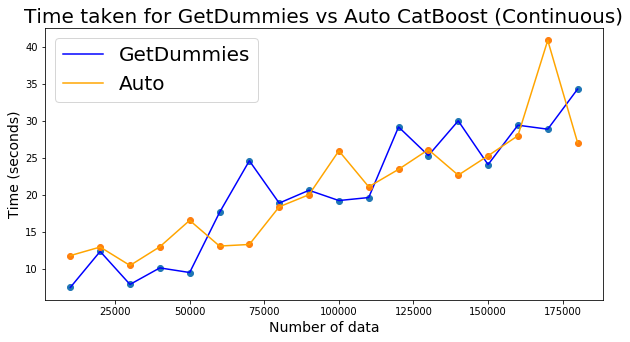

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_DCO, T_DCO, 'o')
ax.plot(N_DCO, T_DCO, 'blue', label = 'GetDummies')
ax.plot(N_ACO, T_ACO, 'o')
ax.plot(N_ACO, T_ACO, 'orange', label = 'Auto')
ax.set_title('Time taken for GetDummies vs Auto CatBoost (Continuous)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [14]:
T_ACO

[11.832312107086182,
 12.985090017318726,
 10.501464128494263,
 13.022104024887085,
 16.582520008087158,
 13.118649959564209,
 13.331664085388184,
 18.406954050064087,
 20.043365001678467,
 25.953584671020508,
 21.104858875274658,
 23.458249807357788,
 26.114973306655884,
 22.674687147140503,
 25.286484241485596,
 27.98960781097412,
 40.84534668922424,
 27.061327695846558]

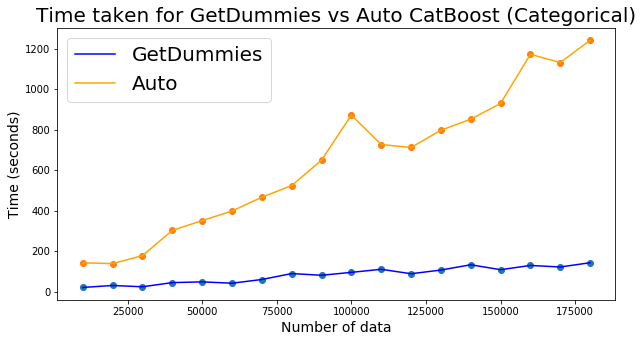

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_DCA, T_DCA, 'o')
ax.plot(N_DCA, T_DCA, 'blue', label = 'GetDummies')
ax.plot(N_ACA, T_ACA, 'o')
ax.plot(N_ACA, T_ACA, 'orange', label = 'Auto')
ax.set_title('Time taken for GetDummies vs Auto CatBoost (Categorical)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [16]:
T_ACA

[142.27282571792603,
 138.49478578567505,
 178.01026701927185,
 302.47490215301514,
 350.9883053302765,
 398.1485197544098,
 466.3825981616974,
 523.8505449295044,
 649.449206829071,
 871.8361840248108,
 726.6249902248383,
 712.0554268360138,
 797.1459889411926,
 851.6005229949951,
 929.696751832962,
 1171.898558139801,
 1131.688797235489,
 1241.0797612667084]

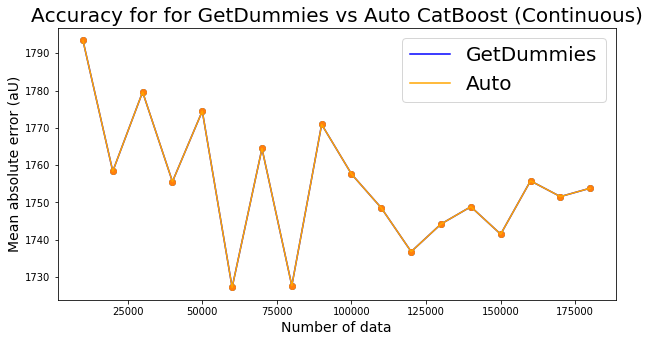

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_DCO, MAE_DCO, 'o')
ax.plot(N_DCO, MAE_DCO, 'blue', label = 'GetDummies')
ax.plot(N_ACO, MAE_ACO, 'o')
ax.plot(N_ACO, MAE_ACO, 'orange', label = 'Auto')
ax.set_title('Accuracy for for GetDummies vs Auto CatBoost (Continuous)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [15]:
MAE_ACO

[1793.4498511280888,
 1758.3492367610675,
 1779.6111004840766,
 1755.5806395050113,
 1774.4886886379666,
 1727.209940085353,
 1764.4626533725082,
 1727.6817715838192,
 1770.9161113882178,
 1757.6157229765265,
 1748.5161575895427,
 1736.804158759494,
 1744.2114823479633,
 1748.8508733890144,
 1741.4875925904148,
 1755.7830632610687,
 1751.5669757456758,
 1753.8135150541336]

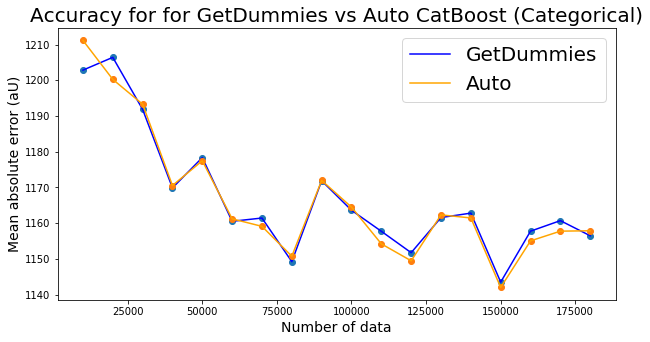

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_DCA, MAE_DCA, 'o')
ax.plot(N_DCA, MAE_DCA, 'blue', label = 'GetDummies')
ax.plot(N_ACA, MAE_ACA, 'o')
ax.plot(N_ACA, MAE_ACA, 'orange', label = 'Auto')
ax.set_title('Accuracy for for GetDummies vs Auto CatBoost (Categorical)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [17]:
MAE_ACA

[1211.16346656116,
 1200.239921342969,
 1193.3017971085446,
 1170.545223586372,
 1177.470247087185,
 1161.2252111126884,
 1159.1163298518136,
 1150.7634700528129,
 1171.961083129178,
 1164.5034863336687,
 1154.2204680118496,
 1149.4824634411887,
 1162.3307132173568,
 1161.4697673030075,
 1142.0245763248836,
 1155.0554825538288,
 1157.7755898669886,
 1157.885340364703]